In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [9]:
data =np.array([["Mateus_1", "'book', 'generation', 'jesus', 'christ', ',', 'son', 'david', ',', 'son', 'abraham.abraham', 'begat', 'isaac', ';', 'isaac', 'begat', 'jacob', ';', 'jacob', 'begat', 'judas', 'brothers', ';', 'judas', 'begat', 'phares', 'zara', 'thamar', ';', 'phares', 'begat', 'esrom', ';', 'esrom', 'begat', 'aram', ';', 'aram', 'begat', 'aminadab', ';', 'aminadab', 'begat', 'naasson', ';', 'naasson', 'begat', 'salmon', ';', 'salmon', 'begat', 'booz', 'rachab', ';', 'booz', 'begat', 'obed', 'ruth', ';', 'obed', 'begat', 'jesse', ';', 'jesse', 'begat', 'david', 'king', ';', 'david', 'king', 'begat', 'solomon', 'wife', 'urias', ';', 'solomon', 'begat', 'roboam', ';', 'roboam', 'begat', 'abia', ';', 'abia', 'begat', 'asa', ';', 'asa', 'begat', 'josaphat', ';', 'josaphat', 'begat', 'joram', ';', 'joram', 'begat', 'ozias', ';', 'ozias', 'begat', 'joatham', ';', 'joatham', 'begat', 'achaz', ';', 'achaz', 'begat', 'ezekias', ';', 'ezekias', 'begat', 'manasses', ';', 'manasses', 'begat', 'amon', ';', 'amon', 'begat', 'josias', ';', 'josias', 'begat', 'jechonias', 'brothers', ',', 'time', 'carried', 'away', 'babylon', ':', 'brought', 'babylon', ',', 'jechonias', 'begat', 'salathiel', ';', 'salathiel', 'begat', 'zorobabel', ';', 'zorobabel', 'begat', 'abiud', ';', 'abiud', 'begat', 'eliakim', ';', 'eliakim', 'begat', 'azor', ';', 'azor', 'begat', 'sadoc', ';', 'sadoc', 'begat', 'achim', ';', 'achim', 'begat', 'eliud', ';', 'eliud', 'begat', 'eleazar', ';', 'eleazar', 'begat', 'matthan', ';', 'matthan', 'begat', 'jacob', ';', 'jacob', 'begat', 'joseph', 'husband', 'mary', ',', 'born', 'jesus', ',', 'called', 'christ.so', 'generations', 'abraham', 'david', 'fourteen', 'generations', ';', 'david', 'carrying', 'away', 'babylon', 'fourteen', 'generations', ';', 'carrying', 'away', 'babylon', 'christ', 'fourteen', 'generations.now', 'birth', 'jesus', 'christ', 'wise', ':', 'mother', 'mary', 'espoused', 'joseph', ',', 'came', 'together', ',', 'found', 'child', 'holy', 'ghost.then', 'joseph', 'husband', ',', 'man', ',', 'willing', 'make', 'public', 'example', ',', 'minded', 'put', 'away', 'privately.but', 'thought', 'things', ',', 'behold', ',', 'angel', 'lord', 'appeared', 'dream', ',', 'saying', ',', 'joseph', ',', 'son', 'david', ',', 'fear', 'take', 'mary', 'wife', ':', 'conceived', 'holy', 'ghost.and', 'shall', 'bring', 'forth', 'son', ',', 'shall', 'call', 'name', 'jesus', ':', 'shall', 'save', 'people', 'sins.now', 'done', ',', 'might', 'fulfilled', 'spoken', 'lord', 'prophet', ',', 'saying', ',', 'behold', ',', 'virgin', 'shall', 'child', ',', 'shall', 'bring', 'forth', 'son', ',', 'shall', 'call', 'name', 'emmanuel', ',', 'interpreted', ',', 'god', 'us.then', 'joseph', 'raised', 'sleep', 'angel', 'lord', 'bidden', ',', 'took', 'wife', ':', 'knew', 'till', 'brought', 'forth', 'firstborn', 'son', ':', 'called', 'name', 'jesus', '.'"],
               ["Mateus_2", "'jesus', 'born', 'bethlehem', 'judaea', 'days', 'herod', 'king', ',', 'behold', ',', 'came', 'wise', 'men', 'east', 'jerusalem', ',', 'saying', ',', 'born', 'king', 'jews', '?', 'seen', 'star', 'east', ',', 'come', 'worship', 'him.when', 'herod', 'king', 'heard', 'things', ',', 'troubled', ',', 'jerusalem', 'him.and', 'gathered', 'chief', 'priests', 'scribes', 'people', 'together', ',', 'demanded', 'christ', 'born.and', 'said', ',', 'bethlehem', 'judaea', ':', 'thus', 'written', 'prophet', ',', 'bethlehem', ',', 'land', 'juda', ',', 'least', 'among', 'princes', 'juda', ':', 'shall', 'come', 'governor', ',', 'shall', 'rule', 'people', 'israel.then', 'herod', ',', 'privately', 'called', 'wise', 'men', ',', 'inquired', 'diligently', 'time', 'star', 'appeared.and', 'sent', 'bethlehem', ',', 'said', ',', 'go', 'search', 'diligently', 'young', 'child', ';', 'found', ',', 'bring', 'word', ',', 'may', 'come', 'worship', 'also.when', 'heard', 'king', ',', 'departed', ';', ',', 'see', ',', 'star', ',', 'saw', 'east', ',', 'went', ',', 'till', 'came', 'stood', 'young', 'child', 'was.when', 'saw', 'star', ',', 'rejoiced', 'exceeding', 'great', 'joy.and', 'come', 'house', ',', 'saw', 'young', 'child', 'mary', 'mother', ',', 'fell', ',', 'worshipped', ':', 'opened', 'treasures', ',', 'presented', 'gifts', ';', 'gold', ',', 'frankincense', 'myrrh.and', 'warned', 'god', 'dream', 'return', 'herod', ',', 'departed', 'country', 'another', 'way.and', 'departed', ',', 'behold', ',', 'angel', 'lord', 'appears', 'joseph', 'dream', ',', 'saying', ',', 'arise', ',', 'take', 'young', 'child', 'mother', ',', 'flee', 'egypt', ',', 'bring', 'word', ':', 'herod', 'seek', 'young', 'child', 'destroy', 'him.when', 'arose', ',', 'took', 'young', 'child', 'mother', 'night', ',', 'departed', 'egypt', ':', 'death', 'herod', ':', 'might', 'fulfilled', 'spoken', 'lord', 'prophet', ',', 'saying', ',', 'egypt', 'called', 'son.then', 'herod', ',', 'saw', 'mocked', 'wise', 'men', ',', 'exceeding', 'wroth', ',', 'sent', 'forth', ',', 'slew', 'children', 'bethlehem', ',', 'coasts', 'thereof', ',', 'two', 'years', 'old', ',', 'according', 'time', 'diligently', 'inquired', 'wise', 'men.then', 'fulfilled', 'spoken', 'jeremy', 'prophet', ',', 'saying', ',', 'rama', 'voice', 'heard', ',', 'lamentation', ',', 'weeping', ',', 'great', 'mourning', ',', 'rachel', 'weeping', 'children', ',', 'would', 'comforted', ',', 'not.but', 'herod', 'dead', ',', 'behold', ',', 'angel', 'lord', 'appears', 'dream', 'joseph', 'egypt', ',', 'saying', ',', 'arise', ',', 'take', 'young', 'child', 'mother', ',', 'go', 'land', 'israel', ':', 'dead', 'sought', 'young', 'child', ', 'life.and', 'arose', ',', 'took', 'young', 'child', 'mother', ',', 'came', 'land', 'israel.but', 'heard', 'archelaus', 'reign', 'judaea', 'room', 'father', 'herod', ',', 'afraid', 'go', 'thither', ':', 'notwithstanding', ',', 'warned', 'god', 'dream', ',', 'turned', 'aside', 'parts', 'galilee', ':', 'came', 'dwelled', 'city', 'called', 'nazareth', ':', 'might', 'fulfilled', 'spoken', 'prophets', ',', 'shall', 'called', 'nazarene', '.'"],
               ["Mateus_3", "'days', 'came', 'john', 'baptist', ',', 'preaching', 'wilderness', 'judaea', ',', 'saying', ',', 'repent', ':', 'kingdom', 'heaven', 'hand.for', 'spoken', 'prophet', 'esaias', ',', 'saying', ',', 'voice', 'one', 'crying', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'paths', 'straight.and', 'john', 'raiment', 'camel', ', 'hair', ',', 'leather', 'girdle', 'loins', ';', 'meat', 'locusts', 'wild', 'honey.then', 'went', 'jerusalem', ',', 'judaea', ',', 'region', 'round', 'jordan', ',', 'baptized', 'jordan', ',', 'confessing', 'sins.but', 'saw', 'many', 'pharisees', 'sadducees', 'come', 'baptism', ',', 'said', ',', 'generation', 'vipers', ',', 'warned', 'flee', 'wrath', 'come', '?', 'bring', 'forth', 'therefore', 'fruits', 'meet', 'repentance', ':', 'think', 'say', 'within', ',', 'abraham', 'father', ':', 'say', ',', 'god', 'able', 'stones', 'raise', 'children', 'abraham.and', 'also', 'ax', 'laid', 'root', 'trees', ':', 'therefore', 'every', 'tree', 'brings', 'forth', 'good', 'fruit', 'hewn', ',', 'cast', 'fire.i', 'indeed', 'baptize', 'water', 'repentance', '.', 'comes', 'mightier', ',', 'whose', 'shoes', 'worthy', 'bear', ':', 'shall', 'baptize', 'holy', 'ghost', ',', 'fire', ':', 'whose', 'fan', 'hand', ',', 'thoroughly', 'purge', 'floor', ',', 'gather', 'wheat', 'garner', ';', 'burn', 'chaff', 'unquenchable', 'fire.then', 'comes', 'jesus', 'galilee', 'jordan', 'john', ',', 'baptized', 'him.but', 'john', 'forbade', ',', 'saying', ',', 'need', 'baptized', ',', 'come', '?', 'jesus', 'answering', 'said', ',', 'suffer', ':', 'thus', 'becomes', 'us', 'fulfill', 'righteousness', '.', 'suffered', 'him.and', 'jesus', ',', 'baptized', ',', 'went', 'straightway', 'water', ':', ',', 'see', ',', 'heavens', 'opened', ',', 'saw', 'spirit', 'god', 'descending', 'like', 'dove', ',', 'lighting', ':', 'see', 'voice', 'heaven', ',', 'saying', ',', 'beloved', 'son', ',', 'well', 'pleased', '.'"],
               ["Mateus_4", "'jesus', 'led', 'spirit', 'wilderness', 'tempted', 'devil.and', 'fasted', 'forty', 'days', 'forty', 'nights', ',', 'afterward', 'hungered.and', 'tempter', 'came', ',', 'said', ',', 'son', 'god', ',', 'command', 'stones', 'made', 'bread.but', 'answered', 'said', ',', 'written', ',', 'man', 'shall', 'live', 'bread', 'alone', ',', 'every', 'word', 'proceeds', 'mouth', 'god.then', 'devil', 'takes', 'holy', 'city', ',', 'sets', 'pinnacle', 'temple', ',', 'said', ',', 'son', 'god', ',', 'cast', ':', 'written', ',', 'shall', 'give', 'angels', 'charge', 'concerning', ':', 'hands', 'shall', 'bear', ',', 'lest', 'time', 'dash', 'foot', 'stone.jesus', 'said', ',', 'written', ',', 'shall', 'tempt', 'lord', 'god.again', ',', 'devil', 'takes', 'exceeding', 'high', 'mountain', ',', 'shows', 'kingdoms', 'world', ',', 'glory', ';', 'said', ',', 'things', 'give', ',', 'fall', 'worship', 'me.then', 'said', 'jesus', ',', 'get', 'hence', ',', 'satan', ':', 'written', ',', 'shall', 'worship', 'lord', 'god', ',', 'shall', 'serve.then', 'devil', 'leaves', ',', ',', 'behold', ',', 'angels', 'came', 'ministered', 'him.now', 'jesus', 'heard', 'john', 'cast', 'prison', ',', 'departed', 'galilee', ';', 'leaving', 'nazareth', ',', 'came', 'dwelled', 'capernaum', ',', 'sea', 'coast', ',', 'borders', 'zabulon', 'nephthalim', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'land', 'zabulon', ',', 'land', 'nephthalim', ',', 'way', 'sea', ',', 'beyond', 'jordan', ',', 'galilee', 'gentiles', ';', 'people', 'sat', 'darkness', 'saw', 'great', 'light', ';', 'sat', 'region', 'shadow', 'death', 'light', 'sprung', 'up.from', 'time', 'jesus', 'began', 'preach', ',', 'say', ',', 'repent', ':', 'kingdom', 'heaven', 'hand.and', 'jesus', ',', 'walking', 'sea', 'galilee', ',', 'saw', 'two', 'brothers', ',', 'simon', 'called', 'peter', ',', 'andrew', 'brother', ',', 'casting', 'net', 'sea', ':', 'fishers.and', 'said', ',', 'follow', ',', 'make', 'fishers', 'men.and', 'straightway', 'left', 'nets', ',', 'followed', 'him.and', 'going', ',', 'saw', 'two', 'brothers', ',', 'james', 'son', 'zebedee', ',', 'john', 'brother', ',', 'ship', 'zebedee', 'father', ',', 'mending', 'nets', ';', 'called', 'them.and', 'immediately', 'left', 'ship', 'father', ',', 'followed', 'him.and', 'jesus', 'went', 'galilee', ',', 'teaching', 'synagogues', ',', 'preaching', 'gospel', 'kingdom', ',', 'healing', 'manner', 'sickness', 'manner', 'disease', 'among', 'people.and', 'fame', 'went', 'throughout', 'syria', ':', 'brought', 'sick', 'people', 'taken', 'divers', 'diseases', 'torments', ',', 'possessed', 'devils', ',', 'lunatic', ',', 'palsy', ';', 'healed', 'them.and', 'followed', 'great', 'multitudes', 'people', 'galilee', ',', 'decapolis', ',', 'jerusalem', ',', 'judaea', ',', 'beyond', 'jordan', '.'"],
               ["Mateus_5", "'seeing', 'multitudes', ',', 'went', 'mountain', ':', 'set', ',', 'disciples', 'came', ':', 'opened', 'mouth', ',', 'taught', ',', 'saying', ',', 'blessed', 'poor', 'spirit', ':', 'kingdom', 'heaven.blessed', 'mourn', ':', 'shall', 'comforted.blessed', 'meek', ':', 'shall', 'inherit', 'earth.blessed', 'hunger', 'thirst', 'righteousness', ':', 'shall', 'filled.blessed', 'merciful', ':', 'shall', 'obtain', 'mercy.blessed', 'pure', 'heart', ':', 'shall', 'see', 'god.blessed', 'peacemakers', ':', 'shall', 'called', 'children', 'god.blessed', 'persecuted', righteousness'sake, ':', 'kingdom', 'heaven.blessed', ',', 'men', 'shall', 'revile', ',', 'persecute', ',', 'shall', 'say', 'manner', 'evil', 'falsely', ',', 'sake.rejoice', ',', 'exceeding', 'glad', ':', 'great', 'reward', 'heaven', ':', 'persecuted', 'prophets', 'you.you', 'salt', 'earth', ':', 'salt', 'lost', 'flavor', ',', 'shall', 'salted', '?', 'thereafter', 'good', 'nothing', ',', 'cast', ',', 'trodden', 'foot', 'men.you', 'light', 'world', '.', 'city', 'set', 'hill', 'hid.neither', 'men', 'light', 'candle', ',', 'put', 'bushel', ',', 'candlestick', ';', 'gives', 'light', 'house.let', 'light', 'shine', 'men', ',', 'may', 'see', 'good', 'works', ',', 'glorify', 'father', 'heaven.think', 'come', 'destroy', 'law', ',', 'prophets', ':', 'come', 'destroy', ',', 'fulfill.for', 'truly', 'say', ',', 'till', 'heaven', 'earth', 'pass', ',', 'one', 'stroke', 'one', 'pronunciation', 'mark', 'shall', 'wise', 'pass', 'law', ',', 'till', 'fulfilled.whoever', 'therefore', 'shall', 'break', 'one', 'least', 'commandments', ',', 'shall', 'teach', 'men', ',', 'shall', 'called', 'least', 'kingdom', 'heaven', ':', 'whoever', 'shall', 'teach', ',', 'shall', 'called', 'great', 'kingdom', 'heaven.for', 'say', ',', 'except', 'righteousness', 'shall', 'exceed', 'righteousness', 'scribes', 'pharisees', ',', 'shall', 'case', 'enter', 'kingdom', 'heaven.you', 'heard', 'said', 'old', 'time', ',', 'shall', 'kill', ';', 'whoever', 'shall', 'kill', 'shall', 'danger', 'judgment', ':', 'say', ',', 'whoever', 'angry', 'brother', 'without', 'cause', 'shall', 'danger', 'judgment', ':', 'whoever', 'shall', 'say', 'brother', ',', 'raca', ',', 'shall', 'danger', 'council', ':', 'whoever', 'shall', 'say', ',', 'fool', ',', 'shall', 'danger', 'hell', 'fire.therefore', 'bring', 'gift', 'altar', ',', 'remember', 'brother', 'ought', ';', 'leave', 'gift', 'altar', ',', 'go', 'way', ';', 'first', 'reconciled', 'brother', ',', 'come', 'offer', 'gift.agree', 'adversary', 'quickly', ',', 'whiles', 'way', ';', 'lest', 'time', 'adversary', 'deliver', 'judge', ',', 'judge', 'deliver', 'officer', ',', 'cast', 'prison.truly', 'say', ',', 'shall', 'means', 'come', ',', 'till', 'paid', 'uttermost', 'farthing.you', 'heard', 'said', 'old', 'time', ',', 'shall', 'commit', 'adultery', ':', 'say', ',', 'whoever', 'looks', 'woman', 'lust', 'committed', 'adultery', 'already', 'heart.and', 'right', 'eye', 'offend', ',', 'pluck', ',', 'cast', ':', 'profitable', 'one', 'members', 'perish', ',', 'whole', 'body', 'cast', 'hell.and', 'right', 'hand', 'offend', ',', 'cut', ',', 'cast', ':', 'profitable', 'one', 'members', 'perish', ',', 'whole', 'body', 'cast', 'hell.it', 'said', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'let', 'give', 'writing', 'divorce', ':', 'say', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'saving', 'cause', 'fornication', ',', 'causes', 'commit', 'adultery', ':', 'whoever', 'shall', 'marry', 'divorced', 'commits', 'adultery.again', ',', 'heard', 'said', 'old', 'time', ',', 'shall', 'forswear', ',', 'shall', 'perform', 'lord', 'oaths', ':', 'say', ',', 'swear', ';', 'neither', 'heaven', ';', 'god', ', 'throne', ':', 'earth', ';', 'footstool', ':', 'neither', 'jerusalem', ';', 'city', 'great', 'king.neither', 'shall', 'swear', 'head', ',', 'make', 'one', 'hair', 'white', 'black.but', 'let', 'communication', ',', 'yes', ',', 'yes', ';', ',', ':', 'whatever', 'comes', 'evil.you', 'heard', 'said', ',', 'eye', 'eye', ',', 'tooth', 'tooth', ':', 'say', ',', 'resist', 'evil', ':', 'whoever', 'shall', 'smite', 'right', 'cheek', ',', 'turn', 'also.and', 'man', 'sue', 'law', ',', 'take', 'away', 'coat', ',', 'let', 'cloak', 'also.and', 'whoever', 'shall', 'compel', 'go', 'mile', ',', 'go', 'two.give', 'asks', ',', 'would', 'borrow', 'turn', 'away.you', 'heard', 'said', ',', 'shall', 'love', 'neighbor', ',', 'hate', 'enemy.but', 'say', ',', 'love', 'enemies', ',', 'bless', 'curse', ',', 'good', 'hate', ',', 'pray', 'spitefully', 'use', ',', 'persecute', ';', 'may', 'children', 'father', 'heaven', ':', 'makes', 'sun', 'rise', 'evil', 'good', ',', 'sends', 'rain', 'unjust.for', 'love', 'love', ',', 'reward', '?', 'even', 'publicans', '?', 'salute', 'brothers', ',', 'others', '?', 'even', 'publicans', '?', 'therefore', 'perfect', ',', 'even', 'father', 'heaven', 'perfect', '.'"],
               ["Mateus_6", "'take', 'heed', 'alms', 'men', ',', 'seen', ':', 'otherwise', 'reward', 'father', 'heaven.therefore', 'alms', ',', 'sound', 'trumpet', ',', 'hypocrites', 'synagogues', 'streets', ',', 'may', 'glory', 'men', '.', 'truly', 'say', ',', 'reward.but', 'alms', ',', 'let', 'left', 'hand', 'know', 'right', 'hand', ':', 'alms', 'may', 'secret', ':', 'father', 'sees', 'secret', 'shall', 'reward', 'openly.and', 'pray', ',', 'shall', 'hypocrites', ':', 'love', 'pray', 'standing', 'synagogues', 'corners', 'streets', ',', 'may', 'seen', 'men', '.', 'truly', 'say', ',', 'reward.but', ',', 'pray', ',', 'enter', 'closet', ',', 'shut', 'door', ',', 'pray', 'father', 'secret', ';', 'father', 'sees', 'secret', 'shall', 'reward', 'openly.but', 'pray', ',', 'use', 'vain', 'repetitions', ',', 'heathen', ':', 'think', 'shall', 'heard', 'much', 'speaking.be', 'therefore', 'like', ':', 'father', 'knows', 'things', 'need', ',', 'ask', 'him.after', 'manner', 'therefore', 'pray', ':', 'father', 'heaven', ',', 'hallowed', 'name.your', 'kingdom', 'come', ',', 'done', 'earth', ',', 'heaven.give', 'us', 'day', 'daily', 'bread.and', 'forgive', 'us', 'debts', ',', 'forgive', 'debtors.and', 'lead', 'us', 'temptation', ',', 'deliver', 'us', 'evil', ':', 'kingdom', ',', 'power', ',', 'glory', ',', 'ever', '.', 'amen.for', 'forgive', 'men', 'trespasses', ',', 'heavenly', 'father', 'also', 'forgive', ':', 'forgive', 'men', 'trespasses', ',', 'neither', 'father', 'forgive', 'trespasses.moreover', 'fast', ',', ',', 'hypocrites', ',', 'sad', 'countenance', ':', 'disfigure', 'faces', ',', 'may', 'appear', 'men', 'fast', '.', 'truly', 'say', ',', 'reward.but', ',', 'fast', ',', 'anoint', 'head', ',', 'wash', 'face', ';', 'appear', 'men', 'fast', ',', 'father', 'secret', ':', 'father', ',', 'sees', 'secret', ',', 'shall', 'reward', 'openly.lay', 'treasures', 'earth', ',', 'moth', 'rust', 'corrupt', ',', 'thieves', 'break', 'steal', ':', 'lay', 'treasures', 'heaven', ',', 'neither', 'moth', 'rust', 'corrupt', ',', 'thieves', 'break', 'steal', ':', 'treasure', ',', 'heart', 'also.the', 'light', 'body', 'eye', ':', 'therefore', 'eye', 'single', ',', 'whole', 'body', 'shall', 'full', 'light.but', 'eye', 'evil', ',', 'whole', 'body', 'shall', 'full', 'darkness', '.', 'therefore', 'light', 'darkness', ',', 'great', 'darkness', '!', 'man', 'serve', 'two', 'masters', ':', 'either', 'hate', 'one', ',', 'love', ';', 'else', 'hold', 'one', ',', 'despise', '.', 'serve', 'god', 'mammon.therefore', 'say', ',', 'take', 'thought', 'life', ',', 'shall', 'eat', ',', 'shall', 'drink', ';', 'yet', 'body', ',', 'shall', 'put', '.', 'life', 'meat', ',', 'body', 'raiment', '?', 'behold', 'fowls', 'air', ':', 'sow', ',', 'neither', 'reap', ',', 'gather', 'barns', ';', 'yet', 'heavenly', 'father', 'feeds', '.', 'much', 'better', '?', 'taking', 'thought', 'add', 'one', 'cubit', 'stature', '?', 'take', 'thought', 'raiment', '?', 'consider', 'lilies', 'field', ',', 'grow', ';', 'toil', ',', 'neither', 'spin', ':', 'yet', 'say', ',', 'even', 'solomon', 'glory', 'arrayed', 'like', 'one', 'these.why', ',', 'god', 'clothe', 'grass', 'field', ',', 'day', ',', 'morrow', 'cast', 'oven', ',', 'shall', 'much', 'clothe', ',', 'little', 'faith', '?', 'therefore', 'take', 'thought', ',', 'saying', ',', 'shall', 'eat', '?', ',', 'shall', 'drink', '?', ',', 'wherewithal', 'shall', 'clothed', '?', '(', 'things', 'gentiles', 'seek', ':', ')', 'heavenly', 'father', 'knows', 'need', 'things.but', 'seek', 'first', 'kingdom', 'god', ',', 'righteousness', ';', 'things', 'shall', 'added', 'you.take', 'therefore', 'thought', 'morrow', ':', 'morrow', 'shall', 'take', 'thought', 'things', '.', 'sufficient', 'day', 'evil', 'thereof', '.'"],
               ["Mateus_7", "'judge', ',', 'judged.for', 'judgment', 'judge', ',', 'shall', 'judged', ':', 'measure', 'mete', ',', 'shall', 'measured', 'again.and', 'behold', 'mote', 'brother', ', 'eye', ',', 'consider', 'beam', 'eye', '?', 'say', 'brother', ',', 'let', 'pull', 'mote', 'eye', ';', ',', 'behold', ',', 'beam', 'eye', '?', 'hypocrite', ',', 'first', 'cast', 'beam', 'eye', ';', 'shall', 'see', 'clearly', 'cast', 'mote', 'brother', ', 'eye.give', 'holy', 'dogs', ',', 'neither', 'cast', 'pearls', 'swine', ',', 'lest', 'trample', 'feet', ',', 'turn', 'rend', 'you.ask', ',', 'shall', 'given', ';', 'seek', ',', 'shall', 'find', ';', 'knock', ',', 'shall', 'opened', ':', 'every', 'one', 'asks', 'receives', ';', 'seeks', 'finds', ';', 'knocks', 'shall', 'opened.or', 'man', ',', 'son', 'ask', 'bread', ',', 'give', 'stone', '?', 'ask', 'fish', ',', 'give', 'serpent', '?', ',', 'evil', ',', 'know', 'give', 'good', 'gifts', 'children', ',', 'much', 'shall', 'father', 'heaven', 'give', 'good', 'things', 'ask', '?', 'therefore', 'things', 'whatever', 'would', 'men', ',', 'even', ':', 'law', 'prophets.enter', 'strait', 'gate', ':', 'wide', 'gate', ',', 'broad', 'way', ',', 'leads', 'destruction', ',', 'many', 'go', 'thereat', ':', 'strait', 'gate', ',', 'narrow', 'way', ',', 'leads', 'life', ',', 'find', 'it.beware', 'false', 'prophets', ',', 'come', 'sheep', ', 'clothing', ',', 'inwardly', 'ravening', 'wolves.you', 'shall', 'know', 'fruits', '.', 'men', 'gather', 'grapes', 'thorns', ',', 'figs', 'thistles', '?', 'even', 'every', 'good', 'tree', 'brings', 'forth', 'good', 'fruit', ';', 'corrupt', 'tree', 'brings', 'forth', 'evil', 'fruit.a', 'good', 'tree', 'bring', 'forth', 'evil', 'fruit', ',', 'neither', 'corrupt', 'tree', 'bring', 'forth', 'good', 'fruit.every', 'tree', 'brings', 'forth', 'good', 'fruit', 'hewn', ',', 'cast', 'fire.why', 'fruits', 'shall', 'know', 'them.not', 'every', 'one', 'said', ',', 'lord', ',', 'lord', ',', 'shall', 'enter', 'kingdom', 'heaven', ';', 'father', 'heaven.many', 'say', 'day', ',', 'lord', ',', 'lord', ',', 'prophesied', 'name', '?', 'name', 'cast', 'devils', '?', 'name', 'done', 'many', 'wonderful', 'works', '?', 'profess', ',', 'never', 'knew', ':', 'depart', ',', 'work', 'iniquity.therefore', 'whoever', 'hears', 'sayings', 'mine', ',', ',', 'liken', 'wise', 'man', ',', 'built', 'house', 'rock', ':', 'rain', 'descended', ',', 'floods', 'came', ',', 'winds', 'blew', ',', 'beat', 'house', ';', 'fell', ':', 'founded', 'rock.and', 'every', 'one', 'hears', 'sayings', 'mine', ',', ',', 'shall', 'likened', 'foolish', 'man', ',', 'built', 'house', 'sand', ':', 'rain', 'descended', ',', 'floods', 'came', ',', 'winds', 'blew', ',', 'beat', 'house', ';', 'fell', ':', 'great', 'fall', 'it.and', 'came', 'pass', ',', 'jesus', 'ended', 'sayings', ',', 'people', 'astonished', 'doctrine', ':', 'taught', 'one', 'authority', ',', 'scribes', '.'"],
               ["Mateus_8", "'come', 'mountain', ',', 'great', 'multitudes', 'followed', 'him.and', ',', 'behold', ',', 'came', 'leper', 'worshipped', ',', 'saying', ',', 'lord', ',', ',', 'make', 'clean.and', 'jesus', 'put', 'forth', 'hand', ',', 'touched', ',', 'saying', ',', ';', 'clean', '.', 'immediately', 'leprosy', 'cleansed.and', 'jesus', 'said', ',', 'see', 'tell', 'man', ';', 'go', 'way', ',', 'show', 'priest', ',', 'offer', 'gift', 'moses', 'commanded', ',', 'testimony', 'them.and', 'jesus', 'entered', 'capernaum', ',', 'came', 'centurion', ',', 'beseeching', ',', 'saying', ',', 'lord', ',', 'servant', 'lies', 'home', 'sick', 'palsy', ',', 'grievously', 'tormented.and', 'jesus', 'said', ',', 'come', 'heal', 'him.the', 'centurion', 'answered', 'said', ',', 'lord', ',', 'worthy', 'come', 'roof', ':', 'speak', 'word', ',', 'servant', 'shall', 'healed.for', 'man', 'authority', ',', 'soldiers', ':', 'say', 'man', ',', 'go', ',', 'goes', ';', 'another', ',', 'come', ',', 'comes', ';', 'servant', ',', ',', 'it.when', 'jesus', 'heard', ',', 'marveled', ',', 'said', 'followed', ',', 'truly', 'say', ',', 'found', 'great', 'faith', ',', ',', 'israel.and', 'say', ',', 'many', 'shall', 'come', 'east', 'west', ',', 'shall', 'sit', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'kingdom', 'heaven.but', 'children', 'kingdom', 'shall', 'cast', 'outer', 'darkness', ':', 'shall', 'weeping', 'gnashing', 'teeth.and', 'jesus', 'said', 'centurion', ',', 'go', 'way', ';', 'believed', ',', 'done', '.', 'servant', 'healed', 'selfsame', 'hour.and', 'jesus', 'come', 'peter', ', 'house', ',', 'saw', 'wife', ', 'mother', 'laid', ',', 'sick', 'fever.and', 'touched', 'hand', ',', 'fever', 'left', ':', 'arose', ',', 'ministered', 'them.when', 'even', 'come', ',', 'brought', 'many', 'possessed', 'devils', ':', 'cast', 'spirits', 'word', ',', 'healed', 'sick', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'took', 'infirmities', ',', 'bore', 'sicknesses.now', 'jesus', 'saw', 'great', 'multitudes', ',', 'gave', 'commandment', 'depart', 'side.and', 'certain', 'scribe', 'came', ',', 'said', ',', 'master', ',', 'follow', 'wherever', 'go.and', 'jesus', 'said', ',', 'foxes', 'holes', ',', 'birds', 'air', 'nests', ';', 'son', 'man', 'lay', 'head.and', 'another', 'disciples', 'said', ',', 'lord', ',', 'suffer', 'first', 'go', 'bury', 'father.but', 'jesus', 'said', ',', 'follow', ';', 'let', 'dead', 'bury', 'dead.and', 'entered', 'ship', ',', 'disciples', 'followed', 'him.and', ',', 'behold', ',', 'arose', 'great', 'tempest', 'sea', ',', 'ship', 'covered', 'waves', ':', 'asleep.and', 'disciples', 'came', ',', 'awoke', ',', 'saying', ',', 'lord', ',', 'save', 'us', ':', 'perish.and', 'said', ',', 'fearful', ',', 'little', 'faith', '?', 'arose', ',', 'rebuked', 'winds', 'sea', ';', 'great', 'calm.but', 'men', 'marveled', ',', 'saying', ',', 'manner', 'man', ',', 'even', 'winds', 'sea', 'obey', '!', 'come', 'side', 'country', 'gergesenes', ',', 'met', 'two', 'possessed', 'devils', ',', 'coming', 'tombs', ',', 'exceeding', 'fierce', ',', 'man', 'might', 'pass', 'way.and', ',', 'behold', ',', 'cried', ',', 'saying', ',', ',', 'jesus', ',', 'son', 'god', '?', 'come', 'torment', 'us', 'time', '?', 'good', 'way', 'herd', 'many', 'swine', 'feeding.so', 'devils', 'sought', ',', 'saying', ',', 'cast', 'us', ',', 'suffer', 'us', 'go', 'away', 'herd', 'swine.and', 'said', ',', 'go', '.', 'come', ',', 'went', 'herd', 'swine', ':', ',', 'behold', ',', 'whole', 'herd', 'swine', 'ran', 'violently', 'steep', 'place', 'sea', ',', 'perished', 'waters.and', 'kept', 'fled', ',', 'went', 'ways', 'city', ',', 'told', 'every', 'thing', ',', 'befallen', 'possessed', 'devils.and', ',', 'behold', ',', 'whole', 'city', 'came', 'meet', 'jesus', ':', 'saw', ',', 'sought', 'would', 'depart', 'coasts', '.'"],
               ["Mateus_9", "'entered', 'ship', ',', 'passed', ',', 'came', 'city.and', ',', 'behold', ',', 'brought', 'man', 'sick', 'palsy', ',', 'lying', 'bed', ':', 'jesus', 'seeing', 'faith', 'said', 'sick', 'palsy', ';', 'son', ',', 'good', 'cheer', ';', 'sins', 'forgiven', 'you.and', ',', 'behold', ',', 'certain', 'scribes', 'said', 'within', ',', 'man', 'blasphemes.and', 'jesus', 'knowing', 'thoughts', 'said', ',', 'think', 'evil', 'hearts', '?', 'whether', 'easier', ',', 'say', ',', 'sins', 'forgiven', ';', 'say', ',', 'arise', ',', 'walk', '?', 'may', 'know', 'son', 'man', 'power', 'earth', 'forgive', 'sins', ',', '(', 'said', 'sick', 'palsy', ',', ')', 'arise', ',', 'take', 'bed', ',', 'go', 'house.and', 'arose', ',', 'departed', 'house.but', 'multitudes', 'saw', ',', 'marveled', ',', 'glorified', 'god', ',', 'given', 'power', 'men.and', 'jesus', 'passed', 'forth', ',', 'saw', 'man', ',', 'named', 'matthew', ',', 'sitting', 'receipt', 'custom', ':', 'said', ',', 'follow', '.', 'arose', ',', 'followed', 'him.and', 'came', 'pass', ',', 'jesus', 'sat', 'meat', 'house', ',', 'behold', ',', 'many', 'publicans', 'sinners', 'came', 'sat', 'disciples.and', 'pharisees', 'saw', ',', 'said', 'disciples', ',', 'eats', 'master', 'publicans', 'sinners', '?', 'jesus', 'heard', ',', 'said', ',', 'whole', 'need', 'physician', ',', 'sick.but', 'go', 'learn', 'means', ',', 'mercy', ',', 'sacrifice', ':', 'come', 'call', 'righteous', ',', 'sinners', 'repentance.then', 'came', 'disciples', 'john', ',', 'saying', ',', 'pharisees', 'fast', 'oft', ',', 'disciples', 'fast', '?', 'jesus', 'said', ',', 'children', 'bridal', 'chamber', 'mourn', ',', 'long', 'bridegroom', '?', 'days', 'come', ',', 'bridegroom', 'shall', 'taken', ',', 'shall', 'fast.no', 'man', 'puts', 'piece', 'new', 'cloth', 'old', 'garment', ',', 'put', 'fill', 'takes', 'garment', ',', 'rent', 'made', 'worse.neither', 'men', 'put', 'new', 'wine', 'old', 'bottles', ':', 'else', 'bottles', 'break', ',', 'wine', 'runs', ',', 'bottles', 'perish', ':', 'put', 'new', 'wine', 'new', 'bottles', ',', 'preserved.while', 'spoke', 'things', ',', 'behold', ',', 'came', 'certain', 'ruler', ',', 'worshipped', ',', 'saying', ',', 'daughter', 'even', 'dead', ':', 'come', 'lay', 'hand', ',', 'shall', 'live.and', 'jesus', 'arose', ',', 'followed', ',', 'disciples.and', ',', 'behold', ',', 'woman', ',', 'diseased', 'issue', 'blood', 'twelve', 'years', ',', 'came', 'behind', ',', 'touched', 'hem', 'garment', ':', 'said', 'within', ',', 'may', 'touch', 'garment', ',', 'shall', 'whole.but', 'jesus', 'turned', ',', 'saw', ',', 'said', ',', 'daughter', ',', 'good', 'comfort', ';', 'faith', 'made', 'whole', '.', 'woman', 'made', 'whole', 'hour.and', 'jesus', 'came', 'ruler', ', 'house', ',', 'saw', 'minstrels', 'people', 'making', 'noise', ',', 'said', ',', 'give', 'place', ':', 'maid', 'dead', ',', 'sleeps', '.', 'laughed', 'scorn.but', 'people', 'put', 'forth', ',', 'went', ',', 'took', 'hand', ',', 'maid', 'arose.and', 'fame', 'hereof', 'went', 'abroad', 'land.and', 'jesus', 'departed', ',', 'two', 'blind', 'men', 'followed', ',', 'crying', ',', 'saying', ',', 'son', 'david', ',', 'mercy', 'us.and', 'come', 'house', ',', 'blind', 'men', 'came', ':', 'jesus', 'said', ',', 'believe', 'able', '?', 'said', ',', 'yes', ',', 'lord.then', 'touched', 'eyes', ',', 'saying', ',', 'according', 'faith', 'you.and', 'eyes', 'opened', ';', 'jesus', 'straightly', 'charged', ',', 'saying', ',', 'see', 'man', 'know', 'it.but', ',', 'departed', ',', 'spread', 'abroad', 'fame', 'country.as', 'went', ',', 'behold', ',', 'brought', 'dumb', 'man', 'possessed', 'devil.and', 'devil', 'cast', ',', 'dumb', 'spoke', ':', 'multitudes', 'marveled', ',', 'saying', ',', 'never', 'seen', 'israel.but', 'pharisees', 'said', ',', 'casts', 'devils', 'prince', 'devils.and', 'jesus', 'went', 'cities', 'villages', ',', 'teaching', 'synagogues', ',', 'preaching', 'gospel', 'kingdom', ',', 'healing', 'every', 'sickness', 'every', 'disease', 'among', 'people.but', 'saw', 'multitudes', ',', 'moved', 'compassion', ',', 'fainted', ',', 'scattered', 'abroad', ',', 'sheep', 'shepherd.then', 'said', 'disciples', ',', 'harvest', 'truly', 'plenteous', ',', 'laborers', ';', 'pray', 'therefore', 'lord', 'harvest', ',', 'send', 'forth', 'laborers', 'harvest', '.'"],
               ["Mateus_10", "'called', 'twelve', 'disciples', ',', 'gave', 'power', 'unclean', 'spirits', ',', 'cast', ',', 'heal', 'manner', 'sickness', 'manner', 'disease.now', 'names', 'twelve', 'apostles', ';', 'first', ',', 'simon', ',', 'called', 'peter', ',', 'andrew', 'brother', ';', 'james', 'son', 'zebedee', ',', 'john', 'brother', ';', 'philip', ',', 'bartholomew', ';', 'thomas', ',', 'matthew', 'publican', ';', 'james', 'son', 'alphaeus', ',', 'lebbaeus', ',', 'whose', 'surname', 'thaddaeus', ';', 'simon', 'canaanite', ',', 'judas', 'iscariot', ',', 'also', 'betrayed', 'him.these', 'twelve', 'jesus', 'sent', 'forth', ',', 'commanded', ',', 'saying', ',', 'go', 'way', 'gentiles', ',', 'city', 'samaritans', 'enter', ':', 'go', 'rather', 'lost', 'sheep', 'house', 'israel.and', 'go', ',', 'preach', ',', 'saying', ',', 'kingdom', 'heaven', 'hand.heal', 'sick', ',', 'cleanse', 'lepers', ',', 'raise', 'dead', ',', 'cast', 'devils', ':', 'freely', 'received', ',', 'freely', 'give.provide', 'neither', 'gold', ',', 'silver', ',', 'brass', 'purses', ',', 'money', 'journey', ',', 'neither', 'two', 'coats', ',', 'neither', 'shoes', ',', 'yet', 'staves', ':', 'workman', 'worthy', 'meat.and', 'whatever', 'city', 'town', 'shall', 'enter', ',', 'inquire', 'worthy', ';', 'abide', 'till', 'go', 'there.and', 'come', 'house', ',', 'salute', 'it.and', 'house', 'worthy', ',', 'let', 'peace', 'come', ':', 'worthy', ',', 'let', 'peace', 'return', 'you.and', 'whoever', 'shall', 'receive', ',', 'hear', 'words', ',', 'depart', 'house', 'city', ',', 'shake', 'dust', 'feet.truly', 'say', ',', 'shall', 'tolerable', 'land', 'sodom', 'gomorrha', 'day', 'judgment', ',', 'city.behold', ',', 'send', 'forth', 'sheep', 'middle', 'wolves', ':', 'therefore', 'wise', 'serpents', ',', 'harmless', 'doves.but', 'beware', 'men', ':', 'deliver', 'councils', ',', 'whip', 'synagogues', ';', 'shall', 'brought', 'governors', 'kings', 'sake', ',', 'testimony', 'gentiles.but', 'deliver', ',', 'take', 'thought', 'shall', 'speak', ':', 'shall', 'given', 'hour', 'shall', 'speak.for', 'speak', ',', 'spirit', 'father', 'speaks', 'you.and', 'brother', 'shall', 'deliver', 'brother', 'death', ',', 'father', 'child', ':', 'children', 'shall', 'rise', 'parents', ',', 'cause', 'put', 'death.and', 'shall', 'hated', 'men', 'name', ', 'sake', ':', 'endures', 'end', 'shall', 'saved.but', 'persecute', 'city', ',', 'flee', 'another', ':', 'truly', 'say', ',', 'shall', 'gone', 'cities', 'israel', ',', 'till', 'son', 'man', 'come.the', 'disciple', 'master', ',', 'servant', 'lord.it', 'enough', 'disciple', 'master', ',', 'servant', 'lord', '.', 'called', 'master', 'house', 'beelzebub', ',', 'much', 'shall', 'call', 'household', '?', 'fear', 'therefore', ':', 'nothing', 'covered', ',', 'shall', 'revealed', ';', 'hid', ',', 'shall', 'known.what', 'tell', 'darkness', ',', 'speak', 'light', ':', 'hear', 'ear', ',', 'preach', 'housetops.and', 'fear', 'kill', 'body', ',', 'able', 'kill', 'soul', ':', 'rather', 'fear', 'able', 'destroy', 'soul', 'body', 'hell.are', 'two', 'sparrows', 'sold', 'farthing', '?', 'one', 'shall', 'fall', 'ground', 'without', 'father.but', 'hairs', 'head', 'numbered.fear', 'therefore', ',', 'value', 'many', 'sparrows.whoever', 'therefore', 'shall', 'confess', 'men', ',', 'confess', 'also', 'father', 'heaven.but', 'whoever', 'shall', 'deny', 'men', ',', 'also', 'deny', 'father', 'heaven.think', 'come', 'send', 'peace', 'earth', ':', 'came', 'send', 'peace', ',', 'sword.for', 'come', 'set', 'man', 'variance', 'father', ',', 'daughter', 'mother', ',', 'daughter', 'law', 'mother', 'law.and', 'man', ', 'foes', 'shall', 'household.he', 'loves', 'father', 'mother', 'worthy', ':', 'loves', 'son', 'daughter', 'worthy', 'me.and', 'takes', 'cross', ',', 'follows', ',', 'worthy', 'me.he', 'finds', 'life', 'shall', 'lose', ':', 'loses', 'life', 'sake', 'shall', 'find', 'it.he', 'receives', 'receives', ',', 'receives', 'receives', 'sent', 'me.he', 'receives', 'prophet', 'name', 'prophet', 'shall', 'receive', 'prophet', ', 'reward', ';', 'receives', 'righteous', 'man', 'name', 'righteous', 'man', 'shall', 'receive', 'righteous', 'man', ', 'reward.and', 'whoever', 'shall', 'give', 'drink', 'one', 'little', 'ones', 'cup', 'cold', 'water', 'name', 'disciple', ',', 'truly', 'say', ',', 'shall', 'wise', 'lose', 'reward', '.'"],
               ["Mateus_11", "'came', 'pass', ',', 'jesus', 'made', 'end', 'commanding', 'twelve', 'disciples', ',', 'departed', 'teach', 'preach', 'cities.now', 'john', 'heard', 'prison', 'works', 'christ', ',', 'sent', 'two', 'disciples', ',', 'said', ',', 'come', ',', 'look', 'another', '?', 'jesus', 'answered', 'said', ',', 'go', 'show', 'john', 'things', 'hear', 'see', ':', 'blind', 'receive', 'sight', ',', 'lame', 'walk', ',', 'lepers', 'cleansed', ',', 'deaf', 'hear', ',', 'dead', 'raised', ',', 'poor', 'gospel', 'preached', 'them.and', 'blessed', ',', 'whoever', 'shall', 'offended', 'me.and', 'departed', ',', 'jesus', 'began', 'say', 'multitudes', 'concerning', 'john', ',', 'went', 'wilderness', 'see', '?', 'reed', 'shaken', 'wind', '?', 'went', 'see', '?', 'man', 'clothed', 'soft', 'raiment', '?', 'behold', ',', 'wear', 'soft', 'clothing', kings'houses.but, 'went', 'see', '?', 'prophet', '?', 'yes', ',', 'say', ',', 'prophet.for', ',', 'written', ',', 'behold', ',', 'send', 'messenger', 'face', ',', 'shall', 'prepare', 'way', 'you.truly', 'say', ',', 'among', 'born', 'women', 'risen', 'greater', 'john', 'baptist', ':', 'notwithstanding', 'least', 'kingdom', 'heaven', 'greater', 'he.and', 'days', 'john', 'baptist', 'kingdom', 'heaven', 'suffers', 'violence', ',', 'violent', 'take', 'force.for', 'prophets', 'law', 'prophesied', 'john.and', 'receive', ',', 'elias', ',', 'come.he', 'ears', 'hear', ',', 'let', 'hear.but', 'whereunto', 'shall', 'liken', 'generation', '?', 'like', 'children', 'sitting', 'markets', ',', 'calling', 'fellows', ',', 'saying', ',', 'piped', ',', 'danced', ';', 'mourned', ',', 'lamented.for', 'john', 'came', 'neither', 'eating', 'drinking', ',', 'say', ',', 'devil.the', 'son', 'man', 'came', 'eating', 'drinking', ',', 'say', ',', 'behold', 'man', 'gluttonous', ',', 'drunkard', ',', 'friend', 'publicans', 'sinners', '.', 'wisdom', 'justified', 'children.then', 'began', 'upbraid', 'cities', 'wherein', 'mighty', 'works', 'done', ',', 'repented', ':', 'woe', ',', 'chorazin', '!', 'woe', ',', 'bethsaida', '!', 'mighty', 'works', ',', 'done', ',', 'done', 'tyre', 'sidon', ',', 'would', 'repented', 'long', 'ago', 'sackcloth', 'ashes.but', 'say', ',', 'shall', 'tolerable', 'tyre', 'sidon', 'day', 'judgment', ',', 'you.and', ',', 'capernaum', ',', 'exalted', 'heaven', ',', 'shall', 'brought', 'hell', ':', 'mighty', 'works', ',', 'done', ',', 'done', 'sodom', ',', 'would', 'remained', 'day.but', 'say', ',', 'shall', 'tolerable', 'land', 'sodom', 'day', 'judgment', ',', 'you.at', 'time', 'jesus', 'answered', 'said', ',', 'thank', ',', 'father', ',', 'lord', 'heaven', 'earth', ',', 'hid', 'things', 'wise', 'prudent', ',', 'revealed', 'babes.even', ',', 'father', ':', 'seemed', 'good', 'sight.all', 'things', 'delivered', 'father', ':', 'man', 'knows', 'son', ',', 'father', ';', 'neither', 'knows', 'man', 'father', ',', 'save', 'son', ',', 'whomsoever', 'son', 'reveal', 'him.come', ',', 'labor', 'heavy', 'laden', ',', 'give', 'rest.take', 'yoke', ',', 'learn', ';', 'meek', 'lowly', 'heart', ':', 'shall', 'find', 'rest', 'souls.for', 'yoke', 'easy', ',', 'burden', 'light', '.'"],
               ["Mateus_12", "'time', 'jesus', 'went', 'sabbath', 'day', 'corn', ';', 'disciples', 'hungered', ',', 'began', 'pluck', 'ears', 'corn', 'eat.but', 'pharisees', 'saw', ',', 'said', ',', 'behold', ',', 'disciples', 'lawful', 'sabbath', 'day.but', 'said', ',', 'read', 'david', ',', 'hungered', ',', ';', 'entered', 'house', 'god', ',', 'eat', 'show', 'bread', ',', 'lawful', 'eat', ',', 'neither', ',', 'priests', '?', 'read', 'law', ',', 'sabbath', 'days', 'priests', 'temple', 'profane', 'sabbath', ',', 'blameless', '?', 'say', ',', 'place', 'one', 'greater', 'temple.but', 'known', 'means', ',', 'mercy', ',', 'sacrifice', ',', 'would', 'condemned', 'guiltless.for', 'son', 'man', 'lord', 'even', 'sabbath', 'day.and', 'departed', ',', 'went', 'synagogue', ':', ',', 'behold', ',', 'man', 'hand', 'withered', '.', 'asked', ',', 'saying', ',', 'lawful', 'heal', 'sabbath', 'days', '?', 'might', 'accuse', 'him.and', 'said', ',', 'man', 'shall', 'among', ',', 'shall', 'one', 'sheep', ',', 'fall', 'pit', 'sabbath', 'day', ',', 'lay', 'hold', ',', 'lift', '?', 'much', 'man', 'better', 'sheep', '?', 'lawful', 'well', 'sabbath', 'days.then', 'said', 'man', ',', 'stretch', 'forth', 'hand', '.', 'stretched', 'forth', ';', 'restored', 'whole', ',', 'like', 'other.then', 'pharisees', 'went', ',', 'held', 'council', ',', 'might', 'destroy', 'him.but', 'jesus', 'knew', ',', 'withdrew', ':', 'great', 'multitudes', 'followed', ',', 'healed', ';', 'charged', 'make', 'known', ':', 'might', 'fulfilled', 'spoken', 'esaias', 'prophet', ',', 'saying', ',', 'behold', 'servant', ',', 'chosen', ';', 'beloved', ',', 'soul', 'well', 'pleased', ':', 'put', 'spirit', ',', 'shall', 'show', 'judgment', 'gentiles.he', 'shall', 'strive', ',', 'cry', ';', 'neither', 'shall', 'man', 'hear', 'voice', 'streets.a', 'bruised', 'reed', 'shall', 'break', ',', 'smoking', 'flax', 'shall', 'quench', ',', 'till', 'send', 'forth', 'judgment', 'victory.and', 'name', 'shall', 'gentiles', 'trust.then', 'brought', 'one', 'possessed', 'devil', ',', 'blind', ',', 'dumb', ':', 'healed', ',', 'blind', 'dumb', 'spoke', 'saw.and', 'people', 'amazed', ',', 'said', ',', 'son', 'david', '?', 'pharisees', 'heard', ',', 'said', ',', 'fellow', 'cast', 'devils', ',', 'beelzebub', 'prince', 'devils.and', 'jesus', 'knew', 'thoughts', ',', 'said', ',', 'every', 'kingdom', 'divided', 'brought', 'desolation', ';', 'every', 'city', 'house', 'divided', 'shall', 'stand', ':', 'satan', 'cast', 'satan', ',', 'divided', ';', 'shall', 'kingdom', 'stand', '?', 'beelzebub', 'cast', 'devils', ',', 'children', 'cast', '?', 'therefore', 'shall', 'judges.but', 'cast', 'devils', 'spirit', 'god', ',', 'kingdom', 'god', 'come', 'you.or', 'else', 'one', 'enter', 'strong', 'man', ', 'house', ',', 'spoil', 'goods', ',', 'except', 'first', 'bind', 'strong', 'man', '?', 'spoil', 'house.he', ';', 'gathers', 'scatters', 'abroad.why', 'say', ',', 'manner', 'sin', 'blasphemy', 'shall', 'forgiven', 'men', ':', 'blasphemy', 'holy', 'ghost', 'shall', 'forgiven', 'men.and', 'whoever', 'speaks', 'word', 'son', 'man', ',', 'shall', 'forgiven', ':', 'whoever', 'speaks', 'holy', 'ghost', ',', 'shall', 'forgiven', ',', 'neither', 'world', ',', 'neither', 'world', 'come.either', 'make', 'tree', 'good', ',', 'fruit', 'good', ';', 'else', 'make', 'tree', 'corrupt', ',', 'fruit', 'corrupt', ':', 'tree', 'known', 'fruit.o', 'generation', 'vipers', ',', ',', 'evil', ',', 'speak', 'good', 'things', '?', 'abundance', 'heart', 'mouth', 'speaks.a', 'good', 'man', 'good', 'treasure', 'heart', 'brings', 'forth', 'good', 'things', ':', 'evil', 'man', 'evil', 'treasure', 'brings', 'forth', 'evil', 'things.but', 'say', ',', 'every', 'idle', 'word', 'men', 'shall', 'speak', ',', 'shall', 'give', 'account', 'thereof', 'day', 'judgment.for', 'words', 'shall', 'justified', ',', 'words', 'shall', 'condemned.then', 'certain', 'scribes', 'pharisees', 'answered', ',', 'saying', ',', 'master', ',', 'would', 'see', 'sign', 'you.but', 'answered', 'said', ',', 'evil', 'adulterous', 'generation', 'seeks', 'sign', ';', 'shall', 'sign', 'given', ',', 'sign', 'prophet', 'jonas', ':', 'jonas', 'three', 'days', 'three', 'nights', 'whale', ', 'belly', ';', 'shall', 'son', 'man', 'three', 'days', 'three', 'nights', 'heart', 'earth.the', 'men', 'nineveh', 'shall', 'rise', 'judgment', 'generation', ',', 'shall', 'condemn', ':', 'repented', 'preaching', 'jonas', ';', ',', 'behold', ',', 'greater', 'jonas', 'here.the', 'queen', 'south', 'shall', 'rise', 'judgment', 'generation', ',', 'shall', 'condemn', ':', 'came', 'uttermost', 'parts', 'earth', 'hear', 'wisdom', 'solomon', ';', ',', 'behold', ',', 'greater', 'solomon', 'here.when', 'unclean', 'spirit', 'gone', 'man', ',', 'walks', 'dry', 'places', ',', 'seeking', 'rest', ',', 'finds', 'none.then', 'said', ',', 'return', 'house', 'came', ';', 'come', ',', 'finds', 'empty', ',', 'swept', ',', 'garnished.then', 'goes', ',', 'takes', 'seven', 'spirits', 'wicked', ',', 'enter', 'dwell', ':', 'last', 'state', 'man', 'worse', 'first', '.', 'even', 'shall', 'also', 'wicked', 'generation.while', 'yet', 'talked', 'people', ',', 'behold', ',', 'mother', 'brothers', 'stood', 'without', ',', 'desiring', 'speak', 'him.then', 'one', 'said', ',', 'behold', ',', 'mother', 'brothers', 'stand', 'without', ',', 'desiring', 'speak', 'you.but', 'answered', 'said', 'told', ',', 'mother', '?', 'brothers', '?', 'stretched', 'forth', 'hand', 'toward', 'disciples', ',', 'said', ',', 'behold', 'mother', 'brothers', '!', 'whoever', 'shall', 'father', 'heaven', ',', 'brother', ',', 'sister', ',', 'mother', '.'"],
               ["Mateus_13", "'day', 'went', 'jesus', 'house', ',', 'sat', 'sea', 'side.and', 'great', 'multitudes', 'gathered', 'together', ',', 'went', 'ship', ',', 'sat', ';', 'whole', 'multitude', 'stood', 'shore.and', 'spoke', 'many', 'things', 'parables', ',', 'saying', ',', 'behold', ',', 'sower', 'went', 'forth', 'sow', ';', 'sowed', ',', 'seeds', 'fell', 'way', 'side', ',', 'fowls', 'came', 'devoured', ':', 'fell', 'stony', 'places', ',', 'much', 'earth', ':', 'immediately', 'sprung', ',', 'deepness', 'earth', ':', 'sun', ',', 'scorched', ';', 'root', ',', 'withered', 'away.and', 'fell', 'among', 'thorns', ';', 'thorns', 'sprung', ',', 'choked', ':', 'fell', 'good', 'ground', ',', 'brought', 'forth', 'fruit', ',', 'hundred', 'times', ',', 'sixty', 'times', ',', 'thirty', 'times.who', 'ears', 'hear', ',', 'let', 'hear.and', 'disciples', 'came', ',', 'said', ',', 'speak', 'parables', '?', 'answered', 'said', ',', 'given', 'know', 'mysteries', 'kingdom', 'heaven', ',', 'given.for', 'whoever', ',', 'shall', 'given', ',', 'shall', 'abundance', ':', 'whoever', ',', 'shall', 'taken', 'away', 'even', 'has.therefore', 'speak', 'parables', ':', 'seeing', 'see', ';', 'hearing', 'hear', ',', 'neither', 'understand.and', 'fulfilled', 'prophecy', 'esaias', ',', 'said', ',', 'hearing', 'shall', 'hear', ',', 'shall', 'understand', ';', 'seeing', 'shall', 'see', ',', 'shall', 'perceive', ':', 'people', ', 'heart', 'waxed', 'gross', ',', 'ears', 'dull', 'hearing', ',', 'eyes', 'closed', ';', 'lest', 'time', 'see', 'eyes', 'hear', 'ears', ',', 'understand', 'heart', ',', 'converted', ',', 'heal', 'them.but', 'blessed', 'eyes', ',', 'see', ':', 'ears', ',', 'hear.for', 'truly', 'say', ',', 'many', 'prophets', 'righteous', 'men', 'desired', 'see', 'things', 'see', ',', 'seen', ';', 'hear', 'things', 'hear', ',', 'heard', 'them.hear', 'therefore', 'parable', 'sower.when', 'one', 'hears', 'word', 'kingdom', ',', 'understands', ',', 'comes', 'wicked', 'one', ',', 'catches', 'away', 'sown', 'heart', '.', 'received', 'seed', 'way', 'side.but', 'received', 'seed', 'stony', 'places', ',', 'hears', 'word', ',', 'immediately', 'joy', 'receives', ';', 'yet', 'root', ',', 'endures', ':', 'tribulation', 'persecution', 'rises', 'word', ',', 'offended.he', 'also', 'received', 'seed', 'among', 'thorns', 'hears', 'word', ';', 'care', 'world', ',', 'deceitfulness', 'riches', ',', 'choke', 'word', ',', 'becomes', 'unfruitful.but', 'received', 'seed', 'good', 'ground', 'hears', 'word', ',', 'understands', ';', 'also', 'bears', 'fruit', ',', 'brings', 'forth', ',', 'hundred', 'times', ',', 'sixty', ',', 'thirty.another', 'parable', 'put', 'forth', ',', 'saying', ',', 'kingdom', 'heaven', 'likened', 'man', 'sowed', 'good', 'seed', 'field', ':', 'men', 'slept', ',', 'enemy', 'came', 'sowed', 'tares', 'among', 'wheat', ',', 'went', 'way.but', 'blade', 'sprung', ',', 'brought', 'forth', 'fruit', ',', 'appeared', 'tares', 'also.so', 'servants', 'householder', 'came', 'said', ',', 'sir', ',', 'sow', 'good', 'seed', 'field', '?', 'tares', '?', 'said', ',', 'enemy', 'done', '.', 'servants', 'said', ',', 'go', 'gather', '?', 'said', ',', ';', 'lest', 'gather', 'tares', ',', 'root', 'also', 'wheat', 'them.let', 'grow', 'together', 'harvest', ':', 'time', 'harvest', 'say', 'reapers', ',', 'gather', 'together', 'first', 'tares', ',', 'bind', 'bundles', 'burn', ':', 'gather', 'wheat', 'barn.another', 'parable', 'put', 'forth', ',', 'saying', ',', 'kingdom', 'heaven', 'like', 'grain', 'mustard', 'seed', ',', 'man', 'took', ',', 'sowed', 'field', ':', 'indeed', 'least', 'seeds', ':', 'grown', ',', 'greatest', 'among', 'herbs', ',', 'becomes', 'tree', ',', 'birds', 'air', 'come', 'lodge', 'branches', 'thereof.another', 'parable', 'spoke', ';', 'kingdom', 'heaven', 'like', 'leaven', ',', 'woman', 'took', ',', 'hid', 'three', 'measures', 'meal', ',', 'till', 'whole', 'leavened.all', 'things', 'spoke', 'jesus', 'multitude', 'parables', ';', 'without', 'parable', 'spoke', ':', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'saying', ',', 'open', 'mouth', 'parables', ';', 'utter', 'things', 'kept', 'secret', 'foundation', 'world.then', 'jesus', 'sent', 'multitude', 'away', ',', 'went', 'house', ':', 'disciples', 'came', ',', 'saying', ',', 'declare', 'us', 'parable', 'tares', 'field.he', 'answered', 'said', ',', 'sows', 'good', 'seed', 'son', 'man', ';', 'field', 'world', ';', 'good', 'seed', 'children', 'kingdom', ';', 'tares', 'children', 'wicked', 'one', ';', 'enemy', 'sowed', 'devil', ';', 'harvest', 'end', 'world', ';', 'reapers', 'angels.as', 'therefore', 'tares', 'gathered', 'burned', 'fire', ';', 'shall', 'end', 'world.the', 'son', 'man', 'shall', 'send', 'forth', 'angels', ',', 'shall', 'gather', 'kingdom', 'things', 'offend', ',', 'iniquity', ';', 'shall', 'cast', 'furnace', 'fire', ':', 'shall', 'wailing', 'gnashing', 'teeth.then', 'shall', 'righteous', 'shine', 'forth', 'sun', 'kingdom', 'father', '.', 'ears', 'hear', ',', 'let', 'hear.again', ',', 'kingdom', 'heaven', 'like', 'treasure', 'hid', 'field', ';', 'man', 'found', ',', 'hides', ',', 'joy', 'thereof', 'goes', 'sells', ',', 'buys', 'field.again', ',', 'kingdom', 'heaven', 'like', 'merchant', 'man', ',', 'seeking', 'goodly', 'pearls', ':', ',', 'found', 'one', 'pearl', 'great', 'price', ',', 'went', 'sold', ',', 'bought', 'it.again', ',', 'kingdom', 'heaven', 'like', 'net', ',', 'cast', 'sea', ',', 'gathered', 'every', 'kind', ':', ',', 'full', ',', 'drew', 'shore', ',', 'sat', ',', 'gathered', 'good', 'vessels', ',', 'cast', 'bad', 'away.so', 'shall', 'end', 'world', ':', 'angels', 'shall', 'come', 'forth', ',', 'sever', 'wicked', 'among', ',', 'shall', 'cast', 'furnace', 'fire', ':', 'shall', 'wailing', 'gnashing', 'teeth.jesus', 'said', ',', 'understood', 'things', '?', 'say', ',', 'yes', ',', 'lord.then', 'said', ',', 'therefore', 'every', 'scribe', 'instructed', 'kingdom', 'heaven', 'like', 'man', 'householder', ',', 'brings', 'forth', 'treasure', 'things', 'new', 'old.and', 'came', 'pass', ',', 'jesus', 'finished', 'parables', ',', 'departed', 'there.and', 'come', 'country', ',', 'taught', 'synagogue', ',', 'astonished', ',', 'said', ',', 'man', 'wisdom', ',', 'mighty', 'works', '?', 'carpenter', ', 'son', '?', 'mother', 'called', 'mary', '?', 'brothers', ',', 'james', ',', 'joses', ',', 'simon', ',', 'judas', '?', 'sisters', ',', 'us', '?', 'man', 'things', '?', 'offended', '.', 'jesus', 'said', ',', 'prophet', 'without', 'honor', ',', 'save', 'country', ',', 'house.and', 'many', 'mighty', 'works', 'unbelief', '.'"],
               ["Mateus_14", "'time', 'herod', 'tetrarch', 'heard', 'fame', 'jesus', ',', 'said', 'servants', ',', 'john', 'baptist', ';', 'risen', 'dead', ';', 'therefore', 'mighty', 'works', 'show', 'forth', 'him.for', 'herod', 'laid', 'hold', 'john', ',', 'bound', ',', 'put', 'prison', herodias'sake, ',', 'brother', 'philip', ', 'wife.for', 'john', 'said', ',', 'lawful', 'her.and', 'would', 'put', 'death', ',', 'feared', 'multitude', ',', 'counted', 'prophet.but', 'herod', ', 'birthday', 'kept', ',', 'daughter', 'herodias', 'danced', ',', 'pleased', 'herod.whereupon', 'promised', 'oath', 'give', 'whatever', 'would', 'ask.and', ',', 'instructed', 'mother', ',', 'said', ',', 'give', 'john', 'baptist', ', 'head', 'charger.and', 'king', 'sorry', ':', 'nevertheless', 'oath', ', 'sake', ',', 'sat', 'meat', ',', 'commanded', 'given', 'her.and', 'sent', ',', 'beheaded', 'john', 'prison.and', 'head', 'brought', 'charger', ',', 'given', 'damsel', ':', 'brought', 'mother.and', 'disciples', 'came', ',', 'took', 'body', ',', 'buried', ',', 'went', 'told', 'jesus.when', 'jesus', 'heard', ',', 'departed', 'ship', 'desert', 'place', 'apart', ':', 'people', 'heard', 'thereof', ',', 'followed', 'foot', 'cities.and', 'jesus', 'went', 'forth', ',', 'saw', 'great', 'multitude', ',', 'moved', 'compassion', 'toward', ',', 'healed', 'sick.and', 'evening', ',', 'disciples', 'came', ',', 'saying', ',', 'desert', 'place', ',', 'time', 'past', ';', 'send', 'multitude', 'away', ',', 'may', 'go', 'villages', ',', 'buy', 'victuals.but', 'jesus', 'said', ',', 'need', 'depart', ';', 'give', 'eat.and', 'say', ',', 'five', 'loaves', ',', 'two', 'fishes.he', 'said', ',', 'bring', 'me.and', 'commanded', 'multitude', 'sit', 'grass', ',', 'took', 'five', 'loaves', ',', 'two', 'fishes', ',', 'looking', 'heaven', ',', 'blessed', ',', 'broke', ',', 'gave', 'loaves', 'disciples', ',', 'disciples', 'multitude.and', 'eat', ',', 'filled', ':', 'took', 'fragments', 'remained', 'twelve', 'baskets', 'full.and', 'eaten', 'five', 'thousand', 'men', ',', 'beside', 'women', 'children.and', 'straightway', 'jesus', 'constrained', 'disciples', 'get', 'ship', ',', 'go', 'side', ',', 'sent', 'multitudes', 'away.and', 'sent', 'multitudes', 'away', ',', 'went', 'mountain', 'apart', 'pray', ':', 'evening', 'come', ',', 'alone.but', 'ship', 'middle', 'sea', ',', 'tossed', 'waves', ':', 'wind', 'contrary.and', 'fourth', 'watch', 'night', 'jesus', 'went', ',', 'walking', 'sea.and', 'disciples', 'saw', 'walking', 'sea', ',', 'troubled', ',', 'saying', ',', 'spirit', ';', 'cried', 'fear.but', 'straightway', 'jesus', 'spoke', ',', 'saying', ',', 'good', 'cheer', ';', ';', 'afraid.and', 'peter', 'answered', 'said', ',', 'lord', ',', ',', 'bid', 'come', 'water.and', 'said', ',', 'come', '.', 'peter', 'come', 'ship', ',', 'walked', 'water', ',', 'go', 'jesus.but', 'saw', 'wind', 'boisterous', ',', 'afraid', ';', 'beginning', 'sink', ',', 'cried', ',', 'saying', ',', 'lord', ',', 'save', 'me.and', 'immediately', 'jesus', 'stretched', 'forth', 'hand', ',', 'caught', ',', 'said', ',', 'little', 'faith', ',', 'doubt', '?', 'come', 'ship', ',', 'wind', 'ceased.then', 'ship', 'came', 'worshipped', ',', 'saying', ',', 'truth', 'son', 'god.and', 'gone', ',', 'came', 'land', 'gennesaret.and', 'men', 'place', 'knowledge', ',', 'sent', 'country', 'round', ',', 'brought', 'diseased', ';', 'sought', 'might', 'touch', 'hem', 'garment', ':', 'many', 'touched', 'made', 'perfectly', 'whole', '.'"],
               ["Mateus_15", "'came', 'jesus', 'scribes', 'pharisees', ',', 'jerusalem', ',', 'saying', ',', 'disciples', 'transgress', 'tradition', 'elders', '?', 'wash', 'hands', 'eat', 'bread.but', 'answered', 'said', ',', 'also', 'transgress', 'commandment', 'god', 'tradition', '?', 'god', 'commanded', ',', 'saying', ',', 'honor', 'father', 'mother', ':', ',', 'curses', 'father', 'mother', ',', 'let', 'die', 'death.but', 'say', ',', 'whoever', 'shall', 'say', 'father', 'mother', ',', 'gift', ',', 'whatever', 'might', 'profited', ';', 'honor', 'father', 'mother', ',', 'shall', 'free', '.', 'thus', 'made', 'commandment', 'god', 'none', 'effect', 'tradition.you', 'hypocrites', ',', 'well', 'esaias', 'prophesy', ',', 'saying', ',', 'people', 'draws', 'near', 'mouth', ',', 'honors', 'lips', ';', 'heart', 'far', 'me.but', 'vain', 'worship', ',', 'teaching', 'doctrines', 'commandments', 'men.and', 'called', 'multitude', ',', 'said', ',', 'hear', ',', 'understand', ':', 'goes', 'mouth', 'defiles', 'man', ';', 'comes', 'mouth', ',', 'defiles', 'man.then', 'came', 'disciples', ',', 'said', ',', 'know', 'pharisees', 'offended', ',', 'heard', 'saying', '?', 'answered', 'said', ',', 'every', 'plant', ',', 'heavenly', 'father', 'planted', ',', 'shall', 'rooted', 'up.let', 'alone', ':', 'blind', 'leaders', 'blind', '.', 'blind', 'lead', 'blind', ',', 'shall', 'fall', 'ditch.then', 'answered', 'peter', 'said', ',', 'declare', 'us', 'parable.and', 'jesus', 'said', ',', 'also', 'yet', 'without', 'understanding', '?', 'yet', 'understand', ',', 'whatever', 'enters', 'mouth', 'goes', 'belly', ',', 'cast', 'draught', '?', 'things', 'proceed', 'mouth', 'come', 'forth', 'heart', ';', 'defile', 'man.for', 'heart', 'proceed', 'evil', 'thoughts', ',', 'murders', ',', 'adulteries', ',', 'fornications', ',', 'thefts', ',', 'false', 'witness', ',', 'blasphemies', ':', 'things', 'defile', 'man', ':', 'eat', 'unwashed', 'hands', 'defiles', 'man.then', 'jesus', 'went', ',', 'departed', 'coasts', 'tyre', 'sidon.and', ',', 'behold', ',', 'woman', 'canaan', 'came', 'coasts', ',', 'cried', ',', 'saying', ',', 'mercy', ',', 'lord', ',', 'son', 'david', ';', 'daughter', 'grievously', 'vexed', 'devil.but', 'answered', 'word', '.', 'disciples', 'came', 'sought', ',', 'saying', ',', 'send', 'away', ';', 'cries', 'us.but', 'answered', 'said', ',', 'sent', 'lost', 'sheep', 'house', 'israel.then', 'came', 'worshipped', ',', 'saying', ',', 'lord', ',', 'help', 'me.but', 'answered', 'said', ',', 'meet', 'take', 'children', ', 'bread', ',', 'cast', 'dogs.and', 'said', ',', 'truth', ',', 'lord', ':', 'yet', 'dogs', 'eat', 'crumbs', 'fall', masters'table.then, 'jesus', 'answered', 'said', ',', 'woman', ',', 'great', 'faith', ':', 'even', '.', 'daughter', 'made', 'whole', 'hour.and', 'jesus', 'departed', ',', 'came', 'near', 'sea', 'galilee', ';', 'went', 'mountain', ',', 'sat', 'there.and', 'great', 'multitudes', 'came', ',', 'lame', ',', 'blind', ',', 'dumb', ',', 'maimed', ',', 'many', 'others', ',', 'cast', jesus'feet, ';', 'healed', ':', 'multitude', 'wondered', ',', 'saw', 'dumb', 'speak', ',', 'maimed', 'whole', ',', 'lame', 'walk', ',', 'blind', 'see', ':', 'glorified', 'god', 'israel.then', 'jesus', 'called', 'disciples', ',', 'said', ',', 'compassion', 'multitude', ',', 'continue', 'three', 'days', ',', 'nothing', 'eat', ':', 'send', 'away', 'fasting', ',', 'lest', 'faint', 'way.and', 'disciples', 'say', ',', 'much', 'bread', 'wilderness', ',', 'fill', 'great', 'multitude', '?', 'jesus', 'said', ',', 'many', 'loaves', '?', 'said', ',', 'seven', ',', 'little', 'fishes.and', 'commanded', 'multitude', 'sit', 'ground.and', 'took', 'seven', 'loaves', 'fishes', ',', 'gave', 'thanks', ',', 'broke', ',', 'gave', 'disciples', ',', 'disciples', 'multitude.and', 'eat', ',', 'filled', ':', 'took', 'broken', 'meat', 'left', 'seven', 'baskets', 'full.and', 'eat', 'four', 'thousand', 'men', ',', 'beside', 'women', 'children.and', 'sent', 'away', 'multitude', ',', 'took', 'ship', ',', 'came', 'coasts', 'magdala', '.'"],
               ["Mateus_16", "'pharisees', 'also', 'sadducees', 'came', ',', 'tempting', 'desired', 'would', 'show', 'sign', 'heaven.he', 'answered', 'said', ',', 'evening', ',', 'say', ',', 'fair', 'weather', ':', 'sky', 'red.and', 'morning', ',', 'foul', 'weather', 'day', ':', 'sky', 'red', 'lowering', '.', 'hypocrites', ',', 'discern', 'face', 'sky', ';', 'discern', 'signs', 'times', '?', 'wicked', 'adulterous', 'generation', 'seeks', 'sign', ';', 'shall', 'sign', 'given', ',', 'sign', 'prophet', 'jonas', '.', 'left', ',', 'departed.and', 'disciples', 'come', 'side', ',', 'forgotten', 'take', 'bread.then', 'jesus', 'said', ',', 'take', 'heed', 'beware', 'leaven', 'pharisees', 'sadducees.and', 'reasoned', 'among', ',', 'saying', ',', 'taken', 'bread.which', 'jesus', 'perceived', ',', 'said', ',', 'little', 'faith', ',', 'reason', 'among', ',', 'brought', 'bread', '?', 'yet', 'understand', ',', 'neither', 'remember', 'five', 'loaves', 'five', 'thousand', ',', 'many', 'baskets', 'took', '?', 'neither', 'seven', 'loaves', 'four', 'thousand', ',', 'many', 'baskets', 'took', '?', 'understand', 'spoke', 'concerning', 'bread', ',', 'beware', 'leaven', 'pharisees', 'sadducees', '?', 'understood', 'bade', 'beware', 'leaven', 'bread', ',', 'doctrine', 'pharisees', 'sadducees.when', 'jesus', 'came', 'coasts', 'caesarea', 'philippi', ',', 'asked', 'disciples', ',', 'saying', ',', 'men', 'say', 'son', 'man', '?', 'said', ',', 'say', 'john', 'baptist', ':', ',', 'elias', ';', 'others', ',', 'jeremias', ',', 'one', 'prophets.he', 'said', ',', 'say', '?', 'simon', 'peter', 'answered', 'said', ',', 'christ', ',', 'son', 'living', 'god.and', 'jesus', 'answered', 'said', ',', 'blessed', ',', 'simon', 'barjona', ':', 'flesh', 'blood', 'revealed', ',', 'father', 'heaven.and', 'say', 'also', ',', 'peter', ',', 'rock', 'build', 'church', ';', 'gates', 'hell', 'shall', 'prevail', 'it.and', 'give', 'keys', 'kingdom', 'heaven', ':', 'whatever', 'shall', 'bind', 'earth', 'shall', 'bound', 'heaven', ':', 'whatever', 'shall', 'loose', 'earth', 'shall', 'loosed', 'heaven.then', 'charged', 'disciples', 'tell', 'man', 'jesus', 'christ.from', 'time', 'forth', 'began', 'jesus', 'show', 'disciples', ',', 'must', 'go', 'jerusalem', ',', 'suffer', 'many', 'things', 'elders', 'chief', 'priests', 'scribes', ',', 'killed', ',', 'raised', 'third', 'day.then', 'peter', 'took', ',', 'began', 'rebuke', ',', 'saying', ',', 'far', ',', 'lord', ':', 'shall', 'you.but', 'turned', ',', 'said', 'peter', ',', 'get', 'behind', ',', 'satan', ':', 'offense', ':', 'mind', 'things', 'god', ',', 'men.then', 'said', 'jesus', 'disciples', ',', 'man', 'come', ',', 'let', 'deny', ',', 'take', 'cross', ',', 'follow', 'me.for', 'whoever', 'save', 'life', 'shall', 'lose', ':', 'whoever', 'lose', 'life', 'sake', 'shall', 'find', 'it.for', 'man', 'profited', ',', 'shall', 'gain', 'whole', 'world', ',', 'lose', 'soul', '?', 'shall', 'man', 'give', 'exchange', 'soul', '?', 'son', 'man', 'shall', 'come', 'glory', 'father', 'angels', ';', 'shall', 'reward', 'every', 'man', 'according', 'works.truly', 'say', ',', 'standing', ',', 'shall', 'taste', 'death', ',', 'till', 'see', 'son', 'man', 'coming', 'kingdom', '.'"],
               ["Mateus_17", "'six', 'days', 'jesus', 'takes', 'peter', ',', 'james', ',', 'john', 'brother', ',', 'brings', 'high', 'mountain', 'apart', ',', 'transfigured', ':', 'face', 'shine', 'sun', ',', 'raiment', 'white', 'light.and', ',', 'behold', ',', 'appeared', 'moses', 'elias', 'talking', 'him.then', 'answered', 'peter', ',', 'said', 'jesus', ',', 'lord', ',', 'good', 'us', ':', ',', 'let', 'us', 'make', 'three', 'tabernacles', ';', 'one', ',', 'one', 'moses', ',', 'one', 'elias.while', 'yet', 'spoke', ',', 'behold', ',', 'bright', 'cloud', 'overshadowed', ':', 'behold', 'voice', 'cloud', ',', 'said', ',', 'beloved', 'son', ',', 'well', 'pleased', ';', 'hear', 'him.and', 'disciples', 'heard', ',', 'fell', 'face', ',', 'sore', 'afraid.and', 'jesus', 'came', 'touched', ',', 'said', ',', 'arise', ',', 'afraid.and', 'lifted', 'eyes', ',', 'saw', 'man', ',', 'save', 'jesus', 'only.and', 'came', 'mountain', ',', 'jesus', 'charged', ',', 'saying', ',', 'tell', 'vision', 'man', ',', 'son', 'man', 'risen', 'dead.and', 'disciples', 'asked', ',', 'saying', ',', 'say', 'scribes', 'elias', 'must', 'first', 'come', '?', 'jesus', 'answered', 'said', ',', 'elias', 'truly', 'shall', 'first', 'come', ',', 'restore', 'things.but', 'say', ',', 'elias', 'come', 'already', ',', 'knew', ',', 'done', 'whatever', 'listed', '.', 'likewise', 'shall', 'also', 'son', 'man', 'suffer', 'them.then', 'disciples', 'understood', 'spoke', 'john', 'baptist.and', 'come', 'multitude', ',', 'came', 'certain', 'man', ',', 'kneeling', ',', 'saying', ',', 'lord', ',', 'mercy', 'son', ':', 'lunatic', ',', 'sore', 'vexed', ':', 'often', 'falls', 'fire', ',', 'oft', 'water.and', 'brought', 'disciples', ',', 'could', 'cure', 'him.then', 'jesus', 'answered', 'said', ',', 'faithless', 'perverse', 'generation', ',', 'long', 'shall', '?', 'long', 'shall', 'suffer', '?', 'bring', 'me.and', 'jesus', 'rebuked', 'devil', ';', 'departed', ':', 'child', 'cured', 'hour.then', 'came', 'disciples', 'jesus', 'apart', ',', 'said', ',', 'could', 'cast', '?', 'jesus', 'said', ',', 'unbelief', ':', 'truly', 'say', ',', 'faith', 'grain', 'mustard', 'seed', ',', 'shall', 'say', 'mountain', ',', 'remove', 'hence', 'yonder', 'place', ';', 'shall', 'remove', ';', 'nothing', 'shall', 'impossible', 'you.however', ',', 'kind', 'goes', 'prayer', 'fasting.and', 'stayed', 'galilee', ',', 'jesus', 'said', ',', 'son', 'man', 'shall', 'betrayed', 'hands', 'men', ':', 'shall', 'kill', ',', 'third', 'day', 'shall', 'raised', '.', 'exceeding', 'sorry.and', 'come', 'capernaum', ',', 'received', 'tribute', 'money', 'came', 'peter', ',', 'said', ',', 'master', 'pay', 'tribute', '?', 'said', ',', 'yes', '.', 'come', 'house', ',', 'jesus', 'prevented', ',', 'saying', ',', 'think', ',', 'simon', '?', 'kings', 'earth', 'take', 'custom', 'tribute', '?', 'children', ',', 'strangers', '?', 'peter', 'said', ',', 'strangers', '.', 'jesus', 'said', ',', 'children', 'free.notwithstanding', ',', 'lest', 'offend', ',', 'go', 'sea', ',', 'cast', 'hook', ',', 'take', 'fish', 'first', 'comes', ';', 'opened', 'mouth', ',', 'shall', 'find', 'piece', 'money', ':', 'take', ',', 'give', '.'"],
               ["Mateus_18", "'time', 'came', 'disciples', 'jesus', ',', 'saying', ',', 'greatest', 'kingdom', 'heaven', '?', 'jesus', 'called', 'little', 'child', ',', 'set', 'middle', ',', 'said', ',', 'truly', 'say', ',', 'except', 'converted', ',', 'become', 'little', 'children', ',', 'shall', 'enter', 'kingdom', 'heaven.whoever', 'therefore', 'shall', 'humble', 'little', 'child', ',', 'greatest', 'kingdom', 'heaven.and', 'whoever', 'shall', 'receive', 'one', 'little', 'child', 'name', 'receives', 'me.but', 'whoever', 'shall', 'offend', 'one', 'little', 'ones', 'believe', ',', 'better', 'millstone', 'hanged', 'neck', ',', 'drowned', 'depth', 'sea.woe', 'world', 'offenses', '!', 'must', 'needs', 'offenses', 'come', ';', 'woe', 'man', 'offense', 'comes', '!', 'hand', 'foot', 'offend', ',', 'cut', ',', 'cast', ':', 'better', 'enter', 'life', 'halt', 'maimed', ',', 'rather', 'two', 'hands', 'two', 'feet', 'cast', 'everlasting', 'fire.and', 'eye', 'offend', ',', 'pluck', ',', 'cast', ':', 'better', 'enter', 'life', 'one', 'eye', ',', 'rather', 'two', 'eyes', 'cast', 'hell', 'fire.take', 'heed', 'despise', 'one', 'little', 'ones', ';', 'say', ',', 'heaven', 'angels', 'always', 'behold', 'face', 'father', 'heaven.for', 'son', 'man', 'come', 'save', 'lost.how', 'think', '?', 'man', 'hundred', 'sheep', ',', 'one', 'gone', 'astray', ',', 'leave', 'ninety', 'nine', ',', 'goes', 'mountains', ',', 'seeks', 'gone', 'astray', '?', 'find', ',', 'truly', 'say', ',', 'rejoices', 'sheep', ',', 'ninety', 'nine', 'went', 'astray.even', 'father', 'heaven', ',', 'one', 'little', 'ones', 'perish.moreover', 'brother', 'shall', 'trespass', ',', 'go', 'tell', 'fault', 'alone', ':', 'shall', 'hear', ',', 'gained', 'brother.but', 'hear', ',', 'take', 'one', 'two', ',', 'mouth', 'two', 'three', 'witnesses', 'every', 'word', 'may', 'established.and', 'shall', 'neglect', 'hear', ',', 'tell', 'church', ':', 'neglect', 'hear', 'church', ',', 'let', 'heathen', 'man', 'publican.truly', 'say', ',', 'whatever', 'shall', 'bind', 'earth', 'shall', 'bound', 'heaven', ':', 'whatever', 'shall', 'loose', 'earth', 'shall', 'loosed', 'heaven.again', 'say', ',', 'two', 'shall', 'agree', 'earth', 'touching', 'thing', 'shall', 'ask', ',', 'shall', 'done', 'father', 'heaven.for', 'two', 'three', 'gathered', 'together', 'name', ',', 'middle', 'them.then', 'came', 'peter', ',', 'said', ',', 'lord', ',', 'oft', 'shall', 'brother', 'sin', ',', 'forgive', '?', 'till', 'seven', 'times', '?', 'jesus', 'said', ',', 'say', ',', 'seven', 'times', ':', ',', 'seventy', 'times', 'seven.therefore', 'kingdom', 'heaven', 'likened', 'certain', 'king', ',', 'would', 'take', 'account', 'servants.and', 'begun', 'reckon', ',', 'one', 'brought', ',', 'owed', 'ten', 'thousand', 'talents.but', 'much', 'pay', ',', 'lord', 'commanded', 'sold', ',', 'wife', ',', 'children', ',', ',', 'payment', 'made.the', 'servant', 'therefore', 'fell', ',', 'worshipped', ',', 'saying', ',', 'lord', ',', 'patience', ',', 'pay', 'all.then', 'lord', 'servant', 'moved', 'compassion', ',', 'loosed', ',', 'forgave', 'debt.but', 'servant', 'went', ',', 'found', 'one', 'fellow', 'servants', ',', 'owed', 'hundred', 'pence', ':', 'laid', 'hands', ',', 'took', 'throat', ',', 'saying', ',', 'pay', 'owe.and', 'fellow', 'servant', 'fell', 'feet', ',', 'sought', ',', 'saying', ',', 'patience', ',', 'pay', 'all.and', 'would', ':', 'went', 'cast', 'prison', ',', 'till', 'pay', 'debt.so', 'fellow', 'servants', 'saw', 'done', ',', 'sorry', ',', 'came', 'told', 'lord', 'done.then', 'lord', ',', 'called', ',', 'said', ',', 'wicked', 'servant', ',', 'forgave', 'debt', ',', 'desired', ':', 'also', 'compassion', 'fellow', 'servant', ',', 'even', 'pity', '?', 'lord', 'wroth', ',', 'delivered', 'tormentors', ',', 'till', 'pay', 'due', 'him.so', 'likewise', 'shall', 'heavenly', 'father', 'also', ',', 'hearts', 'forgive', 'every', 'one', 'brother', 'trespasses', '.'"],
               ["Mateus_19", "'came', 'pass', ',', 'jesus', 'finished', 'sayings', ',', 'departed', 'galilee', ',', 'came', 'coasts', 'judaea', 'beyond', 'jordan', ';', 'great', 'multitudes', 'followed', ';', 'healed', 'there.the', 'pharisees', 'also', 'came', ',', 'tempting', ',', 'saying', ',', 'lawful', 'man', 'put', 'away', 'wife', 'every', 'cause', '?', 'answered', 'said', ',', 'read', ',', 'made', 'beginning', 'made', 'male', 'female', ',', 'said', ',', 'cause', 'shall', 'man', 'leave', 'father', 'mother', ',', 'shall', 'join', 'wife', ':', 'two', 'shall', 'one', 'flesh', '?', 'two', ',', 'one', 'flesh', '.', 'therefore', 'god', 'joined', 'together', ',', 'let', 'man', 'put', 'asunder.they', 'say', ',', 'moses', 'command', 'give', 'writing', 'divorce', ',', 'put', 'away', '?', 'said', ',', 'moses', 'hardness', 'hearts', 'suffered', 'put', 'away', 'wives', ':', 'beginning', 'so.and', 'say', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'except', 'fornication', ',', 'shall', 'marry', 'another', ',', 'commits', 'adultery', ':', 'whoever', 'marries', 'put', 'away', 'commit', 'adultery.his', 'disciples', 'say', ',', 'case', 'man', 'wife', ',', 'good', 'marry.but', 'said', ',', 'men', 'receive', 'saying', ',', 'save', 'given.for', 'eunuchs', ',', 'born', 'mother', ', 'womb', ':', 'eunuchs', ',', 'made', 'eunuchs', 'men', ':', 'eunuchs', ',', 'made', 'eunuchs', 'kingdom', 'heaven', ', 'sake', '.', 'able', 'receive', ',', 'let', 'receive', 'it.then', 'brought', 'little', 'children', ',', 'put', 'hands', ',', 'pray', ':', 'disciples', 'rebuked', 'them.but', 'jesus', 'said', ',', 'suffer', 'little', 'children', ',', 'forbid', ',', 'come', ':', 'kingdom', 'heaven.and', 'laid', 'hands', ',', 'departed', 'there.and', ',', 'behold', ',', 'one', 'came', 'said', ',', 'good', 'master', ',', 'good', 'thing', 'shall', ',', 'may', 'eternal', 'life', '?', 'said', ',', 'call', 'good', '?', 'none', 'good', 'one', ',', ',', 'god', ':', 'enter', 'life', ',', 'keep', 'commandments.he', 'said', ',', '?', 'jesus', 'said', ',', 'shall', 'murder', ',', 'shall', 'commit', 'adultery', ',', 'shall', 'steal', ',', 'shall', 'bear', 'false', 'witness', ',', 'honor', 'father', 'mother', ':', ',', 'shall', 'love', 'neighbor', 'yourself.the', 'young', 'man', 'said', ',', 'things', 'kept', 'youth', ':', 'lack', 'yet', '?', 'jesus', 'said', ',', 'perfect', ',', 'go', 'sell', ',', 'give', 'poor', ',', 'shall', 'treasure', 'heaven', ':', 'come', 'follow', 'me.but', 'young', 'man', 'heard', 'saying', ',', 'went', 'away', 'sorrowful', ':', 'great', 'possessions.then', 'said', 'jesus', 'disciples', ',', 'truly', 'say', ',', 'rich', 'man', 'shall', 'hardly', 'enter', 'kingdom', 'heaven.and', 'say', ',', 'easier', 'camel', 'go', 'eye', 'needle', ',', 'rich', 'man', 'enter', 'kingdom', 'god.when', 'disciples', 'heard', ',', 'exceedingly', 'amazed', ',', 'saying', ',', 'saved', '?', 'jesus', 'beheld', ',', 'said', ',', 'men', 'impossible', ';', 'god', 'things', 'possible.then', 'answered', 'peter', 'said', ',', 'behold', ',', 'forsaken', ',', 'followed', ';', 'shall', 'therefore', '?', 'jesus', 'said', ',', 'truly', 'say', ',', 'followed', ',', 'regeneration', 'son', 'man', 'shall', 'sit', 'throne', 'glory', ',', 'also', 'shall', 'sit', 'twelve', 'thrones', ',', 'judging', 'twelve', 'tribes', 'israel.and', 'every', 'one', 'forsaken', 'houses', ',', 'brothers', ',', 'sisters', ',', 'father', ',', 'mother', ',', 'wife', ',', 'children', ',', 'lands', ',', 'name', ', 'sake', ',', 'shall', 'receive', 'hundred', 'times', ',', 'shall', 'inherit', 'everlasting', 'life.but', 'many', 'first', 'shall', 'last', ';', 'last', 'shall', 'first', '.'"],
               ["Mateus_20", "'kingdom', 'heaven', 'like', 'man', 'householder', ',', 'went', 'early', 'morning', 'hire', 'laborers', 'vineyard.and', 'agreed', 'laborers', 'penny', 'day', ',', 'sent', 'vineyard.and', 'went', 'third', 'hour', ',', 'saw', 'others', 'standing', 'idle', 'marketplace', ',', 'said', ';', 'go', 'also', 'vineyard', ',', 'whatever', 'right', 'give', '.', 'went', 'way.again', 'went', 'sixth', 'ninth', 'hour', ',', 'likewise.and', 'eleventh', 'hour', 'went', ',', 'found', 'others', 'standing', 'idle', ',', 'said', ',', 'stand', 'day', 'idle', '?', 'say', ',', 'man', 'hired', 'us', '.', 'said', ',', 'go', 'also', 'vineyard', ';', 'whatever', 'right', ',', 'shall', 'receive.so', 'even', 'come', ',', 'lord', 'vineyard', 'said', 'steward', ',', 'call', 'laborers', ',', 'give', 'hire', ',', 'beginning', 'last', 'first.and', 'came', 'hired', 'eleventh', 'hour', ',', 'received', 'every', 'man', 'penny.but', 'first', 'came', ',', 'supposed', 'received', ';', 'likewise', 'received', 'every', 'man', 'penny.and', 'received', ',', 'murmured', 'manager', 'house', ',', 'saying', ',', 'last', 'worked', 'one', 'hour', ',', 'made', 'equal', 'us', ',', 'borne', 'burden', 'heat', 'day.but', 'answered', 'one', ',', 'said', ',', 'friend', ',', 'wrong', ':', 'agree', 'penny', '?', 'take', ',', 'go', 'way', ':', 'give', 'last', ',', 'even', 'you.is', 'lawful', '?', 'eye', 'evil', ',', 'good', '?', 'last', 'shall', 'first', ',', 'first', 'last', ':', 'many', 'called', ',', 'chosen.and', 'jesus', 'going', 'jerusalem', 'took', 'twelve', 'disciples', 'apart', 'way', ',', 'said', ',', 'behold', ',', 'go', 'jerusalem', ';', 'son', 'man', 'shall', 'betrayed', 'chief', 'priests', 'scribes', ',', 'shall', 'condemn', 'death', ',', 'shall', 'deliver', 'gentiles', 'mock', ',', 'whip', ',', 'crucify', ':', 'third', 'day', 'shall', 'rise', 'again.then', 'came', 'mother', 'zebedees', 'children', 'sons', ',', 'worshipping', ',', 'desiring', 'certain', 'thing', 'him.and', 'said', ',', '?', 'said', ',', 'grant', 'two', 'sons', 'may', 'sit', ',', 'one', 'right', 'hand', ',', 'left', ',', 'kingdom.but', 'jesus', 'answered', 'said', ',', 'know', 'ask', '.', 'able', 'drink', 'cup', 'shall', 'drink', ',', 'baptized', 'baptism', 'baptized', '?', 'say', ',', 'able.and', 'said', ',', 'shall', 'drink', 'indeed', 'cup', ',', 'baptized', 'baptism', 'baptized', ':', 'sit', 'right', 'hand', ',', 'left', ',', 'give', ',', 'shall', 'given', 'prepared', 'father.and', 'ten', 'heard', ',', 'moved', 'indignation', 'two', 'brothers.but', 'jesus', 'called', ',', 'said', ',', 'know', 'princes', 'gentiles', 'exercise', 'dominion', ',', 'great', 'exercise', 'authority', 'them.but', 'shall', 'among', ':', 'whoever', 'great', 'among', ',', 'let', 'minister', ';', 'whoever', 'chief', 'among', ',', 'let', 'servant', ':', 'even', 'son', 'man', 'came', 'ministered', ',', 'minister', ',', 'give', 'life', 'ransom', 'many.and', 'departed', 'jericho', ',', 'great', 'multitude', 'followed', 'him.and', ',', 'behold', ',', 'two', 'blind', 'men', 'sitting', 'way', 'side', ',', 'heard', 'jesus', 'passed', ',', 'cried', ',', 'saying', ',', 'mercy', 'us', ',', 'lord', ',', 'son', 'david.and', 'multitude', 'rebuked', ',', 'hold', 'peace', ':', 'cried', ',', 'saying', ',', 'mercy', 'us', ',', 'lord', ',', 'son', 'david.and', 'jesus', 'stood', 'still', ',', 'called', ',', 'said', ',', 'shall', '?', 'say', ',', 'lord', ',', 'eyes', 'may', 'opened.so', 'jesus', 'compassion', ',', 'touched', 'eyes', ':', 'immediately', 'eyes', 'received', 'sight', ',', 'followed', '.'"],
               ["Mateus_21", "'drew', 'near', 'jerusalem', ',', 'come', 'bethphage', ',', 'mount', 'olives', ',', 'sent', 'jesus', 'two', 'disciples', ',', 'saying', ',', 'go', 'village', ',', 'straightway', 'shall', 'find', 'ass', 'tied', ',', 'colt', ':', 'loose', ',', 'bring', 'me.and', 'man', 'say', 'ought', ',', 'shall', 'say', ',', 'lord', 'need', ';', 'straightway', 'send', 'them.all', 'done', ',', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'saying', ',', 'tell', 'daughter', 'sion', ',', 'behold', ',', 'king', 'comes', ',', 'meek', ',', 'sitting', 'ass', ',', 'colt', 'foal', 'ass.and', 'disciples', 'went', ',', 'jesus', 'commanded', ',', 'brought', 'ass', ',', 'colt', ',', 'put', 'clothes', ',', 'set', 'thereon.and', 'great', 'multitude', 'spread', 'garments', 'way', ';', 'others', 'cut', 'branches', 'trees', ',', 'strewed', 'way.and', 'multitudes', 'went', ',', 'followed', ',', 'cried', ',', 'saying', ',', 'hosanna', 'son', 'david', ':', 'blessed', 'comes', 'name', 'lord', ';', 'hosanna', 'highest.and', 'come', 'jerusalem', ',', 'city', 'moved', ',', 'saying', ',', '?', 'multitude', 'said', ',', 'jesus', 'prophet', 'nazareth', 'galilee.and', 'jesus', 'went', 'temple', 'god', ',', 'cast', 'sold', 'bought', 'temple', ',', 'overthrew', 'tables', 'moneychangers', ',', 'seats', 'sold', 'doves', ',', 'said', ',', 'written', ',', 'house', 'shall', 'called', 'house', 'prayer', ';', 'made', 'den', 'thieves.and', 'blind', 'lame', 'came', 'temple', ';', 'healed', 'them.and', 'chief', 'priests', 'scribes', 'saw', 'wonderful', 'things', ',', 'children', 'crying', 'temple', ',', 'saying', ',', 'hosanna', 'son', 'david', ';', 'sore', 'displeased', ',', 'said', ',', 'hear', 'say', '?', 'jesus', 'said', ',', 'yes', ';', 'never', 'read', ',', 'mouth', 'babes', 'sucklings', 'perfected', 'praise', '?', 'left', ',', 'went', 'city', 'bethany', ';', 'lodged', 'there.now', 'morning', 'returned', 'city', ',', 'hungry.and', 'saw', 'fig', 'tree', 'way', ',', 'came', ',', 'found', 'nothing', 'thereon', ',', 'leaves', ',', 'said', ',', 'let', 'fruit', 'grow', 'henceforward', 'ever', '.', 'presently', 'fig', 'tree', 'withered', 'away.and', 'disciples', 'saw', ',', 'marveled', ',', 'saying', ',', 'soon', 'fig', 'tree', 'withered', 'away', '!', 'jesus', 'answered', 'said', ',', 'truly', 'say', ',', 'faith', ',', 'doubt', ',', 'shall', 'done', 'fig', 'tree', ',', 'also', 'shall', 'say', 'mountain', ',', 'removed', ',', 'cast', 'sea', ';', 'shall', 'done.and', 'things', ',', 'whatever', 'shall', 'ask', 'prayer', ',', 'believing', ',', 'shall', 'receive.and', 'come', 'temple', ',', 'chief', 'priests', 'elders', 'people', 'came', 'teaching', ',', 'said', ',', 'authority', 'things', '?', 'gave', 'authority', '?', 'jesus', 'answered', 'said', ',', 'also', 'ask', 'one', 'thing', ',', 'tell', ',', 'like', 'wise', 'tell', 'authority', 'things.the', 'baptism', 'john', ',', '?', 'heaven', ',', 'men', '?', 'reasoned', ',', 'saying', ',', 'shall', 'say', ',', 'heaven', ';', 'say', 'us', ',', 'believe', '?', 'shall', 'say', ',', 'men', ';', 'fear', 'people', ';', 'hold', 'john', 'prophet.and', 'answered', 'jesus', ',', 'said', ',', 'tell', '.', 'said', ',', 'neither', 'tell', 'authority', 'things.but', 'think', '?', 'certain', 'man', 'two', 'sons', ';', 'came', 'first', ',', 'said', ',', 'son', ',', 'go', 'work', 'day', 'vineyard.he', 'answered', 'said', ',', ':', 'afterward', 'repented', ',', 'went.and', 'came', 'second', ',', 'said', 'likewise', '.', 'answered', 'said', ',', 'go', ',', 'sir', ':', 'went', 'not.whether', 'two', 'father', '?', 'say', ',', 'first', '.', 'jesus', 'said', ',', 'truly', 'say', ',', 'publicans', 'harlots', 'go', 'kingdom', 'god', 'you.for', 'john', 'came', 'way', 'righteousness', ',', 'believed', ':', 'publicans', 'harlots', 'believed', ':', ',', 'seen', ',', 'repented', 'afterward', ',', 'might', 'believe', 'him.hear', 'another', 'parable', ':', 'certain', 'householder', ',', 'planted', 'vineyard', ',', 'hedged', 'round', ',', 'dig', 'wine', 'press', ',', 'built', 'tower', ',', 'let', 'farmers', ',', 'went', 'far', 'country', ':', 'time', 'fruit', 'drew', 'near', ',', 'sent', 'servants', 'farmers', ',', 'might', 'receive', 'fruits', 'it.and', 'farmers', 'took', 'servants', ',', 'beat', 'one', ',', 'killed', 'another', ',', 'stoned', 'another.again', ',', 'sent', 'servants', 'first', ':', 'likewise.but', 'last', 'sent', 'son', ',', 'saying', ',', 'reverence', 'son.but', 'farmers', 'saw', 'son', ',', 'said', 'among', ',', 'heir', ';', 'come', ',', 'let', 'us', 'kill', ',', 'let', 'us', 'seize', 'inheritance.and', 'caught', ',', 'cast', 'vineyard', ',', 'slew', 'him.when', 'lord', 'therefore', 'vineyard', 'comes', ',', 'farmers', '?', 'say', ',', 'miserably', 'destroy', 'wicked', 'men', ',', 'let', 'vineyard', 'farmers', ',', 'shall', 'render', 'fruits', 'seasons.jesus', 'said', ',', 'never', 'read', 'scriptures', ',', 'stone', 'builders', 'rejected', ',', 'become', 'head', 'corner', ':', 'lord', ', ',', 'marvelous', 'eyes', '?', 'therefore', 'say', ',', 'kingdom', 'god', 'shall', 'taken', ',', 'given', 'nation', 'bringing', 'forth', 'fruits', 'thereof.and', 'whoever', 'shall', 'fall', 'stone', 'shall', 'broken', ':', 'whomsoever', 'shall', 'fall', ',', 'grind', 'powder.and', 'chief', 'priests', 'pharisees', 'heard', 'parables', ',', 'perceived', 'spoke', 'them.but', 'sought', 'lay', 'hands', ',', 'feared', 'multitude', ',', 'took', 'prophet', '.'"],
               ["Mateus_22", "'jesus', 'answered', 'spoke', 'parables', ',', 'said', ',', 'kingdom', 'heaven', 'like', 'certain', 'king', ',', 'made', 'marriage', 'son', ',', 'sent', 'forth', 'servants', 'call', 'bidden', 'wedding', ':', 'would', 'come.again', ',', 'sent', 'forth', 'servants', ',', 'saying', ',', 'tell', 'bidden', ',', 'behold', ',', 'prepared', 'dinner', ':', 'oxen', 'fatted', 'calves', 'killed', ',', 'things', 'ready', ':', 'come', 'marriage.but', 'made', 'light', ',', 'went', 'ways', ',', 'one', 'farm', ',', 'another', 'merchandise', ':', 'remnant', 'took', 'servants', ',', 'entreated', 'spitefully', ',', 'slew', 'them.but', 'king', 'heard', 'thereof', ',', 'wroth', ':', 'sent', 'forth', 'armies', ',', 'destroyed', 'murderers', ',', 'burned', 'city.then', 'said', 'servants', ',', 'wedding', 'ready', ',', 'bidden', 'worthy.go', 'therefore', 'highways', ',', 'many', 'shall', 'find', ',', 'bid', 'marriage.so', 'servants', 'went', 'highways', ',', 'gathered', 'together', 'many', 'found', ',', 'bad', 'good', ':', 'wedding', 'furnished', 'guests.and', 'king', 'came', 'see', 'guests', ',', 'saw', 'man', 'wedding', 'garment', ':', 'said', ',', 'friend', ',', 'came', 'wedding', 'garment', '?', 'speechless.then', 'said', 'king', 'servants', ',', 'bind', 'hand', 'foot', ',', 'take', 'away', ',', 'cast', 'outer', 'darkness', ',', 'shall', 'weeping', 'gnashing', 'teeth.for', 'many', 'called', ',', 'chosen.then', 'went', 'pharisees', ',', 'took', 'counsel', 'might', 'entangle', 'talk.and', 'sent', 'disciples', 'herodians', ',', 'saying', ',', 'master', ',', 'know', 'true', ',', 'teach', 'way', 'god', 'truth', ',', 'neither', 'care', 'man', ':', 'regard', 'person', 'men.tell', 'us', 'therefore', ',', 'think', '?', 'lawful', 'give', 'tribute', 'caesar', ',', '?', 'jesus', 'perceived', 'wickedness', ',', 'said', ',', 'tempt', ',', 'hypocrites', '?', 'show', 'tribute', 'money', '.', 'brought', 'penny.and', 'said', ',', 'whose', 'image', 'superscription', '?', 'say', ',', 'caesar', ', '.', 'said', ',', 'render', 'therefore', 'caesar', 'things', 'caesar', ', ';', 'god', 'things', god'.when, 'heard', 'words', ',', 'marveled', ',', 'left', ',', 'went', 'way.the', 'day', 'came', 'sadducees', ',', 'say', 'resurrection', ',', 'asked', ',', 'saying', ',', 'master', ',', 'moses', 'said', ',', 'man', 'die', ',', 'children', ',', 'brother', 'shall', 'marry', 'wife', ',', 'raise', 'seed', 'brother.now', 'us', 'seven', 'brothers', ':', 'first', ',', 'married', 'wife', ',', 'deceased', ',', ',', 'issue', ',', 'left', 'wife', 'brother', ':', 'likewise', 'second', 'also', ',', 'third', ',', 'seventh.and', 'last', 'woman', 'died', 'also.therefore', 'resurrection', 'whose', 'wife', 'shall', 'seven', '?', 'her.jesus', 'answered', 'said', ',', 'err', ',', 'knowing', 'scriptures', ',', 'power', 'god.for', 'resurrection', 'neither', 'marry', ',', 'given', 'marriage', ',', 'angels', 'god', 'heaven.but', 'touching', 'resurrection', 'dead', ',', 'read', 'spoken', 'god', ',', 'saying', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', '?', 'god', 'god', 'dead', ',', 'living.and', 'multitude', 'heard', ',', 'astonished', 'doctrine.but', 'pharisees', 'heard', 'put', 'sadducees', 'silence', ',', 'gathered', 'together.then', 'one', ',', 'lawyer', ',', 'asked', 'question', ',', 'tempting', ',', 'saying', ',', 'master', ',', 'great', 'commandment', 'law', '?', 'jesus', 'said', ',', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'mind.this', 'first', 'great', 'commandment.and', 'second', 'like', ',', 'shall', 'love', 'neighbor', 'yourself.on', 'two', 'commandments', 'hang', 'law', 'prophets.while', 'pharisees', 'gathered', 'together', ',', 'jesus', 'asked', ',', 'saying', ',', 'think', 'christ', '?', 'whose', 'son', '?', 'say', ',', 'son', 'david.he', 'said', ',', 'david', 'spirit', 'call', 'lord', ',', 'saying', ',', 'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'till', 'make', 'enemies', 'footstool', '?', 'david', 'call', 'lord', ',', 'son', '?', 'man', 'able', 'answer', 'word', ',', 'neither', 'dared', 'man', 'day', 'forth', 'ask', 'questions', '.'"],
               ["Mateus_23", "'spoke', 'jesus', 'multitude', ',', 'disciples', ',', 'saying', 'scribes', 'pharisees', 'sit', moses'seat, ':', 'therefore', 'whatever', 'bid', 'observe', ',', 'observe', ';', 'works', ':', 'say', ',', 'not.for', 'bind', 'heavy', 'burdens', 'grievous', 'borne', ',', 'lay', 'men', ', 'shoulders', ';', 'move', 'one', 'fingers.but', 'works', 'seen', 'men', ':', 'make', 'broad', 'phylacteries', ',', 'enlarge', 'borders', 'garments', ',', 'love', 'uppermost', 'rooms', 'feasts', ',', 'chief', 'seats', 'synagogues', ',', 'greetings', 'markets', ',', 'called', 'men', ',', 'rabbi', ',', 'rabbi.but', 'called', 'rabbi', ':', 'one', 'master', ',', 'even', 'christ', ';', 'brothers.and', 'call', 'man', 'father', 'earth', ':', 'one', 'father', ',', 'heaven.neither', 'called', 'masters', ':', 'one', 'master', ',', 'even', 'christ.but', 'greatest', 'among', 'shall', 'servant.and', 'whoever', 'shall', 'exalt', 'shall', 'abased', ';', 'shall', 'humble', 'shall', 'exalted.but', 'woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'shut', 'kingdom', 'heaven', 'men', ':', 'neither', 'go', ',', 'neither', 'suffer', 'entering', 'go', 'in.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'devour', widows'houses, ',', 'pretense', 'make', 'long', 'prayer', ':', 'therefore', 'shall', 'receive', 'greater', 'damnation.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'compass', 'sea', 'land', 'make', 'one', 'proselyte', ',', 'made', ',', 'make', 'twofold', 'child', 'hell', 'yourselves.woe', ',', 'blind', 'guides', ',', 'say', ',', 'whoever', 'shall', 'swear', 'temple', ',', 'nothing', ';', 'whoever', 'shall', 'swear', 'gold', 'temple', ',', 'debtor', '!', 'fools', 'blind', ':', 'whether', 'greater', ',', 'gold', ',', 'temple', 'sanctifies', 'gold', '?', ',', 'whoever', 'shall', 'swear', 'altar', ',', 'nothing', ';', 'whoever', 'swears', 'gift', ',', 'guilty.you', 'fools', 'blind', ':', 'whether', 'greater', ',', 'gift', ',', 'altar', 'sanctifies', 'gift', '?', 'whoever', 'therefore', 'shall', 'swear', 'altar', ',', 'swears', ',', 'things', 'thereon.and', 'whoever', 'shall', 'swear', 'temple', ',', 'swears', ',', 'dwells', 'therein.and', 'shall', 'swear', 'heaven', ',', 'swears', 'throne', 'god', ',', 'sits', 'thereon.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'pay', 'tithe', 'mint', 'anise', 'cummin', ',', 'omitted', 'weightier', 'matters', 'law', ',', 'judgment', ',', 'mercy', ',', 'faith', ':', 'ought', 'done', ',', 'leave', 'undone.you', 'blind', 'guides', ',', 'strain', 'gnat', ',', 'swallow', 'camel.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'make', 'clean', 'outside', 'cup', 'platter', ',', 'within', 'full', 'extortion', 'excess.you', 'blind', 'pharisee', ',', 'cleanse', 'first', 'within', 'cup', 'platter', ',', 'outside', 'may', 'clean', 'also.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'like', 'white', 'washed', 'sepulchers', ',', 'indeed', 'appear', 'beautiful', 'outward', ',', 'within', 'full', 'dead', 'men', ', 'bones', ',', 'uncleanness.even', 'also', 'outwardly', 'appear', 'righteous', 'men', ',', 'within', 'full', 'hypocrisy', 'iniquity.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'build', 'tombs', 'prophets', ',', 'garnish', 'sepulchers', 'righteous', ',', 'say', ',', 'days', 'fathers', ',', 'would', 'partakers', 'blood', 'prophets.why', 'witnesses', ',', 'children', 'killed', 'prophets.fill', 'measure', 'fathers.you', 'serpents', ',', 'generation', 'vipers', ',', 'escape', 'damnation', 'hell', '?', ',', 'behold', ',', 'send', 'prophets', ',', 'wise', 'men', ',', 'scribes', ':', 'shall', 'kill', 'crucify', ';', 'shall', 'whip', 'synagogues', ',', 'persecute', 'city', 'city', ':', 'may', 'come', 'righteous', 'blood', 'shed', 'earth', ',', 'blood', 'righteous', 'abel', 'blood', 'zacharias', 'son', 'barachias', ',', 'slew', 'temple', 'altar.truly', 'say', ',', 'things', 'shall', 'come', 'generation.o', 'jerusalem', ',', 'jerusalem', ',', 'kill', 'prophets', ',', 'stone', 'sent', ',', 'often', 'would', 'gathered', 'children', 'together', ',', 'even', 'hen', 'gathers', 'chickens', 'wings', ',', 'would', '!', 'behold', ',', 'house', 'left', 'desolate.for', 'say', ',', 'shall', 'see', ',', 'till', 'shall', 'say', ',', 'blessed', 'comes', 'name', 'lord', '.'"],
               ["Mateus_24", "'jesus', 'went', ',', 'departed', 'temple', ':', 'disciples', 'came', 'show', 'buildings', 'temple.and', 'jesus', 'said', ',', 'see', 'things', '?', 'truly', 'say', ',', 'shall', 'left', 'one', 'stone', 'another', ',', 'shall', 'thrown', 'down.and', 'sat', 'mount', 'olives', ',', 'disciples', 'came', 'privately', ',', 'saying', ',', 'tell', 'us', ',', 'shall', 'things', '?', 'shall', 'sign', 'coming', ',', 'end', 'world', '?', 'jesus', 'answered', 'said', ',', 'take', 'heed', 'man', 'deceive', 'you.for', 'many', 'shall', 'come', 'name', ',', 'saying', ',', 'christ', ';', 'shall', 'deceive', 'many.and', 'shall', 'hear', 'wars', 'rumors', 'wars', ':', 'see', 'troubled', ':', 'things', 'must', 'come', 'pass', ',', 'end', 'yet.for', 'nation', 'shall', 'rise', 'nation', ',', 'kingdom', 'kingdom', ':', 'shall', 'famines', ',', 'pestilences', ',', 'earthquakes', ',', 'divers', 'places.all', 'beginning', 'sorrows.then', 'shall', 'deliver', 'afflicted', ',', 'shall', 'kill', ':', 'shall', 'hated', 'nations', 'name', ', 'sake.and', 'shall', 'many', 'offended', ',', 'shall', 'betray', 'one', 'another', ',', 'shall', 'hate', 'one', 'another.and', 'many', 'false', 'prophets', 'shall', 'rise', ',', 'shall', 'deceive', 'many.and', 'iniquity', 'shall', 'abound', ',', 'love', 'many', 'shall', 'wax', 'cold.but', 'shall', 'endure', 'end', ',', 'shall', 'saved.and', 'gospel', 'kingdom', 'shall', 'preached', 'world', 'witness', 'nations', ';', 'shall', 'end', 'come.when', 'therefore', 'shall', 'see', 'abomination', 'desolation', ',', 'spoken', 'daniel', 'prophet', ',', 'stand', 'holy', 'place', ',', '(', 'whoever', 'reads', ',', 'let', 'understand', ':', ')', 'let', 'judaea', 'flee', 'mountains', ':', 'let', 'housetop', 'come', 'take', 'thing', 'house', ':', 'neither', 'let', 'field', 'return', 'back', 'take', 'clothes.and', 'woe', 'child', ',', 'give', 'suck', 'days', '!', 'pray', 'flight', 'winter', ',', 'neither', 'sabbath', 'day', ':', 'shall', 'great', 'tribulation', ',', 'since', 'beginning', 'world', 'time', ',', ',', 'ever', 'shall', 'be.and', 'except', 'days', 'shortened', ',', 'flesh', 'saved', ':', 'elect', ', 'sake', 'days', 'shall', 'shortened.then', 'man', 'shall', 'say', ',', 'see', ',', 'christ', ',', ';', 'believe', 'not.for', 'shall', 'arise', 'false', 'christs', ',', 'false', 'prophets', ',', 'shall', 'show', 'great', 'signs', 'wonders', ';', ',', 'possible', ',', 'shall', 'deceive', 'elect.behold', ',', 'told', 'before.why', 'shall', 'say', ',', 'behold', ',', 'desert', ';', 'go', 'forth', ':', 'behold', ',', 'secret', 'chambers', ';', 'believe', 'not.for', 'lightning', 'comes', 'east', ',', 'shines', 'even', 'west', ';', 'shall', 'also', 'coming', 'son', 'man', 'be.for', 'wherever', 'carcass', ',', 'eagles', 'gathered', 'together.immediately', 'tribulation', 'days', 'shall', 'sun', 'darkened', ',', 'moon', 'shall', 'give', 'light', ',', 'stars', 'shall', 'fall', 'heaven', ',', 'powers', 'heavens', 'shall', 'shaken', ':', 'shall', 'appear', 'sign', 'son', 'man', 'heaven', ':', 'shall', 'tribes', 'earth', 'mourn', ',', 'shall', 'see', 'son', 'man', 'coming', 'clouds', 'heaven', 'power', 'great', 'glory.and', 'shall', 'send', 'angels', 'great', 'sound', 'trumpet', ',', 'shall', 'gather', 'together', 'elect', 'four', 'winds', ',', 'one', 'end', 'heaven', 'other.now', 'learn', 'parable', 'fig', 'tree', ';', 'branch', 'yet', 'tender', ',', 'puts', 'forth', 'leaves', ',', 'know', 'summer', 'near', ':', 'likewise', ',', 'shall', 'see', 'things', ',', 'know', 'near', ',', 'even', 'doors.truly', 'say', ',', 'generation', 'shall', 'pass', ',', 'till', 'things', 'fulfilled.heaven', 'earth', 'shall', 'pass', 'away', ',', 'words', 'shall', 'pass', 'away.but', 'day', 'hour', 'knows', 'man', ',', ',', 'angels', 'heaven', ',', 'father', 'only.but', 'days', 'noe', ',', 'shall', 'also', 'coming', 'son', 'man', 'be.for', 'days', 'flood', 'eating', 'drinking', ',', 'marrying', 'giving', 'marriage', ',', 'day', 'noe', 'entered', 'ark', ',', 'knew', 'flood', 'came', ',', 'took', 'away', ';', 'shall', 'also', 'coming', 'son', 'man', 'be.then', 'shall', 'two', 'field', ';', 'one', 'shall', 'taken', ',', 'left.two', 'women', 'shall', 'grinding', 'mill', ';', 'one', 'shall', 'taken', ',', 'left.watch', 'therefore', ':', 'know', 'hour', 'lord', 'come.but', 'know', ',', 'manager', 'house', 'known', 'watch', 'thief', 'would', 'come', ',', 'would', 'watched', ',', 'would', 'suffered', 'house', 'broken', 'up.therefore', 'also', 'ready', ':', 'hour', 'think', 'son', 'man', 'comes.who', 'faithful', 'wise', 'servant', ',', 'lord', 'made', 'ruler', 'household', ',', 'give', 'meat', 'due', 'season', '?', 'blessed', 'servant', ',', 'lord', 'comes', 'shall', 'find', 'doing.truly', 'say', ',', 'shall', 'make', 'ruler', 'goods.but', 'evil', 'servant', 'shall', 'say', 'heart', ',', 'lord', 'delays', 'coming', ';', 'shall', 'begin', 'smite', 'fellow', 'servants', ',', 'eat', 'drink', 'drunken', ';', 'lord', 'servant', 'shall', 'come', 'day', 'looks', ',', 'hour', 'aware', ',', 'shall', 'cut', 'asunder', ',', 'appoint', 'portion', 'hypocrites', ':', 'shall', 'weeping', 'gnashing', 'teeth', '.'"],
               ["Mateus_25", "'shall', 'kingdom', 'heaven', 'likened', 'ten', 'virgins', ',', 'took', 'lamps', ',', 'went', 'forth', 'meet', 'bridegroom.and', 'five', 'wise', ',', 'five', 'foolish.they', 'foolish', 'took', 'lamps', ',', 'took', 'oil', ':', 'wise', 'took', 'oil', 'vessels', 'lamps.while', 'bridegroom', 'tarried', ',', 'slumbered', 'slept.and', 'midnight', 'cry', 'made', ',', 'behold', ',', 'bridegroom', 'comes', ';', 'go', 'meet', 'him.then', 'virgins', 'arose', ',', 'trimmed', 'lamps.and', 'foolish', 'said', 'wise', ',', 'give', 'us', 'oil', ';', 'lamps', 'gone', 'out.but', 'wise', 'answered', ',', 'saying', ',', ';', 'lest', 'enough', 'us', ':', 'go', 'rather', 'sell', ',', 'buy', 'yourselves.and', 'went', 'buy', ',', 'bridegroom', 'came', ';', 'ready', 'went', 'marriage', ':', 'door', 'shut.afterward', 'came', 'also', 'virgins', ',', 'saying', ',', 'lord', ',', 'lord', ',', 'open', 'us.but', 'answered', 'said', ',', 'truly', 'say', ',', 'know', 'not.watch', 'therefore', ',', 'know', 'neither', 'day', 'hour', 'wherein', 'son', 'man', 'comes.for', 'kingdom', 'heaven', 'man', 'traveling', 'far', 'country', ',', 'called', 'servants', ',', 'delivered', 'goods.and', 'one', 'gave', 'five', 'talents', ',', 'another', 'two', ',', 'another', 'one', ';', 'every', 'man', 'according', 'several', 'ability', ';', 'straightway', 'took', 'journey.then', 'received', 'five', 'talents', 'went', 'traded', ',', 'made', 'five', 'talents.and', 'likewise', 'received', 'two', ',', 'also', 'gained', 'two.but', 'received', 'one', 'went', 'dig', 'earth', ',', 'hid', 'lord', ', 'money.after', 'long', 'time', 'lord', 'servants', 'comes', ',', 'reckons', 'them.and', 'received', 'five', 'talents', 'came', 'brought', 'five', 'talents', ',', 'saying', ',', 'lord', ',', 'delivered', 'five', 'talents', ':', 'behold', ',', 'gained', 'beside', 'five', 'talents', 'more.his', 'lord', 'said', ',', 'well', 'done', ',', 'good', 'faithful', 'servant', ':', 'faithful', 'things', ',', 'make', 'ruler', 'many', 'things', ':', 'enter', 'joy', 'lord.he', 'also', 'received', 'two', 'talents', 'came', 'said', ',', 'lord', ',', 'delivered', 'two', 'talents', ':', 'behold', ',', 'gained', 'two', 'talents', 'beside', 'them.his', 'lord', 'said', ',', 'well', 'done', ',', 'good', 'faithful', 'servant', ';', 'faithful', 'things', ',', 'make', 'ruler', 'many', 'things', ':', 'enter', 'joy', 'lord.then', 'received', 'one', 'talent', 'came', 'said', ',', 'lord', ',', 'knew', 'hard', 'man', ',', 'reaping', 'sown', ',', 'gathering', 'strewed', ':', 'afraid', ',', 'went', 'hid', 'talent', 'earth', ':', 'see', ',', 'yours.his', 'lord', 'answered', 'said', ',', 'wicked', 'slothful', 'servant', ',', 'knew', 'reap', 'sowed', ',', 'gather', 'strewed', ':', 'ought', 'therefore', 'put', 'money', 'exchangers', ',', 'coming', 'received', 'usury.take', 'therefore', 'talent', ',', 'give', 'ten', 'talents.for', 'every', 'one', 'shall', 'given', ',', 'shall', 'abundance', ':', 'shall', 'taken', 'away', 'even', 'has.and', 'cast', 'unprofitable', 'servant', 'outer', 'darkness', ':', 'shall', 'weeping', 'gnashing', 'teeth.when', 'son', 'man', 'shall', 'come', 'glory', ',', 'holy', 'angels', ',', 'shall', 'sit', 'throne', 'glory', ':', 'shall', 'gathered', 'nations', ':', 'shall', 'separate', 'one', 'another', ',', 'shepherd', 'divides', 'sheep', 'goats', ':', 'shall', 'set', 'sheep', 'right', 'hand', ',', 'goats', 'left.then', 'shall', 'king', 'say', 'right', 'hand', ',', 'come', ',', 'blessed', 'father', ',', 'inherit', 'kingdom', 'prepared', 'foundation', 'world', ':', 'hungered', ',', 'gave', 'meat', ':', 'thirsty', ',', 'gave', 'drink', ':', 'stranger', ',', 'took', ':', 'naked', ',', 'clothed', ':', 'sick', ',', 'visited', ':', 'prison', ',', 'came', 'me.then', 'shall', 'righteous', 'answer', ',', 'saying', ',', 'lord', ',', 'saw', 'hungered', ',', 'fed', '?', 'thirsty', ',', 'gave', 'drink', '?', 'saw', 'stranger', ',', 'took', '?', 'naked', ',', 'clothed', '?', 'saw', 'sick', ',', 'prison', ',', 'came', '?', 'king', 'shall', 'answer', 'say', ',', 'truly', 'say', ',', 'inasmuch', 'done', 'one', 'least', 'brothers', ',', 'done', 'me.then', 'shall', 'say', 'also', 'left', 'hand', ',', 'depart', ',', 'cursed', ',', 'everlasting', 'fire', ',', 'prepared', 'devil', 'angels', ':', 'hungered', ',', 'gave', 'meat', ':', 'thirsty', ',', 'gave', 'drink', ':', 'stranger', ',', 'took', ':', 'naked', ',', 'clothed', ':', 'sick', ',', 'prison', ',', 'visited', 'not.then', 'shall', 'also', 'answer', ',', 'saying', ',', 'lord', ',', 'saw', 'hungered', ',', 'thirsty', ',', 'stranger', ',', 'naked', ',', 'sick', ',', 'prison', ',', 'minister', '?', 'shall', 'answer', ',', 'saying', ',', 'truly', 'say', ',', 'inasmuch', 'one', 'least', ',', 'me.and', 'shall', 'go', 'away', 'everlasting', 'punishment', ':', 'righteous', 'life', 'eternal', '.'"],
               ["Mateus_26", "'came', 'pass', ',', 'jesus', 'finished', 'sayings', ',', 'said', 'disciples', ',', 'know', 'two', 'days', 'feast', 'passover', ',', 'son', 'man', 'betrayed', 'crucified.then', 'assembled', 'together', 'chief', 'priests', ',', 'scribes', ',', 'elders', 'people', ',', 'palace', 'high', 'priest', ',', 'called', 'caiaphas', ',', 'consulted', 'might', 'take', 'jesus', 'subtlety', ',', 'kill', 'him.but', 'said', ',', 'feast', 'day', ',', 'lest', 'uproar', 'among', 'people.now', 'jesus', 'bethany', ',', 'house', 'simon', 'leper', ',', 'came', 'woman', 'alabaster', 'box', 'precious', 'ointment', ',', 'poured', 'head', ',', 'sat', 'meat.but', 'disciples', 'saw', ',', 'indignation', ',', 'saying', ',', 'purpose', 'waste', '?', 'ointment', 'might', 'sold', 'much', ',', 'given', 'poor.when', 'jesus', 'understood', ',', 'said', ',', 'trouble', 'woman', '?', 'worked', 'good', 'work', 'me.for', 'poor', 'always', ';', 'always.for', 'poured', 'ointment', 'body', ',', 'burial.truly', 'say', ',', 'wherever', 'gospel', 'shall', 'preached', 'whole', 'world', ',', 'shall', 'also', ',', 'woman', 'done', ',', 'told', 'memorial', 'her.then', 'one', 'twelve', ',', 'called', 'judas', 'iscariot', ',', 'went', 'chief', 'priests', ',', 'said', ',', 'give', ',', 'deliver', '?', 'covenanted', 'thirty', 'pieces', 'silver.and', 'time', 'sought', 'opportunity', 'betray', 'him.now', 'first', 'day', 'feast', 'unleavened', 'bread', 'disciples', 'came', 'jesus', ',', 'saying', ',', 'prepare', 'eat', 'passover', '?', 'said', ',', 'go', 'city', 'man', ',', 'say', ',', 'master', 'said', ',', 'time', 'hand', ';', 'keep', 'passover', 'house', 'disciples.and', 'disciples', 'jesus', 'appointed', ';', 'made', 'ready', 'passover.now', 'even', 'come', ',', 'sat', 'twelve.and', 'eat', ',', 'said', ',', 'truly', 'say', ',', 'one', 'shall', 'betray', 'me.and', 'exceeding', 'sorrowful', ',', 'began', 'every', 'one', 'say', ',', 'lord', ',', '?', 'answered', 'said', ',', 'dips', 'hand', 'dish', ',', 'shall', 'betray', 'me.the', 'son', 'man', 'goes', 'written', ':', 'woe', 'man', 'son', 'man', 'betrayed', '!', 'good', 'man', 'born.then', 'judas', ',', 'betrayed', ',', 'answered', 'said', ',', 'master', ',', '?', 'said', ',', 'said.and', 'eating', ',', 'jesus', 'took', 'bread', ',', 'blessed', ',', 'broke', ',', 'gave', 'disciples', ',', 'said', ',', 'take', ',', 'eat', ';', 'body.and', 'took', 'cup', ',', 'gave', 'thanks', ',', 'gave', ',', 'saying', ',', 'drink', ';', 'blood', 'new', 'testament', ',', 'shed', 'many', 'remission', 'sins.but', 'say', ',', 'drink', 'fruit', 'vine', ',', 'day', 'drink', 'new', 'father', ', 'kingdom.and', 'sung', 'hymn', ',', 'went', 'mount', 'olives.then', 'said', 'jesus', ',', 'shall', 'offended', 'night', ':', 'written', ',', 'smite', 'shepherd', ',', 'sheep', 'flock', 'shall', 'scattered', 'abroad.but', 'risen', ',', 'go', 'galilee.peter', 'answered', 'said', ',', 'though', 'men', 'shall', 'offended', ',', 'yet', 'never', 'offended.jesus', 'said', ',', 'truly', 'say', ',', 'night', ',', 'cock', 'crow', ',', 'shall', 'deny', 'thrice.peter', 'said', ',', 'though', 'die', ',', 'yet', 'deny', '.', 'likewise', 'also', 'said', 'disciples.then', 'comes', 'jesus', 'place', 'called', 'gethsemane', ',', 'said', 'disciples', ',', 'sit', ',', 'go', 'pray', 'yonder.and', 'took', 'peter', 'two', 'sons', 'zebedee', ',', 'began', 'sorrowful', 'heavy.then', 'said', ',', 'soul', 'exceeding', 'sorrowful', ',', 'even', 'death', ':', 'tarry', ',', 'watch', 'me.and', 'went', 'little', 'farther', ',', 'fell', 'face', ',', 'prayed', ',', 'saying', ',', 'father', ',', 'possible', ',', 'let', 'cup', 'pass', ':', 'nevertheless', ',', 'will.and', 'comes', 'disciples', ',', 'finds', 'asleep', ',', 'said', 'peter', ',', ',', 'could', 'watch', 'one', 'hour', '?', 'watch', 'pray', ',', 'enter', 'temptation', ':', 'spirit', 'indeed', 'willing', ',', 'flesh', 'weak.he', 'went', 'away', 'second', 'time', ',', 'prayed', ',', 'saying', ',', 'father', ',', 'cup', 'may', 'pass', 'away', ',', 'except', 'drink', ',', 'done.and', 'came', 'found', 'asleep', ':', 'eyes', 'heavy.and', 'left', ',', 'went', 'away', ',', 'prayed', 'third', 'time', ',', 'saying', 'words.then', 'comes', 'disciples', ',', 'said', ',', 'sleep', ',', 'take', 'rest', ':', 'behold', ',', 'hour', 'hand', ',', 'son', 'man', 'betrayed', 'hands', 'sinners.rise', ',', 'let', 'us', 'going', ':', 'behold', ',', 'hand', 'betray', 'me.and', 'yet', 'spoke', ',', 'see', ',', 'judas', ',', 'one', 'twelve', ',', 'came', ',', 'great', 'multitude', 'swords', 'staves', ',', 'chief', 'priests', 'elders', 'people.now', 'betrayed', 'gave', 'sign', ',', 'saying', ',', 'whomsoever', 'shall', 'kiss', ',', ':', 'hold', 'fast.and', 'immediately', 'came', 'jesus', ',', 'said', ',', 'hail', ',', 'master', ';', 'kissed', 'him.and', 'jesus', 'said', ',', 'friend', ',', 'come', '?', 'came', ',', 'laid', 'hands', 'jesus', 'took', 'him.and', ',', 'behold', ',', 'one', 'jesus', 'stretched', 'hand', ',', 'drew', 'sword', ',', 'struck', 'servant', 'high', 'priest', ', ',', 'smote', 'ear.then', 'said', 'jesus', ',', 'put', 'sword', 'place', ':', 'take', 'sword', 'shall', 'perish', 'sword.think', 'pray', 'father', ',', 'shall', 'presently', 'give', 'twelve', 'legions', 'angels', '?', 'shall', 'scriptures', 'fulfilled', ',', 'thus', 'must', '?', 'hour', 'said', 'jesus', 'multitudes', ',', 'come', 'thief', 'swords', 'staves', 'take', '?', 'sat', 'daily', 'teaching', 'temple', ',', 'laid', 'hold', 'me.but', 'done', ',', 'scriptures', 'prophets', 'might', 'fulfilled', '.', 'disciples', 'forsook', ',', 'fled.and', 'laid', 'hold', 'jesus', 'led', 'away', 'caiaphas', 'high', 'priest', ',', 'scribes', 'elders', 'assembled.but', 'peter', 'followed', 'afar', 'high', 'priest', ', 'palace', ',', 'went', ',', 'sat', 'servants', ',', 'see', 'end.now', 'chief', 'priests', ',', 'elders', ',', 'council', ',', 'sought', 'false', 'witness', 'jesus', ',', 'put', 'death', ';', 'found', 'none', ':', 'yes', ',', 'though', 'many', 'false', 'witnesses', 'came', ',', 'yet', 'found', 'none', '.', 'last', 'came', 'two', 'false', 'witnesses', ',', 'said', ',', 'fellow', 'said', ',', 'able', 'destroy', 'temple', 'god', ',', 'build', 'three', 'days.and', 'high', 'priest', 'arose', ',', 'said', ',', 'answer', 'nothing', '?', 'witness', '?', 'jesus', 'held', 'peace', ',', 'high', 'priest', 'answered', 'said', ',', 'adjure', 'living', 'god', ',', 'tell', 'us', 'whether', 'christ', ',', 'son', 'god.jesus', 'said', ',', 'said', ':', 'nevertheless', 'say', ',', 'hereafter', 'shall', 'see', 'son', 'man', 'sitting', 'right', 'hand', 'power', ',', 'coming', 'clouds', 'heaven.then', 'high', 'priest', 'rent', 'clothes', ',', 'saying', ',', 'spoken', 'blasphemy', ';', 'need', 'witnesses', '?', 'behold', ',', 'heard', 'blasphemy.what', 'think', '?', 'answered', 'said', ',', 'guilty', 'death.then', 'spit', 'face', ',', 'buffeted', ';', 'others', 'smote', 'palms', 'hands', ',', 'saying', ',', 'prophesy', 'us', ',', 'christ', ',', 'smote', '?', 'peter', 'sat', 'without', 'palace', ':', 'damsel', 'came', ',', 'saying', ',', 'also', 'jesus', 'galilee.but', 'denied', ',', 'saying', ',', 'know', 'say.and', 'gone', 'porch', ',', 'another', 'maid', 'saw', ',', 'said', ',', 'fellow', 'also', 'jesus', 'nazareth.and', 'denied', 'oath', ',', 'know', 'man.and', 'came', 'stood', ',', 'said', 'peter', ',', 'surely', 'also', 'one', ';', 'speech', 'denudes', 'you.then', 'began', 'curse', 'swear', ',', 'saying', ',', 'know', 'man', '.', 'immediately', 'cock', 'crew.and', 'peter', 'remembered', 'word', 'jesus', ',', 'said', ',', 'cock', 'crow', ',', 'shall', 'deny', 'thrice', '.', 'went', ',', 'wept', 'bitterly', '.'"],
               ["Mateus_27", "['morning', 'come', ',', 'chief', 'priests', 'elders', 'people', 'took', 'counsel', 'jesus', 'put', 'death', ':', 'bound', ',', 'led', 'away', ',', 'delivered', 'pontius', 'pilate', 'governor.then', 'judas', ',', 'betrayed', ',', 'saw', 'condemned', ',', 'repented', ',', 'brought', 'thirty', 'pieces', 'silver', 'chief', 'priests', 'elders', ',', 'saying', ',', 'sinned', 'betrayed', 'innocent', 'blood', '.', 'said', ',', 'us', '?', 'see', 'that.and', 'cast', 'pieces', 'silver', 'temple', ',', 'departed', ',', 'went', 'hanged', 'himself.and', 'chief', 'priests', 'took', 'silver', 'pieces', ',', 'said', ',', 'lawful', 'put', 'treasury', ',', 'price', 'blood.and', 'took', 'counsel', ',', 'bought', 'potter', ', 'field', ',', 'bury', 'strangers', 'in.why', 'field', 'called', ',', 'field', 'blood', ',', 'day.then', 'fulfilled', 'spoken', 'jeremy', 'prophet', ',', 'saying', ',', 'took', 'thirty', 'pieces', 'silver', ',', 'price', 'valued', ',', 'children', 'israel', 'value', ';', 'gave', 'potter', ', 'field', ',', 'lord', 'appointed', 'me.and', 'jesus', 'stood', 'governor', ':', 'governor', 'asked', ',', 'saying', ',', 'king', 'jews', '?', 'jesus', 'said', ',', 'say.and', 'accused', 'chief', 'priests', 'elders', ',', 'answered', 'nothing.then', 'said', 'pilate', ',', 'hear', 'many', 'things', 'witness', '?', 'answered', 'never', 'word', ';', 'governor', 'marveled', 'greatly.now', 'feast', 'governor', 'wont', 'release', 'people', 'prisoner', ',', 'would.and', 'notable', 'prisoner', ',', 'called', 'barabbas.therefore', 'gathered', 'together', ',', 'pilate', 'said', ',', 'release', '?', 'barabbas', ',', 'jesus', 'called', 'christ', '?', 'knew', 'envy', 'delivered', 'him.when', 'set', 'judgment', 'seat', ',', 'wife', 'sent', ',', 'saying', ',', 'nothing', 'man', ':', 'suffered', 'many', 'things', 'day', 'dream', 'him.but', 'chief', 'priests', 'elders', 'persuaded', 'multitude', 'ask', 'barabbas', ',', 'destroy', 'jesus.the', 'governor', 'answered', 'said', ',', 'whether', 'two', 'release', '?', 'said', ',', 'barabbas.pilate', 'said', ',', 'shall', 'jesus', 'called', 'christ', '?', 'say', ',', 'let', 'crucified.and', 'governor', 'said', ',', ',', 'evil', 'done', '?', 'cried', ',', 'saying', ',', 'let', 'crucified.when', 'pilate', 'saw', 'could', 'prevail', 'nothing', ',', 'rather', 'tumult', 'made', ',', 'took', 'water', ',', 'washed', 'hands', 'multitude', ',', 'saying', ',', 'innocent', 'blood', 'person', ':', 'see', 'it.then', 'answered', 'people', ',', 'said', ',', 'blood', 'us', ',', 'children.then', 'released', 'barabbas', ':', 'scourged', 'jesus', ',', 'delivered', 'crucified.then', 'soldiers', 'governor', 'took', 'jesus', 'common', 'hall', ',', 'gathered', 'whole', 'band', 'soldiers.and', 'stripped', ',', 'put', 'scarlet', 'robe.and', 'platted', 'crown', 'thorns', ',', 'put', 'head', ',', 'reed', 'right', 'hand', ':', 'bowed', 'knee', ',', 'mocked', ',', 'saying', ',', 'hail', ',', 'king', 'jews', '!', 'spit', ',', 'took', 'reed', ',', 'smote', 'head.and', 'mocked', ',', 'took', 'robe', ',', 'put', 'raiment', ',', 'led', 'away', 'crucify', 'him.and', 'came', ',', 'found', 'man', 'cyrene', ',', 'simon', 'name', ':', 'compelled', 'bear', 'cross.and', 'come', 'place', 'called', 'golgotha', ',', 'say', ',', 'place', 'skull', ',', 'gave', 'vinegar', 'drink', 'mingled', 'gall', ':', 'tasted', 'thereof', ',', 'would', 'drink.and', 'crucified', ',', 'parted', 'garments', ',', 'casting', 'lots', ':', 'might', 'fulfilled', 'spoken', 'prophet', ',', 'parted', 'garments', 'among', ',', 'clothing', 'cast', 'lots.and', 'sitting', 'watched', ';', 'set', 'head', 'accusation', 'written', ',', 'jesus', 'king', 'jews.then', 'two', 'thieves', 'crucified', ',', 'one', 'right', 'hand', ',', 'another', 'left.and', 'passed', 'reviled', ',', 'wagging', 'heads', ',', 'saying', ',', 'destroy', 'temple', ',', 'build', 'three', 'days', ',', 'save', '.', 'son', 'god', ',', 'come', 'cross.likewise', 'also', 'chief', 'priests', 'mocking', ',', 'scribes', 'elders', ',', 'said', ',', 'saved', 'others', ';', 'save', '.', 'king', 'israel', ',', 'let', 'come', 'cross', ',', 'believe', 'him.he', 'trusted', 'god', ';', 'let', 'deliver', ',', ':', 'said', ',', 'son', 'god.the', 'thieves', 'also', ',', 'crucified', ',', 'cast', 'teeth.now', 'sixth', 'hour', 'darkness', 'land', 'ninth', 'hour.and', 'ninth', 'hour', 'jesus', 'cried', 'loud', 'voice', ',', 'saying', ',', 'eli', ',', 'eli', ',', 'lama', 'sabachthani', '?', 'say', ',', 'god', ',', 'god', ',', 'forsaken', '?', 'stood', ',', 'heard', ',', 'said', ',', 'man', 'calls', 'elias.and', 'straightway', 'one', 'ran', ',', 'took', 'sponge', ',', 'filled', 'vinegar', ',', 'put', 'reed', ',', 'gave', 'drink.the', 'rest', 'said', ',', 'let', ',', 'let', 'us', 'see', 'whether', 'elias', 'come', 'save', 'him.jesus', ',', 'cried', 'loud', 'voice', ',', 'yielded', 'ghost.and', ',', 'behold', ',', 'veil', 'temple', 'rent', 'two', 'top', 'bottom', ';', 'earth', 'quake', ',', 'rocks', 'rent', ';', 'graves', 'opened', ';', 'many', 'bodies', 'saints', 'slept', 'arose', ',', 'came', 'graves', 'resurrection', ',', 'went', 'holy', 'city', ',', 'appeared', 'many.now', 'centurion', ',', ',', 'watching', 'jesus', ',', 'saw', 'earthquake', ',', 'things', 'done', ',', 'feared', 'greatly', ',', 'saying', ',', 'truly', 'son', 'god.and', 'many', 'women', 'beholding', 'afar', ',', 'followed', 'jesus', 'galilee', ',', 'ministering', ':', 'among', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', 'joses', ',', 'mother', 'zebedees', 'children.when', 'even', 'come', ',', 'came', 'rich', 'man', 'arimathaea', ',', 'named', 'joseph', ',', 'also', jesus'disciple, ':', 'went', 'pilate', ',', 'begged', 'body', 'jesus', '.', 'pilate', 'commanded', 'body', 'delivered.and', 'joseph', 'taken', 'body', ',', 'wrapped', 'clean', 'linen', 'cloth', ',', 'laid', 'new', 'tomb', ',', 'hewn', 'rock', ':', 'rolled', 'great', 'stone', 'door', 'sepulcher', ',', 'departed.and', 'mary', 'magdalene', ',', 'mary', ',', 'sitting', 'sepulcher.now', 'next', 'day', ',', 'followed', 'day', 'preparation', ',', 'chief', 'priests', 'pharisees', 'came', 'together', 'pilate', ',', 'saying', ',', 'sir', ',', 'remember', 'deceiver', 'said', ',', 'yet', 'alive', ',', 'three', 'days', 'rise', 'again.command', 'therefore', 'sepulcher', 'made', 'sure', 'third', 'day', ',', 'lest', 'disciples', 'come', 'night', ',', 'steal', 'away', ',', 'say', 'people', ',', 'risen', 'dead', ':', 'last', 'error', 'shall', 'worse', 'first.pilate', 'said', ',', 'watch', ':', 'go', 'way', ',', 'make', 'sure', 'can.so', 'went', ',', 'made', 'sepulcher', 'sure', ',', 'sealing', 'stone', ',', 'setting', 'watch', '.'"],
               ["Mateus_28", "'end', 'sabbath', ',', 'began', 'dawn', 'toward', 'first', 'day', 'week', ',', 'came', 'mary', 'magdalene', 'mary', 'see', 'sepulcher.and', ',', 'behold', ',', 'great', 'earthquake', ':', 'angel', 'lord', 'descended', 'heaven', ',', 'came', 'rolled', 'back', 'stone', 'door', ',', 'sat', 'it.his', 'countenance', 'like', 'lightning', ',', 'raiment', 'white', 'snow', ':', 'fear', 'keepers', 'shake', ',', 'became', 'dead', 'men.and', 'angel', 'answered', 'said', 'women', ',', 'fear', ':', 'know', 'seek', 'jesus', ',', 'crucified.he', ':', 'risen', ',', 'said', '.', 'come', ',', 'see', 'place', 'lord', 'lay.and', 'go', 'quickly', ',', 'tell', 'disciples', 'risen', 'dead', ';', ',', 'behold', ',', 'goes', 'galilee', ';', 'shall', 'see', ':', 'see', ',', 'told', 'you.and', 'departed', 'quickly', 'sepulcher', 'fear', 'great', 'joy', ';', 'run', 'bring', 'disciples', 'word.and', 'went', 'tell', 'disciples', ',', 'behold', ',', 'jesus', 'met', ',', 'saying', ',', 'hail', '.', 'came', 'held', 'feet', ',', 'worshipped', 'him.then', 'said', 'jesus', ',', 'afraid', ':', 'go', 'tell', 'brothers', 'go', 'galilee', ',', 'shall', 'see', 'me.now', 'going', ',', 'behold', ',', 'watch', 'came', 'city', ',', 'showed', 'chief', 'priests', 'things', 'done.and', 'assembled', 'elders', ',', 'taken', 'counsel', ',', 'gave', 'large', 'money', 'soldiers', ',', 'saying', ',', 'say', ',', 'disciples', 'came', 'night', ',', 'stole', 'away', 'slept.and', 'come', 'governor', ', 'ears', ',', 'persuade', ',', 'secure', 'you.so', 'took', 'money', ',', 'taught', ':', 'saying', 'commonly', 'reported', 'among', 'jews', 'day.then', 'eleven', 'disciples', 'went', 'away', 'galilee', ',', 'mountain', 'jesus', 'appointed', 'them.and', 'saw', ',', 'worshipped', ':', 'doubted.and', 'jesus', 'came', 'spoke', ',', 'saying', ',', 'power', 'given', 'heaven', 'earth.go', 'therefore', ',', 'teach', 'nations', ',', 'baptizing', 'name', 'father', ',', 'son', ',', 'holy', 'ghost', ':', 'teaching', 'observe', 'things', 'whatever', 'commanded', ':', ',', 'see', ',', 'always', ',', 'even', 'end', 'world', '.', 'amen', '.'"],
               ["Marcos_1", "'beginning', 'gospel', 'jesus', 'christ', ',', 'son', 'god', ';', 'written', 'prophets', ',', 'behold', ',', 'send', 'messenger', 'face', ',', 'shall', 'prepare', 'way', 'you.the', 'voice', 'one', 'crying', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'paths', 'straight.john', 'baptize', 'wilderness', ',', 'preach', 'baptism', 'repentance', 'remission', 'sins.and', 'went', 'land', 'judaea', ',', 'jerusalem', ',', 'baptized', 'river', 'jordan', ',', 'confessing', 'sins.and', 'john', 'clothed', 'camel', ', 'hair', ',', 'girdle', 'skin', 'loins', ';', 'eat', 'locusts', 'wild', 'honey', ';', 'preached', ',', 'saying', ',', 'comes', 'one', 'mightier', ',', 'lace', 'whose', 'shoes', 'worthy', 'stoop', 'unloose.i', 'indeed', 'baptized', 'water', ':', 'shall', 'baptize', 'holy', 'ghost.and', 'came', 'pass', 'days', ',', 'jesus', 'came', 'nazareth', 'galilee', ',', 'baptized', 'john', 'jordan.and', 'straightway', 'coming', 'water', ',', 'saw', 'heavens', 'opened', ',', 'spirit', 'like', 'dove', 'descending', ':', 'came', 'voice', 'heaven', ',', 'saying', ',', 'beloved', 'son', ',', 'well', 'pleased.and', 'immediately', 'spirit', 'drives', 'wilderness.and', 'wilderness', 'forty', 'days', ',', 'tempted', 'satan', ';', 'wild', 'beasts', ';', 'angels', 'ministered', 'him.now', 'john', 'put', 'prison', ',', 'jesus', 'came', 'galilee', ',', 'preaching', 'gospel', 'kingdom', 'god', ',', 'saying', ',', 'time', 'fulfilled', ',', 'kingdom', 'god', 'hand', ':', 'repent', ',', 'believe', 'gospel.now', 'walked', 'sea', 'galilee', ',', 'saw', 'simon', 'andrew', 'brother', 'casting', 'net', 'sea', ':', 'fishers.and', 'jesus', 'said', ',', 'come', ',', 'make', 'become', 'fishers', 'men.and', 'straightway', 'forsook', 'nets', ',', 'followed', 'him.and', 'gone', 'little', 'farther', ',', 'saw', 'james', 'son', 'zebedee', ',', 'john', 'brother', ',', 'also', 'ship', 'mending', 'nets.and', 'straightway', 'called', ':', 'left', 'father', 'zebedee', 'ship', 'hired', 'servants', ',', 'went', 'him.and', 'went', 'capernaum', ';', 'straightway', 'sabbath', 'day', 'entered', 'synagogue', ',', 'taught.and', 'astonished', 'doctrine', ':', 'taught', 'one', 'authority', ',', 'scribes.and', 'synagogue', 'man', 'unclean', 'spirit', ';', 'cried', ',', 'saying', ',', 'let', 'us', 'alone', ';', ',', 'jesus', 'nazareth', '?', 'come', 'destroy', 'us', '?', 'know', ',', 'holy', 'one', 'god.and', 'jesus', 'rebuked', ',', 'saying', ',', 'hold', 'peace', ',', 'come', 'him.and', 'unclean', 'spirit', 'torn', ',', 'cried', 'loud', 'voice', ',', 'came', 'him.and', 'amazed', ',', 'questioned', 'among', ',', 'saying', ',', 'thing', '?', 'new', 'doctrine', '?', 'authority', 'commands', 'even', 'unclean', 'spirits', ',', 'obey', 'him.and', 'immediately', 'fame', 'spread', 'abroad', 'throughout', 'region', 'round', 'galilee.and', 'immediately', ',', 'come', 'synagogue', ',', 'entered', 'house', 'simon', 'andrew', ',', 'james', 'john.but', 'simon', ', 'wife', ', 'mother', 'lay', 'sick', 'fever', ',', 'immediately', 'tell', 'her.and', 'came', 'took', 'hand', ',', 'lifted', ';', 'immediately', 'fever', 'left', ',', 'ministered', 'them.and', 'even', ',', 'sun', 'set', ',', 'brought', 'diseased', ',', 'possessed', 'devils.and', 'city', 'gathered', 'together', 'door.and', 'healed', 'many', 'sick', 'divers', 'diseases', ',', 'cast', 'many', 'devils', ';', 'suffered', 'devils', 'speak', ',', 'knew', 'him.and', 'morning', ',', 'rising', 'great', 'day', ',', 'went', ',', 'departed', 'solitary', 'place', ',', 'prayed.and', 'simon', 'followed', 'him.and', 'found', ',', 'said', ',', 'men', 'seek', 'you.and', 'said', ',', 'let', 'us', 'go', 'next', 'towns', ',', 'may', 'preach', 'also', ':', 'therefore', 'came', 'forth.and', 'preached', 'synagogues', 'throughout', 'galilee', ',', 'cast', 'devils.and', 'came', 'leper', ',', 'beseeching', ',', 'kneeling', ',', 'saying', ',', ',', 'make', 'clean.and', 'jesus', ',', 'moved', 'compassion', ',', 'put', 'forth', 'hand', ',', 'touched', ',', 'said', ',', ';', 'clean.and', 'soon', 'spoken', ',', 'immediately', 'leprosy', 'departed', ',', 'cleansed.and', 'straightly', 'charged', ',', 'immediately', 'sent', 'away', ';', 'said', ',', 'see', 'say', 'nothing', 'man', ':', 'go', 'way', ',', 'show', 'priest', ',', 'offer', 'cleansing', 'things', 'moses', 'commanded', ',', 'testimony', 'them.but', 'went', ',', 'began', 'publish', 'much', ',', 'blaze', 'abroad', 'matter', ',', 'jesus', 'could', 'openly', 'enter', 'city', ',', 'without', 'desert', 'places', ':', 'came', 'every', 'quarter', '.'"],
               ["Marcos_2", "'entered', 'capernaum', 'days', ';', 'noised', 'house.and', 'straightway', 'many', 'gathered', 'together', ',', 'room', 'receive', ',', ',', 'much', 'door', ':', 'preached', 'word', 'them.and', 'come', ',', 'bringing', 'one', 'sick', 'palsy', ',', 'borne', 'four.and', 'could', 'come', 'near', 'press', ',', 'uncovered', 'roof', ':', 'broken', ',', 'let', 'bed', 'wherein', 'sick', 'palsy', 'lay.when', 'jesus', 'saw', 'faith', ',', 'said', 'sick', 'palsy', ',', 'son', ',', 'sins', 'forgiven', 'you.but', 'certain', 'scribes', 'sitting', ',', 'reasoning', 'hearts', ',', 'man', 'thus', 'speak', 'blasphemies', '?', 'forgive', 'sins', 'god', '?', 'immediately', 'jesus', 'perceived', 'spirit', 'reasoned', 'within', ',', 'said', ',', 'reason', 'things', 'hearts', '?', 'whether', 'easier', 'say', 'sick', 'palsy', ',', 'sins', 'forgiven', ';', 'say', ',', 'arise', ',', 'take', 'bed', ',', 'walk', '?', 'may', 'know', 'son', 'man', 'power', 'earth', 'forgive', 'sins', ',', '(', 'said', 'sick', 'palsy', ',', ')', 'say', ',', 'arise', ',', 'take', 'bed', ',', 'go', 'way', 'house.and', 'immediately', 'arose', ',', 'took', 'bed', ',', 'went', 'forth', ';', 'amazed', ',', 'glorified', 'god', ',', 'saying', ',', 'never', 'saw', 'fashion.and', 'went', 'forth', 'sea', 'side', ';', 'multitude', 'resorted', ',', 'taught', 'them.and', 'passed', ',', 'saw', 'levi', 'son', 'alphaeus', 'sitting', 'receipt', 'custom', ',', 'said', ',', 'follow', '.', 'arose', 'followed', 'him.and', 'came', 'pass', ',', ',', 'jesus', 'sat', 'meat', 'house', ',', 'many', 'publicans', 'sinners', 'sat', 'also', 'together', 'jesus', 'disciples', ':', 'many', ',', 'followed', 'him.and', 'scribes', 'pharisees', 'saw', 'eat', 'publicans', 'sinners', ',', 'said', 'disciples', ',', 'eats', 'drinks', 'publicans', 'sinners', '?', 'jesus', 'heard', ',', 'said', ',', 'whole', 'need', 'physician', ',', 'sick', ':', 'came', 'call', 'righteous', ',', 'sinners', 'repentance.and', 'disciples', 'john', 'pharisees', 'used', 'fast', ':', 'come', 'say', ',', 'disciples', 'john', 'pharisees', 'fast', ',', 'disciples', 'fast', '?', 'jesus', 'said', ',', 'children', 'bridal', 'chamber', 'fast', ',', 'bridegroom', '?', 'long', 'bridegroom', ',', 'fast.but', 'days', 'come', ',', 'bridegroom', 'shall', 'taken', 'away', ',', 'shall', 'fast', 'days.no', 'man', 'also', 'sews', 'piece', 'new', 'cloth', 'old', 'garment', ':', 'else', 'new', 'piece', 'filled', 'takes', 'away', 'old', ',', 'rent', 'made', 'worse.and', 'man', 'puts', 'new', 'wine', 'old', 'bottles', ':', 'else', 'new', 'wine', 'burst', 'bottles', ',', 'wine', 'spilled', ',', 'bottles', 'marred', ':', 'new', 'wine', 'must', 'put', 'new', 'bottles.and', 'came', 'pass', ',', 'went', 'corn', 'fields', 'sabbath', 'day', ';', 'disciples', 'began', ',', 'went', ',', 'pluck', 'ears', 'corn.and', 'pharisees', 'said', ',', 'behold', ',', 'sabbath', 'day', 'lawful', '?', 'said', ',', 'never', 'read', 'david', ',', 'need', ',', 'hungered', ',', ',', '?', 'went', 'house', 'god', 'days', 'abiathar', 'high', 'priest', ',', 'eat', 'show', 'bread', ',', 'lawful', 'eat', 'priests', ',', 'gave', 'also', '?', 'said', ',', 'sabbath', 'made', 'man', ',', 'man', 'sabbath', ':', 'therefore', 'son', 'man', 'lord', 'also', 'sabbath', '.'"],
               ["Marcos_3", "'entered', 'synagogue', ';', 'man', 'withered', 'hand.and', 'watched', ',', 'whether', 'would', 'heal', 'sabbath', 'day', ';', 'might', 'accuse', 'him.and', 'said', 'man', 'withered', 'hand', ',', 'stand', 'forth.and', 'said', ',', 'lawful', 'good', 'sabbath', 'days', ',', 'evil', '?', 'save', 'life', ',', 'kill', '?', 'held', 'peace.and', 'looked', 'round', 'anger', ',', 'grieved', 'hardness', 'hearts', ',', 'said', 'man', ',', 'stretch', 'forth', 'hand', '.', 'stretched', ':', 'hand', 'restored', 'whole', 'other.and', 'pharisees', 'went', 'forth', ',', 'straightway', 'took', 'counsel', 'herodians', ',', 'might', 'destroy', 'him.but', 'jesus', 'withdrew', 'disciples', 'sea', ':', 'great', 'multitude', 'galilee', 'followed', ',', 'judaea', ',', 'jerusalem', ',', 'idumaea', ',', 'beyond', 'jordan', ';', 'tyre', 'sidon', ',', 'great', 'multitude', ',', 'heard', 'great', 'things', ',', 'came', 'him.and', 'spoke', 'disciples', ',', 'small', 'ship', 'wait', 'multitude', ',', 'lest', 'throng', 'him.for', 'healed', 'many', ';', 'pressed', 'touch', ',', 'many', 'plagues.and', 'unclean', 'spirits', ',', 'saw', ',', 'fell', ',', 'cried', ',', 'saying', ',', 'son', 'god.and', 'straightly', 'charged', 'make', 'known.and', 'goes', 'mountain', ',', 'calls', 'would', ':', 'came', 'him.and', 'ordained', 'twelve', ',', ',', 'might', 'send', 'forth', 'preach', ',', 'power', 'heal', 'sicknesses', ',', 'cast', 'devils', ':', 'simon', 'surnamed', 'peter', ';', 'james', 'son', 'zebedee', ',', 'john', 'brother', 'james', ';', 'surnamed', 'boanerges', ',', ',', 'sons', 'thunder', ':', 'andrew', ',', 'philip', ',', 'bartholomew', ',', 'matthew', ',', 'thomas', ',', 'james', 'son', 'alphaeus', ',', 'thaddaeus', ',', 'simon', 'canaanite', ',', 'judas', 'iscariot', ',', 'also', 'betrayed', ':', 'went', 'house.and', 'multitude', 'comes', 'together', ',', 'could', 'much', 'eat', 'bread.and', 'friends', 'heard', ',', 'went', 'lay', 'hold', ':', 'said', ',', 'beside', 'himself.and', 'scribes', 'came', 'jerusalem', 'said', ',', 'beelzebub', ',', 'prince', 'devils', 'casts', 'devils.and', 'called', ',', 'said', 'parables', ',', 'satan', 'cast', 'satan', '?', 'kingdom', 'divided', ',', 'kingdom', 'stand.and', 'house', 'divided', ',', 'house', 'stand.and', 'satan', 'rise', ',', 'divided', ',', 'stand', ',', 'end.no', 'man', 'enter', 'strong', 'man', ', 'house', ',', 'spoil', 'goods', ',', 'except', 'first', 'bind', 'strong', 'man', ';', 'spoil', 'house.truly', 'say', ',', 'sins', 'shall', 'forgiven', 'sons', 'men', ',', 'blasphemies', 'soever', 'shall', 'blaspheme', ':', 'shall', 'blaspheme', 'holy', 'ghost', 'never', 'forgiveness', ',', 'danger', 'eternal', 'damnation.because', 'said', ',', 'unclean', 'spirit.there', 'came', 'brothers', 'mother', ',', ',', 'standing', 'without', ',', 'sent', ',', 'calling', 'him.and', 'multitude', 'sat', ',', 'said', ',', 'behold', ',', 'mother', 'brothers', 'without', 'seek', 'you.and', 'answered', ',', 'saying', ',', 'mother', ',', 'brothers', '?', 'looked', 'round', 'sat', ',', 'said', ',', 'behold', 'mother', 'brothers', '!', 'whoever', 'shall', 'god', ',', 'brother', ',', 'sister', ',', 'mother', '.'"],
               ["Marcos_4", "'began', 'teach', 'sea', 'side', ':', 'gathered', 'great', 'multitude', ',', 'entered', 'ship', ',', 'sat', 'sea', ';', 'whole', 'multitude', 'sea', 'land.and', 'taught', 'many', 'things', 'parables', ',', 'said', 'doctrine', ',', 'listen', ';', 'behold', ',', 'went', 'sower', 'sow', ':', 'came', 'pass', ',', 'sowed', ',', 'fell', 'way', 'side', ',', 'fowls', 'air', 'came', 'devoured', 'up.and', 'fell', 'stony', 'ground', ',', 'much', 'earth', ';', 'immediately', 'sprang', ',', 'depth', 'earth', ':', 'sun', ',', 'scorched', ';', 'root', ',', 'withered', 'away.and', 'fell', 'among', 'thorns', ',', 'thorns', 'grew', ',', 'choked', ',', 'yielded', 'fruit.and', 'fell', 'good', 'ground', ',', 'yield', 'fruit', 'sprang', 'increased', ';', 'brought', 'forth', ',', 'thirty', ',', 'sixty', ',', 'hundred.and', 'said', ',', 'ears', 'hear', ',', 'let', 'hear.and', 'alone', ',', 'twelve', 'asked', 'parable.and', 'said', ',', 'given', 'know', 'mystery', 'kingdom', 'god', ':', 'without', ',', 'things', 'done', 'parables', ':', 'seeing', 'may', 'see', ',', 'perceive', ';', 'hearing', 'may', 'hear', ',', 'understand', ';', 'lest', 'time', 'converted', ',', 'sins', 'forgiven', 'them.and', 'said', ',', 'know', 'parable', '?', 'know', 'parables', '?', 'sower', 'sows', 'word.and', 'way', 'side', ',', 'word', 'sown', ';', 'heard', ',', 'satan', 'comes', 'immediately', ',', 'takes', 'away', 'word', 'sown', 'hearts.and', 'likewise', 'sown', 'stony', 'ground', ';', ',', 'heard', 'word', ',', 'immediately', 'receive', 'gladness', ';', 'root', ',', 'endure', 'time', ':', 'afterward', ',', 'affliction', 'persecution', 'rises', 'word', ', 'sake', ',', 'immediately', 'offended.and', 'sown', 'among', 'thorns', ';', 'hear', 'word', ',', 'cares', 'world', ',', 'deceitfulness', 'riches', ',', 'lusts', 'things', 'entering', ',', 'choke', 'word', ',', 'becomes', 'unfruitful.and', 'sown', 'good', 'ground', ';', 'hear', 'word', ',', 'receive', ',', 'bring', 'forth', 'fruit', ',', 'thirty', 'times', ',', 'sixty', ',', 'hundred.and', 'said', ',', 'candle', 'brought', 'put', 'bushel', ',', 'bed', '?', 'set', 'candlestick', '?', 'nothing', 'hid', ',', 'shall', 'manifested', ';', 'neither', 'thing', 'kept', 'secret', ',', 'come', 'abroad.if', 'man', 'ears', 'hear', ',', 'let', 'hear.and', 'said', ',', 'take', 'heed', 'hear', ':', 'measure', 'mete', ',', 'shall', 'measured', ':', 'hear', 'shall', 'given.for', ',', 'shall', 'given', ':', ',', 'shall', 'taken', 'even', 'has.and', 'said', ',', 'kingdom', 'god', ',', 'man', 'cast', 'seed', 'ground', ';', 'sleep', ',', 'rise', 'night', 'day', ',', 'seed', 'spring', 'grow', ',', 'knows', 'how.for', 'earth', 'brings', 'forth', 'fruit', ';', 'first', 'blade', ',', 'ear', ',', 'full', 'corn', 'ear.but', 'fruit', 'brought', 'forth', ',', 'immediately', 'puts', 'sickle', ',', 'harvest', 'come.and', 'said', ',', 'whereunto', 'shall', 'liken', 'kingdom', 'god', '?', 'comparison', 'shall', 'compare', '?', 'like', 'grain', 'mustard', 'seed', ',', ',', 'sown', 'earth', ',', 'less', 'seeds', 'earth', ':', 'sown', ',', 'grows', ',', 'becomes', 'greater', 'herbs', ',', 'shoots', 'great', 'branches', ';', 'fowls', 'air', 'may', 'lodge', 'shadow', 'it.and', 'many', 'parables', 'spoke', 'word', ',', 'able', 'hear', 'it.but', 'without', 'parable', 'spoke', ':', 'alone', ',', 'expounded', 'things', 'disciples.and', 'day', ',', 'even', 'come', ',', 'said', ',', 'let', 'us', 'pass', 'side.and', 'sent', 'away', 'multitude', ',', 'took', 'even', 'ship', '.', 'also', 'little', 'ships.and', 'arose', 'great', 'storm', 'wind', ',', 'waves', 'beat', 'ship', ',', 'full.and', 'hinder', 'part', 'ship', ',', 'asleep', 'pillow', ':', 'awake', ',', 'say', ',', 'master', ',', 'care', 'perish', '?', 'arose', ',', 'rebuked', 'wind', ',', 'said', 'sea', ',', 'peace', ',', 'still', '.', 'wind', 'ceased', ',', 'great', 'calm.and', 'said', ',', 'fearful', '?', 'faith', '?', 'feared', 'exceedingly', ',', 'said', 'one', 'another', ',', 'manner', 'man', ',', 'even', 'wind', 'sea', 'obey', '?'"],
               ["Marcos_5", "'came', 'side', 'sea', ',', 'country', 'gadarenes.and', 'come', 'ship', ',', 'immediately', 'met', 'tombs', 'man', 'unclean', 'spirit', ',', 'dwelling', 'among', 'tombs', ';', 'man', 'could', 'bind', ',', ',', 'chains', ':', 'often', 'bound', 'fetters', 'chains', ',', 'chains', 'plucked', 'asunder', ',', 'fetters', 'broken', 'pieces', ':', 'neither', 'could', 'man', 'tame', 'him.and', 'always', ',', 'night', 'day', ',', 'mountains', ',', 'tombs', ',', 'crying', ',', 'cutting', 'stones.but', 'saw', 'jesus', 'afar', ',', 'ran', 'worshipped', ',', 'cried', 'loud', 'voice', ',', 'said', ',', ',', 'jesus', ',', 'son', 'high', 'god', '?', 'adjure', 'god', ',', 'torment', 'not.for', 'said', ',', 'come', 'man', ',', 'unclean', 'spirit.and', 'asked', ',', 'name', '?', 'answered', ',', 'saying', ',', 'name', 'legion', ':', 'many.and', 'sought', 'much', 'would', 'send', 'away', 'country.now', 'near', 'mountains', 'great', 'herd', 'swine', 'feeding.and', 'devils', 'sought', ',', 'saying', ',', 'send', 'us', 'swine', ',', 'may', 'enter', 'them.and', 'immediately', 'jesus', 'gave', 'leave', '.', 'unclean', 'spirits', 'went', ',', 'entered', 'swine', ':', 'herd', 'ran', 'violently', 'steep', 'place', 'sea', ',', '(', 'two', 'thousand', ';', ')', 'choked', 'sea.and', 'fed', 'swine', 'fled', ',', 'told', 'city', ',', 'country', '.', 'went', 'see', 'done.and', 'come', 'jesus', ',', 'see', 'possessed', 'devil', ',', 'legion', ',', 'sitting', ',', 'clothed', ',', 'right', 'mind', ':', 'afraid.and', 'saw', 'told', 'befell', 'possessed', 'devil', ',', 'also', 'concerning', 'swine.and', 'began', 'pray', 'depart', 'coasts.and', 'come', 'ship', ',', 'possessed', 'devil', 'prayed', 'might', 'him.however', ',', 'jesus', 'suffered', ',', 'said', ',', 'go', 'home', 'friends', ',', 'tell', 'great', 'things', 'lord', 'done', ',', 'compassion', 'you.and', 'departed', ',', 'began', 'publish', 'decapolis', 'great', 'things', 'jesus', 'done', ':', 'men', 'marvel.and', 'jesus', 'passed', 'ship', 'side', ',', 'much', 'people', 'gathered', ':', 'near', 'sea.and', ',', 'behold', ',', 'comes', 'one', 'rulers', 'synagogue', ',', 'jairus', 'name', ';', 'saw', ',', 'fell', 'feet', ',', 'sought', 'greatly', ',', 'saying', ',', 'little', 'daughter', 'lies', 'point', 'death', ':', 'pray', ',', 'come', 'lay', 'hands', ',', 'may', 'healed', ';', 'shall', 'live.and', 'jesus', 'went', ';', 'much', 'people', 'followed', ',', 'thronged', 'him.and', 'certain', 'woman', ',', 'issue', 'blood', 'twelve', 'years', ',', 'suffered', 'many', 'things', 'many', 'physicians', ',', 'spent', ',', 'nothing', 'bettered', ',', 'rather', 'grew', 'worse', ',', 'heard', 'jesus', ',', 'came', 'press', 'behind', ',', 'touched', 'garment.for', 'said', ',', 'may', 'touch', 'clothes', ',', 'shall', 'whole.and', 'straightway', 'fountain', 'blood', 'dried', ';', 'felt', 'body', 'healed', 'plague.and', 'jesus', ',', 'immediately', 'knowing', 'virtue', 'gone', ',', 'turned', 'press', ',', 'said', ',', 'touched', 'clothes', '?', 'disciples', 'said', ',', 'see', 'multitude', 'thronging', ',', 'say', ',', 'touched', '?', 'looked', 'round', 'see', 'done', 'thing.but', 'woman', 'fearing', 'trembling', ',', 'knowing', 'done', ',', 'came', 'fell', ',', 'told', 'truth.and', 'said', ',', 'daughter', ',', 'faith', 'made', 'whole', ';', 'go', 'peace', ',', 'whole', 'plague.while', 'yet', 'spoke', ',', 'came', 'ruler', 'synagogue', ', 'house', 'certain', 'said', ',', 'daughter', 'dead', ':', 'trouble', 'master', '?', 'soon', 'jesus', 'heard', 'word', 'spoken', ',', 'said', 'ruler', 'synagogue', ',', 'afraid', ',', 'believe.and', 'suffered', 'man', 'follow', ',', 'save', 'peter', ',', 'james', ',', 'john', 'brother', 'james.and', 'comes', 'house', 'ruler', 'synagogue', ',', 'sees', 'tumult', ',', 'wept', 'wailed', 'greatly.and', 'come', ',', 'said', ',', 'make', 'ado', ',', 'weep', '?', 'damsel', 'dead', ',', 'sleeps.and', 'laughed', 'scorn', '.', 'put', ',', 'takes', 'father', 'mother', 'damsel', ',', ',', 'enters', 'damsel', 'lying.and', 'took', 'damsel', 'hand', ',', 'said', ',', 'talitha', 'cumi', ';', ',', 'interpreted', ',', 'damsel', ',', 'say', ',', 'arise.and', 'straightway', 'damsel', 'arose', ',', 'walked', ';', 'age', 'twelve', 'years', '.', 'astonished', 'great', 'astonishment.and', 'charged', 'straightly', 'man', 'know', ';', 'commanded', 'something', 'given', 'eat', '.'"],
               ["Marcos_6", "'went', ',', 'came', 'country', ';', 'disciples', 'follow', 'him.and', 'sabbath', 'day', 'come', ',', 'began', 'teach', 'synagogue', ':', 'many', 'hearing', 'astonished', ',', 'saying', ',', 'man', 'things', '?', 'wisdom', 'given', ',', 'even', 'mighty', 'works', 'worked', 'hands', '?', 'carpenter', ',', 'son', 'mary', ',', 'brother', 'james', ',', 'joses', ',', 'juda', ',', 'simon', '?', 'sisters', 'us', '?', 'offended', 'him.but', 'jesus', ',', 'said', ',', 'prophet', 'without', 'honor', ',', 'country', ',', 'among', 'kin', ',', 'house.and', 'could', 'mighty', 'work', ',', 'save', 'laid', 'hands', 'sick', 'folk', ',', 'healed', 'them.and', 'marveled', 'unbelief', '.', 'went', 'round', 'villages', ',', 'teaching.and', 'called', 'twelve', ',', 'began', 'send', 'forth', 'two', 'two', ';', 'gave', 'power', 'unclean', 'spirits', ';', 'commanded', 'take', 'nothing', 'journey', ',', 'save', 'staff', ';', 'money', ',', 'bread', ',', 'money', 'purse', ':', 'shod', 'sandals', ';', 'put', 'two', 'coats.and', 'said', ',', 'place', 'soever', 'enter', 'house', ',', 'abide', 'till', 'depart', 'place.and', 'whoever', 'shall', 'receive', ',', 'hear', ',', 'depart', ',', 'shake', 'dust', 'feet', 'testimony', '.', 'truly', 'say', ',', 'shall', 'tolerable', 'sodom', 'gomorrha', 'day', 'judgment', ',', 'city.and', 'went', ',', 'preached', 'men', 'repent.and', 'cast', 'many', 'devils', ',', 'anointed', 'oil', 'many', 'sick', ',', 'healed', 'them.and', 'king', 'herod', 'heard', ';', '(', 'name', 'spread', 'abroad', ':', ')', 'said', ',', 'john', 'baptist', 'risen', 'dead', ',', 'therefore', 'mighty', 'works', 'show', 'forth', 'him.others', 'said', ',', 'elias', '.', 'others', 'said', ',', 'prophet', ',', 'one', 'prophets.but', 'herod', 'heard', 'thereof', ',', 'said', ',', 'john', ',', 'beheaded', ':', 'risen', 'dead.for', 'herod', 'sent', 'forth', 'laid', 'hold', 'john', ',', 'bound', 'prison', herodias'sake, ',', 'brother', 'philip', ', 'wife', ':', 'married', 'her.for', 'john', 'said', 'herod', ',', 'lawful', 'brother', ', 'wife.therefore', 'herodias', 'quarrel', ',', 'would', 'killed', ';', 'could', ':', 'herod', 'feared', 'john', ',', 'knowing', 'man', 'holy', ',', 'observed', ';', 'heard', ',', 'many', 'things', ',', 'heard', 'gladly.and', 'convenient', 'day', 'come', ',', 'herod', 'birthday', 'made', 'supper', 'lords', ',', 'high', 'captains', ',', 'chief', 'estates', 'galilee', ';', 'daughter', 'said', 'herodias', 'came', ',', 'danced', ',', 'pleased', 'herod', 'sat', ',', 'king', 'said', 'damsel', ',', 'ask', 'whatever', ',', 'give', 'you.and', 'swore', ',', 'whatever', 'shall', 'ask', ',', 'give', ',', 'half', 'kingdom.and', 'went', 'forth', ',', 'said', 'mother', ',', 'shall', 'ask', '?', 'said', ',', 'head', 'john', 'baptist.and', 'came', 'straightway', 'haste', 'king', ',', 'asked', ',', 'saying', ',', 'give', 'charger', 'head', 'john', 'baptist.and', 'king', 'exceeding', 'sorry', ';', 'yet', 'oath', ', 'sake', ',', 'sakes', 'sat', ',', 'would', 'reject', 'her.and', 'immediately', 'king', 'sent', 'executioner', ',', 'commanded', 'head', 'brought', ':', 'went', 'beheaded', 'prison', ',', 'brought', 'head', 'charger', ',', 'gave', 'damsel', ':', 'damsel', 'gave', 'mother.and', 'disciples', 'heard', ',', 'came', 'took', 'corpse', ',', 'laid', 'tomb.and', 'apostles', 'gathered', 'together', 'jesus', ',', 'told', 'things', ',', 'done', ',', 'taught.and', 'said', ',', 'come', 'apart', 'desert', 'place', ',', 'rest', ':', 'many', 'coming', 'going', ',', 'leisure', 'much', 'eat.and', 'departed', 'desert', 'place', 'ship', 'privately.and', 'people', 'saw', 'departing', ',', 'many', 'knew', ',', 'ran', 'afoot', 'thither', 'cities', ',', 'preceded', ',', 'came', 'together', 'him.and', 'jesus', ',', 'came', ',', 'saw', 'much', 'people', ',', 'moved', 'compassion', 'toward', ',', 'sheep', 'shepherd', ':', 'began', 'teach', 'many', 'things.and', 'day', 'far', 'spent', ',', 'disciples', 'came', ',', 'said', ',', 'desert', 'place', ',', 'time', 'far', 'passed', ':', 'send', 'away', ',', 'may', 'go', 'country', 'round', ',', 'villages', ',', 'buy', 'bread', ':', 'nothing', 'eat.he', 'answered', 'said', ',', 'give', 'eat', '.', 'say', ',', 'shall', 'go', 'buy', 'two', 'hundred', 'pennyworth', 'bread', ',', 'give', 'eat', '?', 'said', ',', 'many', 'loaves', '?', 'go', 'see', '.', 'knew', ',', 'say', ',', 'five', ',', 'two', 'fishes.and', 'commanded', 'make', 'sit', 'companies', 'green', 'grass.and', 'sat', 'ranks', ',', 'hundreds', ',', 'fifties.and', 'taken', 'five', 'loaves', 'two', 'fishes', ',', 'looked', 'heaven', ',', 'blessed', ',', 'broke', 'loaves', ',', 'gave', 'disciples', 'set', ';', 'two', 'fishes', 'divided', 'among', 'all.and', 'eat', ',', 'filled.and', 'took', 'twelve', 'baskets', 'full', 'fragments', ',', 'fishes.and', 'eat', 'loaves', 'five', 'thousand', 'men.and', 'straightway', 'constrained', 'disciples', 'get', 'ship', ',', 'go', 'side', 'bethsaida', ',', 'sent', 'away', 'people.and', 'sent', 'away', ',', 'departed', 'mountain', 'pray.and', 'even', 'come', ',', 'ship', 'middle', 'sea', ',', 'alone', 'land.and', 'saw', 'toiling', 'rowing', ';', 'wind', 'contrary', ':', 'fourth', 'watch', 'night', 'comes', ',', 'walking', 'sea', ',', 'would', 'passed', 'them.but', 'saw', 'walking', 'sea', ',', 'supposed', 'spirit', ',', 'cried', ':', 'saw', ',', 'troubled', '.', 'immediately', 'talked', ',', 'said', ',', 'good', 'cheer', ':', ';', 'afraid.and', 'went', 'ship', ';', 'wind', 'ceased', ':', 'sore', 'amazed', 'beyond', 'measure', ',', 'wondered.for', 'considered', 'miracle', 'loaves', ':', 'heart', 'hardened.and', 'passed', ',', 'came', 'land', 'gennesaret', ',', 'drew', 'shore.and', 'come', 'ship', ',', 'straightway', 'knew', ',', 'ran', 'whole', 'region', 'round', ',', 'began', 'carry', 'beds', 'sick', ',', 'heard', 'was.and', 'wherever', 'entered', ',', 'villages', ',', 'cities', ',', 'country', ',', 'laid', 'sick', 'streets', ',', 'sought', 'might', 'touch', 'border', 'garment', ':', 'many', 'touched', 'made', 'whole', '.'"],
               ["Marcos_7", "'came', 'together', 'pharisees', ',', 'certain', 'scribes', ',', 'came', 'jerusalem.and', 'saw', 'disciples', 'eat', 'bread', 'defiled', ',', 'say', ',', 'unwashed', ',', 'hands', ',', 'found', 'fault.for', 'pharisees', ',', 'jews', ',', 'except', 'wash', 'hands', 'oft', ',', 'eat', ',', 'holding', 'tradition', 'elders.and', 'come', 'market', ',', 'except', 'wash', ',', 'eat', '.', 'many', 'things', ',', 'received', 'hold', ',', 'washing', 'cups', ',', 'pots', ',', 'brazen', 'vessels', ',', 'tables.then', 'pharisees', 'scribes', 'asked', ',', 'walk', 'disciples', 'according', 'tradition', 'elders', ',', 'eat', 'bread', 'unwashed', 'hands', '?', 'answered', 'said', ',', 'well', 'esaias', 'prophesied', 'hypocrites', ',', 'written', ',', 'people', 'honors', 'lips', ',', 'heart', 'far', 'me.however', ',', 'vain', 'worship', ',', 'teaching', 'doctrines', 'commandments', 'men.for', 'laying', 'aside', 'commandment', 'god', ',', 'hold', 'tradition', 'men', ',', 'washing', 'pots', 'cups', ':', 'many', 'like', 'things', 'do.and', 'said', ',', 'full', 'well', 'reject', 'commandment', 'god', ',', 'may', 'keep', 'tradition.for', 'moses', 'said', ',', 'honor', 'father', 'mother', ';', ',', 'whoever', 'curses', 'father', 'mother', ',', 'let', 'die', 'death', ':', 'say', ',', 'man', 'shall', 'say', 'father', 'mother', ',', 'corban', ',', 'say', ',', 'gift', ',', 'whatever', 'might', 'profited', ';', 'shall', 'free.and', 'suffer', 'ought', 'father', 'mother', ';', 'making', 'word', 'god', 'none', 'effect', 'tradition', ',', 'delivered', ':', 'many', 'like', 'things', 'you.and', 'called', 'people', ',', 'said', ',', 'listen', 'every', 'one', ',', 'understand', ':', 'nothing', 'without', 'man', ',', 'entering', 'defile', ':', 'things', 'come', ',', 'defile', 'man.if', 'man', 'ears', 'hear', ',', 'let', 'hear.and', 'entered', 'house', 'people', ',', 'disciples', 'asked', 'concerning', 'parable.and', 'said', ',', 'without', 'understanding', 'also', '?', 'perceive', ',', 'whatever', 'thing', 'without', 'enters', 'man', ',', 'defile', ';', 'enters', 'heart', ',', 'belly', ',', 'goes', 'draught', ',', 'purging', 'meats', '?', 'said', ',', 'comes', 'man', ',', 'defiles', 'man.for', 'within', ',', 'heart', 'men', ',', 'proceed', 'evil', 'thoughts', ',', 'adulteries', ',', 'fornications', ',', 'murders', ',', 'thefts', ',', 'covetousness', ',', 'wickedness', ',', 'deceit', ',', 'lasciviousness', ',', 'evil', 'eye', ',', 'blasphemy', ',', 'pride', ',', 'foolishness', ':', 'evil', 'things', 'come', 'within', ',', 'defile', 'man.and', 'arose', ',', 'went', 'borders', 'tyre', 'sidon', ',', 'entered', 'house', ',', 'would', 'man', 'know', ':', 'could', 'hid.for', 'certain', 'woman', ',', 'whose', 'young', 'daughter', 'unclean', 'spirit', ',', 'heard', ',', 'came', 'fell', 'feet', ':', 'woman', 'greek', ',', 'syrophenician', 'nation', ';', 'sought', 'would', 'cast', 'forth', 'devil', 'daughter.but', 'jesus', 'said', ',', 'let', 'children', 'first', 'filled', ':', 'meet', 'take', 'children', ', 'bread', ',', 'cast', 'dogs.and', 'answered', 'said', ',', 'yes', ',', 'lord', ':', 'yet', 'dogs', 'table', 'eat', 'children', ', 'crumbs.and', 'said', ',', 'saying', 'go', 'way', ';', 'devil', 'gone', 'daughter.and', 'come', 'house', ',', 'found', 'devil', 'gone', ',', 'daughter', 'laid', 'bed.and', ',', 'departing', 'coasts', 'tyre', 'sidon', ',', 'came', 'sea', 'galilee', ',', 'middle', 'coasts', 'decapolis.and', 'bring', 'one', 'deaf', ',', 'impediment', 'speech', ';', 'beseech', 'put', 'hand', 'him.and', 'took', 'aside', 'multitude', ',', 'put', 'fingers', 'ears', ',', 'spit', ',', 'touched', 'tongue', ';', 'looking', 'heaven', ',', 'sighed', ',', 'said', ',', 'ephphatha', ',', ',', 'opened.and', 'straightway', 'ears', 'opened', ',', 'string', 'tongue', 'loosed', ',', 'spoke', 'plain.and', 'charged', 'tell', 'man', ':', 'charged', ',', 'much', 'great', 'deal', 'published', ';', 'beyond', 'measure', 'astonished', ',', 'saying', ',', 'done', 'things', 'well', ':', 'makes', 'deaf', 'hear', ',', 'dumb', 'speak', '.'"],
               ["Marcos_8", "'days', 'multitude', 'great', ',', 'nothing', 'eat', ',', 'jesus', 'called', 'disciples', ',', 'said', ',', 'compassion', 'multitude', ',', 'three', 'days', ',', 'nothing', 'eat', ':', 'send', 'away', 'fasting', 'houses', ',', 'faint', 'way', ':', 'divers', 'came', 'far.and', 'disciples', 'answered', ',', 'man', 'satisfy', 'men', 'bread', 'wilderness', '?', 'asked', ',', 'many', 'loaves', '?', 'said', ',', 'seven.and', 'commanded', 'people', 'sit', 'ground', ':', 'took', 'seven', 'loaves', ',', 'gave', 'thanks', ',', 'broke', ',', 'gave', 'disciples', 'set', ';', 'set', 'people.and', 'small', 'fishes', ':', 'blessed', ',', 'commanded', 'set', 'also', 'them.so', 'eat', ',', 'filled', ':', 'took', 'broken', 'meat', 'left', 'seven', 'baskets.and', 'eaten', 'four', 'thousand', ':', 'sent', 'away.and', 'straightway', 'entered', 'ship', 'disciples', ',', 'came', 'parts', 'dalmanutha.and', 'pharisees', 'came', 'forth', ',', 'began', 'question', ',', 'seeking', 'sign', 'heaven', ',', 'tempting', 'him.and', 'sighed', 'deeply', 'spirit', ',', 'said', ',', 'generation', 'seek', 'sign', '?', 'truly', 'say', ',', 'shall', 'sign', 'given', 'generation.and', 'left', ',', 'entering', 'ship', 'departed', 'side.now', 'disciples', 'forgotten', 'take', 'bread', ',', 'neither', 'ship', 'one', 'loaf.and', 'charged', ',', 'saying', ',', 'take', 'heed', ',', 'beware', 'leaven', 'pharisees', ',', 'leaven', 'herod.and', 'reasoned', 'among', ',', 'saying', ',', 'bread.and', 'jesus', 'knew', ',', 'said', ',', 'reason', ',', 'bread', '?', 'perceive', 'yet', ',', 'neither', 'understand', '?', 'heart', 'yet', 'hardened', '?', 'eyes', ',', 'see', '?', 'ears', ',', 'hear', '?', 'remember', '?', 'broke', 'five', 'loaves', 'among', 'five', 'thousand', ',', 'many', 'baskets', 'full', 'fragments', 'took', '?', 'say', ',', 'twelve.and', 'seven', 'among', 'four', 'thousand', ',', 'many', 'baskets', 'full', 'fragments', 'took', '?', 'said', ',', 'seven.and', 'said', ',', 'understand', '?', 'comes', 'bethsaida', ';', 'bring', 'blind', 'man', ',', 'sought', 'touch', 'him.and', 'took', 'blind', 'man', 'hand', ',', 'led', 'town', ';', 'spit', 'eyes', ',', 'put', 'hands', ',', 'asked', 'saw', 'ought.and', 'looked', ',', 'said', ',', 'see', 'men', 'trees', ',', 'walking.after', 'put', 'hands', 'eyes', ',', 'made', 'look', ':', 'restored', ',', 'saw', 'every', 'man', 'clearly.and', 'sent', 'away', 'house', ',', 'saying', ',', 'neither', 'go', 'town', ',', 'tell', 'town.and', 'jesus', 'went', ',', 'disciples', ',', 'towns', 'caesarea', 'philippi', ':', 'way', 'asked', 'disciples', ',', 'saying', ',', 'men', 'say', '?', 'answered', ',', 'john', 'baptist', ';', 'say', ',', 'elias', ';', 'others', ',', 'one', 'prophets.and', 'said', ',', 'say', '?', 'peter', 'answers', 'said', ',', 'christ.and', 'charged', 'tell', 'man', 'him.and', 'began', 'teach', ',', 'son', 'man', 'must', 'suffer', 'many', 'things', ',', 'rejected', 'elders', ',', 'chief', 'priests', ',', 'scribes', ',', 'killed', ',', 'three', 'days', 'rise', 'again.and', 'spoke', 'saying', 'openly', '.', 'peter', 'took', ',', 'began', 'rebuke', 'him.but', 'turned', 'looked', 'disciples', ',', 'rebuked', 'peter', ',', 'saying', ',', 'get', 'behind', ',', 'satan', ':', 'mind', 'things', 'god', ',', 'things', 'men.and', 'called', 'people', 'disciples', 'also', ',', 'said', ',', 'whoever', 'come', ',', 'let', 'deny', ',', 'take', 'cross', ',', 'follow', 'me.for', 'whoever', 'save', 'life', 'shall', 'lose', ';', 'whoever', 'shall', 'lose', 'life', 'sake', 'gospel', ', ',', 'shall', 'save', 'it.for', 'shall', 'profit', 'man', ',', 'shall', 'gain', 'whole', 'world', ',', 'lose', 'soul', '?', 'shall', 'man', 'give', 'exchange', 'soul', '?', 'whoever', 'therefore', 'shall', 'ashamed', 'words', 'adulterous', 'sinful', 'generation', ';', 'also', 'shall', 'son', 'man', 'ashamed', ',', 'comes', 'glory', 'father', 'holy', 'angels', '.'"],
               ["Marcos_9", "'said', ',', 'truly', 'say', ',', 'stand', ',', 'shall', 'taste', 'death', ',', 'till', 'seen', 'kingdom', 'god', 'come', 'power.and', 'six', 'days', 'jesus', 'takes', 'peter', ',', 'james', ',', 'john', ',', 'leads', 'high', 'mountain', 'apart', ':', 'transfigured', 'them.and', 'raiment', 'became', 'shining', ',', 'exceeding', 'white', 'snow', ';', 'fuller', 'earth', 'white', 'them.and', 'appeared', 'elias', 'moses', ':', 'talking', 'jesus.and', 'peter', 'answered', 'said', 'jesus', ',', 'master', ',', 'good', 'us', ':', 'let', 'us', 'make', 'three', 'tabernacles', ';', 'one', ',', 'one', 'moses', ',', 'one', 'elias.for', 'knew', 'say', ';', 'sore', 'afraid.and', 'cloud', 'overshadowed', ':', 'voice', 'came', 'cloud', ',', 'saying', ',', 'beloved', 'son', ':', 'hear', 'him.and', 'suddenly', ',', 'looked', 'round', ',', 'saw', 'man', ',', 'save', 'jesus', 'themselves.and', 'came', 'mountain', ',', 'charged', 'tell', 'man', 'things', 'seen', ',', 'till', 'son', 'man', 'risen', 'dead.and', 'kept', 'saying', ',', 'questioning', 'one', 'another', 'rising', 'dead', 'mean.and', 'asked', ',', 'saying', ',', 'say', 'scribes', 'elias', 'must', 'first', 'come', '?', 'answered', 'told', ',', 'elias', 'truly', 'comes', 'first', ',', 'restores', 'things', ';', 'written', 'son', 'man', ',', 'must', 'suffer', 'many', 'things', ',', 'set', 'nothing.but', 'say', ',', 'elias', 'indeed', 'come', ',', 'done', 'whatever', 'listed', ',', 'written', 'him.and', 'came', 'disciples', ',', 'saw', 'great', 'multitude', ',', 'scribes', 'questioning', 'them.and', 'straightway', 'people', ',', 'beheld', ',', 'greatly', 'amazed', ',', 'running', 'saluted', 'him.and', 'asked', 'scribes', ',', 'question', '?', 'one', 'multitude', 'answered', 'said', ',', 'master', ',', 'brought', 'son', ',', 'dumb', 'spirit', ';', 'wherever', 'takes', ',', 'tears', ':', 'foams', ',', 'gnashes', 'teeth', ',', 'pines', 'away', ':', 'spoke', 'disciples', 'cast', ';', 'could', 'not.he', 'answers', ',', 'said', ',', 'faithless', 'generation', ',', 'long', 'shall', '?', 'long', 'shall', 'suffer', '?', 'bring', 'me.and', 'brought', ':', 'saw', ',', 'straightway', 'spirit', 'tare', ';', 'fell', 'ground', ',', 'wallowed', 'foaming.and', 'asked', 'father', ',', 'long', 'ago', 'since', 'came', '?', 'said', ',', 'child.and', 'often', 'cast', 'fire', ',', 'waters', ',', 'destroy', ':', 'thing', ',', 'compassion', 'us', ',', 'help', 'us.jesus', 'said', ',', 'believe', ',', 'things', 'possible', 'believes.and', 'straightway', 'father', 'child', 'cried', ',', 'said', 'tears', ',', 'lord', ',', 'believe', ';', 'help', 'unbelief.when', 'jesus', 'saw', 'people', 'came', 'running', 'together', ',', 'rebuked', 'foul', 'spirit', ',', 'saying', ',', 'dumb', 'deaf', 'spirit', ',', 'charge', ',', 'come', ',', 'enter', 'him.and', 'spirit', 'cried', ',', 'rent', 'sore', ',', 'came', ':', 'one', 'dead', ';', 'many', 'said', ',', 'dead.but', 'jesus', 'took', 'hand', ',', 'lifted', ';', 'arose.and', 'come', 'house', ',', 'disciples', 'asked', 'privately', ',', 'could', 'cast', '?', 'said', ',', 'kind', 'come', 'forth', 'nothing', ',', 'prayer', 'fasting.and', 'departed', ',', 'passed', 'galilee', ';', 'would', 'man', 'know', 'it.for', 'taught', 'disciples', ',', 'said', ',', 'son', 'man', 'delivered', 'hands', 'men', ',', 'shall', 'kill', ';', 'killed', ',', 'shall', 'rise', 'third', 'day.but', 'understood', 'saying', ',', 'afraid', 'ask', 'him.and', 'came', 'capernaum', ':', 'house', 'asked', ',', 'disputed', 'among', 'way', '?', 'held', 'peace', ':', 'way', 'disputed', 'among', ',', 'greatest.and', 'sat', ',', 'called', 'twelve', ',', 'said', ',', 'man', 'desire', 'first', ',', 'shall', 'last', ',', 'servant', 'all.and', 'took', 'child', ',', 'set', 'middle', ':', 'taken', 'arms', ',', 'said', ',', 'whoever', 'shall', 'receive', 'one', 'children', 'name', ',', 'receives', ':', 'whoever', 'shall', 'receive', ',', 'receives', ',', 'sent', 'me.and', 'john', 'answered', ',', 'saying', ',', 'master', ',', 'saw', 'one', 'casting', 'devils', 'name', ',', 'follows', 'us', ':', 'forbade', ',', 'follows', 'us.but', 'jesus', 'said', ',', 'forbid', ':', 'man', 'shall', 'miracle', 'name', ',', 'lightly', 'speak', 'evil', 'me.for', 'us', 'part.for', 'whoever', 'shall', 'give', 'cup', 'water', 'drink', 'name', ',', 'belong', 'christ', ',', 'truly', 'say', ',', 'shall', 'lose', 'reward.and', 'whoever', 'shall', 'offend', 'one', 'little', 'ones', 'believe', ',', 'better', 'millstone', 'hanged', 'neck', ',', 'cast', 'sea.and', 'hand', 'offend', ',', 'cut', ':', 'better', 'enter', 'life', 'maimed', ',', 'two', 'hands', 'go', 'hell', ',', 'fire', 'never', 'shall', 'quenched', ':', 'worm', 'dies', ',', 'fire', 'quenched.and', 'foot', 'offend', ',', 'cut', ':', 'better', 'enter', 'halt', 'life', ',', 'two', 'feet', 'cast', 'hell', ',', 'fire', 'never', 'shall', 'quenched', ':', 'worm', 'dies', ',', 'fire', 'quenched.and', 'eye', 'offend', ',', 'pluck', ':', 'better', 'enter', 'kingdom', 'god', 'one', 'eye', ',', 'two', 'eyes', 'cast', 'hell', 'fire', ':', 'worm', 'dies', ',', 'fire', 'quenched.for', 'every', 'one', 'shall', 'salted', 'fire', ',', 'every', 'sacrifice', 'shall', 'salted', 'salt.salt', 'good', ':', 'salt', 'lost', 'saltiness', ',', 'season', '?', 'salt', ',', 'peace', 'one', 'another', '.'"],
               ["Marcos_10", "'arose', ',', 'comes', 'coasts', 'judaea', 'farther', 'side', 'jordan', ':', 'people', 'resort', ';', ',', 'wont', ',', 'taught', 'again.and', 'pharisees', 'came', ',', 'asked', ',', 'lawful', 'man', 'put', 'away', 'wife', '?', 'tempting', 'him.and', 'answered', 'said', ',', 'moses', 'command', '?', 'said', ',', 'moses', 'suffered', 'write', 'bill', 'divorce', ',', 'put', 'away.and', 'jesus', 'answered', 'said', ',', 'hardness', 'heart', 'wrote', 'precept.but', 'beginning', 'creation', 'god', 'made', 'male', 'female.for', 'cause', 'shall', 'man', 'leave', 'father', 'mother', ',', 'join', 'wife', ';', 'two', 'shall', 'one', 'flesh', ':', 'two', ',', 'one', 'flesh.what', 'therefore', 'god', 'joined', 'together', ',', 'let', 'man', 'put', 'asunder.and', 'house', 'disciples', 'asked', 'matter.and', 'said', ',', 'whoever', 'shall', 'put', 'away', 'wife', ',', 'marry', 'another', ',', 'commits', 'adultery', 'her.and', 'woman', 'shall', 'put', 'away', 'husband', ',', 'married', 'another', ',', 'commits', 'adultery.and', 'brought', 'young', 'children', ',', 'touch', ':', 'disciples', 'rebuked', 'brought', 'them.but', 'jesus', 'saw', ',', 'much', 'displeased', ',', 'said', ',', 'suffer', 'little', 'children', 'come', ',', 'forbid', ':', 'kingdom', 'god.truly', 'say', ',', 'whoever', 'shall', 'receive', 'kingdom', 'god', 'little', 'child', ',', 'shall', 'enter', 'therein.and', 'took', 'arms', ',', 'put', 'hands', ',', 'blessed', 'them.and', 'gone', 'forth', 'way', ',', 'came', 'one', 'running', ',', 'kneeled', ',', 'asked', ',', 'good', 'master', ',', 'shall', 'may', 'inherit', 'eternal', 'life', '?', 'jesus', 'said', ',', 'call', 'good', '?', 'none', 'good', 'one', ',', ',', 'god.you', 'know', 'commandments', ',', 'commit', 'adultery', ',', 'kill', ',', 'steal', ',', 'bear', 'false', 'witness', ',', 'defraud', ',', 'honor', 'father', 'mother.and', 'answered', 'said', ',', 'master', ',', 'observed', 'youth.then', 'jesus', 'beholding', 'loved', ',', 'said', ',', 'one', 'thing', 'lack', ':', 'go', 'way', ',', 'sell', 'whatever', ',', 'give', 'poor', ',', 'shall', 'treasure', 'heaven', ':', 'come', ',', 'take', 'cross', ',', 'follow', 'me.and', 'sad', 'saying', ',', 'went', 'away', 'grieved', ':', 'great', 'possessions.and', 'jesus', 'looked', 'round', ',', 'said', 'disciples', ',', 'hardly', 'shall', 'riches', 'enter', 'kingdom', 'god', '!', 'disciples', 'astonished', 'words', '.', 'jesus', 'answers', ',', 'said', ',', 'children', ',', 'hard', 'trust', 'riches', 'enter', 'kingdom', 'god', '!', 'easier', 'camel', 'go', 'eye', 'needle', ',', 'rich', 'man', 'enter', 'kingdom', 'god.and', 'astonished', 'measure', ',', 'saying', 'among', ',', 'saved', '?', 'jesus', 'looking', 'said', ',', 'men', 'impossible', ',', 'god', ':', 'god', 'things', 'possible.then', 'peter', 'began', 'say', ',', 'see', ',', 'left', ',', 'followed', 'you.and', 'jesus', 'answered', 'said', ',', 'truly', 'say', ',', 'man', 'left', 'house', ',', 'brothers', ',', 'sisters', ',', 'father', ',', 'mother', ',', 'wife', ',', 'children', ',', 'lands', ',', 'sake', ',', 'gospel', ', ',', 'shall', 'receive', 'hundred', 'times', 'time', ',', 'houses', ',', 'brothers', ',', 'sisters', ',', 'mothers', ',', 'children', ',', 'lands', ',', 'persecutions', ';', 'world', 'come', 'eternal', 'life.but', 'many', 'first', 'shall', 'last', ';', 'last', 'first.and', 'way', 'going', 'jerusalem', ';', 'jesus', 'went', ':', 'amazed', ';', 'followed', ',', 'afraid', '.', 'took', 'twelve', ',', 'began', 'tell', 'things', 'happen', ',', 'saying', ',', 'behold', ',', 'go', 'jerusalem', ';', 'son', 'man', 'shall', 'delivered', 'chief', 'priests', ',', 'scribes', ';', 'shall', 'condemn', 'death', ',', 'shall', 'deliver', 'gentiles', ':', 'shall', 'mock', ',', 'shall', 'whip', ',', 'shall', 'spit', ',', 'shall', 'kill', ':', 'third', 'day', 'shall', 'rise', 'again.and', 'james', 'john', ',', 'sons', 'zebedee', ',', 'come', ',', 'saying', ',', 'master', ',', 'would', 'us', 'whatever', 'shall', 'desire.and', 'said', ',', 'would', '?', 'said', ',', 'grant', 'us', 'may', 'sit', ',', 'one', 'right', 'hand', ',', 'left', 'hand', ',', 'glory.but', 'jesus', 'said', ',', 'know', 'ask', ':', 'drink', 'cup', 'drink', '?', 'baptized', 'baptism', 'baptized', '?', 'said', ',', '.', 'jesus', 'said', ',', 'shall', 'indeed', 'drink', 'cup', 'drink', ';', 'baptism', 'baptized', 'shall', 'baptized', ':', 'sit', 'right', 'hand', 'left', 'hand', 'give', ';', 'shall', 'given', 'prepared.and', 'ten', 'heard', ',', 'began', 'much', 'displeased', 'james', 'john.but', 'jesus', 'called', ',', 'said', ',', 'know', 'accounted', 'rule', 'gentiles', 'exercise', 'lordship', ';', 'great', 'ones', 'exercise', 'authority', 'them.but', 'shall', 'among', ':', 'whoever', 'great', 'among', ',', 'shall', 'minister', ':', 'whoever', 'chief', ',', 'shall', 'servant', 'all.for', 'even', 'son', 'man', 'came', 'ministered', ',', 'minister', ',', 'give', 'life', 'ransom', 'many.and', 'came', 'jericho', ':', 'went', 'jericho', 'disciples', 'great', 'number', 'people', ',', 'blind', 'bartimaeus', ',', 'son', 'timaeus', ',', 'sat', 'highway', 'side', 'begging.and', 'heard', 'jesus', 'nazareth', ',', 'began', 'cry', ',', 'say', ',', 'jesus', ',', 'son', 'david', ',', 'mercy', 'me.and', 'many', 'charged', 'hold', 'peace', ':', 'cried', 'great', 'deal', ',', 'son', 'david', ',', 'mercy', 'me.and', 'jesus', 'stood', 'still', ',', 'commanded', 'called', '.', 'call', 'blind', 'man', ',', 'saying', ',', 'good', 'comfort', ',', 'rise', ';', 'calls', 'you.and', ',', 'casting', 'away', 'garment', ',', 'rose', ',', 'came', 'jesus.and', 'jesus', 'answered', 'said', ',', '?', 'blind', 'man', 'said', ',', 'lord', ',', 'might', 'receive', 'sight.and', 'jesus', 'said', ',', 'go', 'way', ';', 'faith', 'made', 'whole', '.', 'immediately', 'received', 'sight', ',', 'followed', 'jesus', 'way', '.'"],
               ["Marcos_11", "'came', 'near', 'jerusalem', ',', 'bethphage', 'bethany', ',', 'mount', 'olives', ',', 'sends', 'forth', 'two', 'disciples', ',', 'said', ',', 'go', 'way', 'village', ':', 'soon', 'entered', ',', 'shall', 'find', 'colt', 'tied', ',', 'never', 'man', 'sat', ';', 'loose', ',', 'bring', 'him.and', 'man', 'say', ',', '?', 'say', 'lord', 'need', ';', 'straightway', 'send', 'here.and', 'went', 'way', ',', 'found', 'colt', 'tied', 'door', 'without', 'place', 'two', 'ways', 'met', ';', 'loose', 'him.and', 'certain', 'stood', 'said', ',', ',', 'loosing', 'colt', '?', 'said', 'even', 'jesus', 'commanded', ':', 'let', 'go.and', 'brought', 'colt', 'jesus', ',', 'cast', 'garments', ';', 'sat', 'him.and', 'many', 'spread', 'garments', 'way', ':', 'others', 'cut', 'branches', 'trees', ',', 'strewed', 'way.and', 'went', ',', 'followed', ',', 'cried', ',', 'saying', ',', 'hosanna', ';', 'blessed', 'comes', 'name', 'lord', ':', 'blessed', 'kingdom', 'father', 'david', ',', 'comes', 'name', 'lord', ':', 'hosanna', 'highest.and', 'jesus', 'entered', 'jerusalem', ',', 'temple', ':', 'looked', 'round', 'things', ',', 'eventide', 'come', ',', 'went', 'bethany', 'twelve.and', 'morrow', ',', 'come', 'bethany', ',', 'hungry', ':', 'seeing', 'fig', 'tree', 'afar', 'leaves', ',', 'came', ',', 'haply', 'might', 'find', 'thing', 'thereon', ':', 'came', ',', 'found', 'nothing', 'leaves', ';', 'time', 'figs', 'yet.and', 'jesus', 'answered', 'said', ',', 'man', 'eat', 'fruit', 'hereafter', 'ever', '.', 'disciples', 'heard', 'it.and', 'come', 'jerusalem', ':', 'jesus', 'went', 'temple', ',', 'began', 'cast', 'sold', 'bought', 'temple', ',', 'overthrew', 'tables', 'moneychangers', ',', 'seats', 'sold', 'doves', ';', 'would', 'suffer', 'man', 'carry', 'vessel', 'temple.and', 'taught', ',', 'saying', ',', 'written', ',', 'house', 'shall', 'called', 'nations', 'house', 'prayer', '?', 'made', 'den', 'thieves.and', 'scribes', 'chief', 'priests', 'heard', ',', 'sought', 'might', 'destroy', ':', 'feared', ',', 'people', 'astonished', 'doctrine.and', 'even', 'come', ',', 'went', 'city.and', 'morning', ',', 'passed', ',', 'saw', 'fig', 'tree', 'dried', 'roots.and', 'peter', 'calling', 'remembrance', 'said', ',', 'master', ',', 'behold', ',', 'fig', 'tree', 'cursed', 'withered', 'away.and', 'jesus', 'answering', 'said', ',', 'faith', 'god.for', 'truly', 'say', ',', 'whoever', 'shall', 'say', 'mountain', ',', 'removed', ',', 'cast', 'sea', ';', 'shall', 'doubt', 'heart', ',', 'shall', 'believe', 'things', 'said', 'shall', 'come', 'pass', ';', 'shall', 'whatever', 'said.therefore', 'say', ',', 'things', 'soever', 'desire', ',', 'pray', ',', 'believe', 'receive', ',', 'shall', 'them.and', 'stand', 'praying', ',', 'forgive', ',', 'ought', ':', 'father', 'also', 'heaven', 'may', 'forgive', 'trespasses.but', 'forgive', ',', 'neither', 'father', 'heaven', 'forgive', 'trespasses.and', 'come', 'jerusalem', ':', 'walking', 'temple', ',', 'come', 'chief', 'priests', ',', 'scribes', ',', 'elders', ',', 'say', ',', 'authority', 'things', '?', 'gave', 'authority', 'things', '?', 'jesus', 'answered', 'said', ',', 'also', 'ask', 'one', 'question', ',', 'answer', ',', 'tell', 'authority', 'things.the', 'baptism', 'john', ',', 'heaven', ',', 'men', '?', 'answer', 'me.and', 'reasoned', ',', 'saying', ',', 'shall', 'say', ',', 'heaven', ';', 'say', ',', 'believe', '?', 'shall', 'say', ',', 'men', ';', 'feared', 'people', ':', 'men', 'counted', 'john', ',', 'prophet', 'indeed.and', 'answered', 'said', 'jesus', ',', 'tell', '.', 'jesus', 'answering', 'said', ',', 'neither', 'tell', 'authority', 'things', '.'"],
               ["Marcos_12", "'began', 'speak', 'parables', '.', 'certain', 'man', 'planted', 'vineyard', ',', 'set', 'hedge', ',', 'dig', 'place', 'winefat', ',', 'built', 'tower', ',', 'let', 'farmers', ',', 'went', 'far', 'country.and', 'season', 'sent', 'farmers', 'servant', ',', 'might', 'receive', 'farmers', 'fruit', 'vineyard.and', 'caught', ',', 'beat', ',', 'sent', 'away', 'empty.and', 'sent', 'another', 'servant', ';', 'cast', 'stones', ',', 'wounded', 'head', ',', 'sent', 'away', 'shamefully', 'handled.and', 'sent', 'another', ';', 'killed', ',', 'many', 'others', ';', 'beating', ',', 'killing', 'some.having', 'yet', 'therefore', 'one', 'son', ',', 'well', 'beloved', ',', 'sent', 'also', 'last', ',', 'saying', ',', 'reverence', 'son.but', 'farmers', 'said', 'among', ',', 'heir', ';', 'come', ',', 'let', 'us', 'kill', ',', 'inheritance', 'shall', our'.and, 'took', ',', 'killed', ',', 'cast', 'vineyard.what', 'shall', 'therefore', 'lord', 'vineyard', '?', 'come', 'destroy', 'farmers', ',', 'give', 'vineyard', 'others.and', 'read', 'scripture', ';', 'stone', 'builders', 'rejected', 'become', 'head', 'corner', ':', 'lord', ', ',', 'marvelous', 'eyes', '?', 'sought', 'lay', 'hold', ',', 'feared', 'people', ':', 'knew', 'spoken', 'parable', ':', 'left', ',', 'went', 'way.and', 'send', 'certain', 'pharisees', 'herodians', ',', 'catch', 'words.and', 'come', ',', 'say', ',', 'master', ',', 'know', 'true', ',', 'care', 'man', ':', 'regard', 'person', 'men', ',', 'teach', 'way', 'god', 'truth', ':', 'lawful', 'give', 'tribute', 'caesar', ',', '?', 'shall', 'give', ',', 'shall', 'give', '?', ',', 'knowing', 'hypocrisy', ',', 'said', ',', 'tempt', '?', 'bring', 'penny', ',', 'may', 'see', 'it.and', 'brought', '.', 'said', ',', 'whose', 'image', 'superscription', '?', 'said', ',', caesar'.and, 'jesus', 'answering', 'said', ',', 'render', 'caesar', 'things', 'caesar', ', ',', 'god', 'things', 'god', ', '.', 'marveled', 'him.then', 'come', 'sadducees', ',', 'say', 'resurrection', ';', 'asked', ',', 'saying', ',', 'master', ',', 'moses', 'wrote', 'us', ',', 'man', ', 'brother', 'die', ',', 'leave', 'wife', 'behind', ',', 'leave', 'children', ',', 'brother', 'take', 'wife', ',', 'raise', 'seed', 'brother.now', 'seven', 'brothers', ':', 'first', 'took', 'wife', ',', 'dying', 'left', 'seed.and', 'second', 'took', ',', 'died', ',', 'neither', 'left', 'seed', ':', 'third', 'likewise.and', 'seven', ',', 'left', 'seed', ':', 'last', 'woman', 'died', 'also.in', 'resurrection', 'therefore', ',', 'shall', 'rise', ',', 'whose', 'wife', 'shall', '?', 'seven', 'wife.and', 'jesus', 'answering', 'said', ',', 'therefore', 'err', ',', 'know', 'scriptures', ',', 'neither', 'power', 'god', '?', 'shall', 'rise', 'dead', ',', 'neither', 'marry', ',', 'given', 'marriage', ';', 'angels', 'heaven.and', 'touching', 'dead', ',', 'rise', ':', 'read', 'book', 'moses', ',', 'bush', 'god', 'spoke', ',', 'saying', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', '?', 'god', 'dead', ',', 'god', 'living', ':', 'therefore', 'greatly', 'err.and', 'one', 'scribes', 'came', ',', 'heard', 'reasoning', 'together', ',', 'perceiving', 'answered', 'well', ',', 'asked', ',', 'first', 'commandment', '?', 'jesus', 'answered', ',', 'first', 'commandments', ',', 'hear', ',', 'israel', ';', 'lord', 'god', 'one', 'lord', ':', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'mind', ',', 'strength', ':', 'first', 'commandment.and', 'second', 'like', ',', 'namely', ',', 'shall', 'love', 'neighbor', '.', 'none', 'commandment', 'greater', 'these.and', 'scribe', 'said', ',', 'well', ',', 'master', ',', 'said', 'truth', ':', 'one', 'god', ';', 'none', ':', 'love', 'heart', ',', 'understanding', ',', 'soul', ',', 'strength', ',', 'love', 'neighbor', ',', 'whole', 'burnt', 'offerings', 'sacrifices.and', 'jesus', 'saw', 'answered', 'discreetly', ',', 'said', ',', 'far', 'kingdom', 'god', '.', 'man', 'dared', 'ask', 'question.and', 'jesus', 'answered', 'said', ',', 'taught', 'temple', ',', 'say', 'scribes', 'christ', 'son', 'david', '?', 'david', 'said', 'holy', 'ghost', ',', 'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'till', 'make', 'enemies', 'footstool.david', 'therefore', 'calls', 'lord', ';', 'son', '?', 'common', 'people', 'heard', 'gladly.and', 'said', 'doctrine', ',', 'beware', 'scribes', ',', 'love', 'go', 'long', 'clothing', ',', 'love', 'salutations', 'marketplaces', ',', 'chief', 'seats', 'synagogues', ',', 'uppermost', 'rooms', 'feasts', ':', 'devour', widows'houses, ',', 'pretense', 'make', 'long', 'prayers', ':', 'shall', 'receive', 'greater', 'damnation.and', 'jesus', 'sat', 'treasury', ',', 'beheld', 'people', 'cast', 'money', 'treasury', ':', 'many', 'rich', 'cast', 'much.and', 'came', 'certain', 'poor', 'widow', ',', 'threw', 'two', 'mites', ',', 'make', 'farthing.and', 'called', 'disciples', ',', 'said', ',', 'truly', 'say', ',', 'poor', 'widow', 'cast', ',', 'cast', 'treasury', ':', 'cast', 'abundance', ';', 'want', 'cast', ',', 'even', 'living', '.'"],
               ["Marcos_13", "'went', 'temple', ',', 'one', 'disciples', 'said', ',', 'master', ',', 'see', 'manner', 'stones', 'buildings', '!', 'jesus', 'answering', 'said', ',', 'see', 'great', 'buildings', '?', 'shall', 'left', 'one', 'stone', 'another', ',', 'shall', 'thrown', 'down.and', 'sat', 'mount', 'olives', 'temple', ',', 'peter', 'james', 'john', 'andrew', 'asked', 'privately', ',', 'tell', 'us', ',', 'shall', 'things', '?', 'shall', 'sign', 'things', 'shall', 'fulfilled', '?', 'jesus', 'answering', 'began', 'say', ',', 'take', 'heed', 'lest', 'man', 'deceive', ':', 'many', 'shall', 'come', 'name', ',', 'saying', ',', 'christ', ';', 'shall', 'deceive', 'many.and', 'shall', 'hear', 'wars', 'rumors', 'wars', ',', 'troubled', ':', 'things', 'must', 'needs', ';', 'end', 'shall', 'yet.for', 'nation', 'shall', 'rise', 'nation', ',', 'kingdom', 'kingdom', ':', 'shall', 'earthquakes', 'divers', 'places', ',', 'shall', 'famines', 'troubles', ':', 'beginnings', 'sorrows.but', 'take', 'heed', ':', 'shall', 'deliver', 'councils', ';', 'synagogues', 'shall', 'beaten', ':', 'shall', 'brought', 'rulers', 'kings', 'sake', ',', 'testimony', 'them.and', 'gospel', 'must', 'first', 'published', 'among', 'nations.but', 'shall', 'lead', ',', 'deliver', ',', 'take', 'thought', 'beforehand', 'shall', 'speak', ',', 'neither', 'premeditate', ':', 'whatever', 'shall', 'given', 'hour', ',', 'speak', ':', 'speak', ',', 'holy', 'ghost.now', 'brother', 'shall', 'betray', 'brother', 'death', ',', 'father', 'son', ';', 'children', 'shall', 'rise', 'parents', ',', 'shall', 'cause', 'put', 'death.and', 'shall', 'hated', 'men', 'name', ', 'sake', ':', 'shall', 'endure', 'end', ',', 'shall', 'saved.but', 'shall', 'see', 'abomination', 'desolation', ',', 'spoken', 'daniel', 'prophet', ',', 'standing', 'ought', ',', '(', 'let', 'reads', 'understand', ',', ')', 'let', 'judaea', 'flee', 'mountains', ':', 'let', 'housetop', 'go', 'house', ',', 'neither', 'enter', 'therein', ',', 'take', 'thing', 'house', ':', 'let', 'field', 'turn', 'back', 'take', 'garment.but', 'woe', 'child', ',', 'give', 'suck', 'days', '!', 'pray', 'flight', 'winter.for', 'days', 'shall', 'affliction', ',', 'beginning', 'creation', 'god', 'created', 'time', ',', 'neither', 'shall', 'be.and', 'except', 'lord', 'shortened', 'days', ',', 'flesh', 'saved', ':', 'elect', ', 'sake', ',', 'chosen', ',', 'shortened', 'days.and', 'man', 'shall', 'say', ',', 'see', ',', 'christ', ';', ',', 'see', ',', ';', 'believe', ':', 'false', 'christs', 'false', 'prophets', 'shall', 'rise', ',', 'shall', 'show', 'signs', 'wonders', ',', 'seduce', ',', 'possible', ',', 'even', 'elect.but', 'take', 'heed', ':', 'behold', ',', 'foretold', 'things.but', 'days', ',', 'tribulation', ',', 'sun', 'shall', 'darkened', ',', 'moon', 'shall', 'give', 'light', ',', 'stars', 'heaven', 'shall', 'fall', ',', 'powers', 'heaven', 'shall', 'shaken.and', 'shall', 'see', 'son', 'man', 'coming', 'clouds', 'great', 'power', 'glory.and', 'shall', 'send', 'angels', ',', 'shall', 'gather', 'together', 'elect', 'four', 'winds', ',', 'uttermost', 'part', 'earth', 'uttermost', 'part', 'heaven.now', 'learn', 'parable', 'fig', 'tree', ';', 'branch', 'yet', 'tender', ',', 'puts', 'forth', 'leaves', ',', 'know', 'summer', 'near', ':', 'like', 'manner', ',', 'shall', 'see', 'things', 'come', 'pass', ',', 'know', 'near', ',', 'even', 'doors.truly', 'say', ',', 'generation', 'shall', 'pass', ',', 'till', 'things', 'done.heaven', 'earth', 'shall', 'pass', 'away', ':', 'words', 'shall', 'pass', 'away.but', 'day', 'hour', 'knows', 'man', ',', ',', 'angels', 'heaven', ',', 'neither', 'son', ',', 'father.take', 'heed', ',', 'watch', 'pray', ':', 'know', 'time', 'is.for', 'son', 'man', 'man', 'taking', 'far', 'journey', ',', 'left', 'house', ',', 'gave', 'authority', 'servants', ',', 'every', 'man', 'work', ',', 'commanded', 'porter', 'watch.watch', 'therefore', ':', 'know', 'master', 'house', 'comes', ',', 'even', ',', 'midnight', ',', 'cock-crowing', ',', 'morning', ':', 'lest', 'coming', 'suddenly', 'find', 'sleeping.and', 'say', 'say', ',', 'watch', '.'"],
               ["Marcos_14", "'two', 'days', 'feast', 'passover', ',', 'unleavened', 'bread', ':', 'chief', 'priests', 'scribes', 'sought', 'might', 'take', 'craft', ',', 'put', 'death.but', 'said', ',', 'feast', 'day', ',', 'lest', 'uproar', 'people.and', 'bethany', 'house', 'simon', 'leper', ',', 'sat', 'meat', ',', 'came', 'woman', 'alabaster', 'box', 'ointment', 'spikenard', 'precious', ';', 'broke', 'box', ',', 'poured', 'head.and', 'indignation', 'within', ',', 'said', ',', 'waste', 'ointment', 'made', '?', 'might', 'sold', 'three', 'hundred', 'pence', ',', 'given', 'poor', '.', 'murmured', 'her.and', 'jesus', 'said', ',', 'let', 'alone', ';', 'trouble', '?', 'worked', 'good', 'work', 'me.for', 'poor', 'always', ',', 'whenever', 'may', 'good', ':', 'always.she', 'done', 'could', ':', 'come', 'beforehand', 'anoint', 'body', 'burying.truly', 'say', ',', 'wherever', 'gospel', 'shall', 'preached', 'throughout', 'whole', 'world', ',', 'also', 'done', 'shall', 'spoken', 'memorial', 'her.and', 'judas', 'iscariot', ',', 'one', 'twelve', ',', 'went', 'chief', 'priests', ',', 'betray', 'them.and', 'heard', ',', 'glad', ',', 'promised', 'give', 'money', '.', 'sought', 'might', 'conveniently', 'betray', 'him.and', 'first', 'day', 'unleavened', 'bread', ',', 'killed', 'passover', ',', 'disciples', 'said', ',', 'go', 'prepare', 'may', 'eat', 'passover', '?', 'sends', 'forth', 'two', 'disciples', ',', 'said', ',', 'go', 'city', ',', 'shall', 'meet', 'man', 'bearing', 'pitcher', 'water', ':', 'follow', 'him.and', 'wherever', 'shall', 'go', ',', 'say', 'manager', 'house', ',', 'master', 'said', ',', 'guest', 'room', ',', 'shall', 'eat', 'passover', 'disciples', '?', 'show', 'large', 'upper', 'room', 'furnished', 'prepared', ':', 'make', 'ready', 'us.and', 'disciples', 'went', 'forth', ',', 'came', 'city', ',', 'found', 'said', ':', 'made', 'ready', 'passover.and', 'evening', 'comes', 'twelve.and', 'sat', 'eat', ',', 'jesus', 'said', ',', 'truly', 'say', ',', 'one', 'eats', 'shall', 'betray', 'me.and', 'began', 'sorrowful', ',', 'say', 'one', 'one', ',', '?', 'another', 'said', ',', '?', 'answered', 'said', ',', 'one', 'twelve', ',', 'dips', 'dish.the', 'son', 'man', 'indeed', 'goes', ',', 'written', ':', 'woe', 'man', 'son', 'man', 'betrayed', '!', 'good', 'man', 'never', 'born.and', 'eat', ',', 'jesus', 'took', 'bread', ',', 'blessed', ',', 'broke', ',', 'gave', ',', 'said', ',', 'take', ',', 'eat', ':', 'body.and', 'took', 'cup', ',', 'given', 'thanks', ',', 'gave', ':', 'drank', 'it.and', 'said', ',', 'blood', 'new', 'testament', ',', 'shed', 'many.truly', 'say', ',', 'drink', 'fruit', 'vine', ',', 'day', 'drink', 'new', 'kingdom', 'god.and', 'sung', 'hymn', ',', 'went', 'mount', 'olives.and', 'jesus', 'said', ',', 'shall', 'offended', 'night', ':', 'written', ',', 'smite', 'shepherd', ',', 'sheep', 'shall', 'scattered.but', 'risen', ',', 'go', 'galilee.but', 'peter', 'said', ',', 'although', 'shall', 'offended', ',', 'yet', 'i.and', 'jesus', 'said', ',', 'truly', 'say', ',', 'day', ',', 'even', 'night', ',', 'cock', 'crow', 'twice', ',', 'shall', 'deny', 'thrice.but', 'spoke', 'vehemently', ',', 'die', ',', 'deny', 'wise', '.', 'likewise', 'also', 'said', 'all.and', 'came', 'place', 'named', 'gethsemane', ':', 'said', 'disciples', ',', 'sit', ',', 'shall', 'pray.and', 'takes', 'peter', 'james', 'john', ',', 'began', 'sore', 'amazed', ',', 'heavy', ';', 'said', ',', 'soul', 'exceeding', 'sorrowful', 'death', ':', 'tarry', ',', 'watch.and', 'went', 'forward', 'little', ',', 'fell', 'ground', ',', 'prayed', ',', 'possible', ',', 'hour', 'might', 'pass', 'him.and', 'said', ',', 'abba', ',', 'father', ',', 'things', 'possible', ';', 'take', 'away', 'cup', ':', 'nevertheless', ',', 'will.and', 'comes', ',', 'finds', 'sleeping', ',', 'said', 'peter', ',', 'simon', ',', 'sleep', '?', 'could', 'watch', 'one', 'hour', '?', 'watch', 'pray', ',', 'lest', 'enter', 'temptation', '.', 'spirit', 'truly', 'ready', ',', 'flesh', 'weak.and', 'went', 'away', ',', 'prayed', ',', 'spoke', 'words.and', 'returned', ',', 'found', 'asleep', ',', '(', 'eyes', 'heavy', ',', ')', 'neither', 'knew', 'answer', 'him.and', 'comes', 'third', 'time', ',', 'said', ',', 'sleep', ',', 'take', 'rest', ':', 'enough', ',', 'hour', 'come', ';', 'behold', ',', 'son', 'man', 'betrayed', 'hands', 'sinners.rise', ',', 'let', 'us', 'go', ';', 'see', ',', 'betrays', 'hand.and', 'immediately', ',', 'yet', 'spoke', ',', 'comes', 'judas', ',', 'one', 'twelve', ',', 'great', 'multitude', 'swords', 'staves', ',', 'chief', 'priests', 'scribes', 'elders.and', 'betrayed', 'given', 'token', ',', 'saying', ',', 'whomsoever', 'shall', 'kiss', ',', ';', 'take', ',', 'lead', 'away', 'safely.and', 'soon', 'come', ',', 'goes', 'straightway', ',', 'said', ',', 'master', ',', 'master', ';', 'kissed', 'him.and', 'laid', 'hands', ',', 'took', 'him.and', 'one', 'stood', 'drew', 'sword', ',', 'smote', 'servant', 'high', 'priest', ',', 'cut', 'ear.and', 'jesus', 'answered', 'said', ',', 'come', ',', 'thief', ',', 'swords', 'staves', 'take', '?', 'daily', 'temple', 'teaching', ',', 'took', ':', 'scriptures', 'must', 'fulfilled.and', 'forsook', ',', 'fled.and', 'followed', 'certain', 'young', 'man', ',', 'linen', 'cloth', 'cast', 'naked', 'body', ';', 'young', 'men', 'laid', 'hold', ':', 'left', 'linen', 'cloth', ',', 'fled', 'naked.and', 'led', 'jesus', 'away', 'high', 'priest', ':', 'assembled', 'chief', 'priests', 'elders', 'scribes.and', 'peter', 'followed', 'afar', ',', 'even', 'palace', 'high', 'priest', ':', 'sat', 'servants', ',', 'warmed', 'fire.and', 'chief', 'priests', 'council', 'sought', 'witness', 'jesus', 'put', 'death', ';', 'found', 'none.for', 'many', 'bore', 'false', 'witness', ',', 'witness', 'agreed', 'together.and', 'arose', 'certain', ',', 'bore', 'false', 'witness', ',', 'saying', ',', 'heard', 'say', ',', 'destroy', 'temple', 'made', 'hands', ',', 'within', 'three', 'days', 'build', 'another', 'made', 'without', 'hands.but', 'neither', 'witness', 'agree', 'together.and', 'high', 'priest', 'stood', 'middle', ',', 'asked', 'jesus', ',', 'saying', ',', 'answer', 'nothing', '?', 'witness', '?', 'held', 'peace', ',', 'answered', 'nothing', '.', 'high', 'priest', 'asked', ',', 'said', ',', 'christ', ',', 'son', 'blessed', '?', 'jesus', 'said', ',', ':', 'shall', 'see', 'son', 'man', 'sitting', 'right', 'hand', 'power', ',', 'coming', 'clouds', 'heaven.then', 'high', 'priest', 'rent', 'clothes', ',', 'said', ',', 'need', 'witnesses', '?', 'heard', 'blasphemy', ':', 'think', '?', 'condemned', 'guilty', 'death.and', 'began', 'spit', ',', 'cover', 'face', ',', 'buffet', ',', 'say', ',', 'prophesy', ':', 'servants', 'strike', 'palms', 'hands.and', 'peter', 'beneath', 'palace', ',', 'comes', 'one', 'maids', 'high', 'priest', ':', 'saw', 'peter', 'warming', ',', 'looked', ',', 'said', ',', 'also', 'jesus', 'nazareth.but', 'denied', ',', 'saying', ',', 'know', ',', 'neither', 'understand', 'say', '.', 'went', 'porch', ';', 'cock', 'crew.and', 'maid', 'saw', ',', 'began', 'say', 'stood', ',', 'one', 'them.and', 'denied', '.', 'little', ',', 'stood', 'said', 'peter', ',', 'surely', 'one', ':', 'galilaean', ',', 'speech', 'agrees', 'thereto.but', 'began', 'curse', 'swear', ',', 'saying', ',', 'know', 'man', 'speak.and', 'second', 'time', 'cock', 'crew', '.', 'peter', 'called', 'mind', 'word', 'jesus', 'said', ',', 'cock', 'crow', 'twice', ',', 'shall', 'deny', 'thrice', '.', 'thought', 'thereon', ',', 'wept', '.'"],
               ["Marcos_15", "'straightway', 'morning', 'chief', 'priests', 'held', 'consultation', 'elders', 'scribes', 'whole', 'council', ',', 'bound', 'jesus', ',', 'carried', 'away', ',', 'delivered', 'pilate.and', 'pilate', 'asked', ',', 'king', 'jews', '?', 'answering', 'said', ',', 'say', 'it.and', 'chief', 'priests', 'accused', 'many', 'things', ':', 'answered', 'nothing.and', 'pilate', 'asked', ',', 'saying', ',', 'answer', 'nothing', '?', 'behold', 'many', 'things', 'witness', 'you.but', 'jesus', 'yet', 'answered', 'nothing', ';', 'pilate', 'marveled.now', 'feast', 'released', 'one', 'prisoner', ',', 'whomsoever', 'desired.and', 'one', 'named', 'barabbas', ',', 'lay', 'bound', 'made', 'insurrection', ',', 'committed', 'murder', 'insurrection.and', 'multitude', 'crying', 'aloud', 'began', 'desire', 'ever', 'done', 'them.but', 'pilate', 'answered', ',', 'saying', ',', 'release', 'king', 'jews', '?', 'knew', 'chief', 'priests', 'delivered', 'envy.but', 'chief', 'priests', 'moved', 'people', ',', 'rather', 'release', 'barabbas', 'them.and', 'pilate', 'answered', 'said', ',', 'shall', 'call', 'king', 'jews', '?', 'cried', ',', 'crucify', 'him.then', 'pilate', 'said', ',', ',', 'evil', 'done', '?', 'cried', 'exceedingly', ',', 'crucify', 'him.and', 'pilate', ',', 'willing', 'content', 'people', ',', 'released', 'barabbas', ',', 'delivered', 'jesus', ',', 'scourged', ',', 'crucified.and', 'soldiers', 'led', 'away', 'hall', ',', 'called', 'praetorium', ';', 'call', 'together', 'whole', 'band.and', 'clothed', 'purple', ',', 'platted', 'crown', 'thorns', ',', 'put', 'head', ',', 'began', 'salute', ',', 'hail', ',', 'king', 'jews', '!', 'smote', 'head', 'reed', ',', 'spit', ',', 'bowing', 'knees', 'worshipped', 'him.and', 'mocked', ',', 'took', 'purple', ',', 'put', 'clothes', ',', 'led', 'crucify', 'him.and', 'compel', 'one', 'simon', 'cyrenian', ',', 'passed', ',', 'coming', 'country', ',', 'father', 'alexander', 'rufus', ',', 'bear', 'cross.and', 'bring', 'place', 'golgotha', ',', ',', 'interpreted', ',', 'place', 'skull.and', 'gave', 'drink', 'wine', 'mingled', 'myrrh', ':', 'received', 'not.and', 'crucified', ',', 'parted', 'garments', ',', 'casting', 'lots', ',', 'every', 'man', 'take.and', 'third', 'hour', ',', 'crucified', 'him.and', 'superscription', 'accusation', 'written', ',', 'king', 'jews.and', 'crucify', 'two', 'thieves', ';', 'one', 'right', 'hand', ',', 'left.and', 'scripture', 'fulfilled', ',', 'said', ',', 'numbered', 'transgressors.and', 'passed', 'railed', ',', 'wagging', 'heads', ',', 'saying', ',', 'ah', ',', 'destroy', 'temple', ',', 'build', 'three', 'days', ',', 'save', ',', 'come', 'cross.likewise', 'also', 'chief', 'priests', 'mocking', 'said', 'among', 'scribes', ',', 'saved', 'others', ';', 'save.let', 'christ', 'king', 'israel', 'descend', 'cross', ',', 'may', 'see', 'believe', '.', 'crucified', 'reviled', 'him.and', 'sixth', 'hour', 'come', ',', 'darkness', 'whole', 'land', 'ninth', 'hour.and', 'ninth', 'hour', 'jesus', 'cried', 'loud', 'voice', ',', 'saying', ',', 'eloi', ',', 'eloi', ',', 'lama', 'sabachthani', '?', ',', 'interpreted', ',', 'god', ',', 'god', ',', 'forsaken', '?', 'stood', ',', 'heard', ',', 'said', ',', 'behold', ',', 'calls', 'elias.and', 'one', 'ran', 'filled', 'sponge', 'full', 'vinegar', ',', 'put', 'reed', ',', 'gave', 'drink', ',', 'saying', ',', 'let', 'alone', ';', 'let', 'us', 'see', 'whether', 'elias', 'come', 'take', 'down.and', 'jesus', 'cried', 'loud', 'voice', ',', 'gave', 'ghost.and', 'veil', 'temple', 'rent', 'two', 'top', 'bottom.and', 'centurion', ',', 'stood', ',', 'saw', 'cried', ',', 'gave', 'ghost', ',', 'said', ',', 'truly', 'man', 'son', 'god.there', 'also', 'women', 'looking', 'afar', ':', 'among', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', 'less', 'joses', ',', 'salome', ';', '(', 'also', ',', 'galilee', ',', 'followed', ',', 'ministered', ';', ')', 'many', 'women', 'came', 'jerusalem.and', 'even', 'come', ',', 'preparation', ',', ',', 'day', 'sabbath', ',', 'joseph', 'arimathaea', ',', 'honorable', 'counselor', ',', 'also', 'waited', 'kingdom', 'god', ',', 'came', ',', 'went', 'boldly', 'pilate', ',', 'craved', 'body', 'jesus.and', 'pilate', 'marveled', 'already', 'dead', ':', 'calling', 'centurion', ',', 'asked', 'whether', 'dead.and', 'knew', 'centurion', ',', 'gave', 'body', 'joseph.and', 'bought', 'fine', 'linen', ',', 'took', ',', 'wrapped', 'linen', ',', 'laid', 'sepulcher', 'hewn', 'rock', ',', 'rolled', 'stone', 'door', 'sepulcher.and', 'mary', 'magdalene', 'mary', 'mother', 'joses', 'beheld', 'laid', '.'"],
               ["Marcos_16", "'sabbath', 'past', ',', 'mary', 'magdalene', ',', 'mary', 'mother', 'james', ',', 'salome', ',', 'bought', 'sweet', 'spices', ',', 'might', 'come', 'anoint', 'him.and', 'early', 'morning', 'first', 'day', 'week', ',', 'came', 'sepulcher', 'rising', 'sun.and', 'said', 'among', ',', 'shall', 'roll', 'us', 'away', 'stone', 'door', 'sepulcher', '?', 'looked', ',', 'saw', 'stone', 'rolled', 'away', ':', 'great.and', 'entering', 'sepulcher', ',', 'saw', 'young', 'man', 'sitting', 'right', 'side', ',', 'clothed', 'long', 'white', 'garment', ';', 'affrighted.and', 'said', ',', 'affrighted', ':', 'seek', 'jesus', 'nazareth', ',', 'crucified', ':', 'risen', ';', ':', 'behold', 'place', 'laid', 'him.but', 'go', 'way', ',', 'tell', 'disciples', 'peter', 'goes', 'galilee', ':', 'shall', 'see', ',', 'said', 'you.and', 'went', 'quickly', ',', 'fled', 'sepulcher', ';', 'trembled', 'amazed', ':', 'neither', 'said', 'thing', 'man', ';', 'afraid.now', 'jesus', 'risen', 'early', 'first', 'day', 'week', ',', 'appeared', 'first', 'mary', 'magdalene', ',', 'cast', 'seven', 'devils.and', 'went', 'told', ',', 'mourned', 'wept.and', ',', 'heard', 'alive', ',', 'seen', ',', 'believed', 'not.after', 'appeared', 'another', 'form', 'two', ',', 'walked', ',', 'went', 'country.and', 'went', 'told', 'residue', ':', 'neither', 'believed', 'them.afterward', 'appeared', 'eleven', 'sat', 'meat', ',', 'upbraided', 'unbelief', 'hardness', 'heart', ',', 'believed', 'seen', 'risen.and', 'said', ',', 'go', 'world', ',', 'preach', 'gospel', 'every', 'creature.he', 'believes', 'baptized', 'shall', 'saved', ';', 'believes', 'shall', 'damned.and', 'signs', 'shall', 'follow', 'believe', ';', 'name', 'shall', 'cast', 'devils', ';', 'shall', 'speak', 'new', 'tongues', ';', 'shall', 'take', 'serpents', ';', 'drink', 'deadly', 'thing', ',', 'shall', 'hurt', ';', 'shall', 'lay', 'hands', 'sick', ',', 'shall', 'recover.so', 'lord', 'spoken', ',', 'received', 'heaven', ',', 'sat', 'right', 'hand', 'god.and', 'went', 'forth', ',', 'preached', 'every', ',', 'lord', 'working', ',', 'confirming', 'word', 'signs', 'following', '.', 'amen', '.'"],
               ["Lucas_1", "'much', 'many', 'taken', 'hand', 'set', 'forth', 'order', 'declaration', 'things', 'surely', 'believed', 'among', 'us', ',', 'even', 'delivered', 'us', ',', 'beginning', 'eyewitnesses', ',', 'ministers', 'word', ';', 'seemed', 'good', 'also', ',', 'perfect', 'understanding', 'things', 'first', ',', 'write', 'order', ',', 'excellent', 'theophilus', ',', 'might', 'know', 'certainty', 'things', ',', 'wherein', 'instructed.there', 'days', 'herod', ',', 'king', 'judaea', ',', 'certain', 'priest', 'named', 'zacharias', ',', 'course', 'abia', ':', 'wife', 'daughters', 'aaron', ',', 'name', 'elisabeth.and', 'righteous', 'god', ',', 'walking', 'commandments', 'ordinances', 'lord', 'blameless.and', 'child', ',', 'elisabeth', 'barren', ',', 'well', 'stricken', 'years.and', 'came', 'pass', ',', 'executed', 'priest', ', 'office', 'god', 'order', 'course', ',', 'according', 'custom', 'priest', ', 'office', ',', 'lot', 'burn', 'incense', 'went', 'temple', 'lord.and', 'whole', 'multitude', 'people', 'praying', 'without', 'time', 'incense.and', 'appeared', 'angel', 'lord', 'standing', 'right', 'side', 'altar', 'incense.and', 'zacharias', 'saw', ',', 'troubled', ',', 'fear', 'fell', 'him.but', 'angel', 'said', ',', 'fear', ',', 'zacharias', ':', 'prayer', 'heard', ';', 'wife', 'elisabeth', 'shall', 'bear', 'son', ',', 'shall', 'call', 'name', 'john.and', 'shall', 'joy', 'gladness', ';', 'many', 'shall', 'rejoice', 'birth.for', 'shall', 'great', 'sight', 'lord', ',', 'shall', 'drink', 'neither', 'wine', 'strong', 'drink', ';', 'shall', 'filled', 'holy', 'ghost', ',', 'even', 'mother', ', 'womb.and', 'many', 'children', 'israel', 'shall', 'turn', 'lord', 'god.and', 'shall', 'go', 'spirit', 'power', 'elias', ',', 'turn', 'hearts', 'fathers', 'children', ',', 'disobedient', 'wisdom', ';', 'make', 'ready', 'people', 'prepared', 'lord.and', 'zacharias', 'said', 'angel', ',', 'whereby', 'shall', 'know', '?', 'old', 'man', ',', 'wife', 'well', 'stricken', 'years.and', 'angel', 'answering', 'said', ',', 'gabriel', ',', 'stand', 'presence', 'god', ';', 'sent', 'speak', ',', 'show', 'glad', 'tidings.and', ',', 'behold', ',', 'shall', 'dumb', ',', 'able', 'speak', ',', 'day', 'things', 'shall', 'performed', ',', 'believe', 'words', ',', 'shall', 'fulfilled', 'season.and', 'people', 'waited', 'zacharias', ',', 'marveled', 'tarried', 'long', 'temple.and', 'came', ',', 'could', 'speak', ':', 'perceived', 'seen', 'vision', 'temple', ':', 'beckoned', ',', 'remained', 'speechless.and', 'came', 'pass', ',', ',', 'soon', 'days', 'ministration', 'accomplished', ',', 'departed', 'house.and', 'days', 'wife', 'elisabeth', 'conceived', ',', 'hid', 'five', 'months', ',', 'saying', ',', 'thus', 'lord', 'dealt', 'days', 'wherein', 'looked', ',', 'take', 'away', 'reproach', 'among', 'men.and', 'sixth', 'month', 'angel', 'gabriel', 'sent', 'god', 'city', 'galilee', ',', 'named', 'nazareth', ',', 'virgin', 'espoused', 'man', 'whose', 'name', 'joseph', ',', 'house', 'david', ';', 'virgin', ', 'name', 'mary.and', 'angel', 'came', ',', 'said', ',', 'hail', ',', 'highly', 'favored', ',', 'lord', ':', 'blessed', 'among', 'women.and', 'saw', ',', 'troubled', 'saying', ',', 'cast', 'mind', 'manner', 'salutation', 'be.and', 'angel', 'said', ',', 'fear', ',', 'mary', ':', 'found', 'favor', 'god.and', ',', 'behold', ',', 'shall', 'conceive', 'womb', ',', 'bring', 'forth', 'son', ',', 'shall', 'call', 'name', 'jesus.he', 'shall', 'great', ',', 'shall', 'called', 'son', 'highest', ':', 'lord', 'god', 'shall', 'give', 'throne', 'father', 'david', ':', 'shall', 'reign', 'house', 'jacob', 'ever', ';', 'kingdom', 'shall', 'end.then', 'said', 'mary', 'angel', ',', 'shall', ',', 'seeing', 'know', 'man', '?', 'angel', 'answered', 'said', ',', 'holy', 'ghost', 'shall', 'come', ',', 'power', 'highest', 'shall', 'overshadow', ':', 'therefore', 'also', 'holy', 'thing', 'shall', 'born', 'shall', 'called', 'son', 'god.and', ',', 'behold', ',', 'cousin', 'elisabeth', ',', 'also', 'conceived', 'son', 'old', 'age', ':', 'sixth', 'month', ',', 'called', 'barren.for', 'god', 'nothing', 'shall', 'impossible.and', 'mary', 'said', ',', 'behold', 'handmaid', 'lord', ';', 'according', 'word', '.', 'angel', 'departed', 'her.and', 'mary', 'arose', 'days', ',', 'went', 'hill', 'country', 'haste', ',', 'city', 'juda', ';', 'entered', 'house', 'zacharias', ',', 'saluted', 'elisabeth.and', 'came', 'pass', ',', ',', 'elisabeth', 'heard', 'salutation', 'mary', ',', 'babe', 'leaped', 'womb', ';', 'elisabeth', 'filled', 'holy', 'ghost', ':', 'spoke', 'loud', 'voice', ',', 'said', ',', 'blessed', 'among', 'women', ',', 'blessed', 'fruit', 'womb.and', ',', 'mother', 'lord', 'come', '?', ',', 'see', ',', 'soon', 'voice', 'salutation', 'sounded', 'ears', ',', 'babe', 'leaped', 'womb', 'joy.and', 'blessed', 'believed', ':', 'shall', 'performance', 'things', 'told', 'lord.and', 'mary', 'said', ',', 'soul', 'magnify', 'lord', ',', 'spirit', 'rejoiced', 'god', 'savior.for', 'regarded', 'low', 'estate', 'handmaiden', ':', ',', 'behold', ',', 'generations', 'shall', 'call', 'blessed.for', 'mighty', 'done', 'great', 'things', ';', 'holy', 'name.and', 'mercy', 'fear', 'generation', 'generation.he', 'showed', 'strength', 'arm', ';', 'scattered', 'proud', 'imagination', 'hearts.he', 'put', 'mighty', 'seats', ',', 'exalted', 'low', 'degree.he', 'filled', 'hungry', 'good', 'things', ';', 'rich', 'sent', 'empty', 'away.he', 'helped', 'servant', 'israel', ',', 'remembrance', 'mercy', ';', 'spoke', 'fathers', ',', 'abraham', ',', 'seed', 'ever.and', 'mary', 'stayed', 'three', 'months', ',', 'returned', 'house.now', 'elisabeth', ', 'full', 'time', 'came', 'delivered', ';', 'brought', 'forth', 'son.and', 'neighbors', 'cousins', 'heard', 'lord', 'showed', 'great', 'mercy', ';', 'rejoiced', 'her.and', 'came', 'pass', ',', 'eighth', 'day', 'came', 'circumcise', 'child', ';', 'called', 'zacharias', ',', 'name', 'father.and', 'mother', 'answered', 'said', ',', ';', 'shall', 'called', 'john.and', 'said', ',', 'none', 'kindred', 'called', 'name.and', 'made', 'signs', 'father', ',', 'would', 'called.and', 'asked', 'writing', 'table', ',', 'wrote', ',', 'saying', ',', 'name', 'john', '.', 'marveled', 'all.and', 'mouth', 'opened', 'immediately', ',', 'tongue', 'loosed', ',', 'spoke', ',', 'praised', 'god.and', 'fear', 'came', 'dwelled', 'round', ':', 'sayings', 'noised', 'abroad', 'throughout', 'hill', 'country', 'judaea.and', 'heard', 'laid', 'hearts', ',', 'saying', ',', 'manner', 'child', 'shall', '!', 'hand', 'lord', 'him.and', 'father', 'zacharias', 'filled', 'holy', 'ghost', ',', 'prophesied', ',', 'saying', ',', 'blessed', 'lord', 'god', 'israel', ';', 'visited', 'redeemed', 'people', ',', 'raised', 'horn', 'salvation', 'us', 'house', 'servant', 'david', ';', 'spoke', 'mouth', 'holy', 'prophets', ',', 'since', 'world', 'began', ':', 'saved', 'enemies', ',', 'hand', 'hate', 'us', ';', 'perform', 'mercy', 'promised', 'fathers', ',', 'remember', 'holy', 'covenant', ';', 'oath', 'swore', 'father', 'abraham', ',', 'would', 'grant', 'us', ',', 'delivered', 'hand', 'enemies', 'might', 'serve', 'without', 'fear', ',', 'holiness', 'righteousness', ',', 'days', 'life.and', ',', 'child', ',', 'shall', 'called', 'prophet', 'highest', ':', 'shall', 'go', 'face', 'lord', 'prepare', 'ways', ';', 'give', 'knowledge', 'salvation', 'people', 'remission', 'sins', ',', 'tender', 'mercy', 'god', ';', 'whereby', 'dayspring', 'high', 'visited', 'us', ',', 'give', 'light', 'sit', 'darkness', 'shadow', 'death', ',', 'guide', 'feet', 'way', 'peace.and', 'child', 'grew', ',', 'waxed', 'strong', 'spirit', ',', 'deserts', 'till', 'day', 'showing', 'israel', '.'"],
               ["Lucas_2", "'came', 'pass', 'days', ',', 'went', 'decree', 'caesar', 'augustus', 'world', 'taxed', '.', '(', 'taxing', 'first', 'made', 'cyrenius', 'governor', 'syria', '.', ')', 'went', 'taxed', ',', 'every', 'one', 'city.and', 'joseph', 'also', 'went', 'galilee', ',', 'city', 'nazareth', ',', 'judaea', ',', 'city', 'david', ',', 'called', 'bethlehem', ';', '(', 'house', 'lineage', 'david', ':', ')', 'taxed', 'mary', 'espoused', 'wife', ',', 'great', 'child.and', ',', ',', ',', 'days', 'accomplished', 'delivered.and', 'brought', 'forth', 'firstborn', 'son', ',', 'wrapped', 'swaddling', 'clothes', ',', 'laid', 'manger', ';', 'room', 'inn.and', 'country', 'shepherds', 'abiding', 'field', ',', 'keeping', 'watch', 'flock', 'night.and', ',', 'see', ',', 'angel', 'lord', 'came', ',', 'glory', 'lord', 'shone', 'round', ':', 'sore', 'afraid.and', 'angel', 'said', ',', 'fear', ':', ',', 'behold', ',', 'bring', 'good', 'tidings', 'great', 'joy', ',', 'shall', 'people.for', 'born', 'day', 'city', 'david', 'savior', ',', 'christ', 'lord.and', 'shall', 'sign', ';', 'shall', 'find', 'babe', 'wrapped', 'swaddling', 'clothes', ',', 'lying', 'manger.and', 'suddenly', 'angel', 'multitude', 'heavenly', 'host', 'praising', 'god', ',', 'saying', ',', 'glory', 'god', 'highest', ',', 'earth', 'peace', ',', 'good', 'toward', 'men.and', 'came', 'pass', ',', 'angels', 'gone', 'away', 'heaven', ',', 'shepherds', 'said', 'one', 'another', ',', 'let', 'us', 'go', 'even', 'bethlehem', ',', 'see', 'thing', 'come', 'pass', ',', 'lord', 'made', 'known', 'us.and', 'came', 'haste', ',', 'found', 'mary', ',', 'joseph', ',', 'babe', 'lying', 'manger.and', 'seen', ',', 'made', 'known', 'abroad', 'saying', 'told', 'concerning', 'child.and', 'heard', 'wondered', 'things', 'told', 'shepherds.but', 'mary', 'kept', 'things', ',', 'pondered', 'heart.and', 'shepherds', 'returned', ',', 'glorifying', 'praising', 'god', 'things', 'heard', 'seen', ',', 'told', 'them.and', 'eight', 'days', 'accomplished', 'circumcising', 'child', ',', 'name', 'called', 'jesus', ',', 'named', 'angel', 'conceived', 'womb.and', 'days', 'purification', 'according', 'law', 'moses', 'accomplished', ',', 'brought', 'jerusalem', ',', 'present', 'lord', ';', '(', 'written', 'law', 'lord', ',', 'every', 'male', 'opens', 'womb', 'shall', 'called', 'holy', 'lord', ';', ')', 'offer', 'sacrifice', 'according', 'said', 'law', 'lord', ',', 'pair', 'turtledoves', ',', 'two', 'young', 'pigeons.and', ',', 'behold', ',', 'man', 'jerusalem', ',', 'whose', 'name', 'simeon', ';', 'man', 'devout', ',', 'waiting', 'consolation', 'israel', ':', 'holy', 'ghost', 'him.and', 'revealed', 'holy', 'ghost', ',', 'see', 'death', ',', 'seen', 'lord', ', 'christ.and', 'came', 'spirit', 'temple', ':', 'parents', 'brought', 'child', 'jesus', ',', 'custom', 'law', ',', 'took', 'arms', ',', 'blessed', 'god', ',', 'said', ',', 'lord', ',', 'let', 'servant', 'depart', 'peace', ',', 'according', 'word', ':', 'eyes', 'seen', 'salvation', ',', 'prepared', 'face', 'people', ';', 'light', 'lighten', 'gentiles', ',', 'glory', 'people', 'israel.and', 'joseph', 'mother', 'marveled', 'things', 'spoken', 'him.and', 'simeon', 'blessed', ',', 'said', 'mary', 'mother', ',', 'behold', ',', 'child', 'set', 'fall', 'rising', 'many', 'israel', ';', 'sign', 'shall', 'spoken', ';', '(', 'yes', ',', 'sword', 'shall', 'pierce', 'soul', 'also', ',', ')', 'thoughts', 'many', 'hearts', 'may', 'revealed.and', 'one', 'anna', ',', 'prophetess', ',', 'daughter', 'phanuel', ',', 'tribe', 'aser', ':', 'great', 'age', ',', 'lived', 'husband', 'seven', 'years', 'virginity', ';', 'widow', 'fourscore', 'four', 'years', ',', 'departed', 'temple', ',', 'served', 'god', 'fastings', 'prayers', 'night', 'day.and', 'coming', 'instant', 'gave', 'thanks', 'likewise', 'lord', ',', 'spoke', 'looked', 'redemption', 'jerusalem.and', 'performed', 'things', 'according', 'law', 'lord', ',', 'returned', 'galilee', ',', 'city', 'nazareth.and', 'child', 'grew', ',', 'waxed', 'strong', 'spirit', ',', 'filled', 'wisdom', ':', 'grace', 'god', 'him.now', 'parents', 'went', 'jerusalem', 'every', 'year', 'feast', 'passover.and', 'twelve', 'years', 'old', ',', 'went', 'jerusalem', 'custom', 'feast.and', 'fulfilled', 'days', ',', 'returned', ',', 'child', 'jesus', 'tarried', 'behind', 'jerusalem', ';', 'joseph', 'mother', 'knew', 'it.but', ',', 'supposing', 'company', ',', 'went', 'day', ', 'journey', ';', 'sought', 'among', 'kinsfolk', 'acquaintance.and', 'found', ',', 'turned', 'back', 'jerusalem', ',', 'seeking', 'him.and', 'came', 'pass', ',', 'three', 'days', 'found', 'temple', ',', 'sitting', 'middle', 'doctors', ',', 'hearing', ',', 'asking', 'questions.and', 'heard', 'astonished', 'understanding', 'answers.and', 'saw', ',', 'amazed', ':', 'mother', 'said', ',', 'son', ',', 'thus', 'dealt', 'us', '?', 'behold', ',', 'father', 'sought', 'sorrowing.and', 'said', ',', 'sought', '?', 'knew', 'must', 'father', ', 'business', '?', 'understood', 'saying', 'spoke', 'them.and', 'went', ',', 'came', 'nazareth', ',', 'subject', ':', 'mother', 'kept', 'sayings', 'heart.and', 'jesus', 'increased', 'wisdom', 'stature', ',', 'favor', 'god', 'man', '.'"],
               ["Lucas_3", "'fifteenth', 'year', 'reign', 'tiberius', 'caesar', ',', 'pontius', 'pilate', 'governor', 'judaea', ',', 'herod', 'tetrarch', 'galilee', ',', 'brother', 'philip', 'tetrarch', 'ituraea', 'region', 'trachonitis', ',', 'lysanias', 'tetrarch', 'abilene', ',', 'annas', 'caiaphas', 'high', 'priests', ',', 'word', 'god', 'came', 'john', 'son', 'zacharias', 'wilderness.and', 'came', 'country', 'jordan', ',', 'preaching', 'baptism', 'repentance', 'remission', 'sins', ';', 'written', 'book', 'words', 'esaias', 'prophet', ',', 'saying', ',', 'voice', 'one', 'crying', 'wilderness', ',', 'prepare', 'way', 'lord', ',', 'make', 'paths', 'straight.every', 'valley', 'shall', 'filled', ',', 'every', 'mountain', 'hill', 'shall', 'brought', 'low', ';', 'crooked', 'shall', 'made', 'straight', ',', 'rough', 'ways', 'shall', 'made', 'smooth', ';', 'flesh', 'shall', 'see', 'salvation', 'god.then', 'said', 'multitude', 'came', 'forth', 'baptized', ',', 'generation', 'vipers', ',', 'warned', 'flee', 'wrath', 'come', '?', 'bring', 'forth', 'therefore', 'fruits', 'worthy', 'repentance', ',', 'begin', 'say', 'within', ',', 'abraham', 'father', ':', 'say', ',', 'god', 'able', 'stones', 'raise', 'children', 'abraham.and', 'also', 'ax', 'laid', 'root', 'trees', ':', 'every', 'tree', 'therefore', 'brings', 'forth', 'good', 'fruit', 'hewn', ',', 'cast', 'fire.and', 'people', 'asked', ',', 'saying', ',', 'shall', '?', 'answers', 'said', ',', 'two', 'coats', ',', 'let', 'impart', 'none', ';', 'meat', ',', 'let', 'likewise.then', 'came', 'also', 'publicans', 'baptized', ',', 'said', ',', 'master', ',', 'shall', '?', 'said', ',', 'exact', 'appointed', 'you.and', 'soldiers', 'likewise', 'demanded', ',', 'saying', ',', 'shall', '?', 'said', ',', 'violence', 'man', ',', 'neither', 'accuse', 'falsely', ';', 'content', 'wages.and', 'people', 'expectation', ',', 'men', 'mused', 'hearts', 'john', ',', 'whether', 'christ', ',', ';', 'john', 'answered', ',', 'saying', ',', 'indeed', 'baptize', 'water', ';', 'one', 'mightier', 'comes', ',', 'lace', 'whose', 'shoes', 'worthy', 'unloose', ':', 'shall', 'baptize', 'holy', 'ghost', 'fire', ':', 'whose', 'fan', 'hand', ',', 'thoroughly', 'purge', 'floor', ',', 'gather', 'wheat', 'garner', ';', 'chaff', 'burn', 'fire', 'unquenchable.and', 'many', 'things', 'exhortation', 'preached', 'people.but', 'herod', 'tetrarch', ',', 'reproved', 'herodias', 'brother', 'philip', ', 'wife', ',', 'evils', 'herod', 'done', ',', 'added', 'yet', ',', 'shut', 'john', 'prison.now', 'people', 'baptized', ',', 'came', 'pass', ',', 'jesus', 'also', 'baptized', ',', 'praying', ',', 'heaven', 'opened', ',', 'holy', 'ghost', 'descended', 'bodily', 'shape', 'like', 'dove', ',', 'voice', 'came', 'heaven', ',', 'said', ',', 'beloved', 'son', ';', 'well', 'pleased.and', 'jesus', 'began', 'thirty', 'years', 'age', ',', '(', 'supposed', ')', 'son', 'joseph', ',', 'son', 'heli', ',', 'son', 'matthat', ',', 'son', 'levi', ',', 'son', 'melchi', ',', 'son', 'janna', ',', 'son', 'joseph', ',', 'son', 'mattathias', ',', 'son', 'amos', ',', 'son', 'naum', ',', 'son', 'esli', ',', 'son', 'nagge', ',', 'son', 'maath', ',', 'son', 'mattathias', ',', 'son', 'semei', ',', 'son', 'joseph', ',', 'son', 'juda', ',', 'son', 'joanna', ',', 'son', 'rhesa', ',', 'son', 'zorobabel', ',', 'son', 'salathiel', ',', 'son', 'neri', ',', 'son', 'melchi', ',', 'son', 'addi', ',', 'son', 'cosam', ',', 'son', 'elmodam', ',', 'son', 'er', ',', 'son', 'jose', ',', 'son', 'eliezer', ',', 'son', 'jorim', ',', 'son', 'matthat', ',', 'son', 'levi', ',', 'son', 'simeon', ',', 'son', 'juda', ',', 'son', 'joseph', ',', 'son', 'jonan', ',', 'son', 'eliakim', ',', 'son', 'melea', ',', 'son', 'menan', ',', 'son', 'mattatha', ',', 'son', 'nathan', ',', 'son', 'david', ',', 'son', 'jesse', ',', 'son', 'obed', ',', 'son', 'booz', ',', 'son', 'salmon', ',', 'son', 'naasson', ',', 'son', 'aminadab', ',', 'son', 'aram', ',', 'son', 'esrom', ',', 'son', 'phares', ',', 'son', 'juda', ',', 'son', 'jacob', ',', 'son', 'isaac', ',', 'son', 'abraham', ',', 'son', 'thara', ',', 'son', 'nachor', ',', 'son', 'saruch', ',', 'son', 'ragau', ',', 'son', 'phalec', ',', 'son', 'heber', ',', 'son', 'sala', ',', 'son', 'cainan', ',', 'son', 'arphaxad', ',', 'son', 'sem', ',', 'son', 'noe', ',', 'son', 'lamech', ',', 'son', 'mathusala', ',', 'son', 'enoch', ',', 'son', 'jared', ',', 'son', 'maleleel', ',', 'son', 'cainan', ',', 'son', 'enos', ',', 'son', 'seth', ',', 'son', 'adam', ',', 'son', 'god', '.'"],
               ["Lucas_4", "'jesus', 'full', 'holy', 'ghost', 'returned', 'jordan', ',', 'led', 'spirit', 'wilderness', ',', 'forty', 'days', 'tempted', 'devil', '.', 'days', 'eat', 'nothing', ':', 'ended', ',', 'afterward', 'hungry.and', 'devil', 'said', ',', 'son', 'god', ',', 'command', 'stone', 'made', 'bread.and', 'jesus', 'answered', ',', 'saying', ',', 'written', ',', 'man', 'shall', 'live', 'bread', 'alone', ',', 'every', 'word', 'god.and', 'devil', ',', 'taking', 'high', 'mountain', ',', 'showed', 'kingdoms', 'world', 'moment', 'time.and', 'devil', 'said', ',', 'power', 'give', ',', 'glory', ':', 'delivered', ';', 'whomsoever', 'give', 'it.if', 'therefore', 'worship', ',', 'shall', 'yours.and', 'jesus', 'answered', 'said', ',', 'get', 'behind', ',', 'satan', ':', 'written', ',', 'shall', 'worship', 'lord', 'god', ',', 'shall', 'serve.and', 'brought', 'jerusalem', ',', 'set', 'pinnacle', 'temple', ',', 'said', ',', 'son', 'god', ',', 'cast', 'hence', ':', 'written', ',', 'shall', 'give', 'angels', 'charge', ',', 'keep', ':', 'hands', 'shall', 'bear', ',', 'lest', 'time', 'dash', 'foot', 'stone.and', 'jesus', 'answering', 'said', ',', 'said', ',', 'shall', 'tempt', 'lord', 'god.and', 'devil', 'ended', 'temptation', ',', 'departed', 'season.and', 'jesus', 'returned', 'power', 'spirit', 'galilee', ':', 'went', 'fame', 'region', 'round', 'about.and', 'taught', 'synagogues', ',', 'glorified', 'all.and', 'came', 'nazareth', ',', 'brought', ':', ',', 'custom', ',', 'went', 'synagogue', 'sabbath', 'day', ',', 'stood', 'read.and', 'delivered', 'book', 'prophet', 'esaias', '.', 'opened', 'book', ',', 'found', 'place', 'written', ',', 'spirit', 'lord', ',', 'anointed', 'preach', 'gospel', 'poor', ';', 'sent', 'heal', 'brokenhearted', ',', 'preach', 'deliverance', 'captives', ',', 'recovering', 'sight', 'blind', ',', 'set', 'liberty', 'bruised', ',', 'preach', 'acceptable', 'year', 'lord.and', 'closed', 'book', ',', 'gave', 'minister', ',', 'sat', '.', 'eyes', 'synagogue', 'fastened', 'him.and', 'began', 'say', ',', 'day', 'scripture', 'fulfilled', 'ears.and', 'bore', 'witness', ',', 'wondered', 'gracious', 'words', 'proceeded', 'mouth', '.', 'said', ',', 'joseph', ', 'son', '?', 'said', ',', 'surely', 'say', 'proverb', ',', 'physician', ',', 'heal', ':', 'whatever', 'heard', 'done', 'capernaum', ',', 'also', 'country.and', 'said', ',', 'truly', 'say', ',', 'prophet', 'accepted', 'country.but', 'tell', 'truth', ',', 'many', 'widows', 'israel', 'days', 'elias', ',', 'heaven', 'shut', 'three', 'years', 'six', 'months', ',', 'great', 'famine', 'throughout', 'land', ';', 'none', 'elias', 'sent', ',', 'save', 'sarepta', ',', 'city', 'sidon', ',', 'woman', 'widow.and', 'many', 'lepers', 'israel', 'time', 'eliseus', 'prophet', ';', 'none', 'cleansed', ',', 'saving', 'naaman', 'syrian.and', 'synagogue', ',', 'heard', 'things', ',', 'filled', 'wrath', ',', 'rose', ',', 'thrust', 'city', ',', 'led', 'brow', 'hill', 'city', 'built', ',', 'might', 'cast', 'headlong.but', 'passing', 'middle', 'went', 'way', ',', 'came', 'capernaum', ',', 'city', 'galilee', ',', 'taught', 'sabbath', 'days.and', 'astonished', 'doctrine', ':', 'word', 'power.and', 'synagogue', 'man', ',', 'spirit', 'unclean', 'devil', ',', 'cried', 'loud', 'voice', ',', 'saying', ',', 'let', 'us', 'alone', ';', ',', 'jesus', 'nazareth', '?', 'come', 'destroy', 'us', '?', 'know', ';', 'holy', 'one', 'god.and', 'jesus', 'rebuked', ',', 'saying', ',', 'hold', 'peace', ',', 'come', '.', 'devil', 'thrown', 'middle', ',', 'came', ',', 'hurt', 'not.and', 'amazed', ',', 'spoke', 'among', ',', 'saying', ',', 'word', '!', 'authority', 'power', 'commands', 'unclean', 'spirits', ',', 'come', 'out.and', 'fame', 'went', 'every', 'place', 'country', 'round', 'about.and', 'arose', 'synagogue', ',', 'entered', 'simon', ', 'house', '.', 'simon', ', 'wife', ', 'mother', 'taken', 'great', 'fever', ';', 'sought', 'her.and', 'stood', ',', 'rebuked', 'fever', ';', 'left', ':', 'immediately', 'arose', 'ministered', 'them.now', 'sun', 'setting', ',', 'sick', 'divers', 'diseases', 'brought', ';', 'laid', 'hands', 'every', 'one', ',', 'healed', 'them.and', 'devils', 'also', 'came', 'many', ',', 'crying', ',', 'saying', ',', 'christ', 'son', 'god', '.', 'rebuking', 'suffered', 'speak', ':', 'knew', 'christ.and', 'day', ',', 'departed', 'went', 'desert', 'place', ':', 'people', 'sought', ',', 'came', ',', 'stayed', ',', 'depart', 'them.and', 'said', ',', 'must', 'preach', 'kingdom', 'god', 'cities', 'also', ':', 'therefore', 'sent.and', 'preached', 'synagogues', 'galilee', '.'"],
               ["Lucas_5", "'came', 'pass', ',', ',', 'people', 'pressed', 'hear', 'word', 'god', ',', 'stood', 'lake', 'gennesaret', ',', 'saw', 'two', 'ships', 'standing', 'lake', ':', 'fishermen', 'gone', ',', 'washing', 'nets.and', 'entered', 'one', 'ships', ',', 'simon', ', ',', 'prayed', 'would', 'thrust', 'little', 'land', '.', 'sat', ',', 'taught', 'people', 'ship.now', 'left', 'speaking', ',', 'said', 'simon', ',', 'launch', 'deep', ',', 'let', 'nets', 'draught.and', 'simon', 'answering', 'said', ',', 'master', ',', 'toiled', 'night', ',', 'taken', 'nothing', ':', 'nevertheless', 'word', 'let', 'net.and', 'done', ',', 'enclosed', 'great', 'multitude', 'fishes', ':', 'net', 'broke.and', 'beckoned', 'partners', ',', 'ship', ',', 'come', 'help', '.', 'came', ',', 'filled', 'ships', ',', 'began', 'sink.when', 'simon', 'peter', 'saw', ',', 'fell', jesus'knees, ',', 'saying', ',', 'depart', ';', 'sinful', 'man', ',', 'lord.for', 'astonished', ',', ',', 'draught', 'fishes', 'taken', ':', 'also', 'james', ',', 'john', ',', 'sons', 'zebedee', ',', 'partners', 'simon', '.', 'jesus', 'said', 'simon', ',', 'fear', ';', 'shall', 'catch', 'men.and', 'brought', 'ships', 'land', ',', 'forsook', ',', 'followed', 'him.and', 'came', 'pass', ',', 'certain', 'city', ',', 'behold', 'man', 'full', 'leprosy', ':', 'seeing', 'jesus', 'fell', 'face', ',', 'sought', ',', 'saying', ',', 'lord', ',', ',', 'make', 'clean.and', 'put', 'forth', 'hand', ',', 'touched', ',', 'saying', ',', ':', 'clean', '.', 'immediately', 'leprosy', 'departed', 'him.and', 'charged', 'tell', 'man', ':', 'go', ',', 'show', 'priest', ',', 'offer', 'cleansing', ',', 'according', 'moses', 'commanded', ',', 'testimony', 'them.but', 'much', 'went', 'fame', 'abroad', ':', 'great', 'multitudes', 'came', 'together', 'hear', ',', 'healed', 'infirmities.and', 'withdrew', 'wilderness', ',', 'prayed.and', 'came', 'pass', 'certain', 'day', ',', 'teaching', ',', 'pharisees', 'doctors', 'law', 'sitting', ',', 'come', 'every', 'town', 'galilee', ',', 'judaea', ',', 'jerusalem', ':', 'power', 'lord', 'present', 'heal', 'them.and', ',', 'behold', ',', 'men', 'brought', 'bed', 'man', 'taken', 'palsy', ':', 'sought', 'means', 'bring', ',', 'lay', 'him.and', 'could', 'find', 'way', 'might', 'bring', 'multitude', ',', 'went', 'housetop', ',', 'let', 'tiling', 'couch', 'middle', 'jesus.and', 'saw', 'faith', ',', 'said', ',', 'man', ',', 'sins', 'forgiven', 'you.and', 'scribes', 'pharisees', 'began', 'reason', ',', 'saying', ',', 'speaks', 'blasphemies', '?', 'forgive', 'sins', ',', 'god', 'alone', '?', 'jesus', 'perceived', 'thoughts', ',', 'answering', 'said', ',', 'reason', 'hearts', '?', 'whether', 'easier', ',', 'say', ',', 'sins', 'forgiven', ';', 'say', ',', 'rise', 'walk', '?', 'may', 'know', 'son', 'man', 'power', 'earth', 'forgive', 'sins', ',', '(', 'said', 'sick', 'palsy', ',', ')', 'say', ',', 'arise', ',', 'take', 'couch', ',', 'go', 'house.and', 'immediately', 'rose', ',', 'took', 'lay', ',', 'departed', 'house', ',', 'glorifying', 'god.and', 'amazed', ',', 'glorified', 'god', ',', 'filled', 'fear', ',', 'saying', ',', 'seen', 'strange', 'things', 'day.and', 'things', 'went', 'forth', ',', 'saw', 'publican', ',', 'named', 'levi', ',', 'sitting', 'receipt', 'custom', ':', 'said', ',', 'follow', 'me.and', 'left', ',', 'rose', ',', 'followed', 'him.and', 'levi', 'made', 'great', 'feast', 'house', ':', 'great', 'company', 'publicans', 'others', 'sat', 'them.but', 'scribes', 'pharisees', 'murmured', 'disciples', ',', 'saying', ',', 'eat', 'drink', 'publicans', 'sinners', '?', 'jesus', 'answering', 'said', ',', 'whole', 'need', 'physician', ';', 'sick.i', 'came', 'call', 'righteous', ',', 'sinners', 'repentance.and', 'said', ',', 'disciples', 'john', 'fast', 'often', ',', 'make', 'prayers', ',', 'likewise', 'disciples', 'pharisees', ';', 'eat', 'drink', '?', 'said', ',', 'make', 'children', 'bridal', 'chamber', 'fast', ',', 'bridegroom', '?', 'days', 'come', ',', 'bridegroom', 'shall', 'taken', 'away', ',', 'shall', 'fast', 'days.and', 'spoke', 'also', 'parable', ';', 'man', 'puts', 'piece', 'new', 'garment', 'old', ';', 'otherwise', ',', 'new', 'makes', 'rent', ',', 'piece', 'taken', 'new', 'agrees', 'old.and', 'man', 'puts', 'new', 'wine', 'old', 'bottles', ';', 'else', 'new', 'wine', 'burst', 'bottles', ',', 'spilled', ',', 'bottles', 'shall', 'perish.but', 'new', 'wine', 'must', 'put', 'new', 'bottles', ';', 'preserved.no', 'man', 'also', 'drunk', 'old', 'wine', 'straightway', 'desires', 'new', ':', 'said', ',', 'old', 'better', '.'"],
               ["Lucas_6", "'came', 'pass', 'second', 'sabbath', 'first', ',', 'went', 'corn', 'fields', ';', 'disciples', 'plucked', 'ears', 'corn', ',', 'eat', ',', 'rubbing', 'hands.and', 'certain', 'pharisees', 'said', ',', 'lawful', 'sabbath', 'days', '?', 'jesus', 'answering', 'said', ',', 'read', 'much', ',', 'david', ',', 'hungered', ',', ';', 'went', 'house', 'god', ',', 'take', 'eat', 'show', 'bread', ',', 'gave', 'also', ';', 'lawful', 'eat', 'priests', 'alone', '?', 'said', ',', 'son', 'man', 'lord', 'also', 'sabbath.and', 'came', 'pass', 'also', 'another', 'sabbath', ',', 'entered', 'synagogue', 'taught', ':', 'man', 'whose', 'right', 'hand', 'withered.and', 'scribes', 'pharisees', 'watched', ',', 'whether', 'would', 'heal', 'sabbath', 'day', ';', 'might', 'find', 'accusation', 'him.but', 'knew', 'thoughts', ',', 'said', 'man', 'withered', 'hand', ',', 'rise', ',', 'stand', 'forth', 'middle', '.', 'arose', 'stood', 'forth.then', 'said', 'jesus', ',', 'ask', 'one', 'thing', ';', 'lawful', 'sabbath', 'days', 'good', ',', 'evil', '?', 'save', 'life', ',', 'destroy', '?', 'looking', 'round', ',', 'said', 'man', ',', 'stretch', 'forth', 'hand', '.', ':', 'hand', 'restored', 'whole', 'other.and', 'filled', 'madness', ';', 'communed', 'one', 'another', 'might', 'jesus.and', 'came', 'pass', 'days', ',', 'went', 'mountain', 'pray', ',', 'continued', 'night', 'prayer', 'god.and', 'day', ',', 'called', 'disciples', ':', 'chose', 'twelve', ',', 'also', 'named', 'apostles', ';', 'simon', ',', '(', 'also', 'named', 'peter', ',', ')', 'andrew', 'brother', ',', 'james', 'john', ',', 'philip', 'bartholomew', ',', 'matthew', 'thomas', ',', 'james', 'son', 'alphaeus', ',', 'simon', 'called', 'zelotes', ',', 'judas', 'brother', 'james', ',', 'judas', 'iscariot', ',', 'also', 'traitor.and', 'came', ',', 'stood', 'plain', ',', 'company', 'disciples', ',', 'great', 'multitude', 'people', 'judaea', 'jerusalem', ',', 'sea', 'coast', 'tyre', 'sidon', ',', 'came', 'hear', ',', 'healed', 'diseases', ';', 'vexed', 'unclean', 'spirits', ':', 'healed.and', 'whole', 'multitude', 'sought', 'touch', ':', 'went', 'virtue', ',', 'healed', 'all.and', 'lifted', 'eyes', 'disciples', ',', 'said', ',', 'blessed', 'poor', ':', 'kingdom', 'god.blessed', 'hunger', ':', 'shall', 'filled', '.', 'blessed', 'weep', ':', 'shall', 'laugh.blessed', ',', 'men', 'shall', 'hate', ',', 'shall', 'separate', 'company', ',', 'shall', 'reproach', ',', 'cast', 'name', 'evil', ',', 'son', 'man', ', 'sake.rejoice', 'day', ',', 'leap', 'joy', ':', ',', 'behold', ',', 'reward', 'great', 'heaven', ':', 'like', 'manner', 'fathers', 'prophets.but', 'woe', 'rich', '!', 'received', 'consolation.woe', 'full', '!', 'shall', 'hunger', '.', 'woe', 'laugh', '!', 'shall', 'mourn', 'weep.woe', ',', 'men', 'shall', 'speak', 'well', '!', 'fathers', 'false', 'prophets.but', 'say', 'hear', ',', 'love', 'enemies', ',', 'good', 'hate', ',', 'bless', 'curse', ',', 'pray', 'spitefully', 'use', 'you.and', 'smites', 'one', 'cheek', 'offer', 'also', ';', 'takes', 'away', 'cloak', 'forbid', 'take', 'coat', 'also.give', 'every', 'man', 'asks', ';', 'takes', 'away', 'goods', 'ask', 'again.and', 'would', 'men', ',', 'also', 'likewise.for', 'love', 'love', ',', 'thank', '?', 'sinners', 'also', 'love', 'love', 'them.and', 'good', 'good', ',', 'thank', '?', 'sinners', 'also', 'even', 'same.and', 'lend', 'hope', 'receive', ',', 'thank', '?', 'sinners', 'also', 'lend', 'sinners', ',', 'receive', 'much', 'again.but', 'love', 'enemies', ',', 'good', ',', 'lend', ',', 'hoping', 'nothing', ';', 'reward', 'shall', 'great', ',', 'shall', 'children', 'highest', ':', 'kind', 'unthankful', 'evil.be', 'therefore', 'merciful', ',', 'father', 'also', 'merciful.judge', ',', 'shall', 'judged', ':', 'condemn', ',', 'shall', 'condemned', ':', 'forgive', ',', 'shall', 'forgiven', ':', 'give', ',', 'shall', 'given', ';', 'good', 'measure', ',', 'pressed', ',', 'shaken', 'together', ',', 'running', ',', 'shall', 'men', 'give', 'bosom', '.', 'measure', 'mete', 'shall', 'measured', 'again.and', 'spoke', 'parable', ',', 'blind', 'lead', 'blind', '?', 'shall', 'fall', 'ditch', '?', 'disciple', 'master', ':', 'every', 'one', 'perfect', 'shall', 'master.and', 'behold', 'mote', 'brother', ', 'eye', ',', 'perceive', 'beam', 'eye', '?', 'either', 'say', 'brother', ',', 'brother', ',', 'let', 'pull', 'mote', 'eye', ',', 'behold', 'beam', 'eye', '?', 'hypocrite', ',', 'cast', 'first', 'beam', 'eye', ',', 'shall', 'see', 'clearly', 'pull', 'mote', 'brother', ', 'eye.for', 'good', 'tree', 'brings', 'forth', 'corrupt', 'fruit', ';', 'neither', 'corrupt', 'tree', 'bring', 'forth', 'good', 'fruit.for', 'every', 'tree', 'known', 'fruit', '.', 'thorns', 'men', 'gather', 'figs', ',', 'bramble', 'bush', 'gather', 'grapes.a', 'good', 'man', 'good', 'treasure', 'heart', 'brings', 'forth', 'good', ';', 'evil', 'man', 'evil', 'treasure', 'heart', 'brings', 'forth', 'evil', ':', 'abundance', 'heart', 'mouth', 'speaks.and', 'call', ',', 'lord', ',', 'lord', ',', 'things', 'say', '?', 'whoever', 'comes', ',', 'hears', 'sayings', ',', ',', 'show', 'like', ':', 'like', 'man', 'built', 'house', ',', 'dig', 'deep', ',', 'laid', 'foundation', 'rock', ':', 'flood', 'arose', ',', 'stream', 'beat', 'vehemently', 'house', ',', 'could', 'shake', ':', 'founded', 'rock.but', 'hears', ',', ',', 'like', 'man', 'without', 'foundation', 'built', 'house', 'earth', ';', 'stream', 'beat', 'vehemently', ',', 'immediately', 'fell', ';', 'ruin', 'house', 'great', '.'"],
               ["Lucas_7", "'ended', 'sayings', 'audience', 'people', ',', 'entered', 'capernaum.and', 'certain', 'centurion', ', 'servant', ',', 'dear', ',', 'sick', ',', 'ready', 'die.and', 'heard', 'jesus', ',', 'sent', 'elders', 'jews', ',', 'beseeching', 'would', 'come', 'heal', 'servant.and', 'came', 'jesus', ',', 'sought', 'instantly', ',', 'saying', ',', 'worthy', ':', 'loves', 'nation', ',', 'built', 'us', 'synagogue.then', 'jesus', 'went', '.', 'far', 'house', ',', 'centurion', 'sent', 'friends', ',', 'saying', ',', 'lord', ',', 'trouble', ':', 'worthy', 'enter', 'roof', ':', 'neither', 'thought', 'worthy', 'come', ':', 'say', 'word', ',', 'servant', 'shall', 'healed.for', 'also', 'man', 'set', 'authority', ',', 'soldiers', ',', 'say', 'one', ',', 'go', ',', 'goes', ';', 'another', ',', 'come', ',', 'comes', ';', 'servant', ',', ',', 'it.when', 'jesus', 'heard', 'things', ',', 'marveled', ',', 'turned', ',', 'said', 'people', 'followed', ',', 'say', ',', 'found', 'great', 'faith', ',', ',', 'israel.and', 'sent', ',', 'returning', 'house', ',', 'found', 'servant', 'whole', 'sick.and', 'came', 'pass', 'day', ',', 'went', 'city', 'called', 'nain', ';', 'many', 'disciples', 'went', ',', 'much', 'people.now', 'came', 'near', 'gate', 'city', ',', 'behold', ',', 'dead', 'man', 'carried', ',', 'son', 'mother', ',', 'widow', ':', 'much', 'people', 'city', 'her.and', 'lord', 'saw', ',', 'compassion', ',', 'said', ',', 'weep', 'not.and', 'came', 'touched', 'bier', ':', 'bore', 'stood', 'still', '.', 'said', ',', 'young', 'man', ',', 'say', ',', 'arise.and', 'dead', 'sat', ',', 'began', 'speak', '.', 'delivered', 'mother.and', 'came', 'fear', ':', 'glorified', 'god', ',', 'saying', ',', 'great', 'prophet', 'risen', 'among', 'us', ';', ',', 'god', 'visited', 'people.and', 'rumor', 'went', 'forth', 'throughout', 'judaea', ',', 'throughout', 'region', 'round', 'about.and', 'disciples', 'john', 'showed', 'things.and', 'john', 'calling', 'two', 'disciples', 'sent', 'jesus', ',', 'saying', ',', 'come', '?', 'look', 'another', '?', 'men', 'come', ',', 'said', ',', 'john', 'baptist', 'sent', 'us', ',', 'saying', ',', 'come', '?', 'look', 'another', '?', 'hour', 'cured', 'many', 'infirmities', 'plagues', ',', 'evil', 'spirits', ';', 'many', 'blind', 'gave', 'sight.then', 'jesus', 'answering', 'said', ',', 'go', 'way', ',', 'tell', 'john', 'things', 'seen', 'heard', ';', 'blind', 'see', ',', 'lame', 'walk', ',', 'lepers', 'cleansed', ',', 'deaf', 'hear', ',', 'dead', 'raised', ',', 'poor', 'gospel', 'preached.and', 'blessed', ',', 'whoever', 'shall', 'offended', 'me.and', 'messengers', 'john', 'departed', ',', 'began', 'speak', 'people', 'concerning', 'john', ',', 'went', 'wilderness', 'see', '?', 'reed', 'shaken', 'wind', '?', 'went', 'see', '?', 'man', 'clothed', 'soft', 'raiment', '?', 'behold', ',', 'gorgeously', 'appareled', ',', 'live', 'delicately', ',', kings'courts.but, 'went', 'see', '?', 'prophet', '?', 'yes', ',', 'say', ',', 'much', 'prophet.this', ',', 'written', ',', 'behold', ',', 'send', 'messenger', 'face', ',', 'shall', 'prepare', 'way', 'you.for', 'say', ',', 'among', 'born', 'women', 'greater', 'prophet', 'john', 'baptist', ':', 'least', 'kingdom', 'god', 'greater', 'he.and', 'people', 'heard', ',', 'publicans', ',', 'justified', 'god', ',', 'baptized', 'baptism', 'john.but', 'pharisees', 'lawyers', 'rejected', 'counsel', 'god', ',', 'baptized', 'him.and', 'lord', 'said', ',', 'whereunto', 'shall', 'liken', 'men', 'generation', '?', 'like', '?', 'like', 'children', 'sitting', 'marketplace', ',', 'calling', 'one', 'another', ',', 'saying', ',', 'piped', ',', 'danced', ';', 'mourned', ',', 'wept.for', 'john', 'baptist', 'came', 'neither', 'eating', 'bread', 'drinking', 'wine', ';', 'say', ',', 'devil.the', 'son', 'man', 'come', 'eating', 'drinking', ';', 'say', ',', 'behold', 'gluttonous', 'man', ',', 'drunkard', ',', 'friend', 'publicans', 'sinners', '!', 'wisdom', 'justified', 'children.and', 'one', 'pharisees', 'desired', 'would', 'eat', '.', 'went', 'pharisee', ', 'house', ',', 'sat', 'meat.and', ',', 'behold', ',', 'woman', 'city', ',', 'sinner', ',', 'knew', 'jesus', 'sat', 'meat', 'pharisee', ', 'house', ',', 'brought', 'alabaster', 'box', 'ointment', ',', 'stood', 'feet', 'behind', 'weeping', ',', 'began', 'wash', 'feet', 'tears', ',', 'wipe', 'hairs', 'head', ',', 'kissed', 'feet', ',', 'anointed', 'ointment.now', 'pharisee', 'bidden', 'saw', ',', 'spoke', 'within', ',', 'saying', ',', 'man', ',', 'prophet', ',', 'would', 'known', 'manner', 'woman', 'touches', ':', 'sinner.and', 'jesus', 'answering', 'said', ',', 'simon', ',', 'somewhat', 'say', '.', 'said', ',', 'master', ',', 'say', 'on.there', 'certain', 'creditor', 'two', 'debtors', ':', 'one', 'owed', 'five', 'hundred', 'pence', ',', 'fifty.and', 'nothing', 'pay', ',', 'frankly', 'forgave', '.', 'tell', 'therefore', ',', 'love', '?', 'simon', 'answered', 'said', ',', 'suppose', ',', 'forgave', '.', 'said', ',', 'rightly', 'judged.and', 'turned', 'woman', ',', 'said', 'simon', ',', 'see', 'woman', '?', 'entered', 'house', ',', 'gave', 'water', 'feet', ':', 'washed', 'feet', 'tears', ',', 'wiped', 'hairs', 'head.you', 'gave', 'kiss', ':', 'woman', 'since', 'time', 'came', 'ceased', 'kiss', 'feet.my', 'head', 'oil', 'anoint', ':', 'woman', 'anointed', 'feet', 'ointment.why', 'say', ',', 'sins', ',', 'many', ',', 'forgiven', ';', 'loved', 'much', ':', 'little', 'forgiven', ',', 'loves', 'little.and', 'said', ',', 'sins', 'forgiven.and', 'sat', 'meat', 'began', 'say', 'within', ',', 'forgives', 'sins', 'also', '?', 'said', 'woman', ',', 'faith', 'saved', ';', 'go', 'peace', '.'"], 
               ["Lucas_8", "'came', 'pass', 'afterward', ',', 'went', 'throughout', 'every', 'city', 'village', ',', 'preaching', 'showing', 'glad', 'tidings', 'kingdom', 'god', ':', 'twelve', ',', 'certain', 'women', ',', 'healed', 'evil', 'spirits', 'infirmities', ',', 'mary', 'called', 'magdalene', ',', 'went', 'seven', 'devils', ',', 'joanna', 'wife', 'chuza', 'herod', ', 'steward', ',', 'susanna', ',', 'many', 'others', ',', 'ministered', 'substance.and', 'much', 'people', 'gathered', 'together', ',', 'come', 'every', 'city', ',', 'spoke', 'parable', ':', 'sower', 'went', 'sow', 'seed', ':', 'sowed', ',', 'fell', 'way', 'side', ';', 'trodden', ',', 'fowls', 'air', 'devoured', 'it.and', 'fell', 'rock', ';', 'soon', 'sprung', ',', 'withered', 'away', ',', 'lacked', 'moisture.and', 'fell', 'among', 'thorns', ';', 'thorns', 'sprang', ',', 'choked', 'it.and', 'fell', 'good', 'ground', ',', 'sprang', ',', 'bore', 'fruit', 'hundred', 'times', '.', 'said', 'things', ',', 'cried', ',', 'ears', 'hear', ',', 'let', 'hear.and', 'disciples', 'asked', ',', 'saying', ',', 'might', 'parable', '?', 'said', ',', 'given', 'know', 'mysteries', 'kingdom', 'god', ':', 'others', 'parables', ';', 'seeing', 'might', 'see', ',', 'hearing', 'might', 'understand.now', 'parable', ':', 'seed', 'word', 'god.those', 'way', 'side', 'hear', ';', 'comes', 'devil', ',', 'takes', 'away', 'word', 'hearts', ',', 'lest', 'believe', 'saved.they', 'rock', ',', ',', 'hear', ',', 'receive', 'word', 'joy', ';', 'root', ',', 'believe', ',', 'time', 'temptation', 'fall', 'away.and', 'fell', 'among', 'thorns', ',', ',', 'heard', ',', 'go', 'forth', ',', 'choked', 'cares', 'riches', 'pleasures', 'life', ',', 'bring', 'fruit', 'perfection.but', 'good', 'ground', ',', 'honest', 'good', 'heart', ',', 'heard', 'word', ',', 'keep', ',', 'bring', 'forth', 'fruit', 'patience.no', 'man', ',', 'lighted', 'candle', ',', 'covers', 'vessel', ',', 'puts', 'bed', ';', 'sets', 'candlestick', ',', 'enter', 'may', 'see', 'light.for', 'nothing', 'secret', ',', 'shall', 'made', 'manifest', ';', 'neither', 'thing', 'hid', ',', 'shall', 'known', 'come', 'abroad.take', 'heed', 'therefore', 'hear', ':', 'whoever', ',', 'shall', 'given', ';', 'whoever', ',', 'shall', 'taken', 'even', 'seems', 'have.then', 'came', 'mother', 'brothers', ',', 'could', 'come', 'press.and', 'told', 'certain', 'said', ',', 'mother', 'brothers', 'stand', 'without', ',', 'desiring', 'see', 'you.and', 'answered', 'said', ',', 'mother', 'brothers', 'hear', 'word', 'god', ',', 'it.now', 'came', 'pass', 'certain', 'day', ',', 'went', 'ship', 'disciples', ':', 'said', ',', 'let', 'us', 'go', 'side', 'lake', '.', 'launched', 'forth.but', 'sailed', 'fell', 'asleep', ':', 'came', 'storm', 'wind', 'lake', ';', 'filled', 'water', ',', 'jeopardy.and', 'came', ',', 'awoke', ',', 'saying', ',', 'master', ',', 'master', ',', 'perish', '.', 'arose', ',', 'rebuked', 'wind', 'raging', 'water', ':', 'ceased', ',', 'calm.and', 'said', ',', 'faith', '?', 'afraid', 'wondered', ',', 'saying', 'one', 'another', ',', 'manner', 'man', '!', 'commands', 'even', 'winds', 'water', ',', 'obey', 'him.and', 'arrived', 'country', 'gadarenes', ',', 'galilee.and', 'went', 'forth', 'land', ',', 'met', 'city', 'certain', 'man', ',', 'devils', 'long', 'time', ',', 'ware', 'clothes', ',', 'neither', 'stayed', 'house', ',', 'tombs.when', 'saw', 'jesus', ',', 'cried', ',', 'fell', ',', 'loud', 'voice', 'said', ',', ',', 'jesus', ',', 'son', 'god', 'high', '?', 'beseech', ',', 'torment', '.', '(', 'commanded', 'unclean', 'spirit', 'come', 'man', '.', 'oftentimes', 'caught', ':', 'kept', 'bound', 'chains', 'fetters', ';', 'broke', 'bands', ',', 'driven', 'devil', 'wilderness', '.', ')', 'jesus', 'asked', ',', 'saying', ',', 'name', '?', 'said', ',', 'legion', ':', 'many', 'devils', 'entered', 'him.and', 'sought', 'would', 'command', 'go', 'deep.and', 'herd', 'many', 'swine', 'feeding', 'mountain', ':', 'sought', 'would', 'suffer', 'enter', '.', 'suffered', 'them.then', 'went', 'devils', 'man', ',', 'entered', 'swine', ':', 'herd', 'ran', 'violently', 'steep', 'place', 'lake', ',', 'choked.when', 'fed', 'saw', 'done', ',', 'fled', ',', 'went', 'told', 'city', 'country.then', 'went', 'see', 'done', ';', 'came', 'jesus', ',', 'found', 'man', ',', 'devils', 'departed', ',', 'sitting', 'feet', 'jesus', ',', 'clothed', ',', 'right', 'mind', ':', 'afraid.they', 'also', 'saw', 'told', 'means', 'possessed', 'devils', 'healed.then', 'whole', 'multitude', 'country', 'gadarenes', 'round', 'sought', 'depart', ';', 'taken', 'great', 'fear', ':', 'went', 'ship', ',', 'returned', 'back', 'again.now', 'man', 'devils', 'departed', 'sought', 'might', ':', 'jesus', 'sent', 'away', ',', 'saying', ',', 'return', 'house', ',', 'show', 'great', 'things', 'god', 'done', '.', 'went', 'way', ',', 'published', 'throughout', 'whole', 'city', 'great', 'things', 'jesus', 'done', 'him.and', 'came', 'pass', ',', ',', 'jesus', 'returned', ',', 'people', 'gladly', 'received', ':', 'waiting', 'him.and', ',', 'behold', ',', 'came', 'man', 'named', 'jairus', ',', 'ruler', 'synagogue', ':', 'fell', jesus'feet, ',', 'sought', 'would', 'come', 'house', ':', 'one', 'daughter', ',', 'twelve', 'years', 'age', ',', 'lay', 'dying', '.', 'went', 'people', 'thronged', 'him.and', 'woman', 'issue', 'blood', 'twelve', 'years', ',', 'spent', 'living', 'physicians', ',', 'neither', 'could', 'healed', ',', 'came', 'behind', ',', 'touched', 'border', 'garment', ':', 'immediately', 'issue', 'blood', 'stanched.and', 'jesus', 'said', ',', 'touched', '?', 'denied', ',', 'peter', 'said', ',', 'master', ',', 'multitude', 'throng', 'press', ',', 'say', ',', 'touched', '?', 'jesus', 'said', ',', 'somebody', 'touched', ':', 'perceive', 'virtue', 'gone', 'me.and', 'woman', 'saw', 'hid', ',', 'came', 'trembling', ',', 'falling', ',', 'declared', 'people', 'cause', 'touched', ',', 'healed', 'immediately.and', 'said', ',', 'daughter', ',', 'good', 'comfort', ':', 'faith', 'made', 'whole', ';', 'go', 'peace.while', 'yet', 'spoke', ',', 'comes', 'one', 'ruler', 'synagogue', ', 'house', ',', 'saying', ',', 'daughter', 'dead', ';', 'trouble', 'master.but', 'jesus', 'heard', ',', 'answered', ',', 'saying', ',', 'fear', ':', 'believe', ',', 'shall', 'made', 'whole.and', 'came', 'house', ',', 'suffered', 'man', 'go', ',', 'save', 'peter', ',', 'james', ',', 'john', ',', 'father', 'mother', 'maiden.and', 'wept', ',', 'bewailed', ':', 'said', ',', 'weep', ';', 'dead', ',', 'sleeps.and', 'laughed', 'scorn', ',', 'knowing', 'dead.and', 'put', ',', 'took', 'hand', ',', 'called', ',', 'saying', ',', 'maid', ',', 'arise.and', 'spirit', 'came', ',', 'arose', 'straightway', ':', 'commanded', 'give', 'meat.and', 'parents', 'astonished', ':', 'charged', 'tell', 'man', 'done', '.'"],
               ["Lucas_9", "'called', 'twelve', 'disciples', 'together', ',', 'gave', 'power', 'authority', 'devils', ',', 'cure', 'diseases.and', 'sent', 'preach', 'kingdom', 'god', ',', 'heal', 'sick.and', 'said', ',', 'take', 'nothing', 'journey', ',', 'neither', 'staves', ',', 'money', ',', 'neither', 'bread', ',', 'neither', 'money', ';', 'neither', 'two', 'coats', 'apiece.and', 'whatever', 'house', 'enter', ',', 'abide', ',', 'depart.and', 'whoever', 'receive', ',', 'go', 'city', ',', 'shake', 'dust', 'feet', 'testimony', 'them.and', 'departed', ',', 'went', 'towns', ',', 'preaching', 'gospel', ',', 'healing', 'every', 'where.now', 'herod', 'tetrarch', 'heard', 'done', ':', 'perplexed', ',', 'said', ',', 'john', 'risen', 'dead', ';', ',', 'elias', 'appeared', ';', 'others', ',', 'one', 'old', 'prophets', 'risen', 'again.and', 'herod', 'said', ',', 'john', 'beheaded', ':', ',', 'hear', 'things', '?', 'desired', 'see', 'him.and', 'apostles', ',', 'returned', ',', 'told', 'done', '.', 'took', ',', 'went', 'aside', 'privately', 'desert', 'place', 'belonging', 'city', 'called', 'bethsaida.and', 'people', ',', 'knew', ',', 'followed', ':', 'received', ',', 'spoke', 'kingdom', 'god', ',', 'healed', 'need', 'healing.and', 'day', 'began', 'wear', 'away', ',', 'came', 'twelve', ',', 'said', ',', 'send', 'multitude', 'away', ',', 'may', 'go', 'towns', 'country', 'round', ',', 'lodge', ',', 'get', 'victuals', ':', 'desert', 'place.but', 'said', ',', 'give', 'eat', '.', 'said', ',', 'five', 'loaves', 'two', 'fishes', ';', 'except', 'go', 'buy', 'meat', 'people.for', 'five', 'thousand', 'men', '.', 'said', 'disciples', ',', 'make', 'sit', 'fifties', 'company.and', ',', 'made', 'sit', 'down.then', 'took', 'five', 'loaves', 'two', 'fishes', ',', 'looking', 'heaven', ',', 'blessed', ',', 'broke', ',', 'gave', 'disciples', 'set', 'multitude.and', 'eat', ',', 'filled', ':', 'taken', 'fragments', 'remained', 'twelve', 'baskets.and', 'came', 'pass', ',', 'alone', 'praying', ',', 'disciples', ':', 'asked', ',', 'saying', ',', 'say', 'people', '?', 'answering', 'said', ',', 'john', 'baptist', ';', 'say', ',', 'elias', ';', 'others', 'say', ',', 'one', 'old', 'prophets', 'risen', 'again.he', 'said', ',', 'say', '?', 'peter', 'answering', 'said', ',', 'christ', 'god.and', 'straightly', 'charged', ',', 'commanded', 'tell', 'man', 'thing', ';', 'saying', ',', 'son', 'man', 'must', 'suffer', 'many', 'things', ',', 'rejected', 'elders', 'chief', 'priests', 'scribes', ',', 'slain', ',', 'raised', 'third', 'day.and', 'said', ',', 'man', 'come', ',', 'let', 'deny', ',', 'take', 'cross', 'daily', ',', 'follow', 'me.for', 'whoever', 'save', 'life', 'shall', 'lose', ':', 'whoever', 'lose', 'life', 'sake', ',', 'shall', 'save', 'it.for', 'man', 'advantaged', ',', 'gain', 'whole', 'world', ',', 'lose', ',', 'cast', 'away', '?', 'whoever', 'shall', 'ashamed', 'words', ',', 'shall', 'son', 'man', 'ashamed', ',', 'shall', 'come', 'glory', ',', 'father', ', ',', 'holy', 'angels.but', 'tell', 'truth', ',', 'standing', ',', 'shall', 'taste', 'death', ',', 'till', 'see', 'kingdom', 'god.and', 'came', 'pass', 'eight', 'days', 'sayings', ',', 'took', 'peter', 'john', 'james', ',', 'went', 'mountain', 'pray.and', 'prayed', ',', 'fashion', 'countenance', 'altered', ',', 'raiment', 'white', 'glistering.and', ',', 'behold', ',', 'talked', 'two', 'men', ',', 'moses', 'elias', ':', 'appeared', 'glory', ',', 'spoke', 'decease', 'accomplish', 'jerusalem.but', 'peter', 'heavy', 'sleep', ':', 'awake', ',', 'saw', 'glory', ',', 'two', 'men', 'stood', 'him.and', 'came', 'pass', ',', 'departed', ',', 'peter', 'said', 'jesus', ',', 'master', ',', 'good', 'us', ':', 'let', 'us', 'make', 'three', 'tabernacles', ';', 'one', ',', 'one', 'moses', ',', 'one', 'elias', ':', 'knowing', 'said.while', 'thus', 'spoke', ',', 'came', 'cloud', ',', 'overshadowed', ':', 'feared', 'entered', 'cloud.and', 'came', 'voice', 'cloud', ',', 'saying', ',', 'beloved', 'son', ':', 'hear', 'him.and', 'voice', 'past', ',', 'jesus', 'found', 'alone', '.', 'kept', 'close', ',', 'told', 'man', 'days', 'things', 'seen.and', 'came', 'pass', ',', 'next', 'day', ',', 'come', 'hill', ',', 'much', 'people', 'met', 'him.and', ',', 'behold', ',', 'man', 'company', 'cried', ',', 'saying', ',', 'master', ',', 'beseech', ',', 'look', 'son', ':', 'child.and', ',', 'see', ',', 'spirit', 'takes', ',', 'suddenly', 'cries', ';', 'tears', 'foams', ',', 'bruising', 'hardly', 'departs', 'him.and', 'sought', 'disciples', 'cast', ';', 'could', 'not.and', 'jesus', 'answering', 'said', ',', 'faithless', 'perverse', 'generation', ',', 'long', 'shall', ',', 'suffer', '?', 'bring', 'son', 'here.and', 'yet', 'coming', ',', 'devil', 'threw', ',', 'tare', '.', 'jesus', 'rebuked', 'unclean', 'spirit', ',', 'healed', 'child', ',', 'delivered', 'father.and', 'amazed', 'mighty', 'power', 'god', '.', 'wondered', 'every', 'one', 'things', 'jesus', ',', 'said', 'disciples', ',', 'let', 'sayings', 'sink', 'ears', ':', 'son', 'man', 'shall', 'delivered', 'hands', 'men.but', 'understood', 'saying', ',', 'hid', ',', 'perceived', ':', 'feared', 'ask', 'saying.then', 'arose', 'reasoning', 'among', ',', 'greatest.and', 'jesus', ',', 'perceiving', 'thought', 'heart', ',', 'took', 'child', ',', 'set', ',', 'said', ',', 'whoever', 'shall', 'receive', 'child', 'name', 'receives', ':', 'whoever', 'shall', 'receive', 'receives', 'sent', ':', 'least', 'among', ',', 'shall', 'great.and', 'john', 'answered', 'said', ',', 'master', ',', 'saw', 'one', 'casting', 'devils', 'name', ';', 'forbade', ',', 'follows', 'us.and', 'jesus', 'said', ',', 'forbid', ':', 'us', 'us.and', 'came', 'pass', ',', 'time', 'come', 'received', ',', 'steadfastly', 'set', 'face', 'go', 'jerusalem', ',', 'sent', 'messengers', 'face', ':', 'went', ',', 'entered', 'village', 'samaritans', ',', 'make', 'ready', 'him.and', 'receive', ',', 'face', 'though', 'would', 'go', 'jerusalem.and', 'disciples', 'james', 'john', 'saw', ',', 'said', ',', 'lord', ',', 'command', 'fire', 'come', 'heaven', ',', 'consume', ',', 'even', 'elias', '?', 'turned', ',', 'rebuked', ',', 'said', ',', 'know', 'manner', 'spirit', 'of.for', 'son', 'man', 'come', 'destroy', 'men', ', 'lives', ',', 'save', '.', 'went', 'another', 'village.and', 'came', 'pass', ',', ',', 'went', 'way', ',', 'certain', 'man', 'said', ',', 'lord', ',', 'follow', 'wherever', 'go.and', 'jesus', 'said', ',', 'foxes', 'holes', ',', 'birds', 'air', 'nests', ';', 'son', 'man', 'lay', 'head.and', 'said', 'another', ',', 'follow', '.', 'said', ',', 'lord', ',', 'suffer', 'first', 'go', 'bury', 'father.jesus', 'said', ',', 'let', 'dead', 'bury', 'dead', ':', 'go', 'preach', 'kingdom', 'god.and', 'another', 'also', 'said', ',', 'lord', ',', 'follow', ';', 'let', 'first', 'go', 'bid', 'farewell', ',', 'home', 'house.and', 'jesus', 'said', ',', 'man', ',', 'put', 'hand', 'plough', ',', 'looking', 'back', ',', 'fit', 'kingdom', 'god', '.'"],
               ["Lucas_10", "'things', 'lord', 'appointed', 'seventy', 'also', ',', 'sent', 'two', 'two', 'face', 'every', 'city', 'place', ',', 'would', 'come.therefore', 'said', ',', 'harvest', 'truly', 'great', ',', 'laborers', ':', 'pray', 'therefore', 'lord', 'harvest', ',', 'would', 'send', 'forth', 'laborers', 'harvest.go', 'ways', ':', 'behold', ',', 'send', 'forth', 'lambs', 'among', 'wolves.carry', 'neither', 'purse', ',', 'money', ',', 'shoes', ':', 'salute', 'man', 'way.and', 'whatever', 'house', 'enter', ',', 'first', 'say', ',', 'peace', 'house.and', 'son', 'peace', ',', 'peace', 'shall', 'rest', ':', ',', 'shall', 'turn', 'again.and', 'house', 'remain', ',', 'eating', 'drinking', 'things', 'give', ':', 'laborer', 'worthy', 'hire', '.', 'go', 'house', 'house.and', 'whatever', 'city', 'enter', ',', 'receive', ',', 'eat', 'things', 'set', ':', 'heal', 'sick', 'therein', ',', 'say', ',', 'kingdom', 'god', 'come', 'near', 'you.but', 'whatever', 'city', 'enter', ',', 'receive', ',', 'go', 'ways', 'streets', ',', 'say', ',', 'even', 'dust', 'city', ',', 'sticks', 'us', ',', 'wipe', ':', 'notwithstanding', 'sure', ',', 'kingdom', 'god', 'come', 'near', 'you.but', 'say', ',', 'shall', 'tolerable', 'day', 'sodom', ',', 'city.woe', ',', 'chorazin', '!', 'woe', ',', 'bethsaida', '!', 'mighty', 'works', 'done', 'tyre', 'sidon', ',', 'done', ',', 'great', 'ago', 'repented', ',', 'sitting', 'sackcloth', 'ashes.but', 'shall', 'tolerable', 'tyre', 'sidon', 'judgment', ',', 'you.and', ',', 'capernaum', ',', 'exalted', 'heaven', ',', 'shall', 'thrust', 'hell.he', 'hears', 'hears', ';', 'despises', 'despises', ';', 'despises', 'despises', 'sent', 'me.and', 'seventy', 'returned', 'joy', ',', 'saying', ',', 'lord', ',', 'even', 'devils', 'subject', 'us', 'name.and', 'said', ',', 'beheld', 'satan', 'lightning', 'fall', 'heaven.behold', ',', 'give', 'power', 'tread', 'serpents', 'scorpions', ',', 'power', 'enemy', ':', 'nothing', 'shall', 'means', 'hurt', 'you.notwithstanding', 'rejoice', ',', 'spirits', 'subject', ';', 'rather', 'rejoice', ',', 'names', 'written', 'heaven.in', 'hour', 'jesus', 'rejoiced', 'spirit', ',', 'said', ',', 'thank', ',', 'father', ',', 'lord', 'heaven', 'earth', ',', 'hid', 'things', 'wise', 'prudent', ',', 'revealed', 'babes', ':', 'even', ',', 'father', ';', 'seemed', 'good', 'sight.all', 'things', 'delivered', 'father', ':', 'man', 'knows', 'son', ',', 'father', ';', 'father', ',', 'son', ',', 'son', 'reveal', 'him.and', 'turned', 'disciples', ',', 'said', 'privately', ',', 'blessed', 'eyes', 'see', 'things', 'see', ':', 'tell', ',', 'many', 'prophets', 'kings', 'desired', 'see', 'things', 'see', ',', 'seen', ';', 'hear', 'things', 'hear', ',', 'heard', 'them.and', ',', 'behold', ',', 'certain', 'lawyer', 'stood', ',', 'tempted', ',', 'saying', ',', 'master', ',', 'shall', 'inherit', 'eternal', 'life', '?', 'said', ',', 'written', 'law', '?', 'read', '?', 'answering', 'said', ',', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'strength', ',', 'mind', ';', 'neighbor', 'yourself.and', 'said', ',', 'answered', 'right', ':', ',', 'shall', 'live.but', ',', 'willing', 'justify', ',', 'said', 'jesus', ',', 'neighbor', '?', 'jesus', 'answering', 'said', ',', 'certain', 'man', 'went', 'jerusalem', 'jericho', ',', 'fell', 'among', 'thieves', ',', 'stripped', 'raiment', ',', 'wounded', ',', 'departed', ',', 'leaving', 'half', 'dead.and', 'chance', 'came', 'certain', 'priest', 'way', ':', 'saw', ',', 'passed', 'side.and', 'likewise', 'levite', ',', 'place', ',', 'came', 'looked', ',', 'passed', 'side.but', 'certain', 'samaritan', ',', 'journeyed', ',', 'came', ':', 'saw', ',', 'compassion', ',', 'went', ',', 'bound', 'wounds', ',', 'pouring', 'oil', 'wine', ',', 'set', 'beast', ',', 'brought', 'inn', ',', 'took', 'care', 'him.and', 'morrow', 'departed', ',', 'took', 'two', 'pence', ',', 'gave', 'host', ',', 'said', ',', 'take', 'care', ';', 'whatever', 'spend', ',', 'come', ',', 'repay', 'you.which', 'three', ',', 'think', ',', 'neighbor', 'fell', 'among', 'thieves', '?', 'said', ',', 'showed', 'mercy', '.', 'said', 'jesus', ',', 'go', ',', 'likewise.now', 'came', 'pass', ',', 'went', ',', 'entered', 'certain', 'village', ':', 'certain', 'woman', 'named', 'martha', 'received', 'house.and', 'sister', 'called', 'mary', ',', 'also', 'sat', jesus'feet, ',', 'heard', 'word.but', 'martha', 'encumbered', 'much', 'serving', ',', 'came', ',', 'said', ',', 'lord', ',', 'care', 'sister', 'left', 'serve', 'alone', '?', 'bid', 'therefore', 'help', 'me.and', 'jesus', 'answered', 'said', ',', 'martha', ',', 'martha', ',', 'careful', 'troubled', 'many', 'things', ':', 'one', 'thing', 'needful', ':', 'mary', 'chosen', 'good', 'part', ',', 'shall', 'taken', 'away', '.'"],
               ["Lucas_11", "'came', 'pass', ',', ',', 'praying', 'certain', 'place', ',', 'ceased', ',', 'one', 'disciples', 'said', ',', 'lord', ',', 'teach', 'us', 'pray', ',', 'john', 'also', 'taught', 'disciples.and', 'said', ',', 'pray', ',', 'say', ',', 'father', 'heaven', ',', 'hallowed', 'name', '.', 'kingdom', 'come', '.', 'done', ',', 'heaven', ',', 'earth.give', 'us', 'day', 'day', 'daily', 'bread.and', 'forgive', 'us', 'sins', ';', 'also', 'forgive', 'every', 'one', 'indebted', 'us', '.', 'lead', 'us', 'temptation', ';', 'deliver', 'us', 'evil.and', 'said', ',', 'shall', 'friend', ',', 'shall', 'go', 'midnight', ',', 'say', ',', 'friend', ',', 'lend', 'three', 'loaves', ';', 'friend', 'journey', 'come', ',', 'nothing', 'set', '?', 'within', 'shall', 'answer', 'say', ',', 'trouble', ':', 'door', 'shut', ',', 'children', 'bed', ';', 'rise', 'give', 'you.i', 'say', ',', 'though', 'rise', 'give', ',', 'friend', ',', 'yet', 'importunity', 'rise', 'give', 'many', 'needs.and', 'say', ',', 'ask', ',', 'shall', 'given', ';', 'seek', ',', 'shall', 'find', ';', 'knock', ',', 'shall', 'opened', 'you.for', 'every', 'one', 'asks', 'receives', ';', 'seeks', 'finds', ';', 'knocks', 'shall', 'opened.if', 'son', 'shall', 'ask', 'bread', 'father', ',', 'give', 'stone', '?', 'ask', 'fish', ',', 'fish', 'give', 'serpent', '?', 'shall', 'ask', 'egg', ',', 'offer', 'scorpion', '?', ',', 'evil', ',', 'know', 'give', 'good', 'gifts', 'children', ':', 'much', 'shall', 'heavenly', 'father', 'give', 'holy', 'spirit', 'ask', '?', 'casting', 'devil', ',', 'dumb', '.', 'came', 'pass', ',', 'devil', 'gone', ',', 'dumb', 'spoke', ';', 'people', 'wondered.but', 'said', ',', 'casts', 'devils', 'beelzebub', 'chief', 'devils.and', 'others', ',', 'tempting', ',', 'sought', 'sign', 'heaven.but', ',', 'knowing', 'thoughts', ',', 'said', ',', 'every', 'kingdom', 'divided', 'brought', 'desolation', ';', 'house', 'divided', 'house', 'falls.if', 'satan', 'also', 'divided', ',', 'shall', 'kingdom', 'stand', '?', 'say', 'cast', 'devils', 'beelzebub.and', 'beelzebub', 'cast', 'devils', ',', 'sons', 'cast', '?', 'therefore', 'shall', 'judges.but', 'finger', 'god', 'cast', 'devils', ',', 'doubt', 'kingdom', 'god', 'come', 'you.when', 'strong', 'man', 'armed', 'keeps', 'palace', ',', 'goods', 'peace', ':', 'stronger', 'shall', 'come', ',', 'overcome', ',', 'takes', 'armor', 'wherein', 'trusted', ',', 'divides', 'spoils.he', ':', 'gathers', 'scatters.when', 'unclean', 'spirit', 'gone', 'man', ',', 'walks', 'dry', 'places', ',', 'seeking', 'rest', ';', 'finding', 'none', ',', 'said', ',', 'return', 'house', 'came', 'out.and', 'comes', ',', 'finds', 'swept', 'garnished.then', 'goes', ',', 'takes', 'seven', 'spirits', 'wicked', ';', 'enter', ',', 'dwell', ':', 'last', 'state', 'man', 'worse', 'first.and', 'came', 'pass', ',', 'spoke', 'things', ',', 'certain', 'woman', 'company', 'lifted', 'voice', ',', 'said', ',', 'blessed', 'womb', 'bore', ',', 'breasts', 'sucked.but', 'said', ',', 'yes', 'rather', ',', 'blessed', 'hear', 'word', 'god', ',', 'keep', 'it.and', 'people', 'gathered', 'thick', 'together', ',', 'began', 'say', ',', 'evil', 'generation', ':', 'seek', 'sign', ';', 'shall', 'sign', 'given', ',', 'sign', 'jonas', 'prophet.for', 'jonas', 'sign', 'ninevites', ',', 'shall', 'also', 'son', 'man', 'generation.the', 'queen', 'south', 'shall', 'rise', 'judgment', 'men', 'generation', ',', 'condemn', ':', 'came', 'utmost', 'parts', 'earth', 'hear', 'wisdom', 'solomon', ';', ',', 'behold', ',', 'greater', 'solomon', 'here.the', 'men', 'nineve', 'shall', 'rise', 'judgment', 'generation', ',', 'shall', 'condemn', ':', 'repented', 'preaching', 'jonas', ';', ',', 'behold', ',', 'greater', 'jonas', 'here.no', 'man', ',', 'lighted', 'candle', ',', 'puts', 'secret', 'place', ',', 'neither', 'bushel', ',', 'candlestick', ',', 'come', 'may', 'see', 'light.the', 'light', 'body', 'eye', ':', 'therefore', 'eye', 'single', ',', 'whole', 'body', 'also', 'full', 'light', ';', 'eye', 'evil', ',', 'body', 'also', 'full', 'darkness.take', 'heed', 'therefore', 'light', 'darkness.if', 'whole', 'body', 'therefore', 'full', 'light', ',', 'part', 'dark', ',', 'whole', 'shall', 'full', 'light', ',', 'bright', 'shining', 'candle', 'give', 'light.and', 'spoke', ',', 'certain', 'pharisee', 'sought', 'dine', ':', 'went', ',', 'sat', 'meat.and', 'pharisee', 'saw', ',', 'marveled', 'first', 'washed', 'dinner.and', 'lord', 'said', ',', 'pharisees', 'make', 'clean', 'outside', 'cup', 'platter', ';', 'inward', 'part', 'full', 'ravening', 'wickedness.you', 'fools', ',', 'made', 'without', 'make', 'within', 'also', '?', 'rather', 'give', 'alms', 'things', ';', ',', 'behold', ',', 'things', 'clean', 'you.but', 'woe', ',', 'pharisees', '!', 'tithe', 'mint', 'rue', 'manner', 'herbs', ',', 'pass', 'judgment', 'love', 'god', ':', 'ought', 'done', ',', 'leave', 'undone.woe', ',', 'pharisees', '!', 'love', 'uppermost', 'seats', 'synagogues', ',', 'greetings', 'markets.woe', ',', 'scribes', 'pharisees', ',', 'hypocrites', '!', 'graves', 'appear', ',', 'men', 'walk', 'aware', 'them.then', 'answered', 'one', 'lawyers', ',', 'said', ',', 'master', ',', 'thus', 'saying', 'reproach', 'us', 'also.and', 'said', ',', 'woe', 'also', ',', 'lawyers', '!', 'lade', 'men', 'burdens', 'grievous', 'borne', ',', 'touch', 'burdens', 'one', 'fingers.woe', '!', 'build', 'sepulchers', 'prophets', ',', 'fathers', 'killed', 'them.truly', 'bear', 'witness', 'allow', 'deeds', 'fathers', ':', 'indeed', 'killed', ',', 'build', 'sepulchers.therefore', 'also', 'said', 'wisdom', 'god', ',', 'send', 'prophets', 'apostles', ',', 'shall', 'slay', 'persecute', ':', 'blood', 'prophets', ',', 'shed', 'foundation', 'world', ',', 'may', 'required', 'generation', ';', 'blood', 'abel', 'blood', 'zacharias', 'perished', 'altar', 'temple', ':', 'truly', 'say', ',', 'shall', 'required', 'generation.woe', ',', 'lawyers', '!', 'taken', 'away', 'key', 'knowledge', ':', 'entered', ',', 'entering', 'hindered.and', 'said', 'things', ',', 'scribes', 'pharisees', 'began', 'urge', 'vehemently', ',', 'provoke', 'speak', 'many', 'things', ':', 'laying', 'wait', ',', 'seeking', 'catch', 'something', 'mouth', ',', 'might', 'accuse', '.'"],
               ["Lucas_12", "'mean', 'time', ',', 'gathered', 'together', 'innumerable', 'multitude', 'people', ',', 'stepped', 'one', 'another', ',', 'began', 'say', 'disciples', 'first', ',', 'beware', 'leaven', 'pharisees', ',', 'hypocrisy.for', 'nothing', 'covered', ',', 'shall', 'revealed', ';', 'neither', 'hid', ',', 'shall', 'known.therefore', 'whatever', 'spoken', 'darkness', 'shall', 'heard', 'light', ';', 'spoken', 'ear', 'closets', 'shall', 'proclaimed', 'housetops.and', 'say', 'friends', ',', 'afraid', 'kill', 'body', ',', 'do.but', 'forewarn', 'shall', 'fear', ':', 'fear', ',', 'killed', 'power', 'cast', 'hell', ';', 'yes', ',', 'say', ',', 'fear', 'him.are', 'five', 'sparrows', 'sold', 'two', 'farthings', ',', 'one', 'forgotten', 'god', '?', 'even', 'hairs', 'head', 'numbered', '.', 'fear', 'therefore', ':', 'value', 'many', 'sparrows.also', 'say', ',', 'whoever', 'shall', 'confess', 'men', ',', 'shall', 'son', 'man', 'also', 'confess', 'angels', 'god', ':', 'denies', 'men', 'shall', 'denied', 'angels', 'god.and', 'whoever', 'shall', 'speak', 'word', 'son', 'man', ',', 'shall', 'forgiven', ':', 'blasphemes', 'holy', 'ghost', 'shall', 'forgiven.and', 'bring', 'synagogues', ',', 'magistrates', ',', 'powers', ',', 'take', 'thought', 'thing', 'shall', 'answer', ',', 'shall', 'say', ':', 'holy', 'ghost', 'shall', 'teach', 'hour', 'ought', 'say.and', 'one', 'company', 'said', ',', 'master', ',', 'speak', 'brother', ',', 'divide', 'inheritance', 'me.and', 'said', ',', 'man', ',', 'made', 'judge', 'divider', '?', 'said', ',', 'take', 'heed', ',', 'beware', 'covetousness', ':', 'man', ', 'life', 'consists', 'abundance', 'things', 'possesses.and', 'spoke', 'parable', ',', 'saying', ',', 'ground', 'certain', 'rich', 'man', 'brought', 'forth', 'plentifully', ':', 'thought', 'within', ',', 'saying', ',', 'shall', ',', 'room', 'bestow', 'fruits', '?', 'said', ',', ':', 'pull', 'barns', ',', 'build', 'greater', ';', 'bestow', 'fruits', 'goods.and', 'say', 'soul', ',', 'soul', ',', 'much', 'goods', 'laid', 'many', 'years', ';', 'take', 'ease', ',', 'eat', ',', 'drink', ',', 'merry.but', 'god', 'said', ',', 'fool', ',', 'night', 'soul', 'shall', 'required', ':', 'whose', 'shall', 'things', ',', 'provided', '?', 'lays', 'treasure', ',', 'rich', 'toward', 'god.and', 'said', 'disciples', ',', 'therefore', 'say', ',', 'take', 'thought', 'life', ',', 'shall', 'eat', ';', 'neither', 'body', ',', 'shall', 'put', 'on.the', 'life', 'meat', ',', 'body', 'raiment.consider', 'ravens', ':', 'neither', 'sow', 'reap', ';', 'neither', 'storehouse', 'barn', ';', 'god', 'feeds', ':', 'much', 'better', 'fowls', '?', 'taking', 'thought', 'add', 'stature', 'one', 'cubit', '?', 'able', 'thing', 'least', ',', 'take', 'thought', 'rest', '?', 'consider', 'lilies', 'grow', ':', 'toil', ',', 'spin', ';', 'yet', 'say', ',', 'solomon', 'glory', 'arrayed', 'like', 'one', 'these.if', 'god', 'clothe', 'grass', ',', 'day', 'field', ',', 'morrow', 'cast', 'oven', ';', 'much', 'clothe', ',', 'little', 'faith', '?', 'seek', 'shall', 'eat', ',', 'shall', 'drink', ',', 'neither', 'doubtful', 'mind.for', 'things', 'nations', 'world', 'seek', ':', 'father', 'knows', 'need', 'things.but', 'rather', 'seek', 'kingdom', 'god', ';', 'things', 'shall', 'added', 'you.fear', ',', 'little', 'flock', ';', 'father', ', 'good', 'pleasure', 'give', 'kingdom.sell', ',', 'give', 'alms', ';', 'provide', 'bags', 'wax', 'old', ',', 'treasure', 'heavens', 'fails', ',', 'thief', 'approaches', ',', 'neither', 'moth', 'corrupts.for', 'treasure', ',', 'heart', 'also.let', 'loins', 'girded', ',', 'lights', 'burning', ';', 'like', 'men', 'wait', 'lord', ',', 'return', 'wedding', ';', 'comes', 'knocks', ',', 'may', 'open', 'immediately.blessed', 'servants', ',', 'lord', 'comes', 'shall', 'find', 'watching', ':', 'truly', 'say', ',', 'shall', 'gird', ',', 'make', 'sit', 'meat', ',', 'come', 'forth', 'serve', 'them.and', 'shall', 'come', 'second', 'watch', ',', 'come', 'third', 'watch', ',', 'find', ',', 'blessed', 'servants.and', 'know', ',', 'manager', 'house', 'known', 'hour', 'thief', 'would', 'come', ',', 'would', 'watched', ',', 'suffered', 'house', 'broken', 'through.be', 'therefore', 'ready', 'also', ':', 'son', 'man', 'comes', 'hour', 'think', 'not.then', 'peter', 'said', ',', 'lord', ',', 'speak', 'parable', 'us', ',', 'even', '?', 'lord', 'said', ',', 'faithful', 'wise', 'steward', ',', 'lord', 'shall', 'make', 'ruler', 'household', ',', 'give', 'portion', 'meat', 'due', 'season', '?', 'blessed', 'servant', ',', 'lord', 'comes', 'shall', 'find', 'doing.of', 'truth', 'say', ',', 'make', 'ruler', 'has.but', 'servant', 'say', 'heart', ',', 'lord', 'delays', 'coming', ';', 'shall', 'begin', 'beat', 'menservants', 'maidens', ',', 'eat', 'drink', ',', 'drunken', ';', 'lord', 'servant', 'come', 'day', 'looks', ',', 'hour', 'aware', ',', 'cut', 'sunder', ',', 'appoint', 'portion', 'unbelievers.and', 'servant', ',', 'knew', 'lord', ', ',', 'prepared', ',', 'neither', 'according', ',', 'shall', 'beaten', 'many', 'stripes.but', 'knew', ',', 'commit', 'things', 'worthy', 'stripes', ',', 'shall', 'beaten', 'stripes', '.', 'whomsoever', 'much', 'given', ',', 'shall', 'much', 'required', ':', 'men', 'committed', 'much', ',', 'ask', 'more.i', 'come', 'send', 'fire', 'earth', ';', ',', 'already', 'kindled', '?', 'baptism', 'baptized', ';', 'straitened', 'till', 'accomplished', '!', 'suppose', 'come', 'give', 'peace', 'earth', '?', 'tell', ',', ';', 'rather', 'division', ':', 'shall', 'five', 'one', 'house', 'divided', ',', 'three', 'two', ',', 'two', 'three.the', 'father', 'shall', 'divided', 'son', ',', 'son', 'father', ';', 'mother', 'daughter', ',', 'daughter', 'mother', ';', 'mother', 'law', 'daughter', 'law', ',', 'daughter', 'law', 'mother', 'law.and', 'said', 'also', 'people', ',', 'see', 'cloud', 'rise', 'west', ',', 'straightway', 'say', ',', 'comes', 'shower', ';', 'is.and', 'see', 'south', 'wind', 'blow', ',', 'say', ',', 'heat', ';', 'comes', 'pass.you', 'hypocrites', ',', 'discern', 'face', 'sky', 'earth', ';', 'discern', 'time', '?', 'yes', ',', 'even', 'judge', 'right', '?', 'go', 'adversary', 'magistrate', ',', 'way', ',', 'give', 'diligence', 'may', 'delivered', ';', 'lest', 'hale', 'judge', ',', 'judge', 'deliver', 'officer', ',', 'officer', 'cast', 'prison.i', 'tell', ',', 'shall', 'depart', ',', 'till', 'paid', 'last', 'mite', '.'"],
               ["Lucas_13", "'present', 'season', 'told', 'galilaeans', ',', 'whose', 'blood', 'pilate', 'mingled', 'sacrifices.and', 'jesus', 'answering', 'said', ',', 'suppose', 'galilaeans', 'sinners', 'galilaeans', ',', 'suffered', 'things', '?', 'tell', ',', ':', ',', 'except', 'repent', ',', 'shall', 'likewise', 'perish.or', 'eighteen', ',', 'tower', 'siloam', 'fell', ',', 'slew', ',', 'think', 'sinners', 'men', 'dwelled', 'jerusalem', '?', 'tell', ',', ':', ',', 'except', 'repent', ',', 'shall', 'likewise', 'perish.he', 'spoke', 'also', 'parable', ';', 'certain', 'man', 'fig', 'tree', 'planted', 'vineyard', ';', 'came', 'sought', 'fruit', 'thereon', ',', 'found', 'none.then', 'said', 'dresser', 'vineyard', ',', 'behold', ',', 'three', 'years', 'come', 'seeking', 'fruit', 'fig', 'tree', ',', 'find', 'none', ':', 'cut', ';', 'encumbers', 'ground', '?', 'answering', 'said', ',', 'lord', ',', 'let', 'alone', 'year', 'also', ',', 'till', 'shall', 'dig', ',', 'dung', ':', 'bear', 'fruit', ',', 'well', ':', ',', 'shall', 'cut', 'down.and', 'teaching', 'one', 'synagogues', 'sabbath.and', ',', 'behold', ',', 'woman', 'spirit', 'infirmity', 'eighteen', 'years', ',', 'bowed', 'together', ',', 'could', 'wise', 'lift', 'herself.and', 'jesus', 'saw', ',', 'called', ',', 'said', ',', 'woman', ',', 'loosed', 'infirmity.and', 'laid', 'hands', ':', 'immediately', 'made', 'straight', ',', 'glorified', 'god.and', 'ruler', 'synagogue', 'answered', 'indignation', ',', 'jesus', 'healed', 'sabbath', 'day', ',', 'said', 'people', ',', 'six', 'days', 'men', 'ought', 'work', ':', 'therefore', 'come', 'healed', ',', 'sabbath', 'day.the', 'lord', 'answered', ',', 'said', ',', 'hypocrite', ',', 'one', 'sabbath', 'loose', 'ox', 'ass', 'stall', ',', 'lead', 'away', 'watering', '?', 'ought', 'woman', ',', 'daughter', 'abraham', ',', 'satan', 'bound', ',', 'see', ',', 'eighteen', 'years', ',', 'loosed', 'bond', 'sabbath', 'day', '?', 'said', 'things', ',', 'adversaries', 'ashamed', ':', 'people', 'rejoiced', 'glorious', 'things', 'done', 'him.then', 'said', ',', 'kingdom', 'god', 'like', '?', 'whereunto', 'shall', 'resemble', '?', 'like', 'grain', 'mustard', 'seed', ',', 'man', 'took', ',', 'cast', 'garden', ';', 'grew', ',', 'waxed', 'great', 'tree', ';', 'fowls', 'air', 'lodged', 'branches', 'it.and', 'said', ',', 'whereunto', 'shall', 'liken', 'kingdom', 'god', '?', 'like', 'leaven', ',', 'woman', 'took', 'hid', 'three', 'measures', 'meal', ',', 'till', 'whole', 'leavened.and', 'went', 'cities', 'villages', ',', 'teaching', ',', 'journeying', 'toward', 'jerusalem.then', 'said', 'one', ',', 'lord', ',', 'saved', '?', 'said', ',', 'strive', 'enter', 'strait', 'gate', ':', 'many', ',', 'say', ',', 'seek', 'enter', ',', 'shall', 'able.when', 'master', 'house', 'risen', ',', 'shut', 'door', ',', 'begin', 'stand', 'without', ',', 'knock', 'door', ',', 'saying', ',', 'lord', ',', 'lord', ',', 'open', 'us', ';', 'shall', 'answer', 'say', ',', 'know', ':', 'shall', 'begin', 'say', ',', 'eaten', 'drunk', 'presence', ',', 'taught', 'streets.but', 'shall', 'say', ',', 'tell', ',', 'know', ';', 'depart', ',', 'workers', 'iniquity.there', 'shall', 'weeping', 'gnashing', 'teeth', ',', 'shall', 'see', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'prophets', ',', 'kingdom', 'god', ',', 'thrust', 'out.and', 'shall', 'come', 'east', ',', 'west', ',', 'north', ',', 'south', ',', 'shall', 'sit', 'kingdom', 'god.and', ',', 'behold', ',', 'last', 'shall', 'first', ',', 'first', 'shall', 'last.the', 'day', 'came', 'certain', 'pharisees', ',', 'saying', ',', 'get', ',', 'depart', 'hence', ':', 'herod', 'kill', 'you.and', 'said', ',', 'go', ',', 'tell', 'fox', ',', 'behold', ',', 'cast', 'devils', ',', 'cures', 'day', 'morrow', ',', 'third', 'day', 'shall', 'perfected.nevertheless', 'must', 'walk', 'day', ',', 'morrow', ',', 'day', 'following', ':', 'prophet', 'perish', 'jerusalem.o', 'jerusalem', ',', 'jerusalem', ',', 'kill', 'prophets', ',', 'stone', 'sent', ';', 'often', 'would', 'gathered', 'children', 'together', ',', 'hen', 'gather', 'brood', 'wings', ',', 'would', '!', 'behold', ',', 'house', 'left', 'desolate', ':', 'truly', 'say', ',', 'shall', 'see', ',', 'time', 'come', 'shall', 'say', ',', 'blessed', 'comes', 'name', 'lord', '.'"],
               ["Lucas_14", "'came', 'pass', ',', 'went', 'house', 'one', 'chief', 'pharisees', 'eat', 'bread', 'sabbath', 'day', ',', 'watched', 'him.and', ',', 'behold', ',', 'certain', 'man', 'dropsy.and', 'jesus', 'answering', 'spoke', 'lawyers', 'pharisees', ',', 'saying', ',', 'lawful', 'heal', 'sabbath', 'day', '?', 'held', 'peace', '.', 'took', ',', 'healed', ',', 'let', 'go', ';', 'answered', ',', 'saying', ',', 'shall', 'ass', 'ox', 'fallen', 'pit', ',', 'straightway', 'pull', 'sabbath', 'day', '?', 'could', 'answer', 'things.and', 'put', 'forth', 'parable', 'bidden', ',', 'marked', 'chose', 'chief', 'rooms', ';', 'saying', 'them.when', 'bidden', 'man', 'wedding', ',', 'sit', 'highest', 'room', ';', 'lest', 'honorable', 'man', 'bidden', ';', 'bade', 'come', 'say', ',', 'give', 'man', 'place', ';', 'begin', 'shame', 'take', 'lowest', 'room.but', 'bidden', ',', 'go', 'sit', 'lowest', 'room', ';', 'bade', 'comes', ',', 'may', 'say', ',', 'friend', ',', 'go', 'higher', ':', 'shall', 'worship', 'presence', 'sit', 'meat', 'you.for', 'whoever', 'exalts', 'shall', 'abased', ';', 'humbles', 'shall', 'exalted.then', 'said', 'also', 'bade', ',', 'make', 'dinner', 'supper', ',', 'call', 'friends', ',', 'brothers', ',', 'neither', 'kinsmen', ',', 'rich', 'neighbors', ';', 'lest', 'also', 'bid', ',', 'recompense', 'made', 'you.but', 'make', 'feast', ',', 'call', 'poor', ',', 'maimed', ',', 'lame', ',', 'blind', ':', 'shall', 'blessed', ';', 'recompense', ':', 'shall', 'recompensed', 'resurrection', 'just.and', 'one', 'sat', 'meat', 'heard', 'things', ',', 'said', ',', 'blessed', 'shall', 'eat', 'bread', 'kingdom', 'god.then', 'said', ',', 'certain', 'man', 'made', 'great', 'supper', ',', 'bade', 'many', ':', 'sent', 'servant', 'supper', 'time', 'say', 'bidden', ',', 'come', ';', 'things', 'ready.and', 'one', 'consent', 'began', 'make', 'excuse', '.', 'first', 'said', ',', 'bought', 'piece', 'ground', ',', 'must', 'needs', 'go', 'see', ':', 'pray', 'excused.and', 'another', 'said', ',', 'bought', 'five', 'yoke', 'oxen', ',', 'go', 'prove', ':', 'pray', 'excused.and', 'another', 'said', ',', 'married', 'wife', ',', 'therefore', 'come.so', 'servant', 'came', ',', 'showed', 'lord', 'things', '.', 'master', 'house', 'angry', 'said', 'servant', ',', 'go', 'quickly', 'streets', 'lanes', 'city', ',', 'bring', 'poor', ',', 'maimed', ',', 'halt', ',', 'blind.and', 'servant', 'said', ',', 'lord', ',', 'done', 'commanded', ',', 'yet', 'room.and', 'lord', 'said', 'servant', ',', 'go', 'highways', 'hedges', ',', 'compel', 'come', ',', 'house', 'may', 'filled.for', 'say', ',', 'none', 'men', 'bidden', 'shall', 'taste', 'supper.and', 'went', 'great', 'multitudes', ':', 'turned', ',', 'said', ',', 'man', 'come', ',', 'hate', 'father', ',', 'mother', ',', 'wife', ',', 'children', ',', 'brothers', ',', 'sisters', ',', 'yes', ',', 'life', 'also', ',', 'disciple.and', 'whoever', 'bear', 'cross', ',', 'come', ',', 'disciple.for', ',', 'intending', 'build', 'tower', ',', 'sits', 'first', ',', 'counts', 'cost', ',', 'whether', 'sufficient', 'finish', '?', 'lest', 'haply', ',', 'laid', 'foundation', ',', 'able', 'finish', ',', 'behold', 'begin', 'mock', ',', 'saying', ',', 'man', 'began', 'build', ',', 'able', 'finish.or', 'king', ',', 'going', 'make', 'war', 'another', 'king', ',', 'sits', 'first', ',', 'consults', 'whether', 'able', 'ten', 'thousand', 'meet', 'comes', 'twenty', 'thousand', '?', 'else', ',', 'yet', 'great', 'way', ',', 'sends', 'ambassador', ',', 'desires', 'conditions', 'peace.so', 'likewise', ',', 'whoever', 'forsakes', ',', 'disciple.salt', 'good', ':', 'salt', 'lost', 'flavor', ',', 'shall', 'seasoned', '?', 'neither', 'fit', 'land', ',', 'yet', 'dunghill', ';', 'men', 'cast', '.', 'ears', 'hear', ',', 'let', 'hear', '.'"],
               ["Lucas_15", "'drew', 'near', 'publicans', 'sinners', 'hear', 'him.and', 'pharisees', 'scribes', 'murmured', ',', 'saying', ',', 'man', 'receives', 'sinners', ',', 'eats', 'them.and', 'spoke', 'parable', ',', 'saying', ',', 'man', ',', 'hundred', 'sheep', ',', 'lose', 'one', ',', 'leave', 'ninety', 'nine', 'wilderness', ',', 'go', 'lost', ',', 'find', '?', 'found', ',', 'lays', 'shoulders', ',', 'rejoicing.and', 'comes', 'home', ',', 'calls', 'together', 'friends', 'neighbors', ',', 'saying', ',', 'rejoice', ';', 'found', 'sheep', 'lost.i', 'say', ',', 'likewise', 'joy', 'shall', 'heaven', 'one', 'sinner', 'repents', ',', 'ninety', 'nine', 'persons', ',', 'need', 'repentance.either', 'woman', 'ten', 'pieces', 'silver', ',', 'lose', 'one', 'piece', ',', 'light', 'candle', ',', 'sweep', 'house', ',', 'seek', 'diligently', 'till', 'find', '?', 'found', ',', 'calls', 'friends', 'neighbors', 'together', ',', 'saying', ',', 'rejoice', ';', 'found', 'piece', 'lost.likewise', ',', 'say', ',', 'joy', 'presence', 'angels', 'god', 'one', 'sinner', 'repents.and', 'said', ',', 'certain', 'man', 'two', 'sons', ':', 'younger', 'said', 'father', ',', 'father', ',', 'give', 'portion', 'goods', 'falls', '.', 'divided', 'living.and', 'many', 'days', 'younger', 'son', 'gathered', 'together', ',', 'took', 'journey', 'far', 'country', ',', 'wasted', 'substance', 'riotous', 'living.and', 'spent', ',', 'arose', 'mighty', 'famine', 'land', ';', 'began', 'want.and', 'went', 'joined', 'citizen', 'country', ';', 'sent', 'fields', 'feed', 'swine.and', 'would', 'fain', 'filled', 'belly', 'husks', 'swine', 'eat', ':', 'man', 'gave', 'him.and', 'came', ',', 'said', ',', 'many', 'hired', 'servants', 'father', ', 'bread', 'enough', 'spare', ',', 'perish', 'hunger', '!', 'arise', 'go', 'father', ',', 'say', ',', 'father', ',', 'sinned', 'heaven', ',', ',', 'worthy', 'called', 'son', ':', 'make', 'one', 'hired', 'servants.and', 'arose', ',', 'came', 'father', '.', 'yet', 'great', 'way', ',', 'father', 'saw', ',', 'compassion', ',', 'ran', ',', 'fell', 'neck', ',', 'kissed', 'him.and', 'son', 'said', ',', 'father', ',', 'sinned', 'heaven', ',', 'sight', ',', 'worthy', 'called', 'son.but', 'father', 'said', 'servants', ',', 'bring', 'forth', 'best', 'robe', ',', 'put', ';', 'put', 'ring', 'hand', ',', 'shoes', 'feet', ':', 'bring', 'fatted', 'calf', ',', 'kill', ';', 'let', 'us', 'eat', ',', 'merry', ':', 'son', 'dead', ',', 'alive', ';', 'lost', ',', 'found', '.', 'began', 'merry.now', 'elder', 'son', 'field', ':', 'came', 'drew', 'near', 'house', ',', 'heard', 'music', 'dancing.and', 'called', 'one', 'servants', ',', 'asked', 'things', 'meant.and', 'said', ',', 'brother', 'come', ';', 'father', 'killed', 'fatted', 'calf', ',', 'received', 'safe', 'sound.and', 'angry', ',', 'would', 'go', ':', 'therefore', 'came', 'father', ',', 'entreated', 'him.and', 'answering', 'said', 'father', ',', 'see', ',', 'many', 'years', 'serve', ',', 'neither', 'transgressed', 'time', 'commandment', ':', 'yet', 'never', 'gave', 'kid', ',', 'might', 'make', 'merry', 'friends', ':', 'soon', 'son', 'come', ',', 'devoured', 'living', 'harlots', ',', 'killed', 'fatted', 'calf.and', 'said', ',', 'son', ',', 'ever', ',', 'yours.it', 'meet', 'make', 'merry', ',', 'glad', ':', 'brother', 'dead', ',', 'alive', ';', 'lost', ',', 'found', '.'"],
               ["Lucas_16", "'said', 'also', 'disciples', ',', 'certain', 'rich', 'man', ',', 'steward', ';', 'accused', 'wasted', 'goods.and', 'called', ',', 'said', ',', 'hear', '?', 'give', 'account', 'stewardship', ';', 'may', 'longer', 'steward.then', 'steward', 'said', 'within', ',', 'shall', '?', 'lord', 'takes', 'away', 'stewardship', ':', 'dig', ';', 'beg', 'ashamed.i', 'resolved', ',', ',', 'put', 'stewardship', ',', 'may', 'receive', 'houses.so', 'called', 'every', 'one', 'lord', ', 'debtors', ',', 'said', 'first', ',', 'much', 'owe', 'lord', '?', 'said', ',', 'hundred', 'measures', 'oil', '.', 'said', ',', 'take', 'bill', ',', 'sit', 'quickly', ',', 'write', 'fifty.then', 'said', 'another', ',', 'much', 'owe', '?', 'said', ',', 'hundred', 'measures', 'wheat', '.', 'said', ',', 'take', 'bill', ',', 'write', 'fourscore.and', 'lord', 'commended', 'unjust', 'steward', ',', 'done', 'wisely', ':', 'children', 'world', 'generation', 'wiser', 'children', 'light.and', 'say', ',', 'make', 'friends', 'mammon', 'unrighteousness', ';', ',', 'fail', ',', 'may', 'receive', 'everlasting', 'habitations.he', 'faithful', 'least', 'faithful', 'also', 'much', ':', 'unjust', 'least', 'unjust', 'also', 'much.if', 'therefore', 'faithful', 'unrighteous', 'mammon', ',', 'commit', 'trust', 'true', 'riches', '?', 'faithful', 'another', 'man', ', ',', 'shall', 'give', '?', 'servant', 'serve', 'two', 'masters', ':', 'either', 'hate', 'one', ',', 'love', ';', 'else', 'hold', 'one', ',', 'despise', '.', 'serve', 'god', 'mammon.and', 'pharisees', 'also', ',', 'covetous', ',', 'heard', 'things', ':', 'derided', 'him.and', 'said', ',', 'justify', 'men', ';', 'god', 'knows', 'hearts', ':', 'highly', 'esteemed', 'among', 'men', 'abomination', 'sight', 'god.the', 'law', 'prophets', 'john', ':', 'since', 'time', 'kingdom', 'god', 'preached', ',', 'every', 'man', 'presses', 'it.and', 'easier', 'heaven', 'earth', 'pass', ',', 'one', 'pronunciation', 'mark', 'law', 'fail.whoever', 'puts', 'away', 'wife', ',', 'marries', 'another', ',', 'commits', 'adultery', ':', 'whoever', 'marries', 'put', 'away', 'husband', 'commits', 'adultery.there', 'certain', 'rich', 'man', ',', 'clothed', 'purple', 'fine', 'linen', ',', 'fared', 'sumptuously', 'every', 'day', ':', 'certain', 'beggar', 'named', 'lazarus', ',', 'laid', 'gate', ',', 'full', 'sores', ',', 'desiring', 'fed', 'crumbs', 'fell', 'rich', 'man', ', 'table', ':', 'moreover', 'dogs', 'came', 'licked', 'sores.and', 'came', 'pass', ',', 'beggar', 'died', ',', 'carried', 'angels', 'abraham', ', 'bosom', ':', 'rich', 'man', 'also', 'died', ',', 'buried', ';', 'hell', 'lift', 'eyes', ',', 'torments', ',', 'sees', 'abraham', 'afar', ',', 'lazarus', 'bosom.and', 'cried', 'said', ',', 'father', 'abraham', ',', 'mercy', ',', 'send', 'lazarus', ',', 'may', 'dip', 'tip', 'finger', 'water', ',', 'cool', 'tongue', ';', 'tormented', 'flame.but', 'abraham', 'said', ',', 'son', ',', 'remember', 'lifetime', 'received', 'good', 'things', ',', 'likewise', 'lazarus', 'evil', 'things', ':', 'comforted', ',', 'tormented.and', 'beside', ',', 'us', 'great', 'gulf', 'fixed', ':', 'would', 'pass', 'hence', ';', 'neither', 'pass', 'us', ',', 'would', 'come', 'there.then', 'said', ',', 'pray', 'therefore', ',', 'father', ',', 'would', 'send', 'father', ', 'house', ':', 'five', 'brothers', ';', 'may', 'testify', ',', 'lest', 'also', 'come', 'place', 'torment.abraham', 'said', ',', 'moses', 'prophets', ';', 'let', 'hear', 'them.and', 'said', ',', ',', 'father', 'abraham', ':', 'one', 'went', 'dead', ',', 'repent.and', 'said', ',', 'hear', 'moses', 'prophets', ',', 'neither', 'persuaded', ',', 'though', 'one', 'rose', 'dead', '.'"],
               ["Lucas_17", "'said', 'disciples', ',', 'impossible', 'offenses', 'come', ':', 'woe', ',', 'come', '!', 'better', 'millstone', 'hanged', 'neck', ',', 'cast', 'sea', ',', 'offend', 'one', 'little', 'ones.take', 'heed', ':', 'brother', 'trespass', ',', 'rebuke', ';', 'repent', ',', 'forgive', 'him.and', 'trespass', 'seven', 'times', 'day', ',', 'seven', 'times', 'day', 'turn', ',', 'saying', ',', 'repent', ';', 'shall', 'forgive', 'him.and', 'apostles', 'said', 'lord', ',', 'increase', 'faith.and', 'lord', 'said', ',', 'faith', 'grain', 'mustard', 'seed', ',', 'might', 'say', 'sycamine', 'tree', ',', 'plucked', 'root', ',', 'planted', 'sea', ';', 'obey', 'you.but', ',', 'servant', 'plowing', 'feeding', 'cattle', ',', 'say', ',', 'come', 'field', ',', 'go', 'sit', 'meat', '?', 'rather', 'say', ',', 'make', 'ready', 'may', 'sup', ',', 'gird', ',', 'serve', ',', 'till', 'eaten', 'drunken', ';', 'afterward', 'shall', 'eat', 'drink', '?', 'thank', 'servant', 'things', 'commanded', '?', 'trow', 'not.so', 'likewise', ',', 'shall', 'done', 'things', 'commanded', ',', 'say', ',', 'unprofitable', 'servants', ':', 'done', 'duty', 'do.and', 'came', 'pass', ',', 'went', 'jerusalem', ',', 'passed', 'middle', 'samaria', 'galilee.and', 'entered', 'certain', 'village', ',', 'met', 'ten', 'men', 'lepers', ',', 'stood', 'afar', ':', 'lifted', 'voices', ',', 'said', ',', 'jesus', ',', 'master', ',', 'mercy', 'us.and', 'saw', ',', 'said', ',', 'go', 'show', 'priests', '.', 'came', 'pass', ',', ',', 'went', ',', 'cleansed.and', 'one', ',', 'saw', 'healed', ',', 'turned', 'back', ',', 'loud', 'voice', 'glorified', 'god', ',', 'fell', 'face', 'feet', ',', 'giving', 'thanks', ':', 'samaritan.and', 'jesus', 'answering', 'said', ',', 'ten', 'cleansed', '?', 'nine', '?', 'found', 'returned', 'give', 'glory', 'god', ',', 'save', 'stranger.and', 'said', ',', 'arise', ',', 'go', 'way', ':', 'faith', 'made', 'whole.and', 'demanded', 'pharisees', ',', 'kingdom', 'god', 'come', ',', 'answered', 'said', ',', 'kingdom', 'god', 'comes', 'observation', ':', 'neither', 'shall', 'say', ',', 'see', '!', ',', 'see', '!', ',', 'behold', ',', 'kingdom', 'god', 'within', 'you.and', 'said', 'disciples', ',', 'days', 'come', ',', 'shall', 'desire', 'see', 'one', 'days', 'son', 'man', ',', 'shall', 'see', 'it.and', 'shall', 'say', ',', 'see', ';', ',', 'see', ':', 'go', ',', 'follow', 'them.for', 'lightning', ',', 'lightens', 'one', 'part', 'heaven', ',', 'shines', 'part', 'heaven', ';', 'shall', 'also', 'son', 'man', 'day.but', 'first', 'must', 'suffer', 'many', 'things', ',', 'rejected', 'generation.and', 'days', 'noe', ',', 'shall', 'also', 'days', 'son', 'man.they', 'eat', ',', 'drank', ',', 'married', 'wives', ',', 'given', 'marriage', ',', 'day', 'noe', 'entered', 'ark', ',', 'flood', 'came', ',', 'destroyed', 'all.likewise', 'also', 'days', 'lot', ';', 'eat', ',', 'drank', ',', 'bought', ',', 'sold', ',', 'planted', ',', 'built', ';', 'day', 'lot', 'went', 'sodom', 'rained', 'fire', 'brimstone', 'heaven', ',', 'destroyed', 'all.even', 'thus', 'shall', 'day', 'son', 'man', 'revealed.in', 'day', ',', 'shall', 'housetop', ',', 'stuff', 'house', ',', 'let', 'come', 'take', 'away', ':', 'field', ',', 'let', 'likewise', 'return', 'back.remember', 'lot', ', 'wife.whoever', 'shall', 'seek', 'save', 'life', 'shall', 'lose', ';', 'whoever', 'shall', 'lose', 'life', 'shall', 'preserve', 'it.i', 'tell', ',', 'night', 'shall', 'two', 'men', 'one', 'bed', ';', 'one', 'shall', 'taken', ',', 'shall', 'left.two', 'women', 'shall', 'grinding', 'together', ';', 'one', 'shall', 'taken', ',', 'left.two', 'men', 'shall', 'field', ';', 'one', 'shall', 'taken', ',', 'left.and', 'answered', 'said', ',', ',', 'lord', '?', 'said', ',', 'wherever', 'body', ',', 'thither', 'eagles', 'gathered', 'together', '.'"],
               ["Lucas_18", "'spoke', 'parable', 'end', ',', 'men', 'ought', 'always', 'pray', ',', 'faint', ';', 'saying', ',', 'city', 'judge', ',', 'feared', 'god', ',', 'neither', 'regarded', 'man', ':', 'widow', 'city', ';', 'came', ',', 'saying', ',', 'avenge', 'adversary.and', 'would', ':', 'afterward', 'said', 'within', ',', 'though', 'fear', 'god', ',', 'regard', 'man', ';', 'yet', 'widow', 'troubles', ',', 'avenge', ',', 'lest', 'continual', 'coming', 'weary', 'me.and', 'lord', 'said', ',', 'hear', 'unjust', 'judge', 'said.and', 'shall', 'god', 'avenge', 'elect', ',', 'cry', 'day', 'night', ',', 'though', 'bear', 'long', '?', 'tell', 'avenge', 'speedily', '.', 'nevertheless', 'son', 'man', 'comes', ',', 'shall', 'find', 'faith', 'earth', '?', 'spoke', 'parable', 'certain', 'trusted', 'righteous', ',', 'despised', 'others', ':', 'two', 'men', 'went', 'temple', 'pray', ';', 'one', 'pharisee', ',', 'publican.the', 'pharisee', 'stood', 'prayed', 'thus', ',', 'god', ',', 'thank', ',', 'men', ',', 'extortionists', ',', 'unjust', ',', 'adulterers', ',', 'even', 'publican.i', 'fast', 'twice', 'week', ',', 'give', 'tithes', 'possess.and', 'publican', ',', 'standing', 'afar', ',', 'would', 'lift', 'much', 'eyes', 'heaven', ',', 'smote', 'breast', ',', 'saying', ',', 'god', 'merciful', 'sinner.i', 'tell', ',', 'man', 'went', 'house', 'justified', 'rather', ':', 'every', 'one', 'exalts', 'shall', 'abased', ';', 'humbles', 'shall', 'exalted.and', 'brought', 'also', 'infants', ',', 'would', 'touch', ':', 'disciples', 'saw', ',', 'rebuked', 'them.but', 'jesus', 'called', ',', 'said', ',', 'suffer', 'little', 'children', 'come', ',', 'forbid', ':', 'kingdom', 'god.truly', 'say', ',', 'whoever', 'shall', 'receive', 'kingdom', 'god', 'little', 'child', 'shall', 'wise', 'enter', 'therein.and', 'certain', 'ruler', 'asked', ',', 'saying', ',', 'good', 'master', ',', 'shall', 'inherit', 'eternal', 'life', '?', 'jesus', 'said', ',', 'call', 'good', '?', 'none', 'good', ',', 'save', 'one', ',', ',', 'god.you', 'know', 'commandments', ',', 'commit', 'adultery', ',', 'kill', ',', 'steal', ',', 'bear', 'false', 'witness', ',', 'honor', 'father', 'mother.and', 'said', ',', 'kept', 'youth', 'up.now', 'jesus', 'heard', 'things', ',', 'said', ',', 'yet', 'lack', 'one', 'thing', ':', 'sell', ',', 'distribute', 'poor', ',', 'shall', 'treasure', 'heaven', ':', 'come', ',', 'follow', 'me.and', 'heard', ',', 'sorrowful', ':', 'rich.and', 'jesus', 'saw', 'sorrowful', ',', 'said', ',', 'hardly', 'shall', 'riches', 'enter', 'kingdom', 'god', '!', 'easier', 'camel', 'go', 'needle', ', 'eye', ',', 'rich', 'man', 'enter', 'kingdom', 'god.and', 'heard', 'said', ',', 'saved', '?', 'said', ',', 'things', 'impossible', 'men', 'possible', 'god.then', 'peter', 'said', ',', 'see', ',', 'left', ',', 'followed', 'you.and', 'said', ',', 'truly', 'say', ',', 'man', 'left', 'house', ',', 'parents', ',', 'brothers', ',', 'wife', ',', 'children', ',', 'kingdom', 'god', ', 'sake', ',', 'shall', 'receive', 'manifold', 'present', 'time', ',', 'world', 'come', 'life', 'everlasting.then', 'took', 'twelve', ',', 'said', ',', 'behold', ',', 'go', 'jerusalem', ',', 'things', 'written', 'prophets', 'concerning', 'son', 'man', 'shall', 'accomplished.for', 'shall', 'delivered', 'gentiles', ',', 'shall', 'mocked', ',', 'spitefully', 'entreated', ',', 'spitted', ':', 'shall', 'whip', ',', 'put', 'death', ':', 'third', 'day', 'shall', 'rise', 'again.and', 'understood', 'none', 'things', ':', 'saying', 'hid', ',', 'neither', 'knew', 'things', 'spoken.and', 'came', 'pass', ',', 'come', 'near', 'jericho', ',', 'certain', 'blind', 'man', 'sat', 'way', 'side', 'begging', ':', 'hearing', 'multitude', 'pass', ',', 'asked', 'meant.and', 'told', ',', 'jesus', 'nazareth', 'passes', 'by.and', 'cried', ',', 'saying', ',', 'jesus', ',', 'son', 'david', ',', 'mercy', 'me.and', 'went', 'rebuked', ',', 'hold', 'peace', ':', 'cried', 'much', ',', 'son', 'david', ',', 'mercy', 'me.and', 'jesus', 'stood', ',', 'commanded', 'brought', ':', 'come', 'near', ',', 'asked', ',', 'saying', ',', 'shall', '?', 'said', ',', 'lord', ',', 'may', 'receive', 'sight.and', 'jesus', 'said', ',', 'receive', 'sight', ':', 'faith', 'saved', 'you.and', 'immediately', 'received', 'sight', ',', 'followed', ',', 'glorifying', 'god', ':', 'people', ',', 'saw', ',', 'gave', 'praise', 'god', '.'"],
               ["Lucas_19", "'jesus', 'entered', 'passed', 'jericho.and', ',', 'behold', ',', 'man', 'named', 'zacchaeus', ',', 'chief', 'among', 'publicans', ',', 'rich.and', 'sought', 'see', 'jesus', ';', 'could', 'press', ',', 'little', 'stature.and', 'ran', ',', 'climbed', 'sycomore', 'tree', 'see', ':', 'pass', 'way.and', 'jesus', 'came', 'place', ',', 'looked', ',', 'saw', ',', 'said', ',', 'zacchaeus', ',', 'make', 'haste', ',', 'come', ';', 'day', 'must', 'abide', 'house.and', 'made', 'haste', ',', 'came', ',', 'received', 'joyfully.and', 'saw', ',', 'murmured', ',', 'saying', ',', 'gone', 'guest', 'man', 'sinner.and', 'zacchaeus', 'stood', ',', 'said', 'lord', ':', 'behold', ',', 'lord', ',', 'half', 'goods', 'give', 'poor', ';', 'taken', 'thing', 'man', 'false', 'accusation', ',', 'restore', 'fourfold.and', 'jesus', 'said', ',', 'day', 'salvation', 'come', 'house', ',', 'much', 'also', 'son', 'abraham.for', 'son', 'man', 'come', 'seek', 'save', 'lost.and', 'heard', 'things', ',', 'added', 'spoke', 'parable', ',', 'near', 'jerusalem', ',', 'thought', 'kingdom', 'god', 'immediately', 'appear.he', 'said', 'therefore', ',', 'certain', 'nobleman', 'went', 'far', 'country', 'receive', 'kingdom', ',', 'return.and', 'called', 'ten', 'servants', ',', 'delivered', 'ten', 'pounds', ',', 'said', ',', 'occupy', 'till', 'come.but', 'citizens', 'hated', ',', 'sent', 'message', ',', 'saying', ',', 'man', 'reign', 'us.and', 'came', 'pass', ',', 'returned', ',', 'received', 'kingdom', ',', 'commanded', 'servants', 'called', ',', 'given', 'money', ',', 'might', 'know', 'much', 'every', 'man', 'gained', 'trading.then', 'came', 'first', ',', 'saying', ',', 'lord', ',', 'pound', 'gained', 'ten', 'pounds.and', 'said', ',', 'well', ',', 'good', 'servant', ':', 'faithful', 'little', ',', 'authority', 'ten', 'cities.and', 'second', 'came', ',', 'saying', ',', 'lord', ',', 'pound', 'gained', 'five', 'pounds.and', 'said', 'likewise', ',', 'also', 'five', 'cities.and', 'another', 'came', ',', 'saying', ',', 'lord', ',', 'behold', ',', 'pound', ',', 'kept', 'laid', 'napkin', ':', 'feared', ',', 'austere', 'man', ':', 'take', 'layed', ',', 'reap', 'sow.and', 'said', ',', 'mouth', 'judge', ',', 'wicked', 'servant', '.', 'knew', 'austere', 'man', ',', 'taking', 'laid', ',', 'reaping', 'sow', ':', 'gave', 'money', 'bank', ',', 'coming', 'might', 'required', 'usury', '?', 'said', 'stood', ',', 'take', 'pound', ',', 'give', 'ten', 'pounds', '.', '(', 'said', ',', 'lord', ',', 'ten', 'pounds', '.', ')', 'say', ',', 'every', 'one', 'shall', 'given', ';', ',', 'even', 'shall', 'taken', 'away', 'him.but', 'enemies', ',', 'would', 'reign', ',', 'bring', ',', 'slay', 'me.and', 'thus', 'spoken', ',', 'went', ',', 'ascending', 'jerusalem.and', 'came', 'pass', ',', 'come', 'near', 'bethphage', 'bethany', ',', 'mount', 'called', 'mount', 'olives', ',', 'sent', 'two', 'disciples', ',', 'saying', ',', 'go', 'village', ';', 'entering', 'shall', 'find', 'colt', 'tied', ',', 'yet', 'never', 'man', 'sat', ':', 'loose', ',', 'bring', 'here.and', 'man', 'ask', ',', 'loose', '?', 'thus', 'shall', 'say', ',', 'lord', 'need', 'him.and', 'sent', 'went', 'way', ',', 'found', 'even', 'said', 'them.and', 'loosing', 'colt', ',', 'owners', 'thereof', 'said', ',', 'loose', 'colt', '?', 'said', ',', 'lord', 'need', 'him.and', 'brought', 'jesus', ':', 'cast', 'garments', 'colt', ',', 'set', 'jesus', 'thereon.and', 'went', ',', 'spread', 'clothes', 'way.and', 'come', 'near', ',', 'even', 'descent', 'mount', 'olives', ',', 'whole', 'multitude', 'disciples', 'began', 'rejoice', 'praise', 'god', 'loud', 'voice', 'mighty', 'works', 'seen', ';', 'saying', ',', 'blessed', 'king', 'comes', 'name', 'lord', ':', 'peace', 'heaven', ',', 'glory', 'highest.and', 'pharisees', 'among', 'multitude', 'said', ',', 'master', ',', 'rebuke', 'disciples.and', 'answered', 'said', ',', 'tell', ',', 'hold', 'peace', ',', 'stones', 'would', 'immediately', 'cry', 'out.and', 'come', 'near', ',', 'beheld', 'city', ',', 'wept', ',', 'saying', ',', 'known', ',', 'even', ',', 'least', 'day', ',', 'things', 'belong', 'peace', '!', 'hid', 'eyes.for', 'days', 'shall', 'come', ',', 'enemies', 'shall', 'cast', 'trench', ',', 'compass', 'round', ',', 'keep', 'every', 'side', ',', 'shall', 'lay', 'even', 'ground', ',', 'children', 'within', ';', 'shall', 'leave', 'one', 'stone', 'another', ';', 'knew', 'time', 'visitation.and', 'went', 'temple', ',', 'began', 'cast', 'sold', 'therein', ',', 'bought', ';', 'saying', ',', 'written', ',', 'house', 'house', 'prayer', ':', 'made', 'den', 'thieves.and', 'taught', 'daily', 'temple', '.', 'chief', 'priests', 'scribes', 'chief', 'people', 'sought', 'destroy', ',', 'could', 'find', 'might', ':', 'people', 'attentive', 'hear', '.'"],
               ["Lucas_20", "'came', 'pass', ',', 'one', 'days', ',', 'taught', 'people', 'temple', ',', 'preached', 'gospel', ',', 'chief', 'priests', 'scribes', 'came', 'elders', ',', 'spoke', ',', 'saying', ',', 'tell', 'us', ',', 'authority', 'things', '?', 'gave', 'authority', '?', 'answered', 'said', ',', 'also', 'ask', 'one', 'thing', ';', 'answer', ':', 'baptism', 'john', ',', 'heaven', ',', 'men', '?', 'reasoned', ',', 'saying', ',', 'shall', 'say', ',', 'heaven', ';', 'say', ',', 'believed', '?', 'say', ',', 'men', ';', 'people', 'stone', 'us', ':', 'persuaded', 'john', 'prophet.and', 'answered', ',', 'could', 'tell', 'was.and', 'jesus', 'said', ',', 'neither', 'tell', 'authority', 'things.then', 'began', 'speak', 'people', 'parable', ';', 'certain', 'man', 'planted', 'vineyard', ',', 'let', 'forth', 'farmers', ',', 'went', 'far', 'country', 'long', 'time.and', 'season', 'sent', 'servant', 'farmers', ',', 'give', 'fruit', 'vineyard', ':', 'farmers', 'beat', ',', 'sent', 'away', 'empty.and', 'sent', 'another', 'servant', ':', 'beat', 'also', ',', 'entreated', 'shamefully', ',', 'sent', 'away', 'empty.and', 'sent', 'third', ':', 'wounded', 'also', ',', 'cast', 'out.then', 'said', 'lord', 'vineyard', ',', 'shall', '?', 'send', 'beloved', 'son', ':', 'may', 'reverence', 'see', 'him.but', 'farmers', 'saw', ',', 'reasoned', 'among', ',', 'saying', ',', 'heir', ':', 'come', ',', 'let', 'us', 'kill', ',', 'inheritance', 'may', 'ours.so', 'cast', 'vineyard', ',', 'killed', '.', 'therefore', 'shall', 'lord', 'vineyard', '?', 'shall', 'come', 'destroy', 'farmers', ',', 'shall', 'give', 'vineyard', 'others', '.', 'heard', ',', 'said', ',', 'god', 'forbid.and', 'beheld', ',', 'said', ',', 'written', ',', 'stone', 'builders', 'rejected', ',', 'become', 'head', 'corner', '?', 'whoever', 'shall', 'fall', 'stone', 'shall', 'broken', ';', 'whomsoever', 'shall', 'fall', ',', 'grind', 'powder.and', 'chief', 'priests', 'scribes', 'hour', 'sought', 'lay', 'hands', ';', 'feared', 'people', ':', 'perceived', 'spoken', 'parable', 'them.and', 'watched', ',', 'sent', 'forth', 'spies', ',', 'feign', 'men', ',', 'might', 'take', 'hold', 'words', ',', 'might', 'deliver', 'power', 'authority', 'governor.and', 'asked', ',', 'saying', ',', 'master', ',', 'know', 'say', 'teach', 'rightly', ',', 'neither', 'accept', 'person', ',', 'teach', 'way', 'god', 'truly', ':', 'lawful', 'us', 'give', 'tribute', 'caesar', ',', '?', 'perceived', 'craftiness', ',', 'said', ',', 'tempt', '?', 'show', 'penny', '.', 'whose', 'image', 'superscription', '?', 'answered', 'said', ',', caesar'.and, 'said', ',', 'render', 'therefore', 'caesar', 'things', 'caesar', ', ',', 'god', 'things', god'.and, 'could', 'take', 'hold', 'words', 'people', ':', 'marveled', 'answer', ',', 'held', 'peace.then', 'came', 'certain', 'sadducees', ',', 'deny', 'resurrection', ';', 'asked', ',', 'saying', ',', 'master', ',', 'moses', 'wrote', 'us', ',', 'man', ', 'brother', 'die', ',', 'wife', ',', 'die', 'without', 'children', ',', 'brother', 'take', 'wife', ',', 'raise', 'seed', 'brother.there', 'therefore', 'seven', 'brothers', ':', 'first', 'took', 'wife', ',', 'died', 'without', 'children.and', 'second', 'took', 'wife', ',', 'died', 'childless.and', 'third', 'took', ';', 'like', 'manner', 'seven', 'also', ':', 'left', 'children', ',', 'died.last', 'woman', 'died', 'also.therefore', 'resurrection', 'whose', 'wife', '?', 'seven', 'wife.and', 'jesus', 'answering', 'said', ',', 'children', 'world', 'marry', ',', 'given', 'marriage', ':', 'shall', 'accounted', 'worthy', 'obtain', 'world', ',', 'resurrection', 'dead', ',', 'neither', 'marry', ',', 'given', 'marriage', ':', 'neither', 'die', ':', 'equal', 'angels', ';', 'children', 'god', ',', 'children', 'resurrection.now', 'dead', 'raised', ',', 'even', 'moses', 'showed', 'bush', ',', 'calls', 'lord', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob.for', 'god', 'dead', ',', 'living', ':', 'live', 'him.then', 'certain', 'scribes', 'answering', 'said', ',', 'master', ',', 'well', 'said.and', 'dared', 'ask', 'question', 'all.and', 'said', ',', 'say', 'christ', 'david', ', 'son', '?', 'david', 'said', 'book', 'psalms', ',', 'lord', 'said', 'lord', ',', 'sit', 'right', 'hand', ',', 'till', 'make', 'enemies', 'footstool.david', 'therefore', 'calls', 'lord', ',', 'son', '?', 'audience', 'people', 'said', 'disciples', ',', 'beware', 'scribes', ',', 'desire', 'walk', 'long', 'robes', ',', 'love', 'greetings', 'markets', ',', 'highest', 'seats', 'synagogues', ',', 'chief', 'rooms', 'feasts', ';', 'devour', widows'houses, ',', 'show', 'make', 'long', 'prayers', ':', 'shall', 'receive', 'greater', 'damnation', '.'"],
               ["Lucas_21", "'looked', ',', 'saw', 'rich', 'men', 'casting', 'gifts', 'treasury.and', 'saw', 'also', 'certain', 'poor', 'widow', 'casting', 'thither', 'two', 'mites.and', 'said', ',', 'truth', 'say', ',', 'poor', 'widow', 'cast', ':', 'abundance', 'cast', 'offerings', 'god', ':', 'penury', 'cast', 'living', 'had.and', 'spoke', 'temple', ',', 'adorned', 'goodly', 'stones', 'gifts', ',', 'said', ',', 'things', 'behold', ',', 'days', 'come', ',', 'shall', 'left', 'one', 'stone', 'another', ',', 'shall', 'thrown', 'down.and', 'asked', ',', 'saying', ',', 'master', ',', 'shall', 'things', '?', 'sign', 'things', 'shall', 'come', 'pass', '?', 'said', ',', 'take', 'heed', 'deceived', ':', 'many', 'shall', 'come', 'name', ',', 'saying', ',', 'christ', ';', 'time', 'draws', 'near', ':', 'go', 'therefore', 'them.but', 'shall', 'hear', 'wars', 'commotions', ',', 'terrified', ':', 'things', 'must', 'first', 'come', 'pass', ';', 'end', 'by.then', 'said', ',', 'nation', 'shall', 'rise', 'nation', ',', 'kingdom', 'kingdom', ':', 'great', 'earthquakes', 'shall', 'divers', 'places', ',', 'famines', ',', 'pestilences', ';', 'fearful', 'sights', 'great', 'signs', 'shall', 'heaven.but', ',', 'shall', 'lay', 'hands', ',', 'persecute', ',', 'delivering', 'synagogues', ',', 'prisons', ',', 'brought', 'kings', 'rulers', 'name', ', 'sake.and', 'shall', 'turn', 'testimony.settle', 'therefore', 'hearts', ',', 'meditate', 'shall', 'answer', ':', 'give', 'mouth', 'wisdom', ',', 'adversaries', 'shall', 'able', 'gainsay', 'resist.and', 'shall', 'betrayed', 'parents', ',', 'brothers', ',', 'kinfolks', ',', 'friends', ';', 'shall', 'cause', 'put', 'death.and', 'shall', 'hated', 'men', 'name', ', 'sake.but', 'shall', 'hair', 'head', 'perish.in', 'patience', 'possess', 'souls.and', 'shall', 'see', 'jerusalem', 'compassed', 'armies', ',', 'know', 'desolation', 'thereof', 'near.then', 'let', 'judaea', 'flee', 'mountains', ';', 'let', 'middle', 'depart', ';', 'let', 'countries', 'enter', 'thereinto.for', 'days', 'vengeance', ',', 'things', 'written', 'may', 'fulfilled.but', 'woe', 'child', ',', 'give', 'suck', ',', 'days', '!', 'shall', 'great', 'distress', 'land', ',', 'wrath', 'people.and', 'shall', 'fall', 'edge', 'sword', ',', 'shall', 'led', 'away', 'captive', 'nations', ':', 'jerusalem', 'shall', 'trodden', 'gentiles', ',', 'times', 'gentiles', 'fulfilled.and', 'shall', 'signs', 'sun', ',', 'moon', ',', 'stars', ';', 'earth', 'distress', 'nations', ',', 'perplexity', ';', 'sea', 'waves', 'roaring', ';', 'men', ', 'hearts', 'failing', 'fear', ',', 'looking', 'things', 'coming', 'earth', ':', 'powers', 'heaven', 'shall', 'shaken.and', 'shall', 'see', 'son', 'man', 'coming', 'cloud', 'power', 'great', 'glory.and', 'things', 'begin', 'come', 'pass', ',', 'look', ',', 'lift', 'heads', ';', 'redemption', 'draws', 'near.and', 'spoke', 'parable', ';', 'behold', 'fig', 'tree', ',', 'trees', ';', 'shoot', 'forth', ',', 'see', 'know', 'selves', 'summer', 'near', 'hand.so', 'likewise', ',', 'see', 'things', 'come', 'pass', ',', 'know', 'kingdom', 'god', 'near', 'hand.truly', 'say', ',', 'generation', 'shall', 'pass', 'away', ',', 'till', 'fulfilled.heaven', 'earth', 'shall', 'pass', 'away', ':', 'words', 'shall', 'pass', 'away.and', 'take', 'heed', ',', 'lest', 'time', 'hearts', 'overcharged', 'surfeiting', ',', 'drunkenness', ',', 'cares', 'life', ',', 'day', 'come', 'unawares.for', 'snare', 'shall', 'come', 'dwell', 'face', 'whole', 'earth.watch', 'therefore', ',', 'pray', 'always', ',', 'may', 'accounted', 'worthy', 'escape', 'things', 'shall', 'come', 'pass', ',', 'stand', 'son', 'man.and', 'day', 'time', 'teaching', 'temple', ';', 'night', 'went', ',', 'stayed', 'mount', 'called', 'mount', 'olives.and', 'people', 'came', 'early', 'morning', 'temple', ',', 'hear', '.'"],
               ["Lucas_22", "'feast', 'unleavened', 'bread', 'drew', 'near', ',', 'called', 'passover.and', 'chief', 'priests', 'scribes', 'sought', 'might', 'kill', ';', 'feared', 'people.then', 'entered', 'satan', 'judas', 'surnamed', 'iscariot', ',', 'number', 'twelve.and', 'went', 'way', ',', 'communed', 'chief', 'priests', 'captains', ',', 'might', 'betray', 'them.and', 'glad', ',', 'covenanted', 'give', 'money.and', 'promised', ',', 'sought', 'opportunity', 'betray', 'absence', 'multitude.then', 'came', 'day', 'unleavened', 'bread', ',', 'passover', 'must', 'killed.and', 'sent', 'peter', 'john', ',', 'saying', ',', 'go', 'prepare', 'us', 'passover', ',', 'may', 'eat.and', 'said', ',', 'prepare', '?', 'said', ',', 'behold', ',', 'entered', 'city', ',', 'shall', 'man', 'meet', ',', 'bearing', 'pitcher', 'water', ';', 'follow', 'house', 'enters', 'in.and', 'shall', 'say', 'manager', 'house', ',', 'master', 'said', ',', 'guest', 'room', ',', 'shall', 'eat', 'passover', 'disciples', '?', 'shall', 'show', 'large', 'upper', 'room', 'furnished', ':', 'make', 'ready.and', 'went', ',', 'found', 'said', ':', 'made', 'ready', 'passover.and', 'hour', 'come', ',', 'sat', ',', 'twelve', 'apostles', 'him.and', 'said', ',', 'desire', 'desired', 'eat', 'passover', 'suffer', ':', 'say', ',', 'eat', 'thereof', ',', 'fulfilled', 'kingdom', 'god.and', 'took', 'cup', ',', 'gave', 'thanks', ',', 'said', ',', 'take', ',', 'divide', 'among', ':', 'say', ',', 'drink', 'fruit', 'vine', ',', 'kingdom', 'god', 'shall', 'come.and', 'took', 'bread', ',', 'gave', 'thanks', ',', 'broke', ',', 'gave', ',', 'saying', ',', 'body', 'given', ':', 'remembrance', 'me.likewise', 'also', 'cup', 'supper', ',', 'saying', ',', 'cup', 'new', 'testament', 'blood', ',', 'shed', 'you.but', ',', 'behold', ',', 'hand', 'betrays', 'table.and', 'truly', 'son', 'man', 'goes', ',', 'determined', ':', 'woe', 'man', 'betrayed', '!', 'began', 'inquire', 'among', ',', 'thing.and', 'also', 'strife', 'among', ',', 'accounted', 'greatest.and', 'said', ',', 'kings', 'gentiles', 'exercise', 'lordship', ';', 'exercise', 'authority', 'called', 'benefactors.but', 'shall', ':', 'greatest', 'among', ',', 'let', 'younger', ';', 'chief', ',', 'serve.for', 'whether', 'greater', ',', 'sits', 'meat', ',', 'serves', '?', 'sits', 'meat', '?', 'among', 'serves.you', 'continued', 'temptations.and', 'appoint', 'kingdom', ',', 'father', 'appointed', ';', 'may', 'eat', 'drink', 'table', 'kingdom', ',', 'sit', 'thrones', 'judging', 'twelve', 'tribes', 'israel.and', 'lord', 'said', ',', 'simon', ',', 'simon', ',', 'behold', ',', 'satan', 'desired', ',', 'may', 'sift', 'wheat', ':', 'prayed', ',', 'faith', 'fail', ':', 'converted', ',', 'strengthen', 'brothers.and', 'said', ',', 'lord', ',', 'ready', 'go', ',', 'prison', ',', 'death.and', 'said', ',', 'tell', ',', 'peter', ',', 'cock', 'shall', 'crow', 'day', ',', 'shall', 'thrice', 'deny', 'know', 'me.and', 'said', ',', 'sent', 'without', 'purse', ',', 'money', ',', 'shoes', ',', 'lacked', 'thing', '?', 'said', ',', 'nothing.then', 'said', ',', ',', 'purse', ',', 'let', 'take', ',', 'likewise', 'money', ':', 'sword', ',', 'let', 'sell', 'garment', ',', 'buy', 'one.for', 'say', ',', 'written', 'must', 'yet', 'accomplished', ',', 'reckoned', 'among', 'transgressors', ':', 'things', 'concerning', 'end.and', 'said', ',', 'lord', ',', 'behold', ',', 'two', 'swords', '.', 'said', ',', 'enough.and', 'came', ',', 'went', ',', 'wont', ',', 'mount', 'olives', ';', 'disciples', 'also', 'followed', 'him.and', 'place', ',', 'said', ',', 'pray', 'enter', 'temptation.and', 'withdrawn', 'stone', ', 'cast', ',', 'kneeled', ',', 'prayed', ',', 'saying', ',', 'father', ',', 'willing', ',', 'remove', 'cup', ':', 'nevertheless', ',', ',', 'done.and', 'appeared', 'angel', 'heaven', ',', 'strengthening', 'him.and', 'agony', 'prayed', 'earnestly', ':', 'sweat', 'great', 'drops', 'blood', 'falling', 'ground.and', 'rose', 'prayer', ',', 'come', 'disciples', ',', 'found', 'sleeping', 'sorrow', ',', 'said', ',', 'sleep', '?', 'rise', 'pray', ',', 'lest', 'enter', 'temptation.and', 'yet', 'spoke', ',', 'behold', 'multitude', ',', 'called', 'judas', ',', 'one', 'twelve', ',', 'went', ',', 'drew', 'near', 'jesus', 'kiss', 'him.but', 'jesus', 'said', ',', 'judas', ',', 'betray', 'son', 'man', 'kiss', '?', 'saw', 'would', 'follow', ',', 'said', ',', 'lord', ',', 'shall', 'smite', 'sword', '?', 'one', 'smote', 'servant', 'high', 'priest', ',', 'cut', 'right', 'ear.and', 'jesus', 'answered', 'said', ',', 'suffer', 'thus', 'far', '.', 'touched', 'ear', ',', 'healed', 'him.then', 'jesus', 'said', 'chief', 'priests', ',', 'captains', 'temple', ',', 'elders', ',', 'come', ',', 'come', ',', 'thief', ',', 'swords', 'staves', '?', 'daily', 'temple', ',', 'stretched', 'forth', 'hands', ':', 'hour', ',', 'power', 'darkness.then', 'took', ',', 'led', ',', 'brought', 'high', 'priest', ', 'house', '.', 'peter', 'followed', 'afar', 'off.and', 'kindled', 'fire', 'middle', 'hall', ',', 'set', 'together', ',', 'peter', 'sat', 'among', 'them.but', 'certain', 'maid', 'beheld', 'sat', 'fire', ',', 'earnestly', 'looked', ',', 'said', ',', 'man', 'also', 'him.and', 'denied', ',', 'saying', ',', 'woman', ',', 'know', 'not.and', 'little', 'another', 'saw', ',', 'said', ',', 'also', '.', 'peter', 'said', ',', 'man', ',', 'not.and', 'space', 'one', 'hour', 'another', 'confidently', 'affirmed', ',', 'saying', ',', 'truth', 'fellow', 'also', ':', 'galilaean.and', 'peter', 'said', ',', 'man', ',', 'know', 'say', '.', 'immediately', ',', 'yet', 'spoke', ',', 'cock', 'crew.and', 'lord', 'turned', ',', 'looked', 'peter', '.', 'peter', 'remembered', 'word', 'lord', ',', 'said', ',', 'cock', 'crow', ',', 'shall', 'deny', 'thrice.and', 'peter', 'went', ',', 'wept', 'bitterly.and', 'men', 'held', 'jesus', 'mocked', ',', 'smote', 'him.and', 'blindfolded', ',', 'struck', 'face', ',', 'asked', ',', 'saying', ',', 'prophesy', ',', 'smote', '?', 'many', 'things', 'blasphemously', 'spoke', 'him.and', 'soon', 'day', ',', 'elders', 'people', 'chief', 'priests', 'scribes', 'came', 'together', ',', 'led', 'council', ',', 'saying', ',', 'christ', '?', 'tell', 'us', '.', 'said', ',', 'tell', ',', 'believe', ':', 'also', 'ask', ',', 'answer', ',', 'let', 'go.hereafter', 'shall', 'son', 'man', 'sit', 'right', 'hand', 'power', 'god.then', 'said', ',', 'son', 'god', '?', 'said', ',', 'say', 'am.and', 'said', ',', 'need', 'witness', '?', 'heard', 'mouth', '.'"],
               ["Lucas_23", "'whole', 'multitude', 'arose', ',', 'led', 'pilate.and', 'began', 'accuse', ',', 'saying', ',', 'found', 'fellow', 'perverting', 'nation', ',', 'forbidding', 'give', 'tribute', 'caesar', ',', 'saying', 'christ', 'king.and', 'pilate', 'asked', ',', 'saying', ',', 'king', 'jews', '?', 'answered', 'said', ',', 'say', 'it.then', 'said', 'pilate', 'chief', 'priests', 'people', ',', 'find', 'fault', 'man.and', 'fierce', ',', 'saying', ',', 'stirs', 'people', ',', 'teaching', 'throughout', 'jewry', ',', 'beginning', 'galilee', 'place.when', 'pilate', 'heard', 'galilee', ',', 'asked', 'whether', 'man', 'galilaean.and', 'soon', 'knew', 'belonged', 'herod', ', 'jurisdiction', ',', 'sent', 'herod', ',', 'also', 'jerusalem', 'time.and', 'herod', 'saw', 'jesus', ',', 'exceeding', 'glad', ':', 'desirous', 'see', 'long', 'season', ',', 'heard', 'many', 'things', ';', 'hoped', 'seen', 'miracle', 'done', 'him.then', 'questioned', 'many', 'words', ';', 'answered', 'nothing.and', 'chief', 'priests', 'scribes', 'stood', 'vehemently', 'accused', 'him.and', 'herod', 'men', 'war', 'set', 'nothing', ',', 'mocked', ',', 'arrayed', 'gorgeous', 'robe', ',', 'sent', 'pilate.and', 'day', 'pilate', 'herod', 'made', 'friends', 'together', ':', 'enmity', 'themselves.and', 'pilate', ',', 'called', 'together', 'chief', 'priests', 'rulers', 'people', ',', 'said', ',', 'brought', 'man', ',', 'one', 'perverts', 'people', ':', ',', 'behold', ',', ',', 'examined', ',', 'found', 'fault', 'man', 'touching', 'things', 'whereof', 'accuse', ':', ',', 'yet', 'herod', ':', 'sent', ';', ',', 'see', ',', 'nothing', 'worthy', 'death', 'done', 'him.i', 'therefore', 'chastise', ',', 'release', '.', '(', 'necessity', 'must', 'release', 'one', 'feast', '.', ')', 'cried', ',', 'saying', ',', 'away', 'man', ',', 'release', 'us', 'barabbas', ':', '(', 'certain', 'sedition', 'made', 'city', ',', 'murder', ',', 'cast', 'prison', '.', ')', 'pilate', 'therefore', ',', 'willing', 'release', 'jesus', ',', 'spoke', 'them.but', 'cried', ',', 'saying', ',', 'crucify', ',', 'crucify', 'him.and', 'said', 'third', 'time', ',', ',', 'evil', 'done', '?', 'found', 'cause', 'death', ':', 'therefore', 'chastise', ',', 'let', 'go.and', 'instant', 'loud', 'voices', ',', 'requiring', 'might', 'crucified', '.', 'voices', 'chief', 'priests', 'prevailed.and', 'pilate', 'gave', 'sentence', 'required.and', 'released', 'sedition', 'murder', 'cast', 'prison', ',', 'desired', ';', 'delivered', 'jesus', 'will.and', 'led', 'away', ',', 'laid', 'hold', 'one', 'simon', ',', 'cyrenian', ',', 'coming', 'country', ',', 'laid', 'cross', ',', 'might', 'bear', 'jesus.and', 'followed', 'great', 'company', 'people', ',', 'women', ',', 'also', 'bewailed', 'lamented', 'him.but', 'jesus', 'turning', 'said', ',', 'daughters', 'jerusalem', ',', 'weep', ',', 'weep', ',', 'children.for', ',', 'behold', ',', 'days', 'coming', ',', 'shall', 'say', ',', 'blessed', 'barren', ',', 'wombs', 'never', 'bore', ',', 'breasts', 'never', 'gave', 'suck.then', 'shall', 'begin', 'say', 'mountains', ',', 'fall', 'us', ';', 'hills', ',', 'cover', 'us.for', 'things', 'green', 'tree', ',', 'shall', 'done', 'dry', '?', 'also', 'two', ',', 'malefactors', ',', 'led', 'put', 'death.and', 'come', 'place', ',', 'called', 'calvary', ',', 'crucified', ',', 'malefactors', ',', 'one', 'right', 'hand', ',', 'left.then', 'said', 'jesus', ',', 'father', ',', 'forgive', ';', 'know', '.', 'parted', 'raiment', ',', 'cast', 'lots.and', 'people', 'stood', 'beholding', '.', 'rulers', 'also', 'derided', ',', 'saying', ',', 'saved', 'others', ';', 'let', 'save', ',', 'christ', ',', 'chosen', 'god.and', 'soldiers', 'also', 'mocked', ',', 'coming', ',', 'offering', 'vinegar', ',', 'saying', ',', 'king', 'jews', ',', 'save', 'yourself.and', 'superscription', 'also', 'written', 'letters', 'greek', ',', 'latin', ',', 'hebrew', ',', 'king', 'jews.and', 'one', 'malefactors', 'hanged', 'railed', ',', 'saying', ',', 'christ', ',', 'save', 'us.but', 'answering', 'rebuked', ',', 'saying', ',', 'fear', 'god', ',', 'seeing', 'condemnation', '?', 'indeed', 'justly', ';', 'receive', 'due', 'reward', 'deeds', ':', 'man', 'done', 'nothing', 'amiss.and', 'said', 'jesus', ',', 'lord', ',', 'remember', 'come', 'kingdom.and', 'jesus', 'said', ',', 'truly', 'say', ',', 'day', 'shall', 'paradise.and', 'sixth', 'hour', ',', 'darkness', 'earth', 'ninth', 'hour.and', 'sun', 'darkened', ',', 'veil', 'temple', 'rent', 'middle.and', 'jesus', 'cried', 'loud', 'voice', ',', 'said', ',', 'father', ',', 'hands', 'commend', 'spirit', ':', 'said', 'thus', ',', 'gave', 'ghost.now', 'centurion', 'saw', 'done', ',', 'glorified', 'god', ',', 'saying', ',', 'certainly', 'righteous', 'man.and', 'people', 'came', 'together', 'sight', ',', 'beholding', 'things', 'done', ',', 'smote', 'breasts', ',', 'returned.and', 'acquaintance', ',', 'women', 'followed', 'galilee', ',', 'stood', 'afar', ',', 'beholding', 'things.and', ',', 'behold', ',', 'man', 'named', 'joseph', ',', 'counselor', ';', 'good', 'man', ',', ':', '(', 'consented', 'counsel', 'deed', ';', ')', 'arimathaea', ',', 'city', 'jews', ':', 'also', 'waited', 'kingdom', 'god.this', 'man', 'went', 'pilate', ',', 'begged', 'body', 'jesus.and', 'took', ',', 'wrapped', 'linen', ',', 'laid', 'sepulcher', 'hewn', 'stone', ',', 'wherein', 'never', 'man', 'laid.and', 'day', 'preparation', ',', 'sabbath', 'drew', 'on.and', 'women', 'also', ',', 'came', 'galilee', ',', 'followed', ',', 'beheld', 'sepulcher', ',', 'body', 'laid.and', 'returned', ',', 'prepared', 'spices', 'ointments', ';', 'rested', 'sabbath', 'day', 'according', 'commandment', '.'"],
               ["Lucas_24", "'first', 'day', 'week', ',', 'early', 'morning', ',', 'came', 'sepulcher', ',', 'bringing', 'spices', 'prepared', ',', 'certain', 'others', 'them.and', 'found', 'stone', 'rolled', 'away', 'sepulcher.and', 'entered', ',', 'found', 'body', 'lord', 'jesus.and', 'came', 'pass', ',', 'much', 'perplexed', 'thereabout', ',', 'behold', ',', 'two', 'men', 'stood', 'shining', 'garments', ':', 'afraid', ',', 'bowed', 'faces', 'earth', ',', 'said', ',', 'seek', 'living', 'among', 'dead', '?', ',', 'risen', ':', 'remember', 'spoke', 'yet', 'galilee', ',', 'saying', ',', 'son', 'man', 'must', 'delivered', 'hands', 'sinful', 'men', ',', 'crucified', ',', 'third', 'day', 'rise', 'again.and', 'remembered', 'words', ',', 'returned', 'sepulcher', ',', 'told', 'things', 'eleven', ',', 'rest.it', 'mary', 'magdalene', 'joanna', ',', 'mary', 'mother', 'james', ',', 'women', ',', 'told', 'things', 'apostles.and', 'words', 'seemed', 'idle', 'tales', ',', 'believed', 'not.then', 'arose', 'peter', ',', 'ran', 'sepulcher', ';', 'stooping', ',', 'beheld', 'linen', 'clothes', 'laid', ',', 'departed', ',', 'wondering', 'come', 'pass.and', ',', 'behold', ',', 'two', 'went', 'day', 'village', 'called', 'emmaus', ',', 'jerusalem', 'three', 'score', 'furlongs.and', 'talked', 'together', 'things', 'happened.and', 'came', 'pass', ',', ',', 'communed', 'together', 'reasoned', ',', 'jesus', 'drew', 'near', ',', 'went', 'them.but', 'eyes', 'held', 'know', 'him.and', 'said', ',', 'manner', 'communications', 'one', 'another', ',', 'walk', ',', 'sad', '?', 'one', ',', 'whose', 'name', 'cleopas', ',', 'answering', 'said', ',', 'stranger', 'jerusalem', ',', 'known', 'things', 'come', 'pass', 'days', '?', 'said', ',', 'things', '?', 'said', ',', 'concerning', 'jesus', 'nazareth', ',', 'prophet', 'mighty', 'deed', 'word', 'god', 'people', ':', 'chief', 'priests', 'rulers', 'delivered', 'condemned', 'death', ',', 'crucified', 'him.but', 'trusted', 'redeemed', 'israel', ':', 'beside', ',', 'day', 'third', 'day', 'since', 'things', 'done.yes', ',', 'certain', 'women', 'also', 'company', 'made', 'us', 'astonished', ',', 'early', 'sepulcher', ';', 'found', 'body', ',', 'came', ',', 'saying', ',', 'also', 'seen', 'vision', 'angels', ',', 'said', 'alive.and', 'certain', 'us', 'went', 'sepulcher', ',', 'found', 'even', 'women', 'said', ':', 'saw', 'not.then', 'said', ',', 'fools', ',', 'slow', 'heart', 'believe', 'prophets', 'spoken', ':', 'ought', 'christ', 'suffered', 'things', ',', 'enter', 'glory', '?', 'beginning', 'moses', 'prophets', ',', 'expounded', 'scriptures', 'things', 'concerning', 'himself.and', 'drew', 'near', 'village', ',', 'went', ':', 'made', 'though', 'would', 'gone', 'further.but', 'constrained', ',', 'saying', ',', 'abide', 'us', ':', 'toward', 'evening', ',', 'day', 'far', 'spent', '.', 'went', 'tarry', 'them.and', 'came', 'pass', ',', 'sat', 'meat', ',', 'took', 'bread', ',', 'blessed', ',', 'broke', ',', 'gave', 'them.and', 'eyes', 'opened', ',', 'knew', ';', 'vanished', 'sight.and', 'said', 'one', 'another', ',', 'heart', 'burn', 'within', 'us', ',', 'talked', 'us', 'way', ',', 'opened', 'us', 'scriptures', '?', 'rose', 'hour', ',', 'returned', 'jerusalem', ',', 'found', 'eleven', 'gathered', 'together', ',', ',', 'saying', ',', 'lord', 'risen', 'indeed', ',', 'appeared', 'simon.and', 'told', 'things', 'done', 'way', ',', 'known', 'breaking', 'bread.and', 'thus', 'spoke', ',', 'jesus', 'stood', 'middle', ',', 'said', ',', 'peace', 'you.but', 'terrified', 'affrighted', ',', 'supposed', 'seen', 'spirit.and', 'said', ',', 'troubled', '?', 'thoughts', 'arise', 'hearts', '?', 'behold', 'hands', 'feet', ',', ':', 'handle', ',', 'see', ';', 'spirit', 'flesh', 'bones', ',', 'see', 'have.and', 'thus', 'spoken', ',', 'showed', 'hands', 'feet.and', 'yet', 'believed', 'joy', ',', 'wondered', ',', 'said', ',', 'meat', '?', 'gave', 'piece', 'broiled', 'fish', ',', 'honeycomb.and', 'took', ',', 'eat', 'them.and', 'said', ',', 'words', 'spoke', ',', 'yet', ',', 'things', 'must', 'fulfilled', ',', 'written', 'law', 'moses', ',', 'prophets', ',', 'psalms', ',', 'concerning', 'me.then', 'opened', 'understanding', ',', 'might', 'understand', 'scriptures', ',', 'said', ',', 'thus', 'written', ',', 'thus', 'behooved', 'christ', 'suffer', ',', 'rise', 'dead', 'third', 'day', ':', 'repentance', 'remission', 'sins', 'preached', 'name', 'among', 'nations', ',', 'beginning', 'jerusalem.and', 'witnesses', 'things.and', ',', 'behold', ',', 'send', 'promise', 'father', ':', 'tarry', 'city', 'jerusalem', ',', 'endued', 'power', 'high.and', 'led', 'far', 'bethany', ',', 'lifted', 'hands', ',', 'blessed', 'them.and', 'came', 'pass', ',', 'blessed', ',', 'parted', ',', 'carried', 'heaven.and', 'worshipped', ',', 'returned', 'jerusalem', 'great', 'joy', ':', 'continually', 'temple', ',', 'praising', 'blessing', 'god', '.', 'amen', '.'"],
               ["João_1", "'beginning', 'word', ',', 'word', 'god', ',', 'word', 'god.the', 'beginning', 'god.all', 'things', 'made', ';', 'without', 'thing', 'made', 'made.in', 'life', ';', 'life', 'light', 'men.and', 'light', 'shines', 'darkness', ';', 'darkness', 'comprehended', 'not.there', 'man', 'sent', 'god', ',', 'whose', 'name', 'john.the', 'came', 'witness', ',', 'bear', 'witness', 'light', ',', 'men', 'might', 'believe.he', 'light', ',', 'sent', 'bear', 'witness', 'light.that', 'true', 'light', ',', 'lights', 'every', 'man', 'comes', 'world.he', 'world', ',', 'world', 'made', ',', 'world', 'knew', 'not.he', 'came', ',', 'received', 'not.but', 'many', 'received', ',', 'gave', 'power', 'become', 'sons', 'god', ',', 'even', 'believe', 'name', ':', 'born', ',', 'blood', ',', 'flesh', ',', 'man', ',', 'god.and', 'word', 'made', 'flesh', ',', 'dwelled', 'among', 'us', ',', '(', 'beheld', 'glory', ',', 'glory', 'begotten', 'father', ',', ')', 'full', 'grace', 'truth.john', 'bore', 'witness', ',', 'cried', ',', 'saying', ',', 'spoke', ',', 'comes', 'preferred', ':', 'me.and', 'fullness', 'received', ',', 'grace', 'grace.for', 'law', 'given', 'moses', ',', 'grace', 'truth', 'came', 'jesus', 'christ.no', 'man', 'seen', 'god', 'time', ',', 'begotten', 'son', ',', 'bosom', 'father', ',', 'declared', 'him.and', 'record', 'john', ',', 'jews', 'sent', 'priests', 'levites', 'jerusalem', 'ask', ',', '?', 'confessed', ',', 'denied', ';', 'confessed', ',', 'christ.and', 'asked', ',', '?', 'elias', '?', 'said', ',', '.', 'prophet', '?', 'answered', ',', 'no.then', 'said', ',', '?', 'may', 'give', 'answer', 'sent', 'us', '.', 'say', '?', 'said', ',', 'voice', 'one', 'crying', 'wilderness', ',', 'make', 'straight', 'way', 'lord', ',', 'said', 'prophet', 'esaias.and', 'sent', 'pharisees.and', 'asked', ',', 'said', ',', 'baptize', ',', 'christ', ',', 'elias', ',', 'neither', 'prophet', '?', 'john', 'answered', ',', 'saying', ',', 'baptize', 'water', ':', 'stands', 'one', 'among', ',', 'know', ';', ',', 'coming', 'preferred', ',', 'whose', 'shoe', ', 'lace', 'worthy', 'unloose.these', 'things', 'done', 'bethabara', 'beyond', 'jordan', ',', 'john', 'baptizing.the', 'next', 'day', 'john', 'sees', 'jesus', 'coming', ',', 'said', ',', 'behold', 'lamb', 'god', ',', 'takes', 'away', 'sin', 'world.this', 'said', ',', 'comes', 'man', 'preferred', ':', 'me.and', 'knew', ':', 'made', 'manifest', 'israel', ',', 'therefore', 'come', 'baptizing', 'water.and', 'john', 'bore', 'record', ',', 'saying', ',', 'saw', 'spirit', 'descending', 'heaven', 'like', 'dove', ',', 'stayed', 'him.and', 'knew', ':', 'sent', 'baptize', 'water', ',', 'said', ',', 'shall', 'see', 'spirit', 'descending', ',', 'remaining', ',', 'baptizes', 'holy', 'ghost.and', 'saw', ',', 'bore', 'record', 'son', 'god.again', 'next', 'day', 'john', 'stood', ',', 'two', 'disciples', ';', 'looking', 'jesus', 'walked', ',', 'said', ',', 'behold', 'lamb', 'god', '!', 'two', 'disciples', 'heard', 'speak', ',', 'followed', 'jesus.then', 'jesus', 'turned', ',', 'saw', 'following', ',', 'said', ',', 'seek', '?', 'said', ',', 'rabbi', ',', '(', 'say', ',', 'interpreted', ',', 'master', ',', ')', 'dwell', '?', 'said', ',', 'come', 'see', '.', 'came', 'saw', 'dwelled', ',', 'stayed', 'day', ':', 'tenth', 'hour.one', 'two', 'heard', 'john', 'speak', ',', 'followed', ',', 'andrew', ',', 'simon', 'peter', ', 'brother.he', 'first', 'finds', 'brother', 'simon', ',', 'said', ',', 'found', 'messias', ',', ',', 'interpreted', ',', 'christ.and', 'brought', 'jesus', '.', 'jesus', 'beheld', ',', 'said', ',', 'simon', 'son', 'jona', ':', 'shall', 'called', 'cephas', ',', 'interpretation', ',', 'stone.the', 'day', 'following', 'jesus', 'would', 'go', 'forth', 'galilee', ',', 'finds', 'philip', ',', 'said', ',', 'follow', 'me.now', 'philip', 'bethsaida', ',', 'city', 'andrew', 'peter.philip', 'finds', 'nathanael', ',', 'said', ',', 'found', ',', 'moses', 'law', ',', 'prophets', ',', 'write', ',', 'jesus', 'nazareth', ',', 'son', 'joseph.and', 'nathanael', 'said', ',', 'good', 'thing', 'come', 'nazareth', '?', 'philip', 'said', ',', 'come', 'see.jesus', 'saw', 'nathanael', 'coming', ',', 'said', ',', 'behold', 'israelite', 'indeed', ',', 'guile', '!', 'nathanael', 'said', ',', 'know', '?', 'jesus', 'answered', 'said', ',', 'philip', 'called', ',', 'fig', 'tree', ',', 'saw', 'you.nathanael', 'answered', 'said', ',', 'rabbi', ',', 'son', 'god', ';', 'king', 'israel.jesus', 'answered', 'said', ',', 'said', ',', 'saw', 'fig', 'tree', ',', 'believe', '?', 'shall', 'see', 'greater', 'things', 'these.and', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'hereafter', 'shall', 'see', 'heaven', 'open', ',', 'angels', 'god', 'ascending', 'descending', 'son', 'man', '.'"],
               ["João_2", "'third', 'day', 'marriage', 'cana', 'galilee', ';', 'mother', 'jesus', ':', 'jesus', 'called', ',', 'disciples', ',', 'marriage.and', 'wanted', 'wine', ',', 'mother', 'jesus', 'said', ',', 'wine.jesus', 'said', ',', 'woman', ',', '?', 'hour', 'yet', 'come.his', 'mother', 'said', 'servants', ',', 'whatever', 'said', ',', 'it.and', 'set', 'six', 'water', 'pots', 'stone', ',', 'manner', 'purifying', 'jews', ',', 'containing', 'two', 'three', 'firkins', 'apiece.jesus', 'said', ',', 'fill', 'water', 'pots', 'water', '.', 'filled', 'brim.and', 'said', ',', 'draw', ',', 'bear', 'governor', 'feast', '.', 'bore', 'it.when', 'ruler', 'feast', 'tasted', 'water', 'made', 'wine', ',', 'knew', ':', '(', 'servants', 'drew', 'water', 'knew', ';', ')', 'governor', 'feast', 'called', 'bridegroom', ',', 'said', ',', 'every', 'man', 'beginning', 'set', 'forth', 'good', 'wine', ';', 'men', 'well', 'drunk', ',', 'worse', ':', 'kept', 'good', 'wine', 'now.this', 'beginning', 'miracles', 'jesus', 'cana', 'galilee', ',', 'manifested', 'forth', 'glory', ';', 'disciples', 'believed', 'him.after', 'went', 'capernaum', ',', ',', 'mother', ',', 'brothers', ',', 'disciples', ':', 'continued', 'many', 'days.and', jews'passover, 'hand', ',', 'jesus', 'went', 'jerusalem.and', 'found', 'temple', 'sold', 'oxen', 'sheep', 'doves', ',', 'changers', 'money', 'sitting', ':', 'made', 'whip', 'small', 'cords', ',', 'drove', 'temple', ',', 'sheep', ',', 'oxen', ';', 'poured', changers'money, ',', 'overthrew', 'tables', ';', 'said', 'sold', 'doves', ',', 'take', 'things', 'hence', ';', 'make', 'father', ', 'house', 'house', 'merchandise.and', 'disciples', 'remembered', 'written', ',', 'zeal', 'house', 'eaten', 'up.then', 'answered', 'jews', 'said', ',', 'sign', 'show', 'us', ',', 'seeing', 'things', '?', 'jesus', 'answered', 'said', ',', 'destroy', 'temple', ',', 'three', 'days', 'raise', 'up.then', 'said', 'jews', ',', 'forty', 'six', 'years', 'temple', 'building', ',', 'raise', 'three', 'days', '?', 'spoke', 'temple', 'body.when', 'therefore', 'risen', 'dead', ',', 'disciples', 'remembered', 'said', ';', 'believed', 'scripture', ',', 'word', 'jesus', 'said.now', 'jerusalem', 'passover', ',', 'feast', 'day', ',', 'many', 'believed', 'name', ',', 'saw', 'miracles', 'did.but', 'jesus', 'commit', ',', 'knew', 'men', ',', 'needed', 'testify', 'man', ':', 'knew', 'man', '.'"],
               ["João_3", "'man', 'pharisees', ',', 'named', 'nicodemus', ',', 'ruler', 'jews', ':', 'came', 'jesus', 'night', ',', 'said', ',', 'rabbi', ',', 'know', 'teacher', 'come', 'god', ':', 'man', 'miracles', ',', 'except', 'god', 'him.jesus', 'answered', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'except', 'man', 'born', ',', 'see', 'kingdom', 'god.nicodemus', 'said', ',', 'man', 'born', 'old', '?', 'enter', 'second', 'time', 'mother', ', 'womb', ',', 'born', '?', 'jesus', 'answered', ',', 'truly', ',', 'truly', ',', 'say', ',', 'except', 'man', 'born', 'water', 'spirit', ',', 'enter', 'kingdom', 'god.that', 'born', 'flesh', 'flesh', ';', 'born', 'spirit', 'spirit.marvel', 'said', ',', 'must', 'born', 'again.the', 'wind', 'blows', 'wants', ',', 'hear', 'sound', 'thereof', ',', 'tell', 'comes', ',', 'goes', ':', 'every', 'one', 'born', 'spirit.nicodemus', 'answered', 'said', ',', 'things', '?', 'jesus', 'answered', 'said', ',', 'master', 'israel', ',', 'know', 'things', '?', 'truly', ',', 'truly', ',', 'say', ',', 'speak', 'know', ',', 'testify', 'seen', ';', 'receive', 'witness.if', 'told', 'earthly', 'things', ',', 'believe', ',', 'shall', 'believe', ',', 'tell', 'heavenly', 'things', '?', 'man', 'ascended', 'heaven', ',', 'came', 'heaven', ',', 'even', 'son', 'man', 'heaven.and', 'moses', 'lifted', 'serpent', 'wilderness', ',', 'even', 'must', 'son', 'man', 'lifted', ':', 'whoever', 'believes', 'perish', ',', 'eternal', 'life.for', 'god', 'loved', 'world', ',', 'gave', 'begotten', 'son', ',', 'whoever', 'believes', 'perish', ',', 'everlasting', 'life.for', 'god', 'sent', 'son', 'world', 'condemn', 'world', ';', 'world', 'might', 'saved.he', 'believes', 'condemned', ':', 'believes', 'condemned', 'already', ',', 'believed', 'name', 'begotten', 'son', 'god.and', 'condemnation', ',', 'light', 'come', 'world', ',', 'men', 'loved', 'darkness', 'rather', 'light', ',', 'deeds', 'evil.for', 'every', 'one', 'evil', 'hates', 'light', ',', 'neither', 'comes', 'light', ',', 'lest', 'deeds', 'reproved.but', 'truth', 'comes', 'light', ',', 'deeds', 'may', 'made', 'manifest', ',', 'worked', 'god.after', 'things', 'came', 'jesus', 'disciples', 'land', 'judaea', ';', 'tarried', ',', 'baptized.and', 'john', 'also', 'baptizing', 'aenon', 'near', 'salim', ',', 'much', 'water', ':', 'came', ',', 'baptized.for', 'john', 'yet', 'cast', 'prison.then', 'arose', 'question', 'john', ', 'disciples', 'jews', 'purifying.and', 'came', 'john', ',', 'said', ',', 'rabbi', ',', 'beyond', 'jordan', ',', 'bore', 'witness', ',', 'behold', ',', 'baptizes', ',', 'men', 'come', 'him.john', 'answered', 'said', ',', 'man', 'receive', 'nothing', ',', 'except', 'given', 'heaven.you', 'bear', 'witness', ',', 'said', ',', 'christ', ',', 'sent', 'him.he', 'bride', 'bridegroom', ':', 'friend', 'bridegroom', ',', 'stands', 'hears', ',', 'rejoices', 'greatly', 'bridegroom', ', 'voice', ':', 'joy', 'therefore', 'fulfilled.he', 'must', 'increase', ',', 'must', 'decrease.he', 'comes', ':', 'earth', 'earthly', ',', 'speaks', 'earth', ':', 'comes', 'heaven', 'all.and', 'seen', 'heard', ',', 'testifies', ';', 'man', 'receives', 'testimony.he', 'received', 'testimony', 'set', 'seal', 'god', 'true.for', 'god', 'sent', 'speaks', 'words', 'god', ':', 'god', 'gives', 'spirit', 'measure', 'him.the', 'father', 'loves', 'son', ',', 'given', 'things', 'hand.he', 'believes', 'son', 'everlasting', 'life', ':', 'believes', 'son', 'shall', 'see', 'life', ';', 'wrath', 'god', 'stays', '.'"],
               ["João_4", "'therefore', 'lord', 'knew', 'pharisees', 'heard', 'jesus', 'made', 'baptized', 'disciples', 'john', ',', '(', 'though', 'jesus', 'baptized', ',', 'disciples', ',', ')', 'left', 'judaea', ',', 'departed', 'galilee.and', 'must', 'needs', 'go', 'samaria.then', 'comes', 'city', 'samaria', ',', 'called', 'sychar', ',', 'near', 'parcel', 'ground', 'jacob', 'gave', 'son', 'joseph.now', 'jacob', ', 'well', '.', 'jesus', 'therefore', ',', 'wearied', 'journey', ',', 'sat', 'thus', 'well', ':', 'sixth', 'hour.there', 'comes', 'woman', 'samaria', 'draw', 'water', ':', 'jesus', 'said', ',', 'give', 'drink', '.', '(', 'disciples', 'gone', 'away', 'city', 'buy', 'meat', '.', ')', 'said', 'woman', 'samaria', ',', ',', 'jew', ',', 'ask', 'drink', ',', 'woman', 'samaria', '?', 'jews', 'dealings', 'samaritans.jesus', 'answered', 'said', ',', 'knew', 'gift', 'god', ',', 'said', ',', 'give', 'drink', ';', 'would', 'asked', ',', 'would', 'given', 'living', 'water.the', 'woman', 'said', ',', 'sir', ',', 'nothing', 'draw', ',', 'well', 'deep', ':', 'living', 'water', '?', 'greater', 'father', 'jacob', ',', 'gave', 'us', 'well', ',', 'drank', 'thereof', ',', 'children', ',', 'cattle', '?', 'jesus', 'answered', 'said', ',', 'whoever', 'drinks', 'water', 'shall', 'thirst', ':', 'whoever', 'drinks', 'water', 'shall', 'give', 'shall', 'never', 'thirst', ';', 'water', 'shall', 'give', 'shall', 'well', 'water', 'springing', 'everlasting', 'life.the', 'woman', 'said', ',', 'sir', ',', 'give', 'water', ',', 'thirst', ',', 'neither', 'come', 'draw.jesus', 'said', ',', 'go', ',', 'call', 'husband', ',', 'come', 'here.the', 'woman', 'answered', 'said', ',', 'husband', '.', 'jesus', 'said', ',', 'well', 'said', ',', 'husband', ':', 'five', 'husbands', ';', 'husband', ':', 'said', 'truly.the', 'woman', 'said', ',', 'sir', ',', 'perceive', 'prophet.our', 'fathers', 'worshipped', 'mountain', ';', 'say', ',', 'jerusalem', 'place', 'men', 'ought', 'worship.jesus', 'said', ',', 'woman', ',', 'believe', ',', 'hour', 'comes', ',', 'shall', 'neither', 'mountain', ',', 'yet', 'jerusalem', ',', 'worship', 'father.you', 'worship', 'know', ':', 'know', 'worship', ':', 'salvation', 'jews.but', 'hour', 'comes', ',', ',', 'true', 'worshippers', 'shall', 'worship', 'father', 'spirit', 'truth', ':', 'father', 'seeks', 'worship', 'him.god', 'spirit', ':', 'worship', 'must', 'worship', 'spirit', 'truth.the', 'woman', 'said', ',', 'know', 'messias', 'comes', ',', 'called', 'christ', ':', 'come', ',', 'tell', 'us', 'things.jesus', 'said', ',', 'speak', 'he.and', 'came', 'disciples', ',', 'marveled', 'talked', 'woman', ':', 'yet', 'man', 'said', ',', 'seek', '?', ',', 'talk', '?', 'woman', 'left', 'water', 'pot', ',', 'went', 'way', 'city', ',', 'said', 'men', ',', 'come', ',', 'see', 'man', ',', 'told', 'things', 'ever', ':', 'christ', '?', 'went', 'city', ',', 'came', 'him.in', 'mean', 'disciples', 'prayed', ',', 'saying', ',', 'master', ',', 'eat.but', 'said', ',', 'meat', 'eat', 'know', 'of.therefore', 'said', 'disciples', 'one', 'another', ',', 'man', 'brought', 'ought', 'eat', '?', 'jesus', 'said', ',', 'meat', 'sent', ',', 'finish', 'work.say', ',', 'yet', 'four', 'months', ',', 'comes', 'harvest', '?', 'behold', ',', 'say', ',', 'lift', 'eyes', ',', 'look', 'fields', ';', 'white', 'already', 'harvest.and', 'reaps', 'receives', 'wages', ',', 'gathers', 'fruit', 'life', 'eternal', ':', 'sows', 'reaps', 'may', 'rejoice', 'together.and', 'herein', 'saying', 'true', ',', 'one', 'sows', ',', 'another', 'reaps.i', 'sent', 'reap', 'bestowed', 'labor', ':', 'men', 'labored', ',', 'entered', 'labors.and', 'many', 'samaritans', 'city', 'believed', 'saying', 'woman', ',', 'testified', ',', 'told', 'ever', 'did.so', 'samaritans', 'come', ',', 'sought', 'would', 'tarry', ':', 'stayed', 'two', 'days.and', 'many', 'believed', 'word', ';', 'said', 'woman', ',', 'believe', ',', 'saying', ':', 'heard', ',', 'know', 'indeed', 'christ', ',', 'savior', 'world.now', 'two', 'days', 'departed', ',', 'went', 'galilee.for', 'jesus', 'testified', ',', 'prophet', 'honor', 'country.then', 'come', 'galilee', ',', 'galilaeans', 'received', ',', 'seen', 'things', 'jerusalem', 'feast', ':', 'also', 'went', 'feast.so', 'jesus', 'came', 'cana', 'galilee', ',', 'made', 'water', 'wine', '.', 'certain', 'nobleman', ',', 'whose', 'son', 'sick', 'capernaum.when', 'heard', 'jesus', 'come', 'judaea', 'galilee', ',', 'went', ',', 'sought', 'would', 'come', ',', 'heal', 'son', ':', 'point', 'death.then', 'said', 'jesus', ',', 'except', 'see', 'signs', 'wonders', ',', 'believe.the', 'nobleman', 'said', ',', 'sir', ',', 'come', 'ere', 'child', 'die.jesus', 'said', ',', 'go', 'way', ';', 'son', 'lives', '.', 'man', 'believed', 'word', 'jesus', 'spoken', ',', 'went', 'way.and', 'going', ',', 'servants', 'met', ',', 'told', ',', 'saying', ',', 'son', 'lives.then', 'inquired', 'hour', 'began', 'amend', '.', 'said', ',', 'yesterday', 'seventh', 'hour', 'fever', 'left', 'him.so', 'father', 'knew', 'hour', ',', 'jesus', 'said', ',', 'son', 'lives', ':', 'believed', ',', 'whole', 'house.this', 'second', 'miracle', 'jesus', ',', 'come', 'judaea', 'galilee', '.'"],
               ["João_5", "'feast', 'jews', ';', 'jesus', 'went', 'jerusalem.now', 'jerusalem', 'sheep', 'market', 'pool', ',', 'called', 'hebrew', 'tongue', 'bethesda', ',', 'five', 'porches.in', 'lay', 'great', 'multitude', 'weak', 'folk', ',', 'blind', ',', 'halt', ',', 'withered', ',', 'waiting', 'moving', 'water.for', 'angel', 'went', 'certain', 'season', 'pool', ',', 'troubled', 'water', ':', 'whoever', 'first', 'troubling', 'water', 'stepped', 'made', 'whole', 'whatever', 'disease', 'had.and', 'certain', 'man', ',', 'infirmity', 'thirty', 'eight', 'years.when', 'jesus', 'saw', 'lie', ',', 'knew', 'long', 'time', 'case', ',', 'said', ',', 'made', 'whole', '?', 'weak', 'man', 'answered', ',', 'sir', ',', 'man', ',', 'water', 'troubled', ',', 'put', 'pool', ':', 'coming', ',', 'another', 'steps', 'me.jesus', 'said', ',', 'rise', ',', 'take', 'bed', ',', 'walk.and', 'immediately', 'man', 'made', 'whole', ',', 'took', 'bed', ',', 'walked', ':', 'day', 'sabbath.the', 'jews', 'therefore', 'said', 'cured', ',', 'sabbath', 'day', ':', 'lawful', 'carry', 'bed.he', 'answered', ',', 'made', 'whole', ',', 'said', ',', 'take', 'bed', ',', 'walk.then', 'asked', ',', 'man', 'said', ',', 'take', 'bed', ',', 'walk', '?', 'healed', 'knew', ':', 'jesus', 'conveyed', 'away', ',', 'multitude', 'place.afterward', 'jesus', 'finds', 'temple', ',', 'said', ',', 'behold', ',', 'made', 'whole', ':', 'sin', ',', 'lest', 'worse', 'thing', 'come', 'you.the', 'man', 'departed', ',', 'told', 'jews', 'jesus', ',', 'made', 'whole.and', 'therefore', 'jews', 'persecute', 'jesus', ',', 'sought', 'slay', ',', 'done', 'things', 'sabbath', 'day.but', 'jesus', 'answered', ',', 'father', 'works', 'till', ',', 'work.therefore', 'jews', 'sought', 'kill', ',', 'broken', 'sabbath', ',', 'said', 'also', 'god', 'father', ',', 'making', 'equal', 'god.then', 'answered', 'jesus', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'son', 'nothing', ',', 'sees', 'father', ':', 'things', 'soever', ',', 'also', 'son', 'likewise.for', 'father', 'loves', 'son', ',', 'shows', 'things', ':', 'show', 'greater', 'works', ',', 'may', 'marvel.for', 'father', 'raises', 'dead', ',', 'vivifies', ';', 'even', 'son', 'vivifies', 'will.for', 'father', 'judges', 'man', ',', 'committed', 'judgment', 'son', ':', 'men', 'honor', 'son', ',', 'even', 'honor', 'father', '.', 'honors', 'son', 'honors', 'father', 'sent', 'him.truly', ',', 'truly', ',', 'say', ',', 'hears', 'word', ',', 'believes', 'sent', ',', 'everlasting', 'life', ',', 'shall', 'come', 'condemnation', ';', 'passed', 'death', 'life.truly', ',', 'truly', ',', 'say', ',', 'hour', 'coming', ',', ',', 'dead', 'shall', 'hear', 'voice', 'son', 'god', ':', 'hear', 'shall', 'live.for', 'father', 'life', ';', 'given', 'son', 'life', ';', 'given', 'authority', 'execute', 'judgment', 'also', ',', 'son', 'man.marvel', ':', 'hour', 'coming', ',', 'graves', 'shall', 'hear', 'voice', ',', 'shall', 'come', 'forth', ';', 'done', 'good', ',', 'resurrection', 'life', ';', 'done', 'evil', ',', 'resurrection', 'damnation.i', 'self', 'nothing', ':', 'hear', ',', 'judge', ':', 'judgment', ';', 'seek', ',', 'father', 'sent', 'me.if', 'bear', 'witness', ',', 'witness', 'true.there', 'another', 'bears', 'witness', ';', 'know', 'witness', 'witnesses', 'true.you', 'sent', 'john', ',', 'bore', 'witness', 'truth.but', 'receive', 'testimony', 'man', ':', 'things', 'say', ',', 'might', 'saved.he', 'burning', 'shining', 'light', ':', 'willing', 'season', 'rejoice', 'light.but', 'greater', 'witness', 'john', ':', 'works', 'father', 'given', 'finish', ',', 'works', ',', 'bear', 'witness', ',', 'father', 'sent', 'me.and', 'father', ',', 'sent', ',', 'borne', 'witness', '.', 'neither', 'heard', 'voice', 'time', ',', 'seen', 'shape.and', 'word', 'abiding', ':', 'sent', ',', 'believe', 'not.search', 'scriptures', ';', 'think', 'eternal', 'life', ':', 'testify', 'me.and', 'come', ',', 'might', 'life.i', 'receive', 'honor', 'men.but', 'know', ',', 'love', 'god', 'you.i', 'come', 'father', ', 'name', ',', 'receive', ':', 'another', 'shall', 'come', 'name', ',', 'receive.how', 'believe', ',', 'receive', 'honor', 'one', 'another', ',', 'seek', 'honor', 'comes', 'god', '?', 'think', 'accuse', 'father', ':', 'one', 'accuses', ',', 'even', 'moses', ',', 'trust.for', 'believed', 'moses', ',', 'would', 'believed', ';', 'wrote', 'me.but', 'believe', 'writings', ',', 'shall', 'believe', 'words', '?'"],
               ["João_6", "'things', 'jesus', 'went', 'sea', 'galilee', ',', 'sea', 'tiberias.and', 'great', 'multitude', 'followed', ',', 'saw', 'miracles', 'diseased.and', 'jesus', 'went', 'mountain', ',', 'sat', 'disciples.and', 'passover', ',', 'feast', 'jews', ',', 'near.when', 'jesus', 'lifted', 'eyes', ',', 'saw', 'great', 'company', 'come', ',', 'said', 'philip', ',', 'shall', 'buy', 'bread', ',', 'may', 'eat', '?', 'said', 'prove', ':', 'knew', 'would', 'do.philip', 'answered', ',', 'two', 'hundred', 'pennyworth', 'bread', 'sufficient', ',', 'every', 'one', 'may', 'take', 'little.one', 'disciples', ',', 'andrew', ',', 'simon', 'peter', ', 'brother', ',', 'said', ',', 'lad', ',', 'five', 'barley', 'loaves', ',', 'two', 'small', 'fishes', ':', 'among', 'many', '?', 'jesus', 'said', ',', 'make', 'men', 'sit', '.', 'much', 'grass', 'place', '.', 'men', 'sat', ',', 'number', 'five', 'thousand.and', 'jesus', 'took', 'loaves', ';', 'given', 'thanks', ',', 'distributed', 'disciples', ',', 'disciples', 'set', ';', 'likewise', 'fishes', 'much', 'would.when', 'filled', ',', 'said', 'disciples', ',', 'gather', 'fragments', 'remain', ',', 'nothing', 'lost.therefore', 'gathered', 'together', ',', 'filled', 'twelve', 'baskets', 'fragments', 'five', 'barley', 'loaves', ',', 'remained', 'eaten.then', 'men', ',', 'seen', 'miracle', 'jesus', ',', 'said', ',', 'truth', 'prophet', 'come', 'world.when', 'jesus', 'therefore', 'perceived', 'would', 'come', 'take', 'force', ',', 'make', 'king', ',', 'departed', 'mountain', 'alone.and', 'even', 'come', ',', 'disciples', 'went', 'sea', ',', 'entered', 'ship', ',', 'went', 'sea', 'toward', 'capernaum', '.', 'dark', ',', 'jesus', 'come', 'them.and', 'sea', 'arose', 'reason', 'great', 'wind', 'blew.so', 'rowed', 'five', 'twenty', 'thirty', 'furlongs', ',', 'see', 'jesus', 'walking', 'sea', ',', 'drawing', 'near', 'ship', ':', 'afraid.but', 'said', ',', ';', 'afraid.then', 'willingly', 'received', 'ship', ':', 'immediately', 'ship', 'land', 'went.the', 'day', 'following', ',', 'people', 'stood', 'side', 'sea', 'saw', 'none', 'boat', ',', 'save', 'one', 'disciples', 'entered', ',', 'jesus', 'went', 'disciples', 'boat', ',', 'disciples', 'gone', 'away', 'alone', ';', '(', 'however', ',', 'came', 'boats', 'tiberias', 'near', 'place', 'eat', 'bread', ',', 'lord', 'given', 'thanks', ':', ')', 'people', 'therefore', 'saw', 'jesus', ',', 'neither', 'disciples', ',', 'also', 'took', 'shipping', ',', 'came', 'capernaum', ',', 'seeking', 'jesus.and', 'found', 'side', 'sea', ',', 'said', ',', 'rabbi', ',', 'came', '?', 'jesus', 'answered', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'seek', ',', 'saw', 'miracles', ',', 'eat', 'loaves', ',', 'filled.labor', 'meat', 'perishes', ',', 'meat', 'endures', 'everlasting', 'life', ',', 'son', 'man', 'shall', 'give', ':', 'god', 'father', 'sealed.then', 'said', ',', 'shall', ',', 'might', 'work', 'works', 'god', '?', 'jesus', 'answered', 'said', ',', 'work', 'god', ',', 'believe', 'sent.they', 'said', 'therefore', ',', 'sign', 'show', ',', 'may', 'see', ',', 'believe', '?', 'work', '?', 'fathers', 'eat', 'manna', 'desert', ';', 'written', ',', 'gave', 'bread', 'heaven', 'eat.then', 'jesus', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'moses', 'gave', 'bread', 'heaven', ';', 'father', 'gives', 'true', 'bread', 'heaven.for', 'bread', 'god', 'comes', 'heaven', ',', 'gives', 'life', 'world.then', 'said', ',', 'lord', ',', 'ever', 'give', 'us', 'bread.and', 'jesus', 'said', ',', 'bread', 'life', ':', 'comes', 'shall', 'never', 'hunger', ';', 'believes', 'shall', 'never', 'thirst.but', 'said', ',', 'also', 'seen', ',', 'believe', 'not.all', 'father', 'gives', 'shall', 'come', ';', 'comes', 'wise', 'cast', 'out.for', 'came', 'heaven', ',', ',', 'sent', 'me.and', 'father', ', 'sent', ',', 'given', 'lose', 'nothing', ',', 'raise', 'last', 'day.and', 'sent', ',', 'every', 'one', 'sees', 'son', ',', 'believes', ',', 'may', 'everlasting', 'life', ':', 'raise', 'last', 'day.the', 'jews', 'murmured', ',', 'said', ',', 'bread', 'came', 'heaven.and', 'said', ',', 'jesus', ',', 'son', 'joseph', ',', 'whose', 'father', 'mother', 'know', '?', 'said', ',', 'came', 'heaven', '?', 'jesus', 'therefore', 'answered', 'said', ',', 'murmur', 'among', 'yourselves.no', 'man', 'come', ',', 'except', 'father', 'sent', 'draw', ':', 'raise', 'last', 'day.it', 'written', 'prophets', ',', 'shall', 'taught', 'god', '.', 'every', 'man', 'therefore', 'heard', ',', 'learned', 'father', ',', 'comes', 'me.not', 'man', 'seen', 'father', ',', 'save', 'god', ',', 'seen', 'father.truly', ',', 'truly', ',', 'say', ',', 'believes', 'everlasting', 'life.i', 'bread', 'life.your', 'fathers', 'eat', 'manna', 'wilderness', ',', 'dead.this', 'bread', 'comes', 'heaven', ',', 'man', 'may', 'eat', 'thereof', ',', 'die.i', 'living', 'bread', 'came', 'heaven', ':', 'man', 'eat', 'bread', ',', 'shall', 'live', 'ever', ':', 'bread', 'give', 'flesh', ',', 'give', 'life', 'world.the', 'jews', 'therefore', 'strove', 'among', ',', 'saying', ',', 'man', 'give', 'us', 'flesh', 'eat', '?', 'jesus', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'except', 'eat', 'flesh', 'son', 'man', ',', 'drink', 'blood', ',', 'life', 'you.whoever', 'eats', 'flesh', ',', 'drinks', 'blood', ',', 'eternal', 'life', ';', 'raise', 'last', 'day.for', 'flesh', 'meat', 'indeed', ',', 'blood', 'drink', 'indeed.he', 'eats', 'flesh', ',', 'drinks', 'blood', ',', 'dwells', ',', 'him.as', 'living', 'father', 'sent', ',', 'live', 'father', ':', 'eats', ',', 'even', 'shall', 'live', 'me.this', 'bread', 'came', 'heaven', ':', 'fathers', 'eat', 'manna', ',', 'dead', ':', 'eats', 'bread', 'shall', 'live', 'ever.these', 'things', 'said', 'synagogue', ',', 'taught', 'capernaum.many', 'therefore', 'disciples', ',', 'heard', ',', 'said', ',', 'hard', 'saying', ';', 'hear', '?', 'jesus', 'knew', 'disciples', 'murmured', ',', 'said', ',', 'offend', '?', 'shall', 'see', 'son', 'man', 'ascend', '?', 'spirit', 'vivifies', ';', 'flesh', 'profits', 'nothing', ':', 'words', 'speak', ',', 'spirit', ',', 'life.but', 'believe', '.', 'jesus', 'knew', 'beginning', 'believed', ',', 'betray', 'him.and', 'said', ',', 'therefore', 'said', ',', 'man', 'come', ',', 'except', 'given', 'father.from', 'time', 'many', 'disciples', 'went', 'back', ',', 'walked', 'him.then', 'said', 'jesus', 'twelve', ',', 'also', 'go', 'away', '?', 'simon', 'peter', 'answered', ',', 'lord', ',', 'shall', 'go', '?', 'words', 'eternal', 'life.and', 'believe', 'sure', 'christ', ',', 'son', 'living', 'god.jesus', 'answered', ',', 'chosen', 'twelve', ',', 'one', 'devil', '?', 'spoke', 'judas', 'iscariot', 'son', 'simon', ':', 'betray', ',', 'one', 'twelve', '.'"],
               ["João_7", "'things', 'jesus', 'walked', 'galilee', ':', 'would', 'walk', 'jewry', ',', 'jews', 'sought', 'kill', 'him.now', 'jew', ', 'feast', 'tabernacles', 'hand.his', 'brothers', 'therefore', 'said', ',', 'depart', 'hence', ',', 'go', 'judaea', ',', 'disciples', 'also', 'may', 'see', 'works', 'do.for', 'man', 'thing', 'secret', ',', 'seeks', 'known', 'openly', '.', 'things', ',', 'show', 'world.for', 'neither', 'brothers', 'believe', 'him.then', 'jesus', 'said', ',', 'time', 'yet', 'come', ':', 'time', 'always', 'ready.the', 'world', 'hate', ';', 'hates', ',', 'testify', ',', 'works', 'thereof', 'evil.go', 'feast', ':', 'go', 'yet', 'feast', ':', 'time', 'yet', 'full', 'come.when', 'said', 'words', ',', 'stayed', 'still', 'galilee.but', 'brothers', 'gone', ',', 'went', 'also', 'feast', ',', 'openly', ',', 'secret.then', 'jews', 'sought', 'feast', ',', 'said', ',', '?', 'much', 'murmuring', 'among', 'people', 'concerning', ':', 'said', ',', 'good', 'man', ':', 'others', 'said', ',', ';', 'deceives', 'people.however', ',', 'man', 'spoke', 'openly', 'fear', 'jews.now', 'middle', 'feast', 'jesus', 'went', 'temple', ',', 'taught.and', 'jews', 'marveled', ',', 'saying', ',', 'knows', 'man', 'letters', ',', 'never', 'learned', '?', 'jesus', 'answered', ',', 'said', ',', 'doctrine', 'mine', ',', 'sent', 'me.if', 'man', ',', 'shall', 'know', 'doctrine', ',', 'whether', 'god', ',', 'whether', 'speak', 'myself.he', 'speaks', 'seeks', 'glory', ':', 'seeks', 'glory', 'sent', ',', 'true', ',', 'unrighteousness', 'him.did', 'moses', 'give', 'law', ',', 'yet', 'none', 'keeps', 'law', '?', 'go', 'kill', '?', 'people', 'answered', 'said', ',', 'devil', ':', 'goes', 'kill', '?', 'jesus', 'answered', 'said', ',', 'done', 'one', 'work', ',', 'marvel.moses', 'therefore', 'gave', 'circumcision', ';', '(', 'moses', ',', 'fathers', ';', ')', 'sabbath', 'day', 'circumcise', 'man.if', 'man', 'sabbath', 'day', 'receive', 'circumcision', ',', 'law', 'moses', 'broken', ';', 'angry', ',', 'made', 'man', 'every', 'whit', 'whole', 'sabbath', 'day', '?', 'judge', 'according', 'appearance', ',', 'judge', 'righteous', 'judgment.then', 'said', 'jerusalem', ',', ',', 'seek', 'kill', '?', ',', 'see', ',', 'speaks', 'boldly', ',', 'say', 'nothing', '.', 'rulers', 'know', 'indeed', 'christ', '?', 'however', ',', 'know', 'man', ':', 'christ', 'comes', ',', 'man', 'knows', 'is.then', 'cried', 'jesus', 'temple', 'taught', ',', 'saying', ',', 'know', ',', 'know', ':', 'come', ',', 'sent', 'true', ',', 'know', 'not.but', 'know', ':', ',', 'sent', 'me.then', 'sought', 'take', ':', 'man', 'laid', 'hands', ',', 'hour', 'yet', 'come.and', 'many', 'people', 'believed', ',', 'said', ',', 'christ', 'comes', ',', 'miracles', 'man', 'done', '?', 'pharisees', 'heard', 'people', 'murmured', 'things', 'concerning', ';', 'pharisees', 'chief', 'priests', 'sent', 'officers', 'take', 'him.then', 'said', 'jesus', ',', 'yet', 'little', ',', 'go', 'sent', 'me.you', 'shall', 'seek', ',', 'shall', 'find', ':', ',', 'thither', 'come.then', 'said', 'jews', 'among', ',', 'go', ',', 'shall', 'find', '?', 'go', 'dispersed', 'among', 'gentiles', ',', 'teach', 'gentiles', '?', 'manner', 'saying', 'said', ',', 'shall', 'seek', ',', 'shall', 'find', ':', ',', 'thither', 'come', '?', 'last', 'day', ',', 'great', 'day', 'feast', ',', 'jesus', 'stood', 'cried', ',', 'saying', ',', 'man', 'thirst', ',', 'let', 'come', ',', 'drink.he', 'believes', ',', 'scripture', 'said', ',', 'belly', 'shall', 'flow', 'rivers', 'living', 'water', '.', '(', 'spoke', 'spirit', ',', 'believe', 'receive', ':', 'holy', 'ghost', 'yet', 'given', ';', 'jesus', 'yet', 'glorified', '.', ')', 'many', 'people', 'therefore', ',', 'heard', 'saying', ',', 'said', ',', 'truth', 'prophet.others', 'said', ',', 'christ', '.', 'said', ',', 'shall', 'christ', 'come', 'galilee', '?', 'scripture', 'said', ',', 'christ', 'comes', 'seed', 'david', ',', 'town', 'bethlehem', ',', 'david', '?', 'division', 'among', 'people', 'him.and', 'would', 'taken', ';', 'man', 'laid', 'hands', 'him.then', 'came', 'officers', 'chief', 'priests', 'pharisees', ';', 'said', ',', 'brought', '?', 'officers', 'answered', ',', 'never', 'man', 'spoke', 'like', 'man.then', 'answered', 'pharisees', ',', 'also', 'deceived', '?', 'rulers', 'pharisees', 'believed', '?', 'people', 'knows', 'law', 'cursed.nicodemus', 'said', ',', '(', 'came', 'jesus', 'night', ',', 'one', ',', ')', 'law', 'judge', 'man', ',', 'hear', ',', 'know', '?', 'answered', 'said', ',', 'also', 'galilee', '?', 'search', ',', 'look', ':', 'galilee', 'rises', 'prophet.and', 'every', 'man', 'went', 'house', '.'"],
               ["João_8", "'jesus', 'went', 'mount', 'olives.and', 'early', 'morning', 'came', 'temple', ',', 'people', 'came', ';', 'sat', ',', 'taught', 'them.and', 'scribes', 'pharisees', 'brought', 'woman', 'taken', 'adultery', ';', 'set', 'middle', ',', 'say', ',', 'master', ',', 'woman', 'taken', 'adultery', ',', 'act.now', 'moses', 'law', 'commanded', 'us', ',', 'stoned', ':', 'say', '?', 'said', ',', 'tempting', ',', 'might', 'accuse', '.', 'jesus', 'stooped', ',', 'finger', 'wrote', 'ground', ',', 'though', 'heard', 'not.so', 'continued', 'asking', ',', 'lifted', ',', 'said', ',', 'without', 'sin', 'among', ',', 'let', 'first', 'cast', 'stone', 'her.and', 'stooped', ',', 'wrote', 'ground.and', 'heard', ',', 'convicted', 'conscience', ',', 'went', 'one', 'one', ',', 'beginning', 'oldest', ',', 'even', 'last', ':', 'jesus', 'left', 'alone', ',', 'woman', 'standing', 'middle.when', 'jesus', 'lifted', ',', 'saw', 'none', 'woman', ',', 'said', ',', 'woman', ',', 'accusers', '?', 'man', 'condemned', '?', 'said', ',', 'man', ',', 'lord', '.', 'jesus', 'said', ',', 'neither', 'condemn', ':', 'go', ',', 'sin', 'more.then', 'spoke', 'jesus', ',', 'saying', ',', 'light', 'world', ':', 'follows', 'shall', 'walk', 'darkness', ',', 'shall', 'light', 'life.the', 'pharisees', 'therefore', 'said', ',', 'bore', 'record', ';', 'record', 'true.jesus', 'answered', 'said', ',', 'though', 'bear', 'record', ',', 'yet', 'record', 'true', ':', 'know', 'came', ',', 'go', ';', 'tell', 'come', ',', 'go.you', 'judge', 'flesh', ';', 'judge', 'man.and', 'yet', 'judge', ',', 'judgment', 'true', ':', 'alone', ',', 'father', 'sent', 'me.it', 'also', 'written', 'law', ',', 'testimony', 'two', 'men', 'true.i', 'one', 'bear', 'witness', ',', 'father', 'sent', 'bears', 'witness', 'me.then', 'said', ',', 'father', '?', 'jesus', 'answered', ',', 'neither', 'know', ',', 'father', ':', 'known', ',', 'known', 'father', 'also.these', 'words', 'spoke', 'jesus', 'treasury', ',', 'taught', 'temple', ':', 'man', 'laid', 'hands', ';', 'hour', 'yet', 'come.then', 'said', 'jesus', ',', 'go', 'way', ',', 'shall', 'seek', ',', 'shall', 'die', 'sins', ':', 'go', ',', 'come.then', 'said', 'jews', ',', 'kill', '?', 'said', ',', 'go', ',', 'come.and', 'said', ',', 'beneath', ';', ':', 'world', ';', 'world.i', 'said', 'therefore', ',', 'shall', 'die', 'sins', ':', 'believe', ',', 'shall', 'die', 'sins.then', 'said', ',', '?', 'jesus', 'said', ',', 'even', 'said', 'beginning.i', 'many', 'things', 'say', 'judge', ':', 'sent', 'true', ';', 'speak', 'world', 'things', 'heard', 'him.they', 'understood', 'spoke', 'father.then', 'said', 'jesus', ',', 'lifted', 'son', 'man', ',', 'shall', 'know', ',', 'nothing', ';', 'father', 'taught', ',', 'speak', 'things.and', 'sent', ':', 'father', 'left', 'alone', ';', 'always', 'things', 'please', 'him.as', 'spoke', 'words', ',', 'many', 'believed', 'him.then', 'said', 'jesus', 'jews', 'believed', ',', 'continue', 'word', ',', 'disciples', 'indeed', ';', 'shall', 'know', 'truth', ',', 'truth', 'shall', 'make', 'free.they', 'answered', ',', 'abraham', ', 'seed', ',', 'never', 'bondage', 'man', ':', 'say', ',', 'shall', 'made', 'free', '?', 'jesus', 'answered', ',', 'truly', ',', 'truly', ',', 'say', ',', 'whoever', 'commits', 'sin', 'servant', 'sin.and', 'servant', 'stays', 'house', 'ever', ':', 'son', 'stays', 'ever.if', 'son', 'therefore', 'shall', 'make', 'free', ',', 'shall', 'free', 'indeed.i', 'know', 'abraham', ', 'seed', ';', 'seek', 'kill', ',', 'word', 'place', 'you.i', 'speak', 'seen', 'father', ':', 'seen', 'father.they', 'answered', 'said', ',', 'abraham', 'father', '.', 'jesus', 'said', ',', 'abraham', ', 'children', ',', 'would', 'works', 'abraham.but', 'seek', 'kill', ',', 'man', 'told', 'truth', ',', 'heard', 'god', ':', 'abraham.you', 'deeds', 'father', '.', 'said', ',', 'born', 'fornication', ';', 'one', 'father', ',', 'even', 'god.jesus', 'said', ',', 'god', 'father', ',', 'would', 'love', ':', 'proceeded', 'forth', 'came', 'god', ';', 'neither', 'came', ',', 'sent', 'me.why', 'understand', 'speech', '?', 'even', 'hear', 'word.you', 'father', 'devil', ',', 'lusts', 'father', '.', 'murderer', 'beginning', ',', 'stayed', 'truth', ',', 'truth', '.', 'speaks', 'lie', ',', 'speaks', ':', 'liar', ',', 'father', 'it.and', 'tell', 'truth', ',', 'believe', 'not.which', 'convinces', 'sin', '?', 'say', 'truth', ',', 'believe', '?', 'god', 'hears', 'god', ', 'words', ':', 'therefore', 'hear', ',', 'god.then', 'answered', 'jews', ',', 'said', ',', 'say', 'well', 'samaritan', ',', 'devil', '?', 'jesus', 'answered', ',', 'devil', ';', 'honor', 'father', ',', 'dishonor', 'me.and', 'seek', 'glory', ':', 'one', 'seeks', 'judges.truly', ',', 'truly', ',', 'say', ',', 'man', 'keep', 'saying', ',', 'shall', 'never', 'see', 'death.then', 'said', 'jews', ',', 'know', 'devil', '.', 'abraham', 'dead', ',', 'prophets', ';', 'say', ',', 'man', 'keep', 'saying', ',', 'shall', 'never', 'taste', 'death.are', 'greater', 'father', 'abraham', ',', 'dead', '?', 'prophets', 'dead', ':', 'make', '?', 'jesus', 'answered', ',', 'honor', ',', 'honor', 'nothing', ':', 'father', 'honors', ';', 'say', ',', 'god', ':', 'yet', 'known', ';', 'know', ':', 'say', ',', 'know', ',', 'shall', 'liar', 'like', ':', 'know', ',', 'keep', 'saying.your', 'father', 'abraham', 'rejoiced', 'see', 'day', ':', 'saw', ',', 'glad.then', 'said', 'jews', ',', 'yet', 'fifty', 'years', 'old', ',', 'seen', 'abraham', '?', 'jesus', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'abraham', ',', 'am.then', 'took', 'stones', 'cast', ':', 'jesus', 'hid', ',', 'went', 'temple', ',', 'going', 'middle', ',', 'passed', '.'"],
               ["João_9", "'jesus', 'passed', ',', 'saw', 'man', 'blind', 'birth.and', 'disciples', 'asked', ',', 'saying', ',', 'master', ',', 'sin', ',', 'man', ',', 'parents', ',', 'born', 'blind', '?', 'jesus', 'answered', ',', 'neither', 'man', 'sinned', ',', 'parents', ':', 'works', 'god', 'made', 'manifest', 'him.i', 'must', 'work', 'works', 'sent', ',', 'day', ':', 'night', 'comes', ',', 'man', 'work.as', 'long', 'world', ',', 'light', 'world.when', 'thus', 'spoken', ',', 'spat', 'ground', ',', 'made', 'clay', 'spittle', ',', 'anointed', 'eyes', 'blind', 'man', 'clay', ',', 'said', ',', 'go', ',', 'wash', 'pool', 'siloam', ',', '(', 'interpretation', ',', 'sent', '.', ')', 'went', 'way', 'therefore', ',', 'washed', ',', 'came', 'seeing.the', 'neighbors', 'therefore', ',', 'seen', 'blind', ',', 'said', ',', 'sat', 'begged', '?', 'said', ',', ':', 'others', 'said', ',', 'like', ':', 'said', ',', 'he.therefore', 'said', ',', 'eyes', 'opened', '?', 'answered', 'said', ',', 'man', 'called', 'jesus', 'made', 'clay', ',', 'anointed', 'eyes', ',', 'said', ',', 'go', 'pool', 'siloam', ',', 'wash', ':', 'went', 'washed', ',', 'received', 'sight.then', 'said', ',', '?', 'said', ',', 'know', 'not.they', 'brought', 'pharisees', 'aforetime', 'blind.and', 'sabbath', 'day', 'jesus', 'made', 'clay', ',', 'opened', 'eyes.then', 'pharisees', 'also', 'asked', 'received', 'sight', '.', 'said', ',', 'put', 'clay', 'eyes', ',', 'washed', ',', 'see.therefore', 'said', 'pharisees', ',', 'man', 'god', ',', 'keeps', 'sabbath', 'day', '.', 'others', 'said', ',', 'man', 'sinner', 'miracles', '?', 'division', 'among', 'them.they', 'say', 'blind', 'man', ',', 'say', ',', 'opened', 'eyes', '?', 'said', ',', 'prophet.but', 'jews', 'believe', 'concerning', ',', 'blind', ',', 'received', 'sight', ',', 'called', 'parents', 'received', 'sight.and', 'asked', ',', 'saying', ',', 'son', ',', 'say', 'born', 'blind', '?', 'see', '?', 'parents', 'answered', 'said', ',', 'know', 'son', ',', 'born', 'blind', ':', 'means', 'sees', ',', 'know', ';', 'opened', 'eyes', ',', 'know', ':', 'age', ';', 'ask', ':', 'shall', 'speak', 'himself.these', 'words', 'spoke', 'parents', ',', 'feared', 'jews', ':', 'jews', 'agreed', 'already', ',', 'man', 'confess', 'christ', ',', 'put', 'synagogue.therefore', 'said', 'parents', ',', 'age', ';', 'ask', 'him.then', 'called', 'man', 'blind', ',', 'said', ',', 'give', 'god', 'praise', ':', 'know', 'man', 'sinner.he', 'answered', 'said', ',', 'whether', 'sinner', ',', 'know', ':', 'one', 'thing', 'know', ',', ',', 'whereas', 'blind', ',', 'see.then', 'said', ',', '?', 'opened', 'eyes', '?', 'answered', ',', 'told', 'already', ',', 'hear', ':', 'would', 'hear', '?', 'also', 'disciples', '?', 'reviled', ',', 'said', ',', 'disciple', ';', moses'disciples.we, 'know', 'god', 'spoke', 'moses', ':', 'fellow', ',', 'know', 'is.the', 'man', 'answered', 'said', ',', 'herein', 'marvelous', 'thing', ',', 'know', ',', 'yet', 'opened', 'eyes.now', 'know', 'god', 'hears', 'sinners', ':', 'man', 'worshipper', 'god', ',', ',', 'hears.since', 'world', 'began', 'heard', 'man', 'opened', 'eyes', 'one', 'born', 'blind.if', 'man', 'god', ',', 'could', 'nothing.they', 'answered', 'said', ',', 'altogether', 'born', 'sins', ',', 'teach', 'us', '?', 'cast', 'out.jesus', 'heard', 'cast', ';', 'found', ',', 'said', ',', 'believe', 'son', 'god', '?', 'answered', 'said', ',', ',', 'lord', ',', 'might', 'believe', '?', 'jesus', 'said', ',', 'seen', ',', 'talks', 'you.and', 'said', ',', 'lord', ',', 'believe', '.', 'worshipped', 'him.and', 'jesus', 'said', ',', 'judgment', 'come', 'world', ',', 'see', 'might', 'see', ';', 'see', 'might', 'made', 'blind.and', 'pharisees', 'heard', 'words', ',', 'said', ',', 'blind', 'also', '?', 'jesus', 'said', ',', 'blind', ',', 'sin', ':', 'say', ',', 'see', ';', 'therefore', 'sin', 'remains', '.'"],
               ["João_10", "'truly', ',', 'truly', ',', 'say', ',', 'enters', 'door', 'sheepfold', ',', 'climbs', 'way', ',', 'thief', 'robber.but', 'enters', 'door', 'shepherd', 'sheep.to', 'porter', 'opens', ';', 'sheep', 'hear', 'voice', ':', 'calls', 'sheep', 'name', ',', 'leads', 'out.and', 'puts', 'forth', 'sheep', ',', 'goes', ',', 'sheep', 'follow', ':', 'know', 'voice.and', 'stranger', 'follow', ',', 'flee', ':', 'know', 'voice', 'strangers.this', 'parable', 'spoke', 'jesus', ':', 'understood', 'things', 'spoke', 'them.then', 'said', 'jesus', ',', 'truly', ',', 'truly', ',', 'say', ',', 'door', 'sheep.all', 'ever', 'came', 'thieves', 'robbers', ':', 'sheep', 'hear', 'them.i', 'door', ':', 'man', 'enter', ',', 'shall', 'saved', ',', 'shall', 'go', ',', 'find', 'pasture.the', 'thief', 'comes', ',', 'steal', ',', 'kill', ',', 'destroy', ':', 'come', 'might', 'life', ',', 'might', 'abundantly.i', 'good', 'shepherd', ':', 'good', 'shepherd', 'gives', 'life', 'sheep.but', 'hireling', ',', 'shepherd', ',', 'whose', 'sheep', ',', 'sees', 'wolf', 'coming', ',', 'leaves', 'sheep', ',', 'flees', ':', 'wolf', 'catches', ',', 'scatters', 'sheep.the', 'hireling', 'flees', ',', 'hireling', ',', 'cares', 'sheep.i', 'good', 'shepherd', ',', 'know', 'sheep', ',', 'known', 'mine.as', 'father', 'knows', ',', 'even', 'know', 'father', ':', 'lay', 'life', 'sheep.and', 'sheep', ',', 'fold', ':', 'also', 'must', 'bring', ',', 'shall', 'hear', 'voice', ';', 'shall', 'one', 'fold', ',', 'one', 'shepherd.therefore', 'father', 'love', ',', 'lay', 'life', ',', 'might', 'take', 'again.no', 'man', 'takes', ',', 'lay', '.', 'power', 'lay', ',', 'power', 'take', '.', 'commandment', 'received', 'father.there', 'division', 'therefore', 'among', 'jews', 'sayings.and', 'many', 'said', ',', 'devil', ',', 'mad', ';', 'hear', '?', 'others', 'said', ',', 'words', 'devil', '.', 'devil', 'open', 'eyes', 'blind', '?', 'jerusalem', 'feast', 'dedication', ',', 'winter.and', 'jesus', 'walked', 'temple', 'solomon', ', 'porch.then', 'came', 'jews', 'round', ',', 'said', ',', 'long', 'make', 'us', 'doubt', '?', 'christ', ',', 'tell', 'us', 'plainly.jesus', 'answered', ',', 'told', ',', 'believed', ':', 'works', 'father', ', 'name', ',', 'bear', 'witness', 'me.but', 'believe', ',', 'sheep', ',', 'said', 'you.my', 'sheep', 'hear', 'voice', ',', 'know', ',', 'follow', ':', 'give', 'eternal', 'life', ';', 'shall', 'never', 'perish', ',', 'neither', 'shall', 'man', 'pluck', 'hand.my', 'father', ',', 'gave', ',', 'greater', ';', 'man', 'able', 'pluck', 'father', ', 'hand.i', 'father', 'one.then', 'jews', 'took', 'stones', 'stone', 'him.jesus', 'answered', ',', 'many', 'good', 'works', 'showed', 'father', ';', 'works', 'stone', '?', 'jews', 'answered', ',', 'saying', ',', 'good', 'work', 'stone', ';', 'blasphemy', ';', ',', 'man', ',', 'make', 'god.jesus', 'answered', ',', 'written', 'law', ',', 'said', ',', 'gods', '?', 'called', 'gods', ',', 'word', 'god', 'came', ',', 'scripture', 'broken', ';', 'say', ',', 'father', 'sanctified', ',', 'sent', 'world', ',', 'blaspheme', ';', 'said', ',', 'son', 'god', '?', 'works', 'father', ',', 'believe', 'not.but', ',', 'though', 'believe', ',', 'believe', 'works', ':', 'may', 'know', ',', 'believe', ',', 'father', ',', 'him.therefore', 'sought', 'take', ':', 'escaped', 'hand', ',', 'went', 'away', 'beyond', 'jordan', 'place', 'john', 'first', 'baptized', ';', 'stayed.and', 'many', 'resorted', ',', 'said', ',', 'john', 'miracle', ':', 'things', 'john', 'spoke', 'man', 'true.and', 'many', 'believed', '.'"],
               ["João_11", "'certain', 'man', 'sick', ',', 'named', 'lazarus', ',', 'bethany', ',', 'town', 'mary', 'sister', 'martha', '.', '(', 'mary', 'anointed', 'lord', 'ointment', ',', 'wiped', 'feet', 'hair', ',', 'whose', 'brother', 'lazarus', 'sick', '.', ')', 'therefore', 'sisters', 'sent', ',', 'saying', ',', 'lord', ',', 'behold', ',', 'love', 'sick.when', 'jesus', 'heard', ',', 'said', ',', 'sickness', 'death', ',', 'glory', 'god', ',', 'son', 'god', 'might', 'glorified', 'thereby.now', 'jesus', 'loved', 'martha', ',', 'sister', ',', 'lazarus.when', 'heard', 'therefore', 'sick', ',', 'stayed', 'two', 'days', 'still', 'place', 'was.then', 'said', 'disciples', ',', 'let', 'us', 'go', 'judaea', 'again.his', 'disciples', 'say', ',', 'master', ',', 'jews', 'late', 'sought', 'stone', ';', 'go', 'thither', '?', 'jesus', 'answered', ',', 'twelve', 'hours', 'day', '?', 'man', 'walk', 'day', ',', 'stumbles', ',', 'sees', 'light', 'world.but', 'man', 'walk', 'night', ',', 'stumbles', ',', 'light', 'him.these', 'things', 'said', ':', 'said', ',', 'friend', 'lazarus', 'sleeps', ';', 'go', ',', 'may', 'awake', 'sleep.then', 'said', 'disciples', ',', 'lord', ',', 'sleep', ',', 'shall', 'well.however', ',', 'jesus', 'spoke', 'death', ':', 'thought', 'spoken', 'taking', 'rest', 'sleep.then', 'said', 'jesus', 'plainly', ',', 'lazarus', 'dead.and', 'glad', 'sakes', ',', 'intent', 'may', 'believe', ';', 'nevertheless', 'let', 'us', 'go', 'him.then', 'said', 'thomas', ',', 'called', 'didymus', ',', 'fellow', 'disciples', ',', 'let', 'us', 'also', 'go', ',', 'may', 'die', 'him.then', 'jesus', 'came', ',', 'found', 'lain', 'grave', 'four', 'days', 'already.now', 'bethany', 'near', 'jerusalem', ',', 'fifteen', 'furlongs', ':', 'many', 'jews', 'came', 'martha', 'mary', ',', 'comfort', 'concerning', 'brother.then', 'martha', ',', 'soon', 'heard', 'jesus', 'coming', ',', 'went', 'met', ':', 'mary', 'sat', 'still', 'house.then', 'said', 'martha', 'jesus', ',', 'lord', ',', ',', 'brother', 'died.but', 'know', ',', 'even', ',', 'whatever', 'ask', 'god', ',', 'god', 'give', 'you.jesus', 'said', ',', 'brother', 'shall', 'rise', 'again.martha', 'said', ',', 'know', 'shall', 'rise', 'resurrection', 'last', 'day.jesus', 'said', ',', 'resurrection', ',', 'life', ':', 'believes', ',', 'though', 'dead', ',', 'yet', 'shall', 'live', ':', 'whoever', 'lives', 'believes', 'shall', 'never', 'die', '.', 'believe', '?', 'said', ',', 'yes', ',', 'lord', ':', 'believe', 'christ', ',', 'son', 'god', ',', 'come', 'world.and', 'said', ',', 'went', 'way', ',', 'called', 'mary', 'sister', 'secretly', ',', 'saying', ',', 'master', 'come', ',', 'calls', 'you.as', 'soon', 'heard', ',', 'arose', 'quickly', ',', 'came', 'him.now', 'jesus', 'yet', 'come', 'town', ',', 'place', 'martha', 'met', 'him.the', 'jews', 'house', ',', 'comforted', ',', 'saw', 'mary', ',', 'rose', 'hastily', 'went', ',', 'followed', ',', 'saying', ',', 'goes', 'grave', 'weep', 'there.then', 'mary', 'come', 'jesus', ',', 'saw', ',', 'fell', 'feet', ',', 'saying', ',', 'lord', ',', ',', 'brother', 'died.when', 'jesus', 'therefore', 'saw', 'weeping', ',', 'jews', 'also', 'weeping', 'came', ',', 'groaned', 'spirit', ',', 'troubled.and', 'said', ',', 'laid', '?', 'said', ',', 'lord', ',', 'come', 'see.jesus', 'wept.then', 'said', 'jews', ',', 'behold', 'loved', '!', 'said', ',', 'could', 'man', ',', 'opened', 'eyes', 'blind', ',', 'caused', 'even', 'man', 'died', '?', 'jesus', 'therefore', 'groaning', 'comes', 'grave', '.', 'cave', ',', 'stone', 'lay', 'it.jesus', 'said', ',', 'take', 'away', 'stone', '.', 'martha', ',', 'sister', 'dead', ',', 'said', ',', 'lord', ',', 'time', 'stinks', ':', 'dead', 'four', 'days.jesus', 'said', ',', 'said', ',', ',', 'would', 'believe', ',', 'see', 'glory', 'god', '?', 'took', 'away', 'stone', 'place', 'dead', 'laid', '.', 'jesus', 'lifted', 'eyes', ',', 'said', ',', 'father', ',', 'thank', 'heard', 'me.and', 'knew', 'hear', 'always', ':', 'people', 'stand', 'said', ',', 'may', 'believe', 'sent', 'me.and', 'thus', 'spoken', ',', 'cried', 'loud', 'voice', ',', 'lazarus', ',', 'come', 'forth.and', 'dead', 'came', 'forth', ',', 'bound', 'hand', 'foot', 'grave', 'clothes', ':', 'face', 'bound', 'napkin', '.', 'jesus', 'said', ',', 'loose', ',', 'let', 'go.then', 'many', 'jews', 'came', 'mary', ',', 'seen', 'things', 'jesus', ',', 'believed', 'him.but', 'went', 'ways', 'pharisees', ',', 'told', 'things', 'jesus', 'done.then', 'gathered', 'chief', 'priests', 'pharisees', 'council', ',', 'said', ',', '?', 'man', 'many', 'miracles.if', 'let', 'thus', 'alone', ',', 'men', 'believe', ':', 'romans', 'shall', 'come', 'take', 'away', 'place', 'nation.and', 'one', ',', 'named', 'caiaphas', ',', 'high', 'priest', 'year', ',', 'said', ',', 'know', 'nothing', ',', 'consider', 'expedient', 'us', ',', 'one', 'man', 'die', 'people', ',', 'whole', 'nation', 'perish', 'not.and', 'spoke', ':', 'high', 'priest', 'year', ',', 'prophesied', 'jesus', 'die', 'nation', ';', 'nation', ',', 'also', 'gather', 'together', 'one', 'children', 'god', 'scattered', 'abroad.then', 'day', 'forth', 'took', 'counsel', 'together', 'put', 'death.jesus', 'therefore', 'walked', 'openly', 'among', 'jews', ';', 'went', 'country', 'near', 'wilderness', ',', 'city', 'called', 'ephraim', ',', 'continued', 'disciples.and', jews'passover, 'near', 'hand', ':', 'many', 'went', 'country', 'jerusalem', 'passover', ',', 'purify', 'themselves.then', 'sought', 'jesus', ',', 'spoke', 'among', ',', 'stood', 'temple', ',', 'think', ',', 'come', 'feast', '?', 'chief', 'priests', 'pharisees', 'given', 'commandment', ',', ',', 'man', 'knew', ',', 'show', ',', 'might', 'take', '.'"],
               ["João_12", "'jesus', 'six', 'days', 'passover', 'came', 'bethany', ',', 'lazarus', ',', 'dead', ',', 'raised', 'dead.there', 'made', 'supper', ';', 'martha', 'served', ':', 'lazarus', 'one', 'sat', 'table', 'him.then', 'took', 'mary', 'pound', 'ointment', 'spikenard', ',', 'costly', ',', 'anointed', 'feet', 'jesus', ',', 'wiped', 'feet', 'hair', ':', 'house', 'filled', 'odor', 'ointment.then', 'said', 'one', 'disciples', ',', 'judas', 'iscariot', ',', 'simon', ', 'son', ',', 'betray', ',', 'ointment', 'sold', 'three', 'hundred', 'pence', ',', 'given', 'poor', '?', 'said', ',', 'cared', 'poor', ';', 'thief', ',', 'bag', ',', 'bore', 'put', 'therein.then', 'said', 'jesus', ',', 'let', 'alone', ':', 'day', 'burying', 'kept', 'this.for', 'poor', 'always', ';', 'always.much', 'people', 'jews', 'therefore', 'knew', ':', 'came', jesus'sake, ',', 'might', 'see', 'lazarus', 'also', ',', 'raised', 'dead.but', 'chief', 'priests', 'consulted', 'might', 'put', 'lazarus', 'also', 'death', ';', 'reason', 'many', 'jews', 'went', 'away', ',', 'believed', 'jesus.on', 'next', 'day', 'much', 'people', 'come', 'feast', ',', 'heard', 'jesus', 'coming', 'jerusalem', ',', 'took', 'branches', 'palm', 'trees', ',', 'went', 'forth', 'meet', ',', 'cried', ',', 'hosanna', ':', 'blessed', 'king', 'israel', 'comes', 'name', 'lord.and', 'jesus', ',', 'found', 'young', 'ass', ',', 'sat', 'thereon', ';', 'written', ',', 'fear', ',', 'daughter', 'sion', ':', 'behold', ',', 'king', 'comes', ',', 'sitting', 'ass', ', 'colt.these', 'things', 'understood', 'disciples', 'first', ':', 'jesus', 'glorified', ',', 'remembered', 'things', 'written', ',', 'done', 'things', 'him.the', 'people', 'therefore', 'called', 'lazarus', 'grave', ',', 'raised', 'dead', ',', 'bore', 'record.for', 'cause', 'people', 'also', 'met', ',', 'heard', 'done', 'miracle.the', 'pharisees', 'therefore', 'said', 'among', ',', 'perceive', 'prevail', 'nothing', '?', 'behold', ',', 'world', 'gone', 'him.and', 'certain', 'greeks', 'among', 'came', 'worship', 'feast', ':', 'came', 'therefore', 'philip', ',', 'bethsaida', 'galilee', ',', 'desired', ',', 'saying', ',', 'sir', ',', 'would', 'see', 'jesus.philip', 'comes', 'tells', 'andrew', ':', 'andrew', 'philip', 'tell', 'jesus.and', 'jesus', 'answered', ',', 'saying', ',', 'hour', 'come', ',', 'son', 'man', 'glorified.truly', ',', 'truly', ',', 'say', ',', 'except', 'corn', 'wheat', 'fall', 'ground', 'die', ',', 'stays', 'alone', ':', 'die', ',', 'brings', 'forth', 'much', 'fruit.he', 'loves', 'life', 'shall', 'lose', ';', 'hates', 'life', 'world', 'shall', 'keep', 'life', 'eternal.if', 'man', 'serve', ',', 'let', 'follow', ';', ',', 'shall', 'also', 'servant', ':', 'man', 'serve', ',', 'father', 'honor.now', 'soul', 'troubled', ';', 'shall', 'say', '?', 'father', ',', 'save', 'hour', ':', 'cause', 'came', 'hour.father', ',', 'glorify', 'name', '.', 'came', 'voice', 'heaven', ',', 'saying', ',', 'glorified', ',', 'glorify', 'again.the', 'people', 'therefore', ',', 'stood', ',', 'heard', ',', 'said', 'thundered', ':', 'others', 'said', ',', 'angel', 'spoke', 'him.jesus', 'answered', 'said', ',', 'voice', 'came', ',', 'sakes.now', 'judgment', 'world', ':', 'shall', 'prince', 'world', 'cast', 'out.and', ',', 'lifted', 'earth', ',', 'draw', 'men', 'me.this', 'said', ',', 'signifying', 'death', 'die.the', 'people', 'answered', ',', 'heard', 'law', 'christ', 'stays', 'ever', ':', 'say', ',', 'son', 'man', 'must', 'lifted', '?', 'son', 'man', '?', 'jesus', 'said', ',', 'yet', 'little', 'light', '.', 'walk', 'light', ',', 'lest', 'darkness', 'come', ':', 'walks', 'darkness', 'knows', 'goes.while', 'light', ',', 'believe', 'light', ',', 'may', 'children', 'light', '.', 'things', 'spoke', 'jesus', ',', 'departed', ',', 'hide', 'them.but', 'though', 'done', 'many', 'miracles', ',', 'yet', 'believed', ':', 'saying', 'esaias', 'prophet', 'might', 'fulfilled', ',', 'spoke', ',', 'lord', ',', 'believed', 'report', '?', 'arm', 'lord', 'revealed', '?', 'therefore', 'could', 'believe', ',', 'esaias', 'said', ',', 'blinded', 'eyes', ',', 'hardened', 'heart', ';', 'see', 'eyes', ',', 'understand', 'heart', ',', 'converted', ',', 'heal', 'themthese', 'things', 'said', 'esaias', ',', 'saw', 'glory', ',', 'spoke', 'him.nevertheless', 'among', 'chief', 'rulers', 'also', 'many', 'believed', ';', 'pharisees', 'confess', ',', 'lest', 'put', 'synagogue', ':', 'loved', 'praise', 'men', 'praise', 'god.jesus', 'cried', 'said', ',', 'believes', ',', 'believes', ',', 'sent', 'me.and', 'sees', 'sees', 'sent', 'me.i', 'come', 'light', 'world', ',', 'whoever', 'believes', 'abide', 'darkness.and', 'man', 'hear', 'words', ',', 'believe', ',', 'judge', ':', 'came', 'judge', 'world', ',', 'save', 'world.he', 'rejects', ',', 'receives', 'words', ',', 'one', 'judges', ':', 'word', 'spoken', ',', 'shall', 'judge', 'last', 'day.for', 'spoken', ';', 'father', 'sent', ',', 'gave', 'commandment', ',', 'say', ',', 'speak.and', 'know', 'commandment', 'life', 'everlasting', ':', 'whatever', 'speak', 'therefore', ',', 'even', 'father', 'said', ',', 'speak', '.'"],
               ["João_13", "'feast', 'passover', ',', 'jesus', 'knew', 'hour', 'come', 'depart', 'world', 'father', ',', 'loved', 'world', ',', 'loved', 'end.and', 'supper', 'ended', ',', 'devil', 'put', 'heart', 'judas', 'iscariot', ',', 'simon', ', 'son', ',', 'betray', ';', 'jesus', 'knowing', 'father', 'given', 'things', 'hands', ',', 'come', 'god', ',', 'went', 'god', ';', 'rises', 'supper', ',', 'laid', 'aside', 'garments', ';', 'took', 'towel', ',', 'girded', 'himself.after', 'pours', 'water', 'basin', ',', 'began', 'wash', disciples'feet, ',', 'wipe', 'towel', 'girded.then', 'comes', 'simon', 'peter', ':', 'peter', 'said', ',', 'lord', ',', 'wash', 'feet', '?', 'jesus', 'answered', 'said', ',', 'know', ';', 'shall', 'know', 'hereafter.peter', 'said', ',', 'shall', 'never', 'wash', 'feet', '.', 'jesus', 'answered', ',', 'wash', ',', 'part', 'me.simon', 'peter', 'said', ',', 'lord', ',', 'feet', ',', 'also', 'hands', 'head.jesus', 'said', ',', 'washed', 'needs', 'save', 'wash', 'feet', ',', 'clean', 'every', 'whit', ':', 'clean', ',', 'all.for', 'knew', 'betray', ';', 'therefore', 'said', ',', 'clean.so', 'washed', 'feet', ',', 'taken', 'garments', ',', 'set', ',', 'said', ',', 'know', 'done', '?', 'call', 'master', 'lord', ':', 'say', 'well', ';', 'am.if', ',', 'lord', 'master', ',', 'washed', 'feet', ';', 'also', 'ought', 'wash', 'one', 'another', ', 'feet.for', 'given', 'example', ',', 'done', 'you.truly', ',', 'truly', ',', 'say', ',', 'servant', 'greater', 'lord', ';', 'neither', 'sent', 'greater', 'sent', 'him.if', 'know', 'things', ',', 'happy', 'them.i', 'speak', ':', 'know', 'chosen', ':', 'scripture', 'may', 'fulfilled', ',', 'eats', 'bread', 'lifted', 'heel', 'me.now', 'tell', 'come', ',', ',', 'come', 'pass', ',', 'may', 'believe', 'he.truly', ',', 'truly', ',', 'say', ',', 'receives', 'whomsoever', 'send', 'receives', ';', 'receives', 'receives', 'sent', 'me.when', 'jesus', 'thus', 'said', ',', 'troubled', 'spirit', ',', 'testified', ',', 'said', ',', 'truly', ',', 'truly', ',', 'say', ',', 'one', 'shall', 'betray', 'me.then', 'disciples', 'looked', 'one', 'another', ',', 'doubting', 'spoke.now', 'leaning', jesus'bosom, 'one', 'disciples', ',', 'jesus', 'loved.simon', 'peter', 'therefore', 'beckoned', ',', 'ask', 'spoke.he', 'lying', jesus'breast, 'said', ',', 'lord', ',', '?', 'jesus', 'answered', ',', ',', 'shall', 'give', 'sop', ',', 'dipped', '.', 'dipped', 'sop', ',', 'gave', 'judas', 'iscariot', ',', 'son', 'simon.and', 'sop', 'satan', 'entered', '.', 'said', 'jesus', ',', ',', 'quickly.now', 'man', 'table', 'knew', 'intent', 'spoke', 'him.for', 'thought', ',', 'judas', 'bag', ',', 'jesus', 'said', ',', 'buy', 'things', 'need', 'feast', ';', ',', 'give', 'something', 'poor.he', 'received', 'sop', 'went', 'immediately', ':', 'night.therefore', ',', 'gone', ',', 'jesus', 'said', ',', 'son', 'man', 'glorified', ',', 'god', 'glorified', 'him.if', 'god', 'glorified', ',', 'god', 'shall', 'also', 'glorify', ',', 'shall', 'straightway', 'glorify', 'him.little', 'children', ',', 'yet', 'little', '.', 'shall', 'seek', ':', 'said', 'jews', ',', 'go', ',', 'come', ';', 'say', 'you.a', 'new', 'commandment', 'give', ',', 'love', 'one', 'another', ';', 'loved', ',', 'also', 'love', 'one', 'another.by', 'shall', 'men', 'know', 'disciples', ',', 'love', 'one', 'another.simon', 'peter', 'said', ',', 'lord', ',', 'go', '?', 'jesus', 'answered', ',', 'go', ',', 'follow', ';', 'shall', 'follow', 'afterwards.peter', 'said', ',', 'lord', ',', 'follow', '?', 'lay', 'life', 'sake.jesus', 'answered', ',', 'lay', 'life', 'sake', '?', 'truly', ',', 'truly', ',', 'say', ',', 'cock', 'shall', 'crow', ',', 'till', 'denied', 'thrice', '.'"],
               ["João_14", "'let', 'heart', 'troubled', ':', 'believe', 'god', ',', 'believe', 'also', 'me.in', 'father', ', 'house', 'many', 'mansions', ':', ',', 'would', 'told', '.', 'go', 'prepare', 'place', 'you.and', 'go', 'prepare', 'place', ',', 'come', ',', 'receive', ';', ',', 'may', 'also.and', 'go', 'know', ',', 'way', 'know.thomas', 'said', ',', 'lord', ',', 'know', 'go', ';', 'know', 'way', '?', 'jesus', 'said', ',', 'way', ',', 'truth', ',', 'life', ':', 'man', 'comes', 'father', ',', 'me.if', 'known', ',', 'known', 'father', 'also', ':', 'know', ',', 'seen', 'him.philip', 'said', ',', 'lord', ',', 'show', 'us', 'father', ',', 'suffises', 'us.jesus', 'said', ',', 'long', 'time', ',', 'yet', 'known', ',', 'philip', '?', 'seen', 'seen', 'father', ';', 'say', ',', 'show', 'us', 'father', '?', 'believe', 'father', ',', 'father', '?', 'words', 'speak', 'speak', ':', 'father', 'dwells', ',', 'works.believe', 'father', ',', 'father', ':', 'else', 'believe', works'sake.truly, ',', 'truly', ',', 'say', ',', 'believes', ',', 'works', 'shall', 'also', ';', 'greater', 'works', 'shall', ';', 'go', 'father.and', 'whatever', 'shall', 'ask', 'name', ',', ',', 'father', 'may', 'glorified', 'son.if', 'shall', 'ask', 'thing', 'name', ',', 'it.if', 'love', ',', 'keep', 'commandments.and', 'pray', 'father', ',', 'shall', 'give', 'another', 'comforter', ',', 'may', 'abide', 'ever', ';', 'even', 'spirit', 'truth', ';', 'world', 'receive', ',', 'sees', ',', 'neither', 'knows', ':', 'know', ';', 'dwells', ',', 'shall', 'you.i', 'leave', 'comfortless', ':', 'come', 'you.yet', 'little', ',', 'world', 'sees', ';', 'see', ':', 'live', ',', 'shall', 'live', 'also.at', 'day', 'shall', 'know', 'father', ',', ',', 'you.he', 'commandments', ',', 'keeps', ',', 'loves', ':', 'loves', 'shall', 'loved', 'father', ',', 'love', ',', 'manifest', 'him.judas', 'said', ',', 'iscariot', ',', 'lord', ',', 'manifest', 'us', ',', 'world', '?', 'jesus', 'answered', 'said', ',', 'man', 'love', ',', 'keep', 'words', ':', 'father', 'love', ',', 'come', ',', 'make', 'stayed', 'him.he', 'loves', 'keeps', 'sayings', ':', 'word', 'hear', 'mine', ',', 'father', ', 'sent', 'me.these', 'things', 'spoken', ',', 'yet', 'present', 'you.but', 'comforter', ',', 'holy', 'ghost', ',', 'father', 'send', 'name', ',', 'shall', 'teach', 'things', ',', 'bring', 'things', 'remembrance', ',', 'whatever', 'said', 'you.peace', 'leave', ',', 'peace', 'give', ':', 'world', 'gives', ',', 'give', '.', 'let', 'heart', 'troubled', ',', 'neither', 'let', 'afraid.you', 'heard', 'said', ',', 'go', 'away', ',', 'come', '.', 'loved', ',', 'would', 'rejoice', ',', 'said', ',', 'go', 'father', ':', 'father', 'greater', 'i.and', 'told', 'come', 'pass', ',', ',', 'come', 'pass', ',', 'might', 'believe.hereafter', 'talk', 'much', ':', 'prince', 'world', 'comes', ',', 'nothing', 'me.but', 'world', 'may', 'know', 'love', 'father', ';', 'father', 'gave', 'commandment', ',', 'even', '.', 'arise', ',', 'let', 'us', 'go', 'hence', '.'"],
               ["João_15", "'true', 'vine', ',', 'father', 'farmer.every', 'branch', 'bears', 'fruit', 'takes', 'away', ':', 'every', 'branch', 'bears', 'fruit', ',', 'purges', ',', 'may', 'bring', 'forth', 'fruit.now', 'clean', 'word', 'spoken', 'you.abide', ',', '.', 'branch', 'bear', 'fruit', ',', 'except', 'abide', 'vine', ';', ',', 'except', 'abide', 'me.i', 'vine', ',', 'branches', ':', 'stays', ',', ',', 'brings', 'forth', 'much', 'fruit', ':', 'without', 'nothing.if', 'man', 'abide', ',', 'cast', 'forth', 'branch', ',', 'withered', ';', 'men', 'gather', ',', 'cast', 'fire', ',', 'burned.if', 'abide', ',', 'words', 'abide', ',', 'shall', 'ask', ',', 'shall', 'done', 'you.herein', 'father', 'glorified', ',', 'bear', 'much', 'fruit', ';', 'shall', 'disciples.as', 'father', 'loved', ',', 'loved', ':', 'continue', 'love.if', 'keep', 'commandments', ',', 'shall', 'abide', 'love', ';', 'even', 'kept', 'father', ', 'commandments', ',', 'abide', 'love.these', 'things', 'spoken', ',', 'joy', 'might', 'remain', ',', 'joy', 'might', 'full.this', 'commandment', ',', 'love', 'one', 'another', ',', 'loved', 'you.greater', 'love', 'man', ',', 'man', 'lay', 'life', 'friends.you', 'friends', ',', 'whatever', 'command', 'you.from', 'call', 'servants', ';', 'servant', 'knows', 'lord', ':', 'called', 'friends', ';', 'things', 'heard', 'father', 'made', 'known', 'you.you', 'chosen', ',', 'chosen', ',', 'ordained', ',', 'go', 'bring', 'forth', 'fruit', ',', 'fruit', 'remain', ':', 'whatever', 'shall', 'ask', 'father', 'name', ',', 'may', 'give', 'you.these', 'things', 'command', ',', 'love', 'one', 'another.if', 'world', 'hate', ',', 'know', 'hated', 'hated', 'you.if', 'world', ',', 'world', 'would', 'love', ':', 'world', ',', 'chosen', 'world', ',', 'therefore', 'world', 'hates', 'you.remember', 'word', 'said', ',', 'servant', 'greater', 'lord', '.', 'persecuted', ',', 'also', 'persecute', ';', 'kept', 'saying', ',', 'keep', 'also.but', 'things', 'name', ', 'sake', ',', 'know', 'sent', 'me.if', 'come', 'spoken', ',', 'sin', ':', 'cloak', 'sin.he', 'hates', 'hates', 'father', 'also.if', 'done', 'among', 'works', 'none', 'man', ',', 'sin', ':', 'seen', 'hated', 'father.but', 'comes', 'pass', ',', 'word', 'might', 'fulfilled', 'written', 'law', ',', 'hated', 'without', 'cause.but', 'comforter', 'come', ',', 'send', 'father', ',', 'even', 'spirit', 'truth', ',', 'proceeds', 'father', ',', 'shall', 'testify', ':', 'also', 'shall', 'bear', 'witness', ',', 'beginning', '.'"],
               ["João_16", "'things', 'spoken', ',', 'offended.they', 'shall', 'put', 'synagogues', ':', 'yes', ',', 'time', 'comes', ',', 'whoever', 'kills', 'think', 'god', 'service.and', 'things', ',', 'known', 'father', ',', 'me.but', 'things', 'told', ',', 'time', 'shall', 'come', ',', 'may', 'remember', 'told', '.', 'things', 'said', 'beginning', ',', 'you.but', 'go', 'way', 'sent', ';', 'none', 'asks', ',', 'go', '?', 'said', 'things', ',', 'sorrow', 'filled', 'heart.nevertheless', 'tell', 'truth', ';', 'expedient', 'go', 'away', ':', 'go', 'away', ',', 'comforter', 'come', ';', 'depart', ',', 'send', 'you.and', 'come', ',', 'reprove', 'world', 'sin', ',', 'righteousness', ',', 'judgment', ':', 'sin', ',', 'believe', ';', 'righteousness', ',', 'go', 'father', ',', 'see', ';', 'judgment', ',', 'prince', 'world', 'judged.i', 'yet', 'many', 'things', 'say', ',', 'bear', 'now.however', ',', ',', 'spirit', 'truth', ',', 'come', ',', 'guide', 'truth', ':', 'shall', 'speak', ';', 'whatever', 'shall', 'hear', ',', 'shall', 'speak', ':', 'show', 'things', 'come.he', 'shall', 'glorify', ':', 'shall', 'receive', 'mine', ',', 'shall', 'show', 'you.all', 'things', 'father', 'mine', ':', 'therefore', 'said', ',', 'shall', 'take', 'mine', ',', 'shall', 'show', 'you.a', 'little', ',', 'shall', 'see', ':', ',', 'little', ',', 'shall', 'see', ',', 'go', 'father.then', 'said', 'disciples', 'among', ',', 'said', 'us', ',', 'little', ',', 'shall', 'see', ':', ',', 'little', ',', 'shall', 'see', ':', ',', 'go', 'father', '?', 'said', 'therefore', ',', 'said', ',', 'little', '?', 'tell', 'said.now', 'jesus', 'knew', 'desirous', 'ask', ',', 'said', ',', 'inquire', 'among', 'said', ',', 'little', ',', 'shall', 'see', ':', ',', 'little', ',', 'shall', 'see', '?', 'truly', ',', 'truly', ',', 'say', ',', 'shall', 'weep', 'lament', ',', 'world', 'shall', 'rejoice', ':', 'shall', 'sorrowful', ',', 'sorrow', 'shall', 'turned', 'joy.a', 'woman', 'travail', 'sorrow', ',', 'hour', 'come', ':', 'soon', 'delivered', 'child', ',', 'remembers', 'anguish', ',', 'joy', 'man', 'born', 'world.and', 'therefore', 'sorrow', ':', 'see', ',', 'heart', 'shall', 'rejoice', ',', 'joy', 'man', 'takes', 'you.and', 'day', 'shall', 'ask', 'nothing', '.', 'truly', ',', 'truly', ',', 'say', ',', 'whatever', 'shall', 'ask', 'father', 'name', ',', 'give', 'you.till', 'asked', 'nothing', 'name', ':', 'ask', ',', 'shall', 'receive', ',', 'joy', 'may', 'full.these', 'things', 'spoken', 'proverbs', ':', 'time', 'comes', ',', 'shall', 'speak', 'proverbs', ',', 'shall', 'show', 'plainly', 'father.at', 'day', 'shall', 'ask', 'name', ':', 'say', ',', 'pray', 'father', ':', 'father', 'loves', ',', 'loved', ',', 'believed', 'came', 'god.i', 'came', 'forth', 'father', ',', 'come', 'world', ':', ',', 'leave', 'world', ',', 'go', 'father.his', 'disciples', 'said', ',', 'see', ',', 'speak', 'plainly', ',', 'speak', 'proverb.now', 'sure', 'know', 'things', ',', 'need', 'man', 'ask', ':', 'believe', 'came', 'forth', 'god.jesus', 'answered', ',', 'believe', '?', 'behold', ',', 'hour', 'comes', ',', 'yes', ',', 'come', ',', 'shall', 'scattered', ',', 'every', 'man', ',', 'shall', 'leave', 'alone', ':', 'yet', 'alone', ',', 'father', 'me.these', 'things', 'spoken', ',', 'might', 'peace', '.', 'world', 'shall', 'tribulation', ':', 'good', 'cheer', ';', 'overcome', 'world', '.'"],
               ["João_17", "'words', 'spoke', 'jesus', ',', 'lifted', 'eyes', 'heaven', ',', 'said', ',', 'father', ',', 'hour', 'come', ';', 'glorify', 'son', ',', 'son', 'also', 'may', 'glorify', ':', 'given', 'power', 'flesh', ',', 'give', 'eternal', 'life', 'many', 'given', 'him.and', 'life', 'eternal', ',', 'might', 'know', 'true', 'god', ',', 'jesus', 'christ', ',', 'sent.i', 'glorified', 'earth', ':', 'finished', 'work', 'gave', 'do.and', ',', 'father', ',', 'glorify', 'self', 'glory', 'world', 'was.i', 'manifested', 'name', 'men', 'gave', 'world', ':', ',', 'gave', ';', 'kept', 'word.now', 'known', 'things', 'whatever', 'given', 'you.for', 'given', 'words', 'gave', ';', 'received', ',', 'known', 'surely', 'came', ',', 'believed', 'send', 'me.i', 'pray', ':', 'pray', 'world', ',', 'given', ';', 'yours.and', ',', 'mine', ';', 'glorified', 'them.and', 'world', ',', 'world', ',', 'come', '.', 'holy', 'father', ',', 'keep', 'name', 'given', ',', 'may', 'one', ',', 'are.while', 'world', ',', 'kept', 'name', ':', 'gave', 'kept', ',', 'none', 'lost', ',', 'son', 'perdition', ';', 'scripture', 'might', 'fulfilled.and', 'come', ';', 'things', 'speak', 'world', ',', 'might', 'joy', 'fulfilled', 'themselves.i', 'given', 'word', ';', 'world', 'hated', ',', 'world', ',', 'even', 'world.i', 'pray', 'take', 'world', ',', 'keep', 'evil.they', 'world', ',', 'even', 'world.sanctify', 'truth', ':', 'word', 'truth.as', 'sent', 'world', ',', 'even', 'also', 'sent', 'world.and', 'sakes', 'sanctify', ',', 'also', 'might', 'sanctified', 'truth.neither', 'pray', 'alone', ',', 'also', 'shall', 'believe', 'word', ';', 'may', 'one', ';', ',', 'father', ',', ',', ',', 'also', 'may', 'one', 'us', ':', 'world', 'may', 'believe', 'sent', 'me.and', 'glory', 'gave', 'given', ';', 'may', 'one', ',', 'even', 'one', ':', ',', ',', 'may', 'made', 'perfect', 'one', ';', 'world', 'may', 'know', 'sent', ',', 'loved', ',', 'loved', 'me.father', ',', 'also', ',', 'given', ',', ';', 'may', 'behold', 'glory', ',', 'given', ':', 'loved', 'foundation', 'world.o', 'righteous', 'father', ',', 'world', 'known', ':', 'known', ',', 'known', 'sent', 'me.and', 'declared', 'name', ',', 'declare', ':', 'love', 'loved', 'may', ',', '.'"],
               ["João_18", "'jesus', 'spoken', 'words', ',', 'went', 'forth', 'disciples', 'brook', 'cedron', ',', 'garden', ',', 'entered', ',', 'disciples.and', 'judas', 'also', ',', 'betrayed', ',', 'knew', 'place', ':', 'jesus', 'often', 'resorted', 'thither', 'disciples.judas', ',', 'received', 'band', 'men', 'officers', 'chief', 'priests', 'pharisees', ',', 'comes', 'thither', 'lanterns', 'torches', 'weapons.jesus', 'therefore', ',', 'knowing', 'things', 'come', ',', 'went', 'forth', ',', 'said', ',', 'seek', '?', 'answered', ',', 'jesus', 'nazareth', '.', 'jesus', 'said', ',', '.', 'judas', 'also', ',', 'betrayed', ',', 'stood', 'them.as', 'soon', 'said', ',', ',', 'went', 'backward', ',', 'fell', 'ground.then', 'asked', ',', 'seek', '?', 'said', ',', 'jesus', 'nazareth.jesus', 'answered', ',', 'told', ':', 'therefore', 'seek', ',', 'let', 'go', 'way', ':', 'saying', 'might', 'fulfilled', ',', 'spoke', ',', 'gave', 'lost', 'none.then', 'simon', 'peter', 'sword', 'drew', ',', 'smote', 'high', 'priest', ', 'servant', ',', 'cut', 'right', 'ear', '.', 'servant', ', 'name', 'malchus.then', 'said', 'jesus', 'peter', ',', 'put', 'sword', 'sheath', ':', 'cup', 'father', 'given', ',', 'shall', 'drink', '?', 'band', 'captain', 'officers', 'jews', 'took', 'jesus', ',', 'bound', ',', 'led', 'away', 'annas', 'first', ';', 'father', 'law', 'caiaphas', ',', 'high', 'priest', 'year.now', 'caiaphas', ',', 'gave', 'counsel', 'jews', ',', 'expedient', 'one', 'man', 'die', 'people.and', 'simon', 'peter', 'followed', 'jesus', ',', 'another', 'disciple', ':', 'disciple', 'known', 'high', 'priest', ',', 'went', 'jesus', 'palace', 'high', 'priest.but', 'peter', 'stood', 'door', 'without', '.', 'went', 'disciple', ',', 'known', 'high', 'priest', ',', 'spoke', 'kept', 'door', ',', 'brought', 'peter.then', 'said', 'damsel', 'kept', 'door', 'peter', ',', 'also', 'one', 'man', ', 'disciples', '?', 'said', ',', 'not.and', 'servants', 'officers', 'stood', ',', 'made', 'fire', 'coals', ';', 'cold', ':', 'warmed', ':', 'peter', 'stood', ',', 'warmed', 'himself.the', 'high', 'priest', 'asked', 'jesus', 'disciples', ',', 'doctrine.jesus', 'answered', ',', 'spoke', 'openly', 'world', ';', 'ever', 'taught', 'synagogue', ',', 'temple', ',', 'jews', 'always', 'resort', ';', 'secret', 'said', 'nothing.why', 'ask', '?', 'ask', 'heard', ',', 'said', ':', 'behold', ',', 'know', 'said.and', 'thus', 'spoken', ',', 'one', 'officers', 'stood', 'struck', 'jesus', 'palm', 'hand', ',', 'saying', ',', 'answer', 'high', 'priest', '?', 'jesus', 'answered', ',', 'spoken', 'evil', ',', 'bear', 'witness', 'evil', ':', 'well', ',', 'smite', '?', 'annas', 'sent', 'bound', 'caiaphas', 'high', 'priest.and', 'simon', 'peter', 'stood', 'warmed', '.', 'said', 'therefore', ',', 'also', 'one', 'disciples', '?', 'denied', ',', 'said', ',', 'not.one', 'servants', 'high', 'priest', ',', 'kinsman', 'whose', 'ear', 'peter', 'cut', ',', 'said', ',', 'see', 'garden', '?', 'peter', 'denied', ':', 'immediately', 'cock', 'crew.then', 'led', 'jesus', 'caiaphas', 'hall', 'judgment', ':', 'early', ';', 'went', 'judgment', 'hall', ',', 'lest', 'defiled', ';', 'might', 'eat', 'passover.pilate', 'went', ',', 'said', ',', 'accusation', 'bring', 'man', '?', 'answered', 'said', ',', 'malefactor', ',', 'would', 'delivered', 'you.then', 'said', 'pilate', ',', 'take', ',', 'judge', 'according', 'law', '.', 'jews', 'therefore', 'said', ',', 'lawful', 'us', 'put', 'man', 'death', ':', 'saying', 'jesus', 'might', 'fulfilled', ',', 'spoke', ',', 'signifying', 'death', 'die.then', 'pilate', 'entered', 'judgment', 'hall', ',', 'called', 'jesus', ',', 'said', ',', 'king', 'jews', '?', 'jesus', 'answered', ',', 'say', 'thing', ',', 'others', 'tell', '?', 'pilate', 'answered', ',', 'jew', '?', 'nation', 'chief', 'priests', 'delivered', ':', 'done', '?', 'jesus', 'answered', ',', 'kingdom', 'world', ':', 'kingdom', 'world', ',', 'would', 'servants', 'fight', ',', 'delivered', 'jews', ':', 'kingdom', 'hence.pilate', 'therefore', 'said', ',', 'king', '?', 'jesus', 'answered', ',', 'say', 'king', '.', 'end', 'born', ',', 'cause', 'came', 'world', ',', 'bear', 'witness', 'truth', '.', 'every', 'one', 'truth', 'hears', 'voice.pilate', 'said', ',', 'truth', '?', 'said', ',', 'went', 'jews', ',', 'said', ',', 'find', 'fault', 'all.but', 'custom', ',', 'release', 'one', 'passover', ':', 'therefore', 'release', 'king', 'jews', '?', 'cried', ',', 'saying', ',', 'man', ',', 'barabbas', '.', 'barabbas', 'robber', '.'"],
               ["João_19", "'pilate', 'therefore', 'took', 'jesus', ',', 'scourged', 'him.and', 'soldiers', 'platted', 'crown', 'thorns', ',', 'put', 'head', ',', 'put', 'purple', 'robe', ',', 'said', ',', 'hail', ',', 'king', 'jews', '!', 'smote', 'hands.pilate', 'therefore', 'went', 'forth', ',', 'said', ',', 'behold', ',', 'bring', 'forth', ',', 'may', 'know', 'find', 'fault', 'him.then', 'came', 'jesus', 'forth', ',', 'wearing', 'crown', 'thorns', ',', 'purple', 'robe', '.', 'pilate', 'said', ',', 'behold', 'man', '!', 'chief', 'priests', 'therefore', 'officers', 'saw', ',', 'cried', ',', 'saying', ',', 'crucify', ',', 'crucify', '.', 'pilate', 'said', ',', 'take', ',', 'crucify', ':', 'find', 'fault', 'him.the', 'jews', 'answered', ',', 'law', ',', 'law', 'ought', 'die', ',', 'made', 'son', 'god.when', 'pilate', 'therefore', 'heard', 'saying', ',', 'afraid', ';', 'went', 'judgment', 'hall', ',', 'said', 'jesus', ',', '?', 'jesus', 'gave', 'answer.then', 'said', 'pilate', ',', 'speak', '?', 'know', 'power', 'crucify', ',', 'power', 'release', '?', 'jesus', 'answered', ',', 'could', 'power', ',', 'except', 'given', ':', 'therefore', 'delivered', 'greater', 'sin.and', 'thereafter', 'pilate', 'sought', 'release', ':', 'jews', 'cried', ',', 'saying', ',', 'let', 'man', 'go', ',', 'caesar', ', 'friend', ':', 'whoever', 'makes', 'king', 'speaks', 'caesar.when', 'pilate', 'therefore', 'heard', 'saying', ',', 'brought', 'jesus', 'forth', ',', 'sat', 'judgment', 'seat', 'place', 'called', 'pavement', ',', 'hebrew', ',', 'gabbatha.and', 'preparation', 'passover', ',', 'sixth', 'hour', ':', 'said', 'jews', ',', 'behold', 'king', '!', 'cried', ',', 'away', ',', 'away', ',', 'crucify', '.', 'pilate', 'said', ',', 'shall', 'crucify', 'king', '?', 'chief', 'priests', 'answered', ',', 'king', 'caesar.then', 'delivered', 'therefore', 'crucified', '.', 'took', 'jesus', ',', 'led', 'away.and', 'bearing', 'cross', 'went', 'forth', 'place', 'called', 'place', 'skull', ',', 'called', 'hebrew', 'golgotha', ':', 'crucified', ',', 'two', ',', 'either', 'side', 'one', ',', 'jesus', 'middle.and', 'pilate', 'wrote', 'title', ',', 'put', 'cross', '.', 'writing', 'jesus', 'nazareth', 'king', 'jews.this', 'title', 'read', 'many', 'jews', ':', 'place', 'jesus', 'crucified', 'near', 'city', ':', 'written', 'hebrew', ',', 'greek', ',', 'latin.then', 'said', 'chief', 'priests', 'jews', 'pilate', ',', 'write', ',', 'king', 'jews', ';', 'said', ',', 'king', 'jews.pilate', 'answered', ',', 'written', 'written.then', 'soldiers', ',', 'crucified', 'jesus', ',', 'took', 'garments', ',', 'made', 'four', 'parts', ',', 'every', 'soldier', 'part', ';', 'also', 'coat', ':', 'coat', 'without', 'seam', ',', 'woven', 'top', 'throughout.they', 'said', 'therefore', 'among', ',', 'let', 'us', 'rend', ',', 'cast', 'lots', ',', 'whose', 'shall', ':', 'scripture', 'might', 'fulfilled', ',', 'said', ',', 'parted', 'raiment', 'among', ',', 'clothing', 'cast', 'lots', '.', 'things', 'therefore', 'soldiers', 'did.now', 'stood', 'cross', 'jesus', 'mother', ',', 'mother', ', 'sister', ',', 'mary', 'wife', 'cleophas', ',', 'mary', 'magdalene.when', 'jesus', 'therefore', 'saw', 'mother', ',', 'disciple', 'standing', ',', 'loved', ',', 'said', 'mother', ',', 'woman', ',', 'behold', 'son', '!', 'said', 'disciple', ',', 'behold', 'mother', '!', 'hour', 'disciple', 'took', 'home.after', ',', 'jesus', 'knowing', 'things', 'accomplished', ',', 'scripture', 'might', 'fulfilled', ',', 'said', ',', 'thirst.now', 'set', 'vessel', 'full', 'vinegar', ':', 'filled', 'sponge', 'vinegar', ',', 'put', 'hyssop', ',', 'put', 'mouth.when', 'jesus', 'therefore', 'received', 'vinegar', ',', 'said', ',', 'finished', ':', 'bowed', 'head', ',', 'gave', 'ghost.the', 'jews', 'therefore', ',', 'preparation', ',', 'bodies', 'remain', 'cross', 'sabbath', 'day', ',', '(', 'sabbath', 'day', 'high', 'day', ',', ')', 'sought', 'pilate', 'legs', 'might', 'broken', ',', 'might', 'taken', 'away.then', 'came', 'soldiers', ',', 'broke', 'legs', 'first', ',', 'crucified', 'him.but', 'came', 'jesus', ',', 'saw', 'dead', 'already', ',', 'broke', 'legs', ':', 'one', 'soldiers', 'spear', 'pierced', 'side', ',', 'immediately', 'came', 'blood', 'water.and', 'saw', 'bore', 'record', ',', 'record', 'true', ':', 'knows', 'said', 'true', ',', 'might', 'believe.for', 'things', 'done', ',', 'scripture', 'fulfilled', ',', 'bone', 'shall', 'broken.and', 'another', 'scripture', 'said', ',', 'shall', 'look', 'pierced.and', 'joseph', 'arimathaea', ',', 'disciple', 'jesus', ',', 'secretly', 'fear', 'jews', ',', 'sought', 'pilate', 'might', 'take', 'away', 'body', 'jesus', ':', 'pilate', 'gave', 'leave', '.', 'came', 'therefore', ',', 'took', 'body', 'jesus.and', 'came', 'also', 'nicodemus', ',', 'first', 'came', 'jesus', 'night', ',', 'brought', 'mixture', 'myrrh', 'aloes', ',', 'hundred', 'pound', 'weight.then', 'took', 'body', 'jesus', ',', 'wound', 'linen', 'clothes', 'spices', ',', 'manner', 'jews', 'bury.now', 'place', 'crucified', 'garden', ';', 'garden', 'new', 'sepulcher', ',', 'wherein', 'never', 'man', 'yet', 'laid.there', 'laid', 'jesus', 'therefore', jews'preparation, 'day', ';', 'sepulcher', 'near', 'hand', '.'"],
               ["João_20", "'first', 'day', 'week', 'comes', 'mary', 'magdalene', 'early', ',', 'yet', 'dark', ',', 'sepulcher', ',', 'sees', 'stone', 'taken', 'away', 'sepulcher.then', 'runs', ',', 'comes', 'simon', 'peter', ',', 'disciple', ',', 'jesus', 'loved', ',', 'said', ',', 'taken', 'away', 'lord', 'sepulcher', ',', 'know', 'laid', 'him.peter', 'therefore', 'went', 'forth', ',', 'disciple', ',', 'came', 'sepulcher.so', 'ran', 'together', ':', 'disciple', 'outrun', 'peter', ',', 'came', 'first', 'sepulcher.and', 'stooping', ',', 'looking', ',', 'saw', 'linen', 'clothes', 'lying', ';', 'yet', 'went', 'in.then', 'comes', 'simon', 'peter', 'following', ',', 'went', 'sepulcher', ',', 'sees', 'linen', 'clothes', 'lie', ',', 'napkin', ',', 'head', ',', 'lying', 'linen', 'clothes', ',', 'wrapped', 'together', 'place', 'itself.then', 'went', 'also', 'disciple', ',', 'came', 'first', 'sepulcher', ',', 'saw', ',', 'believed.for', 'yet', 'knew', 'scripture', ',', 'must', 'rise', 'dead.then', 'disciples', 'went', 'away', 'home.but', 'mary', 'stood', 'without', 'sepulcher', 'weeping', ':', 'wept', ',', 'stooped', ',', 'looked', 'sepulcher', ',', 'sees', 'two', 'angels', 'white', 'sitting', ',', 'one', 'head', ',', 'feet', ',', 'body', 'jesus', 'lain.and', 'say', ',', 'woman', ',', 'weep', '?', 'said', ',', 'taken', 'away', 'lord', ',', 'know', 'laid', 'him.and', 'thus', 'said', ',', 'turned', 'back', ',', 'saw', 'jesus', 'standing', ',', 'knew', 'jesus.jesus', 'said', ',', 'woman', ',', 'weep', '?', 'seek', '?', ',', 'supposing', 'gardener', ',', 'said', ',', 'sir', ',', 'borne', 'hence', ',', 'tell', 'laid', ',', 'take', 'away.jesus', 'said', ',', 'mary', '.', 'turned', ',', 'said', ',', 'rabboni', ';', 'say', ',', 'master.jesus', 'said', ',', 'touch', ';', 'yet', 'ascended', 'father', ':', 'go', 'brothers', ',', 'say', ',', 'ascend', 'father', ',', 'father', ';', 'god', ',', 'god.mary', 'magdalene', 'came', 'told', 'disciples', 'seen', 'lord', ',', 'spoken', 'things', 'her.then', 'day', 'evening', ',', 'first', 'day', 'week', ',', 'doors', 'shut', 'disciples', 'assembled', 'fear', 'jews', ',', 'came', 'jesus', 'stood', 'middle', ',', 'said', ',', 'peace', 'you.and', 'said', ',', 'showed', 'hands', 'side', '.', 'disciples', 'glad', ',', 'saw', 'lord.then', 'said', 'jesus', ',', 'peace', ':', 'father', 'sent', ',', 'even', 'send', 'you.and', 'said', ',', 'breathed', ',', 'said', ',', 'receive', 'holy', 'ghost', ':', 'whose', 'soever', 'sins', 'remit', ',', 'remitted', ';', 'whose', 'soever', 'sins', 'retain', ',', 'retained.but', 'thomas', ',', 'one', 'twelve', ',', 'called', 'didymus', ',', 'jesus', 'came.the', 'disciples', 'therefore', 'said', ',', 'seen', 'lord', '.', 'said', ',', 'except', 'shall', 'see', 'hands', 'print', 'nails', ',', 'put', 'finger', 'print', 'nails', ',', 'thrust', 'hand', 'side', ',', 'believe.and', 'eight', 'days', 'disciples', 'within', ',', 'thomas', ':', 'came', 'jesus', ',', 'doors', 'shut', ',', 'stood', 'middle', ',', 'said', ',', 'peace', 'you.then', 'said', 'thomas', ',', 'reach', 'finger', ',', 'behold', 'hands', ';', 'reach', 'hand', ',', 'thrust', 'side', ':', 'faithless', ',', 'believing.and', 'thomas', 'answered', 'said', ',', 'lord', 'god.jesus', 'said', ',', 'thomas', ',', 'seen', ',', 'believed', ':', 'blessed', 'seen', ',', 'yet', 'believed.and', 'many', 'signs', 'truly', 'jesus', 'presence', 'disciples', ',', 'written', 'book', ':', 'written', ',', 'might', 'believe', 'jesus', 'christ', ',', 'son', 'god', ';', 'believing', 'might', 'life', 'name', '.'"],
               ["João_21", "'things', 'jesus', 'showed', 'disciples', 'sea', 'tiberias', ';', 'wise', 'showed', 'himself.there', 'together', 'simon', 'peter', ',', 'thomas', 'called', 'didymus', ',', 'nathanael', 'cana', 'galilee', ',', 'sons', 'zebedee', ',', 'two', 'disciples.simon', 'peter', 'said', ',', 'go', 'fishing', '.', 'say', ',', 'also', 'go', '.', 'went', 'forth', ',', 'entered', 'ship', 'immediately', ';', 'night', 'caught', 'nothing.but', 'morning', 'come', ',', 'jesus', 'stood', 'shore', ':', 'disciples', 'knew', 'jesus.then', 'jesus', 'said', ',', 'children', ',', 'meat', '?', 'answered', ',', 'no.and', 'said', ',', 'cast', 'net', 'right', 'side', 'ship', ',', 'shall', 'find', '.', 'cast', 'therefore', ',', 'able', 'draw', 'multitude', 'fishes.therefore', 'disciple', 'jesus', 'loved', 'said', 'peter', ',', 'lord', '.', 'simon', 'peter', 'heard', 'lord', ',', 'girt', 'fisher', ', 'coat', ',', '(', 'naked', ',', ')', 'cast', 'sea.and', 'disciples', 'came', 'little', 'ship', ';', '(', 'far', 'land', ',', 'two', 'hundred', 'cubits', ',', ')', 'dragging', 'net', 'fishes.as', 'soon', 'come', 'land', ',', 'saw', 'fire', 'coals', ',', 'fish', 'laid', 'thereon', ',', 'bread.jesus', 'said', ',', 'bring', 'fish', 'caught.simon', 'peter', 'went', ',', 'drew', 'net', 'land', 'full', 'great', 'fishes', ',', 'hundred', 'fifty', 'three', ':', 'many', ',', 'yet', 'net', 'broken.jesus', 'said', ',', 'come', 'dine', '.', 'none', 'disciples', 'dared', 'ask', ',', '?', 'knowing', 'lord.jesus', 'comes', ',', 'takes', 'bread', ',', 'gives', ',', 'fish', 'likewise.this', 'third', 'time', 'jesus', 'showed', 'disciples', ',', 'risen', 'dead.so', 'dined', ',', 'jesus', 'said', 'simon', 'peter', ',', 'simon', ',', 'son', 'jonas', ',', 'love', '?', 'said', ',', 'yes', ',', 'lord', ';', 'know', 'love', '.', 'said', ',', 'feed', 'lambs.he', 'said', 'second', 'time', ',', 'simon', ',', 'son', 'jonas', ',', 'love', '?', 'said', ',', 'yes', ',', 'lord', ';', 'know', 'love', '.', 'said', ',', 'feed', 'sheep.he', 'said', 'third', 'time', ',', 'simon', ',', 'son', 'jonas', ',', 'love', '?', 'peter', 'grieved', 'said', 'third', 'time', ',', 'love', '?', 'said', ',', 'lord', ',', 'know', 'things', ';', 'know', 'love', '.', 'jesus', 'said', ',', 'feed', 'sheep.truly', ',', 'truly', ',', 'say', ',', 'young', ',', 'gird', ',', 'walked', 'would', ':', 'shall', 'old', ',', 'shall', 'stretch', 'forth', 'hands', ',', 'another', 'shall', 'gird', ',', 'carry', 'would', 'not.this', 'spoke', ',', 'signifying', 'death', 'glorify', 'god', '.', 'spoken', ',', 'said', ',', 'follow', 'me.then', 'peter', ',', 'turning', ',', 'sees', 'disciple', 'jesus', 'loved', 'following', ';', 'also', 'leaned', 'breast', 'supper', ',', 'said', ',', 'lord', ',', 'betrays', '?', 'peter', 'seeing', 'said', 'jesus', ',', 'lord', ',', 'shall', 'man', '?', 'jesus', 'said', ',', 'tarry', 'till', 'come', ',', '?', 'follow', 'me.then', 'went', 'saying', 'abroad', 'among', 'brothers', ',', 'disciple', 'die', ':', 'yet', 'jesus', 'said', ',', 'shall', 'die', ';', ',', 'tarry', 'till', 'come', ',', '?', 'disciple', 'testifies', 'things', ',', 'wrote', 'things', ':', 'know', 'testimony', 'true.and', 'also', 'many', 'things', 'jesus', ',', ',', 'written', 'every', 'one', ',', 'suppose', 'even', 'world', 'could', 'contain', 'books', 'written', '.', 'amen', '.'"],
               ["Genesis_1", "'beginning', 'god', 'created', 'heaven', 'earth.and', 'earth', 'without', 'form', ',', 'void', ';', 'darkness', 'face', 'deep', '.', 'spirit', 'god', 'moved', 'face', 'waters.and', 'god', 'said', ',', 'let', 'light', ':', 'light.and', 'god', 'saw', 'light', ',', 'good', ':', 'god', 'divided', 'light', 'darkness.and', 'god', 'called', 'light', 'day', ',', 'darkness', 'called', 'night', '.', 'evening', 'morning', 'first', 'day.and', 'god', 'said', ',', 'let', 'firmament', 'middle', 'waters', ',', 'let', 'divide', 'waters', 'waters.and', 'god', 'made', 'firmament', ',', 'divided', 'waters', 'firmament', 'waters', 'firmament', ':', 'so.and', 'god', 'called', 'firmament', 'heaven', '.', 'evening', 'morning', 'second', 'day.and', 'god', 'said', ',', 'let', 'waters', 'heaven', 'gathered', 'together', 'one', 'place', ',', 'let', 'dry', 'land', 'appear', ':', 'so.and', 'god', 'called', 'dry', 'land', 'earth', ';', 'gathering', 'together', 'waters', 'called', 'seas', ':', 'god', 'saw', 'good.and', 'god', 'said', ',', 'let', 'earth', 'bring', 'forth', 'grass', ',', 'herb', 'yielding', 'seed', ',', 'fruit', 'tree', 'yielding', 'fruit', 'kind', ',', 'whose', 'seed', ',', 'earth', ':', 'so.and', 'earth', 'brought', 'forth', 'grass', ',', 'herb', 'yielding', 'seed', 'kind', ',', 'tree', 'yielding', 'fruit', ',', 'whose', 'seed', ',', 'kind', ':', 'god', 'saw', 'good.and', 'evening', 'morning', 'third', 'day.and', 'god', 'said', ',', 'let', 'lights', 'firmament', 'heaven', 'divide', 'day', 'night', ';', 'let', 'signs', ',', 'seasons', ',', 'days', ',', 'years', ':', 'let', 'lights', 'firmament', 'heaven', 'give', 'light', 'earth', ':', 'so.and', 'god', 'made', 'two', 'great', 'lights', ';', 'greater', 'light', 'rule', 'day', ',', 'lesser', 'light', 'rule', 'night', ':', 'made', 'stars', 'also.and', 'god', 'set', 'firmament', 'heaven', 'give', 'light', 'earth', ',', 'rule', 'day', 'night', ',', 'divide', 'light', 'darkness', ':', 'god', 'saw', 'good.and', 'evening', 'morning', 'fourth', 'day.and', 'god', 'said', ',', 'let', 'waters', 'bring', 'forth', 'abundantly', 'moving', 'creature', 'life', ',', 'fowl', 'may', 'fly', 'earth', 'open', 'firmament', 'heaven.and', 'god', 'created', 'great', 'whales', ',', 'every', 'living', 'creature', 'moves', ',', 'waters', 'brought', 'forth', 'abundantly', ',', 'kind', ',', 'every', 'winged', 'fowl', 'kind', ':', 'god', 'saw', 'good.and', 'god', 'blessed', ',', 'saying', ',', 'fruitful', ',', 'multiply', ',', 'fill', 'waters', 'seas', ',', 'let', 'fowl', 'multiply', 'earth.and', 'evening', 'morning', 'fifth', 'day.and', 'god', 'said', ',', 'let', 'earth', 'bring', 'forth', 'living', 'creature', 'kind', ',', 'cattle', ',', 'creeping', 'thing', ',', 'beast', 'earth', 'kind', ':', 'so.and', 'god', 'made', 'beast', 'earth', 'kind', ',', 'cattle', 'kind', ',', 'every', 'thing', 'creeps', 'earth', 'kind', ':', 'god', 'saw', 'good.and', 'god', 'said', ',', 'let', 'us', 'make', 'man', 'image', ',', 'likeness', ':', 'let', 'dominion', 'fish', 'sea', ',', 'fowl', 'air', ',', 'cattle', ',', 'earth', ',', 'every', 'creeping', 'thing', 'creeps', 'earth.so', 'god', 'created', 'man', 'image', ',', 'image', 'god', 'created', ';', 'male', 'female', 'created', 'them.and', 'god', 'blessed', ',', 'god', 'said', ',', 'fruitful', ',', 'multiply', ',', 'replenish', 'earth', ',', 'subdue', ':', 'dominion', 'fish', 'sea', ',', 'fowl', 'air', ',', 'every', 'living', 'thing', 'moves', 'earth.and', 'god', 'said', ',', 'behold', ',', 'given', 'every', 'herb', 'bearing', 'seed', ',', 'face', 'earth', ',', 'every', 'tree', ',', 'fruit', 'tree', 'yielding', 'seed', ';', 'shall', 'meat.and', 'every', 'beast', 'earth', ',', 'every', 'fowl', 'air', ',', 'every', 'thing', 'creeps', 'earth', ',', 'wherein', 'life', ',', 'given', 'every', 'green', 'herb', 'meat', ':', 'so.and', 'god', 'saw', 'every', 'thing', 'made', ',', ',', 'behold', ',', 'good', '.', 'evening', 'morning', 'sixth', 'day', '.'"],
               ["Genesis_2", "'thus', 'heavens', 'earth', 'finished', ',', 'host', 'them.and', 'seventh', 'day', 'god', 'ended', 'work', 'made', ';', 'rested', 'seventh', 'day', 'work', 'made.and', 'god', 'blessed', 'seventh', 'day', ',', 'sanctified', ':', 'rested', 'work', 'god', 'created', 'made.these', 'generations', 'heavens', 'earth', 'created', ',', 'day', 'lord', 'god', 'made', 'earth', 'heavens', ',', 'every', 'plant', 'field', 'earth', ',', 'every', 'herb', 'field', 'grew', ':', 'lord', 'god', 'caused', 'rain', 'earth', ',', 'man', 'till', 'ground.but', 'went', 'mist', 'earth', ',', 'watered', 'whole', 'face', 'ground.and', 'lord', 'god', 'formed', 'man', 'dust', 'ground', ',', 'breathed', 'nostrils', 'breath', 'life', ';', 'man', 'became', 'living', 'soul.and', 'lord', 'god', 'planted', 'garden', 'eastward', 'eden', ';', 'put', 'man', 'formed.and', 'ground', 'made', 'lord', 'god', 'grow', 'every', 'tree', 'pleasant', 'sight', ',', 'good', 'food', ';', 'tree', 'life', 'also', 'middle', 'garden', ',', 'tree', 'knowledge', 'good', 'evil.and', 'river', 'went', 'eden', 'water', 'garden', ';', 'parted', ',', 'became', 'four', 'heads.the', 'name', 'first', 'pison', ':', 'compasses', 'whole', 'land', 'havilah', ',', 'gold', ';', 'gold', 'land', 'good', ':', 'bdellium', 'onyx', 'stone.and', 'name', 'second', 'river', 'gihon', ':', 'compasses', 'whole', 'land', 'ethiopia.and', 'name', 'third', 'river', 'hiddekel', ':', 'goes', 'toward', 'east', 'assyria', '.', 'fourth', 'river', 'euphrates.and', 'lord', 'god', 'took', 'man', ',', 'put', 'garden', 'eden', 'dress', 'keep', 'it.and', 'lord', 'god', 'commanded', 'man', ',', 'saying', ',', 'every', 'tree', 'garden', 'may', 'freely', 'eat', ':', 'tree', 'knowledge', 'good', 'evil', ',', 'shall', 'eat', ':', 'day', 'eat', 'thereof', 'shall', 'surely', 'die.and', 'lord', 'god', 'said', ',', 'good', 'man', 'alone', ';', 'make', 'help', 'meet', 'him.and', 'ground', 'lord', 'god', 'formed', 'every', 'beast', 'field', ',', 'every', 'fowl', 'air', ';', 'brought', 'adam', 'see', 'would', 'call', ':', 'whatever', 'adam', 'called', 'every', 'living', 'creature', ',', 'name', 'thereof.and', 'adam', 'gave', 'names', 'cattle', ',', 'fowl', 'air', ',', 'every', 'beast', 'field', ';', 'adam', 'found', 'help', 'meet', 'him.and', 'lord', 'god', 'caused', 'deep', 'sleep', 'fall', 'adam', ',', 'slept', ':', 'took', 'one', 'ribs', ',', 'closed', 'flesh', 'instead', 'thereof', ';', 'rib', ',', 'lord', 'god', 'taken', 'man', ',', 'made', 'woman', ',', 'brought', 'man.and', 'adam', 'said', ',', 'bone', 'bones', ',', 'flesh', 'flesh', ':', 'shall', 'called', 'woman', ',', 'taken', 'man.therefore', 'shall', 'man', 'leave', 'father', 'mother', ',', 'shall', 'join', 'wife', ':', 'shall', 'one', 'flesh.and', 'naked', ',', 'man', 'wife', ',', 'ashamed', '.'"],
               ["Genesis_3", "'serpent', 'subtle', 'beast', 'field', 'lord', 'god', 'made', '.', 'said', 'woman', ',', 'yes', ',', 'god', 'said', ',', 'shall', 'eat', 'every', 'tree', 'garden', '?', 'woman', 'said', 'serpent', ',', 'may', 'eat', 'fruit', 'trees', 'garden', ':', 'fruit', 'tree', 'middle', 'garden', ',', 'god', 'said', ',', 'shall', 'eat', ',', 'neither', 'shall', 'touch', ',', 'lest', 'die.and', 'serpent', 'said', 'woman', ',', 'shall', 'surely', 'die', ':', 'god', 'know', 'day', 'eat', 'thereof', ',', 'eyes', 'shall', 'opened', ',', 'shall', 'gods', ',', 'knowing', 'good', 'evil.and', 'woman', 'saw', 'tree', 'good', 'food', ',', 'pleasant', 'eyes', ',', 'tree', 'desired', 'make', 'one', 'wise', ',', 'took', 'fruit', 'thereof', ',', 'eat', ',', 'gave', 'also', 'husband', ';', 'eat.and', 'eyes', 'opened', ',', 'knew', 'naked', ';', 'sewed', 'fig', 'leaves', 'together', ',', 'made', 'aprons.and', 'heard', 'voice', 'lord', 'god', 'walking', 'garden', 'cool', 'day', ':', 'adam', 'wife', 'hid', 'presence', 'lord', 'god', 'among', 'trees', 'garden.and', 'lord', 'god', 'called', 'adam', ',', 'said', ',', '?', 'said', ',', 'heard', 'voice', 'garden', ',', 'afraid', ',', 'naked', ';', 'hid', 'myself.and', 'said', ',', 'told', 'naked', '?', 'eaten', 'tree', ',', 'whereof', 'commanded', 'eat', '?', 'man', 'said', ',', 'woman', 'gave', ',', 'gave', 'tree', ',', 'eat.and', 'lord', 'god', 'said', 'woman', ',', 'done', '?', 'woman', 'said', ',', 'serpent', 'beguiled', ',', 'eat.and', 'lord', 'god', 'said', 'serpent', ',', 'done', ',', 'cursed', 'cattle', ',', 'every', 'beast', 'field', ';', 'belly', 'shall', 'go', ',', 'dust', 'shall', 'eat', 'days', 'life', ':', 'put', 'enmity', 'woman', ',', 'seed', 'seed', ';', 'shall', 'bruise', 'head', ',', 'shall', 'bruise', 'heel.to', 'woman', 'said', ',', 'greatly', 'multiply', 'sorrow', 'conception', ';', 'sorrow', 'shall', 'bring', 'forth', 'children', ';', 'desire', 'shall', 'husband', ',', 'shall', 'rule', 'you.and', 'adam', 'said', ',', 'listened', 'voice', 'wife', ',', 'eaten', 'tree', ',', 'commanded', ',', 'saying', ',', 'shall', 'eat', ':', 'cursed', 'ground', 'sake', ';', 'sorrow', 'shall', 'eat', 'days', 'life', ';', 'thorns', 'also', 'thistles', 'shall', 'bring', 'forth', ';', 'shall', 'eat', 'herb', 'field', ';', 'sweat', 'face', 'shall', 'eat', 'bread', ',', 'till', 'return', 'ground', ';', 'taken', ':', 'dust', ',', 'dust', 'shall', 'return.and', 'adam', 'called', 'wife', ', 'name', 'eve', ';', 'mother', 'living.to', 'adam', 'also', 'wife', 'lord', 'god', 'make', 'coats', 'skins', ',', 'clothed', 'them.and', 'lord', 'god', 'said', ',', 'behold', ',', 'man', 'become', 'one', 'us', ',', 'know', 'good', 'evil', ':', ',', 'lest', 'put', 'forth', 'hand', ',', 'take', 'also', 'tree', 'life', ',', 'eat', ',', 'live', 'ever', ':', 'therefore', 'lord', 'god', 'sent', 'forth', 'garden', 'eden', ',', 'till', 'ground', 'taken.so', 'drove', 'man', ';', 'placed', 'east', 'garden', 'eden', 'cherubim', ',', 'flaming', 'sword', 'turned', 'every', 'way', ',', 'keep', 'way', 'tree', 'life', '.'"],
               ["Genesis_4", "'adam', 'knew', 'eve', 'wife', ';', 'conceived', ',', 'bore', 'cain', ',', 'said', ',', 'gotten', 'man', 'lord.and', 'bore', 'brother', 'abel', '.', 'abel', 'keeper', 'sheep', ',', 'cain', 'tiller', 'ground.and', 'process', 'time', 'came', 'pass', ',', 'cain', 'brought', 'fruit', 'ground', 'offering', 'lord.and', 'abel', ',', 'also', 'brought', 'firstborn', 'flock', 'fat', 'thereof', '.', 'lord', 'respect', 'abel', 'offering', ':', 'cain', 'offering', 'respect', '.', 'cain', 'wroth', ',', 'countenance', 'fell.and', 'lord', 'said', 'cain', ',', 'wroth', '?', 'countenance', 'fallen', '?', 'well', ',', 'shall', 'accepted', '?', 'well', ',', 'sin', 'lies', 'door', '.', 'shall', 'desire', ',', 'shall', 'rule', 'him.and', 'cain', 'talked', 'abel', 'brother', ':', 'came', 'pass', ',', 'field', ',', 'cain', 'rose', 'abel', 'brother', ',', 'slew', 'him.and', 'lord', 'said', 'cain', ',', 'abel', 'brother', '?', 'said', ',', 'know', ':', 'brother', ', 'keeper', '?', 'said', ',', 'done', '?', 'voice', 'brother', ', 'blood', 'cries', 'ground.and', 'cursed', 'earth', ',', 'opened', 'mouth', 'receive', 'brother', ', 'blood', 'hand', ';', 'till', 'ground', ',', 'shall', 'yield', 'strength', ';', 'fugitive', 'vagabond', 'shall', 'earth.and', 'cain', 'said', 'lord', ',', 'punishment', 'greater', 'bear.behold', ',', 'driven', 'day', 'face', 'earth', ';', 'face', 'shall', 'hid', ';', 'shall', 'fugitive', 'vagabond', 'earth', ';', 'shall', 'come', 'pass', ',', 'every', 'one', 'finds', 'shall', 'slay', 'me.and', 'lord', 'said', ',', 'therefore', 'whoever', 'slays', 'cain', ',', 'vengeance', 'shall', 'taken', 'sevenfold', '.', 'lord', 'set', 'mark', 'cain', ',', 'lest', 'finding', 'kill', 'him.and', 'cain', 'went', 'presence', 'lord', ',', 'dwelled', 'land', 'nod', ',', 'east', 'eden.and', 'cain', 'knew', 'wife', ';', 'conceived', ',', 'bore', 'enoch', ':', 'built', 'city', ',', 'called', 'name', 'city', ',', 'name', 'son', ',', 'enoch.and', 'enoch', 'born', 'irad', ':', 'irad', 'begat', 'mehujael', ':', 'mehujael', 'begat', 'methusael', ':', 'methusael', 'begat', 'lamech.and', 'lamech', 'took', 'two', 'wives', ':', 'name', 'one', 'adah', ',', 'name', 'zillah.and', 'adah', 'bore', 'jabal', ':', 'father', 'dwell', 'tents', ',', 'cattle.and', 'brother', ', 'name', 'jubal', ':', 'father', 'handle', 'harp', 'organ.and', 'zillah', ',', 'also', 'bore', 'tubalcain', ',', 'instructor', 'every', 'artificer', 'brass', 'iron', ':', 'sister', 'tubalcain', 'naamah.and', 'lamech', 'said', 'wives', ',', 'adah', 'zillah', ',', 'hear', 'voice', ';', 'wives', 'lamech', ',', 'listen', 'speech', ':', 'slain', 'man', 'wounding', ',', 'young', 'man', 'hurt.if', 'cain', 'shall', 'avenged', 'sevenfold', ',', 'truly', 'lamech', 'seventy', 'sevenfold.and', 'adam', 'knew', 'wife', ';', 'bore', 'son', ',', 'called', 'name', 'seth', ':', 'god', ',', 'said', ',', 'appointed', 'another', 'seed', 'instead', 'abel', ',', 'cain', 'slew.and', 'seth', ',', 'also', 'born', 'son', ';', 'called', 'name', 'enos', ':', 'began', 'men', 'call', 'name', 'lord', '.'"],
               ["Genesis_5", "'book', 'generations', 'adam', '.', 'day', 'god', 'created', 'man', ',', 'likeness', 'god', 'made', ';', 'male', 'female', 'created', ';', 'blessed', ',', 'called', 'name', 'adam', ',', 'day', 'created.and', 'adam', 'lived', 'hundred', 'thirty', 'years', ',', 'begat', 'son', 'likeness', ',', 'image', ';', 'called', 'name', 'seth', ':', 'days', 'adam', 'begotten', 'seth', 'eight', 'hundred', 'years', ':', 'begat', 'sons', 'daughters', ':', 'days', 'adam', 'lived', 'nine', 'hundred', 'thirty', 'years', ':', 'died.and', 'seth', 'lived', 'hundred', 'five', 'years', ',', 'begat', 'enos', ':', 'seth', 'lived', 'begat', 'enos', 'eight', 'hundred', 'seven', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'seth', 'nine', 'hundred', 'twelve', 'years', ':', 'died.and', 'enos', 'lived', 'ninety', 'years', ',', 'begat', 'cainan', ':', 'enos', 'lived', 'begat', 'cainan', 'eight', 'hundred', 'fifteen', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'enos', 'nine', 'hundred', 'five', 'years', ':', 'died.and', 'cainan', 'lived', 'seventy', 'years', 'begat', 'mahalaleel', ':', 'cainan', 'lived', 'begat', 'mahalaleel', 'eight', 'hundred', 'forty', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'cainan', 'nine', 'hundred', 'ten', 'years', ':', 'died.and', 'mahalaleel', 'lived', 'sixty', 'five', 'years', ',', 'begat', 'jared', ':', 'mahalaleel', 'lived', 'begat', 'jared', 'eight', 'hundred', 'thirty', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'mahalaleel', 'eight', 'hundred', 'ninety', 'five', 'years', ':', 'died.and', 'jared', 'lived', 'hundred', 'sixty', 'two', 'years', ',', 'begat', 'enoch', ':', 'jared', 'lived', 'begat', 'enoch', 'eight', 'hundred', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'jared', 'nine', 'hundred', 'sixty', 'two', 'years', ':', 'died.and', 'enoch', 'lived', 'sixty', 'five', 'years', ',', 'begat', 'methuselah', ':', 'enoch', 'walked', 'god', 'begat', 'methuselah', 'three', 'hundred', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'enoch', 'three', 'hundred', 'sixty', 'five', 'years', ':', 'enoch', 'walked', 'god', ':', ';', 'god', 'took', 'him.and', 'methuselah', 'lived', 'hundred', 'eighty', 'seven', 'years', ',', 'begat', 'lamech.and', 'methuselah', 'lived', 'begat', 'lamech', 'seven', 'hundred', 'eighty', 'two', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'methuselah', 'nine', 'hundred', 'sixty', 'nine', 'years', ':', 'died.and', 'lamech', 'lived', 'hundred', 'eighty', 'two', 'years', ',', 'begat', 'son', ':', 'called', 'name', 'noah', ',', 'saying', ',', 'shall', 'comfort', 'us', 'concerning', 'work', 'toil', 'hands', ',', 'ground', 'lord', 'cursed.and', 'lamech', 'lived', 'begat', 'noah', 'five', 'hundred', 'ninety', 'five', 'years', ',', 'begat', 'sons', 'daughters', ':', 'days', 'lamech', 'seven', 'hundred', 'seventy', 'seven', 'years', ':', 'died.and', 'noah', 'five', 'hundred', 'years', 'old', ':', 'noah', 'begat', 'shem', ',', 'ham', ',', 'japheth', '.'"],
               ["Genesis_6", "'came', 'pass', ',', 'men', 'began', 'multiply', 'face', 'earth', ',', 'daughters', 'born', ',', 'sons', 'god', 'saw', 'daughters', 'men', 'fair', ';', 'took', 'wives', 'chose.and', 'lord', 'said', ',', 'spirit', 'shall', 'always', 'strive', 'man', ',', 'also', 'flesh', ':', 'yet', 'days', 'shall', 'hundred', 'twenty', 'years.there', 'giants', 'earth', 'days', ';', 'also', ',', 'sons', 'god', 'came', 'daughters', 'men', ',', 'bore', 'children', ',', 'became', 'mighty', 'men', 'old', ',', 'men', 'renown.and', 'god', 'saw', 'wickedness', 'man', 'great', 'earth', ',', 'every', 'imagination', 'thoughts', 'heart', 'evil', 'continually.and', 'repented', 'lord', 'made', 'man', 'earth', ',', 'grieved', 'heart.and', 'lord', 'said', ',', 'destroy', 'man', 'created', 'face', 'earth', ';', 'man', ',', 'beast', ',', 'creeping', 'thing', ',', 'fowls', 'air', ';', 'repents', 'made', 'them.but', 'noah', 'found', 'grace', 'eyes', 'lord.these', 'generations', 'noah', ':', 'noah', 'man', 'perfect', 'generations', ',', 'noah', 'walked', 'god.and', 'noah', 'begat', 'three', 'sons', ',', 'shem', ',', 'ham', ',', 'japheth.the', 'earth', 'also', 'corrupt', 'god', ',', 'earth', 'filled', 'violence.and', 'god', 'looked', 'earth', ',', ',', 'behold', ',', 'corrupt', ';', 'flesh', 'corrupted', 'way', 'earth.and', 'god', 'said', 'noah', ',', 'end', 'flesh', 'come', ';', 'earth', 'filled', 'violence', ';', ',', 'behold', ',', 'destroy', 'earth.make', 'ark', 'gopher', 'wood', ';', 'rooms', 'shall', 'make', 'ark', ',', 'shall', 'pitch', 'within', 'without', 'pitch.and', 'fashion', 'shall', 'make', ':', 'length', 'ark', 'shall', 'three', 'hundred', 'cubits', ',', 'breadth', 'fifty', 'cubits', ',', 'height', 'thirty', 'cubits.a', 'window', 'shall', 'make', 'ark', ',', 'cubit', 'shall', 'finish', ';', 'door', 'ark', 'shall', 'set', 'side', 'thereof', ';', 'lower', ',', 'second', ',', 'third', 'stories', 'shall', 'make', 'it.and', ',', 'behold', ',', ',', 'even', ',', 'bring', 'flood', 'waters', 'earth', ',', 'destroy', 'flesh', ',', 'wherein', 'breath', 'life', ',', 'heaven', ';', 'every', 'thing', 'earth', 'shall', 'die.but', 'establish', 'covenant', ';', 'shall', 'come', 'ark', ',', ',', 'sons', ',', 'wife', ',', sons'wives, 'you.and', 'every', 'living', 'thing', 'flesh', ',', 'two', 'every', 'sort', 'shall', 'bring', 'ark', ',', 'keep', 'alive', ';', 'shall', 'male', 'female.of', 'fowls', 'kind', ',', 'cattle', 'kind', ',', 'every', 'creeping', 'thing', 'earth', 'kind', ',', 'two', 'every', 'sort', 'shall', 'come', ',', 'keep', 'alive.and', 'take', 'food', 'eaten', ',', 'shall', 'gather', ';', 'shall', 'food', ',', 'them.thus', 'noah', ';', 'according', 'god', 'commanded', ',', '.'"],
               ["Genesis_7", "'lord', 'said', 'noah', ',', 'come', 'house', 'ark', ';', 'seen', 'righteous', 'generation.of', 'every', 'clean', 'beast', 'shall', 'take', 'sevens', ',', 'male', 'female', ':', 'beasts', 'clean', 'two', ',', 'male', 'female.of', 'fowls', 'also', 'air', 'sevens', ',', 'male', 'female', ';', 'keep', 'seed', 'alive', 'face', 'earth.for', 'yet', 'seven', 'days', ',', 'cause', 'rain', 'earth', 'forty', 'days', 'forty', 'nights', ';', 'every', 'living', 'substance', 'made', 'destroy', 'face', 'earth.and', 'noah', 'according', 'lord', 'commanded', 'him.and', 'noah', 'six', 'hundred', 'years', 'old', 'flood', 'waters', 'earth.and', 'noah', 'went', ',', 'sons', ',', 'wife', ',', sons'wives, ',', 'ark', ',', 'waters', 'flood.of', 'clean', 'beasts', ',', 'beasts', 'clean', ',', 'fowls', ',', 'every', 'thing', 'creeps', 'earth', ',', 'went', 'two', 'two', 'noah', 'ark', ',', 'male', 'female', ',', 'god', 'commanded', 'noah.and', 'came', 'pass', 'seven', 'days', ',', 'waters', 'flood', 'earth.in', 'six', 'hundredth', 'year', 'noah', ', 'life', ',', 'second', 'month', ',', 'seventeenth', 'day', 'month', ',', 'day', 'fountains', 'great', 'deep', 'broken', ',', 'windows', 'heaven', 'opened.and', 'rain', 'earth', 'forty', 'days', 'forty', 'nights.in', 'selfsame', 'day', 'entered', 'noah', ',', 'shem', ',', 'ham', ',', 'japheth', ',', 'sons', 'noah', ',', 'noah', ', 'wife', ',', 'three', 'wives', 'sons', ',', 'ark', ';', ',', 'every', 'beast', 'kind', ',', 'cattle', 'kind', ',', 'every', 'creeping', 'thing', 'creeps', 'earth', 'kind', ',', 'every', 'fowl', 'kind', ',', 'every', 'bird', 'every', 'sort.and', 'went', 'noah', 'ark', ',', 'two', 'two', 'flesh', ',', 'wherein', 'breath', 'life.and', 'went', ',', 'went', 'male', 'female', 'flesh', ',', 'god', 'commanded', ':', 'lord', 'shut', 'in.and', 'flood', 'forty', 'days', 'earth', ';', 'waters', 'increased', ',', 'bore', 'ark', ',', 'lift', 'earth.and', 'waters', 'prevailed', ',', 'increased', 'greatly', 'earth', ';', 'ark', 'went', 'face', 'waters.and', 'waters', 'prevailed', 'exceedingly', 'earth', ';', 'high', 'hills', ',', 'whole', 'heaven', ',', 'covered.fifteen', 'cubits', 'upward', 'waters', 'prevail', ';', 'mountains', 'covered.and', 'flesh', 'died', 'moved', 'earth', ',', 'fowl', ',', 'cattle', ',', 'beast', ',', 'every', 'creeping', 'thing', 'creeps', 'earth', ',', 'every', 'man', ':', 'whose', 'nostrils', 'breath', 'life', ',', 'dry', 'land', ',', 'died.and', 'every', 'living', 'substance', 'destroyed', 'face', 'ground', ',', 'man', ',', 'cattle', ',', 'creeping', 'things', ',', 'fowl', 'heaven', ';', 'destroyed', 'earth', ':', 'noah', 'remained', 'alive', ',', 'ark.and', 'waters', 'prevailed', 'earth', 'hundred', 'fifty', 'days', '.'"],
               ["Genesis_8", "'god', 'remembered', 'noah', ',', 'every', 'living', 'thing', ',', 'cattle', 'ark', ':', 'god', 'made', 'wind', 'pass', 'earth', ',', 'waters', 'assuaged', ';', 'fountains', 'also', 'deep', 'windows', 'heaven', 'stopped', ',', 'rain', 'heaven', 'restrained', ';', 'waters', 'returned', 'earth', 'continually', ':', 'end', 'hundred', 'fifty', 'days', 'waters', 'abated.and', 'ark', 'rested', 'seventh', 'month', ',', 'seventeenth', 'day', 'month', ',', 'mountains', 'ararat.and', 'waters', 'decreased', 'continually', 'tenth', 'month', ':', 'tenth', 'month', ',', 'first', 'day', 'month', ',', 'tops', 'mountains', 'seen.and', 'came', 'pass', 'end', 'forty', 'days', ',', 'noah', 'opened', 'window', 'ark', 'made', ':', 'sent', 'forth', 'raven', ',', 'went', 'forth', 'fro', ',', 'waters', 'dried', 'earth.also', 'sent', 'forth', 'dove', ',', 'see', 'waters', 'abated', 'face', 'ground', ';', 'dove', 'found', 'rest', 'sole', 'foot', ',', 'returned', 'ark', ',', 'waters', 'face', 'whole', 'earth', ':', 'put', 'forth', 'hand', ',', 'took', ',', 'pulled', 'ark.and', 'stayed', 'yet', 'seven', 'days', ';', 'sent', 'forth', 'dove', 'ark', ';', 'dove', 'came', 'evening', ';', ',', 'see', ',', 'mouth', 'olive', 'leaf', 'plucked', ':', 'noah', 'knew', 'waters', 'abated', 'earth.and', 'stayed', 'yet', 'seven', 'days', ';', 'sent', 'forth', 'dove', ';', 'returned', 'more.and', 'came', 'pass', 'six', 'hundredth', 'first', 'year', ',', 'first', 'month', ',', 'first', 'day', 'month', ',', 'waters', 'dried', 'earth', ':', 'noah', 'removed', 'covering', 'ark', ',', 'looked', ',', ',', 'behold', ',', 'face', 'ground', 'dry.and', 'second', 'month', ',', 'seven', 'twentieth', 'day', 'month', ',', 'earth', 'dried.and', 'god', 'spoke', 'noah', ',', 'saying', ',', 'go', 'forth', 'ark', ',', ',', 'wife', ',', 'sons', ',', sons'wives, 'you.bring', 'forth', 'every', 'living', 'thing', ',', 'flesh', ',', 'fowl', ',', 'cattle', ',', 'every', 'creeping', 'thing', 'creeps', 'earth', ';', 'may', 'breed', 'abundantly', 'earth', ',', 'fruitful', ',', 'multiply', 'earth.and', 'noah', 'went', 'forth', ',', 'sons', ',', 'wife', ',', sons'wives, ':', 'every', 'beast', ',', 'every', 'creeping', 'thing', ',', 'every', 'fowl', ',', 'whatever', 'creeps', 'earth', ',', 'kinds', ',', 'went', 'forth', 'ark.and', 'noah', 'built', 'altar', 'lord', ';', 'took', 'every', 'clean', 'beast', ',', 'every', 'clean', 'fowl', ',', 'offered', 'burnt', 'offerings', 'altar.and', 'lord', 'smelled', 'sweet', 'smell', ';', 'lord', 'said', 'heart', ',', 'curse', 'ground', 'man', ', 'sake', ';', 'imagination', 'man', ', 'heart', 'evil', 'youth', ';', 'neither', 'smite', 'every', 'thing', 'living', ',', 'done.while', 'earth', 'remains', ',', 'seedtime', 'harvest', ',', 'cold', 'heat', ',', 'summer', 'winter', ',', 'day', 'night', 'shall', 'cease', '.'"],
               ["Genesis_9", "'god', 'blessed', 'noah', 'sons', ',', 'said', ',', 'fruitful', ',', 'multiply', ',', 'replenish', 'earth.and', 'fear', 'dread', 'shall', 'every', 'beast', 'earth', ',', 'every', 'fowl', 'air', ',', 'moves', 'earth', ',', 'fishes', 'sea', ';', 'hand', 'delivered.every', 'moving', 'thing', 'lives', 'shall', 'meat', ';', 'even', 'green', 'herb', 'given', 'things.but', 'flesh', 'life', 'thereof', ',', 'blood', 'thereof', ',', 'shall', 'eat.and', 'surely', 'blood', 'lives', 'require', ';', 'hand', 'every', 'beast', 'require', ',', 'hand', 'man', ';', 'hand', 'every', 'man', ', 'brother', 'require', 'life', 'man.whoever', 'sheds', 'man', ', 'blood', ',', 'man', 'shall', 'blood', 'shed', ':', 'image', 'god', 'made', 'man.and', ',', 'fruitful', ',', 'multiply', ';', 'bring', 'forth', 'abundantly', 'earth', ',', 'multiply', 'therein.and', 'god', 'spoke', 'noah', ',', 'sons', ',', 'saying', ',', ',', 'behold', ',', 'establish', 'covenant', ',', 'seed', ';', 'every', 'living', 'creature', ',', 'fowl', ',', 'cattle', ',', 'every', 'beast', 'earth', ';', 'go', 'ark', ',', 'every', 'beast', 'earth.and', 'establish', 'covenant', ',', 'neither', 'shall', 'flesh', 'cut', 'waters', 'flood', ';', 'neither', 'shall', 'flood', 'destroy', 'earth.and', 'god', 'said', ',', 'token', 'covenant', 'make', 'every', 'living', 'creature', ',', 'perpetual', 'generations', ':', 'set', 'bow', 'cloud', ',', 'shall', 'token', 'covenant', 'earth.and', 'shall', 'come', 'pass', ',', 'bring', 'cloud', 'earth', ',', 'bow', 'shall', 'seen', 'cloud', ':', 'remember', 'covenant', ',', 'every', 'living', 'creature', 'flesh', ';', 'waters', 'shall', 'become', 'flood', 'destroy', 'flesh.and', 'bow', 'shall', 'cloud', ';', 'look', ',', 'may', 'remember', 'everlasting', 'covenant', 'god', 'every', 'living', 'creature', 'flesh', 'earth.and', 'god', 'said', 'noah', ',', 'token', 'covenant', ',', 'established', 'flesh', 'earth.and', 'sons', 'noah', ',', 'went', 'forth', 'ark', ',', 'shem', ',', 'ham', ',', 'japheth', ':', 'ham', 'father', 'canaan.these', 'three', 'sons', 'noah', ':', 'whole', 'earth', 'covered.and', 'noah', 'began', 'farmer', ',', 'planted', 'vineyard', ':', 'drank', 'wine', ',', 'drunken', ';', 'uncovered', 'within', 'tent.and', 'ham', ',', 'father', 'canaan', ',', 'saw', 'nakedness', 'father', ',', 'told', 'two', 'brothers', 'without.and', 'shem', 'japheth', 'took', 'garment', ',', 'laid', 'shoulders', ',', 'went', 'backward', ',', 'covered', 'nakedness', 'father', ';', 'faces', 'backward', ',', 'saw', 'father', ', 'nakedness.and', 'noah', 'awoke', 'wine', ',', 'knew', 'younger', 'son', 'done', 'him.and', 'said', ',', 'cursed', 'canaan', ';', 'servant', 'servants', 'shall', 'brothers.and', 'said', ',', 'blessed', 'lord', 'god', 'shem', ';', 'canaan', 'shall', 'servant.god', 'shall', 'enlarge', 'japheth', ',', 'shall', 'dwell', 'tents', 'shem', ';', 'canaan', 'shall', 'servant.and', 'noah', 'lived', 'flood', 'three', 'hundred', 'fifty', 'years.and', 'days', 'noah', 'nine', 'hundred', 'fifty', 'years', ':', 'died', '.'"], 
               ["Genesis_10", "'generations', 'sons', 'noah', ',', 'shem', ',', 'ham', ',', 'japheth', ':', 'sons', 'born', 'flood.the', 'sons', 'japheth', ';', 'gomer', ',', 'magog', ',', 'madai', ',', 'javan', ',', 'tubal', ',', 'meshech', ',', 'tiras.and', 'sons', 'gomer', ';', 'ashkenaz', ',', 'riphath', ',', 'togarmah.and', 'sons', 'javan', ';', 'elishah', ',', 'tarshish', ',', 'kittim', ',', 'dodanim.by', 'isles', 'gentiles', 'divided', 'lands', ';', 'every', 'one', 'tongue', ',', 'families', ',', 'nations.and', 'sons', 'ham', ';', 'cush', ',', 'mizraim', ',', 'phut', ',', 'canaan.and', 'sons', 'cush', ';', 'seba', ',', 'havilah', ',', 'sabtah', ',', 'raamah', ',', 'sabtechah', ':', 'sons', 'raamah', ';', 'sheba', ',', 'dedan.and', 'cush', 'begat', 'nimrod', ':', 'began', 'mighty', 'one', 'earth.he', 'mighty', 'hunter', 'lord', ':', 'said', ',', 'even', 'nimrod', 'mighty', 'hunter', 'lord.and', 'beginning', 'kingdom', 'babel', ',', 'erech', ',', 'accad', ',', 'calneh', ',', 'land', 'shinar.out', 'land', 'went', 'forth', 'asshur', ',', 'built', 'nineveh', ',', 'city', 'rehoboth', ',', 'calah', ',', 'resen', 'nineveh', 'calah', ':', 'great', 'city.and', 'mizraim', 'begat', 'ludim', ',', 'anamim', ',', 'lehabim', ',', 'naphtuhim', ',', 'pathrusim', ',', 'casluhim', ',', '(', 'came', 'philistim', ',', ')', 'caphtorim.and', 'canaan', 'begat', 'sidon', 'first', 'born', ',', 'heth', ',', 'jebusite', ',', 'amorite', ',', 'girgasite', ',', 'hivite', ',', 'arkite', ',', 'sinite', ',', 'arvadite', ',', 'zemarite', ',', 'hamathite', ':', 'afterward', 'families', 'canaanites', 'spread', 'abroad.and', 'border', 'canaanites', 'sidon', ',', 'come', 'gerar', ',', 'gaza', ';', 'go', ',', 'sodom', ',', 'gomorrah', ',', 'admah', ',', 'zeboim', ',', 'even', 'lasha.these', 'sons', 'ham', ',', 'families', ',', 'tongues', ',', 'countries', ',', 'nations.to', 'shem', 'also', ',', 'father', 'children', 'eber', ',', 'brother', 'japheth', 'elder', ',', 'even', 'children', 'born.the', 'children', 'shem', ';', 'elam', ',', 'asshur', ',', 'arphaxad', ',', 'lud', ',', 'aram.and', 'children', 'aram', ';', 'uz', ',', 'hul', ',', 'gether', ',', 'mash.and', 'arphaxad', 'begat', 'salah', ';', 'salah', 'begat', 'eber.and', 'eber', 'born', 'two', 'sons', ':', 'name', 'one', 'peleg', ';', 'days', 'earth', 'divided', ';', 'brother', ', 'name', 'joktan.and', 'joktan', 'begat', 'almodad', ',', 'sheleph', ',', 'hazarmaveth', ',', 'jerah', ',', 'hadoram', ',', 'uzal', ',', 'diklah', ',', 'obal', ',', 'abimael', ',', 'sheba', ',', 'ophir', ',', 'havilah', ',', 'jobab', ':', 'sons', 'joktan.and', 'dwelling', 'mesha', ',', 'go', 'sephar', 'mount', 'east.these', 'sons', 'shem', ',', 'families', ',', 'tongues', ',', 'lands', ',', 'nations.these', 'families', 'sons', 'noah', ',', 'generations', ',', 'nations', ':', 'nations', 'divided', 'earth', 'flood', '.'"],
               ["Genesis_11", "'whole', 'earth', 'one', 'language', ',', 'one', 'speech.and', 'came', 'pass', ',', 'journeyed', 'east', ',', 'found', 'plain', 'land', 'shinar', ';', 'dwelled', 'there.and', 'said', 'one', 'another', ',', 'go', ',', 'let', 'us', 'make', 'brick', ',', 'burn', 'thoroughly', '.', 'brick', 'stone', ',', 'slime', 'mortar.and', 'said', ',', 'go', ',', 'let', 'us', 'build', 'us', 'city', 'tower', ',', 'whose', 'top', 'may', 'reach', 'heaven', ';', 'let', 'us', 'make', 'us', 'name', ',', 'lest', 'scattered', 'abroad', 'face', 'whole', 'earth.and', 'lord', 'came', 'see', 'city', 'tower', ',', 'children', 'men', 'built.and', 'lord', 'said', ',', 'behold', ',', 'people', 'one', ',', 'one', 'language', ';', 'begin', ':', 'nothing', 'restrained', ',', 'imagined', 'do.go', ',', 'let', 'us', 'go', ',', 'confound', 'language', ',', 'may', 'understand', 'one', 'another', ', 'speech.so', 'lord', 'scattered', 'abroad', 'face', 'earth', ':', 'left', 'build', 'city.therefore', 'name', 'called', 'babel', ';', 'lord', 'confound', 'language', 'earth', ':', 'lord', 'scatter', 'abroad', 'face', 'earth.these', 'generations', 'shem', ':', 'shem', 'hundred', 'years', 'old', ',', 'begat', 'arphaxad', 'two', 'years', 'flood', ':', 'shem', 'lived', 'begat', 'arphaxad', 'five', 'hundred', 'years', ',', 'begat', 'sons', 'daughters.and', 'arphaxad', 'lived', 'five', 'thirty', 'years', ',', 'begat', 'salah', ':', 'arphaxad', 'lived', 'begat', 'salah', 'four', 'hundred', 'three', 'years', ',', 'begat', 'sons', 'daughters.and', 'salah', 'lived', 'thirty', 'years', ',', 'begat', 'eber', ':', 'salah', 'lived', 'begat', 'eber', 'four', 'hundred', 'three', 'years', ',', 'begat', 'sons', 'daughters.and', 'eber', 'lived', 'four', 'thirty', 'years', ',', 'begat', 'peleg', ':', 'eber', 'lived', 'begat', 'peleg', 'four', 'hundred', 'thirty', 'years', ',', 'begat', 'sons', 'daughters.and', 'peleg', 'lived', 'thirty', 'years', ',', 'begat', 'reu', ':', 'peleg', 'lived', 'begat', 'reu', 'two', 'hundred', 'nine', 'years', ',', 'begat', 'sons', 'daughters.and', 'reu', 'lived', 'two', 'thirty', 'years', ',', 'begat', 'serug', ':', 'reu', 'lived', 'begat', 'serug', 'two', 'hundred', 'seven', 'years', ',', 'begat', 'sons', 'daughters.and', 'serug', 'lived', 'thirty', 'years', ',', 'begat', 'nahor', ':', 'serug', 'lived', 'begat', 'nahor', 'two', 'hundred', 'years', ',', 'begat', 'sons', 'daughters.and', 'nahor', 'lived', 'nine', 'twenty', 'years', ',', 'begat', 'terah', ':', 'nahor', 'lived', 'begat', 'terah', 'hundred', 'nineteen', 'years', ',', 'begat', 'sons', 'daughters.and', 'terah', 'lived', 'seventy', 'years', ',', 'begat', 'abram', ',', 'nahor', ',', 'haran.now', 'generations', 'terah', ':', 'terah', 'begat', 'abram', ',', 'nahor', ',', 'haran', ';', 'haran', 'begat', 'lot.and', 'haran', 'died', 'father', 'terah', 'land', 'nativity', ',', 'ur', 'chaldees.and', 'abram', 'nahor', 'took', 'wives', ':', 'name', 'abram', ', 'wife', 'sarai', ';', 'name', 'nahor', ', 'wife', ',', 'milcah', ',', 'daughter', 'haran', ',', 'father', 'milcah', ',', 'father', 'iscah.but', 'sarai', 'barren', ';', 'child.and', 'terah', 'took', 'abram', 'son', ',', 'lot', 'son', 'haran', 'son', ', 'son', ',', 'sarai', 'daughter', 'law', ',', 'son', 'abram', ', 'wife', ';', 'went', 'forth', 'ur', 'chaldees', ',', 'go', 'land', 'canaan', ';', 'came', 'haran', ',', 'dwelled', 'there.and', 'days', 'terah', 'two', 'hundred', 'five', 'years', ':', 'terah', 'died', 'haran', '.'"],
               ["Genesis_12", "'lord', 'said', 'abram', ',', 'get', 'country', ',', 'kindred', ',', 'father', ', 'house', ',', 'land', 'show', ':', 'make', 'great', 'nation', ',', 'bless', ',', 'make', 'name', 'great', ';', 'shall', 'blessing', ':', 'bless', 'bless', ',', 'curse', 'curses', ':', 'shall', 'families', 'earth', 'blessed.so', 'abram', 'departed', ',', 'lord', 'spoken', ';', 'lot', 'went', ':', 'abram', 'seventy', 'five', 'years', 'old', 'departed', 'haran.and', 'abram', 'took', 'sarai', 'wife', ',', 'lot', 'brother', ', 'son', ',', 'substance', 'gathered', ',', 'souls', 'gotten', 'haran', ';', 'went', 'forth', 'go', 'land', 'canaan', ';', 'land', 'canaan', 'came.and', 'abram', 'passed', 'land', 'place', 'sichem', ',', 'plain', 'moreh', '.', 'canaanite', 'land.and', 'lord', 'appeared', 'abram', ',', 'said', ',', 'seed', 'give', 'land', ':', 'built', 'altar', 'lord', ',', 'appeared', 'him.and', 'removed', 'mountain', 'east', 'bethel', ',', 'pitched', 'tent', ',', 'bethel', 'west', ',', 'hai', 'east', ':', 'built', 'altar', 'lord', ',', 'called', 'name', 'lord.and', 'abram', 'journeyed', ',', 'going', 'still', 'toward', 'south.and', 'famine', 'land', ':', 'abram', 'went', 'egypt', 'sojourn', ';', 'famine', 'grievous', 'land.and', 'came', 'pass', ',', 'come', 'near', 'enter', 'egypt', ',', 'said', 'sarai', 'wife', ',', 'behold', ',', 'know', 'fair', 'woman', 'look', ':', 'therefore', 'shall', 'come', 'pass', ',', 'egyptians', 'shall', 'see', ',', 'shall', 'say', ',', 'wife', ':', 'kill', ',', 'save', 'alive.say', ',', 'pray', ',', 'sister', ':', 'may', 'well', 'sake', ';', 'soul', 'shall', 'live', 'you.and', 'came', 'pass', ',', ',', 'abram', 'come', 'egypt', ',', 'egyptians', 'beheld', 'woman', 'fair.the', 'princes', 'also', 'pharaoh', 'saw', ',', 'commended', 'pharaoh', ':', 'woman', 'taken', 'pharaoh', ', 'house.and', 'entreated', 'abram', 'well', 'sake', ':', 'sheep', ',', 'oxen', ',', 'asses', ',', 'menservants', ',', 'maidservants', ',', 'asses', ',', 'camels.and', 'lord', 'plagued', 'pharaoh', 'house', 'great', 'plagues', 'sarai', 'abram', ', 'wife.and', 'pharaoh', 'called', 'abram', 'said', ',', 'done', '?', 'tell', 'wife', '?', 'said', ',', 'sister', '?', 'might', 'taken', 'wife', ':', 'therefore', 'behold', 'wife', ',', 'take', ',', 'go', 'way.and', 'pharaoh', 'commanded', 'men', 'concerning', ':', 'sent', 'away', ',', 'wife', ',', '.'"],
               ["Genesis_13", "'abram', 'went', 'egypt', ',', ',', 'wife', ',', ',', 'lot', ',', 'south.and', 'abram', 'rich', 'cattle', ',', 'silver', ',', 'gold.and', 'went', 'journeys', 'south', 'even', 'bethel', ',', 'place', 'tent', 'beginning', ',', 'bethel', 'hai', ';', 'place', 'altar', ',', 'make', 'first', ':', 'abram', 'called', 'name', 'lord.and', 'lot', 'also', ',', 'went', 'abram', ',', 'flocks', ',', 'herds', ',', 'tents.and', 'land', 'able', 'bear', ',', 'might', 'dwell', 'together', ':', 'substance', 'great', ',', 'could', 'dwell', 'together.and', 'strife', 'herdsmen', 'abram', ', 'cattle', 'herdsmen', 'lot', ', 'cattle', ':', 'canaanite', 'perizzite', 'dwelled', 'land.and', 'abram', 'said', 'lot', ',', 'let', 'strife', ',', 'pray', ',', ',', 'herdsmen', 'herdsmen', ';', 'brothers.is', 'whole', 'land', '?', 'separate', ',', 'pray', ',', ':', 'take', 'left', 'hand', ',', 'go', 'right', ';', 'depart', 'right', 'hand', ',', 'go', 'left.and', 'lot', 'lifted', 'eyes', ',', 'beheld', 'plain', 'jordan', ',', 'well', 'watered', 'every', ',', 'lord', 'destroyed', 'sodom', 'gomorrah', ',', 'even', 'garden', 'lord', ',', 'like', 'land', 'egypt', ',', 'come', 'zoar.then', 'lot', 'chose', 'plain', 'jordan', ';', 'lot', 'journeyed', 'east', ':', 'separated', 'one', 'other.abram', 'dwelled', 'land', 'canaan', ',', 'lot', 'dwelled', 'cities', 'plain', ',', 'pitched', 'tent', 'toward', 'sodom.but', 'men', 'sodom', 'wicked', 'sinners', 'lord', 'exceedingly.and', 'lord', 'said', 'abram', ',', 'lot', 'separated', ',', 'lift', 'eyes', ',', 'look', 'place', 'northward', ',', 'southward', ',', 'eastward', ',', 'westward', ':', 'land', 'see', ',', 'give', ',', 'seed', 'ever.and', 'make', 'seed', 'dust', 'earth', ':', 'man', 'number', 'dust', 'earth', ',', 'shall', 'seed', 'also', 'numbered.arise', ',', 'walk', 'land', 'length', 'breadth', ';', 'give', 'you.then', 'abram', 'removed', 'tent', ',', 'came', 'dwelled', 'plain', 'mamre', ',', 'hebron', ',', 'built', 'altar', 'lord', '.'"],
               ["Genesis_14", "'came', 'pass', 'days', 'amraphel', 'king', 'shinar', ',', 'arioch', 'king', 'ellasar', ',', 'chedorlaomer', 'king', 'elam', ',', 'tidal', 'king', 'nations', ';', 'made', 'war', 'bera', 'king', 'sodom', ',', 'birsha', 'king', 'gomorrah', ',', 'shinab', 'king', 'admah', ',', 'shemeber', 'king', 'zeboiim', ',', 'king', 'bela', ',', 'zoar.all', 'joined', 'together', 'vale', 'siddim', ',', 'salt', 'sea.twelve', 'years', 'served', 'chedorlaomer', ',', 'thirteenth', 'year', 'rebelled.and', 'fourteenth', 'year', 'came', 'chedorlaomer', ',', 'kings', ',', 'smote', 'rephaims', 'ashteroth', 'karnaim', ',', 'zuzims', 'ham', ',', 'emins', 'shaveh', 'kiriathaim', ',', 'horites', 'mount', 'seir', ',', 'elparan', ',', 'wilderness.and', 'returned', ',', 'came', 'enmishpat', ',', 'kadesh', ',', 'smote', 'country', 'amalekites', ',', 'also', 'amorites', ',', 'dwelled', 'hazezontamar.and', 'went', 'king', 'sodom', ',', 'king', 'gomorrah', ',', 'king', 'admah', ',', 'king', 'zeboiim', ',', 'king', 'bela', '(', 'zoar', ';', ')', 'joined', 'battle', 'vale', 'siddim', ';', 'chedorlaomer', 'king', 'elam', ',', 'tidal', 'king', 'nations', ',', 'amraphel', 'king', 'shinar', ',', 'arioch', 'king', 'ellasar', ';', 'four', 'kings', 'five.and', 'vale', 'siddim', 'full', 'slime', 'pits', ';', 'kings', 'sodom', 'gomorrah', 'fled', ',', 'fell', ';', 'remained', 'fled', 'mountain.and', 'took', 'goods', 'sodom', 'gomorrah', ',', 'victuals', ',', 'went', 'way.and', 'took', 'lot', ',', 'abram', ', 'brother', ', 'son', ',', 'dwelled', 'sodom', ',', 'goods', ',', 'departed.and', 'came', 'one', 'escaped', ',', 'told', 'abram', 'hebrew', ';', 'dwelled', 'plain', 'mamre', 'amorite', ',', 'brother', 'eshcol', ',', 'brother', 'aner', ':', 'confederate', 'abram.and', 'abram', 'heard', 'brother', 'taken', 'captive', ',', 'armed', 'trained', 'servants', ',', 'born', 'house', ',', 'three', 'hundred', 'eighteen', ',', 'pursued', 'dan.and', 'divided', ',', 'servants', ',', 'night', ',', 'smote', ',', 'pursued', 'hobah', ',', 'left', 'hand', 'damascus.and', 'brought', 'back', 'goods', ',', 'also', 'brought', 'brother', 'lot', ',', 'goods', ',', 'women', 'also', ',', 'people.and', 'king', 'sodom', 'went', 'meet', 'return', 'slaughter', 'chedorlaomer', ',', 'kings', ',', 'valley', 'shaveh', ',', 'king', ', 'dale.and', 'melchizedek', 'king', 'salem', 'brought', 'forth', 'bread', 'wine', ':', 'priest', 'high', 'god.and', 'blessed', ',', 'said', ',', 'blessed', 'abram', 'high', 'god', ',', 'possessor', 'heaven', 'earth', ':', 'blessed', 'high', 'god', ',', 'delivered', 'enemies', 'hand', '.', 'gave', 'tithes', 'all.and', 'king', 'sodom', 'said', 'abram', ',', 'give', 'persons', ',', 'take', 'goods', 'yourself.and', 'abram', 'said', 'king', 'sodom', ',', 'lift', 'hand', 'lord', ',', 'high', 'god', ',', 'possessor', 'heaven', 'earth', ',', 'take', 'thread', 'even', 'shoelatchet', ',', 'take', 'thing', ',', 'lest', 'say', ',', 'made', 'abram', 'rich', ':', 'save', 'young', 'men', 'eaten', ',', 'portion', 'men', 'went', ',', 'aner', ',', 'eshcol', ',', 'mamre', ';', 'let', 'take', 'portion', '.'"],
               ["Genesis_15", "'things', 'word', 'lord', 'came', 'abram', 'vision', ',', 'saying', ',', 'fear', ',', 'abram', ':', 'shield', ',', 'exceeding', 'great', 'reward.and', 'abram', 'said', ',', 'lord', 'god', ',', 'give', ',', 'seeing', 'go', 'childless', ',', 'steward', 'house', 'eliezer', 'damascus', '?', 'abram', 'said', ',', 'behold', ',', 'given', 'seed', ':', ',', 'see', ',', 'one', 'born', 'house', 'heir.and', ',', 'behold', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'shall', 'heir', ';', 'shall', 'come', 'forth', 'bowels', 'shall', 'heir.and', 'brought', 'forth', 'abroad', ',', 'said', ',', 'look', 'toward', 'heaven', ',', 'tell', 'stars', ',', 'able', 'number', ':', 'said', ',', 'shall', 'seed', 'be.and', 'believed', 'lord', ';', 'counted', 'righteousness.and', 'said', ',', 'lord', 'brought', 'ur', 'chaldees', ',', 'give', 'land', 'inherit', 'it.and', 'said', ',', 'lord', 'god', ',', 'whereby', 'shall', 'know', 'shall', 'inherit', '?', 'said', ',', 'take', 'heifer', 'three', 'years', 'old', ',', 'goat', 'three', 'years', 'old', ',', 'ram', 'three', 'years', 'old', ',', 'turtledove', ',', 'young', 'pigeon.and', 'took', ',', 'divided', 'middle', ',', 'laid', 'piece', 'one', 'another', ':', 'birds', 'divided', 'not.and', 'fowls', 'came', 'carcasses', ',', 'abram', 'drove', 'away.and', 'sun', 'going', ',', 'deep', 'sleep', 'fell', 'abram', ';', ',', 'see', ',', 'horror', 'great', 'darkness', 'fell', 'him.and', 'said', 'abram', ',', 'know', 'surety', 'seed', 'shall', 'stranger', 'land', ', ',', 'shall', 'serve', ';', 'shall', 'afflict', 'four', 'hundred', 'years', ';', 'also', 'nation', ',', 'shall', 'serve', ',', 'judge', ':', 'afterward', 'shall', 'come', 'great', 'substance.and', 'shall', 'go', 'fathers', 'peace', ';', 'shall', 'buried', 'good', 'old', 'age.but', 'fourth', 'generation', 'shall', 'come', ':', 'iniquity', 'amorites', 'yet', 'full.and', 'came', 'pass', ',', ',', 'sun', 'went', ',', 'dark', ',', 'behold', 'smoking', 'furnace', ',', 'burning', 'lamp', 'passed', 'pieces.in', 'day', 'lord', 'made', 'covenant', 'abram', ',', 'saying', ',', 'seed', 'given', 'land', ',', 'river', 'egypt', 'great', 'river', ',', 'river', 'euphrates', ':', 'kenites', ',', 'kenizzites', ',', 'kadmonites', ',', 'hittites', ',', 'perizzites', ',', 'rephaims', ',', 'amorites', ',', 'canaanites', ',', 'girgashites', ',', 'jebusites', '.'"],
               ["Genesis_16", "'sarai', 'abram', ', 'wife', 'bore', 'children', ':', 'handmaid', ',', 'egyptian', ',', 'whose', 'name', 'hagar.and', 'sarai', 'said', 'abram', ',', 'behold', ',', 'lord', 'restrained', 'bearing', ':', 'pray', ',', 'go', 'maid', ';', 'may', 'may', 'obtain', 'children', '.', 'abram', 'listened', 'voice', 'sarai.and', 'sarai', 'abram', ', 'wife', 'took', 'hagar', 'maid', 'egyptian', ',', 'abram', 'dwelled', 'ten', 'years', 'land', 'canaan', ',', 'gave', 'husband', 'abram', 'wife.and', 'went', 'hagar', ',', 'conceived', ':', 'saw', 'conceived', ',', 'mistress', 'despised', 'eyes.and', 'sarai', 'said', 'abram', ',', 'wrong', ':', 'given', 'maid', 'bosom', ';', 'saw', 'conceived', ',', 'despised', 'eyes', ':', 'lord', 'judge', 'you.but', 'abram', 'said', 'sarai', ',', 'behold', ',', 'maid', 'hand', ';', 'pleases', '.', 'sarai', 'dealt', 'hardly', ',', 'fled', 'face.and', 'angel', 'lord', 'found', 'fountain', 'water', 'wilderness', ',', 'fountain', 'way', 'shur.and', 'said', ',', 'hagar', ',', 'sarai', ', 'maid', ',', 'came', '?', 'go', '?', 'said', ',', 'flee', 'face', 'mistress', 'sarai.and', 'angel', 'lord', 'said', ',', 'return', 'mistress', ',', 'submit', 'hands.and', 'angel', 'lord', 'said', ',', 'multiply', 'seed', 'exceedingly', ',', 'shall', 'numbered', 'multitude.and', 'angel', 'lord', 'said', ',', 'behold', ',', 'child', 'shall', 'bear', 'son', ',', 'shall', 'call', 'name', 'ishmael', ';', 'lord', 'heard', 'affliction.and', 'wild', 'man', ';', 'hand', 'every', 'man', ',', 'every', 'man', ', 'hand', ';', 'shall', 'dwell', 'presence', 'brothers.and', 'called', 'name', 'lord', 'spoke', ',', 'god', 'see', ':', 'said', ',', 'also', 'looked', 'sees', '?', 'well', 'called', 'beerlahairoi', ';', 'behold', ',', 'kadesh', 'bered.and', 'hagar', 'bore', 'abram', 'son', ':', 'abram', 'called', 'son', ', 'name', ',', 'hagar', 'bore', ',', 'ishmael.and', 'abram', 'fourscore', 'six', 'years', 'old', ',', 'hagar', 'bore', 'ishmael', 'abram', '.'"],
               ["Genesis_17", "'abram', 'ninety', 'years', 'old', 'nine', ',', 'lord', 'appeared', 'abram', ',', 'said', ',', 'almighty', 'god', ';', 'walk', ',', 'perfect.and', 'make', 'covenant', ',', 'multiply', 'exceedingly.and', 'abram', 'fell', 'face', ':', 'god', 'talked', ',', 'saying', ',', ',', 'behold', ',', 'covenant', ',', 'shall', 'father', 'many', 'nations.neither', 'shall', 'name', 'called', 'abram', ',', 'name', 'shall', 'abraham', ';', 'father', 'many', 'nations', 'made', 'you.and', 'make', 'exceeding', 'fruitful', ',', 'make', 'nations', ',', 'kings', 'shall', 'come', 'you.and', 'establish', 'covenant', 'seed', 'generations', 'everlasting', 'covenant', ',', 'god', ',', 'seed', 'you.and', 'give', ',', 'seed', ',', 'land', 'wherein', 'stranger', ',', 'land', 'canaan', ',', 'everlasting', 'possession', ';', 'god.and', 'god', 'said', 'abraham', ',', 'shall', 'keep', 'covenant', 'therefore', ',', ',', 'seed', 'generations.this', 'covenant', ',', 'shall', 'keep', ',', 'seed', ';', 'every', 'man', 'child', 'among', 'shall', 'circumcised.and', 'shall', 'circumcise', 'flesh', 'foreskin', ';', 'shall', 'token', 'covenant', 'you.and', 'eight', 'days', 'old', 'shall', 'circumcised', 'among', ',', 'every', 'man', 'child', 'generations', ',', 'born', 'house', ',', 'bought', 'money', 'stranger', ',', 'seed.he', 'born', 'house', ',', 'bought', 'money', ',', 'must', 'needs', 'circumcised', ':', 'covenant', 'shall', 'flesh', 'everlasting', 'covenant.and', 'uncircumcised', 'man', 'child', 'whose', 'flesh', 'foreskin', 'circumcised', ',', 'soul', 'shall', 'cut', 'people', ';', 'broken', 'covenant.and', 'god', 'said', 'abraham', ',', 'sarai', 'wife', ',', 'shall', 'call', 'name', 'sarai', ',', 'sarah', 'shall', 'name', 'be.and', 'bless', ',', 'give', 'son', 'also', ':', 'yes', ',', 'bless', ',', 'shall', 'mother', 'nations', ';', 'kings', 'people', 'shall', 'her.then', 'abraham', 'fell', 'face', ',', 'laughed', ',', 'said', 'heart', ',', 'shall', 'child', 'born', 'hundred', 'years', 'old', '?', 'shall', 'sarah', ',', 'ninety', 'years', 'old', ',', 'bear', '?', 'abraham', 'said', 'god', ',', 'ishmael', 'might', 'live', '!', 'god', 'said', ',', 'sarah', 'wife', 'shall', 'bear', 'son', 'indeed', ';', 'shall', 'call', 'name', 'isaac', ':', 'establish', 'covenant', 'everlasting', 'covenant', ',', 'seed', 'him.and', 'ishmael', ',', 'heard', ':', 'behold', ',', 'blessed', ',', 'make', 'fruitful', ',', 'multiply', 'exceedingly', ';', 'twelve', 'princes', 'shall', 'beget', ',', 'make', 'great', 'nation.but', 'covenant', 'establish', 'isaac', ',', 'sarah', 'shall', 'bear', 'set', 'time', 'next', 'year.and', 'left', 'talking', ',', 'god', 'went', 'abraham.and', 'abraham', 'took', 'ishmael', 'son', ',', 'born', 'house', ',', 'bought', 'money', ',', 'every', 'male', 'among', 'men', 'abraham', ', 'house', ';', 'circumcised', 'flesh', 'foreskin', 'selfsame', 'day', ',', 'god', 'said', 'him.and', 'abraham', 'ninety', 'years', 'old', 'nine', ',', 'circumcised', 'flesh', 'foreskin.and', 'ishmael', 'son', 'thirteen', 'years', 'old', ',', 'circumcised', 'flesh', 'foreskin.in', 'selfsame', 'day', 'abraham', 'circumcised', ',', 'ishmael', 'son.and', 'men', 'house', ',', 'born', 'house', ',', 'bought', 'money', 'stranger', ',', 'circumcised', '.'"],
               ["Genesis_18", "'lord', 'appeared', 'plains', 'mamre', ':', 'sat', 'tent', 'door', 'heat', 'day', ';', 'lift', 'eyes', 'looked', ',', ',', 'see', ',', 'three', 'men', 'stood', ':', 'saw', ',', 'ran', 'meet', 'tent', 'door', ',', 'bowed', 'toward', 'ground', ',', 'said', ',', 'lord', ',', 'found', 'favor', 'sight', ',', 'pass', 'away', ',', 'pray', ',', 'servant', ':', 'let', 'little', 'water', ',', 'pray', ',', 'fetched', ',', 'wash', 'feet', ',', 'rest', 'tree', ':', 'fetch', 'morsel', 'bread', ',', 'comfort', 'hearts', ';', 'shall', 'pass', ':', 'therefore', 'come', 'servant', '.', 'said', ',', ',', 'said.and', 'abraham', 'hastened', 'tent', 'sarah', ',', 'said', ',', 'make', 'ready', 'quickly', 'three', 'measures', 'fine', 'meal', ',', 'knead', ',', 'make', 'cakes', 'hearth.and', 'abraham', 'ran', 'herd', ',', 'fetched', 'calf', 'tender', 'good', ',', 'gave', 'young', 'man', ';', 'hurried', 'dress', 'it.and', 'took', 'butter', ',', 'milk', ',', 'calf', 'dressed', ',', 'set', ';', 'stood', 'tree', ',', 'eat.and', 'said', ',', 'sarah', 'wife', '?', 'said', ',', 'behold', ',', 'tent.and', 'said', ',', 'certainly', 'return', 'according', 'time', 'life', ';', ',', 'see', ',', 'sarah', 'wife', 'shall', 'son', '.', 'sarah', 'heard', 'tent', 'door', ',', 'behind', 'him.now', 'abraham', 'sarah', 'old', 'well', 'stricken', 'age', ';', 'ceased', 'sarah', 'manner', 'women.therefore', 'sarah', 'laughed', 'within', ',', 'saying', ',', 'waxed', 'old', 'shall', 'pleasure', ',', 'lord', 'old', 'also', '?', 'lord', 'said', 'abraham', ',', 'sarah', 'laugh', ',', 'saying', ',', 'shall', 'surety', 'bear', 'child', ',', 'old', '?', 'thing', 'hard', 'lord', '?', 'time', 'appointed', 'return', ',', 'according', 'time', 'life', ',', 'sarah', 'shall', 'son.then', 'sarah', 'denied', ',', 'saying', ',', 'laughed', ';', 'afraid', '.', 'said', ',', ';', 'laugh.and', 'men', 'rose', ',', 'looked', 'toward', 'sodom', ':', 'abraham', 'went', 'bring', 'way.and', 'lord', 'said', ',', 'shall', 'hide', 'abraham', 'thing', ';', 'seeing', 'abraham', 'shall', 'surely', 'become', 'great', 'mighty', 'nation', ',', 'nations', 'earth', 'shall', 'blessed', '?', 'know', ',', 'command', 'children', 'household', ',', 'shall', 'keep', 'way', 'lord', ',', 'justice', 'judgment', ';', 'lord', 'may', 'bring', 'abraham', 'spoken', 'him.and', 'lord', 'said', ',', 'cry', 'sodom', 'gomorrah', 'great', ',', 'sin', 'grievous', ';', 'go', ',', 'see', 'whether', 'done', 'altogether', 'according', 'cry', ',', 'come', ';', ',', 'know.and', 'men', 'turned', 'faces', ',', 'went', 'toward', 'sodom', ':', 'abraham', 'stood', 'yet', 'lord.and', 'abraham', 'drew', 'near', ',', 'said', ',', 'also', 'destroy', 'righteous', 'wicked', '?', 'peradventure', 'fifty', 'righteous', 'within', 'city', ':', 'also', 'destroy', 'spare', 'place', 'fifty', 'righteous', 'therein', '?', 'far', 'manner', ',', 'slay', 'righteous', 'wicked', ':', 'righteous', 'wicked', ',', 'far', ':', 'shall', 'judge', 'earth', 'right', '?', 'lord', 'said', ',', 'find', 'sodom', 'fifty', 'righteous', 'within', 'city', ',', 'spare', 'place', 'sakes.and', 'abraham', 'answered', 'said', ',', 'behold', ',', 'taken', 'speak', 'lord', ',', 'dust', 'ashes', ':', 'peradventure', 'shall', 'lack', 'five', 'fifty', 'righteous', ':', 'destroy', 'city', 'lack', 'five', '?', 'said', ',', 'find', 'forty', 'five', ',', 'destroy', 'it.and', 'spoke', 'yet', ',', 'said', ',', 'peradventure', 'shall', 'forty', 'found', '.', 'said', ',', 'forty', ', 'sake.and', 'said', ',', 'oh', 'let', 'lord', 'angry', ',', 'speak', ':', 'peradventure', 'shall', 'thirty', 'found', '.', 'said', ',', ',', 'find', 'thirty', 'there.and', 'said', ',', 'behold', ',', 'taken', 'speak', 'lord', ':', 'peradventure', 'shall', 'twenty', 'found', '.', 'said', ',', 'destroy', 'twenty', ', 'sake.and', 'said', ',', 'oh', 'let', 'lord', 'angry', ',', 'speak', 'yet', ':', 'peradventure', 'ten', 'shall', 'found', '.', 'said', ',', 'destroy', 'ten', ', 'sake.and', 'lord', 'went', 'way', ',', 'soon', 'left', 'communing', 'abraham', ':', 'abraham', 'returned', 'place', '.'"],
               ["Genesis_19", "'came', 'two', 'angels', 'sodom', 'even', ';', 'lot', 'sat', 'gate', 'sodom', ':', 'lot', 'seeing', 'rose', 'meet', ';', 'bowed', 'face', 'toward', 'ground', ';', 'said', ',', 'behold', ',', 'lords', ',', 'turn', ',', 'pray', ',', 'servant', ', 'house', ',', 'tarry', 'night', ',', 'wash', 'feet', ',', 'shall', 'rise', 'early', ',', 'go', 'ways', '.', 'said', ',', ';', 'abide', 'street', 'night.and', 'pressed', 'greatly', ';', 'turned', ',', 'entered', 'house', ';', 'made', 'feast', ',', 'bake', 'unleavened', 'bread', ',', 'eat.but', 'lay', ',', 'men', 'city', ',', 'even', 'men', 'sodom', ',', 'compassed', 'house', 'round', ',', 'old', 'young', ',', 'people', 'every', 'quarter', ':', 'called', 'lot', ',', 'said', ',', 'men', 'came', 'night', '?', 'bring', 'us', ',', 'may', 'know', 'them.and', 'lot', 'went', 'door', ',', 'shut', 'door', ',', 'said', ',', 'pray', ',', 'brothers', ',', 'wickedly.behold', ',', 'two', 'daughters', 'known', 'man', ';', 'let', ',', 'pray', ',', 'bring', ',', 'good', 'eyes', ':', 'men', 'nothing', ';', 'therefore', 'came', 'shadow', 'roof.and', 'said', ',', 'stand', 'back', '.', 'said', ',', 'one', 'fellow', 'came', 'sojourn', ',', 'needs', 'judge', ':', 'deal', 'worse', ',', '.', 'pressed', 'sore', 'man', ',', 'even', 'lot', ',', 'came', 'near', 'break', 'door.but', 'men', 'put', 'forth', 'hand', ',', 'pulled', 'lot', 'house', ',', 'shut', 'door.and', 'smote', 'men', 'door', 'house', 'blindness', ',', 'small', 'great', ':', 'wearied', 'find', 'door.and', 'men', 'said', 'lot', ',', 'besides', '?', 'son', 'law', ',', 'sons', ',', 'daughters', ',', 'whatever', 'city', ',', 'bring', 'place', ':', 'destroy', 'place', ',', 'cry', 'waxen', 'great', 'face', 'lord', ';', 'lord', 'sent', 'us', 'destroy', 'it.and', 'lot', 'went', ',', 'spoke', 'sons', 'law', ',', 'married', 'daughters', ',', 'said', ',', ',', 'get', 'place', ';', 'lord', 'destroy', 'city', '.', 'seemed', 'one', 'mocked', 'sons', 'law.and', 'morning', 'arose', ',', 'angels', 'hastened', 'lot', ',', 'saying', ',', 'arise', ',', 'take', 'wife', ',', 'two', 'daughters', ',', ';', 'lest', 'consumed', 'iniquity', 'city.and', 'lingered', ',', 'men', 'laid', 'hold', 'hand', ',', 'hand', 'wife', ',', 'hand', 'two', 'daughters', ';', 'lord', 'merciful', ':', 'brought', 'forth', ',', 'set', 'without', 'city.and', 'came', 'pass', ',', 'brought', 'forth', 'abroad', ',', 'said', ',', 'escape', 'life', ';', 'look', 'behind', ',', 'neither', 'stay', 'plain', ';', 'escape', 'mountain', ',', 'lest', 'consumed.and', 'lot', 'said', ',', 'oh', ',', ',', 'lord', ':', 'behold', ',', 'servant', 'found', 'grace', 'sight', ',', 'magnified', 'mercy', ',', 'showed', 'saving', 'life', ';', 'escape', 'mountain', ',', 'lest', 'evil', 'take', ',', 'die', ':', 'behold', ',', 'city', 'near', 'flee', ',', 'little', 'one', ':', 'oh', ',', 'let', 'escape', 'thither', ',', '(', 'little', 'one', '?', ')', 'soul', 'shall', 'live.and', 'said', ',', 'see', ',', 'accepted', 'concerning', 'thing', 'also', ',', 'overthrow', 'city', ',', 'spoken.haste', ',', 'escape', 'thither', ';', 'anything', 'till', 'come', 'thither', '.', 'therefore', 'name', 'city', 'called', 'zoar.the', 'sun', 'risen', 'earth', 'lot', 'entered', 'zoar.then', 'lord', 'rained', 'sodom', 'gomorrah', 'brimstone', 'fire', 'lord', 'heaven', ';', 'overthrew', 'cities', ',', 'plain', ',', 'inhabitants', 'cities', ',', 'grew', 'ground.but', 'wife', 'looked', 'back', 'behind', ',', 'became', 'pillar', 'salt.and', 'abraham', 'got', 'early', 'morning', 'place', 'stood', 'lord', ':', 'looked', 'toward', 'sodom', 'gomorrah', ',', 'toward', 'land', 'plain', ',', 'beheld', ',', ',', 'see', ',', 'smoke', 'country', 'went', 'smoke', 'furnace.and', 'came', 'pass', ',', 'god', 'destroyed', 'cities', 'plain', ',', 'god', 'remembered', 'abraham', ',', 'sent', 'lot', 'middle', 'overthrow', ',', 'overthrew', 'cities', 'lot', 'dwelled.and', 'lot', 'went', 'zoar', ',', 'dwelled', 'mountain', ',', 'two', 'daughters', ';', 'feared', 'dwell', 'zoar', ':', 'dwelled', 'cave', ',', 'two', 'daughters.and', 'firstborn', 'said', 'younger', ',', 'father', 'old', ',', 'man', 'earth', 'come', 'us', 'manner', 'earth', ':', 'come', ',', 'let', 'us', 'make', 'father', 'drink', 'wine', ',', 'lie', ',', 'may', 'preserve', 'seed', 'father.and', 'made', 'father', 'drink', 'wine', 'night', ':', 'firstborn', 'went', ',', 'lay', 'father', ';', 'perceived', 'lay', ',', 'arose.and', 'came', 'pass', 'morrow', ',', 'firstborn', 'said', 'younger', ',', 'behold', ',', 'lay', 'last', 'night', 'father', ':', 'let', 'us', 'make', 'drink', 'wine', 'night', 'also', ';', 'go', ',', 'lie', ',', 'may', 'preserve', 'seed', 'father.and', 'made', 'father', 'drink', 'wine', 'night', 'also', ':', 'younger', 'arose', ',', 'lay', ';', 'perceived', 'lay', ',', 'arose.thus', 'daughters', 'lot', 'child', 'father.and', 'first', 'born', 'bore', 'son', ',', 'called', 'name', 'moab', ':', 'father', 'moabites', 'day.and', 'younger', ',', 'also', 'bore', 'son', ',', 'called', 'name', 'benammi', ':', 'father', 'children', 'ammon', 'day', '.'"],
               ["Genesis_20", "'abraham', 'journeyed', 'toward', 'south', 'country', ',', 'dwelled', 'kadesh', 'shur', ',', 'sojourned', 'gerar.and', 'abraham', 'said', 'sarah', 'wife', ',', 'sister', ':', 'abimelech', 'king', 'gerar', 'sent', ',', 'took', 'sarah.but', 'god', 'came', 'abimelech', 'dream', 'night', ',', 'said', ',', 'behold', ',', 'dead', 'man', ',', 'woman', 'taken', ';', 'man', ', 'wife.but', 'abimelech', 'come', 'near', ':', 'said', ',', 'lord', ',', 'slay', 'also', 'righteous', 'nation', '?', 'said', ',', 'sister', '?', ',', 'even', 'said', ',', 'brother', ':', 'integrity', 'heart', 'innocence', 'hands', 'done', 'this.and', 'god', 'said', 'dream', ',', 'yes', ',', 'know', 'integrity', 'heart', ';', 'also', 'withheld', 'sinning', ':', 'therefore', 'suffered', 'touch', 'her.now', 'therefore', 'restore', 'man', 'wife', ';', 'prophet', ',', 'shall', 'pray', ',', 'shall', 'live', ':', 'restore', ',', 'know', 'shall', 'surely', 'die', ',', ',', 'yours.therefore', 'abimelech', 'rose', 'early', 'morning', ',', 'called', 'servants', ',', 'told', 'things', 'ears', ':', 'men', 'sore', 'afraid.then', 'abimelech', 'called', 'abraham', ',', 'said', ',', 'done', 'us', '?', 'offended', ',', 'brought', 'kingdom', 'great', 'sin', '?', 'done', 'deeds', 'ought', 'done.and', 'abimelech', 'said', 'abraham', ',', 'saw', ',', 'done', 'thing', '?', 'abraham', 'said', ',', 'thought', ',', 'surely', 'fear', 'god', 'place', ';', 'slay', 'wife', ', 'sake.and', 'yet', 'indeed', 'sister', ';', 'daughter', 'father', ',', 'daughter', 'mother', ';', 'became', 'wife.and', 'came', 'pass', ',', 'god', 'caused', 'wander', 'father', ', 'house', ',', 'said', ',', 'kindness', 'shall', 'show', ';', 'every', 'place', 'shall', 'come', ',', 'say', ',', 'brother.and', 'abimelech', 'took', 'sheep', ',', 'oxen', ',', 'menservants', ',', 'womenservants', ',', 'gave', 'abraham', ',', 'restored', 'sarah', 'wife.and', 'abimelech', 'said', ',', 'behold', ',', 'land', ':', 'dwell', 'pleases', 'you.and', 'sarah', 'said', ',', 'behold', ',', 'given', 'brother', 'thousand', 'pieces', 'silver', ':', 'behold', ',', 'covering', 'eyes', ',', ',', ':', 'thus', 'reproved.so', 'abraham', 'prayed', 'god', ':', 'god', 'healed', 'abimelech', ',', 'wife', ',', 'maidservants', ';', 'bore', 'children.for', 'lord', 'fast', 'closed', 'wombs', 'house', 'abimelech', ',', 'sarah', 'abraham', ', 'wife', '.'"],
               ["Genesis_21", "'lord', 'visited', 'sarah', 'said', ',', 'lord', 'sarah', 'spoken.for', 'sarah', 'conceived', ',', 'bore', 'abraham', 'son', 'old', 'age', ',', 'set', 'time', 'god', 'spoken', 'him.and', 'abraham', 'called', 'name', 'son', 'born', ',', 'sarah', 'bore', ',', 'isaac.and', 'abraham', 'circumcised', 'son', 'isaac', 'eight', 'days', 'old', ',', 'god', 'commanded', 'him.and', 'abraham', 'hundred', 'years', 'old', ',', 'son', 'isaac', 'born', 'him.and', 'sarah', 'said', ',', 'god', 'made', 'laugh', ',', 'hear', 'laugh', 'me.and', 'said', ',', 'would', 'said', 'abraham', ',', 'sarah', 'given', 'children', 'suck', '?', 'born', 'son', 'old', 'age.and', 'child', 'grew', ',', 'weaned', ':', 'abraham', 'made', 'great', 'feast', 'day', 'isaac', 'weaned.and', 'sarah', 'saw', 'son', 'hagar', 'egyptian', ',', 'born', 'abraham', ',', 'mocking.why', 'said', 'abraham', ',', 'cast', 'female', 'slave', 'son', ':', 'son', 'female', 'slave', 'shall', 'heir', 'son', ',', 'even', 'isaac.and', 'thing', 'grievous', 'abraham', ', 'sight', 'son.and', 'god', 'said', 'abraham', ',', 'let', 'grievous', 'sight', 'lad', ',', 'female', 'slave', ';', 'sarah', 'said', ',', 'listen', 'voice', ';', 'isaac', 'shall', 'seed', 'called.and', 'also', 'son', 'female', 'slave', 'make', 'nation', ',', 'seed.and', 'abraham', 'rose', 'early', 'morning', ',', 'took', 'bread', ',', 'bottle', 'water', ',', 'gave', 'hagar', ',', 'putting', 'shoulder', ',', 'child', ',', 'sent', 'away', ':', 'departed', ',', 'wandered', 'wilderness', 'beersheba.and', 'water', 'spent', 'bottle', ',', 'cast', 'child', 'one', 'shrubs.and', 'went', ',', 'sat', 'good', 'way', ',', 'bow', 'shot', ':', 'said', ',', 'let', 'see', 'death', 'child', '.', 'sat', ',', 'lift', 'voice', ',', 'wept.and', 'god', 'heard', 'voice', 'lad', ';', 'angel', 'god', 'called', 'hagar', 'heaven', ',', 'said', ',', 'ails', ',', 'hagar', '?', 'fear', ';', 'god', 'heard', 'voice', 'lad', 'is.arise', ',', 'lift', 'lad', ',', 'hold', 'hand', ';', 'make', 'great', 'nation.and', 'god', 'opened', 'eyes', ',', 'saw', 'well', 'water', ';', 'went', ',', 'filled', 'bottle', 'water', ',', 'gave', 'lad', 'drink.and', 'god', 'lad', ';', 'grew', ',', 'dwelled', 'wilderness', ',', 'became', 'archer.and', 'dwelled', 'wilderness', 'paran', ':', 'mother', 'took', 'wife', 'land', 'egypt.and', 'came', 'pass', 'time', ',', 'abimelech', 'phichol', 'chief', 'captain', 'host', 'spoke', 'abraham', ',', 'saying', ',', 'god', ':', 'therefore', 'swear', 'god', 'deal', 'falsely', ',', 'son', ',', 'son', ', 'son', ':', 'according', 'kindness', 'done', ',', 'shall', ',', 'land', 'wherein', 'sojourned.and', 'abraham', 'said', ',', 'swear.and', 'abraham', 'reproved', 'abimelech', 'well', 'water', ',', 'abimelech', ', 'servants', 'violently', 'taken', 'away.and', 'abimelech', 'said', ',', 'know', 'done', 'thing', ';', 'neither', 'tell', ',', 'neither', 'yet', 'heard', ',', 'day.and', 'abraham', 'took', 'sheep', 'oxen', ',', 'gave', 'abimelech', ';', 'made', 'covenant.and', 'abraham', 'set', 'seven', 'ewe', 'lambs', 'flock', 'themselves.and', 'abimelech', 'said', 'abraham', ',', 'mean', 'seven', 'ewe', 'lambs', 'set', '?', 'said', ',', 'seven', 'ewe', 'lambs', 'shall', 'take', 'hand', ',', 'may', 'witness', ',', 'dig', 'well.why', 'called', 'place', 'beersheba', ';', 'swore', 'them.thus', 'made', 'covenant', 'beersheba', ':', 'abimelech', 'rose', ',', 'phichol', 'chief', 'captain', 'host', ',', 'returned', 'land', 'philistines.and', 'abraham', 'planted', 'grove', 'beersheba', ',', 'called', 'name', 'lord', ',', 'everlasting', 'god.and', 'abraham', 'sojourned', philistines'land, 'many', 'days', '.'"],
               ["Genesis_22", "'came', 'pass', 'things', ',', 'god', 'tempt', 'abraham', ',', 'said', ',', 'abraham', ':', 'said', ',', 'behold', ',', 'am.and', 'said', ',', 'take', 'son', ',', 'son', 'isaac', ',', 'love', ',', 'get', 'land', 'moriah', ';', 'offer', 'burnt', 'offering', 'one', 'mountains', 'tell', 'of.and', 'abraham', 'rose', 'early', 'morning', ',', 'saddled', 'ass', ',', 'took', 'two', 'young', 'men', ',', 'isaac', 'son', ',', 'split', 'wood', 'burnt', 'offering', ',', 'rose', ',', 'went', 'place', 'god', 'told', 'him.then', 'third', 'day', 'abraham', 'lifted', 'eyes', ',', 'saw', 'place', 'afar', 'off.and', 'abraham', 'said', 'young', 'men', ',', 'abide', 'ass', ';', 'lad', 'go', 'yonder', 'worship', ',', 'come', 'you.and', 'abraham', 'took', 'wood', 'burnt', 'offering', ',', 'laid', 'isaac', 'son', ';', 'took', 'fire', 'hand', ',', 'knife', ';', 'went', 'together.and', 'isaac', 'spoke', 'abraham', 'father', ',', 'said', ',', 'father', ':', 'said', ',', ',', 'son', '.', 'said', ',', 'behold', 'fire', 'wood', ':', 'lamb', 'burnt', 'offering', '?', 'abraham', 'said', ',', 'son', ',', 'god', 'provide', 'lamb', 'burnt', 'offering', ':', 'went', 'together.and', 'came', 'place', 'god', 'told', ';', 'abraham', 'built', 'altar', ',', 'laid', 'wood', 'order', ',', 'bound', 'isaac', 'son', ',', 'laid', 'altar', 'wood.and', 'abraham', 'stretched', 'forth', 'hand', ',', 'took', 'knife', 'slay', 'son.and', 'angel', 'lord', 'called', 'heaven', ',', 'said', ',', 'abraham', ',', 'abraham', ':', 'said', ',', 'i.and', 'said', ',', 'lay', 'hand', 'lad', ',', 'neither', 'thing', ':', 'know', 'fear', 'god', ',', 'seeing', 'withheld', 'son', ',', 'son', 'me.and', 'abraham', 'lifted', 'eyes', ',', 'looked', ',', 'behold', 'behind', 'ram', 'caught', 'thicket', 'horns', ':', 'abraham', 'went', 'took', 'ram', ',', 'offered', 'burnt', 'offering', 'stead', 'son.and', 'abraham', 'called', 'name', 'place', 'jehovahjireh', ':', 'said', 'day', ',', 'mount', 'lord', 'shall', 'seen.and', 'angel', 'lord', 'called', 'abraham', 'heaven', 'second', 'time', ',', 'said', ',', 'sworn', ',', 'said', 'lord', ',', 'done', 'thing', ',', 'withheld', 'son', ',', 'son', ':', 'blessing', 'bless', ',', 'multiplying', 'multiply', 'seed', 'stars', 'heaven', ',', 'sand', 'sea', 'shore', ';', 'seed', 'shall', 'possess', 'gate', 'enemies', ';', 'seed', 'shall', 'nations', 'earth', 'blessed', ';', 'obeyed', 'voice.so', 'abraham', 'returned', 'young', 'men', ',', 'rose', 'went', 'together', 'beersheba', ';', 'abraham', 'dwelled', 'beersheba.and', 'came', 'pass', 'things', ',', 'told', 'abraham', ',', 'saying', ',', 'behold', ',', 'milcah', ',', 'also', 'born', 'children', 'brother', 'nahor', ';', 'huz', 'firstborn', ',', 'buz', 'brother', ',', 'kemuel', 'father', 'aram', ',', 'chesed', ',', 'hazo', ',', 'pildash', ',', 'jidlaph', ',', 'bethuel.and', 'bethuel', 'begat', 'rebekah', ':', 'eight', 'milcah', 'bear', 'nahor', ',', 'abraham', ', 'brother.and', 'concubine', ',', 'whose', 'name', 'reumah', ',', 'bore', 'also', 'tebah', ',', 'gaham', ',', 'thahash', ',', 'maachah', '.'"],
               ["Genesis_23", "'sarah', 'hundred', 'seven', 'twenty', 'years', 'old', ':', 'years', 'life', 'sarah.and', 'sarah', 'died', 'kirjatharba', ';', 'hebron', 'land', 'canaan', ':', 'abraham', 'came', 'mourn', 'sarah', ',', 'weep', 'her.and', 'abraham', 'stood', 'dead', ',', 'spoke', 'sons', 'heth', ',', 'saying', ',', 'stranger', 'sojourner', ':', 'give', 'possession', 'burial', 'plot', ',', 'may', 'bury', 'dead', 'sight.and', 'children', 'heth', 'answered', 'abraham', ',', 'saying', ',', 'hear', 'us', ',', 'lord', ':', 'mighty', 'prince', 'among', 'us', ':', 'choice', 'sepulchers', 'bury', 'dead', ';', 'none', 'us', 'shall', 'withhold', 'sepulcher', ',', 'may', 'bury', 'dead.and', 'abraham', 'stood', ',', 'bowed', 'people', 'land', ',', 'even', 'children', 'heth.and', 'communed', ',', 'saying', ',', 'mind', 'bury', 'dead', 'sight', ';', 'hear', ',', 'entreat', 'ephron', 'son', 'zohar', ',', 'may', 'give', 'cave', 'machpelah', ',', ',', 'end', 'field', ';', 'much', 'money', 'worth', 'shall', 'give', 'possession', 'burial', 'plot', 'among', 'you.and', 'ephron', 'dwelled', 'among', 'children', 'heth', ':', 'ephron', 'hittite', 'answered', 'abraham', 'audience', 'children', 'heth', ',', 'even', 'went', 'gate', 'city', ',', 'saying', ',', ',', 'lord', ',', 'hear', ':', 'field', 'give', ',', 'cave', 'therein', ',', 'give', ';', 'presence', 'sons', 'people', 'give', ':', 'bury', 'dead.and', 'abraham', 'bowed', 'people', 'land.and', 'spoke', 'ephron', 'audience', 'people', 'land', ',', 'saying', ',', 'give', ',', 'pray', ',', 'hear', ':', 'give', 'money', 'field', ';', 'take', ',', 'bury', 'dead', 'there.and', 'ephron', 'answered', 'abraham', ',', 'saying', ',', 'lord', ',', 'listen', ':', 'land', 'worth', 'four', 'hundred', 'shekels', 'silver', ';', '?', 'bury', 'therefore', 'dead.and', 'abraham', 'listened', 'ephron', ';', 'abraham', 'weighed', 'ephron', 'silver', ',', 'named', 'audience', 'sons', 'heth', ',', 'four', 'hundred', 'shekels', 'silver', ',', 'current', 'money', 'merchant.and', 'field', 'ephron', 'machpelah', ',', 'mamre', ',', 'field', ',', 'cave', 'therein', ',', 'trees', 'field', ',', 'borders', 'round', ',', 'made', 'sureto', 'abraham', 'possession', 'presence', 'children', 'heth', ',', 'went', 'gate', 'city.and', ',', 'abraham', 'buried', 'sarah', 'wife', 'cave', 'field', 'machpelah', 'mamre', ':', 'hebron', 'land', 'canaan.and', 'field', ',', 'cave', 'therein', ',', 'made', 'sure', 'abraham', 'possession', 'burial', 'plot', 'sons', 'heth', '.'"],
               ["Genesis_24", "'abraham', 'old', ',', 'well', 'stricken', 'age', ':', 'lord', 'blessed', 'abraham', 'things.and', 'abraham', 'said', 'oldest', 'servant', 'house', ',', 'ruled', ',', 'put', ',', 'pray', ',', 'hand', 'thigh', ':', 'make', 'swear', 'lord', ',', 'god', 'heaven', ',', 'god', 'earth', ',', 'shall', 'take', 'wife', 'son', 'daughters', 'canaanites', ',', 'among', 'dwell', ':', 'shall', 'go', 'country', ',', 'kindred', ',', 'take', 'wife', 'son', 'isaac.and', 'servant', 'said', ',', 'peradventure', 'woman', 'willing', 'follow', 'land', ':', 'must', 'needs', 'bring', 'son', 'land', 'came', '?', 'abraham', 'said', ',', 'beware', 'bring', 'son', 'thither', 'again.the', 'lord', 'god', 'heaven', ',', 'took', 'father', ', 'house', ',', 'land', 'kindred', ',', 'spoke', ',', 'swore', ',', 'saying', ',', 'seed', 'give', 'land', ';', 'shall', 'send', 'angel', ',', 'shall', 'take', 'wife', 'son', 'there.and', 'woman', 'willing', 'follow', ',', 'shall', 'clear', 'oath', ':', 'bring', 'son', 'thither', 'again.and', 'servant', 'put', 'hand', 'thigh', 'abraham', 'master', ',', 'swore', 'concerning', 'matter.and', 'servant', 'took', 'ten', 'camels', 'camels', 'master', ',', 'departed', ';', 'goods', 'master', 'hand', ':', 'arose', ',', 'went', 'mesopotamia', ',', 'city', 'nahor.and', 'made', 'camels', 'kneel', 'without', 'city', 'well', 'water', 'time', 'evening', ',', 'even', 'time', 'women', 'go', 'draw', 'water.and', 'said', 'lord', 'god', 'master', 'abraham', ',', 'pray', ',', 'send', 'good', 'speed', 'day', ',', 'show', 'kindness', 'master', 'abraham.behold', ',', 'stand', 'well', 'water', ';', 'daughters', 'men', 'city', 'come', 'draw', 'water', ':', 'let', 'come', 'pass', ',', 'damsel', 'shall', 'say', ',', 'let', 'pitcher', ',', 'pray', ',', 'may', 'drink', ';', 'shall', 'say', ',', 'drink', ',', 'give', 'camels', 'drink', 'also', ':', 'let', 'appointed', 'servant', 'isaac', ';', 'thereby', 'shall', 'know', 'showed', 'kindness', 'master.and', 'came', 'pass', ',', 'done', 'speaking', ',', ',', 'behold', ',', 'rebekah', 'came', ',', 'born', 'bethuel', ',', 'son', 'milcah', ',', 'wife', 'nahor', ',', 'abraham', ', 'brother', ',', 'pitcher', 'shoulder.and', 'damsel', 'fair', 'look', ',', 'virgin', ',', 'neither', 'man', 'known', ':', 'went', 'well', ',', 'filled', 'pitcher', ',', 'came', 'up.and', 'servant', 'ran', 'meet', ',', 'said', ',', 'let', ',', 'pray', ',', 'drink', 'little', 'water', 'pitcher.and', 'said', ',', 'drink', ',', 'lord', ':', 'hurried', ',', 'let', 'pitcher', 'hand', ',', 'gave', 'drink.and', 'done', 'giving', 'drink', ',', 'said', ',', 'draw', 'water', 'camels', 'also', ',', 'done', 'drinking.and', 'hurried', ',', 'emptied', 'pitcher', 'trough', ',', 'ran', 'well', 'draw', 'water', ',', 'drew', 'camels.and', 'man', 'wondering', 'held', 'peace', ',', 'wit', 'whether', 'lord', 'made', 'journey', 'prosperous', 'not.and', 'came', 'pass', ',', 'camels', 'done', 'drinking', ',', 'man', 'took', 'golden', 'earring', 'half', 'shekel', 'weight', ',', 'two', 'bracelets', 'hands', 'ten', 'shekels', 'weight', 'gold', ';', 'said', ',', 'whose', 'daughter', '?', 'tell', ',', 'pray', ':', 'room', 'father', ', 'house', 'us', 'lodge', '?', 'said', ',', 'daughter', 'bethuel', 'son', 'milcah', ',', 'bore', 'nahor.she', 'said', 'moreover', ',', 'straw', 'provender', 'enough', ',', 'room', 'lodge', 'in.and', 'man', 'bowed', 'head', ',', 'worshipped', 'lord.and', 'said', ',', 'blessed', 'lord', 'god', 'master', 'abraham', ',', 'left', 'destitute', 'master', 'mercy', 'truth', ':', 'way', ',', 'lord', 'led', 'house', 'master', ', 'brothers.and', 'damsel', 'ran', ',', 'told', 'mother', ', 'house', 'things.and', 'rebekah', 'brother', ',', 'name', 'laban', ':', 'laban', 'ran', 'man', ',', 'well.and', 'came', 'pass', ',', 'saw', 'earring', 'bracelets', 'sister', , 'hands', ',', 'heard', 'words', 'rebekah', 'sister', ',', 'saying', ',', 'thus', 'spoke', 'man', ';', 'came', 'man', ';', ',', 'behold', ',', 'stood', 'camels', 'well.and', 'said', ',', 'come', ',', 'blessed', 'lord', ';', 'stand', 'without', '?', 'prepared', 'house', ',', 'room', 'camels.and', 'man', 'came', 'house', ':', 'ungirded', 'camels', ',', 'gave', 'straw', 'provender', 'camels', ',', 'water', 'wash', 'feet', ',', 'men', ', 'feet', 'him.and', 'set', 'meat', 'eat', ':', 'said', ',', 'eat', ',', 'told', 'errand', '.', 'said', ',', 'speak', 'on.and', 'said', ',', 'abraham', ', 'servant.and', 'lord', 'blessed', 'master', 'greatly', ';', 'become', 'great', ':', 'given', 'flocks', ',', 'herds', ',', 'silver', ',', 'gold', ',', 'menservants', ',', 'maidservants', ',', 'camels', ',', 'asses.and', 'sarah', 'master', ', 'wife', 'bore', 'son', 'master', 'old', ':', 'given', 'has.and', 'master', 'made', 'swear', ',', 'saying', ',', 'shall', 'take', 'wife', 'son', 'daughters', 'canaanites', ',', 'whose', 'land', 'dwell', ':', 'shall', 'go', 'father', ', 'house', ',', 'kindred', ',', 'take', 'wife', 'son.and', 'said', 'master', ',', 'peradventure', 'woman', 'follow', 'me.and', 'said', ',', 'lord', ',', 'walk', ',', 'send', 'angel', ',', 'prosper', 'way', ';', 'shall', 'take', 'wife', 'son', 'kindred', ',', 'father', ', 'house', ':', 'shall', 'clear', 'oath', ',', 'come', 'kindred', ';', 'give', 'one', ',', 'shall', 'clear', 'oath.and', 'came', 'day', 'well', ',', 'said', ',', 'lord', 'god', 'master', 'abraham', ',', 'prosper', 'way', 'go', ':', 'behold', ',', 'stand', 'well', 'water', ';', 'shall', 'come', 'pass', ',', 'virgin', 'comes', 'forth', 'draw', 'water', ',', 'say', ',', 'give', ',', 'pray', ',', 'little', 'water', 'pitcher', 'drink', ';', 'say', ',', 'drink', ',', 'also', 'draw', 'camels', ':', 'let', 'woman', 'lord', 'appointed', 'master', ', 'son.and', 'done', 'speaking', 'heart', ',', 'behold', ',', 'rebekah', 'came', 'forth', 'pitcher', 'shoulder', ';', 'went', 'well', ',', 'drew', 'water', ':', 'said', ',', 'let', 'drink', ',', 'pray', 'you.and', 'made', 'haste', ',', 'let', 'pitcher', 'shoulder', ',', 'said', ',', 'drink', ',', 'give', 'camels', 'drink', 'also', ':', 'drank', ',', 'made', 'camels', 'drink', 'also.and', 'asked', ',', 'said', ',', 'whose', 'daughter', '?', 'said', ',', 'daughter', 'bethuel', ',', 'nahor', ', 'son', ',', 'milcah', 'bore', ':', 'put', 'earring', 'face', ',', 'bracelets', 'hands.and', 'bowed', 'head', ',', 'worshipped', 'lord', ',', 'blessed', 'lord', 'god', 'master', 'abraham', ',', 'led', 'right', 'way', 'take', 'master', ', 'brother', ', 'daughter', 'son.and', 'deal', 'kindly', 'truly', 'master', ',', 'tell', ':', ',', 'tell', ';', 'may', 'turn', 'right', 'hand', ',', 'left.then', 'laban', 'bethuel', 'answered', 'said', ',', 'thing', 'proceeds', 'lord', ':', 'speak', 'bad', 'good.behold', ',', 'rebekah', ',', 'take', ',', 'go', ',', 'let', 'master', ', 'son', ', 'wife', ',', 'lord', 'spoken.and', 'came', 'pass', ',', ',', 'abraham', ', 'servant', 'heard', 'words', ',', 'worshipped', 'lord', ',', 'bowing', 'earth.and', 'servant', 'brought', 'forth', 'jewels', 'silver', ',', 'jewels', 'gold', ',', 'raiment', ',', 'gave', 'rebekah', ':', 'gave', 'also', 'brother', 'mother', 'precious', 'things.and', 'eat', 'drink', ',', 'men', ',', 'tarried', 'night', ';', 'rose', 'morning', ',', 'said', ',', 'send', 'away', 'master.and', 'brother', 'mother', 'said', ',', 'let', 'damsel', 'abide', 'us', 'days', ',', 'least', 'ten', ';', 'shall', 'go.and', 'said', ',', 'hinder', ',', 'seeing', 'lord', 'prospered', 'way', ';', 'send', 'away', 'may', 'go', 'master.and', 'said', ',', 'call', 'damsel', ',', 'inquire', 'mouth.and', 'called', 'rebekah', ',', 'said', ',', 'go', 'man', '?', 'said', ',', 'go.and', 'sent', 'away', 'rebekah', 'sister', ',', 'nurse', ',', 'abraham', ', 'servant', ',', 'men.and', 'blessed', 'rebekah', ',', 'said', ',', 'sister', ',', 'mother', 'thousands', 'millions', ',', 'let', 'seed', 'possess', 'gate', 'hate', 'them.and', 'rebekah', 'arose', ',', 'damsels', ',', 'rode', 'camels', ',', 'followed', 'man', ':', 'servant', 'took', 'rebekah', ',', 'went', 'way.and', 'isaac', 'came', 'way', 'well', 'lahairoi', ';', 'dwelled', 'south', 'country.and', 'isaac', 'went', 'meditate', 'field', 'eventide', ':', 'lifted', 'eyes', ',', 'saw', ',', ',', 'behold', ',', 'camels', 'coming.and', 'rebekah', 'lifted', 'eyes', ',', 'saw', 'isaac', ',', 'lighted', 'camel.for', 'said', 'servant', ',', 'man', 'walks', 'field', 'meet', 'us', '?', 'servant', 'said', ',', 'master', ':', 'therefore', 'took', 'veil', ',', 'covered', 'herself.and', 'servant', 'told', 'isaac', 'things', 'done.and', 'isaac', 'brought', 'mother', 'sarah', ', 'tent', ',', 'took', 'rebekah', ',', 'became', 'wife', ';', 'loved', ':', 'isaac', 'comforted', 'mother', ', 'death', '.'"],
               ["Genesis_25", "'abraham', 'took', 'wife', ',', 'name', 'keturah.and', 'bore', 'zimran', ',', 'jokshan', ',', 'medan', ',', 'midian', ',', 'ishbak', ',', 'shuah.and', 'jokshan', 'begat', 'sheba', ',', 'dedan', '.', 'sons', 'dedan', 'asshurim', ',', 'letushim', ',', 'leummim.and', 'sons', 'midian', ';', 'ephah', ',', 'epher', ',', 'hanoch', ',', 'abidah', ',', 'eldaah', '.', 'children', 'keturah.and', 'abraham', 'gave', 'isaac.but', 'sons', 'concubines', ',', 'abraham', ',', 'abraham', 'gave', 'gifts', ',', 'sent', 'away', 'isaac', 'son', ',', 'yet', 'lived', ',', 'eastward', ',', 'east', 'country.and', 'days', 'years', 'abraham', ', 'life', 'lived', ',', 'hundred', 'three', 'score', 'fifteen', 'years.then', 'abraham', 'gave', 'ghost', ',', 'died', 'good', 'old', 'age', ',', 'old', 'man', ',', 'full', 'years', ';', 'gathered', 'people.and', 'sons', 'isaac', 'ishmael', 'buried', 'cave', 'machpelah', ',', 'field', 'ephron', 'son', 'zohar', 'hittite', ',', 'mamre', ';', 'field', 'abraham', 'purchased', 'sons', 'heth', ':', 'abraham', 'buried', ',', 'sarah', 'wife.and', 'came', 'pass', 'death', 'abraham', ',', 'god', 'blessed', 'son', 'isaac', ';', 'isaac', 'dwelled', 'well', 'lahairoi.now', 'generations', 'ishmael', ',', 'abraham', ', 'son', ',', 'hagar', 'egyptian', ',', 'sarah', ', 'handmaid', ',', 'bore', 'abraham', ':', 'names', 'sons', 'ishmael', ',', 'names', ',', 'according', 'generations', ':', 'firstborn', 'ishmael', ',', 'nebajoth', ';', 'kedar', ',', 'adbeel', ',', 'mibsam', ',', 'mishma', ',', 'dumah', ',', 'massa', ',', 'hadar', ',', 'tema', ',', 'jetur', ',', 'naphish', ',', 'kedemah', ':', 'sons', 'ishmael', ',', 'names', ',', 'towns', ',', 'castles', ';', 'twelve', 'princes', 'according', 'nations.and', 'years', 'life', 'ishmael', ',', 'hundred', 'thirty', 'seven', 'years', ':', 'gave', 'ghost', 'died', ';', 'gathered', 'people.and', 'dwelled', 'havilah', 'shur', ',', 'egypt', ',', 'go', 'toward', 'assyria', ':', 'died', 'presence', 'brothers.and', 'generations', 'isaac', ',', 'abraham', ', 'son', ':', 'abraham', 'begat', 'isaac', ':', 'isaac', 'forty', 'years', 'old', 'took', 'rebekah', 'wife', ',', 'daughter', 'bethuel', 'syrian', 'padanaram', ',', 'sister', 'laban', 'syrian.and', 'isaac', 'entreated', 'lord', 'wife', ',', 'barren', ':', 'lord', 'entreated', ',', 'rebekah', 'wife', 'conceived.and', 'children', 'struggled', 'together', 'within', ';', 'said', ',', ',', 'thus', '?', 'went', 'inquire', 'lord.and', 'lord', 'said', ',', 'two', 'nations', 'womb', ',', 'two', 'manner', 'people', 'shall', 'separated', 'bowels', ';', 'one', 'people', 'shall', 'stronger', 'people', ';', 'elder', 'shall', 'serve', 'younger.and', 'days', 'delivered', 'fulfilled', ',', 'behold', ',', 'twins', 'womb.and', 'first', 'came', 'red', ',', 'like', 'hairy', 'garment', ';', 'called', 'name', 'esau.and', 'came', 'brother', ',', 'hand', 'took', 'hold', 'esau', ', 'heel', ';', 'name', 'called', 'jacob', ':', 'isaac', 'three', 'score', 'years', 'old', 'bore', 'them.and', 'boys', 'grew', ':', 'esau', 'cunning', 'hunter', ',', 'man', 'field', ';', 'jacob', 'plain', 'man', ',', 'dwelling', 'tents.and', 'isaac', 'loved', 'esau', ',', 'eat', 'venison', ':', 'rebekah', 'loved', 'jacob.and', 'jacob', 'sod', 'pottage', ':', 'esau', 'came', 'field', ',', 'faint', ':', 'esau', 'said', 'jacob', ',', 'feed', ',', 'pray', ',', 'red', 'pottage', ';', 'faint', ':', 'therefore', 'name', 'called', 'edom.and', 'jacob', 'said', ',', 'sell', 'day', 'birthright.and', 'esau', 'said', ',', 'behold', ',', 'point', 'die', ':', 'profit', 'shall', 'birthright', '?', 'jacob', 'said', ',', 'swear', 'day', ';', 'swore', ':', 'sold', 'birthright', 'jacob.then', 'jacob', 'gave', 'esau', 'bread', 'pottage', 'lentils', ';', 'eat', 'drink', ',', 'rose', ',', 'went', 'way', ':', 'thus', 'esau', 'despised', 'birthright', '.'"],
               ["Genesis_26", "'famine', 'land', ',', 'beside', 'first', 'famine', 'days', 'abraham', '.', 'isaac', 'went', 'abimelech', 'king', 'philistines', 'gerar.and', 'lord', 'appeared', ',', 'said', ',', 'go', 'egypt', ';', 'dwell', 'land', 'shall', 'tell', ':', 'sojourn', 'land', ',', ',', 'bless', ';', ',', 'seed', ',', 'give', 'countries', ',', 'perform', 'oath', 'swore', 'abraham', 'father', ';', 'make', 'seed', 'multiply', 'stars', 'heaven', ',', 'give', 'seed', 'countries', ';', 'seed', 'shall', 'nations', 'earth', 'blessed', ';', 'abraham', 'obeyed', 'voice', ',', 'kept', 'charge', ',', 'commandments', ',', 'statutes', ',', 'laws.and', 'isaac', 'dwelled', 'gerar', ':', 'men', 'place', 'asked', 'wife', ';', 'said', ',', 'sister', ':', 'feared', 'say', ',', 'wife', ';', 'lest', ',', 'said', ',', 'men', 'place', 'kill', 'rebekah', ';', 'fair', 'look', 'on.and', 'came', 'pass', ',', 'long', 'time', ',', 'abimelech', 'king', 'philistines', 'looked', 'window', ',', 'saw', ',', ',', 'behold', ',', 'isaac', 'sporting', 'rebekah', 'wife.and', 'abimelech', 'called', 'isaac', ',', 'said', ',', 'behold', ',', 'surety', 'wife', ';', 'said', ',', 'sister', '?', 'isaac', 'said', ',', 'said', ',', 'lest', 'die', 'her.and', 'abimelech', 'said', ',', 'done', 'us', '?', 'one', 'people', 'might', 'lightly', 'lien', 'wife', ',', 'brought', 'guiltiness', 'us.and', 'abimelech', 'charged', 'people', ',', 'saying', ',', 'touches', 'man', 'wife', 'shall', 'surely', 'put', 'death.then', 'isaac', 'sowed', 'land', ',', 'received', 'year', 'hundred', 'times', ':', 'lord', 'blessed', 'him.and', 'man', 'waxed', 'great', ',', 'went', 'forward', ',', 'grew', 'became', 'great', ':', 'possession', 'flocks', ',', 'possession', 'herds', ',', 'great', 'store', 'servants', ':', 'philistines', 'envied', 'him.for', 'wells', 'father', ', 'servants', 'dig', 'days', 'abraham', 'father', ',', 'philistines', 'stopped', ',', 'filled', 'earth.and', 'abimelech', 'said', 'isaac', ',', 'go', 'us', ';', 'much', 'mightier', 'we.and', 'isaac', 'departed', ',', 'pitched', 'tent', 'valley', 'gerar', ',', 'dwelled', 'there.and', 'isaac', 'dig', 'wells', 'water', ',', 'dig', 'days', 'abraham', 'father', ';', 'philistines', 'stopped', 'death', 'abraham', ':', 'called', 'names', 'names', 'father', 'called', 'them.and', 'isaac', ', 'servants', 'dig', 'valley', ',', 'found', 'well', 'springing', 'water.and', 'herdsmen', 'gerar', 'strive', 'isaac', ', 'herdsmen', ',', 'saying', ',', 'water', ':', 'called', 'name', 'well', 'esek', ';', 'strove', 'him.and', 'dig', 'another', 'well', ',', 'strove', 'also', ':', 'called', 'name', 'sitnah.and', 'removed', ',', 'dig', 'another', 'well', ';', 'strove', ':', 'called', 'name', 'rehoboth', ';', 'said', ',', 'lord', 'made', 'room', 'us', ',', 'shall', 'fruitful', 'land.and', 'went', 'beersheba.and', 'lord', 'appeared', 'night', ',', 'said', ',', 'god', 'abraham', 'father', ':', 'fear', ',', ',', 'bless', ',', 'multiply', 'seed', 'servant', 'abraham', ', 'sake.and', 'built', 'altar', ',', 'called', 'name', 'lord', ',', 'pitched', 'tent', ':', 'isaac', ', 'servants', 'dig', 'well.then', 'abimelech', 'went', 'gerar', ',', 'ahuzzath', 'one', 'friends', ',', 'phichol', 'chief', 'captain', 'army.and', 'isaac', 'said', ',', 'come', ',', 'seeing', 'hate', ',', 'sent', 'away', '?', 'said', ',', 'saw', 'certainly', 'lord', ':', 'said', ',', 'let', 'oath', 'us', ',', 'even', 'us', ',', 'let', 'us', 'make', 'covenant', ';', 'us', 'hurt', ',', 'touched', ',', 'done', 'nothing', 'good', ',', 'sent', 'away', 'peace', ':', 'blessed', 'lord.and', 'made', 'feast', ',', 'eat', 'drink.and', 'rose', 'betimes', 'morning', ',', 'swore', 'one', 'another', ':', 'isaac', 'sent', 'away', ',', 'departed', 'peace.and', 'came', 'pass', 'day', ',', 'isaac', ', 'servants', 'came', ',', 'told', 'concerning', 'well', 'dig', ',', 'said', ',', 'found', 'water.and', 'called', 'shebah', ':', 'therefore', 'name', 'city', 'beersheba', 'day.and', 'esau', 'forty', 'years', 'old', 'took', 'wife', 'judith', 'daughter', 'beeri', 'hittite', ',', 'bashemath', 'daughter', 'elon', 'hittite', ':', 'grief', 'mind', 'isaac', 'rebekah', '.'"],
               ["Genesis_27", "'came', 'pass', ',', 'isaac', 'old', ',', 'eyes', 'dim', ',', 'could', 'see', ',', 'called', 'esau', 'oldest', 'son', ',', 'said', ',', 'son', ':', 'said', ',', 'behold', ',', 'i.and', 'said', ',', 'behold', ',', 'old', ',', 'know', 'day', 'death', ':', 'therefore', 'take', ',', 'pray', ',', 'weapons', ',', 'quiver', 'bow', ',', 'go', 'field', ',', 'take', 'venison', ';', 'make', 'savoury', 'meat', ',', 'love', ',', 'bring', ',', 'may', 'eat', ';', 'soul', 'may', 'bless', 'die.and', 'rebekah', 'heard', 'isaac', 'spoke', 'esau', 'son', '.', 'esau', 'went', 'field', 'hunt', 'venison', ',', 'bring', 'it.and', 'rebekah', 'spoke', 'jacob', 'son', ',', 'saying', ',', 'behold', ',', 'heard', 'father', 'speak', 'esau', 'brother', ',', 'saying', ',', 'bring', 'venison', ',', 'make', 'savoury', 'meat', ',', 'may', 'eat', ',', 'bless', 'lord', 'death.now', 'therefore', ',', 'son', ',', 'obey', 'voice', 'according', 'command', 'you.go', 'flock', ',', 'fetch', 'two', 'good', 'kids', 'goats', ';', 'make', 'savoury', 'meat', 'father', ',', 'loves', ':', 'shall', 'bring', 'father', ',', 'may', 'eat', ',', 'may', 'bless', 'death.and', 'jacob', 'said', 'rebekah', 'mother', ',', 'behold', ',', 'esau', 'brother', 'hairy', 'man', ',', 'smooth', 'man', ':', 'father', 'peradventure', 'feel', ',', 'shall', 'seem', 'deceiver', ';', 'shall', 'bring', 'curse', ',', 'blessing.and', 'mother', 'said', ',', 'curse', ',', 'son', ':', 'obey', 'voice', ',', 'go', 'fetch', 'them.and', 'went', ',', 'fetched', ',', 'brought', 'mother', ':', 'mother', 'made', 'savoury', 'meat', ',', 'father', 'loved.and', 'rebekah', 'took', 'goodly', 'raiment', 'oldest', 'son', 'esau', ',', 'house', ',', 'put', 'jacob', 'younger', 'son', ':', 'put', 'skins', 'kids', 'goats', 'hands', ',', 'smooth', 'neck', ':', 'gave', 'savoury', 'meat', 'bread', ',', 'prepared', ',', 'hand', 'son', 'jacob.and', 'came', 'father', ',', 'said', ',', 'father', ':', 'said', ',', ';', ',', 'son', '?', 'jacob', 'said', 'father', ',', 'esau', 'first', 'born', ';', 'done', 'according', 'bade', ':', 'arise', ',', 'pray', ',', 'sit', 'eat', 'venison', ',', 'soul', 'may', 'bless', 'me.and', 'isaac', 'said', 'son', ',', 'found', 'quickly', ',', 'son', '?', 'said', ',', 'lord', 'god', 'brought', 'me.and', 'isaac', 'said', 'jacob', ',', 'come', 'near', ',', 'pray', ',', 'may', 'feel', ',', 'son', ',', 'whether', 'son', 'esau', 'not.and', 'jacob', 'went', 'near', 'isaac', 'father', ';', 'felt', ',', 'said', ',', 'voice', 'jacob', ', 'voice', ',', 'hands', 'hands', 'esau.and', 'discerned', ',', 'hands', 'hairy', ',', 'brother', 'esau', ', 'hands', ':', 'blessed', 'him.and', 'said', ',', 'son', 'esau', '?', 'said', ',', 'am.and', 'said', ',', 'bring', 'near', ',', 'eat', 'son', ', 'venison', ',', 'soul', 'may', 'bless', '.', 'brought', 'near', ',', 'eat', ':', 'brought', 'wine', 'drank.and', 'father', 'isaac', 'said', ',', 'come', 'near', ',', 'kiss', ',', 'son.and', 'came', 'near', ',', 'kissed', ':', 'smelled', 'smell', 'raiment', ',', 'blessed', ',', 'said', ',', 'see', ',', 'smell', 'son', 'smell', 'field', 'lord', 'blessed', ':', 'therefore', 'god', 'give', 'dew', 'heaven', ',', 'fatness', 'earth', ',', 'plenty', 'corn', 'wine', ':', 'let', 'people', 'serve', ',', 'nations', 'bow', ':', 'lord', 'brothers', ',', 'let', 'mother', ', 'sons', 'bow', ':', 'cursed', 'every', 'one', 'curses', ',', 'blessed', 'blesses', 'you.and', 'came', 'pass', ',', 'soon', 'isaac', 'made', 'end', 'blessing', 'jacob', ',', 'jacob', 'yet', 'scarce', 'gone', 'presence', 'isaac', 'father', ',', 'esau', 'brother', 'came', 'hunting.and', 'also', 'made', 'savoury', 'meat', ',', 'brought', 'father', ',', 'said', 'father', ',', 'let', 'father', 'arise', ',', 'eat', 'son', ', 'venison', ',', 'soul', 'may', 'bless', 'me.and', 'isaac', 'father', 'said', ',', '?', 'said', ',', 'son', ',', 'firstborn', 'esau.and', 'isaac', 'trembled', 'exceedingly', ',', 'said', ',', '?', 'taken', 'venison', ',', 'brought', ',', 'eaten', 'came', ',', 'blessed', '?', 'yes', ',', 'shall', 'blessed.and', 'esau', 'heard', 'words', 'father', ',', 'cried', 'great', 'exceeding', 'bitter', 'cry', ',', 'said', 'father', ',', 'bless', ',', 'even', 'also', ',', 'father.and', 'said', ',', 'brother', 'came', 'subtlety', ',', 'taken', 'away', 'blessing.and', 'said', ',', 'rightly', 'named', 'jacob', '?', 'supplanted', 'two', 'times', ':', 'took', 'away', 'birthright', ';', ',', 'behold', ',', 'taken', 'away', 'blessing', '.', 'said', ',', 'reserved', 'blessing', '?', 'isaac', 'answered', 'said', 'esau', ',', 'behold', ',', 'made', 'lord', ',', 'brothers', 'given', 'servants', ';', 'corn', 'wine', 'sustained', ':', 'shall', ',', 'son', '?', 'esau', 'said', 'father', ',', 'one', 'blessing', ',', 'father', '?', 'bless', ',', 'even', 'also', ',', 'father', '.', 'esau', 'lifted', 'voice', ',', 'wept.and', 'isaac', 'father', 'answered', 'said', ',', 'behold', ',', 'dwelling', 'shall', 'fatness', 'earth', ',', 'dew', 'heaven', ';', 'sword', 'shall', 'live', ',', 'shall', 'serve', 'brother', ';', 'shall', 'come', 'pass', 'shall', 'dominion', ',', 'shall', 'break', 'yoke', 'neck.and', 'esau', 'hated', 'jacob', 'blessing', 'father', 'blessed', ':', 'esau', 'said', 'heart', ',', 'days', 'mourning', 'father', 'hand', ';', 'slay', 'brother', 'jacob.and', 'words', 'esau', 'elder', 'son', 'told', 'rebekah', ':', 'sent', 'called', 'jacob', 'younger', 'son', ',', 'said', ',', 'behold', ',', 'brother', 'esau', ',', 'touching', ',', 'comfort', ',', 'purposing', 'kill', 'you.now', 'therefore', ',', 'son', ',', 'obey', 'voice', ';', 'arise', ',', 'flee', 'laban', 'brother', 'haran', ';', 'tarry', 'days', ',', 'brother', ', 'fury', 'turn', 'away', ';', 'brother', ', 'anger', 'turn', 'away', ',', 'forget', 'done', ':', 'send', ',', 'fetch', ':', 'deprived', 'also', 'one', 'day', '?', 'rebekah', 'said', 'isaac', ',', 'weary', 'life', 'daughters', 'heth', ':', 'jacob', 'take', 'wife', 'daughters', 'heth', ',', 'daughters', 'land', ',', 'good', 'shall', 'life', '?'"],
               ["Genesis_28", "'isaac', 'called', 'jacob', ',', 'blessed', ',', 'charged', ',', 'said', ',', 'shall', 'take', 'wife', 'daughters', 'canaan.arise', ',', 'go', 'padanaram', ',', 'house', 'bethuel', 'mother', ', 'father', ';', 'take', 'wife', 'daughers', 'laban', 'mother', ', 'brother.and', 'god', 'almighty', 'bless', ',', 'make', 'fruitful', ',', 'multiply', ',', 'may', 'multitude', 'people', ';', 'give', 'blessing', 'abraham', ',', ',', 'seed', ';', 'may', 'inherit', 'land', 'wherein', 'stranger', ',', 'god', 'gave', 'abraham.and', 'isaac', 'sent', 'away', 'jacob', ':', 'went', 'padanaram', 'laban', ',', 'son', 'bethuel', 'syrian', ',', 'brother', 'rebekah', ',', 'jacob', ', 'esau', ', 'mother.when', 'esau', 'saw', 'isaac', 'blessed', 'jacob', ',', 'sent', 'away', 'padanaram', ',', 'take', 'wife', ';', 'blessed', 'gave', 'charge', ',', 'saying', ',', 'shall', 'take', 'wife', 'daughers', 'canaan', ';', 'jacob', 'obeyed', 'father', 'mother', ',', 'gone', 'padanaram', ';', 'esau', 'seeing', 'daughters', 'canaan', 'pleased', 'isaac', 'father', ';', 'went', 'esau', 'ishmael', ',', 'took', 'wives', 'mahalath', 'daughter', 'ishmael', 'abraham', ', 'son', ',', 'sister', 'nebajoth', ',', 'wife.and', 'jacob', 'went', 'beersheba', ',', 'went', 'toward', 'haran.and', 'lighted', 'certain', 'place', ',', 'tarried', 'night', ',', 'sun', 'set', ';', 'took', 'stones', 'place', ',', 'put', 'pillows', ',', 'lay', 'place', 'sleep.and', 'dreamed', ',', 'behold', 'ladder', 'set', 'earth', ',', 'top', 'reached', 'heaven', ':', 'behold', 'angels', 'god', 'ascending', 'descending', 'it.and', ',', 'behold', ',', 'lord', 'stood', ',', 'said', ',', 'lord', 'god', 'abraham', 'father', ',', 'god', 'isaac', ':', 'land', 'lie', ',', 'give', ',', 'seed', ';', 'seed', 'shall', 'dust', 'earth', ',', 'shall', 'spread', 'abroad', 'west', ',', 'east', ',', 'north', ',', 'south', ':', 'seed', 'shall', 'families', 'earth', 'blessed.and', ',', 'behold', ',', ',', 'keep', 'places', 'go', ',', 'bring', 'land', ';', 'leave', ',', 'done', 'spoken', 'of.and', 'jacob', 'awaked', 'sleep', ',', 'said', ',', 'surely', 'lord', 'place', ';', 'knew', 'not.and', 'afraid', ',', 'said', ',', 'dreadful', 'place', '!', 'none', 'house', 'god', ',', 'gate', 'heaven.and', 'jacob', 'rose', 'early', 'morning', ',', 'took', 'stone', 'put', 'pillows', ',', 'set', 'pillar', ',', 'poured', 'oil', 'top', 'it.and', 'called', 'name', 'place', 'bethel', ':', 'name', 'city', 'called', 'luz', 'first.and', 'jacob', 'vowed', 'vow', ',', 'saying', ',', 'god', ',', 'keep', 'way', 'go', ',', 'give', 'bread', 'eat', ',', 'raiment', 'put', ',', 'come', 'father', ', 'house', 'peace', ';', 'shall', 'lord', 'god', ':', 'stone', ',', 'set', 'pillar', ',', 'shall', 'god', ', 'house', ':', 'shall', 'give', 'surely', 'give', 'tenth', '.'"],
               ["Genesis_29", "'jacob', 'went', 'journey', ',', 'came', 'land', 'people', 'east.and', 'looked', ',', 'behold', 'well', 'field', ',', ',', 'see', ',', 'three', 'flocks', 'sheep', 'lying', ';', 'well', 'watered', 'flocks', ':', 'great', 'stone', 'well', ', 'mouth.and', 'thither', 'flocks', 'gathered', ':', 'rolled', 'stone', 'well', ', 'mouth', ',', 'watered', 'sheep', ',', 'put', 'stone', 'well', ', 'mouth', 'place.and', 'jacob', 'said', ',', 'brothers', ',', '?', 'said', ',', 'haran', 'we.and', 'said', ',', 'know', 'laban', 'son', 'nahor', '?', 'said', ',', 'know', 'him.and', 'said', ',', 'well', '?', 'said', ',', 'well', ':', ',', 'behold', ',', 'rachel', 'daughter', 'comes', 'sheep.and', 'said', ',', 'see', ',', 'yet', 'high', 'day', ',', 'neither', 'time', 'cattle', 'gathered', 'together', ':', 'water', 'sheep', ',', 'go', 'feed', 'them.and', 'said', ',', ',', 'flocks', 'gathered', 'together', ',', 'till', 'roll', 'stone', 'well', ', 'mouth', ';', 'water', 'sheep.and', 'yet', 'spoke', ',', 'rachel', 'came', 'father', ', 'sheep', ';', 'kept', 'them.and', 'came', 'pass', ',', 'jacob', 'saw', 'rachel', 'daughter', 'laban', 'mother', ', 'brother', ',', 'sheep', 'laban', 'mother', ', 'brother', ',', 'jacob', 'went', 'near', ',', 'rolled', 'stone', 'well', ', 'mouth', ',', 'watered', 'flock', 'laban', 'mother', ', 'brother.and', 'jacob', 'kissed', 'rachel', ',', 'lifted', 'voice', ',', 'wept.and', 'jacob', 'told', 'rachel', 'father', ', 'brother', ',', 'rebekah', ', 'son', ':', 'ran', 'told', 'father.and', 'came', 'pass', ',', 'laban', 'heard', 'tidings', 'jacob', 'sister', ', 'son', ',', 'ran', 'meet', ',', 'embraced', ',', 'kissed', ',', 'brought', 'house', '.', 'told', 'laban', 'things.and', 'laban', 'said', ',', 'surely', 'bone', 'flesh', '.', 'stayed', 'space', 'month.and', 'laban', 'said', 'jacob', ',', 'brother', ',', 'therefore', 'serve', 'nothing', '?', 'tell', ',', 'shall', 'wages', '?', 'laban', 'two', 'daughters', ':', 'name', 'elder', 'leah', ',', 'name', 'younger', 'rachel.leah', 'tender', 'eyed', ';', 'rachel', 'beautiful', 'well', 'favored.and', 'jacob', 'loved', 'rachel', ';', 'said', ',', 'serve', 'seven', 'years', 'rachel', 'younger', 'daughter.and', 'laban', 'said', ',', 'better', 'give', ',', 'give', 'another', 'man', ':', 'abide', 'me.and', 'jacob', 'served', 'seven', 'years', 'rachel', ';', 'seemed', 'days', ',', 'love', 'her.and', 'jacob', 'said', 'laban', ',', 'give', 'wife', ',', 'days', 'fulfilled', ',', 'may', 'go', 'her.and', 'laban', 'gathered', 'together', 'men', 'place', ',', 'made', 'feast.and', 'came', 'pass', 'evening', ',', 'took', 'leah', 'daughter', ',', 'brought', ';', 'went', 'her.and', 'laban', 'gave', 'daughter', 'leah', 'zilpah', 'maid', 'handmaid.and', 'came', 'pass', ',', 'morning', ',', 'behold', ',', 'leah', ':', 'said', 'laban', ',', 'done', '?', 'serve', 'rachel', '?', 'beguiled', '?', 'laban', 'said', ',', 'must', 'done', 'country', ',', 'give', 'younger', 'firstborn.fulfill', 'week', ',', 'give', 'also', 'service', 'shall', 'serve', 'yet', 'seven', 'years.and', 'jacob', ',', 'fulfilled', 'week', ':', 'gave', 'rachel', 'daughter', 'wife', 'also.and', 'laban', 'gave', 'rachel', 'daughter', 'bilhah', 'handmaid', 'maid.and', 'went', 'also', 'rachel', ',', 'loved', 'also', 'rachel', 'leah', ',', 'served', 'yet', 'seven', 'years.and', 'lord', 'saw', 'leah', 'hated', ',', 'opened', 'womb', ':', 'rachel', 'barren.and', 'leah', 'conceived', ',', 'bore', 'son', ',', 'called', 'name', 'reuben', ':', 'said', ',', 'surely', 'lord', 'looked', 'affliction', ';', 'therefore', 'husband', 'love', 'me.and', 'conceived', ',', 'bore', 'son', ';', 'said', ',', 'lord', 'heard', 'hated', ',', 'therefore', 'given', 'son', 'also', ':', 'called', 'name', 'simeon.and', 'conceived', ',', 'bore', 'son', ';', 'said', ',', 'time', 'husband', 'joined', ',', 'born', 'three', 'sons', ':', 'therefore', 'name', 'called', 'levi.and', 'conceived', ',', 'bore', 'son', ':', 'said', ',', 'praise', 'lord', ':', 'therefore', 'called', 'name', 'judah', ';', 'left', 'bearing', '.'"],
               ["Genesis_30", "'rachel', 'saw', 'bore', 'jacob', 'children', ',', 'rachel', 'envied', 'sister', ';', 'said', 'jacob', ',', 'give', 'children', ',', 'else', 'die.and', 'jacob', ', 'anger', 'kindled', 'rachel', ':', 'said', ',', 'god', ', 'stead', ',', 'withheld', 'fruit', 'womb', '?', 'said', ',', 'behold', 'maid', 'bilhah', ',', 'go', ';', 'shall', 'bear', 'knees', ',', 'may', 'also', 'children', 'her.and', 'gave', 'bilhah', 'handmaid', 'wife', ':', 'jacob', 'went', 'her.and', 'bilhah', 'conceived', ',', 'bore', 'jacob', 'son.and', 'rachel', 'said', ',', 'god', 'judged', ',', 'also', 'heard', 'voice', ',', 'given', 'son', ':', 'therefore', 'called', 'name', 'dan.and', 'bilhah', 'rachel', ', 'maid', 'conceived', ',', 'bore', 'jacob', 'second', 'son.and', 'rachel', 'said', ',', 'great', 'wrestlings', 'wrestled', 'sister', ',', 'prevailed', ':', 'called', 'name', 'naphtali.when', 'leah', 'saw', 'left', 'bearing', ',', 'took', 'zilpah', 'maid', ',', 'gave', 'jacob', 'wife.and', 'zilpah', 'leah', ', 'maid', 'bore', 'jacob', 'son.and', 'leah', 'said', ',', 'troop', 'comes', ':', 'called', 'name', 'gad.and', 'zilpah', 'leah', ', 'maid', 'bore', 'jacob', 'second', 'son.and', 'leah', 'said', ',', 'happy', ',', 'daughters', 'call', 'blessed', ':', 'called', 'name', 'asher.and', 'reuben', 'went', 'days', 'wheat', 'harvest', ',', 'found', 'mandrakes', 'field', ',', 'brought', 'mother', 'leah', '.', 'rachel', 'said', 'leah', ',', 'give', ',', 'pray', ',', 'son', ', 'mandrakes.and', 'said', ',', 'small', 'matter', 'taken', 'husband', '?', 'would', 'take', 'away', 'son', ', 'mandrakes', 'also', '?', 'rachel', 'said', ',', 'therefore', 'shall', 'lie', 'night', 'son', ', 'mandrakes.and', 'jacob', 'came', 'field', 'evening', ',', 'leah', 'went', 'meet', ',', 'said', ',', 'must', 'come', ';', 'surely', 'hired', 'son', ', 'mandrakes', '.', 'lay', 'night.and', 'god', 'listened', 'leah', ',', 'conceived', ',', 'bore', 'jacob', 'fifth', 'son.and', 'leah', 'said', ',', 'god', 'given', 'hire', ',', 'given', 'maiden', 'husband', ':', 'called', 'name', 'issachar.and', 'leah', 'conceived', ',', 'bore', 'jacob', 'sixth', 'son.and', 'leah', 'said', ',', 'god', 'endued', 'good', 'dowry', ';', 'husband', 'dwell', ',', 'born', 'six', 'sons', ':', 'called', 'name', 'zebulun.and', 'afterwards', 'bore', 'daughter', ',', 'called', 'name', 'dinah.and', 'god', 'remembered', 'rachel', ',', 'god', 'listened', ',', 'opened', 'womb.and', 'conceived', ',', 'bore', 'son', ';', 'said', ',', 'god', 'taken', 'away', 'reproach', ':', 'called', 'name', 'joseph', ';', 'said', ',', 'lord', 'shall', 'add', 'another', 'son.and', 'came', 'pass', ',', 'rachel', 'born', 'joseph', ',', 'jacob', 'said', 'laban', ',', 'send', 'away', ',', 'may', 'go', 'place', ',', 'country.give', 'wives', 'children', ',', 'served', ',', 'let', 'go', ':', 'know', 'service', 'done', 'you.and', 'laban', 'said', ',', 'pray', ',', 'found', 'favor', 'eyes', ',', 'tarry', ':', 'learned', 'experience', 'lord', 'blessed', 'sake.and', 'said', ',', 'appoint', 'wages', ',', 'give', 'it.and', 'said', ',', 'know', 'served', ',', 'cattle', 'me.for', 'little', 'came', ',', 'increased', 'multitude', ';', 'lord', 'blessed', 'since', 'coming', ':', 'shall', 'provide', 'house', 'also', '?', 'said', ',', 'shall', 'give', '?', 'jacob', 'said', ',', 'shall', 'give', 'thing', ':', 'thing', ',', 'feed', 'keep', 'flock.i', 'pass', 'flock', 'day', ',', 'removing', 'speckled', 'spotted', 'cattle', ',', 'brown', 'cattle', 'among', 'sheep', ',', 'spotted', 'speckled', 'among', 'goats', ':', 'shall', 'hire.so', 'shall', 'righteousness', 'answer', 'time', 'come', ',', 'shall', 'come', 'hire', 'face', ':', 'every', 'one', 'speckled', 'spotted', 'among', 'goats', ',', 'brown', 'among', 'sheep', ',', 'shall', 'counted', 'stolen', 'me.and', 'laban', 'said', ',', 'behold', ',', 'would', 'might', 'according', 'word.and', 'removed', 'day', 'goats', 'ringstraked', 'spotted', ',', 'goats', 'speckled', 'spotted', ',', 'every', 'one', 'white', ',', 'brown', 'among', 'sheep', ',', 'gave', 'hand', 'sons.and', 'set', 'three', days'journey, 'jacob', ':', 'jacob', 'fed', 'rest', 'laban', ', 'flocks.and', 'jacob', 'took', 'rods', 'green', 'poplar', ',', 'hazel', 'chesnut', 'tree', ';', 'pilled', 'white', 'strakes', ',', 'made', 'white', 'appear', 'rods.and', 'set', 'rods', 'pilled', 'flocks', 'gutters', 'watering', 'troughs', 'flocks', 'came', 'drink', ',', 'conceive', 'came', 'drink.and', 'flocks', 'conceived', 'rods', ',', 'brought', 'forth', 'cattle', 'ringstraked', ',', 'speckled', ',', 'spotted.and', 'jacob', 'separate', 'lambs', ',', 'set', 'faces', 'flocks', 'toward', 'ringstraked', ',', 'brown', 'flock', 'laban', ';', 'put', 'flocks', ',', 'put', 'laban', ', 'cattle.and', 'came', 'pass', ',', 'whenever', 'stronger', 'cattle', 'conceive', ',', 'jacob', 'laid', 'rods', 'eyes', 'cattle', 'gutters', ',', 'might', 'conceive', 'among', 'rods.but', 'cattle', 'feeble', ',', 'put', ':', 'feebler', 'laban', ', ',', 'stronger', jacob'.and, 'man', 'increased', 'exceedingly', ',', 'much', 'cattle', ',', 'maidservants', ',', 'menservants', ',', 'camels', ',', 'asses', '.'"],
               ["Genesis_31", "'heard', 'words', 'laban', ', 'sons', ',', 'saying', ',', 'jacob', 'taken', 'away', 'father', ', ';', 'father', ', 'gotten', 'glory.and', 'jacob', 'beheld', 'countenance', 'laban', ',', ',', 'behold', ',', 'toward', 'before.and', 'lord', 'said', 'jacob', ',', 'return', 'land', 'fathers', ',', 'kindred', ';', 'you.and', 'jacob', 'sent', 'called', 'rachel', 'leah', 'field', 'flock', ',', 'said', ',', 'see', 'father', ', 'countenance', ',', 'toward', ';', 'god', 'father', 'me.and', 'know', 'power', 'served', 'father.and', 'father', 'deceived', ',', 'changed', 'wages', 'ten', 'times', ';', 'god', 'suffered', 'hurt', 'me.if', 'said', 'thus', ',', 'speckled', 'shall', 'wages', ';', 'cattle', 'bore', 'speckled', ':', 'said', 'thus', ',', 'ringstraked', 'shall', 'hire', ';', 'bore', 'cattle', 'ringstraked.thus', 'god', 'taken', 'away', 'cattle', 'father', ',', 'given', 'me.and', 'came', 'pass', 'time', 'cattle', 'conceived', ',', 'lifted', 'eyes', ',', 'saw', 'dream', ',', ',', 'behold', ',', 'rams', 'leaped', 'cattle', 'ringstraked', ',', 'speckled', ',', 'spotted.and', 'angel', 'god', 'spoke', 'dream', ',', 'saying', ',', 'jacob', ':', 'said', ',', 'i.and', 'said', ',', 'lift', 'eyes', ',', 'see', ',', 'rams', 'leap', 'cattle', 'ringstraked', ',', 'speckled', ',', 'spotted', ':', 'seen', 'laban', 'you.i', 'god', 'bethel', ',', 'anointed', 'pillar', ',', 'vowed', 'vow', ':', 'arise', ',', 'get', 'land', ',', 'return', 'land', 'kindred.and', 'rachel', 'leah', 'answered', 'said', ',', 'yet', 'portion', 'inheritance', 'us', 'father', ', 'house', '?', 'counted', 'strangers', '?', 'sold', 'us', ',', 'quite', 'devoured', 'also', 'money.for', 'riches', 'god', 'taken', 'father', ',', ',', 'children', ', ':', ',', 'whatever', 'god', 'said', ',', 'do.then', 'jacob', 'rose', ',', 'set', 'sons', 'wives', 'camels', ';', 'carried', 'away', 'cattle', ',', 'goods', 'gotten', ',', 'cattle', 'getting', ',', 'gotten', 'padanaram', ',', 'go', 'isaac', 'father', 'land', 'canaan.and', 'laban', 'went', 'shear', 'sheep', ':', 'rachel', 'stolen', 'images', father'.and, 'jacob', 'stole', 'away', 'unawares', 'laban', 'syrian', ',', 'told', 'fled.so', 'fled', ';', 'rose', ',', 'passed', 'river', ',', 'set', 'face', 'toward', 'mount', 'gilead.and', 'told', 'laban', 'third', 'day', 'jacob', 'fled.and', 'took', 'brothers', ',', 'pursued', 'seven', days'journey, ';', 'overtook', 'mount', 'gilead.and', 'god', 'came', 'laban', 'syrian', 'dream', 'night', ',', 'said', ',', 'take', 'heed', 'speak', 'jacob', 'either', 'good', 'bad.then', 'laban', 'overtook', 'jacob', '.', 'jacob', 'pitched', 'tent', 'mount', ':', 'laban', 'brothers', 'pitched', 'mount', 'gilead.and', 'laban', 'said', 'jacob', ',', 'done', ',', 'stolen', 'away', 'unawares', ',', 'carried', 'away', 'daughters', ',', 'captives', 'taken', 'sword', '?', 'flee', 'away', 'secretly', ',', 'steal', 'away', ';', 'tell', ',', 'might', 'sent', 'away', 'mirth', ',', 'songs', ',', 'tabret', ',', 'harp', '?', 'suffered', 'kiss', 'sons', 'daughters', '?', 'done', 'foolishly', 'doing.it', 'power', 'hand', 'hurt', ':', 'god', 'father', 'spoke', 'last', 'night', ',', 'saying', ',', 'take', 'heed', 'speak', 'jacob', 'either', 'good', 'bad.and', ',', 'though', 'would', 'needs', 'gone', ',', 'sore', 'longed', 'father', ', 'house', ',', 'yet', 'stolen', 'gods', '?', 'jacob', 'answered', 'said', 'laban', ',', 'afraid', ':', 'said', ',', 'peradventure', 'would', 'take', 'force', 'daughters', 'me.with', 'whomsoever', 'find', 'gods', ',', 'let', 'live', ':', 'brothers', 'discern', ',', 'take', '.', 'jacob', 'knew', 'rachel', 'stolen', 'them.and', 'laban', 'went', 'jacob', ', 'tent', ',', 'leah', ', 'tent', ',', 'two', maidservants'tents, ';', 'found', '.', 'went', 'leah', ', 'tent', ',', 'entered', 'rachel', ', 'tent.now', 'rachel', 'taken', 'images', ',', 'put', 'camel', ', 'furniture', ',', 'sat', '.', 'laban', 'searched', 'tent', ',', 'found', 'not.and', 'said', 'father', ',', 'let', 'displease', 'lord', 'rise', ';', 'custom', 'women', '.', 'searched', 'found', 'images.and', 'jacob', 'wroth', ',', 'strived', 'laban', ':', 'jacob', 'answered', 'said', 'laban', ',', 'trespass', '?', 'sin', ',', 'hotly', 'pursued', '?', 'whereas', 'searched', 'stuff', ',', 'found', 'household', 'stuff', '?', 'set', 'brothers', 'brothers', ',', 'may', 'judge', 'us', 'both.this', 'twenty', 'years', ';', 'ewes', 'goats', 'cast', 'young', ',', 'rams', 'flock', 'eaten.that', 'torn', 'beasts', 'brought', ';', 'bore', 'loss', ';', 'hand', 'require', ',', 'whether', 'stolen', 'day', ',', 'stolen', 'night.thus', ';', 'day', 'drought', 'consumed', ',', 'frost', 'night', ';', 'sleep', 'departed', 'eyes.thus', 'twenty', 'years', 'house', ';', 'served', 'fourteen', 'years', 'two', 'daughters', ',', 'six', 'years', 'cattle', ':', 'changed', 'wages', 'ten', 'times.except', 'god', 'father', ',', 'god', 'abraham', ',', 'fear', 'isaac', ',', ',', 'surely', 'sent', 'away', 'empty', '.', 'god', 'seen', 'affliction', 'labor', 'hands', ',', 'rebuked', 'last', 'night.and', 'laban', 'answered', 'said', 'jacob', ',', 'daughters', 'daughters', ',', 'children', 'children', ',', 'cattle', 'cattle', ',', 'see', 'mine', ':', 'day', 'daughters', ',', 'children', 'born', '?', 'therefore', 'come', ',', 'let', 'us', 'make', 'covenant', ',', ';', 'let', 'witness', 'you.and', 'jacob', 'took', 'stone', ',', 'set', 'pillar.and', 'jacob', 'said', 'brothers', ',', 'gather', 'stones', ';', 'took', 'stones', ',', 'made', 'heap', ':', 'eat', 'heap.and', 'laban', 'called', 'jegarsahadutha', ':', 'jacob', 'called', 'galeed.and', 'laban', 'said', ',', 'heap', 'witness', 'day', '.', 'therefore', 'name', 'called', 'galeed', ';', 'mizpah', ';', 'said', ',', 'lord', 'watch', ',', 'absent', 'one', 'another.if', 'shall', 'afflict', 'daughters', ',', 'shall', 'take', 'wives', 'beside', 'daughters', ',', 'man', 'us', ';', 'see', ',', 'god', 'witness', 'you.and', 'laban', 'said', 'jacob', ',', 'behold', 'heap', ',', 'behold', 'pillar', ',', 'cast', ':', 'heap', 'witness', ',', 'pillar', 'witness', ',', 'pass', 'heap', ',', 'shall', 'pass', 'heap', 'pillar', ',', 'harm.the', 'god', 'abraham', ',', 'god', 'nahor', ',', 'god', 'father', ',', 'judge', 'us', '.', 'jacob', 'swore', 'fear', 'father', 'isaac.then', 'jacob', 'offered', 'sacrifice', 'mount', ',', 'called', 'brothers', 'eat', 'bread', ':', 'eat', 'bread', ',', 'tarried', 'night', 'mount.and', 'early', 'morning', 'laban', 'rose', ',', 'kissed', 'sons', 'daughters', ',', 'blessed', ':', 'laban', 'departed', ',', 'returned', 'place', '.'"],
               ["Genesis_32", "'jacob', 'went', 'way', ',', 'angels', 'god', 'met', 'him.and', 'jacob', 'saw', ',', 'said', ',', 'god', ', 'host', ':', 'called', 'name', 'place', 'mahanaim.and', 'jacob', 'sent', 'messengers', 'esau', 'brother', 'land', 'seir', ',', 'country', 'edom.and', 'commanded', ',', 'saying', ',', 'thus', 'shall', 'speak', 'lord', 'esau', ';', 'servant', 'jacob', 'said', 'thus', ',', 'sojourned', 'laban', ',', 'stayed', ':', 'oxen', ',', 'asses', ',', 'flocks', ',', 'menservants', ',', 'womenservants', ':', 'sent', 'tell', 'lord', ',', 'may', 'find', 'grace', 'sight.and', 'messengers', 'returned', 'jacob', ',', 'saying', ',', 'came', 'brother', 'esau', ',', 'also', 'comes', 'meet', ',', 'four', 'hundred', 'men', 'him.then', 'jacob', 'greatly', 'afraid', 'distressed', ':', 'divided', 'people', ',', 'flocks', ',', 'herds', ',', 'camels', ',', 'two', 'bands', ';', 'said', ',', 'esau', 'come', 'one', 'company', ',', 'smite', ',', 'company', 'left', 'shall', 'escape.and', 'jacob', 'said', ',', 'god', 'father', 'abraham', ',', 'god', 'father', 'isaac', ',', 'lord', 'said', ',', 'return', 'country', ',', 'kindred', ',', 'deal', 'well', ':', 'worthy', 'least', 'mercies', ',', 'truth', ',', 'showed', 'servant', ';', 'staff', 'passed', 'jordan', ';', 'become', 'two', 'bands.deliver', ',', 'pray', ',', 'hand', 'brother', ',', 'hand', 'esau', ':', 'fear', ',', 'lest', 'come', 'smite', ',', 'mother', 'children.and', 'said', ',', 'surely', 'good', ',', 'make', 'seed', 'sand', 'sea', ',', 'numbered', 'multitude.and', 'lodged', 'night', ';', 'took', 'came', 'hand', 'present', 'esau', 'brother', ';', 'two', 'hundred', 'goats', ',', 'twenty', 'goats', ',', 'two', 'hundred', 'ewes', ',', 'twenty', 'rams', ',', 'thirty', 'milk', 'camels', 'colts', ',', 'forty', 'cows', ',', 'ten', 'bulls', ',', 'twenty', 'asses', ',', 'ten', 'foals.and', 'delivered', 'hand', 'servants', ',', 'every', 'drove', ';', 'said', 'servants', ',', 'pass', ',', 'put', 'space', 'drove', 'drove.and', 'commanded', 'foremost', ',', 'saying', ',', 'esau', 'brother', 'meets', ',', 'asks', ',', 'saying', ',', 'whose', '?', 'go', '?', 'whose', '?', 'shall', 'say', ',', 'servant', 'jacob', ', ';', 'present', 'sent', 'lord', 'esau', ':', ',', 'behold', ',', 'also', 'behind', 'us.and', 'commanded', 'second', ',', 'third', ',', 'followed', 'droves', ',', 'saying', ',', 'manner', 'shall', 'speak', 'esau', ',', 'find', 'him.and', 'say', 'moreover', ',', 'behold', ',', 'servant', 'jacob', 'behind', 'us', '.', 'said', ',', 'appease', 'present', 'goes', ',', 'afterward', 'see', 'face', ';', 'peradventure', 'accept', 'me.so', 'went', 'present', ':', 'lodged', 'night', 'company.and', 'rose', 'night', ',', 'took', 'two', 'wives', ',', 'two', 'womenservants', ',', 'eleven', 'sons', ',', 'passed', 'ford', 'jabbok.and', 'took', ',', 'sent', 'brook', ',', 'sent', 'had.and', 'jacob', 'left', 'alone', ';', 'wrestled', 'man', 'breaking', 'day.and', 'saw', 'prevailed', ',', 'touched', 'hollow', 'thigh', ';', 'hollow', 'jacob', ', 'thigh', 'joint', ',', 'wrestled', 'him.and', 'said', ',', 'let', 'go', ',', 'day', 'breaks', '.', 'said', ',', 'let', 'go', ',', 'except', 'bless', 'me.and', 'said', ',', 'name', '?', 'said', ',', 'jacob.and', 'said', ',', 'name', 'shall', 'called', 'jacob', ',', 'israel', ':', 'prince', 'power', 'god', 'men', ',', 'prevailed.and', 'jacob', 'asked', ',', 'said', ',', 'tell', ',', 'pray', ',', 'name', '.', 'said', ',', 'ask', 'name', '?', 'blessed', 'there.and', 'jacob', 'called', 'name', 'place', 'peniel', ':', 'seen', 'god', 'face', 'face', ',', 'life', 'preserved.and', 'passed', 'penuel', 'sun', 'rose', ',', 'halted', 'thigh.therefore', 'children', 'israel', 'eat', 'sinew', 'shrank', ',', 'hollow', 'thigh', ',', 'day', ':', 'touched', 'hollow', 'jacob', ', 'thigh', 'sinew', 'shrank', '.'"],
               ["Genesis_33", "'jacob', 'lifted', 'eyes', ',', 'looked', ',', ',', 'behold', ',', 'esau', 'came', ',', 'four', 'hundred', 'men', '.', 'divided', 'children', 'leah', ',', 'rachel', ',', 'two', 'handmaids.and', 'put', 'handmaids', 'children', 'foremost', ',', 'leah', 'children', ',', 'rachel', 'joseph', 'last.and', 'passed', ',', 'bowed', 'ground', 'seven', 'times', ',', 'came', 'near', 'brother.and', 'esau', 'ran', 'meet', ',', 'embraced', ',', 'fell', 'neck', ',', 'kissed', ':', 'wept.and', 'lifted', 'eyes', ',', 'saw', 'women', 'children', ';', 'said', ',', '?', 'said', ',', 'children', 'god', 'graciously', 'given', 'servant.then', 'handmaidens', 'came', 'near', ',', 'children', ',', 'bowed', 'themselves.and', 'leah', 'also', 'children', 'came', 'near', ',', 'bowed', ':', 'came', 'joseph', 'near', 'rachel', ',', 'bowed', 'themselves.and', 'said', ',', 'mean', 'drove', 'met', '?', 'said', ',', 'find', 'grace', 'sight', 'lord.and', 'esau', 'said', ',', 'enough', ',', 'brother', ';', 'keep', 'yourself.and', 'jacob', 'said', ',', ',', 'pray', ',', 'found', 'grace', 'sight', ',', 'receive', 'present', 'hand', ':', 'therefore', 'seen', 'face', ',', 'though', 'seen', 'face', 'god', ',', 'pleased', 'me.take', ',', 'pray', ',', 'blessing', 'brought', ';', 'god', 'dealt', 'graciously', ',', 'enough', '.', 'urged', ',', 'took', 'it.and', 'said', ',', 'let', 'us', 'take', 'journey', ',', 'let', 'us', 'go', ',', 'go', 'you.and', 'said', ',', 'lord', 'knows', 'children', 'tender', ',', 'flocks', 'herds', 'young', ':', 'men', 'overdrive', 'one', 'day', ',', 'flock', 'die.let', 'lord', ',', 'pray', ',', 'pass', 'servant', ':', 'lead', 'softly', ',', 'according', 'cattle', 'goes', 'children', 'able', 'endure', ',', 'come', 'lord', 'seir.and', 'esau', 'said', ',', 'let', 'leave', 'folk', '.', 'said', ',', 'needs', '?', 'let', 'find', 'grace', 'sight', 'lord.so', 'esau', 'returned', 'day', 'way', 'seir.and', 'jacob', 'journeyed', 'succoth', ',', 'built', 'house', ',', 'made', 'booths', 'cattle', ':', 'therefore', 'name', 'place', 'called', 'succoth.and', 'jacob', 'came', 'shalem', ',', 'city', 'shechem', ',', 'land', 'canaan', ',', 'came', 'padanaram', ';', 'pitched', 'tent', 'city.and', 'bought', 'parcel', 'field', ',', 'spread', 'tent', ',', 'hand', 'children', 'hamor', ',', 'shechem', ', 'father', ',', 'hundred', 'pieces', 'money.and', 'erected', 'altar', ',', 'called', 'eleloheisrael', '.'"],
               ["Genesis_34", "'dinah', 'daughter', 'leah', ',', 'bore', 'jacob', ',', 'went', 'see', 'daughters', 'land.and', 'shechem', 'son', 'hamor', 'hivite', ',', 'prince', 'country', ',', 'saw', ',', 'took', ',', 'lay', ',', 'defiled', 'her.and', 'soul', 'joined', 'dinah', 'daughter', 'jacob', ',', 'loved', 'damsel', ',', 'spoke', 'kindly', 'damsel.and', 'shechem', 'spoke', 'father', 'hamor', ',', 'saying', ',', 'get', 'damsel', 'wife.and', 'jacob', 'heard', 'defiled', 'dinah', 'daughter', ':', 'sons', 'cattle', 'field', ':', 'jacob', 'held', 'peace', 'come.and', 'hamor', 'father', 'shechem', 'went', 'jacob', 'commune', 'him.and', 'sons', 'jacob', 'came', 'field', 'heard', ':', 'men', 'grieved', ',', 'wroth', ',', 'worked', 'folly', 'israel', 'lying', 'jacob', ', 'daughter', ':', 'thing', 'ought', 'done.and', 'hamor', 'communed', ',', 'saying', ',', 'soul', 'son', 'shechem', 'longs', 'daughter', ':', 'pray', 'give', 'wife.and', 'make', 'marriages', 'us', ',', 'give', 'daughters', 'us', ',', 'take', 'daughters', 'you.and', 'shall', 'dwell', 'us', ':', 'land', 'shall', ';', 'dwell', 'trade', 'therein', ',', 'get', 'possessions', 'therein.and', 'shechem', 'said', 'father', 'brothers', ',', 'let', 'find', 'grace', 'eyes', ',', 'shall', 'say', 'give.ask', 'never', 'much', 'dowry', 'gift', ',', 'give', 'according', 'shall', 'say', ':', 'give', 'damsel', 'wife.and', 'sons', 'jacob', 'answered', 'shechem', 'hamor', 'father', 'deceitfully', ',', 'said', ',', 'defiled', 'dinah', 'sister', ':', 'said', ',', 'thing', ',', 'give', 'sister', 'one', 'uncircumcised', ';', 'reproach', 'us', ':', 'consent', ':', ',', 'every', 'male', 'circumcised', ';', 'give', 'daughters', ',', 'take', 'daughters', 'us', ',', 'dwell', ',', 'become', 'one', 'people.but', 'listen', 'us', ',', 'circumcised', ';', 'take', 'daughter', ',', 'gone.and', 'words', 'pleased', 'hamor', ',', 'shechem', 'hamor', ', 'son.and', 'young', 'man', 'deferred', 'thing', ',', 'delight', 'jacob', ', 'daughter', ':', 'honorable', 'house', 'father.and', 'hamor', 'shechem', 'son', 'came', 'gate', 'city', ',', 'communed', 'men', 'city', ',', 'saying', ',', 'men', 'peaceable', 'us', ';', 'therefore', 'let', 'dwell', 'land', ',', 'trade', 'therein', ';', 'land', ',', 'behold', ',', 'large', 'enough', ';', 'let', 'us', 'take', 'daughters', 'us', 'wives', ',', 'let', 'us', 'give', 'daughters.only', 'herein', 'men', 'consent', 'us', 'dwell', 'us', ',', 'one', 'people', ',', 'every', 'male', 'among', 'us', 'circumcised', ',', 'circumcised.shall', 'cattle', 'substance', 'every', 'beast', "'", "'", '?', 'let', 'us', 'consent', ',', 'dwell', 'us.and', 'hamor', 'shechem', 'son', 'listened', 'went', 'gate', 'city', ';', 'every', 'male', 'circumcised', ',', 'went', 'gate', 'city.and', 'came', 'pass', 'third', 'day', ',', 'sore', ',', 'two', 'sons', 'jacob', ',', 'simeon', 'levi', ',', 'dinah', ', 'brothers', ',', 'took', 'man', 'sword', ',', 'came', 'city', 'boldly', ',', 'slew', 'males.and', 'slew', 'hamor', 'shechem', 'son', 'edge', 'sword', ',', 'took', 'dinah', 'shechem', ', 'house', ',', 'went', 'out.the', 'sons', 'jacob', 'came', 'slain', ',', 'spoiled', 'city', ',', 'defiled', 'sister.they', 'took', 'sheep', ',', 'oxen', ',', 'asses', ',', 'city', ',', 'field', ',', 'wealth', ',', 'little', 'ones', ',', 'wives', 'took', 'captive', ',', 'spoiled', 'even', 'house.and', 'jacob', 'said', 'simeon', 'levi', ',', 'troubled', 'make', 'stink', 'among', 'inhabitants', 'land', ',', 'among', 'canaanites', 'perizzites', ':', 'number', ',', 'shall', 'gather', 'together', ',', 'slay', ';', 'shall', 'destroyed', ',', 'house.and', 'said', ',', 'deal', 'sister', 'harlot', '?'"],
               ["Genesis_35", "'god', 'said', 'jacob', ',', 'arise', ',', 'go', 'bethel', ',', 'dwell', ':', 'make', 'altar', 'god', ',', 'appeared', 'fled', 'face', 'esau', 'brother.then', 'jacob', 'said', 'household', ',', ',', 'put', 'away', 'strange', 'gods', 'among', ',', 'clean', ',', 'change', 'garments', ':', 'let', 'us', 'arise', ',', 'go', 'bethel', ';', 'make', 'altar', 'god', ',', 'answered', 'day', 'distress', ',', 'way', 'went.and', 'gave', 'jacob', 'strange', 'gods', 'hand', ',', 'earrings', 'ears', ';', 'jacob', 'hid', 'oak', 'shechem.and', 'journeyed', ':', 'terror', 'god', 'cities', 'round', ',', 'pursue', 'sons', 'jacob.so', 'jacob', 'came', 'luz', ',', 'land', 'canaan', ',', ',', 'bethel', ',', 'people', 'him.and', 'built', 'altar', ',', 'called', 'place', 'elbethel', ':', 'god', 'appeared', ',', 'fled', 'face', 'brother.but', 'deborah', 'rebekah', ', 'nurse', 'died', ',', 'buried', 'beneath', 'bethel', 'oak', ':', 'name', 'called', 'allonbachuth.and', 'god', 'appeared', 'jacob', ',', 'came', 'padanaram', ',', 'blessed', 'him.and', 'god', 'said', ',', 'name', 'jacob', ':', 'name', 'shall', 'called', 'jacob', ',', 'israel', 'shall', 'name', ':', 'called', 'name', 'israel.and', 'god', 'said', ',', 'god', 'almighty', ':', 'fruitful', 'multiply', ';', 'nation', 'company', 'nations', 'shall', ',', 'kings', 'shall', 'come', 'loins', ';', 'land', 'gave', 'abraham', 'isaac', ',', 'give', ',', 'seed', 'give', 'land.and', 'god', 'went', 'place', 'talked', 'him.and', 'jacob', 'set', 'pillar', 'place', 'talked', ',', 'even', 'pillar', 'stone', ':', 'poured', 'drink', 'offering', 'thereon', ',', 'poured', 'oil', 'thereon.and', 'jacob', 'called', 'name', 'place', 'god', 'spoke', ',', 'bethel.and', 'journeyed', 'bethel', ';', 'little', 'way', 'come', 'ephrath', ':', 'rachel', 'travailed', ',', 'hard', 'labor.and', 'came', 'pass', ',', 'hard', 'labor', ',', 'midwife', 'said', ',', 'fear', ';', 'shall', 'son', 'also.and', 'came', 'pass', ',', 'soul', 'departing', ',', '(', 'died', ')', 'called', 'name', 'benoni', ':', 'father', 'called', 'benjamin.and', 'rachel', 'died', ',', 'buried', 'way', 'ephrath', ',', 'bethlehem.and', 'jacob', 'set', 'pillar', 'grave', ':', 'pillar', 'rachel', ', 'grave', 'day.and', 'israel', 'journeyed', ',', 'spread', 'tent', 'beyond', 'tower', 'edar.and', 'came', 'pass', ',', 'israel', 'dwelled', 'land', ',', 'reuben', 'went', 'lay', 'bilhah', 'father', ', 'concubine', ':', 'israel', 'heard', '.', 'sons', 'jacob', 'twelve', ':', 'sons', 'leah', ';', 'reuben', ',', 'jacob', ', 'firstborn', ',', 'simeon', ',', 'levi', ',', 'judah', ',', 'issachar', ',', 'zebulun', ':', 'sons', 'rachel', ';', 'joseph', ',', 'benjamin', ':', 'sons', 'bilhah', ',', 'rachel', ', 'handmaid', ';', 'dan', ',', 'naphtali', ':', 'sons', 'zilpah', ',', 'leah', ', 'handmaid', ':', 'gad', ',', 'asher', ':', 'sons', 'jacob', ',', 'born', 'padanaram.and', 'jacob', 'came', 'isaac', 'father', 'mamre', ',', 'city', 'arbah', ',', 'hebron', ',', 'abraham', 'isaac', 'sojourned.and', 'days', 'isaac', 'hundred', 'fourscore', 'years.and', 'isaac', 'gave', 'ghost', ',', 'died', ',', 'gathered', 'people', ',', 'old', 'full', 'days', ':', 'sons', 'esau', 'jacob', 'buried', '.'"],
               ["Genesis_36", "'generations', 'esau', ',', 'edom.esau', 'took', 'wives', 'daughters', 'canaan', ';', 'adah', 'daughter', 'elon', 'hittite', ',', 'aholibamah', 'daughter', 'anah', 'daughter', 'zibeon', 'hivite', ';', 'bashemath', 'ishmael', ', 'daughter', ',', 'sister', 'nebajoth.and', 'adah', 'bore', 'esau', 'eliphaz', ';', 'bashemath', 'bore', 'reuel', ';', 'aholibamah', 'bore', 'jeush', ',', 'jaalam', ',', 'korah', ':', 'sons', 'esau', ',', 'born', 'land', 'canaan.and', 'esau', 'took', 'wives', ',', 'sons', ',', 'daughters', ',', 'persons', 'house', ',', 'cattle', ',', 'beasts', ',', 'substance', ',', 'got', 'land', 'canaan', ';', 'went', 'country', 'face', 'brother', 'jacob.for', 'riches', 'might', 'dwell', 'together', ';', 'land', 'wherein', 'strangers', 'could', 'bear', 'cattle.thus', 'dwelled', 'esau', 'mount', 'seir', ':', 'esau', 'edom.and', 'generations', 'esau', 'father', 'edomites', 'mount', 'seir', ':', 'names', 'esau', ', 'sons', ';', 'eliphaz', 'son', 'adah', 'wife', 'esau', ',', 'reuel', 'son', 'bashemath', 'wife', 'esau.and', 'sons', 'eliphaz', 'teman', ',', 'omar', ',', 'zepho', ',', 'gatam', ',', 'kenaz.and', 'timna', 'concubine', 'eliphaz', 'esau', ', 'son', ';', 'bore', 'eliphaz', 'amalek', ':', 'sons', 'adah', 'esau', ', 'wife.and', 'sons', 'reuel', ';', 'nahath', ',', 'zerah', ',', 'shammah', ',', 'mizzah', ':', 'sons', 'bashemath', 'esau', ', 'wife.and', 'sons', 'aholibamah', ',', 'daughter', 'anah', 'daughter', 'zibeon', ',', 'esau', ', 'wife', ':', 'bore', 'esau', 'jeush', ',', 'jaalam', ',', 'korah.these', 'dukes', 'sons', 'esau', ':', 'sons', 'eliphaz', 'firstborn', 'son', 'esau', ';', 'duke', 'teman', ',', 'duke', 'omar', ',', 'duke', 'zepho', ',', 'duke', 'kenaz', ',', 'duke', 'korah', ',', 'duke', 'gatam', ',', 'duke', 'amalek', ':', 'dukes', 'came', 'eliphaz', 'land', 'edom', ';', 'sons', 'adah.and', 'sons', 'reuel', 'esau', ', 'son', ';', 'duke', 'nahath', ',', 'duke', 'zerah', ',', 'duke', 'shammah', ',', 'duke', 'mizzah', ':', 'dukes', 'came', 'reuel', 'land', 'edom', ';', 'sons', 'bashemath', 'esau', ', 'wife.and', 'sons', 'aholibamah', 'esau', ', 'wife', ';', 'duke', 'jeush', ',', 'duke', 'jaalam', ',', 'duke', 'korah', ':', 'dukes', 'came', 'aholibamah', 'daughter', 'anah', ',', 'esau', ', 'wife.these', 'sons', 'esau', ',', 'edom', ',', 'dukes.these', 'sons', 'seir', 'horite', ',', 'inhabited', 'land', ';', 'lotan', ',', 'shobal', ',', 'zibeon', ',', 'anah', ',', 'dishon', ',', 'ezer', ',', 'dishan', ':', 'dukes', 'horites', ',', 'children', 'seir', 'land', 'edom.and', 'children', 'lotan', 'hori', 'hemam', ';', 'lotan', ', 'sister', 'timna.and', 'children', 'shobal', ';', 'alvan', ',', 'manahath', ',', 'ebal', ',', 'shepho', ',', 'onam.and', 'children', 'zibeon', ';', 'ajah', ',', 'anah', ':', 'anah', 'found', 'mules', 'wilderness', ',', 'fed', 'asses', 'zibeon', 'father.and', 'children', 'anah', ';', 'dishon', ',', 'aholibamah', 'daughter', 'anah.and', 'children', 'dishon', ';', 'hemdan', ',', 'eshban', ',', 'ithran', ',', 'cheran.the', 'children', 'ezer', ';', 'bilhan', ',', 'zaavan', ',', 'akan.the', 'children', 'dishan', ';', 'uz', ',', 'aran.these', 'dukes', 'came', 'horites', ';', 'duke', 'lotan', ',', 'duke', 'shobal', ',', 'duke', 'zibeon', ',', 'duke', 'anah', ',', 'duke', 'dishon', ',', 'duke', 'ezer', ',', 'duke', 'dishan', ':', 'dukes', 'came', 'hori', ',', 'among', 'dukes', 'land', 'seir.and', 'kings', 'reigned', 'land', 'edom', ',', 'reigned', 'king', 'children', 'israel.and', 'bela', 'son', 'beor', 'reigned', 'edom', ':', 'name', 'city', 'dinhabah.and', 'bela', 'died', ',', 'jobab', 'son', 'zerah', 'bozrah', 'reigned', 'stead.and', 'jobab', 'died', ',', 'husham', 'land', 'temani', 'reigned', 'stead.and', 'husham', 'died', ',', 'hadad', 'son', 'bedad', ',', 'smote', 'midian', 'field', 'moab', ',', 'reigned', 'stead', ':', 'name', 'city', 'avith.and', 'hadad', 'died', ',', 'samlah', 'masrekah', 'reigned', 'stead.and', 'samlah', 'died', ',', 'saul', 'rehoboth', 'river', 'reigned', 'stead.and', 'saul', 'died', ',', 'baalhanan', 'son', 'achbor', 'reigned', 'stead.and', 'baalhanan', 'son', 'achbor', 'died', ',', 'hadar', 'reigned', 'stead', ':', 'name', 'city', 'pau', ';', 'wife', ', 'name', 'mehetabel', ',', 'daughter', 'matred', ',', 'daughter', 'mezahab.and', 'names', 'dukes', 'came', 'esau', ',', 'according', 'families', ',', 'places', ',', 'names', ';', 'duke', 'timnah', ',', 'duke', 'alvah', ',', 'duke', 'jetheth', ',', 'duke', 'aholibamah', ',', 'duke', 'elah', ',', 'duke', 'pinon', ',', 'duke', 'kenaz', ',', 'duke', 'teman', ',', 'duke', 'mibzar', ',', 'duke', 'magdiel', ',', 'duke', 'iram', ':', 'dukes', 'edom', ',', 'according', 'habitations', 'land', 'possession', ':', 'esau', 'father', 'edomites', '.'"],
               ["Genesis_37", "'jacob', 'dwelled', 'land', 'wherein', 'father', 'stranger', ',', 'land', 'canaan.these', 'generations', 'jacob', '.', 'joseph', ',', 'seventeen', 'years', 'old', ',', 'feeding', 'flock', 'brothers', ';', 'lad', 'sons', 'bilhah', ',', 'sons', 'zilpah', ',', 'father', ', 'wives', ':', 'joseph', 'brought', 'father', 'evil', 'report.now', 'israel', 'loved', 'joseph', 'children', ',', 'son', 'old', 'age', ':', 'made', 'coat', 'many', 'colors.and', 'brothers', 'saw', 'father', 'loved', 'brothers', ',', 'hated', ',', 'could', 'speak', 'peaceably', 'him.and', 'joseph', 'dreamed', 'dream', ',', 'told', 'brothers', ':', 'hated', 'yet', 'more.and', 'said', ',', 'hear', ',', 'pray', ',', 'dream', 'dreamed', ':', ',', 'behold', ',', 'binding', 'sheaves', 'field', ',', ',', 'see', ',', 'sheaf', 'arose', ',', 'also', 'stood', 'upright', ';', ',', 'behold', ',', 'sheaves', 'stood', 'round', ',', 'made', 'obeisance', 'sheaf.and', 'brothers', 'said', ',', 'shall', 'indeed', 'reign', 'us', '?', 'shall', 'indeed', 'dominion', 'us', '?', 'hated', 'yet', 'dreams', ',', 'words.and', 'dreamed', 'yet', 'another', 'dream', ',', 'told', 'brothers', ',', 'said', ',', 'behold', ',', 'dreamed', 'dream', ';', ',', 'behold', ',', 'sun', 'moon', 'eleven', 'stars', 'made', 'obeisance', 'me.and', 'told', 'father', ',', 'brothers', ':', 'father', 'rebuked', ',', 'said', ',', 'dream', 'dreamed', '?', 'shall', 'mother', 'brothers', 'indeed', 'come', 'bow', 'earth', '?', 'brothers', 'envied', ';', 'father', 'observed', 'saying.and', 'brothers', 'went', 'feed', 'father', ', 'flock', 'shechem.and', 'israel', 'said', 'joseph', ',', 'brothers', 'feed', 'flock', 'shechem', '?', 'come', ',', 'send', '.', 'said', ',', 'i.and', 'said', ',', 'go', ',', 'pray', ',', 'see', 'whether', 'well', 'brothers', ',', 'well', 'flocks', ';', 'bring', 'word', '.', 'sent', 'vale', 'hebron', ',', 'came', 'shechem.and', 'certain', 'man', 'found', ',', ',', 'behold', ',', 'wandering', 'field', ':', 'man', 'asked', ',', 'saying', ',', 'seek', '?', 'said', ',', 'seek', 'brothers', ':', 'tell', ',', 'pray', ',', 'feed', 'flocks.and', 'man', 'said', ',', 'departed', 'hence', ';', 'heard', 'say', ',', 'let', 'us', 'go', 'dothan', '.', 'joseph', 'went', 'brothers', ',', 'found', 'dothan.and', 'saw', 'afar', ',', 'even', 'came', 'near', ',', 'conspired', 'slay', 'him.and', 'said', 'one', 'another', ',', 'behold', ',', 'dreamer', 'comes.come', 'therefore', ',', 'let', 'us', 'slay', ',', 'cast', 'pit', ',', 'say', ',', 'evil', 'beast', 'devoured', ':', 'shall', 'see', 'become', 'dreams.and', 'reuben', 'heard', ',', 'delivered', 'hands', ';', 'said', ',', 'let', 'us', 'kill', 'him.and', 'reuben', 'said', ',', 'shed', 'blood', ',', 'cast', 'pit', 'wilderness', ',', 'lay', 'hand', ';', 'might', 'rid', 'hands', ',', 'deliver', 'father', 'again.and', 'came', 'pass', ',', 'joseph', 'come', 'brothers', ',', 'stripped', 'joseph', 'coat', ',', 'coat', 'many', 'colors', ';', 'took', ',', 'cast', 'pit', ':', 'pit', 'empty', ',', 'water', 'it.and', 'sat', 'eat', 'bread', ':', 'lifted', 'eyes', 'looked', ',', ',', 'behold', ',', 'company', 'ishmeelites', 'came', 'gilead', 'camels', 'bearing', 'spices', 'balm', 'myrrh', ',', 'going', 'carry', 'egypt.and', 'judah', 'said', 'brothers', ',', 'profit', 'slay', 'brother', ',', 'conceal', 'blood', '?', 'come', ',', 'let', 'us', 'sell', 'ishmeelites', ',', 'let', 'hand', ';', 'brother', 'flesh', '.', 'brothers', 'content.then', 'passed', 'midianites', 'merchants', ';', 'drew', 'lifted', 'joseph', 'pit', ',', 'sold', 'joseph', 'ishmeelites', 'twenty', 'pieces', 'silver', ':', 'brought', 'joseph', 'egypt.and', 'reuben', 'returned', 'pit', ';', ',', 'behold', ',', 'joseph', 'pit', ';', 'rent', 'clothes.and', 'returned', 'brothers', ',', 'said', ',', 'child', ';', ',', 'shall', 'go', '?', 'took', 'joseph', ', 'coat', ',', 'killed', 'kid', 'goats', ',', 'dipped', 'coat', 'blood', ';', 'sent', 'coat', 'many', 'colors', ',', 'brought', 'father', ';', 'said', ',', 'found', ':', 'know', 'whether', 'son', ', 'coat', 'no.and', 'knew', ',', 'said', ',', 'son', ', 'coat', ';', 'evil', 'beast', 'devoured', ';', 'joseph', 'without', 'doubt', 'rent', 'pieces.and', 'jacob', 'rent', 'clothes', ',', 'put', 'sackcloth', 'loins', ',', 'mourned', 'son', 'many', 'days.and', 'sons', 'daughters', 'rose', 'comfort', ';', 'refused', 'comforted', ';', 'said', ',', 'go', 'grave', 'son', 'mourning', '.', 'thus', 'father', 'wept', 'him.and', 'midianites', 'sold', 'egypt', 'potiphar', ',', 'officer', 'pharaoh', ', ',', 'captain', 'guard', '.'"],
               ["Genesis_38", "'came', 'pass', 'time', ',', 'judah', 'went', 'brothers', ',', 'turned', 'certain', 'adullamite', ',', 'whose', 'name', 'hirah.and', 'judah', 'saw', 'daughter', 'certain', 'canaanite', ',', 'whose', 'name', 'shuah', ';', 'took', ',', 'went', 'her.and', 'conceived', ',', 'bore', 'son', ';', 'called', 'name', 'er.and', 'conceived', ',', 'bore', 'son', ';', 'called', 'name', 'onan.and', 'yet', 'conceived', ',', 'bore', 'son', ';', 'called', 'name', 'shelah', ':', 'chezib', ',', 'bore', 'him.and', 'judah', 'took', 'wife', 'er', 'firstborn', ',', 'whose', 'name', 'tamar.and', 'er', ',', 'judah', ', 'firstborn', ',', 'wicked', 'sight', 'lord', ';', 'lord', 'slew', 'him.and', 'judah', 'said', 'onan', ',', 'go', 'brother', ', 'wife', ',', 'marry', ',', 'raise', 'seed', 'brother.and', 'onan', 'knew', 'seed', ';', 'came', 'pass', ',', 'went', 'brother', ', 'wife', ',', 'spilled', 'ground', ',', 'lest', 'give', 'seed', 'brother.and', 'thing', 'displeased', 'lord', ':', 'slew', 'also.then', 'said', 'judah', 'tamar', 'daughter', 'law', ',', 'remain', 'widow', 'father', ', 'house', ',', 'till', 'shelah', 'son', 'grown', ':', 'said', ',', 'lest', 'peradventure', 'die', 'also', ',', 'brothers', '.', 'tamar', 'went', 'dwelled', 'father', ', 'house.and', 'process', 'time', 'daughter', 'shuah', 'judah', ', 'wife', 'died', ';', 'judah', 'comforted', ',', 'went', 'sheep', 'shearers', 'timnath', ',', 'friend', 'hirah', 'adullamite.and', 'told', 'tamar', ',', 'saying', ',', 'behold', 'father', 'law', 'goes', 'timnath', 'shear', 'sheep.and', 'put', 'widow', ', 'garments', ',', 'covered', 'veil', ',', 'wrapped', ',', 'sat', 'open', 'place', ',', 'way', 'timnath', ';', 'saw', 'shelah', 'grown', ',', 'given', 'wife.when', 'judah', 'saw', ',', 'thought', 'harlot', ';', 'covered', 'face.and', 'turned', 'way', ',', 'said', ',', 'go', ',', 'pray', ',', 'let', 'come', ';', '(', 'knew', 'daughter', 'law', '.', ')', 'said', ',', 'give', ',', 'may', 'come', '?', 'said', ',', 'send', 'kid', 'flock', '.', 'said', ',', 'give', 'pledge', ',', 'till', 'send', '?', 'said', ',', 'pledge', 'shall', 'give', '?', 'said', ',', 'signet', ',', 'bracelets', ',', 'staff', 'hand', '.', 'gave', ',', 'came', ',', 'conceived', 'him.and', 'arose', ',', 'went', 'away', ',', 'laid', 'veil', ',', 'put', 'garments', 'widowhood.and', 'judah', 'sent', 'kid', 'hand', 'friend', 'adullamite', ',', 'receive', 'pledge', 'woman', ', 'hand', ':', 'found', 'not.then', 'asked', 'men', 'place', ',', 'saying', ',', 'harlot', ',', 'openly', 'way', 'side', '?', 'said', ',', 'harlot', 'place.and', 'returned', 'judah', ',', 'said', ',', 'find', ';', 'also', 'men', 'place', 'said', ',', 'harlot', 'place.and', 'judah', 'said', ',', 'let', 'take', ',', 'lest', 'shamed', ':', 'behold', ',', 'sent', 'kid', ',', 'found', 'her.and', 'came', 'pass', 'three', 'months', ',', 'told', 'judah', ',', 'saying', ',', 'tamar', 'daughter', 'law', 'played', 'harlot', ';', 'also', ',', 'behold', ',', 'child', 'prostitution', '.', 'judah', 'said', ',', 'bring', 'forth', ',', 'let', 'burnt.when', 'brought', 'forth', ',', 'sent', 'father', 'law', ',', 'saying', ',', 'man', ',', 'whose', ',', 'child', ':', 'said', ',', 'discern', ',', 'pray', ',', 'whose', ',', 'signet', ',', 'bracelets', ',', 'staff.and', 'judah', 'acknowledged', ',', 'said', ',', 'righteous', ';', 'gave', 'shelah', 'son', '.', 'knew', 'more.and', 'came', 'pass', 'time', 'travail', ',', ',', 'behold', ',', 'twins', 'womb.and', 'came', 'pass', ',', 'travailed', ',', 'one', 'put', 'hand', ':', 'midwife', 'took', 'bound', 'hand', 'scarlet', 'thread', ',', 'saying', ',', 'came', 'first.and', 'came', 'pass', ',', 'drew', 'back', 'hand', ',', ',', 'behold', ',', 'brother', 'came', ':', 'said', ',', 'broken', 'forth', '?', 'breach', ':', 'therefore', 'name', 'called', 'pharez.and', 'afterward', 'came', 'brother', ',', 'scarlet', 'thread', 'hand', ':', 'name', 'called', 'zarah', '.'"],
               ["Genesis_39", "'joseph', 'brought', 'egypt', ';', 'potiphar', ',', 'officer', 'pharaoh', ',', 'captain', 'guard', ',', 'egyptian', ',', 'bought', 'hands', 'ishmeelites', ',', 'brought', 'thither.and', 'lord', 'joseph', ',', 'prosperous', 'man', ';', 'house', 'master', 'egyptian.and', 'master', 'saw', 'lord', ',', 'lord', 'made', 'prosper', 'hand.and', 'joseph', 'found', 'grace', 'sight', ',', 'served', ':', 'made', 'overseer', 'house', ',', 'put', 'hand.and', 'came', 'pass', 'time', 'made', 'overseer', 'house', ',', ',', 'lord', 'blessed', 'egyptian', ', 'house', 'joseph', ', 'sake', ';', 'blessing', 'lord', 'house', ',', 'field.and', 'left', 'joseph', ', 'hand', ';', 'knew', 'ought', ',', 'save', 'bread', 'eat', '.', 'joseph', 'goodly', 'person', ',', 'well', 'favored.and', 'came', 'pass', 'things', ',', 'master', ', 'wife', 'cast', 'eyes', 'joseph', ';', 'said', ',', 'lie', 'me.but', 'refused', ',', 'said', 'master', ', 'wife', ',', 'behold', ',', 'master', 'wotteth', 'house', ',', 'committed', 'hand', ';', 'none', 'greater', 'house', ';', 'neither', 'kept', 'back', 'thing', ',', 'wife', ':', 'great', 'wickedness', ',', 'sin', 'god', '?', 'came', 'pass', ',', 'spoke', 'joseph', 'day', 'day', ',', 'listened', ',', 'lie', ',', 'her.and', 'came', 'pass', 'time', ',', 'joseph', 'went', 'house', 'business', ';', 'none', 'men', 'house', 'within.and', 'caught', 'garment', ',', 'saying', ',', 'lie', ':', 'left', 'garment', 'hand', ',', 'fled', ',', 'got', 'out.and', 'came', 'pass', ',', 'saw', 'left', 'garment', 'hand', ',', 'fled', 'forth', ',', 'called', 'men', 'house', ',', 'spoke', ',', 'saying', ',', 'see', ',', 'brought', 'hebrew', 'us', 'mock', 'us', ';', 'came', 'lie', ',', 'cried', 'loud', 'voice', ':', 'came', 'pass', ',', 'heard', 'lifted', 'voice', 'cried', ',', 'left', 'garment', ',', 'fled', ',', 'got', 'out.and', 'laid', 'garment', ',', 'lord', 'came', 'home.and', 'spoke', 'according', 'words', ',', 'saying', ',', 'hebrew', 'servant', ',', 'brought', 'us', ',', 'came', 'mock', ':', 'came', 'pass', ',', 'lifted', 'voice', 'cried', ',', 'left', 'garment', ',', 'fled', 'out.and', 'came', 'pass', ',', 'master', 'heard', 'words', 'wife', ',', 'spoke', ',', 'saying', ',', 'manner', 'servant', ';', 'wrath', 'kindled.and', 'joseph', ', 'master', 'took', ',', 'put', 'prison', ',', 'place', 'king', ', 'prisoners', 'bound', ':', 'prison.but', 'lord', 'joseph', ',', 'showed', 'mercy', ',', 'gave', 'favor', 'sight', 'keeper', 'prison.and', 'keeper', 'prison', 'committed', 'joseph', ', 'hand', 'prisoners', 'prison', ';', 'whatever', ',', 'doer', 'it.the', 'keeper', 'prison', 'looked', 'thing', 'hand', ';', 'lord', ',', ',', 'lord', 'made', 'prosper', '.'"],
               ["Genesis_40", "'came', 'pass', 'things', ',', 'butler', 'king', 'egypt', 'baker', 'offended', 'lord', 'king', 'egypt.and', 'pharaoh', 'wroth', 'two', 'officers', ',', 'chief', 'butlers', ',', 'chief', 'bakers.and', 'put', 'ward', 'house', 'captain', 'guard', ',', 'prison', ',', 'place', 'joseph', 'bound.and', 'captain', 'guard', 'charged', 'joseph', ',', 'served', ':', 'continued', 'season', 'ward.and', 'dreamed', 'dream', ',', 'man', 'dream', 'one', 'night', ',', 'man', 'according', 'interpretation', 'dream', ',', 'butler', 'baker', 'king', 'egypt', ',', 'bound', 'prison.and', 'joseph', 'came', 'morning', ',', 'looked', ',', ',', 'behold', ',', 'sad.and', 'asked', 'pharaoh', ', 'officers', 'ward', 'lord', ', 'house', ',', 'saying', ',', 'look', 'sadly', 'day', '?', 'said', ',', 'dreamed', 'dream', ',', 'interpreter', '.', 'joseph', 'said', ',', 'interpretations', 'belong', 'god', '?', 'tell', ',', 'pray', 'you.and', 'chief', 'butler', 'told', 'dream', 'joseph', ',', 'said', ',', 'dream', ',', 'behold', ',', 'vine', ';', 'vine', 'three', 'branches', ':', 'though', 'budded', ',', 'blossoms', 'shot', 'forth', ';', 'clusters', 'thereof', 'brought', 'forth', 'ripe', 'grapes', ':', 'pharaoh', ', 'cup', 'hand', ':', 'took', 'grapes', ',', 'pressed', 'pharaoh', ', 'cup', ',', 'gave', 'cup', 'pharaoh', ', 'hand.and', 'joseph', 'said', ',', 'interpretation', ':', 'three', 'branches', 'three', 'days', ':', 'yet', 'within', 'three', 'days', 'shall', 'pharaoh', 'lift', 'head', ',', 'restore', 'place', ':', 'shall', 'deliver', 'pharaoh', ', 'cup', 'hand', ',', 'former', 'manner', 'butler.but', 'think', 'shall', 'well', ',', 'show', 'kindness', ',', 'pray', ',', ',', 'make', 'mention', 'pharaoh', ',', 'bring', 'house', ':', 'indeed', 'stolen', 'away', 'land', 'hebrews', ':', 'also', 'done', 'nothing', 'put', 'dungeon.when', 'chief', 'baker', 'saw', 'interpretation', 'good', ',', 'said', 'joseph', ',', 'also', 'dream', ',', ',', 'behold', ',', 'three', 'white', 'baskets', 'head', ':', 'uppermost', 'basket', 'manner', 'bakemeats', 'pharaoh', ';', 'birds', 'eat', 'basket', 'head.and', 'joseph', 'answered', 'said', ',', 'interpretation', 'thereof', ':', 'three', 'baskets', 'three', 'days', ':', 'yet', 'within', 'three', 'days', 'shall', 'pharaoh', 'lift', 'head', ',', 'shall', 'hang', 'tree', ';', 'birds', 'shall', 'eat', 'flesh', 'you.and', 'came', 'pass', 'third', 'day', ',', 'pharaoh', ', 'birthday', ',', 'made', 'feast', 'servants', ':', 'lifted', 'head', 'chief', 'butler', 'chief', 'baker', 'among', 'servants.and', 'restored', 'chief', 'butler', 'butlership', ';', 'gave', 'cup', 'pharaoh', ', 'hand', ':', 'hanged', 'chief', 'baker', ':', 'joseph', 'interpreted', 'them.yet', 'chief', 'butler', 'remember', 'joseph', ',', 'forgot', '.'"],
               ["Genesis_41", "'came', 'pass', 'end', 'two', 'full', 'years', ',', 'pharaoh', 'dreamed', ':', ',', 'behold', ',', 'stood', 'river.and', ',', 'behold', ',', 'came', 'river', 'seven', 'well', 'favored', 'cows', 'fat', ';', 'fed', 'meadow.and', ',', 'behold', ',', 'seven', 'cows', 'came', 'river', ',', 'ill', 'favored', 'skinney', ';', 'stood', 'cows', 'brink', 'river.and', 'ill', 'favored', 'skinney', 'cows', 'eat', 'seven', 'well', 'favored', 'fat', 'cows', '.', 'pharaoh', 'awoke.and', 'slept', 'dreamed', 'second', 'time', ':', ',', 'behold', ',', 'seven', 'ears', 'corn', 'came', 'one', 'stalk', ',', 'rank', 'good.and', ',', 'behold', ',', 'seven', 'thin', 'ears', 'blasted', 'east', 'wind', 'sprung', 'them.and', 'seven', 'thin', 'ears', 'devoured', 'seven', 'rank', 'full', 'ears', '.', 'pharaoh', 'awoke', ',', ',', 'behold', ',', 'dream.and', 'came', 'pass', 'morning', 'spirit', 'troubled', ';', 'sent', 'called', 'magicians', 'egypt', ',', 'wise', 'men', 'thereof', ':', 'pharaoh', 'told', 'dream', ';', 'none', 'could', 'interpret', 'pharaoh.then', 'spoke', 'chief', 'butler', 'pharaoh', ',', 'saying', ',', 'remember', 'faults', 'day', ':', 'pharaoh', 'wroth', 'servants', ',', 'put', 'ward', 'captain', 'guard', ', 'house', ',', 'chief', 'baker', ':', 'dreamed', 'dream', 'one', 'night', ',', ';', 'dreamed', 'man', 'according', 'interpretation', 'dream.and', 'us', 'young', 'man', ',', 'hebrew', ',', 'servant', 'captain', 'guard', ';', 'told', ',', 'interpreted', 'us', 'dreams', ';', 'man', 'according', 'dream', 'interpret.and', 'came', 'pass', ',', 'interpreted', 'us', ',', ';', 'restored', 'office', ',', 'hanged.then', 'pharaoh', 'sent', 'called', 'joseph', ',', 'brought', 'hastily', 'dungeon', ':', 'shaved', ',', 'changed', 'raiment', ',', 'came', 'pharaoh.and', 'pharaoh', 'said', 'joseph', ',', 'dreamed', 'dream', ',', 'none', 'interpret', ':', 'heard', 'say', ',', 'understand', 'dream', 'interpret', 'it.and', 'joseph', 'answered', 'pharaoh', ',', 'saying', ',', ':', 'god', 'shall', 'give', 'pharaoh', 'answer', 'peace.and', 'pharaoh', 'said', 'joseph', ',', 'dream', ',', 'behold', ',', 'stood', 'bank', 'river', ':', ',', 'behold', ',', 'came', 'river', 'seven', 'cows', ',', 'fat', 'well', 'favored', ';', 'fed', 'meadow', ':', ',', 'behold', ',', 'seven', 'cows', 'came', ',', 'poor', 'ill', 'favored', 'skinney', ',', 'never', 'saw', 'land', 'egypt', 'badness', ':', 'lean', 'ill', 'favored', 'cows', 'eat', 'first', 'seven', 'fat', 'cows', ':', 'eaten', ',', 'could', 'known', 'eaten', ';', 'still', 'ill', 'favored', ',', 'beginning', '.', 'awoke.and', 'saw', 'dream', ',', ',', 'behold', ',', 'seven', 'ears', 'came', 'one', 'stalk', ',', 'full', 'good', ':', ',', 'behold', ',', 'seven', 'ears', ',', 'withered', ',', 'thin', ',', 'blasted', 'east', 'wind', ',', 'sprung', ':', 'thin', 'ears', 'devoured', 'seven', 'good', 'ears', ':', 'told', 'magicians', ';', 'none', 'could', 'declare', 'me.and', 'joseph', 'said', 'pharaoh', ',', 'dream', 'pharaoh', 'one', ':', 'god', 'showed', 'pharaoh', 'do.the', 'seven', 'good', 'cows', 'seven', 'years', ';', 'seven', 'good', 'ears', 'seven', 'years', ':', 'dream', 'one.and', 'seven', 'thin', 'ill', 'favored', 'cows', 'came', 'seven', 'years', ';', 'seven', 'empty', 'ears', 'blasted', 'east', 'wind', 'shall', 'seven', 'years', 'famine.this', 'thing', 'spoken', 'pharaoh', ':', 'god', 'shows', 'pharaoh.behold', ',', 'come', 'seven', 'years', 'great', 'plenty', 'throughout', 'land', 'egypt', ':', 'shall', 'arise', 'seven', 'years', 'famine', ';', 'plenty', 'shall', 'forgotten', 'land', 'egypt', ';', 'famine', 'shall', 'consume', 'land', ';', 'plenty', 'shall', 'known', 'land', 'reason', 'famine', 'following', ';', 'shall', 'grievous.and', 'dream', 'doubled', 'pharaoh', 'twice', ';', 'thing', 'established', 'god', ',', 'god', 'shortly', 'bring', 'pass.now', 'therefore', 'let', 'pharaoh', 'look', 'man', 'discreet', 'wise', ',', 'set', 'land', 'egypt.let', 'pharaoh', ',', 'let', 'appoint', 'officers', 'land', ',', 'take', 'fifth', 'part', 'land', 'egypt', 'seven', 'plenteous', 'years.and', 'let', 'gather', 'food', 'good', 'years', 'come', ',', 'lay', 'corn', 'hand', 'pharaoh', ',', 'let', 'keep', 'food', 'cities.and', 'food', 'shall', 'store', 'land', 'seven', 'years', 'famine', ',', 'shall', 'land', 'egypt', ';', 'land', 'perish', 'famine.and', 'thing', 'good', 'eyes', 'pharaoh', ',', 'eyes', 'servants.and', 'pharaoh', 'said', 'servants', ',', 'find', 'one', ',', 'man', 'spirit', 'god', '?', 'pharaoh', 'said', 'joseph', ',', 'much', 'god', 'showed', ',', 'none', 'discreet', 'wise', ':', 'shall', 'house', ',', 'according', 'word', 'shall', 'people', 'ruled', ':', 'throne', 'greater', 'you.and', 'pharaoh', 'said', 'joseph', ',', 'see', ',', 'set', 'land', 'egypt.and', 'pharaoh', 'took', 'ring', 'hand', ',', 'put', 'joseph', ', 'hand', ',', 'arrayed', 'clothing', 'fine', 'linen', ',', 'put', 'gold', 'chain', 'neck', ';', 'made', 'ride', 'second', 'chariot', ';', 'cried', ',', 'bow', 'knee', ':', 'made', 'ruler', 'land', 'egypt.and', 'pharaoh', 'said', 'joseph', ',', 'pharaoh', ',', 'without', 'shall', 'man', 'lift', 'hand', 'foot', 'land', 'egypt.and', 'pharaoh', 'called', 'joseph', ', 'name', 'zaphnathpaaneah', ';', 'gave', 'wife', 'asenath', 'daughter', 'potipherah', 'priest', '.', 'joseph', 'went', 'land', 'egypt.and', 'joseph', 'thirty', 'years', 'old', 'stood', 'pharaoh', 'king', 'egypt', '.', 'joseph', 'went', 'presence', 'pharaoh', ',', 'went', 'throughout', 'land', 'egypt.and', 'seven', 'plenteous', 'years', 'earth', 'brought', 'forth', 'handfuls.and', 'gathered', 'food', 'seven', 'years', ',', 'land', 'egypt', ',', 'laid', 'food', 'cities', ':', 'food', 'field', ',', 'round', 'every', 'city', ',', 'laid', 'same.and', 'joseph', 'gathered', 'corn', 'sand', 'sea', ',', 'much', ',', 'left', 'numbering', ';', 'without', 'number.and', 'joseph', 'born', 'two', 'sons', 'years', 'famine', 'came', ',', 'asenath', 'daughter', 'potipherah', 'priest', 'bore', 'him.and', 'joseph', 'called', 'name', 'firstborn', 'manasseh', ':', 'god', ',', 'said', ',', 'made', 'forget', 'toil', ',', 'father', ', 'house.and', 'name', 'second', 'called', 'ephraim', ':', 'god', 'caused', 'fruitful', 'land', 'affliction.and', 'seven', 'years', 'plenty', ',', 'land', 'egypt', ',', 'ended.and', 'seven', 'years', 'dearth', 'began', 'come', ',', 'according', 'joseph', 'said', ':', 'dearth', 'lands', ';', 'land', 'egypt', 'bread.and', 'land', 'egypt', 'famished', ',', 'people', 'cried', 'pharaoh', 'bread', ':', 'pharaoh', 'said', 'egyptians', ',', 'go', 'joseph', ';', 'said', ',', 'do.and', 'famine', 'face', 'earth', ':', 'joseph', 'opened', 'storehouses', ',', 'sold', 'egyptians', ';', 'famine', 'waxed', 'sore', 'land', 'egypt.and', 'countries', 'came', 'egypt', 'joseph', 'buy', 'corn', ';', 'famine', 'sore', 'lands', '.'"],
               ["Genesis_42", "'jacob', 'saw', 'corn', 'egypt', ',', 'jacob', 'said', 'sons', ',', 'look', 'one', 'another', '?', 'said', ',', 'behold', ',', 'heard', 'corn', 'egypt', ':', 'get', 'thither', ',', 'buy', 'us', ';', 'may', 'live', ',', 'die.and', 'joseph', ', 'ten', 'brothers', 'went', 'buy', 'corn', 'egypt.but', 'benjamin', ',', 'joseph', ', 'brother', ',', 'jacob', 'sent', 'brothers', ';', 'said', ',', 'lest', 'peradventure', 'mischief', 'befall', 'him.and', 'sons', 'israel', 'came', 'buy', 'corn', 'among', 'came', ':', 'famine', 'land', 'canaan.and', 'joseph', 'governor', 'land', ',', 'sold', 'people', 'land', ':', 'joseph', ', 'brothers', 'came', ',', 'bowed', 'faces', 'earth.and', 'joseph', 'saw', 'brothers', ',', 'knew', ',', 'made', 'strange', ',', 'spoke', 'roughly', ';', 'said', ',', 'come', '?', 'said', ',', 'land', 'canaan', 'buy', 'food.and', 'joseph', 'knew', 'brothers', ',', 'knew', 'him.and', 'joseph', 'remembered', 'dreams', 'dreamed', ',', 'said', ',', 'spies', ';', 'see', 'nakedness', 'land', 'come.and', 'said', ',', ',', 'lord', ',', 'buy', 'food', 'servants', 'come.we', 'one', 'man', ', 'sons', ';', 'true', 'men', ',', 'servants', 'spies.and', 'said', ',', ',', 'see', 'nakedness', 'land', 'come.and', 'said', ',', 'servants', 'twelve', 'brothers', ',', 'sons', 'one', 'man', 'land', 'canaan', ';', ',', 'behold', ',', 'youngest', 'day', 'father', ',', 'one', 'not.and', 'joseph', 'said', ',', 'spoke', ',', 'saying', ',', 'spies', ':', 'hereby', 'shall', 'proved', ':', 'life', 'pharaoh', 'shall', 'go', 'forth', 'hence', ',', 'except', 'youngest', 'brother', 'come', 'here.send', 'one', ',', 'let', 'fetch', 'brother', ',', 'shall', 'kept', 'prison', ',', 'words', 'may', 'proved', ',', 'whether', 'truth', ':', 'else', 'life', 'pharaoh', 'surely', 'spies.and', 'put', 'together', 'ward', 'three', 'days.and', 'joseph', 'said', 'third', 'day', ',', ',', 'live', ';', 'fear', 'god', ':', 'true', 'men', ',', 'let', 'one', 'brothers', 'bound', 'house', 'prison', ':', 'go', ',', 'carry', 'corn', 'famine', 'houses', ':', 'bring', 'youngest', 'brother', ';', 'shall', 'words', 'verified', ',', 'shall', 'die', '.', 'so.and', 'said', 'one', 'another', ',', 'truly', 'guilty', 'concerning', 'brother', ',', 'saw', 'anguish', 'soul', ',', 'sought', 'us', ',', 'would', 'hear', ';', 'therefore', 'distress', 'come', 'us.and', 'reuben', 'answered', ',', 'saying', ',', 'spoke', ',', 'saying', ',', 'sin', 'child', ';', 'would', 'hear', '?', 'therefore', ',', 'behold', ',', 'also', 'blood', 'required.and', 'knew', 'joseph', 'understood', ';', 'spoke', 'interpreter.and', 'turned', ',', 'wept', ';', 'returned', ',', 'communed', ',', 'took', 'simeon', ',', 'bound', 'eyes.then', 'joseph', 'commanded', 'fill', 'sacks', 'corn', ',', 'restore', 'every', 'man', ', 'money', 'sack', ',', 'give', 'provision', 'way', ':', 'thus', 'them.and', 'laded', 'asses', 'corn', ',', 'departed', 'there.and', 'one', 'opened', 'sack', 'give', 'ass', 'provender', 'inn', ',', 'espied', 'money', ';', ',', 'behold', ',', 'sack', ', 'mouth.and', 'said', 'brothers', ',', 'money', 'restored', ';', ',', 'see', ',', 'even', 'sack', ':', 'heart', 'failed', ',', 'afraid', ',', 'saying', 'one', 'another', ',', 'god', 'done', 'us', '?', 'came', 'jacob', 'father', 'land', 'canaan', ',', 'told', 'befell', ';', 'saying', ',', 'man', ',', 'lord', 'land', ',', 'spoke', 'roughly', 'us', ',', 'took', 'us', 'spies', 'country.and', 'said', ',', 'true', 'men', ';', 'spies', ':', 'twelve', 'brothers', ',', 'sons', 'father', ';', 'one', ',', 'youngest', 'day', 'father', 'land', 'canaan.and', 'man', ',', 'lord', 'country', ',', 'said', 'us', ',', 'hereby', 'shall', 'know', 'true', 'men', ';', 'leave', 'one', 'brothers', ',', 'take', 'food', 'famine', 'households', ',', 'gone', ':', 'bring', 'youngest', 'brother', ':', 'shall', 'know', 'spies', ',', 'true', 'men', ':', 'deliver', 'brother', ',', 'shall', 'traffic', 'land.and', 'came', 'pass', 'emptied', 'sacks', ',', ',', 'behold', ',', 'every', 'man', ', 'bundle', 'money', 'sack', ':', 'father', 'saw', 'bundles', 'money', ',', 'afraid.and', 'jacob', 'father', 'said', ',', 'bereaved', 'children', ':', 'joseph', ',', 'simeon', ',', 'take', 'benjamin', 'away', ':', 'things', 'me.and', 'reuben', 'spoke', 'father', ',', 'saying', ',', 'slay', 'two', 'sons', ',', 'bring', ':', 'deliver', 'hand', ',', 'bring', 'again.and', 'said', ',', 'son', 'shall', 'go', ';', 'brother', 'dead', ',', 'left', 'alone', ':', 'mischief', 'befall', 'way', 'go', ',', 'shall', 'bring', 'gray', 'hairs', 'sorrow', 'grave', '.'"],
               ["Genesis_43", "'famine', 'sore', 'land.and', 'came', 'pass', ',', 'eaten', 'corn', 'brought', 'egypt', ',', 'father', 'said', ',', 'go', ',', 'buy', 'us', 'little', 'food.and', 'judah', 'spoke', ',', 'saying', ',', 'man', 'solemnly', 'protest', 'us', ',', 'saying', ',', 'shall', 'see', 'face', ',', 'except', 'brother', 'you.if', 'send', 'brother', 'us', ',', 'go', 'buy', 'food', ':', 'send', ',', 'go', ':', 'man', 'said', 'us', ',', 'shall', 'see', 'face', ',', 'except', 'brother', 'you.and', 'israel', 'said', ',', 'dealt', 'ill', ',', 'tell', 'man', 'whether', 'yet', 'brother', '?', 'said', ',', 'man', 'asked', 'us', 'straightly', 'state', ',', 'kindred', ',', 'saying', ',', 'father', 'yet', 'alive', '?', 'another', 'brother', '?', 'told', 'according', 'tenor', 'words', ':', 'could', 'certainly', 'know', 'would', 'say', ',', 'bring', 'brother', '?', 'judah', 'said', 'israel', 'father', ',', 'send', 'lad', ',', 'arise', 'go', ';', 'may', 'live', ',', 'die', ',', ',', ',', 'also', 'little', 'ones.i', 'surety', ';', 'hand', 'shall', 'require', ':', 'bring', ',', 'set', ',', 'let', 'bear', 'blame', 'ever', ':', 'except', 'lingered', ',', 'surely', 'returned', 'second', 'time.and', 'father', 'israel', 'said', ',', 'must', ',', ';', 'take', 'best', 'fruits', 'land', 'vessels', ',', 'carry', 'man', 'present', ',', 'little', 'balm', ',', 'little', 'honey', ',', 'spices', ',', 'myrrh', ',', 'nuts', ',', 'almonds', ':', 'take', 'double', 'money', 'hand', ';', 'money', 'brought', 'mouth', 'sacks', ',', 'carry', 'hand', ';', 'peradventure', 'oversight', ':', 'take', 'also', 'brother', ',', 'arise', ',', 'go', 'man', ':', 'god', 'almighty', 'give', 'mercy', 'man', ',', 'may', 'send', 'away', 'brother', ',', 'benjamin', '.', 'bereaved', 'children', ',', 'bereaved.and', 'men', 'took', 'present', ',', 'took', 'double', 'money', 'hand', 'benjamin', ';', 'rose', ',', 'went', 'egypt', ',', 'stood', 'joseph.and', 'joseph', 'saw', 'benjamin', ',', 'said', 'ruler', 'house', ',', 'bring', 'men', 'home', ',', 'slay', ',', 'make', 'ready', ';', 'men', 'shall', 'dine', 'noon.and', 'man', 'joseph', 'bade', ';', 'man', 'brought', 'men', 'joseph', ', 'house.and', 'men', 'afraid', ',', 'brought', 'joseph', ', 'house', ';', 'said', ',', 'money', 'returned', 'sacks', 'first', 'time', 'brought', ';', 'may', 'seek', 'occasion', 'us', ',', 'fall', 'us', ',', 'take', 'us', 'slaves', ',', 'asses.and', 'came', 'near', 'steward', 'joseph', ', 'house', ',', 'communed', 'door', 'house', ',', 'said', ',', 'sir', ',', 'came', 'indeed', 'first', 'time', 'buy', 'food', ':', 'came', 'pass', ',', 'came', 'inn', ',', 'opened', 'sacks', ',', ',', 'behold', ',', 'every', 'man', ', 'money', 'mouth', 'sack', ',', 'money', 'full', 'weight', ':', 'brought', 'hand.and', 'money', 'brought', 'hands', 'buy', 'food', ':', 'tell', 'put', 'money', 'sacks.and', 'said', ',', 'peace', ',', 'fear', ':', 'god', ',', 'god', 'father', ',', 'given', 'treasure', 'sacks', ':', 'money', '.', 'brought', 'simeon', 'them.and', 'man', 'brought', 'men', 'joseph', ', 'house', ',', 'gave', 'water', ',', 'washed', 'feet', ';', 'gave', 'asses', 'provender.and', 'made', 'ready', 'present', 'joseph', 'came', 'noon', ':', 'heard', 'eat', 'bread', 'there.and', 'joseph', 'came', 'home', ',', 'brought', 'present', 'hand', 'house', ',', 'bowed', 'earth.and', 'asked', 'welfare', ',', 'said', ',', 'father', 'well', ',', 'old', 'man', 'spoke', '?', 'yet', 'alive', '?', 'answered', ',', 'servant', 'father', 'good', 'health', ',', 'yet', 'alive', '.', 'bowed', 'heads', ',', 'made', 'obeisance.and', 'lifted', 'eyes', ',', 'saw', 'brother', 'benjamin', ',', 'mother', ', 'son', ',', 'said', ',', 'younger', 'brother', ',', 'spoke', '?', 'said', ',', 'god', 'gracious', ',', 'son.and', 'joseph', 'made', 'haste', ';', 'bowels', 'yearn', 'brother', ':', 'sought', 'weep', ';', 'entered', 'chamber', ',', 'wept', 'there.and', 'washed', 'face', ',', 'went', ',', 'refrained', ',', 'said', ',', 'set', 'bread.and', 'set', ',', ',', 'egyptians', ',', 'eat', ',', ':', 'egyptians', 'might', 'eat', 'bread', 'hebrews', ';', 'abomination', 'egyptians.and', 'sat', ',', 'firstborn', 'according', 'birthright', ',', 'youngest', 'according', 'youth', ':', 'men', 'marveled', 'one', 'another.and', 'took', 'sent', 'messes', ':', 'benjamin', ', 'mess', 'five', 'times', 'much', ', '.', 'drank', ',', 'merry', '.'"],
               ["Genesis_44", "'commanded', 'steward', 'house', ',', 'saying', ',', 'fill', 'men', ', 'sacks', 'food', ',', 'much', 'carry', ',', 'put', 'every', 'man', ', 'money', 'sack', ', 'mouth.and', 'put', 'cup', ',', 'silver', 'cup', ',', 'sack', ', 'mouth', 'youngest', ',', 'corn', 'money', '.', 'according', 'word', 'joseph', 'spoken.as', 'soon', 'morning', 'light', ',', 'men', 'sent', 'away', ',', 'asses.and', 'gone', 'city', ',', 'yet', 'far', ',', 'joseph', 'said', 'steward', ',', ',', 'follow', 'men', ';', 'overtake', ',', 'say', ',', 'rewarded', 'evil', 'good', '?', 'lord', 'drinks', ',', 'whereby', 'indeed', 'divines', '?', 'done', 'evil', 'doing.and', 'overtook', ',', 'spoke', 'words.and', 'said', ',', 'said', 'lord', 'words', '?', 'god', 'forbid', 'servants', 'according', 'thing', ':', 'behold', ',', 'money', ',', 'found', sacks'mouths, ',', 'brought', 'land', 'canaan', ':', 'steal', 'lord', ', 'house', 'silver', 'gold', '?', 'whomsoever', 'servants', 'found', ',', 'let', 'die', ',', 'also', 'lord', ', 'slaves.and', 'said', ',', 'also', 'let', 'according', 'words', ':', 'found', 'shall', 'servant', ';', 'shall', 'blameless.then', 'speedily', 'took', 'every', 'man', 'sack', 'ground', ',', 'opened', 'every', 'man', 'sack.and', 'searched', ',', 'began', 'oldest', ',', 'left', 'youngest', ':', 'cup', 'found', 'benjamin', ', 'sack.then', 'rent', 'clothes', ',', 'laded', 'every', 'man', 'ass', ',', 'returned', 'city.and', 'judah', 'brothers', 'came', 'joseph', ', 'house', ';', 'yet', ':', 'fell', 'ground.and', 'joseph', 'said', ',', 'deed', 'done', '?', 'know', 'man', 'certainly', 'divine', '?', 'judah', 'said', ',', 'shall', 'say', 'lord', '?', 'shall', 'speak', '?', 'shall', 'clear', '?', 'god', 'found', 'iniquity', 'servants', ':', 'behold', ',', 'lord', ', 'servants', ',', ',', 'also', 'cup', 'found.and', 'said', ',', 'god', 'forbid', ':', 'man', 'whose', 'hand', 'cup', 'found', ',', 'shall', 'servant', ';', ',', 'get', 'peace', 'father.then', 'judah', 'came', 'near', ',', 'said', ',', 'oh', 'lord', ',', 'let', 'servant', ',', 'pray', ',', 'speak', 'word', 'lord', ', 'ears', ',', 'let', 'anger', 'burn', 'servant', ':', 'even', 'pharaoh.my', 'lord', 'asked', 'servants', ',', 'saying', ',', 'father', ',', 'brother', '?', 'said', 'lord', ',', 'father', ',', 'old', 'man', ',', 'child', 'old', 'age', ',', 'little', 'one', ';', 'brother', 'dead', ',', 'alone', 'left', 'mother', ',', 'father', 'loves', 'him.and', 'said', 'servants', ',', 'bring', ',', 'may', 'set', 'eyes', 'him.and', 'said', 'lord', ',', 'lad', 'leave', 'father', ':', 'leave', 'father', ',', 'father', 'would', 'die.and', 'said', 'servants', ',', 'except', 'youngest', 'brother', 'come', ',', 'shall', 'see', 'face', 'more.and', 'came', 'pass', 'came', 'servant', 'father', ',', 'told', 'words', 'lord.and', 'father', 'said', ',', 'go', ',', 'buy', 'us', 'little', 'food.and', 'said', ',', 'go', ':', 'youngest', 'brother', 'us', ',', 'go', ':', 'may', 'see', 'man', ', 'face', ',', 'except', 'youngest', 'brother', 'us.and', 'servant', 'father', 'said', 'us', ',', 'know', 'wife', 'bore', 'two', 'sons', ':', 'one', 'went', ',', 'said', ',', 'surely', 'torn', 'pieces', ';', 'saw', 'since', ':', 'take', 'also', ',', 'mischief', 'befall', ',', 'shall', 'bring', 'gray', 'hairs', 'sorrow', 'grave.now', 'therefore', 'come', 'servant', 'father', ',', 'lad', 'us', ';', 'seeing', 'life', 'bound', 'lad', ', 'life', ';', 'shall', 'come', 'pass', ',', 'sees', 'lad', 'us', ',', 'die', ':', 'servants', 'shall', 'bring', 'gray', 'hairs', 'servant', 'father', 'sorrow', 'grave.for', 'servant', 'became', 'surety', 'lad', 'father', ',', 'saying', ',', 'bring', ',', 'shall', 'bear', 'blame', 'father', 'ever.now', 'therefore', ',', 'pray', ',', 'let', 'servant', 'abide', 'instead', 'lad', 'slave', 'lord', ';', 'let', 'lad', 'go', 'brothers.for', 'shall', 'go', 'father', ',', 'lad', '?', 'lest', 'peradventure', 'see', 'evil', 'shall', 'come', 'father', '.'"],
               ["Genesis_45", "'joseph', 'could', 'refrain', 'stood', ';', 'cried', ',', 'cause', 'every', 'man', 'go', '.', 'stood', 'man', ',', 'joseph', 'made', 'known', 'brothers.and', 'wept', 'aloud', ':', 'egyptians', 'house', 'pharaoh', 'heard.and', 'joseph', 'said', 'brothers', ',', 'joseph', ';', 'father', 'yet', 'live', '?', 'brothers', 'could', 'answer', ';', 'troubled', 'presence.and', 'joseph', 'said', 'brothers', ',', 'come', 'near', ',', 'pray', '.', 'came', 'near', '.', 'said', ',', 'joseph', 'brother', ',', 'sold', 'egypt.now', 'therefore', 'grieved', ',', 'angry', ',', 'sold', ':', 'god', 'send', 'preserve', 'life.for', 'two', 'years', 'famine', 'land', ':', 'yet', 'five', 'years', ',', 'shall', 'neither', 'ripening', 'harvest.and', 'god', 'sent', 'preserve', 'posterity', 'earth', ',', 'save', 'lives', 'great', 'deliverance.so', 'sent', ',', 'god', ':', 'made', 'father', 'pharaoh', ',', 'lord', 'house', ',', 'ruler', 'throughout', 'land', 'egypt.haste', ',', 'go', 'father', ',', 'say', ',', 'thus', 'said', 'son', 'joseph', ',', 'god', 'made', 'lord', 'egypt', ':', 'come', ',', 'tarry', ':', 'shall', 'dwell', 'land', 'goshen', ',', 'shall', 'near', ',', ',', 'children', ',', 'children', ', 'children', ',', 'flocks', ',', 'herds', ',', ':', 'nourish', ';', 'yet', 'five', 'years', 'famine', ';', 'lest', ',', 'household', ',', ',', 'come', 'poverty.and', ',', 'behold', ',', 'eyes', 'see', ',', 'eyes', 'brother', 'benjamin', ',', 'mouth', 'speaks', 'you.and', 'shall', 'tell', 'father', 'glory', 'egypt', ',', 'seen', ';', 'shall', 'haste', 'bring', 'father', 'here.and', 'fell', 'brother', 'benjamin', ', 'neck', ',', 'wept', ';', 'benjamin', 'wept', 'neck.moreover', 'kissed', 'brothers', ',', 'wept', ':', 'brothers', 'talked', 'him.and', 'fame', 'thereof', 'heard', 'pharaoh', ', 'house', ',', 'saying', ',', 'joseph', ', 'brothers', 'come', ':', 'pleased', 'pharaoh', 'well', ',', 'servants.and', 'pharaoh', 'said', 'joseph', ',', 'say', 'brothers', ',', ';', 'lade', 'beasts', ',', 'go', ',', 'get', 'land', 'canaan', ';', 'take', 'father', 'households', ',', 'come', ':', 'give', 'good', 'land', 'egypt', ',', 'shall', 'eat', 'fat', 'land.now', 'commanded', ',', ';', 'take', 'wagons', 'land', 'egypt', 'little', 'ones', ',', 'wives', ',', 'bring', 'father', ',', 'come.also', 'regard', 'stuff', ';', 'good', 'land', 'egypt', your'.and, 'children', 'israel', ':', 'joseph', 'gave', 'wagons', ',', 'according', 'commandment', 'pharaoh', ',', 'gave', 'provision', 'way.to', 'gave', 'man', 'changes', 'raiment', ';', 'benjamin', 'gave', 'three', 'hundred', 'pieces', 'silver', ',', 'five', 'changes', 'raiment.and', 'father', 'sent', 'manner', ';', 'ten', 'asses', 'laden', 'good', 'things', 'egypt', ',', 'ten', 'asses', 'laden', 'corn', 'bread', 'meat', 'father', 'way.so', 'sent', 'brothers', 'away', ',', 'departed', ':', 'said', ',', 'see', 'fall', 'way.and', 'went', 'egypt', ',', 'came', 'land', 'canaan', 'jacob', 'father', ',', 'told', ',', 'saying', ',', 'joseph', 'yet', 'alive', ',', 'governor', 'land', 'egypt', '.', 'jacob', ', 'heart', 'fainted', ',', 'believed', 'not.and', 'told', 'words', 'joseph', ',', 'said', ':', 'saw', 'wagons', 'joseph', 'sent', 'carry', ',', 'spirit', 'jacob', 'father', 'revived', ':', 'israel', 'said', ',', 'enough', ';', 'joseph', 'son', 'yet', 'alive', ':', 'go', 'see', 'die', '.'"],
               ["Genesis_46", "'israel', 'took', 'journey', ',', 'came', 'beersheba', ',', 'offered', 'sacrifices', 'god', 'father', 'isaac.and', 'god', 'spoke', 'israel', 'visions', 'night', ',', 'said', ',', 'jacob', ',', 'jacob', '.', 'said', ',', 'i.and', 'said', ',', 'god', ',', 'god', 'father', ':', 'fear', 'go', 'egypt', ';', 'make', 'great', 'nation', ':', 'go', 'egypt', ';', 'also', 'surely', 'bring', ':', 'joseph', 'shall', 'put', 'hand', 'eyes.and', 'jacob', 'rose', 'beersheba', ':', 'sons', 'israel', 'carried', 'jacob', 'father', ',', 'little', 'ones', ',', 'wives', ',', 'wagons', 'pharaoh', 'sent', 'carry', 'him.and', 'took', 'cattle', ',', 'goods', ',', 'gotten', 'land', 'canaan', ',', 'came', 'egypt', ',', 'jacob', ',', 'seed', ':', 'sons', ',', sons'sons, ',', 'daughters', ',', sons'daughters, ',', 'seed', 'brought', 'egypt.and', 'names', 'children', 'israel', ',', 'came', 'egypt', ',', 'jacob', 'sons', ':', 'reuben', ',', 'jacob', ', 'firstborn.and', 'sons', 'reuben', ';', 'hanoch', ',', 'phallu', ',', 'hezron', ',', 'carmi.and', 'sons', 'simeon', ';', 'jemuel', ',', 'jamin', ',', 'ohad', ',', 'jachin', ',', 'zohar', ',', 'shaul', 'son', 'canaanitish', 'woman.and', 'sons', 'levi', ';', 'gershon', ',', 'kohath', ',', 'merari.and', 'sons', 'judah', ';', 'er', ',', 'onan', ',', 'shelah', ',', 'pharez', ',', 'zarah', ':', 'er', 'onan', 'died', 'land', 'canaan', '.', 'sons', 'pharez', 'hezron', 'hamul.and', 'sons', 'issachar', ';', 'tola', ',', 'phuvah', ',', 'job', ',', 'shimron.and', 'sons', 'zebulun', ';', 'sered', ',', 'elon', ',', 'jahleel.these', 'sons', 'leah', ',', 'bore', 'jacob', 'padanaram', ',', 'daughter', 'dinah', ':', 'souls', 'sons', 'daughters', 'thirty', 'three.and', 'sons', 'gad', ';', 'ziphion', ',', 'haggi', ',', 'shuni', ',', 'ezbon', ',', 'eri', ',', 'arodi', ',', 'areli.and', 'sons', 'asher', ';', 'jimnah', ',', 'ishuah', ',', 'isui', ',', 'beriah', ',', 'serah', 'sister', ':', 'sons', 'beriah', ';', 'heber', ',', 'malchiel.these', 'sons', 'zilpah', ',', 'laban', 'gave', 'leah', 'daughter', ',', 'bore', 'jacob', ',', 'even', 'sixteen', 'souls.the', 'sons', 'rachel', 'jacob', ', 'wife', ';', 'joseph', ',', 'benjamin.and', 'joseph', 'land', 'egypt', 'born', 'manasseh', 'ephraim', ',', 'asenath', 'daughter', 'potipherah', 'priest', 'bore', 'him.and', 'sons', 'benjamin', 'belah', ',', 'becher', ',', 'ashbel', ',', 'gera', ',', 'naaman', ',', 'ehi', ',', 'rosh', ',', 'muppim', ',', 'huppim', ',', 'ard.these', 'sons', 'rachel', ',', 'born', 'jacob', ':', 'souls', 'fourteen.and', 'sons', 'dan', ';', 'hushim.and', 'sons', 'naphtali', ';', 'jahzeel', ',', 'guni', ',', 'jezer', ',', 'shillem.these', 'sons', 'bilhah', ',', 'laban', 'gave', 'rachel', 'daughter', ',', 'bore', 'jacob', ':', 'souls', 'seven.all', 'souls', 'came', 'jacob', 'egypt', ',', 'came', 'loins', ',', 'besides', 'jacob', ', sons'wives, ',', 'souls', 'three', 'score', 'six', ';', 'sons', 'joseph', ',', 'born', 'egypt', ',', 'two', 'souls', ':', 'souls', 'house', 'jacob', ',', 'came', 'egypt', ',', 'three', 'score', 'ten.and', 'sent', 'judah', 'joseph', ',', 'direct', 'face', 'goshen', ';', 'came', 'land', 'goshen.and', 'joseph', 'made', 'ready', 'chariot', ',', 'went', 'meet', 'israel', 'father', ',', 'goshen', ',', 'presented', ';', 'fell', 'neck', ',', 'wept', 'neck', 'good', 'while.and', 'israel', 'said', 'joseph', ',', 'let', 'die', ',', 'since', 'seen', 'face', ',', 'yet', 'alive.and', 'joseph', 'said', 'brothers', ',', 'father', ', 'house', ',', 'go', ',', 'show', 'pharaoh', ',', 'say', ',', 'brothers', ',', 'father', ', 'house', ',', 'land', 'canaan', ',', 'come', ';', 'men', 'shepherds', ',', 'trade', 'feed', 'cattle', ';', 'brought', 'flocks', ',', 'herds', ',', 'have.and', 'shall', 'come', 'pass', ',', 'pharaoh', 'shall', 'call', ',', 'shall', 'say', ',', 'occupation', '?', 'shall', 'say', ',', servants'trade, 'cattle', 'youth', 'even', ',', ',', 'also', 'fathers', ':', 'may', 'dwell', 'land', 'goshen', ';', 'every', 'shepherd', 'abomination', 'egyptians', '.'"],
               ["Genesis_47", "'joseph', 'came', 'told', 'pharaoh', ',', 'said', ',', 'father', 'brothers', ',', 'flocks', ',', 'herds', ',', ',', 'come', 'land', 'canaan', ';', ',', 'behold', ',', 'land', 'goshen.and', 'took', 'brothers', ',', 'even', 'five', 'men', ',', 'presented', 'pharaoh.and', 'pharaoh', 'said', 'brothers', ',', 'occupation', '?', 'said', 'pharaoh', ',', 'servants', 'shepherds', ',', ',', 'also', 'fathers.they', 'said', 'morever', 'pharaoh', ',', 'sojourn', 'land', 'come', ';', 'servants', 'pasture', 'flocks', ';', 'famine', 'sore', 'land', 'canaan', ':', 'therefore', ',', 'pray', ',', 'let', 'servants', 'dwell', 'land', 'goshen.and', 'pharaoh', 'spoke', 'joseph', ',', 'saying', ',', 'father', 'brothers', 'come', ':', 'land', 'egypt', ';', 'best', 'land', 'make', 'father', 'brothers', 'dwell', ';', 'land', 'goshen', 'let', 'dwell', ':', 'know', 'men', 'activity', 'among', ',', 'make', 'rulers', 'cattle.and', 'joseph', 'brought', 'jacob', 'father', ',', 'set', 'pharaoh', ':', 'jacob', 'blessed', 'pharaoh.and', 'pharaoh', 'said', 'jacob', ',', 'old', '?', 'jacob', 'said', 'pharaoh', ',', 'days', 'years', 'pilgrimage', 'hundred', 'thirty', 'years', ':', 'evil', 'days', 'years', 'life', ',', 'attained', 'days', 'years', 'life', 'fathers', 'days', 'pilgrimage.and', 'jacob', 'blessed', 'pharaoh', ',', 'went', 'pharaoh.and', 'joseph', 'placed', 'father', 'brothers', ',', 'gave', 'possession', 'land', 'egypt', ',', 'best', 'land', ',', 'land', 'rameses', ',', 'pharaoh', 'commanded.and', 'joseph', 'nourished', 'father', ',', 'brothers', ',', 'father', ', 'household', ',', 'bread', ',', 'according', 'families.and', 'bread', 'land', ';', 'famine', 'sore', ',', 'land', 'egypt', 'land', 'canaan', 'fainted', 'reason', 'famine.and', 'joseph', 'gathered', 'money', 'found', 'land', 'egypt', ',', 'land', 'canaan', ',', 'corn', 'bought', ':', 'joseph', 'brought', 'money', 'pharaoh', ', 'house.and', 'money', 'failed', 'land', 'egypt', ',', 'land', 'canaan', ',', 'egyptians', 'came', 'joseph', ',', 'said', ',', 'give', 'us', 'bread', ':', 'die', 'presence', '?', 'money', 'fails.and', 'joseph', 'said', ',', 'give', 'cattle', ';', 'give', 'cattle', ',', 'money', 'fail.and', 'brought', 'cattle', 'joseph', ':', 'joseph', 'gave', 'bread', 'exchange', 'horses', ',', 'flocks', ',', 'cattle', 'herds', ',', 'asses', ':', 'fed', 'bread', 'cattle', 'year.when', 'year', 'ended', ',', 'came', 'second', 'year', ',', 'said', ',', 'hide', 'lord', ',', 'money', 'spent', ';', 'lord', 'also', 'herds', 'cattle', ';', 'ought', 'left', 'sight', 'lord', ',', 'bodies', ',', 'lands', ':', 'shall', 'die', 'eyes', ',', 'land', '?', 'buy', 'us', 'land', 'bread', ',', 'land', 'servants', 'pharaoh', ':', 'give', 'us', 'seed', ',', 'may', 'live', ',', 'die', ',', 'land', 'desolate.and', 'joseph', 'bought', 'land', 'egypt', 'pharaoh', ';', 'egyptians', 'sold', 'every', 'man', 'field', ',', 'famine', 'prevailed', ':', 'land', 'became', pharaoh'.and, 'people', ',', 'removed', 'cities', 'one', 'end', 'borders', 'egypt', 'even', 'end', 'thereof.only', 'land', 'priests', 'bought', ';', 'priests', 'portion', 'assigned', 'pharaoh', ',', 'eat', 'portion', 'pharaoh', 'gave', ':', 'sold', 'lands.then', 'joseph', 'said', 'people', ',', 'behold', ',', 'bought', 'day', 'land', 'pharaoh', ':', 'see', ',', 'seed', ',', 'shall', 'sow', 'land.and', 'shall', 'come', 'pass', 'increase', ',', 'shall', 'give', 'fifth', 'part', 'pharaoh', ',', 'four', 'parts', 'shall', ',', 'seed', 'field', ',', 'food', ',', 'households', ',', 'food', 'little', 'ones.and', 'said', ',', 'saved', 'lives', ':', 'let', 'us', 'find', 'grace', 'sight', 'lord', ',', 'pharaoh', ', 'servants.and', 'joseph', 'made', 'law', 'land', 'egypt', 'day', ',', 'pharaoh', 'fifth', 'part', ',', 'except', 'land', 'priests', ',', 'became', pharaoh'.and, 'israel', 'dwelled', 'land', 'egypt', ',', 'country', 'goshen', ';', 'possessions', 'therein', ',', 'grew', ',', 'multiplied', 'exceedingly.and', 'jacob', 'lived', 'land', 'egypt', 'seventeen', 'years', ':', 'whole', 'age', 'jacob', 'hundred', 'forty', 'seven', 'years.and', 'time', 'drew', 'near', 'israel', 'must', 'die', ':', 'called', 'son', 'joseph', ',', 'said', ',', 'found', 'grace', 'sight', ',', 'put', ',', 'pray', ',', 'hand', 'thigh', ',', 'deal', 'kindly', 'truly', ';', 'bury', ',', 'pray', ',', 'egypt', ':', 'lie', 'fathers', ',', 'shall', 'carry', 'egypt', ',', 'bury', 'burial', 'plot', '.', 'said', ',', 'said.and', 'said', ',', 'swear', '.', 'swore', '.', 'israel', 'bowed', 'bed', ', 'head', '.'"],
               ["Genesis_48", "'came', 'pass', 'things', ',', 'one', 'told', 'joseph', ',', 'behold', ',', 'father', 'sick', ':', 'took', 'two', 'sons', ',', 'manasseh', 'ephraim.and', 'one', 'told', 'jacob', ',', 'said', ',', 'behold', ',', 'son', 'joseph', 'comes', ':', 'israel', 'strengthened', ',', 'sat', 'bed.and', 'jacob', 'said', 'joseph', ',', 'god', 'almighty', 'appeared', 'luz', 'land', 'canaan', ',', 'blessed', ',', 'said', ',', 'behold', ',', 'make', 'fruitful', ',', 'multiply', ',', 'make', 'multitude', 'people', ';', 'give', 'land', 'seed', 'everlasting', 'possession.and', 'two', 'sons', ',', 'ephraim', 'manasseh', ',', 'born', 'land', 'egypt', 'came', 'egypt', ',', 'mine', ';', 'reuben', 'simeon', ',', 'shall', 'mine.and', 'issue', ',', 'beget', ',', 'shall', ',', 'shall', 'called', 'name', 'brothers', 'inheritance.and', ',', 'came', 'padan', ',', 'rachel', 'died', 'land', 'canaan', 'way', ',', 'yet', 'little', 'way', 'come', 'ephrath', ':', 'buried', 'way', 'ephrath', ';', 'bethlehem.and', 'israel', 'beheld', 'joseph', ', 'sons', ',', 'said', ',', '?', 'joseph', 'said', 'father', ',', 'sons', ',', 'god', 'given', 'place', '.', 'said', ',', 'bring', ',', 'pray', ',', ',', 'bless', 'them.now', 'eyes', 'israel', 'dim', 'age', ',', 'could', 'see', '.', 'brought', 'near', ';', 'kissed', ',', 'embraced', 'them.and', 'israel', 'said', 'joseph', ',', 'thought', 'see', 'face', ':', ',', 'see', ',', 'god', 'showed', 'also', 'seed.and', 'joseph', 'brought', 'knees', ',', 'bowed', 'face', 'earth.and', 'joseph', 'took', ',', 'ephraim', 'right', 'hand', 'toward', 'israel', ', 'left', 'hand', ',', 'manasseh', 'left', 'hand', 'toward', 'israel', ', 'right', 'hand', ',', 'brought', 'near', 'him.and', 'israel', 'stretched', 'right', 'hand', ',', 'laid', 'ephraim', ', 'head', ',', 'younger', ',', 'left', 'hand', 'manasseh', ', 'head', ',', 'guiding', 'hands', 'wittingly', ';', 'manasseh', 'firstborn.and', 'blessed', 'joseph', ',', 'said', ',', 'god', ',', 'fathers', 'abraham', 'isaac', 'walk', ',', 'god', 'fed', 'life', 'long', 'day', ',', 'angel', 'redeemed', 'evil', ',', 'bless', 'lads', ';', 'let', 'name', 'named', ',', 'name', 'fathers', 'abraham', 'isaac', ';', 'let', 'grow', 'multitude', 'middle', 'earth.and', 'joseph', 'saw', 'father', 'laid', 'right', 'hand', 'head', 'ephraim', ',', 'displeased', ':', 'held', 'father', ', 'hand', ',', 'remove', 'ephraim', ', 'head', 'manasseh', ', 'head.and', 'joseph', 'said', 'father', ',', ',', 'father', ':', 'firstborn', ';', 'put', 'right', 'hand', 'head.and', 'father', 'refused', ',', 'said', ',', 'know', ',', 'son', ',', 'know', ':', 'also', 'shall', 'become', 'people', ',', 'also', 'shall', 'great', ':', 'truly', 'younger', 'brother', 'shall', 'greater', ',', 'seed', 'shall', 'become', 'multitude', 'nations.and', 'blessed', 'day', ',', 'saying', ',', 'shall', 'israel', 'bless', ',', 'saying', ',', 'god', 'make', 'ephraim', 'manasseh', ':', 'set', 'ephraim', 'manasseh.and', 'israel', 'said', 'joseph', ',', 'behold', ',', 'die', ':', 'god', 'shall', ',', 'bring', 'land', 'fathers.moreover', 'given', 'one', 'portion', 'brothers', ',', 'took', 'hand', 'amorite', 'sword', 'bow', '.'"],
               ["Genesis_49", "'jacob', 'called', 'sons', ',', 'said', ',', 'gather', 'together', ',', 'may', 'tell', 'shall', 'befall', 'last', 'days.gather', 'together', ',', 'hear', ',', 'sons', 'jacob', ';', 'listen', 'israel', 'father.reuben', ',', 'firstborn', ',', 'might', ',', 'beginning', 'strength', ',', 'excellency', 'dignity', ',', 'excellency', 'power', ':', 'unstable', 'water', ',', 'shall', 'excel', ';', 'went', 'father', ', 'bed', ';', 'defiled', ':', 'went', 'couch.simeon', 'levi', 'brothers', ';', 'instruments', 'cruelty', 'habitations.o', 'soul', ',', 'come', 'secret', ';', 'assembly', ',', 'honor', ',', 'united', ':', 'anger', 'slew', 'man', ',', 'self-will', 'dig', 'wall.cursed', 'anger', ',', 'fierce', ';', 'wrath', ',', 'cruel', ':', 'divide', 'jacob', ',', 'scatter', 'israel.judah', ',', 'brothers', 'shall', 'praise', ':', 'hand', 'shall', 'neck', 'enemies', ';', 'father', ', 'children', 'shall', 'bow', 'you.judah', 'lion', ', 'whelp', ':', 'prey', ',', 'son', ',', 'gone', ':', 'stooped', ',', 'couched', 'lion', ',', 'old', 'lion', ';', 'shall', 'rouse', '?', 'scepter', 'shall', 'depart', 'judah', ',', 'lawgiver', 'feet', ',', 'shiloh', 'come', ';', 'shall', 'gathering', 'people', 'be.binding', 'foal', 'vine', ',', 'ass', ', 'colt', 'choice', 'vine', ';', 'washed', 'garments', 'wine', ',', 'clothes', 'blood', 'grapes', ':', 'eyes', 'shall', 'red', 'wine', ',', 'teeth', 'white', 'milk.zebulun', 'shall', 'dwell', 'sea', ';', 'shall', 'ships', ';', 'border', 'shall', 'zidon.issachar', 'strong', 'ass', 'couching', 'two', 'burdens', ':', 'saw', 'rest', 'good', ',', 'land', 'pleasant', ';', 'bowed', 'shoulder', 'bear', ',', 'became', 'servant', 'tribute.dan', 'shall', 'judge', 'people', ',', 'one', 'tribes', 'israel.dan', 'shall', 'serpent', 'way', ',', 'adder', 'path', ',', 'bites', 'horse', 'heels', ',', 'rider', 'shall', 'fall', 'backward.i', 'waited', 'salvation', ',', 'lord.gad', ',', 'troop', 'shall', 'overcome', ':', 'shall', 'overcome', 'last.out', 'asher', 'bread', 'shall', 'fat', ',', 'shall', 'yield', 'royal', 'dainties.naphtali', 'hind', 'let', 'loose', ':', 'gives', 'goodly', 'words.joseph', 'fruitful', 'bough', ',', 'even', 'fruitful', 'bough', 'well', ';', 'whose', 'branches', 'run', 'wall', ':', 'archers', 'sorely', 'grieved', ',', 'shot', ',', 'hated', ':', 'bow', 'stayed', 'strength', ',', 'arms', 'hands', 'made', 'strong', 'hands', 'mighty', 'god', 'jacob', ';', '(', 'shepherd', ',', 'stone', 'israel', ':', ')', 'even', 'god', 'father', ',', 'shall', 'help', ';', 'almighty', ',', 'shall', 'bless', 'blessings', 'heaven', ',', 'blessings', 'deep', 'lies', ',', 'blessings', 'breasts', ',', 'womb', ':', 'blessings', 'father', 'prevailed', 'blessings', 'progenitors', 'utmost', 'bound', 'everlasting', 'hills', ':', 'shall', 'head', 'joseph', ',', 'crown', 'head', 'separate', 'brothers.benjamin', 'shall', 'shred', 'wolf', ':', 'morning', 'shall', 'devour', 'prey', ',', 'night', 'shall', 'divide', 'spoil.all', 'twelve', 'tribes', 'israel', ':', 'father', 'spoke', ',', 'blessed', ';', 'every', 'one', 'according', 'blessing', 'blessed', 'them.and', 'charged', ',', 'said', ',', 'gathered', 'people', ':', 'bury', 'fathers', 'cave', 'field', 'ephron', 'hittite', ',', 'cave', 'field', 'machpelah', ',', 'mamre', ',', 'land', 'canaan', ',', 'abraham', 'bought', 'field', 'ephron', 'hittite', 'possession', 'burial', 'plot.there', 'buried', 'abraham', 'sarah', 'wife', ';', 'buried', 'isaac', 'rebekah', 'wife', ';', 'buried', 'leah.the', 'purchase', 'field', 'cave', 'therein', 'children', 'heth.and', 'jacob', 'made', 'end', 'commanding', 'sons', ',', 'gathered', 'feet', 'bed', ',', 'yielded', 'ghost', ',', 'gathered', 'people', '.'"],
               ["Genesis_50", "'joseph', 'fell', 'father', ', 'face', ',', 'wept', ',', 'kissed', 'him.and', 'joseph', 'commanded', 'servants', 'physicians', 'embalm', 'father', ':', 'physicians', 'embalmed', 'israel.and', 'forty', 'days', 'fulfilled', ';', 'fulfilled', 'days', 'embalmed', ':', 'egyptians', 'mourned', 'three', 'score', 'ten', 'days.and', 'days', 'mourning', 'past', ',', 'joseph', 'spoke', 'house', 'pharaoh', ',', 'saying', ',', 'found', 'grace', 'eyes', ',', 'speak', ',', 'pray', ',', 'ears', 'pharaoh', ',', 'saying', ',', 'father', 'made', 'swear', ',', 'saying', ',', 'see', ',', 'die', ':', 'grave', 'dig', 'land', 'canaan', ',', 'shall', 'bury', '.', 'therefore', 'let', 'go', ',', 'pray', ',', 'bury', 'father', ',', 'come', 'again.and', 'pharaoh', 'said', ',', 'go', ',', 'bury', 'father', ',', 'according', 'made', 'swear.and', 'joseph', 'went', 'bury', 'father', ':', 'went', 'servants', 'pharaoh', ',', 'elders', 'house', ',', 'elders', 'land', 'egypt', ',', 'house', 'joseph', ',', 'brothers', ',', 'father', ', 'house', ':', 'little', 'ones', ',', 'flocks', ',', 'herds', ',', 'left', 'land', 'goshen.and', 'went', 'chariots', 'horsemen', ':', 'great', 'company.and', 'came', 'threshing', 'floor', 'atad', ',', 'beyond', 'jordan', ',', 'mourned', 'great', 'sore', 'lamentation', ':', 'made', 'mourning', 'father', 'seven', 'days.and', 'inhabitants', 'land', ',', 'canaanites', ',', 'saw', 'mourning', 'floor', 'atad', ',', 'said', ',', 'grievous', 'mourning', 'egyptians', ':', 'name', 'called', 'abelmizraim', ',', 'beyond', 'jordan.and', 'sons', 'according', 'commanded', ':', 'sons', 'carried', 'land', 'canaan', ',', 'buried', 'cave', 'field', 'machpelah', ',', 'abraham', 'bought', 'field', 'possession', 'burial', 'plot', 'ephron', 'hittite', ',', 'mamre.and', 'joseph', 'returned', 'egypt', ',', ',', 'brothers', ',', 'went', 'bury', 'father', ',', 'buried', 'father.and', 'joseph', ', 'brothers', 'saw', 'father', 'dead', ',', 'said', ',', 'joseph', 'peradventure', 'hate', 'us', ',', 'certainly', 'requite', 'us', 'evil', 'him.and', 'sent', 'messenger', 'joseph', ',', 'saying', ',', 'father', 'command', 'died', ',', 'saying', ',', 'shall', 'say', 'joseph', ',', 'forgive', ',', 'pray', ',', 'trespass', 'brothers', ',', 'sin', ';', 'evil', ':', ',', 'pray', ',', 'forgive', 'trespass', 'servants', 'god', 'father', '.', 'joseph', 'wept', 'spoke', 'him.and', 'brothers', 'also', 'went', 'fell', 'face', ';', 'said', ',', 'behold', ',', 'servants.and', 'joseph', 'said', ',', 'fear', ':', 'place', 'god', '?', ',', 'thought', 'evil', ';', 'god', 'meant', 'good', ',', 'bring', 'pass', ',', 'day', ',', 'save', 'much', 'people', 'alive.now', 'therefore', 'fear', ':', 'nourish', ',', 'little', 'ones', '.', 'comforted', ',', 'spoke', 'kindly', 'them.and', 'joseph', 'dwelled', 'egypt', ',', ',', 'father', ', 'house', ':', 'joseph', 'lived', 'hundred', 'ten', 'years.and', 'joseph', 'saw', 'ephraim', ', 'children', 'third', 'generation', ':', 'children', 'also', 'machir', 'son', 'manasseh', 'brought', 'joseph', ', 'knees.and', 'joseph', 'said', 'brothers', ',', 'die', ':', 'god', 'surely', 'visit', ',', 'bring', 'land', 'land', 'swore', 'abraham', ',', 'isaac', ',', 'jacob.and', 'joseph', 'took', 'oath', 'children', 'israel', ',', 'saying', ',', 'god', 'surely', 'visit', ',', 'shall', 'carry', 'bones', 'hence.so', 'joseph', 'died', ',', 'hundred', 'ten', 'years', 'old', ':', 'embalmed', ',', 'put', 'coffin', 'egypt', '.'"],
               ["Exodo_1", "'names', 'children', 'israel', ',', 'came', 'egypt', ';', 'every', 'man', 'household', 'came', 'jacob.reuben', ',', 'simeon', ',', 'levi', ',', 'judah', ',', 'issachar', ',', 'zebulun', ',', 'benjamin', ',', 'dan', ',', 'naphtali', ',', 'gad', ',', 'asher.and', 'souls', 'came', 'loins', 'jacob', 'seventy', 'souls', ':', 'joseph', 'egypt', 'already.and', 'joseph', 'died', ',', 'brothers', ',', 'generation.and', 'children', 'israel', 'fruitful', ',', 'increased', 'abundantly', ',', 'multiplied', ',', 'waxed', 'exceeding', 'mighty', ';', 'land', 'filled', 'them.now', 'arose', 'new', 'king', 'egypt', ',', 'knew', 'joseph.and', 'said', 'people', ',', 'behold', ',', 'people', 'children', 'israel', 'mightier', ':', 'come', ',', 'let', 'us', 'deal', 'wisely', ';', 'lest', 'multiply', ',', 'come', 'pass', ',', ',', 'falls', 'war', ',', 'join', 'also', 'enemies', ',', 'fight', 'us', ',', 'get', 'land.therefore', 'set', 'taskmasters', 'afflict', 'burdens', '.', 'built', 'pharaoh', 'treasure', 'cities', ',', 'pithom', 'raamses.but', 'afflicted', ',', 'multiplied', 'grew', '.', 'grieved', 'children', 'israel.and', 'egyptians', 'made', 'children', 'israel', 'serve', 'rigor', ':', 'made', 'lives', 'bitter', 'hard', 'bondage', ',', 'mortar', ',', 'brick', ',', 'manner', 'service', 'field', ':', 'service', ',', 'wherein', 'made', 'serve', ',', 'rigor.and', 'king', 'egypt', 'spoke', 'hebrew', 'midwives', ',', 'name', 'one', 'shiphrah', ',', 'name', 'puah', ':', 'said', ',', 'office', 'midwife', 'hebrew', 'women', ',', 'see', 'stools', ';', 'son', ',', 'shall', 'kill', ':', 'daughter', ',', 'shall', 'live.but', 'midwives', 'feared', 'god', ',', 'king', 'egypt', 'commanded', ',', 'saved', 'men', 'children', 'alive.and', 'king', 'egypt', 'called', 'midwives', ',', 'said', ',', 'done', 'thing', ',', 'saved', 'men', 'children', 'alive', '?', 'midwives', 'said', 'pharaoh', ',', 'hebrew', 'women', 'egyptian', 'women', ';', 'lively', ',', 'delivered', 'ere', 'midwives', 'come', 'them.therefore', 'god', 'dealt', 'well', 'midwives', ':', 'people', 'multiplied', ',', 'waxed', 'mighty.and', 'came', 'pass', ',', 'midwives', 'feared', 'god', ',', 'made', 'houses.and', 'pharaoh', 'charged', 'people', ',', 'saying', ',', 'every', 'son', 'born', 'shall', 'cast', 'river', ',', 'every', 'daughter', 'shall', 'save', 'alive', '.'"],
               ["Exodo_2", "'went', 'man', 'house', 'levi', ',', 'took', 'wife', 'daughter', 'levi.and', 'woman', 'conceived', ',', 'bore', 'son', ':', 'saw', 'goodly', 'child', ',', 'hid', 'three', 'months.and', 'could', 'longer', 'hide', ',', 'took', 'ark', 'bulrushes', ',', 'daubed', 'slime', 'pitch', ',', 'put', 'child', 'therein', ';', 'laid', 'flags', 'river', ', 'brink.and', 'sister', 'stood', 'afar', ',', 'wit', 'would', 'done', 'him.and', 'daughter', 'pharaoh', 'came', 'wash', 'river', ';', 'maidens', 'walked', 'along', 'river', ', 'side', ';', 'saw', 'ark', 'among', 'flags', ',', 'sent', 'maid', 'fetch', 'it.and', 'opened', ',', 'saw', 'child', ':', ',', 'behold', ',', 'babe', 'wept', '.', 'compassion', ',', 'said', ',', 'one', hebrews'children.then, 'said', 'sister', 'pharaoh', ', 'daughter', ',', 'shall', 'go', 'call', 'nurse', 'hebrew', 'women', ',', 'may', 'nurse', 'child', '?', 'pharaoh', ', 'daughter', 'said', ',', 'go', '.', 'maid', 'went', 'called', 'child', ', 'mother.and', 'pharaoh', ', 'daughter', 'said', ',', 'take', 'child', 'away', ',', 'nurse', ',', 'give', 'wages', '.', 'women', 'took', 'child', ',', 'nursed', 'it.and', 'child', 'grew', ',', 'brought', 'pharaoh', ', 'daughter', ',', 'became', 'son', '.', 'called', 'name', 'moses', ':', 'said', ',', 'drew', 'water.and', 'came', 'pass', 'days', ',', 'moses', 'grown', ',', 'went', 'brothers', ',', 'looked', 'burdens', ':', 'spied', 'egyptian', 'smiting', 'hebrew', ',', 'one', 'brothers.and', 'looked', 'way', 'way', ',', 'saw', 'man', ',', 'slew', 'egyptian', ',', 'hid', 'sand.and', 'went', 'second', 'day', ',', 'behold', ',', 'two', 'men', 'hebrews', 'strove', 'together', ':', 'said', 'wrong', ',', 'smite', 'fellow', '?', 'said', ',', 'made', 'prince', 'judge', 'us', '?', 'intend', 'kill', ',', 'killed', 'egyptian', '?', 'moses', 'feared', ',', 'said', ',', 'surely', 'thing', 'known.now', 'pharaoh', 'heard', 'thing', ',', 'sought', 'slay', 'moses', '.', 'moses', 'fled', 'face', 'pharaoh', ',', 'dwelled', 'land', 'midian', ':', 'sat', 'well.now', 'priest', 'midian', 'seven', 'daughters', ':', 'came', 'drew', 'water', ',', 'filled', 'troughs', 'water', 'father', ', 'flock.and', 'shepherds', 'came', 'drove', 'away', ':', 'moses', 'stood', 'helped', ',', 'watered', 'flock.and', 'came', 'reuel', 'father', ',', 'said', ',', 'come', 'soon', 'day', '?', 'said', ',', 'egyptian', 'delivered', 'us', 'hand', 'shepherds', ',', 'also', 'drew', 'water', 'enough', 'us', ',', 'watered', 'flock.and', 'said', 'daughters', ',', '?', 'left', 'man', '?', 'call', ',', 'may', 'eat', 'bread.and', 'moses', 'content', 'dwell', 'man', ':', 'gave', 'moses', 'zipporah', 'daughter.and', 'bore', 'son', ',', 'called', 'name', 'gershom', ':', 'said', ',', 'stranger', 'strange', 'land.and', 'came', 'pass', 'process', 'time', ',', 'king', 'egypt', 'died', ':', 'children', 'israel', 'sighed', 'reason', 'bondage', ',', 'cried', ',', 'cry', 'came', 'god', 'reason', 'bondage.and', 'god', 'heard', 'groaning', ',', 'god', 'remembered', 'covenant', 'abraham', ',', 'isaac', ',', 'jacob.and', 'god', 'looked', 'children', 'israel', ',', 'god', 'respect', '.'"],
               ["Exodo_3", "'moses', 'kept', 'flock', 'jethro', 'father', 'law', ',', 'priest', 'midian', ':', 'led', 'flock', 'backside', 'desert', ',', 'came', 'mountain', 'god', ',', 'even', 'horeb.and', 'angel', 'lord', 'appeared', 'flame', 'fire', 'middle', 'bush', ':', 'looked', ',', ',', 'behold', ',', 'bush', 'burned', 'fire', ',', 'bush', 'consumed.and', 'moses', 'said', ',', 'turn', 'aside', ',', 'see', 'great', 'sight', ',', 'bush', 'burnt.and', 'lord', 'saw', 'turned', 'aside', 'see', ',', 'god', 'called', 'middle', 'bush', ',', 'said', ',', 'moses', ',', 'moses', '.', 'said', ',', 'i.and', 'said', ',', 'draw', 'near', ':', 'put', 'shoes', 'feet', ',', 'place', 'stand', 'holy', 'ground.moreover', 'said', ',', 'god', 'father', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', '.', 'moses', 'hid', 'face', ';', 'afraid', 'look', 'god.and', 'lord', 'said', ',', 'surely', 'seen', 'affliction', 'people', 'egypt', ',', 'heard', 'cry', 'reason', 'taskmasters', ';', 'know', 'sorrows', ';', 'come', 'deliver', 'hand', 'egyptians', ',', 'bring', 'land', 'good', 'land', 'large', ',', 'land', 'flowing', 'milk', 'honey', ';', 'place', 'canaanites', ',', 'hittites', ',', 'amorites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites.now', 'therefore', ',', 'behold', ',', 'cry', 'children', 'israel', 'come', ':', 'also', 'seen', 'oppression', 'egyptians', 'oppress', 'them.come', 'therefore', ',', 'send', 'pharaoh', ',', 'may', 'bring', 'forth', 'people', 'children', 'israel', 'egypt.and', 'moses', 'said', 'god', ',', ',', 'go', 'pharaoh', ',', 'bring', 'forth', 'children', 'israel', 'egypt', '?', 'said', ',', 'certainly', ';', 'shall', 'token', ',', 'sent', ':', 'brought', 'forth', 'people', 'egypt', ',', 'shall', 'serve', 'god', 'mountain.and', 'moses', 'said', 'god', ',', 'behold', ',', 'come', 'children', 'israel', ',', 'shall', 'say', ',', 'god', 'fathers', 'sent', ';', 'shall', 'say', ',', 'name', '?', 'shall', 'say', '?', 'god', 'said', 'moses', ',', ':', 'said', ',', 'thus', 'shall', 'say', 'children', 'israel', ',', 'sent', 'you.and', 'god', 'said', 'moreover', 'moses', ',', 'thus', 'shall', 'say', 'children', 'israel', ',', 'lord', 'god', 'fathers', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', ',', 'sent', ':', 'name', 'ever', ',', 'memorial', 'generations.go', ',', 'gather', 'elders', 'israel', 'together', ',', 'say', ',', 'lord', 'god', 'fathers', ',', 'god', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'appeared', ',', 'saying', ',', 'surely', 'visited', ',', 'seen', 'done', 'egypt', ':', 'said', ',', 'bring', 'affliction', 'egypt', 'land', 'canaanites', ',', 'hittites', ',', 'amorites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites', ',', 'land', 'flowing', 'milk', 'honey.and', 'shall', 'listen', 'voice', ':', 'shall', 'come', ',', 'elders', 'israel', ',', 'king', 'egypt', ',', 'shall', 'say', ',', 'lord', 'god', 'hebrews', 'met', 'us', ':', 'let', 'us', 'go', ',', 'beseech', ',', 'three', days'journey, 'wilderness', ',', 'may', 'sacrifice', 'lord', 'god.and', 'sure', 'king', 'egypt', 'let', 'go', ',', ',', 'mighty', 'hand.and', 'stretch', 'hand', ',', 'smite', 'egypt', 'wonders', 'middle', 'thereof', ':', 'let', 'go.and', 'give', 'people', 'favor', 'sight', 'egyptians', ':', 'shall', 'come', 'pass', ',', ',', 'go', ',', 'shall', 'go', 'empty.but', 'every', 'woman', 'shall', 'borrow', 'neighbor', ',', 'sojournes', 'house', ',', 'jewels', 'silver', ',', 'jewels', 'gold', ',', 'raiment', ':', 'shall', 'put', 'sons', ',', 'daughters', ';', 'shall', 'spoil', 'egyptians', '.'"],
               ["Exodo_4", "'moses', 'answered', 'said', ',', ',', 'behold', ',', 'believe', ',', 'listen', 'voice', ':', 'say', ',', 'lord', 'appeared', 'you.and', 'lord', 'said', ',', 'hand', '?', 'said', ',', 'rod.and', 'said', ',', 'cast', 'ground', '.', 'cast', 'ground', ',', 'became', 'serpent', ';', 'moses', 'fled', 'it.and', 'lord', 'said', 'moses', ',', 'put', 'forth', 'hand', ',', 'take', 'tail', '.', 'put', 'forth', 'hand', ',', 'caught', ',', 'became', 'rod', 'hand', ':', 'may', 'believe', 'lord', 'god', 'fathers', ',', 'god', 'abraham', ',', 'god', 'isaac', ',', 'god', 'jacob', ',', 'appeared', 'you.and', 'lord', 'said', 'furthermore', ',', 'put', 'hand', 'bosom', '.', 'put', 'hand', 'bosom', ':', 'took', ',', 'behold', ',', 'hand', 'leprous', 'snow.and', 'said', ',', 'put', 'hand', 'bosom', '.', 'put', 'hand', 'bosom', ';', 'plucked', 'bosom', ',', ',', 'behold', ',', 'turned', 'flesh.and', 'shall', 'come', 'pass', ',', 'believe', ',', 'neither', 'listen', 'voice', 'first', 'sign', ',', 'believe', 'voice', 'latter', 'sign.and', 'shall', 'come', 'pass', ',', 'believe', 'also', 'two', 'signs', ',', 'neither', 'listen', 'voice', ',', 'shall', 'take', 'water', 'river', ',', 'pour', 'dry', 'land', ':', 'water', 'take', 'river', 'shall', 'become', 'blood', 'dry', 'land.and', 'moses', 'said', 'lord', ',', 'lord', ',', 'eloquent', ',', 'neither', 'heretofore', ',', 'since', 'spoken', 'servant', ':', 'slow', 'speech', ',', 'slow', 'tongue.and', 'lord', 'said', ',', 'made', 'man', ', 'mouth', '?', 'makes', 'dumb', ',', 'deaf', ',', 'seeing', ',', 'blind', '?', 'lord', '?', 'therefore', 'go', ',', 'mouth', ',', 'teach', 'shall', 'say.and', 'said', ',', 'lord', ',', 'send', ',', 'pray', ',', 'hand', 'send.and', 'anger', 'lord', 'kindled', 'moses', ',', 'said', ',', 'aaron', 'levite', 'brother', '?', 'know', 'speak', 'well', '.', 'also', ',', 'behold', ',', 'comes', 'forth', 'meet', ':', 'sees', ',', 'glad', 'heart.and', 'shall', 'speak', ',', 'put', 'words', 'mouth', ':', 'mouth', ',', 'mouth', ',', 'teach', 'shall', 'do.and', 'shall', 'spokesman', 'people', ':', 'shall', ',', 'even', 'shall', 'instead', 'mouth', ',', 'shall', 'instead', 'god.and', 'shall', 'take', 'rod', 'hand', ',', 'shall', 'signs.and', 'moses', 'went', 'returned', 'jethro', 'father', 'law', ',', 'said', ',', 'let', 'go', ',', 'pray', ',', 'return', 'brothers', 'egypt', ',', 'see', 'whether', 'yet', 'alive', '.', 'jethro', 'said', 'moses', ',', 'go', 'peace.and', 'lord', 'said', 'moses', 'midian', ',', 'go', ',', 'return', 'egypt', ':', 'men', 'dead', 'sought', 'life.and', 'moses', 'took', 'wife', 'sons', ',', 'set', 'ass', ',', 'returned', 'land', 'egypt', ':', 'moses', 'took', 'rod', 'god', 'hand.and', 'lord', 'said', 'moses', ',', 'go', 'return', 'egypt', ',', 'see', 'wonders', 'pharaoh', ',', 'put', 'hand', ':', 'harden', 'heart', ',', 'shall', 'let', 'people', 'go.and', 'shall', 'say', 'pharaoh', ',', 'thus', 'said', 'lord', ',', 'israel', 'son', ',', 'even', 'firstborn', ':', 'say', ',', 'let', 'son', 'go', ',', 'may', 'serve', ':', 'refuse', 'let', 'go', ',', 'behold', ',', 'slay', 'son', ',', 'even', 'firstborn.and', 'came', 'pass', 'way', 'inn', ',', 'lord', 'met', ',', 'sought', 'kill', 'him.then', 'zipporah', 'took', 'sharp', 'stone', ',', 'cut', 'foreskin', 'son', ',', 'cast', 'feet', ',', 'said', ',', 'surely', 'bloody', 'husband', 'me.so', 'let', 'go', ':', 'said', ',', 'bloody', 'husband', ',', 'circumcision.and', 'lord', 'said', 'aaron', ',', 'go', 'wilderness', 'meet', 'moses', '.', 'went', ',', 'met', 'mount', 'god', ',', 'kissed', 'him.and', 'moses', 'told', 'aaron', 'words', 'lord', 'sent', ',', 'signs', 'commanded', 'him.and', 'moses', 'aaron', 'went', 'gathered', 'together', 'elders', 'children', 'israel', ':', 'aaron', 'spoke', 'words', 'lord', 'spoken', 'moses', ',', 'signs', 'sight', 'people.and', 'people', 'believed', ':', 'heard', 'lord', 'visited', 'children', 'israel', ',', 'looked', 'affliction', ',', 'bowed', 'heads', 'worshipped', '.'"],
               ["Exodo_5", "'afterward', 'moses', 'aaron', 'went', ',', 'told', 'pharaoh', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'let', 'people', 'go', ',', 'may', 'hold', 'feast', 'wilderness.and', 'pharaoh', 'said', ',', 'lord', ',', 'obey', 'voice', 'let', 'israel', 'go', '?', 'know', 'lord', ',', 'neither', 'let', 'israel', 'go.and', 'said', ',', 'god', 'hebrews', 'met', 'us', ':', 'let', 'us', 'go', ',', 'pray', ',', 'three', days'journey, 'desert', ',', 'sacrifice', 'lord', 'god', ';', 'lest', 'fall', 'us', 'pestilence', ',', 'sword.and', 'king', 'egypt', 'said', ',', ',', 'moses', 'aaron', ',', 'let', 'people', 'works', '?', 'get', 'burdens.and', 'pharaoh', 'said', ',', 'behold', ',', 'people', 'land', 'many', ',', 'make', 'rest', 'burdens.and', 'pharaoh', 'commanded', 'day', 'taskmasters', 'people', ',', 'officers', ',', 'saying', ',', 'shall', 'give', 'people', 'straw', 'make', 'brick', ',', 'heretofore', ':', 'let', 'go', 'gather', 'straw', 'themselves.and', 'tale', 'bricks', ',', 'make', 'heretofore', ',', 'shall', 'lay', ';', 'shall', 'diminish', 'ought', 'thereof', ':', 'idle', ';', 'therefore', 'cry', ',', 'saying', ',', 'let', 'us', 'go', 'sacrifice', 'god.let', 'work', 'laid', 'men', ',', 'may', 'labor', 'therein', ';', 'let', 'regard', 'vain', 'words.and', 'taskmasters', 'people', 'went', ',', 'officers', ',', 'spoke', 'people', ',', 'saying', ',', 'thus', 'said', 'pharaoh', ',', 'give', 'straw.go', ',', 'get', 'straw', 'find', ':', 'yet', 'ought', 'work', 'shall', 'diminished.so', 'people', 'scattered', 'abroad', 'throughout', 'land', 'egypt', 'gather', 'stubble', 'instead', 'straw.and', 'taskmasters', 'hurried', ',', 'saying', ',', 'fulfill', 'works', ',', 'daily', 'tasks', ',', 'straw.and', 'officers', 'children', 'israel', ',', 'pharaoh', ', 'taskmasters', 'set', ',', 'beaten', ',', 'demanded', ',', 'fulfilled', 'task', 'making', 'brick', 'yesterday', 'day', ',', 'heretofore', '?', 'officers', 'children', 'israel', 'came', 'cried', 'pharaoh', ',', 'saying', ',', 'deal', 'thus', 'servants', '?', 'straw', 'given', 'servants', ',', 'say', 'us', ',', 'make', 'brick', ':', ',', 'behold', ',', 'servants', 'beaten', ';', 'fault', 'people.but', 'said', ',', 'idle', ',', 'idle', ':', 'therefore', 'say', ',', 'let', 'us', 'go', 'sacrifice', 'lord.go', 'therefore', ',', 'work', ';', 'shall', 'straw', 'given', ',', 'yet', 'shall', 'deliver', 'tale', 'bricks.and', 'officers', 'children', 'israel', 'see', 'evil', 'case', ',', 'said', ',', 'shall', 'minish', 'ought', 'bricks', 'daily', 'task.and', 'met', 'moses', 'aaron', ',', 'stood', 'way', ',', 'came', 'forth', 'pharaoh', ':', 'said', ',', 'lord', 'look', ',', 'judge', ';', 'made', 'smell', 'abhorred', 'eyes', 'pharaoh', ',', 'eyes', 'servants', ',', 'put', 'sword', 'hand', 'slay', 'us.and', 'moses', 'returned', 'lord', ',', 'said', ',', 'lord', ',', 'evil', 'entreated', 'people', '?', 'sent', '?', 'since', 'came', 'pharaoh', 'speak', 'name', ',', 'done', 'evil', 'people', ';', 'neither', 'delivered', 'people', '.'"],
               ["Exodo_6", "'lord', 'said', 'moses', ',', 'shall', 'see', 'pharaoh', ':', 'strong', 'hand', 'shall', 'let', 'go', ',', 'strong', 'hand', 'shall', 'drive', 'land.and', 'god', 'spoke', 'moses', ',', 'said', ',', 'lord', ':', 'appeared', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'name', 'god', 'almighty', ',', 'name', 'jehovah', 'known', 'them.and', 'also', 'established', 'covenant', ',', 'give', 'land', 'canaan', ',', 'land', 'pilgrimage', ',', 'wherein', 'strangers.and', 'also', 'heard', 'groaning', 'children', 'israel', ',', 'egyptians', 'keep', 'bondage', ';', 'remembered', 'covenant.why', 'say', 'children', 'israel', ',', 'lord', ',', 'bring', 'burdens', 'egyptians', ',', 'rid', 'bondage', ',', 'redeem', 'stretched', 'arm', ',', 'great', 'judgments', ':', 'take', 'people', ',', 'god', ':', 'shall', 'know', 'lord', 'god', ',', 'brings', 'burdens', 'egyptians.and', 'bring', 'land', ',', 'concerning', 'swear', 'give', 'abraham', ',', 'isaac', ',', 'jacob', ';', 'give', 'heritage', ':', 'lord.and', 'moses', 'spoke', 'children', 'israel', ':', 'listened', 'moses', 'anguish', 'spirit', ',', 'cruel', 'bondage.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'go', ',', 'speak', 'pharaoh', 'king', 'egypt', ',', 'let', 'children', 'israel', 'go', 'land.and', 'moses', 'spoke', 'lord', ',', 'saying', ',', 'behold', ',', 'children', 'israel', 'listened', ';', 'shall', 'pharaoh', 'hear', ',', 'uncircumcised', 'lips', '?', 'lord', 'spoke', 'moses', 'aaron', ',', 'gave', 'charge', 'children', 'israel', ',', 'pharaoh', 'king', 'egypt', ',', 'bring', 'children', 'israel', 'land', 'egypt.these', 'heads', fathers'houses, ':', 'sons', 'reuben', 'firstborn', 'israel', ';', 'hanoch', ',', 'pallu', ',', 'hezron', ',', 'carmi', ':', 'families', 'reuben.and', 'sons', 'simeon', ';', 'jemuel', ',', 'jamin', ',', 'ohad', ',', 'jachin', ',', 'zohar', ',', 'shaul', 'son', 'canaanitish', 'woman', ':', 'families', 'simeon.and', 'names', 'sons', 'levi', 'according', 'generations', ';', 'gershon', ',', 'kohath', ',', 'merari', ':', 'years', 'life', 'levi', 'hundred', 'thirty', 'seven', 'years.the', 'sons', 'gershon', ';', 'libni', ',', 'shimi', ',', 'according', 'families.and', 'sons', 'kohath', ';', 'amram', ',', 'izhar', ',', 'hebron', ',', 'uzziel', ':', 'years', 'life', 'kohath', 'hundred', 'thirty', 'three', 'years.and', 'sons', 'merari', ';', 'mahali', 'mushi', ':', 'families', 'levi', 'according', 'generations.and', 'amram', 'took', 'jochebed', 'father', ', 'sister', 'wife', ';', 'bore', 'aaron', 'moses', ':', 'years', 'life', 'amram', 'hundred', 'thirty', 'seven', 'years.and', 'sons', 'izhar', ';', 'korah', ',', 'nepheg', ',', 'zichri.and', 'sons', 'uzziel', ';', 'mishael', ',', 'elzaphan', ',', 'zithri.and', 'aaron', 'took', 'elisheba', ',', 'daughter', 'amminadab', ',', 'sister', 'naashon', ',', 'wife', ';', 'bore', 'nadab', ',', 'abihu', ',', 'eleazar', ',', 'ithamar.and', 'sons', 'korah', ';', 'assir', ',', 'elkanah', ',', 'abiasaph', ':', 'families', 'korhites.and', 'eleazar', 'aaron', ', 'son', 'took', 'one', 'daughters', 'putiel', 'wife', ';', 'bore', 'phinehas', ':', 'heads', 'fathers', 'levites', 'according', 'families.these', 'aaron', 'moses', ',', 'lord', 'said', ',', 'bring', 'children', 'israel', 'land', 'egypt', 'according', 'armies.these', 'spoke', 'pharaoh', 'king', 'egypt', ',', 'bring', 'children', 'israel', 'egypt', ':', 'moses', 'aaron.and', 'came', 'pass', 'day', 'lord', 'spoke', 'moses', 'land', 'egypt', ',', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'lord', ':', 'speak', 'pharaoh', 'king', 'egypt', 'say', 'you.and', 'moses', 'said', 'lord', ',', 'behold', ',', 'uncircumcised', 'lips', ',', 'shall', 'pharaoh', 'listen', '?'"],
               ["Exodo_7", "'lord', 'said', 'moses', ',', 'see', ',', 'made', 'god', 'pharaoh', ':', 'aaron', 'brother', 'shall', 'prophet.you', 'shall', 'speak', 'command', ':', 'aaron', 'brother', 'shall', 'speak', 'pharaoh', ',', 'send', 'children', 'israel', 'land.and', 'harden', 'pharaoh', ', 'heart', ',', 'multiply', 'signs', 'wonders', 'land', 'egypt.but', 'pharaoh', 'shall', 'listen', ',', 'may', 'lay', 'hand', 'egypt', ',', 'bring', 'forth', 'armies', ',', 'people', 'children', 'israel', ',', 'land', 'egypt', 'great', 'judgments.and', 'egyptians', 'shall', 'know', 'lord', ',', 'stretch', 'forth', 'hand', 'egypt', ',', 'bring', 'children', 'israel', 'among', 'them.and', 'moses', 'aaron', 'lord', 'commanded', ',', 'they.and', 'moses', 'fourscore', 'years', 'old', ',', 'aaron', 'fourscore', 'three', 'years', 'old', ',', 'spoke', 'pharaoh.and', 'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'pharaoh', 'shall', 'speak', ',', 'saying', ',', 'show', 'miracle', ':', 'shall', 'say', 'aaron', ',', 'take', 'rod', ',', 'cast', 'pharaoh', ',', 'shall', 'become', 'serpent.and', 'moses', 'aaron', 'went', 'pharaoh', ',', 'lord', 'commanded', ':', 'aaron', 'cast', 'rod', 'pharaoh', ',', 'servants', ',', 'became', 'serpent.then', 'pharaoh', 'also', 'called', 'wise', 'men', 'sorcerers', ':', 'magicians', 'egypt', ',', 'also', 'like', 'manner', 'enchantments.for', 'cast', 'every', 'man', 'rod', ',', 'became', 'serpents', ':', 'aaron', ', 'rod', 'swallowed', 'rods.and', 'hardened', 'pharaoh', ', 'heart', ',', 'listened', ';', 'lord', 'said.and', 'lord', 'said', 'moses', ',', 'pharaoh', ', 'heart', 'hardened', ',', 'refuses', 'let', 'people', 'go.get', 'pharaoh', 'morning', ';', 'see', ',', 'goes', 'water', ';', 'shall', 'stand', 'river', ', 'brink', 'come', ';', 'rod', 'turned', 'serpent', 'shall', 'take', 'hand.and', 'shall', 'say', ',', 'lord', 'god', 'hebrews', 'sent', ',', 'saying', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'wilderness', ':', ',', 'behold', ',', 'till', 'would', 'hear.thus', 'said', 'lord', ',', 'shall', 'know', 'lord', ':', 'behold', ',', 'smite', 'rod', 'hand', 'waters', 'river', ',', 'shall', 'turned', 'blood.and', 'fish', 'river', 'shall', 'die', ',', 'river', 'shall', 'stink', ';', 'egyptians', 'shall', 'loathe', 'drink', 'water', 'river.and', 'lord', 'spoke', 'moses', ',', 'say', 'aaron', ',', 'take', 'rod', ',', 'stretch', 'hand', 'waters', 'egypt', ',', 'streams', ',', 'rivers', ',', 'ponds', ',', 'pools', 'water', ',', 'may', 'become', 'blood', ';', 'may', 'blood', 'throughout', 'land', 'egypt', ',', 'vessels', 'wood', ',', 'vessels', 'stone.and', 'moses', 'aaron', ',', 'lord', 'commanded', ';', 'lifted', 'rod', ',', 'smote', 'waters', 'river', ',', 'sight', 'pharaoh', ',', 'sight', 'servants', ';', 'waters', 'river', 'turned', 'blood.and', 'fish', 'river', 'died', ';', 'river', 'stank', ',', 'egyptians', 'could', 'drink', 'water', 'river', ';', 'blood', 'throughout', 'land', 'egypt.and', 'magicians', 'egypt', 'enchantments', ':', 'pharaoh', ', 'heart', 'hardened', ',', 'neither', 'listen', ';', 'lord', 'said.and', 'pharaoh', 'turned', 'went', 'house', ',', 'neither', 'set', 'heart', 'also.and', 'egyptians', 'dig', 'round', 'river', 'water', 'drink', ';', 'could', 'drink', 'water', 'river.and', 'seven', 'days', 'fulfilled', ',', 'lord', 'smitten', 'river', '.'"],
               ["Exodo_8", "'lord', 'spoke', 'moses', ',', 'go', 'pharaoh', ',', 'say', ',', 'thus', 'said', 'lord', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'me.and', 'refuse', 'let', 'go', ',', 'behold', ',', 'smite', 'borders', 'frogs', ':', 'river', 'shall', 'bring', 'forth', 'frogs', 'abundantly', ',', 'shall', 'go', 'come', 'house', ',', 'bedchamber', ',', 'bed', ',', 'house', 'servants', ',', 'people', ',', 'ovens', ',', 'kneading', 'troughs', ':', 'frogs', 'shall', 'come', ',', 'people', ',', 'servants.and', 'lord', 'spoke', 'moses', ',', 'say', 'aaron', ',', 'stretch', 'forth', 'hand', 'rod', 'streams', ',', 'rivers', ',', 'ponds', ',', 'cause', 'frogs', 'come', 'land', 'egypt.and', 'aaron', 'stretched', 'hand', 'waters', 'egypt', ';', 'frogs', 'came', ',', 'covered', 'land', 'egypt.and', 'magicians', 'enchantments', ',', 'brought', 'frogs', 'land', 'egypt.then', 'pharaoh', 'called', 'moses', 'aaron', ',', 'said', ',', 'entreat', 'lord', ',', 'may', 'take', 'away', 'frogs', ',', 'people', ';', 'let', 'people', 'go', ',', 'may', 'sacrifice', 'lord.and', 'moses', 'said', 'pharaoh', ',', 'glory', ':', 'shall', 'entreat', ',', 'servants', ',', 'people', ',', 'destroy', 'frogs', 'houses', ',', 'may', 'remain', 'river', '?', 'said', ',', 'morrow', '.', 'said', ',', 'according', 'word', ':', 'may', 'know', 'none', 'like', 'lord', 'god.and', 'frogs', 'shall', 'depart', ',', 'houses', ',', 'servants', ',', 'people', ';', 'shall', 'remain', 'river', 'only.and', 'moses', 'aaron', 'went', 'pharaoh', ':', 'moses', 'cried', 'lord', 'frogs', 'brought', 'pharaoh.and', 'lord', 'according', 'word', 'moses', ';', 'frogs', 'died', 'houses', ',', 'villages', ',', 'fields.and', 'gathered', 'together', 'heaps', ':', 'land', 'stank.but', 'pharaoh', 'saw', 'respite', ',', 'hardened', 'heart', ',', 'listened', ';', 'lord', 'said.and', 'lord', 'said', 'moses', ',', 'say', 'aaron', ',', 'stretch', 'rod', ',', 'smite', 'dust', 'land', ',', 'may', 'become', 'lice', 'throughout', 'land', 'egypt.and', ';', 'aaron', 'stretched', 'hand', 'rod', ',', 'smote', 'dust', 'earth', ',', 'became', 'lice', 'man', ',', 'beast', ';', 'dust', 'land', 'became', 'lice', 'throughout', 'land', 'egypt.and', 'magicians', 'enchantments', 'bring', 'forth', 'lice', ',', 'could', ':', 'lice', 'man', ',', 'beast.then', 'magicians', 'said', 'pharaoh', ',', 'finger', 'god', ':', 'pharaoh', ', 'heart', 'hardened', ',', 'listened', ';', 'lord', 'said.and', 'lord', 'said', 'moses', ',', 'rise', 'early', 'morning', ',', 'stand', 'pharaoh', ';', 'see', ',', 'comes', 'forth', 'water', ';', 'say', ',', 'thus', 'said', 'lord', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'me.else', ',', 'let', 'people', 'go', ',', 'behold', ',', 'send', 'swarms', 'flies', ',', 'servants', ',', 'people', ',', 'houses', ':', 'houses', 'egyptians', 'shall', 'full', 'swarms', 'flies', ',', 'also', 'ground', 'are.and', 'sever', 'day', 'land', 'goshen', ',', 'people', 'dwell', ',', 'swarms', 'flies', 'shall', ';', 'end', 'may', 'know', 'lord', 'middle', 'earth.and', 'put', 'division', 'people', 'people', ':', 'morrow', 'shall', 'sign', 'be.and', 'lord', ';', 'came', 'grievous', 'swarm', 'flies', 'house', 'pharaoh', ',', servants'houses, ',', 'land', 'egypt', ':', 'land', 'corrupted', 'reason', 'swarm', 'flies.and', 'pharaoh', 'called', 'moses', 'aaron', ',', 'said', ',', 'go', ',', 'sacrifice', 'god', 'land.and', 'moses', 'said', ',', 'meet', ';', 'shall', 'sacrifice', 'abomination', 'egyptians', 'lord', 'god', ':', 'see', ',', 'shall', 'sacrifice', 'abomination', 'egyptians', 'eyes', ',', 'stone', 'us', '?', 'go', 'three', days'journey, 'wilderness', ',', 'sacrifice', 'lord', 'god', ',', 'shall', 'command', 'us.and', 'pharaoh', 'said', ',', 'let', 'go', ',', 'may', 'sacrifice', 'lord', 'god', 'wilderness', ';', 'shall', 'go', 'far', 'away', ':', 'entreat', 'me.and', 'moses', 'said', ',', 'behold', ',', 'go', ',', 'entreat', 'lord', 'swarms', 'flies', 'may', 'depart', 'pharaoh', ',', 'servants', ',', 'people', ',', 'morrow', ':', 'let', 'pharaoh', 'deal', 'deceitfully', 'letting', 'people', 'go', 'sacrifice', 'lord.and', 'moses', 'went', 'pharaoh', ',', 'entreated', 'lord.and', 'lord', 'according', 'word', 'moses', ';', 'removed', 'swarms', 'flies', 'pharaoh', ',', 'servants', ',', 'people', ';', 'remained', 'one.and', 'pharaoh', 'hardened', 'heart', 'time', 'also', ',', 'neither', 'would', 'let', 'people', 'go', '.'"],
               ["Exodo_9", "'lord', 'said', 'moses', ',', 'go', 'pharaoh', ',', 'tell', ',', 'thus', 'said', 'lord', 'god', 'hebrews', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'me.for', 'refuse', 'let', 'go', ',', 'hold', 'still', ',', 'behold', ',', 'hand', 'lord', 'cattle', 'field', ',', 'horses', ',', 'asses', ',', 'camels', ',', 'oxen', ',', 'sheep', ':', 'shall', 'grievous', 'murrain.and', 'lord', 'shall', 'sever', 'cattle', 'israel', 'cattle', 'egypt', ':', 'shall', 'nothing', 'die', 'children', ', 'israel.and', 'lord', 'appointed', 'set', 'time', ',', 'saying', ',', 'morrow', 'lord', 'shall', 'thing', 'land.and', 'lord', 'thing', 'morrow', ',', 'cattle', 'egypt', 'died', ':', 'cattle', 'children', 'israel', 'died', 'one.and', 'pharaoh', 'sent', ',', ',', 'behold', ',', 'one', 'cattle', 'israelites', 'dead', '.', 'heart', 'pharaoh', 'hardened', ',', 'let', 'people', 'go.and', 'lord', 'said', 'moses', 'aaron', ',', 'take', 'handfuls', 'ashes', 'furnace', ',', 'let', 'moses', 'sprinkle', 'toward', 'heaven', 'sight', 'pharaoh.and', 'shall', 'become', 'small', 'dust', 'land', 'egypt', ',', 'shall', 'boil', 'breaking', 'forth', 'blains', 'man', ',', 'beast', ',', 'throughout', 'land', 'egypt.and', 'took', 'ashes', 'furnace', ',', 'stood', 'pharaoh', ';', 'moses', 'sprinkled', 'toward', 'heaven', ';', 'became', 'boil', 'breaking', 'forth', 'blains', 'man', ',', 'beast.and', 'magicians', 'could', 'stand', 'moses', 'boils', ';', 'boil', 'magicians', ',', 'egyptians.and', 'lord', 'hardened', 'heart', 'pharaoh', ',', 'listened', ';', 'lord', 'spoken', 'moses.and', 'lord', 'said', 'moses', ',', 'rise', 'early', 'morning', ',', 'stand', 'pharaoh', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'hebrews', ',', 'let', 'people', 'go', ',', 'may', 'serve', 'me.for', 'time', 'send', 'plagues', 'heart', ',', 'servants', ',', 'people', ';', 'may', 'know', 'none', 'like', 'earth.for', 'stretch', 'hand', ',', 'may', 'smite', 'people', 'pestilence', ';', 'shall', 'cut', 'earth.and', 'deed', 'cause', 'raised', ',', 'show', 'power', ';', 'name', 'may', 'declared', 'throughout', 'earth.as', 'yet', 'exalt', 'people', ',', 'let', 'go', '?', 'behold', ',', 'morrow', 'time', 'cause', 'rain', 'grievous', 'hail', ',', 'egypt', 'since', 'foundation', 'thereof', 'even', 'now.send', 'therefore', ',', 'gather', 'cattle', ',', 'field', ';', 'every', 'man', 'beast', 'shall', 'found', 'field', ',', 'shall', 'brought', 'home', ',', 'hail', 'shall', 'come', ',', 'shall', 'die.he', 'feared', 'word', 'lord', 'among', 'servants', 'pharaoh', 'made', 'servants', 'cattle', 'flee', 'houses', ':', 'regarded', 'word', 'lord', 'left', 'servants', 'cattle', 'field.and', 'lord', 'said', 'moses', ',', 'stretch', 'forth', 'hand', 'toward', 'heaven', ',', 'may', 'hail', 'land', 'egypt', ',', 'man', ',', 'beast', ',', 'every', 'herb', 'field', ',', 'throughout', 'land', 'egypt.and', 'moses', 'stretched', 'forth', 'rod', 'toward', 'heaven', ':', 'lord', 'sent', 'thunder', 'hail', ',', 'fire', 'ran', 'along', 'ground', ';', 'lord', 'rained', 'hail', 'land', 'egypt.so', 'hail', ',', 'fire', 'mingled', 'hail', ',', 'grievous', ',', 'none', 'like', 'land', 'egypt', 'since', 'became', 'nation.and', 'hail', 'smote', 'throughout', 'land', 'egypt', 'field', ',', 'man', 'beast', ';', 'hail', 'smote', 'every', 'herb', 'field', ',', 'broke', 'every', 'tree', 'field.only', 'land', 'goshen', ',', 'children', 'israel', ',', 'hail.and', 'pharaoh', 'sent', ',', 'called', 'moses', 'aaron', ',', 'said', ',', 'sinned', 'time', ':', 'lord', 'righteous', ',', 'people', 'wicked.entreat', 'lord', '(', 'enough', ')', 'mighty', 'thunder', 'hail', ';', 'let', 'go', ',', 'shall', 'stay', 'longer.and', 'moses', 'said', ',', 'soon', 'gone', 'city', ',', 'spread', 'abroad', 'hands', 'lord', ';', 'thunder', 'shall', 'cease', ',', 'neither', 'shall', 'hail', ';', 'may', 'know', 'earth', lord'.but, 'servants', ',', 'know', 'yet', 'fear', 'lord', 'god.and', 'flax', 'barley', 'smitten', ':', 'barley', 'ear', ',', 'flax', 'bloom.but', 'wheat', 'rye', 'smitten', ':', 'grown', 'up.and', 'moses', 'went', 'city', 'pharaoh', ',', 'spread', 'abroad', 'hands', 'lord', ':', 'thunders', 'hail', 'ceased', ',', 'rain', 'poured', 'earth.and', 'pharaoh', 'saw', 'rain', 'hail', 'thunders', 'ceased', ',', 'sinned', 'yet', ',', 'hardened', 'heart', ',', 'servants.and', 'heart', 'pharaoh', 'hardened', ',', 'neither', 'would', 'let', 'children', 'israel', 'go', ';', 'lord', 'spoken', 'moses', '.'"],
               ["Exodo_10", "'lord', 'said', 'moses', ',', 'go', 'pharaoh', ':', 'hardened', 'heart', ',', 'heart', 'servants', ',', 'might', 'show', 'signs', ':', 'may', 'tell', 'ears', 'son', ',', 'son', ', 'son', ',', 'things', 'worked', 'egypt', ',', 'signs', 'done', 'among', ';', 'may', 'know', 'lord.and', 'moses', 'aaron', 'came', 'pharaoh', ',', 'said', ',', 'thus', 'said', 'lord', 'god', 'hebrews', ',', 'long', 'refuse', 'humble', '?', 'let', 'people', 'go', ',', 'may', 'serve', 'me.else', ',', 'refuse', 'let', 'people', 'go', ',', 'behold', ',', 'morrow', 'bring', 'locusts', 'coast', ':', 'shall', 'cover', 'face', 'earth', ',', 'one', 'able', 'see', 'earth', ':', 'shall', 'eat', 'residue', 'escaped', ',', 'remains', 'hail', ',', 'shall', 'eat', 'every', 'tree', 'grows', 'field', ':', 'shall', 'fill', 'houses', ',', 'houses', 'servants', ',', 'houses', 'egyptians', ';', 'neither', 'fathers', ',', fathers'fathers, 'seen', ',', 'since', 'day', 'earth', 'day', '.', 'turned', ',', 'went', 'pharaoh.and', 'pharaoh', ', 'servants', 'said', ',', 'long', 'shall', 'man', 'snare', 'us', '?', 'let', 'men', 'go', ',', 'may', 'serve', 'lord', 'god', ':', 'know', 'yet', 'egypt', 'destroyed', '?', 'moses', 'aaron', 'brought', 'pharaoh', ':', 'said', ',', 'go', ',', 'serve', 'lord', 'god', ':', 'shall', 'go', '?', 'moses', 'said', ',', 'go', 'young', 'old', ',', 'sons', 'daughters', ',', 'flocks', 'herds', 'go', ';', 'must', 'hold', 'feast', 'lord.and', 'said', ',', 'let', 'lord', ',', 'let', 'go', ',', 'little', 'ones', ':', 'look', ';', 'evil', 'you.not', ':', 'go', 'men', ',', 'serve', 'lord', ';', 'desire', '.', 'driven', 'pharaoh', ', 'presence.and', 'lord', 'said', 'moses', ',', 'stretch', 'hand', 'land', 'egypt', 'locusts', ',', 'may', 'come', 'land', 'egypt', ',', 'eat', 'every', 'herb', 'land', ',', 'even', 'hail', 'left.and', 'moses', 'stretched', 'forth', 'rod', 'land', 'egypt', ',', 'lord', 'brought', 'east', 'wind', 'land', 'day', ',', 'night', ';', 'morning', ',', 'east', 'wind', 'brought', 'locusts.and', 'locust', 'went', 'land', 'egypt', ',', 'rested', 'coasts', 'egypt', ':', 'grievous', ';', 'locusts', ',', 'neither', 'shall', 'such.for', 'covered', 'face', 'whole', 'earth', ',', 'land', 'darkened', ';', 'eat', 'every', 'herb', 'land', ',', 'fruit', 'trees', 'hail', 'left', ':', 'remained', 'green', 'thing', 'trees', ',', 'herbs', 'field', ',', 'land', 'egypt.then', 'pharaoh', 'called', 'moses', 'aaron', 'haste', ';', 'said', ',', 'sinned', 'lord', 'god', ',', 'you.now', 'therefore', 'forgive', ',', 'pray', ',', 'sin', ',', 'entreat', 'lord', 'god', ',', 'may', 'take', 'away', 'death', 'only.and', 'went', 'pharaoh', ',', 'entreated', 'lord.and', 'lord', 'turned', 'mighty', 'strong', 'west', 'wind', ',', 'took', 'away', 'locusts', ',', 'cast', 'red', 'sea', ';', 'remained', 'one', 'locust', 'coasts', 'egypt.but', 'lord', 'hardened', 'pharaoh', ', 'heart', ',', 'would', 'let', 'children', 'israel', 'go.and', 'lord', 'said', 'moses', ',', 'stretch', 'hand', 'toward', 'heaven', ',', 'may', 'darkness', 'land', 'egypt', ',', 'even', 'darkness', 'may', 'felt.and', 'moses', 'stretched', 'forth', 'hand', 'toward', 'heaven', ';', 'thick', 'darkness', 'land', 'egypt', 'three', 'days', ':', 'saw', 'one', 'another', ',', 'neither', 'rose', 'place', 'three', 'days', ':', 'children', 'israel', 'light', 'dwellings.and', 'pharaoh', 'called', 'moses', ',', 'said', ',', 'go', ',', 'serve', 'lord', ';', 'let', 'flocks', 'herds', 'stayed', ':', 'let', 'little', 'ones', 'also', 'go', 'you.and', 'moses', 'said', ',', 'must', 'give', 'us', 'also', 'sacrifices', 'burnt', 'offerings', ',', 'may', 'sacrifice', 'lord', 'god.our', 'cattle', 'also', 'shall', 'go', 'us', ';', 'shall', 'hoof', 'left', 'behind', ';', 'thereof', 'must', 'take', 'serve', 'lord', 'god', ';', 'know', 'must', 'serve', 'lord', ',', 'come', 'thither.but', 'lord', 'hardened', 'pharaoh', ', 'heart', ',', 'would', 'let', 'go.and', 'pharaoh', 'said', ',', 'get', ',', 'take', 'heed', ',', 'see', 'face', ';', 'day', 'see', 'face', 'shall', 'die.and', 'moses', 'said', ',', 'spoken', 'well', ',', 'see', 'face', '.'"],
               ["Exodo_11", "'lord', 'said', 'moses', ',', 'yet', 'bring', 'one', 'plague', 'pharaoh', ',', 'egypt', ';', 'afterwards', 'let', 'go', 'hence', ':', 'shall', 'let', 'go', ',', 'shall', 'surely', 'thrust', 'hence', 'altogether.speak', 'ears', 'people', ',', 'let', 'every', 'man', 'borrow', 'neighbor', ',', 'every', 'woman', 'neighbor', ',', 'jewels', 'silver', 'jewels', 'gold.and', 'lord', 'gave', 'people', 'favor', 'sight', 'egyptians', '.', 'moreover', 'man', 'moses', 'great', 'land', 'egypt', ',', 'sight', 'pharaoh', ', 'servants', ',', 'sight', 'people.and', 'moses', 'said', ',', 'thus', 'said', 'lord', ',', 'midnight', 'go', 'middle', 'egypt', ':', 'firstborn', 'land', 'egypt', 'shall', 'die', ',', 'first', 'born', 'pharaoh', 'sits', 'throne', ',', 'even', 'firstborn', 'maidservant', 'behind', 'mill', ';', 'firstborn', 'beasts.and', 'shall', 'great', 'cry', 'throughout', 'land', 'egypt', ',', 'none', 'like', ',', 'shall', 'like', 'more.but', 'children', 'israel', 'shall', 'dog', 'move', 'tongue', ',', 'man', 'beast', ':', 'may', 'know', 'lord', 'put', 'difference', 'egyptians', 'israel.and', 'servants', 'shall', 'come', ',', 'bow', ',', 'saying', ',', 'get', ',', 'people', 'follow', ':', 'go', '.', 'went', 'pharaoh', 'great', 'anger.and', 'lord', 'said', 'moses', ',', 'pharaoh', 'shall', 'listen', ';', 'wonders', 'may', 'multiplied', 'land', 'egypt.and', 'moses', 'aaron', 'wonders', 'pharaoh', ':', 'lord', 'hardened', 'pharaoh', ', 'heart', ',', 'would', 'let', 'children', 'israel', 'go', 'land', '.'"],
               ["Exodo_12", "'lord', 'spoke', 'moses', 'aaron', 'land', 'egypt', 'saying', ',', 'month', 'shall', 'beginning', 'months', ':', 'shall', 'first', 'month', 'year', 'you.speak', 'congregation', 'israel', ',', 'saying', ',', 'tenth', 'day', 'month', 'shall', 'take', 'every', 'man', 'lamb', ',', 'according', 'house', 'fathers', ',', 'lamb', 'house', ':', 'household', 'little', 'lamb', ',', 'let', 'neighbor', 'next', 'house', 'take', 'according', 'number', 'souls', ';', 'every', 'man', 'according', 'eating', 'shall', 'make', 'count', 'lamb.your', 'lamb', 'shall', 'without', 'blemish', ',', 'male', 'first', 'year', ':', 'shall', 'take', 'sheep', ',', 'goats', ':', 'shall', 'keep', 'fourteenth', 'day', 'month', ':', 'whole', 'assembly', 'congregation', 'israel', 'shall', 'kill', 'evening.and', 'shall', 'take', 'blood', ',', 'strike', 'two', 'side', 'posts', 'upper', 'door', 'post', 'houses', ',', 'wherein', 'shall', 'eat', 'it.and', 'shall', 'eat', 'flesh', 'night', ',', 'roast', 'fire', ',', 'unleavened', 'bread', ';', 'bitter', 'herbs', 'shall', 'eat', 'it.eat', 'raw', ',', 'sodden', 'water', ',', 'roast', 'fire', ';', 'head', 'legs', ',', 'entrails', 'thereof.and', 'shall', 'let', 'nothing', 'remain', 'morning', ';', 'remains', 'morning', 'shall', 'burn', 'fire.and', 'thus', 'shall', 'eat', ';', 'loins', 'girded', ',', 'shoes', 'feet', ',', 'staff', 'hand', ';', 'shall', 'eat', 'haste', ':', 'lord', ', 'passover.for', 'pass', 'land', 'egypt', 'night', ',', 'smite', 'firstborn', 'land', 'egypt', ',', 'man', 'beast', ';', 'gods', 'egypt', 'execute', 'judgment', ':', 'lord.and', 'blood', 'shall', 'token', 'houses', ':', 'see', 'blood', ',', 'pass', ',', 'plague', 'shall', 'destroy', ',', 'smite', 'land', 'egypt.and', 'day', 'shall', 'memorial', ';', 'shall', 'keep', 'feast', 'lord', 'throughout', 'generations', ';', 'shall', 'keep', 'feast', 'ordinance', 'ever.seven', 'days', 'shall', 'eat', 'unleavened', 'bread', ';', 'even', 'first', 'day', 'shall', 'put', 'away', 'leaven', 'houses', ':', 'whoever', 'eats', 'leavened', 'bread', 'first', 'day', 'seventh', 'day', ',', 'soul', 'shall', 'cut', 'israel.and', 'first', 'day', 'shall', 'holy', 'convocation', ',', 'seventh', 'day', 'shall', 'holy', 'convocation', ';', 'manner', 'work', 'shall', 'done', ',', 'save', 'every', 'man', 'must', 'eat', ',', 'may', 'done', 'you.and', 'shall', 'observe', 'feast', 'unleavened', 'bread', ';', 'selfsame', 'day', 'brought', 'armies', 'land', 'egypt', ':', 'therefore', 'shall', 'observe', 'day', 'generations', 'ordinance', 'ever.in', 'first', 'month', ',', 'fourteenth', 'day', 'month', 'even', ',', 'shall', 'eat', 'unleavened', 'bread', ',', 'one', 'twentieth', 'day', 'month', 'even.seven', 'days', 'shall', 'leaven', 'found', 'houses', ':', 'whoever', 'eats', 'leavened', ',', 'even', 'soul', 'shall', 'cut', 'congregation', 'israel', ',', 'whether', 'stranger', ',', 'born', 'land.you', 'shall', 'eat', 'nothing', 'leavened', ';', 'habitations', 'shall', 'eat', 'unleavened', 'bread.then', 'moses', 'called', 'elders', 'israel', ',', 'said', ',', 'draw', 'take', 'lamb', 'according', 'families', ',', 'kill', 'passover.and', 'shall', 'take', 'bunch', 'hyssop', ',', 'dip', 'blood', 'basin', ',', 'strike', 'lintel', 'two', 'side', 'posts', 'blood', 'basin', ';', 'none', 'shall', 'go', 'door', 'house', 'morning.for', 'lord', 'pass', 'smite', 'egyptians', ';', 'sees', 'blood', 'lintel', ',', 'two', 'side', 'posts', ',', 'lord', 'pass', 'door', ',', 'suffer', 'destroyer', 'come', 'houses', 'smite', 'you.and', 'shall', 'observe', 'thing', 'ordinance', 'sons', 'ever.and', 'shall', 'come', 'pass', ',', 'come', 'land', 'lord', 'give', ',', 'according', 'promised', ',', 'shall', 'keep', 'service.and', 'shall', 'come', 'pass', ',', 'children', 'shall', 'say', ',', 'mean', 'service', '?', 'shall', 'say', ',', 'sacrifice', 'lord', ', 'passover', ',', 'passed', 'houses', 'children', 'israel', 'egypt', ',', 'smote', 'egyptians', ',', 'delivered', 'houses', '.', 'people', 'bowed', 'head', 'worshipped.and', 'children', 'israel', 'went', 'away', ',', 'lord', 'commanded', 'moses', 'aaron', ',', 'they.and', 'came', 'pass', ',', 'midnight', 'lord', 'smote', 'firstborn', 'land', 'egypt', ',', 'firstborn', 'pharaoh', 'sat', 'throne', 'firstborn', 'captive', 'dungeon', ';', 'firstborn', 'cattle.and', 'pharaoh', 'rose', 'night', ',', ',', 'servants', ',', 'egyptians', ';', 'great', 'cry', 'egypt', ';', 'house', 'one', 'dead.and', 'called', 'moses', 'aaron', 'night', ',', 'said', ',', 'rise', ',', 'get', 'forth', 'among', 'people', ',', 'children', 'israel', ';', 'go', ',', 'serve', 'lord', ',', 'said.also', 'take', 'flocks', 'herds', ',', 'said', ',', 'gone', ';', 'bless', 'also.and', 'egyptians', 'urgent', 'people', ',', 'might', 'send', 'land', 'haste', ';', 'said', ',', 'dead', 'men.and', 'people', 'took', 'dough', 'leavened', ',', 'kneading', 'troughs', 'bound', 'clothes', 'shoulders.and', 'children', 'israel', 'according', 'word', 'moses', ';', 'borrowed', 'egyptians', 'jewels', 'silver', ',', 'jewels', 'gold', ',', 'raiment', ':', 'lord', 'gave', 'people', 'favor', 'sight', 'egyptians', ',', 'lent', 'things', 'required', '.', 'spoiled', 'egyptians.and', 'children', 'israel', 'journeyed', 'rameses', 'succoth', ',', 'six', 'hundred', 'thousand', 'foot', 'men', ',', 'beside', 'children.and', 'mixed', 'multitude', 'went', 'also', ';', 'flocks', ',', 'herds', ',', 'even', 'much', 'cattle.and', 'baked', 'unleavened', 'cakes', 'dough', 'brought', 'forth', 'egypt', ',', 'leavened', ';', 'thrust', 'egypt', ',', 'could', 'tarry', ',', 'neither', 'prepared', 'victual.now', 'sojourning', 'children', 'israel', ',', 'dwelled', 'egypt', ',', 'four', 'hundred', 'thirty', 'years.and', 'came', 'pass', 'end', 'four', 'hundred', 'thirty', 'years', ',', 'even', 'selfsame', 'day', 'came', 'pass', ',', 'hosts', 'lord', 'went', 'land', 'egypt.it', 'night', 'much', 'observed', 'lord', 'bringing', 'land', 'egypt', ':', 'night', 'lord', 'observed', 'children', 'israel', 'generations.and', 'lord', 'said', 'moses', 'aaron', ',', 'ordinance', 'passover', ':', 'shall', 'stranger', 'eat', 'thereof', ':', 'every', 'man', ', 'servant', 'bought', 'money', ',', 'circumcised', ',', 'shall', 'eat', 'thereof.a', 'foreigner', 'hired', 'servant', 'shall', 'eat', 'thereof.in', 'one', 'house', 'shall', 'eaten', ';', 'shall', 'carry', 'forth', 'ought', 'flesh', 'abroad', 'house', ';', 'neither', 'shall', 'break', 'bone', 'thereof.all', 'congregation', 'israel', 'shall', 'keep', 'it.and', 'stranger', 'shall', 'sojourn', ',', 'keep', 'passover', 'lord', ',', 'let', 'males', 'circumcised', ',', 'let', 'come', 'near', 'keep', ';', 'shall', 'one', 'born', 'land', ':', 'uncircumcised', 'person', 'shall', 'eat', 'thereof.one', 'law', 'shall', 'home', 'born', ',', 'stranger', 'sojournes', 'among', 'you.thus', 'children', 'israel', ';', 'lord', 'commanded', 'moses', 'aaron', ',', 'they.and', 'came', 'pass', 'selfsame', 'day', ',', 'lord', 'bring', 'children', 'israel', 'land', 'egypt', 'armies', '.'"],
               ["Exodo_13", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'sanctify', 'firstborn', ',', 'whatever', 'opens', 'womb', 'among', 'children', 'israel', ',', 'man', 'beast', ':', 'mine.and', 'moses', 'said', 'people', ',', 'remember', 'day', ',', 'came', 'egypt', ',', 'house', 'bondage', ';', 'strength', 'hand', 'lord', 'brought', 'place', ':', 'shall', 'leavened', 'bread', 'eaten.this', 'day', 'came', 'month', 'abib.and', 'shall', 'lord', 'shall', 'bring', 'land', 'canaanites', ',', 'hittites', ',', 'amorites', ',', 'hivites', ',', 'jebusites', ',', 'swore', 'fathers', 'give', ',', 'land', 'flowing', 'milk', 'honey', ',', 'shall', 'keep', 'service', 'month.seven', 'days', 'shall', 'eat', 'unleavened', 'bread', ',', 'seventh', 'day', 'shall', 'feast', 'lord.unleavened', 'bread', 'shall', 'eaten', 'seven', 'days', ';', 'shall', 'leavened', 'bread', 'seen', ',', 'neither', 'shall', 'leaven', 'seen', 'quarters.and', 'shall', 'show', 'son', 'day', ',', 'saying', ',', 'done', 'lord', 'came', 'forth', 'egypt.and', 'shall', 'sign', 'hand', ',', 'memorial', 'eyes', ',', 'lord', ', 'law', 'may', 'mouth', ':', 'strong', 'hand', 'lord', 'brought', 'egypt.you', 'shall', 'therefore', 'keep', 'ordinance', 'season', 'year', 'year.and', 'shall', 'lord', 'shall', 'bring', 'land', 'canaanites', ',', 'swore', 'fathers', ',', 'shall', 'give', ',', 'shall', 'set', 'apart', 'lord', 'opens', 'matrix', ',', 'every', 'firstling', 'comes', 'beast', ';', 'males', 'shall', lord'.and, 'every', 'firstling', 'ass', 'shall', 'redeem', 'lamb', ';', 'redeem', ',', 'shall', 'break', 'neck', ':', 'firstborn', 'man', 'among', 'children', 'shall', 'redeem.and', 'shall', 'son', 'asks', 'time', 'come', ',', 'saying', ',', '?', 'shall', 'say', ',', 'strength', 'hand', 'lord', 'brought', 'us', 'egypt', ',', 'house', 'bondage', ':', 'came', 'pass', ',', 'pharaoh', 'would', 'hardly', 'let', 'us', 'go', ',', 'lord', 'slew', 'firstborn', 'land', 'egypt', ',', 'firstborn', 'man', ',', 'firstborn', 'beast', ':', 'therefore', 'sacrifice', 'lord', 'opens', 'matrix', ',', 'males', ';', 'firstborn', 'children', 'redeem.and', 'shall', 'token', 'hand', ',', 'frontlets', 'eyes', ':', 'strength', 'hand', 'lord', 'brought', 'us', 'forth', 'egypt.and', 'came', 'pass', ',', 'pharaoh', 'let', 'people', 'go', ',', 'god', 'led', 'way', 'land', 'philistines', ',', 'although', 'near', ';', 'god', 'said', ',', 'lest', 'peradventure', 'people', 'repent', 'see', 'war', ',', 'return', 'egypt', ':', 'god', 'led', 'people', ',', 'way', 'wilderness', 'red', 'sea', ':', 'children', 'israel', 'went', 'harnessed', 'land', 'egypt.and', 'moses', 'took', 'bones', 'joseph', ':', 'straightly', 'sworn', 'children', 'israel', ',', 'saying', ',', 'god', 'surely', 'visit', ';', 'shall', 'carry', 'bones', 'away', 'hence', 'you.and', 'took', 'journey', 'succoth', ',', 'encamped', 'etham', ',', 'edge', 'wilderness.and', 'lord', 'went', 'day', 'pillar', 'cloud', ',', 'lead', 'way', ';', 'night', 'pillar', 'fire', ',', 'give', 'light', ';', 'go', 'day', 'night', ':', 'took', 'away', 'pillar', 'cloud', 'day', ',', 'pillar', 'fire', 'night', ',', 'people', '.'"],
               ["Exodo_14", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'turn', 'encamp', 'pihahiroth', ',', 'migdol', 'sea', ',', 'baalzephon', ':', 'shall', 'encamp', 'sea.for', 'pharaoh', 'say', 'children', 'israel', ',', 'entangled', 'land', ',', 'wilderness', 'shut', 'in.and', 'harden', 'pharaoh', ', 'heart', ',', 'shall', 'follow', ';', 'honored', 'pharaoh', ',', 'host', ';', 'egyptians', 'may', 'know', 'lord', '.', 'so.and', 'told', 'king', 'egypt', 'people', 'fled', ':', 'heart', 'pharaoh', 'servants', 'turned', 'people', ',', 'said', ',', 'done', ',', 'let', 'israel', 'go', 'serving', 'us', '?', 'made', 'ready', 'chariot', ',', 'took', 'people', ':', 'took', 'six', 'hundred', 'chosen', 'chariots', ',', 'chariots', 'egypt', ',', 'captains', 'every', 'one', 'them.and', 'lord', 'hardened', 'heart', 'pharaoh', 'king', 'egypt', ',', 'pursued', 'children', 'israel', ':', 'children', 'israel', 'went', 'high', 'hand.but', 'egyptians', 'pursued', ',', 'horses', 'chariots', 'pharaoh', ',', 'horsemen', ',', 'army', ',', 'overtook', 'encamping', 'sea', ',', 'beside', 'pihahiroth', ',', 'baalzephon.and', 'pharaoh', 'drew', 'near', ',', 'children', 'israel', 'lifted', 'eyes', ',', ',', 'behold', ',', 'egyptians', 'marched', ';', 'sore', 'afraid', ':', 'children', 'israel', 'cried', 'lord.and', 'said', 'moses', ',', 'graves', 'egypt', ',', 'taken', 'us', 'away', 'die', 'wilderness', '?', 'dealt', 'thus', 'us', ',', 'carry', 'us', 'forth', 'egypt', '?', 'word', 'tell', 'egypt', ',', 'saying', ',', 'let', 'us', 'alone', ',', 'may', 'serve', 'egyptians', '?', 'better', 'us', 'serve', 'egyptians', ',', 'die', 'wilderness.and', 'moses', 'said', 'people', ',', 'fear', ',', 'stand', 'still', ',', 'see', 'salvation', 'lord', ',', 'show', 'day', ':', 'egyptians', 'seen', 'day', ',', 'shall', 'see', 'ever.the', 'lord', 'shall', 'fight', ',', 'shall', 'hold', 'peace.and', 'lord', 'said', 'moses', ',', 'cry', '?', 'speak', 'children', 'israel', ',', 'go', 'forward', ':', 'lift', 'rod', ',', 'stretch', 'hand', 'sea', ',', 'divide', ':', 'children', 'israel', 'shall', 'go', 'dry', 'ground', 'middle', 'sea.and', ',', 'behold', ',', 'harden', 'hearts', 'egyptians', ',', 'shall', 'follow', ':', 'get', 'honor', 'pharaoh', ',', 'host', ',', 'chariots', ',', 'horsemen.and', 'egyptians', 'shall', 'know', 'lord', ',', 'gotten', 'honor', 'pharaoh', ',', 'chariots', ',', 'horsemen.and', 'angel', 'god', ',', 'went', 'camp', 'israel', ',', 'removed', 'went', 'behind', ';', 'pillar', 'cloud', 'went', 'face', ',', 'stood', 'behind', ':', 'came', 'camp', 'egyptians', 'camp', 'israel', ';', 'cloud', 'darkness', ',', 'gave', 'light', 'night', ':', 'one', 'came', 'near', 'night.and', 'moses', 'stretched', 'hand', 'sea', ';', 'lord', 'caused', 'sea', 'go', 'back', 'strong', 'east', 'wind', 'night', ',', 'made', 'sea', 'dry', 'land', ',', 'waters', 'divided.and', 'children', 'israel', 'went', 'middle', 'sea', 'dry', 'ground', ':', 'waters', 'wall', 'right', 'hand', ',', 'left.and', 'egyptians', 'pursued', ',', 'went', 'middle', 'sea', ',', 'even', 'pharaoh', ', 'horses', ',', 'chariots', ',', 'horsemen.and', 'came', 'pass', ',', 'morning', 'watch', 'lord', 'looked', 'host', 'egyptians', 'pillar', 'fire', 'cloud', ',', 'troubled', 'host', 'egyptians', ',', 'took', 'chariot', 'wheels', ',', 'drove', 'heavily', ':', 'egyptians', 'said', ',', 'let', 'us', 'flee', 'face', 'israel', ';', 'lord', 'fights', 'egyptians.and', 'lord', 'said', 'moses', ',', 'stretch', 'hand', 'sea', ',', 'waters', 'may', 'come', 'egyptians', ',', 'chariots', ',', 'horsemen.and', 'moses', 'stretched', 'forth', 'hand', 'sea', ',', 'sea', 'returned', 'strength', 'morning', 'appeared', ';', 'egyptians', 'fled', ';', 'lord', 'overthrew', 'egyptians', 'middle', 'sea.and', 'waters', 'returned', ',', 'covered', 'chariots', ',', 'horsemen', ',', 'host', 'pharaoh', 'came', 'sea', ';', 'remained', 'much', 'one', 'them.but', 'children', 'israel', 'walked', 'dry', 'land', 'middle', 'sea', ';', 'waters', 'wall', 'right', 'hand', ',', 'left.thus', 'lord', 'saved', 'israel', 'day', 'hand', 'egyptians', ';', 'israel', 'saw', 'egyptians', 'dead', 'sea', 'shore.and', 'israel', 'saw', 'great', 'work', 'lord', 'egyptians', ':', 'people', 'feared', 'lord', ',', 'believed', 'lord', ',', 'servant', 'moses', '.'"],
               ["Exodo_15", "'sang', 'moses', 'children', 'israel', 'song', 'lord', ',', 'spoke', ',', 'saying', ',', 'sing', 'lord', ',', 'triumphed', 'gloriously', ':', 'horse', 'rider', 'thrown', 'sea.the', 'lord', 'strength', 'song', ',', 'become', 'salvation', ':', 'god', ',', 'prepare', 'habitation', ';', 'father', ', 'god', ',', 'exalt', 'him.the', 'lord', 'man', 'war', ':', 'lord', 'name.pharaoh', ', 'chariots', 'host', 'cast', 'sea', ':', 'chosen', 'captains', 'also', 'drowned', 'red', 'sea.the', 'depths', 'covered', ':', 'sank', 'bottom', 'stone.your', 'right', 'hand', ',', 'lord', ',', 'become', 'glorious', 'power', ':', 'right', 'hand', ',', 'lord', ',', 'dashed', 'pieces', 'enemy.and', 'greatness', 'excellency', 'overthrown', 'rose', ':', 'sent', 'forth', 'wrath', ',', 'consumed', 'stubble.and', 'blast', 'nostrils', 'waters', 'gathered', 'together', ',', 'floods', 'stood', 'upright', 'heap', ',', 'depths', 'congealed', 'heart', 'sea.the', 'enemy', 'said', ',', 'pursue', ',', 'overtake', ',', 'divide', 'spoil', ';', 'lust', 'shall', 'satisfied', ';', 'draw', 'sword', ',', 'hand', 'shall', 'destroy', 'them.you', 'blow', 'wind', ',', 'sea', 'covered', ':', 'sank', 'lead', 'mighty', 'waters.who', 'like', ',', 'lord', ',', 'among', 'gods', '?', 'like', ',', 'glorious', 'holiness', ',', 'fearful', 'praises', ',', 'wonders', '?', 'stretched', 'right', 'hand', ',', 'earth', 'swallowed', 'them.you', 'mercy', 'led', 'forth', 'people', 'redeemed', ':', 'guided', 'strength', 'holy', 'habitation.the', 'people', 'shall', 'hear', ',', 'afraid', ':', 'sorrow', 'shall', 'take', 'hold', 'inhabitants', 'palestina.then', 'dukes', 'edom', 'shall', 'amazed', ';', 'mighty', 'men', 'moab', ',', 'trembling', 'shall', 'take', 'hold', ';', 'inhabitants', 'canaan', 'shall', 'melt', 'away.fear', 'dread', 'shall', 'fall', ';', 'greatness', 'arm', 'shall', 'still', 'stone', ';', 'till', 'people', 'pass', ',', 'lord', ',', 'till', 'people', 'pass', ',', 'purchased.you', 'shall', 'bring', ',', 'plant', 'mountain', 'inheritance', ',', 'place', ',', 'lord', ',', 'made', 'dwell', ',', 'sanctuary', ',', 'lord', ',', 'hands', 'established.the', 'lord', 'shall', 'reign', 'ever', 'ever.for', 'horse', 'pharaoh', 'went', 'chariots', 'horsemen', 'sea', ',', 'lord', 'brought', 'waters', 'sea', ';', 'children', 'israel', 'went', 'dry', 'land', 'middle', 'sea.and', 'miriam', 'prophetess', ',', 'sister', 'aaron', ',', 'took', 'tambourine', 'hand', ';', 'women', 'went', 'tambourines', 'dances.and', 'miriam', 'answered', ',', 'sing', 'lord', ',', 'triumphed', 'gloriously', ';', 'horse', 'rider', 'thrown', 'sea.so', 'moses', 'brought', 'israel', 'red', 'sea', ',', 'went', 'wilderness', 'shur', ';', 'went', 'three', 'days', 'wilderness', ',', 'found', 'water.and', 'came', 'marah', ',', 'could', 'drink', 'waters', 'marah', ',', 'bitter', ':', 'therefore', 'name', 'called', 'marah.and', 'people', 'murmured', 'moses', ',', 'saying', ',', 'shall', 'drink', '?', 'cried', 'lord', ';', 'lord', 'showed', 'tree', ',', 'cast', 'waters', ',', 'waters', 'made', 'sweet', ':', 'made', 'statute', 'ordinance', ',', 'proved', ',', 'said', ',', 'diligently', 'listen', 'voice', 'lord', 'god', ',', 'right', 'sight', ',', 'give', 'ear', 'commandments', ',', 'keep', 'statutes', ',', 'put', 'none', 'diseases', ',', 'brought', 'egyptians', ':', 'lord', 'heals', 'you.and', 'came', 'elim', ',', 'twelve', 'wells', 'water', ',', 'three', 'score', 'ten', 'palm', 'trees', ':', 'encamped', 'waters', '.'"],
               ["Exodo_16", "'took', 'journey', 'elim', ',', 'congregation', 'children', 'israel', 'came', 'wilderness', 'sin', ',', 'elim', 'sinai', ',', 'fifteenth', 'day', 'second', 'month', 'departing', 'land', 'egypt.and', 'whole', 'congregation', 'children', 'israel', 'murmured', 'moses', 'aaron', 'wilderness', ':', 'children', 'israel', 'said', ',', 'would', 'god', 'died', 'hand', 'lord', 'land', 'egypt', ',', 'sat', 'flesh', 'pots', ',', 'eat', 'bread', 'full', ';', 'brought', 'us', 'forth', 'wilderness', ',', 'kill', 'whole', 'assembly', 'hunger.then', 'said', 'lord', 'moses', ',', 'behold', ',', 'rain', 'bread', 'heaven', ';', 'people', 'shall', 'go', 'gather', 'certain', 'rate', 'every', 'day', ',', 'may', 'prove', ',', 'whether', 'walk', 'law', ',', 'no.and', 'shall', 'come', 'pass', ',', 'sixth', 'day', 'shall', 'prepare', 'bring', ';', 'shall', 'twice', 'much', 'gather', 'daily.and', 'moses', 'aaron', 'said', 'children', 'israel', ',', 'even', ',', 'shall', 'know', 'lord', 'brought', 'land', 'egypt', ':', 'morning', ',', 'shall', 'see', 'glory', 'lord', ';', 'hears', 'murmurings', 'lord', ':', ',', 'murmur', 'us', '?', 'moses', 'said', ',', 'shall', ',', 'lord', 'shall', 'give', 'evening', 'flesh', 'eat', ',', 'morning', 'bread', 'full', ';', 'lord', 'hears', 'murmurings', 'murmur', ':', '?', 'murmurings', 'us', ',', 'lord.and', 'moses', 'spoke', 'aaron', ',', 'say', 'congregation', 'children', 'israel', ',', 'come', 'near', 'lord', ':', 'heard', 'murmurings.and', 'came', 'pass', ',', 'aaron', 'spoke', 'whole', 'congregation', 'children', 'israel', ',', 'looked', 'toward', 'wilderness', ',', ',', 'behold', ',', 'glory', 'lord', 'appeared', 'cloud.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'heard', 'murmurings', 'children', 'israel', ':', 'speak', ',', 'saying', ',', 'even', 'shall', 'eat', 'flesh', ',', 'morning', 'shall', 'filled', 'bread', ';', 'shall', 'know', 'lord', 'god.and', 'came', 'pass', ',', 'even', 'quails', 'came', ',', 'covered', 'camp', ':', 'morning', 'dew', 'lay', 'round', 'host.and', 'dew', 'lay', 'gone', ',', 'behold', ',', 'face', 'wilderness', 'lay', 'small', 'round', 'thing', ',', 'small', 'hoar', 'frost', 'ground.and', 'children', 'israel', 'saw', ',', 'said', 'one', 'another', ',', 'manna', ':', 'knew', '.', 'moses', 'said', ',', 'bread', 'lord', 'given', 'eat.this', 'thing', 'lord', 'commanded', ',', 'gather', 'every', 'man', 'according', 'eating', ',', 'omer', 'every', 'man', ',', 'according', 'number', 'persons', ';', 'take', 'every', 'man', 'tents.and', 'children', 'israel', ',', 'gathered', ',', ',', 'less.and', 'mete', 'omer', ',', 'gathered', 'much', 'nothing', ',', 'gathered', 'little', 'lack', ';', 'gathered', 'every', 'man', 'according', 'eating.and', 'moses', 'said', ',', 'let', 'man', 'leave', 'till', 'morning.notwithstanding', 'listened', 'moses', ';', 'left', 'morning', ',', 'bred', 'worms', ',', 'stank', ':', 'moses', 'wroth', 'them.and', 'gathered', 'every', 'morning', ',', 'every', 'man', 'according', 'eating', ':', 'sun', 'waxed', 'hot', ',', 'melted.and', 'came', 'pass', ',', 'sixth', 'day', 'gathered', 'twice', 'much', 'bread', ',', 'two', 'omers', 'one', 'man', ':', 'rulers', 'congregation', 'came', 'told', 'moses.and', 'said', ',', 'lord', 'said', ',', 'morrow', 'rest', 'holy', 'sabbath', 'lord', ':', 'bake', 'bake', 'day', ',', 'seethe', 'seethe', ';', 'remains', 'lay', 'kept', 'morning.and', 'laid', 'till', 'morning', ',', 'moses', 'bade', ':', 'stink', ',', 'neither', 'worm', 'therein.and', 'moses', 'said', ',', 'eat', 'day', ';', 'day', 'sabbath', 'lord', ':', 'day', 'shall', 'find', 'field.six', 'days', 'shall', 'gather', ';', 'seventh', 'day', ',', 'sabbath', ',', 'shall', 'none.and', 'came', 'pass', ',', 'went', 'people', 'seventh', 'day', 'gather', ',', 'found', 'none.and', 'lord', 'said', 'moses', ',', 'long', 'refuse', 'keep', 'commandments', 'laws', '?', 'see', ',', 'lord', 'given', 'sabbath', ',', 'therefore', 'gives', 'sixth', 'day', 'bread', 'two', 'days', ';', 'abide', 'every', 'man', 'place', ',', 'let', 'man', 'go', 'place', 'seventh', 'day.so', 'people', 'rested', 'seventh', 'day.and', 'house', 'israel', 'called', 'name', 'thereof', 'manna', ':', 'like', 'coriander', 'seed', ',', 'white', ';', 'taste', 'like', 'wafers', 'made', 'honey.and', 'moses', 'said', ',', 'thing', 'lord', 'commands', ',', 'fill', 'omer', 'kept', 'generations', ';', 'may', 'see', 'bread', 'fed', 'wilderness', ',', 'brought', 'forth', 'land', 'egypt.and', 'moses', 'said', 'aaron', ',', 'take', 'pot', ',', 'put', 'omer', 'full', 'manna', 'therein', ',', 'lay', 'lord', ',', 'kept', 'generations.as', 'lord', 'commanded', 'moses', ',', 'aaron', 'laid', 'testimony', ',', 'kept.and', 'children', 'israel', 'eat', 'manna', 'forty', 'years', ',', 'came', 'land', 'inhabited', ';', 'eat', 'manna', ',', 'came', 'borders', 'land', 'canaan.now', 'omer', 'tenth', 'part', 'ephah', '.'"],
               ["Exodo_17", "'congregation', 'children', 'israel', 'journeyed', 'wilderness', 'sin', ',', 'journeys', ',', 'according', 'commandment', 'lord', ',', 'pitched', 'rephidim', ':', 'water', 'people', 'drink.why', 'people', 'chide', 'moses', ',', 'said', ',', 'give', 'us', 'water', 'may', 'drink', '.', 'moses', 'said', ',', 'chide', '?', 'tempt', 'lord', '?', 'people', 'thirsted', 'water', ';', 'people', 'murmured', 'moses', ',', 'said', ',', 'brought', 'us', 'egypt', ',', 'kill', 'us', 'children', 'cattle', 'thirst', '?', 'moses', 'cried', 'lord', ',', 'saying', ',', 'shall', 'people', '?', 'almost', 'ready', 'stone', 'me.and', 'lord', 'said', 'moses', ',', 'go', 'people', ',', 'take', 'elders', 'israel', ';', 'rod', ',', 'smote', 'river', ',', 'take', 'hand', ',', 'go.behold', ',', 'stand', 'rock', 'horeb', ';', 'shall', 'smite', 'rock', ',', 'shall', 'come', 'water', ',', 'people', 'may', 'drink', '.', 'moses', 'sight', 'elders', 'israel.and', 'called', 'name', 'place', 'massah', ',', 'meribah', ',', 'chiding', 'children', 'israel', ',', 'tempted', 'lord', ',', 'saying', ',', 'lord', 'among', 'us', ',', '?', 'came', 'amalek', ',', 'fought', 'israel', 'rephidim.and', 'moses', 'said', 'joshua', ',', 'choose', 'us', 'men', ',', 'go', ',', 'fight', 'amalek', ':', 'morrow', 'stand', 'top', 'hill', 'rod', 'god', 'hand.so', 'joshua', 'moses', 'said', ',', 'fought', 'amalek', ':', 'moses', ',', 'aaron', ',', 'hur', 'went', 'top', 'hill.and', 'came', 'pass', ',', 'moses', 'held', 'hand', ',', 'israel', 'prevailed', ':', 'let', 'hand', ',', 'amalek', 'prevailed.but', 'moses', 'hands', 'heavy', ';', 'took', 'stone', ',', 'put', ',', 'sat', 'thereon', ';', 'aaron', 'hur', 'stayed', 'hands', ',', 'one', 'one', 'side', ',', 'side', ';', 'hands', 'steady', 'going', 'sun.and', 'joshua', 'discomfited', 'amalek', 'people', 'edge', 'sword.and', 'lord', 'said', 'moses', ',', 'write', 'memorial', 'book', ',', 'rehearse', 'ears', 'joshua', ':', 'utterly', 'put', 'remembrance', 'amalek', 'heaven.and', 'moses', 'built', 'altar', ',', 'called', 'name', 'jehovahnissi', ':', 'said', ',', 'lord', 'sworn', 'lord', 'war', 'amalek', 'generation', 'generation', '.'"],
               ["Exodo_18", "'jethro', ',', 'priest', 'midian', ',', moses'father, 'law', ',', 'heard', 'god', 'done', 'moses', ',', 'israel', 'people', ',', 'lord', 'brought', 'israel', 'egypt', ';', 'jethro', ',', moses'father, 'law', ',', 'took', 'zipporah', ',', moses'wife, ',', 'sent', 'back', ',', 'two', 'sons', ';', 'name', 'one', 'gershom', ';', 'said', ',', 'alien', 'strange', 'land', ':', 'name', 'eliezer', ';', 'god', 'father', ',', 'said', ',', 'help', ',', 'delivered', 'sword', 'pharaoh', ':', 'jethro', ',', moses'father, 'law', ',', 'came', 'sons', 'wife', 'moses', 'wilderness', ',', 'encamped', 'mount', 'god', ':', 'said', 'moses', ',', 'father', 'law', 'jethro', 'come', ',', 'wife', ',', 'two', 'sons', 'her.and', 'moses', 'went', 'meet', 'father', 'law', ',', 'obeisance', ',', 'kissed', ';', 'asked', 'welfare', ';', 'came', 'tent.and', 'moses', 'told', 'father', 'law', 'lord', 'done', 'pharaoh', 'egyptians', 'israel', ', 'sake', ',', 'travail', 'come', 'way', ',', 'lord', 'delivered', 'them.and', 'jethro', 'rejoiced', 'goodness', 'lord', 'done', 'israel', ',', 'delivered', 'hand', 'egyptians.and', 'jethro', 'said', ',', 'blessed', 'lord', ',', 'delivered', 'hand', 'egyptians', ',', 'hand', 'pharaoh', ',', 'delivered', 'people', 'hand', 'egyptians.now', 'know', 'lord', 'greater', 'gods', ':', 'thing', 'wherein', 'dealt', 'proudly', 'them.and', 'jethro', ',', moses'father, 'law', ',', 'took', 'burnt', 'offering', 'sacrifices', 'god', ':', 'aaron', 'came', ',', 'elders', 'israel', ',', 'eat', 'bread', moses'father, 'law', 'god.and', 'came', 'pass', 'morrow', ',', 'moses', 'sat', 'judge', 'people', ':', 'people', 'stood', 'moses', 'morning', 'evening.and', moses'father, 'law', 'saw', 'people', ',', 'said', ',', 'thing', 'people', '?', 'sit', 'alone', ',', 'people', 'stand', 'morning', 'even', '?', 'moses', 'said', 'father', 'law', ',', 'people', 'come', 'inquire', 'god', ':', 'matter', ',', 'come', ';', 'judge', 'one', 'another', ',', 'make', 'know', 'statutes', 'god', ',', 'laws.and', moses'father, 'law', 'said', ',', 'thing', 'good.you', 'surely', 'wear', 'away', ',', ',', 'people', ':', 'thing', 'heavy', ';', 'able', 'perform', 'alone.listen', 'voice', ',', 'give', 'counsel', ',', 'god', 'shall', ':', 'people', 'god-ward', ',', 'may', 'bring', 'causes', 'god', ':', 'shall', 'teach', 'ordinances', 'laws', ',', 'shall', 'show', 'way', 'wherein', 'must', 'walk', ',', 'work', 'must', 'do.moreover', 'shall', 'provide', 'people', 'able', 'men', ',', 'fear', 'god', ',', 'men', 'truth', ',', 'hating', 'covetousness', ';', 'place', ',', 'rulers', 'thousands', ',', 'rulers', 'hundreds', ',', 'rulers', 'fifties', ',', 'rulers', 'tens', ':', 'let', 'judge', 'people', 'seasons', ':', 'shall', ',', 'every', 'great', 'matter', 'shall', 'bring', ',', 'every', 'small', 'matter', 'shall', 'judge', ':', 'shall', 'easier', ',', 'shall', 'bear', 'burden', 'you.if', 'shall', 'thing', ',', 'god', 'command', ',', 'shall', 'able', 'endure', ',', 'people', 'shall', 'also', 'go', 'place', 'peace.so', 'moses', 'listened', 'voice', 'father', 'law', ',', 'said.and', 'moses', 'chose', 'able', 'men', 'israel', ',', 'made', 'heads', 'people', ',', 'rulers', 'thousands', ',', 'rulers', 'hundreds', ',', 'rulers', 'fifties', ',', 'rulers', 'tens.and', 'judged', 'people', 'seasons', ':', 'hard', 'causes', 'brought', 'moses', ',', 'every', 'small', 'matter', 'judged', 'themselves.and', 'moses', 'let', 'father', 'law', 'depart', ';', 'went', 'way', 'land', '.'"],
               ["Exodo_19", "'third', 'month', ',', 'children', 'israel', 'gone', 'forth', 'land', 'egypt', ',', 'day', 'came', 'wilderness', 'sinai.for', 'departed', 'rephidim', ',', 'come', 'desert', 'sinai', ',', 'pitched', 'wilderness', ';', 'israel', 'camped', 'mount.and', 'moses', 'went', 'god', ',', 'lord', 'called', 'mountain', ',', 'saying', ',', 'thus', 'shall', 'say', 'house', 'jacob', ',', 'tell', 'children', 'israel', ';', 'seen', 'egyptians', ',', 'bore', eagles'wings, ',', 'brought', 'myself.now', 'therefore', ',', 'obey', 'voice', 'indeed', ',', 'keep', 'covenant', ',', 'shall', 'peculiar', 'treasure', 'people', ':', 'earth', 'mine', ':', 'shall', 'kingdom', 'priests', ',', 'holy', 'nation', '.', 'words', 'shall', 'speak', 'children', 'israel.and', 'moses', 'came', 'called', 'elders', 'people', ',', 'laid', 'faces', 'words', 'lord', 'commanded', 'him.and', 'people', 'answered', 'together', ',', 'said', ',', 'lord', 'spoken', '.', 'moses', 'returned', 'words', 'people', 'lord.and', 'lord', 'said', 'moses', ',', 'see', ',', 'come', 'thick', 'cloud', ',', 'people', 'may', 'hear', 'speak', ',', 'believe', 'ever', '.', 'moses', 'told', 'words', 'people', 'lord.and', 'lord', 'said', 'moses', ',', 'go', 'people', ',', 'sanctify', 'day', 'morrow', ',', 'let', 'wash', 'clothes', ',', 'ready', 'third', 'day', ':', 'third', 'day', 'lord', 'come', 'sight', 'people', 'mount', 'sinai.and', 'shall', 'set', 'bounds', 'people', 'round', ',', 'saying', ',', 'take', 'heed', ',', 'go', 'mount', ',', 'touch', 'border', ':', 'whoever', 'touches', 'mount', 'shall', 'surely', 'put', 'death', ':', 'shall', 'hand', 'touch', ',', 'shall', 'surely', 'stoned', ',', 'shot', ';', 'whether', 'beast', 'man', ',', 'shall', 'live', ':', 'trumpet', 'sounds', 'long', ',', 'shall', 'come', 'mount.and', 'moses', 'went', 'mount', 'people', ',', 'sanctified', 'people', ';', 'washed', 'clothes.and', 'said', 'people', ',', 'ready', 'third', 'day', ':', 'come', 'wives.and', 'came', 'pass', 'third', 'day', 'morning', ',', 'thunders', 'lightning', ',', 'thick', 'cloud', 'mount', ',', 'voice', 'trumpet', 'exceeding', 'loud', ';', 'people', 'camp', 'trembled.and', 'moses', 'brought', 'forth', 'people', 'camp', 'meet', 'god', ';', 'stood', 'nether', 'part', 'mount.and', 'mount', 'sinai', 'altogether', 'smoke', ',', 'lord', 'descended', 'fire', ':', 'smoke', 'thereof', 'ascended', 'smoke', 'furnace', ',', 'whole', 'mount', 'quaked', 'greatly.and', 'voice', 'trumpet', 'sounded', 'long', ',', 'waxed', 'louder', 'louder', ',', 'moses', 'spoke', ',', 'god', 'answered', 'voice.and', 'lord', 'came', 'mount', 'sinai', ',', 'top', 'mount', ':', 'lord', 'called', 'moses', 'top', 'mount', ';', 'moses', 'went', 'up.and', 'lord', 'said', 'moses', ',', 'go', ',', 'charge', 'people', ',', 'lest', 'break', 'lord', 'gaze', ',', 'many', 'perish.and', 'let', 'priests', 'also', ',', 'come', 'near', 'lord', ',', 'sanctify', ',', 'lest', 'lord', 'break', 'forth', 'them.and', 'moses', 'said', 'lord', ',', 'people', 'come', 'mount', 'sinai', ':', 'charged', 'us', ',', 'saying', ',', 'set', 'bounds', 'mount', ',', 'sanctify', 'it.and', 'lord', 'said', ',', 'away', ',', 'get', ',', 'shall', 'come', ',', ',', 'aaron', ':', 'let', 'priests', 'people', 'break', 'come', 'lord', ',', 'lest', 'break', 'forth', 'them.so', 'moses', 'went', 'people', ',', 'spoke', '.'"],
               ["Exodo_20", "'god', 'spoke', 'words', ',', 'saying', ',', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'house', 'bondage.you', 'shall', 'gods', 'me.you', 'shall', 'make', 'graven', 'image', ',', 'likeness', 'thing', 'heaven', ',', 'earth', 'beneath', ',', 'water', 'earth.you', 'shall', 'bow', ',', 'serve', ':', 'lord', 'god', 'jealous', 'god', ',', 'visiting', 'iniquity', 'fathers', 'children', 'third', 'fourth', 'generation', 'hate', ';', 'showing', 'mercy', 'thousands', 'love', ',', 'keep', 'commandments.you', 'shall', 'take', 'name', 'lord', 'god', 'vain', ';', 'lord', 'hold', 'guiltless', 'takes', 'name', 'vain.remember', 'sabbath', 'day', ',', 'keep', 'holy.six', 'days', 'shall', 'labor', ',', 'work', ':', 'seventh', 'day', 'sabbath', 'lord', 'god', ':', 'shall', 'work', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'cattle', ',', 'stranger', 'within', 'gates', ':', 'six', 'days', 'lord', 'made', 'heaven', 'earth', ',', 'sea', ',', ',', 'rested', 'seventh', 'day', ':', 'lord', 'blessed', 'sabbath', 'day', ',', 'hallowed', 'it.honor', 'father', 'mother', ':', 'days', 'may', 'long', 'land', 'lord', 'god', 'gives', 'you.you', 'shall', 'kill.you', 'shall', 'commit', 'adultery.you', 'shall', 'steal.you', 'shall', 'bear', 'false', 'witness', 'neighbor.you', 'shall', 'covet', 'neighbor', ', 'house', ',', 'shall', 'covet', 'neighbor', ', 'wife', ',', 'manservant', ',', 'maidservant', ',', 'ox', ',', 'ass', ',', 'thing', neighbor'.and, 'people', 'saw', 'thunder', ',', 'lightning', ',', 'noise', 'trumpet', ',', 'mountain', 'smoking', ':', 'people', 'saw', ',', 'removed', ',', 'stood', 'afar', 'off.and', 'said', 'moses', ',', 'speak', 'us', ',', 'hear', ':', 'let', 'god', 'speak', 'us', ',', 'lest', 'die.and', 'moses', 'said', 'people', ',', 'fear', ':', 'god', 'come', 'prove', ',', 'fear', 'may', 'faces', ',', 'sin', 'not.and', 'people', 'stood', 'afar', ',', 'moses', 'drew', 'near', 'thick', 'darkness', 'god', 'was.and', 'lord', 'said', 'moses', ',', 'thus', 'shall', 'say', 'children', 'israel', ',', 'seen', 'talked', 'heaven.you', 'shall', 'make', 'gods', 'silver', ',', 'neither', 'shall', 'make', 'gods', 'gold.an', 'altar', 'earth', 'shall', 'make', ',', 'shall', 'sacrifice', 'thereon', 'burnt', 'offerings', ',', 'peace', 'offerings', ',', 'sheep', ',', 'oxen', ':', 'places', 'record', 'name', 'come', ',', 'bless', 'you.and', 'make', 'altar', 'stone', ',', 'shall', 'build', 'hewn', 'stone', ':', 'lift', 'tool', ',', 'polluted', 'it.neither', 'shall', 'go', 'steps', 'altar', ',', 'nakedness', 'discovered', 'thereon', '.'"],
               ["Exodo_21", "'judgments', 'shall', 'set', 'them.if', 'buy', 'hebrew', 'servant', ',', 'six', 'years', 'shall', 'serve', ':', 'seventh', 'shall', 'go', 'free', 'nothing.if', 'came', ',', 'shall', 'go', ':', 'married', ',', 'wife', 'shall', 'go', 'him.if', 'master', 'given', 'wife', ',', 'born', 'sons', 'daughters', ';', 'wife', 'children', 'shall', 'master', ', ',', 'shall', 'go', 'himself.and', 'servant', 'shall', 'plainly', 'say', ',', 'love', 'master', ',', 'wife', ',', 'children', ';', 'go', 'free', ':', 'master', 'shall', 'bring', 'judges', ';', 'shall', 'also', 'bring', 'door', ',', 'door', 'post', ';', 'master', 'shall', 'bore', 'ear', 'awl', ';', 'shall', 'serve', 'ever.and', 'man', 'sell', 'daughter', 'maidservant', ',', 'shall', 'go', 'menservants', 'do.if', 'please', 'master', ',', 'betrothed', ',', 'shall', 'let', 'redeemed', ':', 'sell', 'strange', 'nation', 'shall', 'power', ',', 'seeing', 'dealt', 'deceitfully', 'her.and', 'betrothed', 'son', ',', 'shall', 'deal', 'manner', 'daughters.if', 'take', 'another', 'wife', ';', 'food', ',', 'raiment', ',', 'duty', 'marriage', ',', 'shall', 'diminish.and', 'three', ',', 'shall', 'go', 'free', 'without', 'money.he', 'smites', 'man', ',', 'die', ',', 'shall', 'surely', 'put', 'death.and', 'man', 'lie', 'wait', ',', 'god', 'deliver', 'hand', ';', 'appoint', 'place', 'shall', 'flee.but', 'man', 'come', 'presumptuously', 'neighbor', ',', 'slay', 'guile', ';', 'shall', 'take', 'altar', ',', 'may', 'die.and', 'smites', 'father', ',', 'mother', ',', 'shall', 'surely', 'put', 'death.and', 'steals', 'man', ',', 'sells', ',', 'found', 'hand', ',', 'shall', 'surely', 'put', 'death.and', 'curses', 'father', ',', 'mother', ',', 'shall', 'surely', 'put', 'death.and', 'men', 'strive', 'together', ',', 'one', 'smite', 'another', 'stone', ',', 'fist', ',', 'die', ',', 'keeps', 'bed', ':', 'rise', ',', 'walk', 'abroad', 'staff', ',', 'shall', 'smote', 'quit', ':', 'shall', 'pay', 'loss', 'time', ',', 'shall', 'cause', 'thoroughly', 'healed.and', 'man', 'smite', 'servant', ',', 'maid', ',', 'rod', ',', 'die', 'hand', ';', 'shall', 'surely', 'punished.notwithstanding', ',', 'continue', 'day', 'two', ',', 'shall', 'punished', ':', 'money.if', 'men', 'strive', ',', 'hurt', 'woman', 'child', ',', 'fruit', 'depart', ',', 'yet', 'mischief', 'follow', ':', 'shall', 'surely', 'punished', ',', 'according', 'woman', ', 'husband', 'lay', ';', 'shall', 'pay', 'judges', 'determine.and', 'mischief', 'follow', ',', 'shall', 'give', 'life', 'life', ',', 'eye', 'eye', ',', 'tooth', 'tooth', ',', 'hand', 'hand', ',', 'foot', 'foot', ',', 'burning', 'burning', ',', 'wound', 'wound', ',', 'stripe', 'stripe.and', 'man', 'smite', 'eye', 'servant', ',', 'eye', 'maid', ',', 'perish', ';', 'shall', 'let', 'go', 'free', 'eye', ', 'sake.and', 'smite', 'manservant', ', 'tooth', ',', 'maidservant', ', 'tooth', ';', 'shall', 'let', 'go', 'free', 'tooth', ', 'sake.if', 'ox', 'gore', 'man', 'woman', ',', 'die', ':', 'ox', 'shall', 'surely', 'stoned', ',', 'flesh', 'shall', 'eaten', ';', 'owner', 'ox', 'shall', 'quit.but', 'ox', 'wont', 'push', 'horn', 'time', 'past', ',', 'testified', 'owner', ',', 'kept', ',', 'killed', 'man', 'woman', ';', 'ox', 'shall', 'stoned', ',', 'owner', 'also', 'shall', 'put', 'death.if', 'laid', 'sum', 'money', ',', 'shall', 'give', 'ransom', 'life', 'whatever', 'laid', 'him.whether', 'gored', 'son', ',', 'gored', 'daughter', ',', 'according', 'judgment', 'shall', 'done', 'him.if', 'ox', 'shall', 'push', 'manservant', 'maidservant', ';', 'shall', 'give', 'master', 'thirty', 'shekels', 'silver', ',', 'ox', 'shall', 'stoned.and', 'man', 'shall', 'open', 'pit', ',', 'man', 'shall', 'dig', 'pit', ',', 'cover', ',', 'ox', 'ass', 'fall', 'therein', ';', 'owner', 'pit', 'shall', 'make', 'good', ',', 'give', 'money', 'owner', ';', 'dead', 'beast', 'shall', 'his.and', 'one', 'man', ', 'ox', 'hurt', 'another', ', ',', 'die', ';', 'shall', 'sell', 'live', 'ox', ',', 'divide', 'money', ';', 'dead', 'ox', 'also', 'shall', 'divide.or', 'known', 'ox', 'used', 'push', 'time', 'past', ',', 'owner', 'kept', ';', 'shall', 'surely', 'pay', 'ox', 'ox', ';', 'dead', 'shall', '.'"],
               ["Exodo_22", "'man', 'shall', 'steal', 'ox', ',', 'sheep', ',', 'kill', ',', 'sell', ';', 'shall', 'restore', 'five', 'oxen', 'ox', ',', 'four', 'sheep', 'sheep.if', 'thief', 'found', 'breaking', ',', 'smitten', 'die', ',', 'shall', 'blood', 'shed', 'him.if', 'sun', 'risen', ',', 'shall', 'blood', 'shed', ';', 'make', 'full', 'restitution', ';', 'nothing', ',', 'shall', 'sold', 'theft.if', 'theft', 'certainly', 'found', 'hand', 'alive', ',', 'whether', 'ox', ',', 'ass', ',', 'sheep', ';', 'shall', 'restore', 'double.if', 'man', 'shall', 'cause', 'field', 'vineyard', 'eaten', ',', 'shall', 'put', 'beast', ',', 'shall', 'feed', 'another', 'man', ', 'field', ';', 'best', 'field', ',', 'best', 'vineyard', ',', 'shall', 'make', 'restitution.if', 'fire', 'break', ',', 'catch', 'thorns', ',', 'stacks', 'corn', ',', 'standing', 'corn', ',', 'field', ',', 'consumed', 'therewith', ';', 'kindled', 'fire', 'shall', 'surely', 'make', 'restitution.if', 'man', 'shall', 'deliver', 'neighbor', 'money', 'stuff', 'keep', ',', 'stolen', 'man', ', 'house', ';', 'thief', 'found', ',', 'let', 'pay', 'double.if', 'thief', 'found', ',', 'master', 'house', 'shall', 'brought', 'judges', ',', 'see', 'whether', 'put', 'hand', 'neighbor', ', 'goods.for', 'manner', 'trespass', ',', 'whether', 'ox', ',', 'ass', ',', 'sheep', ',', 'raiment', ',', 'manner', 'lost', 'thing', 'another', 'challenges', ',', 'cause', 'parties', 'shall', 'come', 'judges', ';', 'judges', 'shall', 'condemn', ',', 'shall', 'pay', 'double', 'neighbor.if', 'man', 'deliver', 'neighbor', 'ass', ',', 'ox', ',', 'sheep', ',', 'beast', ',', 'keep', ';', 'die', ',', 'hurt', ',', 'driven', 'away', ',', 'man', 'seeing', ':', 'shall', 'oath', 'lord', ',', 'put', 'hand', 'neighbor', ', 'goods', ';', 'owner', 'shall', 'accept', 'thereof', ',', 'shall', 'make', 'good.and', 'stolen', ',', 'shall', 'make', 'restitution', 'owner', 'thereof.if', 'torn', 'pieces', ',', 'let', 'bring', 'witness', ',', 'shall', 'make', 'good', 'torn.and', 'man', 'borrow', 'ought', 'neighbor', ',', 'hurt', ',', 'die', ',', 'owner', 'thereof', ',', 'shall', 'surely', 'make', 'good.but', 'owner', 'thereof', ',', 'shall', 'make', 'good', ':', 'hired', 'thing', ',', 'came', 'hire.and', 'man', 'entice', 'maid', 'betrothed', ',', 'lie', ',', 'shall', 'surely', 'endow', 'wife.if', 'father', 'utterly', 'refuse', 'give', ',', 'shall', 'pay', 'money', 'according', 'dowry', 'virgins.you', 'shall', 'suffer', 'witch', 'live.whoever', 'lies', 'beast', 'shall', 'surely', 'put', 'death.he', 'sacrifices', 'god', ',', 'save', 'lord', ',', 'shall', 'utterly', 'destroyed.you', 'shall', 'neither', 'vex', 'stranger', ',', 'oppress', ':', 'strangers', 'land', 'egypt.you', 'shall', 'afflict', 'widow', ',', 'fatherless', 'child.if', 'afflict', 'wise', ',', 'cry', ',', 'surely', 'hear', 'cry', ';', 'wrath', 'shall', 'wax', 'hot', ',', 'kill', 'sword', ';', 'wives', 'shall', 'widows', ',', 'children', 'fatherless.if', 'lend', 'money', 'people', 'poor', ',', 'shall', 'usurer', ',', 'neither', 'shall', 'lay', 'usury.if', 'take', 'neighbor', ', 'raiment', 'pledge', ',', 'shall', 'deliver', 'sun', 'goes', ':', 'covering', ',', 'raiment', 'skin', ':', 'wherein', 'shall', 'sleep', '?', 'shall', 'come', 'pass', ',', 'cries', ',', 'hear', ';', 'gracious.you', 'shall', 'revile', 'gods', ',', 'curse', 'ruler', 'people.you', 'shall', 'delay', 'offer', 'first', 'ripe', 'fruits', ',', 'liquors', ':', 'firstborn', 'sons', 'shall', 'give', 'me.likewise', 'shall', 'oxen', ',', 'sheep', ':', 'seven', 'days', 'shall', 'dam', ';', 'eighth', 'day', 'shall', 'give', 'me.and', 'shall', 'holy', 'men', ':', 'neither', 'shall', 'eat', 'flesh', 'torn', 'beasts', 'field', ';', 'shall', 'cast', 'dogs', '.'"],
               ["Exodo_23", "'shall', 'raise', 'false', 'report', ':', 'put', 'hand', 'wicked', 'unrighteous', 'witness.you', 'shall', 'follow', 'multitude', 'evil', ';', 'neither', 'shall', 'speak', 'cause', 'decline', 'many', 'wrest', 'judgment', ':', 'neither', 'shall', 'countenance', 'poor', 'man', 'cause.if', 'meet', 'enemy', ', 'ox', 'ass', 'going', 'astray', ',', 'shall', 'surely', 'bring', 'back', 'again.if', 'see', 'ass', 'hates', 'lying', 'burden', ',', 'would', 'forbear', 'help', ',', 'shall', 'surely', 'help', 'him.you', 'shall', 'wrest', 'judgment', 'poor', 'cause.keep', 'far', 'false', 'matter', ';', 'innocent', 'righteous', 'slay', ':', 'justify', 'wicked.and', 'shall', 'take', 'gift', ':', 'gift', 'blinds', 'wise', ',', 'perverts', 'words', 'righteous.also', 'shall', 'oppress', 'stranger', ':', 'know', 'heart', 'stranger', ',', 'seeing', 'strangers', 'land', 'egypt.and', 'six', 'years', 'shall', 'sow', 'land', ',', 'shall', 'gather', 'fruits', 'thereof', ':', 'seventh', 'year', 'shall', 'let', 'rest', 'lie', 'still', ';', 'poor', 'people', 'may', 'eat', ':', 'leave', 'beasts', 'field', 'shall', 'eat', '.', 'like', 'manner', 'shall', 'deal', 'vineyard', ',', 'olive', 'grove.six', 'days', 'shall', 'work', ',', 'seventh', 'day', 'shall', 'rest', ':', 'ox', 'ass', 'may', 'rest', ',', 'son', 'handmaid', ',', 'stranger', ',', 'may', 'refreshed.and', 'things', 'said', 'circumspect', ':', 'make', 'mention', 'name', 'gods', ',', 'neither', 'let', 'heard', 'mouth.three', 'times', 'shall', 'keep', 'feast', 'year.you', 'shall', 'keep', 'feast', 'unleavened', 'bread', ':', '(', 'shall', 'eat', 'unleavened', 'bread', 'seven', 'days', ',', 'commanded', ',', 'time', 'appointed', 'month', 'abib', ';', 'came', 'egypt', ':', 'none', 'shall', 'appear', 'empty', ':', ')', 'feast', 'harvest', ',', 'first', 'fruits', 'labors', ',', 'sown', 'field', ':', 'feast', 'ingathering', ',', 'end', 'year', ',', 'gathered', 'labors', 'field.three', 'items', 'year', 'males', 'shall', 'appear', 'lord', 'god.you', 'shall', 'offer', 'blood', 'sacrifice', 'leavened', 'bread', ';', 'neither', 'shall', 'fat', 'sacrifice', 'remain', 'morning.the', 'first', 'first', 'fruits', 'land', 'shall', 'bring', 'house', 'lord', 'god', '.', 'shall', 'seethe', 'kid', 'mother', ', 'milk.behold', ',', 'send', 'angel', ',', 'keep', 'way', ',', 'bring', 'place', 'prepared.beware', ',', 'obey', 'voice', ',', 'provoke', ';', 'pardon', 'transgressions', ':', 'name', 'him.but', 'shall', 'indeed', 'obey', 'voice', ',', 'speak', ';', 'enemy', 'enemies', ',', 'adversary', 'adversaries.for', 'angel', 'shall', 'go', ',', 'bring', 'amorites', ',', 'hittites', ',', 'perizzites', ',', 'canaanites', ',', 'hivites', ',', 'jebusites', ':', 'cut', 'off.you', 'shall', 'bow', 'gods', ',', 'serve', ',', 'works', ':', 'shall', 'utterly', 'overthrow', ',', 'quite', 'break', 'images.and', 'shall', 'serve', 'lord', 'god', ',', 'shall', 'bless', 'bread', ',', 'water', ';', 'take', 'sickness', 'away', 'middle', 'you.there', 'shall', 'nothing', 'cast', 'young', ',', 'barren', ',', 'land', ':', 'number', 'days', 'fulfill.i', 'send', 'fear', ',', 'destroy', 'people', 'shall', 'come', ',', 'make', 'enemies', 'turn', 'backs', 'you.and', 'send', 'hornets', ',', 'shall', 'drive', 'hivite', ',', 'canaanite', ',', 'hittite', ',', 'you.i', 'drive', 'one', 'year', ';', 'lest', 'land', 'become', 'desolate', ',', 'beast', 'field', 'multiply', 'you.by', 'little', 'little', 'drive', ',', 'increased', ',', 'inherit', 'land.and', 'set', 'bounds', 'red', 'sea', 'even', 'sea', 'philistines', ',', 'desert', 'river', ':', 'deliver', 'inhabitants', 'land', 'hand', ';', 'shall', 'drive', 'you.you', 'shall', 'make', 'covenant', ',', 'gods.they', 'shall', 'dwell', 'land', ',', 'lest', 'make', 'sin', ':', 'serve', 'gods', ',', 'surely', 'snare', '.'"],
               ["Exodo_24", "'said', 'moses', ',', 'come', 'lord', ',', ',', 'aaron', ',', 'nadab', ',', 'abihu', ',', 'seventy', 'elders', 'israel', ';', 'worship', 'afar', 'off.and', 'moses', 'alone', 'shall', 'come', 'near', 'lord', ':', 'shall', 'come', 'near', ';', 'neither', 'shall', 'people', 'go', 'him.and', 'moses', 'came', 'told', 'people', 'words', 'lord', ',', 'judgments', ':', 'people', 'answered', 'one', 'voice', ',', 'said', ',', 'words', 'lord', 'said', 'do.and', 'moses', 'wrote', 'words', 'lord', ',', 'rose', 'early', 'morning', ',', 'built', 'altar', 'hill', ',', 'twelve', 'pillars', ',', 'according', 'twelve', 'tribes', 'israel.and', 'sent', 'young', 'men', 'children', 'israel', ',', 'offered', 'burnt', 'offerings', ',', 'sacrificed', 'peace', 'offerings', 'oxen', 'lord.and', 'moses', 'took', 'half', 'blood', ',', 'put', 'basins', ';', 'half', 'blood', 'sprinkled', 'altar.and', 'took', 'book', 'covenant', ',', 'read', 'audience', 'people', ':', 'said', ',', 'lord', 'said', ',', 'obedient.and', 'moses', 'took', 'blood', ',', 'sprinkled', 'people', ',', 'said', ',', 'behold', 'blood', 'covenant', ',', 'lord', 'made', 'concerning', 'words.then', 'went', 'moses', ',', 'aaron', ',', 'nadab', ',', 'abihu', ',', 'seventy', 'elders', 'israel', ':', 'saw', 'god', 'israel', ':', 'feet', 'paved', 'work', 'sapphire', 'stone', ',', 'body', 'heaven', 'clearness.and', 'nobles', 'children', 'israel', 'laid', 'hand', ':', 'also', 'saw', 'god', ',', 'eat', 'drink.and', 'lord', 'said', 'moses', ',', 'come', 'mount', ',', ':', 'give', 'tables', 'stone', ',', 'law', ',', 'commandments', 'written', ';', 'may', 'teach', 'them.and', 'moses', 'rose', ',', 'minister', 'joshua', ':', 'moses', 'went', 'mount', 'god.and', 'said', 'elders', ',', 'tarry', 'us', ',', 'come', ':', ',', 'behold', ',', 'aaron', 'hur', ':', 'man', 'matters', ',', 'let', 'come', 'them.and', 'moses', 'went', 'mount', ',', 'cloud', 'covered', 'mount.and', 'glory', 'lord', 'stayed', 'mount', 'sinai', ',', 'cloud', 'covered', 'six', 'days', ':', 'seventh', 'day', 'called', 'moses', 'middle', 'cloud.and', 'sight', 'glory', 'lord', 'like', 'devouring', 'fire', 'top', 'mount', 'eyes', 'children', 'israel.and', 'moses', 'went', 'middle', 'cloud', ',', 'got', 'mount', ':', 'moses', 'mount', 'forty', 'days', 'forty', 'nights', '.'"],
               ["Exodo_25", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'bring', 'offering', ':', 'every', 'man', 'gives', 'willingly', 'heart', 'shall', 'take', 'offering.and', 'offering', 'shall', 'take', ';', 'gold', ',', 'silver', ',', 'brass', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', goats'hair, ',', rams'skins, 'dyed', 'red', ',', badgers'skins, ',', 'shittim', 'wood', ',', 'oil', 'light', ',', 'spices', 'anointing', 'oil', ',', 'sweet', 'incense', ',', 'onyx', 'stones', ',', 'stones', 'set', 'ephod', ',', 'breastplate.and', 'let', 'make', 'sanctuary', ';', 'may', 'dwell', 'among', 'them.according', 'show', ',', 'pattern', 'tabernacle', ',', 'pattern', 'instruments', 'thereof', ',', 'even', 'shall', 'make', 'it.and', 'shall', 'make', 'ark', 'shittim', 'wood', ':', 'two', 'cubits', 'half', 'shall', 'length', 'thereof', ',', 'cubit', 'half', 'breadth', 'thereof', ',', 'cubit', 'half', 'height', 'thereof.and', 'shall', 'overlay', 'pure', 'gold', ',', 'within', 'without', 'shall', 'overlay', ',', 'shall', 'make', 'crown', 'gold', 'round', 'about.and', 'shall', 'cast', 'four', 'rings', 'gold', ',', 'put', 'four', 'corners', 'thereof', ';', 'two', 'rings', 'shall', 'one', 'side', ',', 'two', 'rings', 'side', 'it.and', 'shall', 'make', 'staves', 'shittim', 'wood', ',', 'overlay', 'gold.and', 'shall', 'put', 'staves', 'rings', 'sides', 'ark', ',', 'ark', 'may', 'borne', 'them.the', 'staves', 'shall', 'rings', 'ark', ':', 'shall', 'taken', 'it.and', 'shall', 'put', 'ark', 'testimony', 'shall', 'give', 'you.and', 'shall', 'make', 'mercy', 'seat', 'pure', 'gold', ':', 'two', 'cubits', 'half', 'shall', 'length', 'thereof', ',', 'cubit', 'half', 'breadth', 'thereof.and', 'shall', 'make', 'two', 'cherubim', 'gold', ',', 'beaten', 'work', 'shall', 'make', ',', 'two', 'ends', 'mercy', 'seat.and', 'make', 'one', 'cherub', 'one', 'end', ',', 'cherub', 'end', ':', 'even', 'mercy', 'seat', 'shall', 'make', 'cherubim', 'two', 'ends', 'thereof.and', 'cherubim', 'shall', 'stretch', 'forth', 'wings', 'high', ',', 'covering', 'mercy', 'seat', 'wings', ',', 'faces', 'shall', 'look', 'one', 'another', ';', 'toward', 'mercy', 'seat', 'shall', 'faces', 'cherubim', 'be.and', 'shall', 'put', 'mercy', 'seat', 'ark', ';', 'ark', 'shall', 'put', 'testimony', 'shall', 'give', 'you.and', 'meet', ',', 'commune', 'mercy', 'seat', ',', 'two', 'cherubim', 'ark', 'testimony', ',', 'things', 'give', 'commandment', 'children', 'israel.you', 'shall', 'also', 'make', 'table', 'shittim', 'wood', ':', 'two', 'cubits', 'shall', 'length', 'thereof', ',', 'cubit', 'breadth', 'thereof', ',', 'cubit', 'half', 'height', 'thereof.and', 'shall', 'overlay', 'pure', 'gold', ',', 'make', 'thereto', 'crown', 'gold', 'round', 'about.and', 'shall', 'make', 'border', 'hand', 'breadth', 'round', ',', 'shall', 'make', 'golden', 'crown', 'border', 'thereof', 'round', 'about.and', 'shall', 'make', 'four', 'rings', 'gold', ',', 'put', 'rings', 'four', 'corners', 'four', 'feet', 'thereof.over', 'border', 'shall', 'rings', 'places', 'staves', 'bear', 'table.and', 'shall', 'make', 'staves', 'shittim', 'wood', ',', 'overlay', 'gold', ',', 'table', 'may', 'borne', 'them.and', 'shall', 'make', 'dishes', 'thereof', ',', 'spoons', 'thereof', ',', 'covers', 'thereof', ',', 'bowls', 'thereof', ',', 'cover', ':', 'pure', 'gold', 'shall', 'make', 'them.and', 'shall', 'set', 'table', 'show', 'bread', 'always.and', 'shall', 'make', 'candlestick', 'pure', 'gold', ':', 'beaten', 'work', 'shall', 'candlestick', 'made', ':', 'shaft', ',', 'branches', ',', 'bowls', ',', 'knops', ',', 'flowers', ',', 'shall', 'same.and', 'six', 'branches', 'shall', 'come', 'sides', ';', 'three', 'branches', 'candlestick', 'one', 'side', ',', 'three', 'branches', 'candlestick', 'side', ':', 'three', 'bowls', 'made', 'like', 'almonds', ',', 'bud', 'flower', 'one', 'branch', ';', 'three', 'bowls', 'made', 'like', 'almonds', 'branch', ',', 'bud', 'flower', ':', 'six', 'branches', 'come', 'candlestick.and', 'candlesticks', 'shall', 'four', 'bowls', 'made', 'like', 'almonds', ',', 'knops', 'flowers.and', 'shall', 'bud', 'two', 'branches', ',', 'bud', 'two', 'branches', ',', 'bud', 'two', 'branches', ',', 'according', 'six', 'branches', 'proceed', 'candlestick.their', 'knops', 'branches', 'shall', ':', 'shall', 'one', 'beaten', 'work', 'pure', 'gold.and', 'shall', 'make', 'seven', 'lamps', 'thereof', ':', 'shall', 'light', 'lamps', 'thereof', ',', 'may', 'give', 'light', 'it.and', 'tongs', 'thereof', ',', 'firepans', 'thereof', ',', 'shall', 'pure', 'gold.of', 'talent', 'pure', 'gold', 'shall', 'make', ',', 'vessels.and', 'look', 'make', 'pattern', ',', 'showed', 'mount', '.'"],
               ["Exodo_26", "'moreover', 'shall', 'make', 'tabernacle', 'ten', 'curtains', 'fine', 'twined', 'linen', ',', 'blue', ',', 'purple', ',', 'scarlet', ':', 'cherubim', 'cunning', 'work', 'shall', 'make', 'them.the', 'length', 'one', 'curtain', 'shall', 'eight', 'twenty', 'cubits', ',', 'breadth', 'one', 'curtain', 'four', 'cubits', ':', 'every', 'one', 'curtains', 'shall', 'one', 'measure.the', 'five', 'curtains', 'shall', 'coupled', 'together', 'one', 'another', ';', 'five', 'curtains', 'shall', 'coupled', 'one', 'another.and', 'shall', 'make', 'loops', 'blue', 'edge', 'one', 'curtain', 'selvedge', 'coupling', ';', 'likewise', 'shall', 'make', 'uttermost', 'edge', 'another', 'curtain', ',', 'coupling', 'second.fifty', 'loops', 'shall', 'make', 'one', 'curtain', ',', 'fifty', 'loops', 'shall', 'make', 'edge', 'curtain', 'coupling', 'second', ';', 'loops', 'may', 'take', 'hold', 'one', 'another.and', 'shall', 'make', 'fifty', 'clasps', 'gold', ',', 'couple', 'curtains', 'together', 'clasps', ':', 'shall', 'one', 'tabernacle.and', 'shall', 'make', 'curtains', goats'hair, 'covering', 'tabernacle', ':', 'eleven', 'curtains', 'shall', 'make.the', 'length', 'one', 'curtain', 'shall', 'thirty', 'cubits', ',', 'breadth', 'one', 'curtain', 'four', 'cubits', ':', 'eleven', 'curtains', 'shall', 'one', 'measure.and', 'shall', 'couple', 'five', 'curtains', ',', 'six', 'curtains', ',', 'shall', 'double', 'sixth', 'curtain', 'forefront', 'tabernacle.and', 'shall', 'make', 'fifty', 'loops', 'edge', 'one', 'curtain', 'outmost', 'coupling', ',', 'fifty', 'loops', 'edge', 'curtain', 'couples', 'second.and', 'shall', 'make', 'fifty', 'clasps', 'brass', ',', 'put', 'clasps', 'loops', ',', 'couple', 'tent', 'together', ',', 'may', 'one.and', 'remnant', 'remains', 'curtains', 'tent', ',', 'half', 'curtain', 'remains', ',', 'shall', 'hang', 'backside', 'tabernacle.and', 'cubit', 'one', 'side', ',', 'cubit', 'side', 'remains', 'length', 'curtains', 'tent', ',', 'shall', 'hang', 'sides', 'tabernacle', 'side', 'side', ',', 'cover', 'it.and', 'shall', 'make', 'covering', 'tent', rams'skins, 'dyed', 'red', ',', 'covering', badgers'skins.and, 'shall', 'make', 'boards', 'tabernacle', 'shittim', 'wood', 'standing', 'up.ten', 'cubits', 'shall', 'length', 'board', ',', 'cubit', 'half', 'shall', 'breadth', 'one', 'board.two', 'tenons', 'shall', 'one', 'board', ',', 'set', 'order', 'one', 'another', ':', 'thus', 'shall', 'make', 'boards', 'tabernacle.and', 'shall', 'make', 'boards', 'tabernacle', ',', 'twenty', 'boards', 'south', 'side', 'southward.and', 'shall', 'make', 'forty', 'sockets', 'silver', 'twenty', 'boards', ';', 'two', 'sockets', 'one', 'board', 'two', 'tenons', ',', 'two', 'sockets', 'another', 'board', 'two', 'tenons.and', 'second', 'side', 'tabernacle', 'north', 'side', 'shall', 'twenty', 'boards', ':', 'forty', 'sockets', 'silver', ';', 'two', 'sockets', 'one', 'board', ',', 'two', 'sockets', 'another', 'board.and', 'sides', 'tabernacle', 'westward', 'shall', 'make', 'six', 'boards.and', 'two', 'boards', 'shall', 'make', 'corners', 'tabernacle', 'two', 'sides.and', 'shall', 'coupled', 'together', 'beneath', ',', 'shall', 'coupled', 'together', 'head', 'one', 'ring', ':', 'thus', 'shall', ';', 'shall', 'two', 'corners.and', 'shall', 'eight', 'boards', ',', 'sockets', 'silver', ',', 'sixteen', 'sockets', ';', 'two', 'sockets', 'one', 'board', ',', 'two', 'sockets', 'another', 'board.and', 'shall', 'make', 'bars', 'shittim', 'wood', ';', 'five', 'boards', 'one', 'side', 'tabernacle', ',', 'five', 'bars', 'boards', 'side', 'tabernacle', ',', 'five', 'bars', 'boards', 'side', 'tabernacle', ',', 'two', 'sides', 'westward.and', 'middle', 'bar', 'middle', 'boards', 'shall', 'reach', 'end', 'end.and', 'shall', 'overlay', 'boards', 'gold', ',', 'make', 'rings', 'gold', 'places', 'bars', ':', 'shall', 'overlay', 'bars', 'gold.and', 'shall', 'raise', 'tabernacle', 'according', 'fashion', 'thereof', 'showed', 'mount.and', 'shall', 'make', 'veil', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', 'cunning', 'work', ':', 'cherubim', 'shall', 'made', ':', 'shall', 'hang', 'four', 'pillars', 'shittim', 'wood', 'overlaid', 'gold', ':', 'hooks', 'shall', 'gold', ',', 'four', 'sockets', 'silver.and', 'shall', 'hang', 'veil', 'clasps', ',', 'may', 'bring', 'thither', 'within', 'veil', 'ark', 'testimony', ':', 'veil', 'shall', 'divide', 'holy', 'place', 'holy.and', 'shall', 'put', 'mercy', 'seat', 'ark', 'testimony', 'holy', 'place.and', 'shall', 'set', 'table', 'without', 'veil', ',', 'candlestick', 'table', 'side', 'tabernacle', 'toward', 'south', ':', 'shall', 'put', 'table', 'north', 'side.and', 'shall', 'make', 'hanging', 'door', 'tent', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'worked', 'needlework.and', 'shall', 'make', 'hanging', 'five', 'pillars', 'shittim', 'wood', ',', 'overlay', 'gold', ',', 'hooks', 'shall', 'gold', ':', 'shall', 'cast', 'five', 'sockets', 'brass', '.'"],
               ["Exodo_27", "'shall', 'make', 'altar', 'shittim', 'wood', ',', 'five', 'cubits', 'long', ',', 'five', 'cubits', 'broad', ';', 'altar', 'shall', 'foursquare', ':', 'height', 'thereof', 'shall', 'three', 'cubits.and', 'shall', 'make', 'horns', 'four', 'corners', 'thereof', ':', 'horns', 'shall', ':', 'shall', 'overlay', 'brass.and', 'shall', 'make', 'pans', 'receive', 'ashes', ',', 'shovels', ',', 'basins', ',', 'meat', 'hooks', ',', 'fire', 'pans', ':', 'vessels', 'thereof', 'shall', 'make', 'brass.and', 'shall', 'make', 'grate', 'network', 'brass', ';', 'net', 'shall', 'make', 'four', 'brazen', 'rings', 'four', 'corners', 'thereof.and', 'shall', 'put', 'compass', 'altar', 'beneath', ',', 'net', 'may', 'even', 'middle', 'altar.and', 'shall', 'make', 'staves', 'altar', ',', 'staves', 'shittim', 'wood', ',', 'overlay', 'brass.and', 'staves', 'shall', 'put', 'rings', ',', 'staves', 'shall', 'two', 'sides', 'altar', ',', 'bear', 'it.hollow', 'boards', 'shall', 'make', ':', 'showed', 'mount', ',', 'shall', 'make', 'it.and', 'shall', 'make', 'court', 'tabernacle', ':', 'south', 'side', 'southward', 'shall', 'hangings', 'court', 'fine', 'twined', 'linen', 'hundred', 'cubits', 'long', 'one', 'side', ':', 'twenty', 'pillars', 'thereof', 'twenty', 'sockets', 'shall', 'brass', ';', 'hooks', 'pillars', 'fillets', 'shall', 'silver.and', 'likewise', 'north', 'side', 'length', 'shall', 'hangings', 'hundred', 'cubits', 'long', ',', 'twenty', 'pillars', 'twenty', 'sockets', 'brass', ';', 'hooks', 'pillars', 'fillets', 'silver.and', 'breadth', 'court', 'west', 'side', 'shall', 'hangings', 'fifty', 'cubits', ':', 'pillars', 'ten', ',', 'sockets', 'ten.and', 'breadth', 'court', 'east', 'side', 'eastward', 'shall', 'fifty', 'cubits.the', 'hangings', 'one', 'side', 'gate', 'shall', 'fifteen', 'cubits', ':', 'pillars', 'three', ',', 'sockets', 'three.and', 'side', 'shall', 'hangings', 'fifteen', 'cubits', ':', 'pillars', 'three', ',', 'sockets', 'three.and', 'gate', 'court', 'shall', 'hanging', 'twenty', 'cubits', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'worked', 'needlework', ':', 'pillars', 'shall', 'four', ',', 'sockets', 'four.all', 'pillars', 'round', 'court', 'shall', 'filleted', 'silver', ';', 'hooks', 'shall', 'silver', ',', 'sockets', 'brass.the', 'length', 'court', 'shall', 'hundred', 'cubits', ',', 'breadth', 'fifty', 'every', ',', 'height', 'five', 'cubits', 'fine', 'twined', 'linen', ',', 'sockets', 'brass.all', 'vessels', 'tabernacle', 'service', 'thereof', ',', 'pins', 'thereof', ',', 'pins', 'court', ',', 'shall', 'brass.and', 'shall', 'command', 'children', 'israel', ',', 'bring', 'pure', 'oil', 'olive', 'beaten', 'light', ',', 'cause', 'lamp', 'burn', 'always.in', 'tabernacle', 'congregation', 'without', 'veil', ',', 'testimony', ',', 'aaron', 'sons', 'shall', 'order', 'evening', 'morning', 'lord', ':', 'shall', 'statute', 'ever', 'generations', 'behalf', 'children', 'israel', '.'"],
               ["Exodo_28", "'take', 'aaron', 'brother', ',', 'sons', ',', 'among', 'children', 'israel', ',', 'may', 'minister', 'priest', ', 'office', ',', 'even', 'aaron', ',', 'nadab', 'abihu', ',', 'eleazar', 'ithamar', ',', 'aaron', ', 'sons.and', 'shall', 'make', 'holy', 'garments', 'aaron', 'brother', 'glory', 'beauty.and', 'shall', 'speak', 'wise', 'hearted', ',', 'filled', 'spirit', 'wisdom', ',', 'may', 'make', 'aaron', ', 'garments', 'consecrate', ',', 'may', 'minister', 'priest', ', 'office.and', 'garments', 'shall', 'make', ';', 'breastplate', ',', 'ephod', ',', 'robe', ',', 'broidered', 'coat', ',', 'turban', ',', 'girdle', ':', 'shall', 'make', 'holy', 'garments', 'aaron', 'brother', ',', 'sons', ',', 'may', 'minister', 'priest', ', 'office.and', 'shall', 'take', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen.and', 'shall', 'make', 'ephod', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'cunning', 'work.it', 'shall', 'two', 'shoulder', 'pieces', 'thereof', 'joined', 'two', 'edges', 'thereof', ';', 'shall', 'joined', 'together.and', 'curious', 'girdle', 'ephod', ',', ',', 'shall', ',', 'according', 'work', 'thereof', ';', 'even', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen.and', 'shall', 'take', 'two', 'onyx', 'stones', ',', 'grave', 'names', 'children', 'israel', ':', 'six', 'names', 'one', 'stone', ',', 'six', 'names', 'rest', 'stone', ',', 'according', 'birth.with', 'work', 'engraver', 'stone', ',', 'like', 'engravings', 'signet', ',', 'shall', 'engrave', 'two', 'stones', 'names', 'children', 'israel', ':', 'shall', 'make', 'set', 'ouches', 'gold.and', 'shall', 'put', 'two', 'stones', 'shoulders', 'ephod', 'stones', 'memorial', 'children', 'israel', ':', 'aaron', 'shall', 'bear', 'names', 'lord', 'two', 'shoulders', 'memorial.and', 'shall', 'make', 'ouches', 'gold', ';', 'two', 'chains', 'pure', 'gold', 'ends', ';', 'wreathen', 'work', 'shall', 'make', ',', 'fasten', 'wreathen', 'chains', 'ouches.and', 'shall', 'make', 'breastplate', 'judgment', 'cunning', 'work', ';', 'work', 'ephod', 'shall', 'make', ';', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'shall', 'make', 'it.foursquare', 'shall', 'doubled', ';', 'span', 'shall', 'length', 'thereof', ',', 'span', 'shall', 'breadth', 'thereof.and', 'shall', 'set', 'settings', 'stones', ',', 'even', 'four', 'rows', 'stones', ':', 'first', 'row', 'shall', 'sardius', ',', 'topaz', ',', 'carbuncle', ':', 'shall', 'first', 'row.and', 'second', 'row', 'shall', 'emerald', ',', 'sapphire', ',', 'diamond.and', 'third', 'row', 'ligure', ',', 'agate', ',', 'amethyst.and', 'fourth', 'row', 'beryl', ',', 'onyx', ',', 'jasper', ':', 'shall', 'set', 'gold', 'settings.and', 'stones', 'shall', 'names', 'children', 'israel', ',', 'twelve', ',', 'according', 'names', ',', 'like', 'engravings', 'signet', ';', 'every', 'one', 'name', 'shall', 'according', 'twelve', 'tribes.and', 'shall', 'make', 'breastplate', 'chains', 'ends', 'wreathen', 'work', 'pure', 'gold.and', 'shall', 'make', 'breastplate', 'two', 'rings', 'gold', ',', 'shall', 'put', 'two', 'rings', 'two', 'ends', 'breastplate.and', 'shall', 'put', 'two', 'wreathen', 'chains', 'gold', 'two', 'rings', 'ends', 'breastplate.and', 'two', 'ends', 'two', 'wreathen', 'chains', 'shall', 'fasten', 'two', 'ouches', ',', 'put', 'shoulder', 'pieces', 'ephod', 'it.and', 'shall', 'make', 'two', 'rings', 'gold', ',', 'shall', 'put', 'two', 'ends', 'breastplate', 'border', 'thereof', ',', 'side', 'ephod', 'inward.and', 'two', 'rings', 'gold', 'shall', 'make', ',', 'shall', 'put', 'two', 'sides', 'ephod', 'underneath', ',', 'toward', 'forepart', 'thereof', ',', 'coupling', 'thereof', ',', 'curious', 'girdle', 'ephod.and', 'shall', 'bind', 'breastplate', 'rings', 'thereof', 'rings', 'ephod', 'lace', 'blue', ',', 'may', 'curious', 'girdle', 'ephod', ',', 'breastplate', 'loosed', 'ephod.and', 'aaron', 'shall', 'bear', 'names', 'children', 'israel', 'breastplate', 'judgment', 'heart', ',', 'goes', 'holy', 'place', ',', 'memorial', 'lord', 'continually.and', 'shall', 'put', 'breastplate', 'judgment', 'urim', 'thummim', ';', 'shall', 'aaron', ', 'heart', ',', 'goes', 'lord', ':', 'aaron', 'shall', 'bear', 'judgment', 'children', 'israel', 'heart', 'lord', 'continually.and', 'shall', 'make', 'robe', 'ephod', 'blue.and', 'shall', 'hole', 'top', ',', 'middle', 'thereof', ':', 'shall', 'binding', 'woven', 'work', 'round', 'hole', ',', 'hole', 'habergeon', ',', 'rent.and', 'beneath', 'hem', 'shall', 'make', 'pomegranates', 'blue', ',', 'purple', ',', 'scarlet', ',', 'round', 'hem', 'thereof', ';', 'bells', 'gold', 'round', ':', 'golden', 'bell', 'pomegranate', ',', 'golden', 'bell', 'pomegranate', ',', 'hem', 'robe', 'round', 'about.and', 'shall', 'aaron', 'minister', ':', 'sound', 'shall', 'heard', 'goes', 'holy', 'place', 'lord', ',', 'comes', ',', 'die', 'not.and', 'shall', 'make', 'plate', 'pure', 'gold', ',', 'grave', ',', 'like', 'engravings', 'signet', ',', 'holiness', 'lord.and', 'shall', 'put', 'blue', 'lace', ',', 'may', 'turban', ';', 'forefront', 'turban', 'shall', 'be.and', 'shall', 'aaron', ', 'forehead', ',', 'aaron', 'may', 'bear', 'iniquity', 'holy', 'things', ',', 'children', 'israel', 'shall', 'hallow', 'holy', 'gifts', ';', 'shall', 'always', 'forehead', ',', 'may', 'accepted', 'lord.and', 'shall', 'embroider', 'coat', 'fine', 'linen', ',', 'shall', 'make', 'turban', 'fine', 'linen', ',', 'shall', 'make', 'girdle', 'needlework.and', 'aaron', ', 'sons', 'shall', 'make', 'coats', ',', 'shall', 'make', 'girdles', ',', 'bonnets', 'shall', 'make', ',', 'glory', 'beauty.and', 'shall', 'put', 'aaron', 'brother', ',', 'sons', ';', 'shall', 'anoint', ',', 'consecrate', ',', 'sanctify', ',', 'may', 'minister', 'priest', ', 'office.and', 'shall', 'make', 'linen', 'breeches', 'cover', 'nakedness', ';', 'loins', 'even', 'thighs', 'shall', 'reach', ':', 'shall', 'aaron', ',', 'sons', ',', 'come', 'tabernacle', 'congregation', ',', 'come', 'near', 'altar', 'minister', 'holy', 'place', ';', 'bear', 'iniquity', ',', 'die', ':', 'shall', 'statute', 'ever', 'seed', '.'"],
               ["Exodo_29", "'thing', 'shall', 'hallow', ',', 'minister', 'priest', ', 'office', ':', 'take', 'one', 'young', 'bullock', ',', 'two', 'rams', 'without', 'blemish', ',', 'unleavened', 'bread', ',', 'cakes', 'unleavened', 'tempered', 'oil', ',', 'wafers', 'unleavened', 'anointed', 'oil', ':', 'wheaten', 'flour', 'shall', 'make', 'them.and', 'shall', 'put', 'one', 'basket', ',', 'bring', 'basket', ',', 'bullock', 'two', 'rams.and', 'aaron', 'sons', 'shall', 'bring', 'door', 'tabernacle', 'congregation', ',', 'shall', 'wash', 'water.and', 'shall', 'take', 'garments', ',', 'put', 'aaron', 'coat', ',', 'robe', 'ephod', ',', 'ephod', ',', 'breastplate', ',', 'gird', 'curious', 'girdle', 'ephod', ':', 'shall', 'put', 'turban', 'head', ',', 'put', 'holy', 'crown', 'turban.then', 'shall', 'take', 'anointing', 'oil', ',', 'pour', 'head', ',', 'anoint', 'him.and', 'shall', 'bring', 'sons', ',', 'put', 'coats', 'them.and', 'shall', 'gird', 'girdles', ',', 'aaron', 'sons', ',', 'put', 'bonnets', ':', 'priest', ', 'office', 'shall', 'perpetual', 'statute', ':', 'shall', 'consecrate', 'aaron', 'sons.and', 'shall', 'cause', 'bullock', 'brought', 'tabernacle', 'congregation', ':', 'aaron', 'sons', 'shall', 'put', 'hands', 'head', 'bullock.and', 'shall', 'kill', 'bullock', 'lord', ',', 'door', 'tabernacle', 'congregation.and', 'shall', 'take', 'blood', 'bullock', ',', 'put', 'horns', 'altar', 'finger', ',', 'pour', 'blood', 'beside', 'bottom', 'altar.and', 'shall', 'take', 'fat', 'covers', 'inwards', ',', 'lobe', 'liver', ',', 'two', 'kidneys', ',', 'fat', ',', 'burn', 'altar.but', 'flesh', 'bullock', ',', 'skin', ',', 'dung', ',', 'shall', 'burn', 'fire', 'without', 'camp', ':', 'sin', 'offering.you', 'shall', 'also', 'take', 'one', 'ram', ';', 'aaron', 'sons', 'shall', 'put', 'hands', 'head', 'ram.and', 'shall', 'slay', 'ram', ',', 'shall', 'take', 'blood', ',', 'sprinkle', 'round', 'altar.and', 'shall', 'cut', 'ram', 'pieces', ',', 'wash', 'inwards', ',', 'legs', ',', 'put', 'pieces', ',', 'head.and', 'shall', 'burn', 'whole', 'ram', 'altar', ':', 'burnt', 'offering', 'lord', ':', 'sweet', 'smell', ',', 'offering', 'made', 'fire', 'lord.and', 'shall', 'take', 'ram', ';', 'aaron', 'sons', 'shall', 'put', 'hands', 'head', 'ram.then', 'shall', 'kill', 'ram', ',', 'take', 'blood', ',', 'put', 'tip', 'right', 'ear', 'aaron', ',', 'tip', 'right', 'ear', 'sons', ',', 'thumb', 'right', 'hand', ',', 'great', 'toe', 'right', 'foot', ',', 'sprinkle', 'blood', 'altar', 'round', 'about.and', 'shall', 'take', 'blood', 'altar', ',', 'anointing', 'oil', ',', 'sprinkle', 'aaron', ',', 'garments', ',', 'sons', ',', 'garments', 'sons', ':', 'shall', 'hallowed', ',', 'garments', ',', 'sons', ',', sons'garments, 'him.also', 'shall', 'take', 'ram', 'fat', 'rump', ',', 'fat', 'covers', 'inwards', ',', 'lobe', 'liver', ',', 'two', 'kidneys', ',', 'fat', ',', 'right', 'shoulder', ';', 'ram', 'consecration', ':', 'one', 'loaf', 'bread', ',', 'one', 'cake', 'oiled', 'bread', ',', 'one', 'wafer', 'basket', 'unleavened', 'bread', 'lord', ':', 'shall', 'put', 'hands', 'aaron', ',', 'hands', 'sons', ';', 'shall', 'wave', 'wave', 'offering', 'lord.and', 'shall', 'receive', 'hands', ',', 'burn', 'altar', 'burnt', 'offering', ',', 'sweet', 'smell', 'lord', ':', 'offering', 'made', 'fire', 'lord.and', 'shall', 'take', 'breast', 'ram', 'aaron', ', 'consecration', ',', 'wave', 'wave', 'offering', 'lord', ':', 'shall', 'part.and', 'shall', 'sanctify', 'breast', 'wave', 'offering', ',', 'shoulder', 'heave', 'offering', ',', 'waved', ',', 'heaved', ',', 'ram', 'consecration', ',', 'even', 'aaron', ',', 'sons', ':', 'shall', 'aaron', ', sons'by, 'statute', 'ever', 'children', 'israel', ':', 'heave', 'offering', ':', 'shall', 'heave', 'offering', 'children', 'israel', 'sacrifice', 'peace', 'offerings', ',', 'even', 'heave', 'offering', 'lord.and', 'holy', 'garments', 'aaron', 'shall', sons'after, ',', 'anointed', 'therein', ',', 'consecrated', 'them.and', 'son', 'priest', 'stead', 'shall', 'put', 'seven', 'days', ',', 'comes', 'tabernacle', 'congregation', 'minister', 'holy', 'place.and', 'shall', 'take', 'ram', 'consecration', ',', 'seethe', 'flesh', 'holy', 'place.and', 'aaron', 'sons', 'shall', 'eat', 'flesh', 'ram', ',', 'bread', 'basket', 'door', 'tabernacle', 'congregation.and', 'shall', 'eat', 'things', 'atonement', 'made', ',', 'consecrate', 'sanctify', ':', 'stranger', 'shall', 'eat', 'thereof', ',', 'holy.and', 'ought', 'flesh', 'consecrations', ',', 'bread', ',', 'remain', 'morning', ',', 'shall', 'burn', 'remainder', 'fire', ':', 'shall', 'eaten', ',', 'holy.and', 'thus', 'shall', 'aaron', ',', 'sons', ',', 'according', 'things', 'commanded', ':', 'seven', 'days', 'shall', 'consecrate', 'them.and', 'shall', 'offer', 'every', 'day', 'bullock', 'sin', 'offering', 'atonement', ':', 'shall', 'cleanse', 'altar', ',', 'made', 'atonement', ',', 'shall', 'anoint', ',', 'sanctify', 'it.seven', 'days', 'shall', 'make', 'atonement', 'altar', ',', 'sanctify', ';', 'shall', 'altar', 'holy', ':', 'whatever', 'touches', 'altar', 'shall', 'holy.now', 'shall', 'offer', 'altar', ';', 'two', 'lambs', 'first', 'year', 'day', 'day', 'continually.the', 'one', 'lamb', 'shall', 'offer', 'morning', ';', 'lamb', 'shall', 'offer', 'even', ':', 'one', 'lamb', 'tenth', 'deal', 'flour', 'mingled', 'fourth', 'part', 'hin', 'beaten', 'oil', ';', 'fourth', 'part', 'hin', 'wine', 'drink', 'offering.and', 'lamb', 'shall', 'offer', 'even', ',', 'shall', 'thereto', 'according', 'meat', 'offering', 'morning', ',', 'according', 'drink', 'offering', 'thereof', ',', 'sweet', 'smell', ',', 'offering', 'made', 'fire', 'lord.this', 'shall', 'continual', 'burnt', 'offering', 'throughout', 'generations', 'door', 'tabernacle', 'congregation', 'lord', ':', 'meet', ',', 'speak', 'you.and', 'meet', 'children', 'israel', ',', 'tabernacle', 'shall', 'sanctified', 'glory.and', 'sanctify', 'tabernacle', 'congregation', ',', 'altar', ':', 'sanctify', 'also', 'aaron', 'sons', ',', 'minister', 'priest', ', 'office.and', 'dwell', 'among', 'children', 'israel', ',', 'god.and', 'shall', 'know', 'lord', 'god', ',', 'brought', 'forth', 'land', 'egypt', ',', 'may', 'dwell', 'among', ':', 'lord', 'god', '.'"],
               ["Exodo_30", "'shall', 'make', 'altar', 'burn', 'incense', ':', 'shittim', 'wood', 'shall', 'make', 'it.a', 'cubit', 'shall', 'length', 'thereof', ',', 'cubit', 'breadth', 'thereof', ';', 'foursquare', 'shall', ':', 'two', 'cubits', 'shall', 'height', 'thereof', ':', 'horns', 'thereof', 'shall', 'same.and', 'shall', 'overlay', 'pure', 'gold', ',', 'top', 'thereof', ',', 'sides', 'thereof', 'round', ',', 'horns', 'thereof', ';', 'shall', 'make', 'crown', 'gold', 'round', 'about.and', 'two', 'golden', 'rings', 'shall', 'make', 'crown', ',', 'two', 'corners', 'thereof', ',', 'two', 'sides', 'shall', 'make', ';', 'shall', 'places', 'staves', 'bear', 'with.and', 'shall', 'make', 'staves', 'shittim', 'wood', ',', 'overlay', 'gold.and', 'shall', 'put', 'veil', 'ark', 'testimony', ',', 'mercy', 'seat', 'testimony', ',', 'meet', 'you.and', 'aaron', 'shall', 'burn', 'thereon', 'sweet', 'incense', 'every', 'morning', ':', 'dresses', 'lamps', ',', 'shall', 'burn', 'incense', 'it.and', 'aaron', 'lights', 'lamps', 'even', ',', 'shall', 'burn', 'incense', ',', 'perpetual', 'incense', 'lord', 'throughout', 'generations.you', 'shall', 'offer', 'strange', 'incense', 'thereon', ',', 'burnt', 'sacrifice', ',', 'meat', 'offering', ';', 'neither', 'shall', 'pour', 'drink', 'offering', 'thereon.and', 'aaron', 'shall', 'make', 'atonement', 'horns', 'year', 'blood', 'sin', 'offering', 'atonements', ':', 'year', 'shall', 'make', 'atonement', 'throughout', 'generations', ':', 'holy', 'lord.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'sum', 'children', 'israel', 'number', ',', 'shall', 'give', 'every', 'man', 'ransom', 'soul', 'lord', ',', 'number', ';', 'plague', 'among', ',', 'number', 'them.this', 'shall', 'give', ',', 'every', 'one', 'passes', 'among', 'numbered', ',', 'half', 'shekel', 'shekel', 'sanctuary', ':', '(', 'shekel', 'twenty', 'gerahs', ':', ')', 'half', 'shekel', 'shall', 'offering', 'lord.every', 'one', 'passes', 'among', 'numbered', ',', 'twenty', 'years', 'old', ',', 'shall', 'give', 'offering', 'lord.the', 'rich', 'shall', 'give', ',', 'poor', 'shall', 'give', 'less', 'half', 'shekel', ',', 'give', 'offering', 'lord', ',', 'make', 'atonement', 'souls.and', 'shall', 'take', 'atonement', 'money', 'children', 'israel', ',', 'shall', 'appoint', 'service', 'tabernacle', 'congregation', ';', 'may', 'memorial', 'children', 'israel', 'lord', ',', 'make', 'atonement', 'souls.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'shall', 'also', 'make', 'laver', 'brass', ',', 'foot', 'also', 'brass', ',', 'wash', ':', 'shall', 'put', 'tabernacle', 'congregation', 'altar', ',', 'shall', 'put', 'water', 'therein.for', 'aaron', 'sons', 'shall', 'wash', 'hands', 'feet', 'thereat', ':', 'go', 'tabernacle', 'congregation', ',', 'shall', 'wash', 'water', ',', 'die', ';', 'come', 'near', 'altar', 'minister', ',', 'burn', 'offering', 'made', 'fire', 'lord', ':', 'shall', 'wash', 'hands', 'feet', ',', 'die', ':', 'shall', 'statute', 'ever', ',', 'even', 'seed', 'throughout', 'generations.moreover', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'also', 'principal', 'spices', ',', 'pure', 'myrrh', 'five', 'hundred', 'shekels', ',', 'sweet', 'cinnamon', 'half', 'much', ',', 'even', 'two', 'hundred', 'fifty', 'shekels', ',', 'sweet', 'calamus', 'two', 'hundred', 'fifty', 'shekels', ',', 'cassia', 'five', 'hundred', 'shekels', ',', 'shekel', 'sanctuary', ',', 'oil', 'olive', 'hin', ':', 'shall', 'make', 'oil', 'holy', 'ointment', ',', 'ointment', 'compound', 'apothecary', ':', 'shall', 'holy', 'anointing', 'oil.and', 'shall', 'anoint', 'tabernacle', 'congregation', 'therewith', ',', 'ark', 'testimony', ',', 'table', 'vessels', ',', 'candlestick', 'vessels', ',', 'altar', 'incense', ',', 'altar', 'burnt', 'offering', 'vessels', ',', 'laver', 'foot.and', 'shall', 'sanctify', ',', 'may', 'holy', ':', 'whatever', 'touches', 'shall', 'holy.and', 'shall', 'anoint', 'aaron', 'sons', ',', 'consecrate', ',', 'may', 'minister', 'priest', ', 'office.and', 'shall', 'speak', 'children', 'israel', ',', 'saying', ',', 'shall', 'holy', 'anointing', 'oil', 'throughout', 'generations.on', 'man', ', 'flesh', 'shall', 'poured', ',', 'neither', 'shall', 'make', 'like', ',', 'composition', ':', 'holy', ',', 'shall', 'holy', 'you.whoever', 'compounds', 'like', ',', 'whoever', 'puts', 'stranger', ',', 'shall', 'even', 'cut', 'people.and', 'lord', 'said', 'moses', ',', 'take', 'sweet', 'spices', ',', 'stacte', ',', 'onycha', ',', 'galbanum', ';', 'sweet', 'spices', 'pure', 'frankincense', ':', 'shall', 'like', 'weight', ':', 'shall', 'make', 'perfume', ',', 'confection', 'apothecary', ',', 'tempered', 'together', ',', 'pure', 'holy', ':', 'shall', 'beat', 'small', ',', 'put', 'testimony', 'tabernacle', 'congregation', ',', 'meet', ':', 'shall', 'holy.and', 'perfume', 'shall', 'make', ',', 'shall', 'make', 'according', 'composition', 'thereof', ':', 'shall', 'holy', 'lord.whoever', 'shall', 'make', 'like', ',', 'smell', 'thereto', ',', 'shall', 'even', 'cut', 'people', '.'"],
               ["Exodo_31", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'see', ',', 'called', 'name', 'bezaleel', 'son', 'uri', ',', 'son', 'hur', ',', 'tribe', 'judah', ':', 'filled', 'spirit', 'god', ',', 'wisdom', ',', 'understanding', ',', 'knowledge', ',', 'manner', 'workmanship', ',', 'devise', 'cunning', 'works', ',', 'work', 'gold', ',', 'silver', ',', 'brass', ',', 'cutting', 'stones', ',', 'set', ',', 'carving', 'timber', ',', 'work', 'manner', 'workmanship.and', ',', 'behold', ',', 'given', 'aholiab', ',', 'son', 'ahisamach', ',', 'tribe', 'dan', ':', 'hearts', 'wise', 'hearted', 'put', 'wisdom', ',', 'may', 'make', 'commanded', ';', 'tabernacle', 'congregation', ',', 'ark', 'testimony', ',', 'mercy', 'seat', 'thereupon', ',', 'furniture', 'tabernacle', ',', 'table', 'furniture', ',', 'pure', 'candlestick', 'furniture', ',', 'altar', 'incense', ',', 'altar', 'burnt', 'offering', 'furniture', ',', 'laver', 'foot', ',', 'cloths', 'service', ',', 'holy', 'garments', 'aaron', 'priest', ',', 'garments', 'sons', ',', 'minister', 'priest', ', 'office', ',', 'anointing', 'oil', ',', 'sweet', 'incense', 'holy', 'place', ':', 'according', 'commanded', 'shall', 'do.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'also', 'children', 'israel', ',', 'saying', ',', 'truly', 'sabbaths', 'shall', 'keep', ':', 'sign', 'throughout', 'generations', ';', 'may', 'know', 'lord', 'sanctify', 'you.you', 'shall', 'keep', 'sabbath', 'therefore', ';', 'holy', ':', 'every', 'one', 'defiles', 'shall', 'surely', 'put', 'death', ':', 'whoever', 'work', 'therein', ',', 'soul', 'shall', 'cut', 'among', 'people.six', 'days', 'may', 'work', 'done', ';', 'seventh', 'sabbath', 'rest', ',', 'holy', 'lord', ':', 'whoever', 'work', 'sabbath', 'day', ',', 'shall', 'surely', 'put', 'death.why', 'children', 'israel', 'shall', 'keep', 'sabbath', ',', 'observe', 'sabbath', 'throughout', 'generations', ',', 'perpetual', 'covenant.it', 'sign', 'children', 'israel', 'ever', ':', 'six', 'days', 'lord', 'made', 'heaven', 'earth', ',', 'seventh', 'day', 'rested', ',', 'refreshed.and', 'gave', 'moses', ',', 'made', 'end', 'communing', 'mount', 'sinai', ',', 'two', 'tables', 'testimony', ',', 'tables', 'stone', ',', 'written', 'finger', 'god', '.'"],
               ["Exodo_32", "'people', 'saw', 'moses', 'delayed', 'come', 'mount', ',', 'people', 'gathered', 'together', 'aaron', ',', 'said', ',', ',', 'make', 'us', 'gods', ',', 'shall', 'go', 'us', ';', 'moses', ',', 'man', 'brought', 'us', 'land', 'egypt', ',', 'know', 'become', 'him.and', 'aaron', 'said', ',', 'break', 'golden', 'earrings', ',', 'ears', 'wives', ',', 'sons', ',', 'daughters', ',', 'bring', 'me.and', 'people', 'broke', 'golden', 'earrings', 'ears', ',', 'brought', 'aaron.and', 'received', 'hand', ',', 'fashioned', 'engraving', 'tool', ',', 'made', 'molten', 'calf', ':', 'said', ',', 'gods', ',', 'israel', ',', 'brought', 'land', 'egypt.and', 'aaron', 'saw', ',', 'built', 'altar', ';', 'aaron', 'made', 'proclamation', ',', 'said', ',', 'morrow', 'feast', 'lord.and', 'rose', 'early', 'morrow', ',', 'offered', 'burnt', 'offerings', ',', 'brought', 'peace', 'offerings', ';', 'people', 'sat', 'eat', 'drink', ',', 'rose', 'play.and', 'lord', 'said', 'moses', ',', 'go', ',', 'get', ';', 'people', ',', 'brought', 'land', 'egypt', ',', 'corrupted', ':', 'turned', 'aside', 'quickly', 'way', 'commanded', ':', 'made', 'molten', 'calf', ',', 'worshipped', ',', 'sacrificed', 'thereunto', ',', 'said', ',', 'gods', ',', 'israel', ',', 'brought', 'land', 'egypt.and', 'lord', 'said', 'moses', ',', 'seen', 'people', ',', ',', 'behold', ',', 'stiff', 'necked', 'people', ':', 'therefore', 'let', 'alone', ',', 'wrath', 'may', 'wax', 'hot', ',', 'may', 'consume', ':', 'make', 'great', 'nation.and', 'moses', 'sought', 'lord', 'god', ',', 'said', ',', 'lord', ',', 'wrath', 'wax', 'hot', 'people', ',', 'brought', 'forth', 'land', 'egypt', 'great', 'power', ',', 'mighty', 'hand', '?', 'egyptians', 'speak', ',', 'say', ',', 'mischief', 'bring', ',', 'slay', 'mountains', ',', 'consume', 'face', 'earth', '?', 'turn', 'fierce', 'wrath', ',', 'repent', 'evil', 'people.remember', 'abraham', ',', 'isaac', ',', 'israel', ',', 'servants', ',', 'swore', 'self', ',', 'said', ',', 'multiply', 'seed', 'stars', 'heaven', ',', 'land', 'spoken', 'give', 'seed', ',', 'shall', 'inherit', 'ever.and', 'lord', 'repented', 'evil', 'thought', 'people.and', 'moses', 'turned', ',', 'went', 'mount', ',', 'two', 'tables', 'testimony', 'hand', ':', 'tables', 'written', 'sides', ';', 'one', 'side', 'written.and', 'tables', 'work', 'god', ',', 'writing', 'writing', 'god', ',', 'graven', 'tables.and', 'joshua', 'heard', 'noise', 'people', 'shouted', ',', 'said', 'moses', ',', 'noise', 'war', 'camp.and', 'said', ',', 'voice', 'shout', 'mastery', ',', 'neither', 'voice', 'cry', 'overcome', ':', 'noise', 'sing', 'hear.and', 'came', 'pass', ',', 'soon', 'came', 'near', 'camp', ',', 'saw', 'calf', ',', 'dancing', ':', moses'anger, 'waxed', 'hot', ',', 'cast', 'tables', 'hands', ',', 'broke', 'beneath', 'mount.and', 'took', 'calf', 'made', ',', 'burnt', 'fire', ',', 'ground', 'powder', ',', 'strewed', 'water', ',', 'made', 'children', 'israel', 'drink', 'it.and', 'moses', 'said', 'aaron', ',', 'people', ',', 'brought', 'great', 'sin', '?', 'aaron', 'said', ',', 'let', 'anger', 'lord', 'wax', 'hot', ':', 'know', 'people', ',', 'set', 'mischief.for', 'said', ',', 'make', 'us', 'gods', ',', 'shall', 'go', 'us', ':', 'moses', ',', 'man', 'brought', 'us', 'land', 'egypt', ',', 'know', 'become', 'him.and', 'said', ',', 'whoever', 'gold', ',', 'let', 'break', '.', 'gave', ':', 'cast', 'fire', ',', 'came', 'calf.and', 'moses', 'saw', 'people', 'naked', ';', '(', 'aaron', 'made', 'naked', 'shame', 'among', 'enemies', ':', ')', 'moses', 'stood', 'gate', 'camp', ',', 'said', ',', 'lord', ', 'side', '?', 'let', 'come', '.', 'sons', 'levi', 'gathered', 'together', 'him.and', 'said', ',', 'thus', 'said', 'lord', 'god', 'israel', ',', 'put', 'every', 'man', 'sword', 'side', ',', 'go', 'gate', 'gate', 'throughout', 'camp', ',', 'slay', 'every', 'man', 'brother', ',', 'every', 'man', 'companion', ',', 'every', 'man', 'neighbor.and', 'children', 'levi', 'according', 'word', 'moses', ':', 'fell', 'people', 'day', 'three', 'thousand', 'men.for', 'moses', 'said', ',', 'consecrate', 'today', 'lord', ',', 'even', 'every', 'man', 'son', ',', 'brother', ';', 'may', 'bestow', 'blessing', 'day.and', 'came', 'pass', 'morrow', ',', 'moses', 'said', 'people', ',', 'sinned', 'great', 'sin', ':', 'go', 'lord', ';', 'peradventure', 'shall', 'make', 'atonement', 'sin.and', 'moses', 'returned', 'lord', ',', 'said', ',', 'oh', ',', 'people', 'sinned', 'great', 'sin', ',', 'made', 'gods', 'gold.yet', ',', 'forgive', 'sin', '--', ';', ',', 'blot', ',', 'pray', ',', 'book', 'written.and', 'lord', 'said', 'moses', ',', 'whoever', 'sinned', ',', 'blot', 'book.therefore', 'go', ',', 'lead', 'people', 'place', 'spoken', ':', 'behold', ',', 'angel', 'shall', 'go', ':', 'nevertheless', 'day', 'visit', 'visit', 'sin', 'them.and', 'lord', 'plagued', 'people', ',', 'made', 'calf', ',', 'aaron', 'made', '.'"],
               ["Exodo_33", "'lord', 'said', 'moses', ',', 'depart', ',', 'go', 'hence', ',', 'people', 'brought', 'land', 'egypt', ',', 'land', 'swore', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'saying', ',', 'seed', 'give', ':', 'send', 'angel', ';', 'drive', 'canaanite', ',', 'amorite', ',', 'hittite', ',', 'perizzite', ',', 'hivite', ',', 'jebusite', ':', 'land', 'flowing', 'milk', 'honey', ':', 'go', 'middle', ';', 'stiff', 'necked', 'people', ':', 'lest', 'consume', 'way.and', 'people', 'heard', 'evil', 'tidings', ',', 'mourned', ':', 'man', 'put', 'ornaments.for', 'lord', 'said', 'moses', ',', 'say', 'children', 'israel', ',', 'stiff', 'necked', 'people', ':', 'come', 'middle', 'moment', ',', 'consume', ':', 'therefore', 'put', 'ornaments', ',', 'may', 'know', 'you.and', 'children', 'israel', 'stripped', 'ornaments', 'mount', 'horeb.and', 'moses', 'took', 'tabernacle', ',', 'pitched', 'without', 'camp', ',', 'afar', 'camp', ',', 'called', 'tabernacle', 'congregation', '.', 'came', 'pass', ',', 'every', 'one', 'sought', 'lord', 'went', 'tabernacle', 'congregation', ',', 'without', 'camp.and', 'came', 'pass', ',', 'moses', 'went', 'tabernacle', ',', 'people', 'rose', ',', 'stood', 'every', 'man', 'tent', 'door', ',', 'looked', 'moses', ',', 'gone', 'tabernacle.and', 'came', 'pass', ',', 'moses', 'entered', 'tabernacle', ',', 'cloudy', 'pillar', 'descended', ',', 'stood', 'door', 'tabernacle', ',', 'lord', 'talked', 'moses.and', 'people', 'saw', 'cloudy', 'pillar', 'stand', 'tabernacle', 'door', ':', 'people', 'rose', 'worshipped', ',', 'every', 'man', 'tent', 'door.and', 'lord', 'spoke', 'moses', 'face', 'face', ',', 'man', 'speaks', 'friend', '.', 'turned', 'camp', ':', 'servant', 'joshua', ',', 'son', 'nun', ',', 'young', 'man', ',', 'departed', 'tabernacle.and', 'moses', 'said', 'lord', ',', 'see', ',', 'say', ',', 'bring', 'people', ':', 'let', 'know', 'send', '.', 'yet', 'said', ',', 'know', 'name', ',', 'also', 'found', 'grace', 'sight.now', 'therefore', ',', 'pray', ',', 'found', 'grace', 'sight', ',', 'show', 'way', ',', 'may', 'know', ',', 'may', 'find', 'grace', 'sight', ':', 'consider', 'nation', 'people.and', 'said', ',', 'presence', 'shall', 'go', ',', 'give', 'rest.and', 'said', ',', 'presence', 'go', ',', 'carry', 'us', 'hence.for', 'wherein', 'shall', 'known', 'people', 'found', 'grace', 'sight', '?', 'go', 'us', '?', 'shall', 'separated', ',', 'people', ',', 'people', 'face', 'earth.and', 'lord', 'said', 'moses', ',', 'thing', 'also', 'spoken', ':', 'found', 'grace', 'sight', ',', 'know', 'name.and', 'said', ',', 'beseech', ',', 'show', 'glory.and', 'said', ',', 'make', 'goodness', 'pass', ',', 'proclaim', 'name', 'lord', ';', 'gracious', 'gracious', ',', 'show', 'mercy', 'show', 'mercy', '.'"],
               ["Exodo_34", "'lord', 'said', 'moses', ',', 'hew', 'two', 'tables', 'stone', 'like', 'first', ':', 'write', 'tables', 'words', 'first', 'tables', ',', 'brake.and', 'ready', 'morning', ',', 'come', 'morning', 'mount', 'sinai', ',', 'present', 'top', 'mount.and', 'man', 'shall', 'come', ',', 'neither', 'let', 'man', 'seen', 'throughout', 'mount', ';', 'neither', 'let', 'flocks', 'herds', 'feed', 'mount.and', 'hewed', 'two', 'tables', 'stone', 'like', 'first', ';', 'moses', 'rose', 'early', 'morning', ',', 'went', 'mount', 'sinai', ',', 'lord', 'commanded', ',', 'took', 'hand', 'two', 'tables', 'stone.and', 'lord', 'descended', 'cloud', ',', 'stood', ',', 'proclaimed', 'name', 'lord.and', 'lord', 'passed', ',', 'proclaimed', ',', 'lord', ',', 'lord', 'god', ',', 'merciful', 'gracious', ',', 'long-suffering', ',', 'abundant', 'goodness', 'truth', ',', 'keeping', 'mercy', 'thousands', ',', 'forgiving', 'iniquity', 'transgression', 'sin', ',', 'means', 'clear', 'guilty', ';', 'visiting', 'iniquity', 'fathers', 'children', ',', 'children', ', 'children', ',', 'third', 'fourth', 'generation.and', 'moses', 'made', 'haste', ',', 'bowed', 'head', 'toward', 'earth', ',', 'worshipped.and', 'said', ',', 'found', 'grace', 'sight', ',', 'lord', ',', 'let', 'lord', ',', 'pray', ',', 'go', 'among', 'us', ';', 'stiff', 'necked', 'people', ';', 'pardon', 'iniquity', 'sin', ',', 'take', 'us', 'inheritance.and', 'said', ',', 'behold', ',', 'make', 'covenant', ':', 'people', 'marvels', ',', 'done', 'earth', ',', 'nation', ':', 'people', 'among', 'shall', 'see', 'work', 'lord', ':', 'terrible', 'thing', 'you.observe', 'command', 'day', ':', 'behold', ',', 'drive', 'amorite', ',', 'canaanite', ',', 'hittite', ',', 'perizzite', ',', 'hivite', ',', 'jebusite.take', 'heed', ',', 'lest', 'make', 'covenant', 'inhabitants', 'land', 'go', ',', 'lest', 'snare', 'middle', ':', 'shall', 'destroy', 'altars', ',', 'break', 'images', ',', 'cut', 'groves', ':', 'shall', 'worship', 'god', ':', 'lord', ',', 'whose', 'name', 'jealous', ',', 'jealous', 'god', ':', 'lest', 'make', 'covenant', 'inhabitants', 'land', ',', 'go', 'whoring', 'gods', ',', 'sacrifice', 'gods', ',', 'one', 'call', ',', 'eat', 'sacrifice', ';', 'take', 'daughters', 'sons', ',', 'daughters', 'go', 'whoring', 'gods', ',', 'make', 'sons', 'go', 'whoring', 'gods.you', 'shall', 'make', 'molten', 'gods.the', 'feast', 'unleavened', 'bread', 'shall', 'keep', '.', 'seven', 'days', 'shall', 'eat', 'unleavened', 'bread', ',', 'commanded', ',', 'time', 'month', 'abib', ':', 'month', 'abib', 'came', 'egypt.all', 'opens', 'matrix', 'mine', ';', 'every', 'firstling', 'among', 'cattle', ',', 'whether', 'ox', 'sheep', ',', 'male.but', 'firstling', 'ass', 'shall', 'redeem', 'lamb', ':', 'redeem', ',', 'shall', 'break', 'neck', '.', 'firstborn', 'sons', 'shall', 'redeem', '.', 'none', 'shall', 'appear', 'empty.six', 'days', 'shall', 'work', ',', 'seventh', 'day', 'shall', 'rest', ':', 'ripening', 'time', 'harvest', 'shall', 'rest.and', 'shall', 'observe', 'feast', 'weeks', ',', 'first', 'fruits', 'wheat', 'harvest', ',', 'feast', 'ingathering', 'year', ', 'end.thrice', 'year', 'shall', 'male', 'children', 'appear', 'lord', 'god', ',', 'god', 'israel.for', 'cast', 'nations', ',', 'enlarge', 'borders', ':', 'neither', 'shall', 'man', 'desire', 'land', ',', 'shall', 'go', 'appear', 'lord', 'god', 'thrice', 'year.you', 'shall', 'offer', 'blood', 'sacrifice', 'leaven', ';', 'neither', 'shall', 'sacrifice', 'feast', 'passover', 'left', 'morning.the', 'first', 'first', 'fruits', 'land', 'shall', 'bring', 'house', 'lord', 'god', '.', 'shall', 'seethe', 'kid', 'mother', ', 'milk.and', 'lord', 'said', 'moses', ',', 'write', 'words', ':', 'tenor', 'words', 'made', 'covenant', 'israel.and', 'lord', 'forty', 'days', 'forty', 'nights', ';', 'neither', 'eat', 'bread', ',', 'drink', 'water', '.', 'wrote', 'tables', 'words', 'covenant', ',', 'ten', 'commandments.and', 'came', 'pass', ',', 'moses', 'came', 'mount', 'sinai', 'two', 'tables', 'testimony', moses'hand, ',', 'came', 'mount', ',', 'moses', 'knew', 'skin', 'face', 'shone', 'talked', 'him.and', 'aaron', 'children', 'israel', 'saw', 'moses', ',', 'behold', ',', 'skin', 'face', 'shone', ';', 'afraid', 'come', 'near', 'him.and', 'moses', 'called', ';', 'aaron', 'rulers', 'congregation', 'returned', ':', 'moses', 'talked', 'them.and', 'afterward', 'children', 'israel', 'came', 'near', ':', 'gave', 'commandment', 'lord', 'spoken', 'mount', 'sinai.and', 'till', 'moses', 'done', 'speaking', ',', 'put', 'veil', 'face.but', 'moses', 'went', 'lord', 'speak', ',', 'took', 'veil', ',', 'came', '.', 'came', ',', 'spoke', 'children', 'israel', 'commanded.and', 'children', 'israel', 'saw', 'face', 'moses', ',', 'skin', moses'face, 'shone', ':', 'moses', 'put', 'veil', 'face', ',', 'went', 'speak', '.'"],
               ["Exodo_35", "'moses', 'gathered', 'congregation', 'children', 'israel', 'together', ',', 'said', ',', 'words', 'lord', 'commanded', ',', 'them.six', 'days', 'shall', 'work', 'done', ',', 'seventh', 'day', 'shall', 'holy', 'day', ',', 'sabbath', 'rest', 'lord', ':', 'whoever', 'work', 'therein', 'shall', 'put', 'death.you', 'shall', 'kindle', 'fire', 'throughout', 'habitations', 'sabbath', 'day.and', 'moses', 'spoke', 'congregation', 'children', 'israel', ',', 'saying', ',', 'thing', 'lord', 'commanded', ',', 'saying', ',', 'take', 'among', 'offering', 'lord', ':', 'whoever', 'willing', 'heart', ',', 'let', 'bring', ',', 'offering', 'lord', ';', 'gold', ',', 'silver', ',', 'brass', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', goats'hair, ',', rams'skins, 'dyed', 'red', ',', badgers'skins, ',', 'shittim', 'wood', ',', 'oil', 'light', ',', 'spices', 'anointing', 'oil', ',', 'sweet', 'incense', ',', 'onyx', 'stones', ',', 'stones', 'set', 'ephod', ',', 'breastplate.and', 'every', 'wise', 'hearted', 'among', 'shall', 'come', ',', 'make', 'lord', 'commanded', ';', 'tabernacle', ',', 'tent', ',', 'covering', ',', 'clasps', ',', 'boards', ',', 'bars', ',', 'pillars', ',', 'sockets', ',', 'ark', ',', 'staves', 'thereof', ',', 'mercy', 'seat', ',', 'veil', 'covering', ',', 'table', ',', 'staves', ',', 'vessels', ',', 'show', 'bread', ',', 'candlestick', 'also', 'light', ',', 'furniture', ',', 'lamps', ',', 'oil', 'light', ',', 'incense', 'altar', ',', 'staves', ',', 'anointing', 'oil', ',', 'sweet', 'incense', ',', 'hanging', 'door', 'entering', 'tabernacle', ',', 'altar', 'burnt', 'offering', ',', 'brazen', 'grate', ',', 'staves', ',', 'vessels', ',', 'laver', 'foot', ',', 'hangings', 'court', ',', 'pillars', ',', 'sockets', ',', 'hanging', 'door', 'court', ',', 'pins', 'tabernacle', ',', 'pins', 'court', ',', 'cords', ',', 'cloths', 'service', ',', 'service', 'holy', 'place', ',', 'holy', 'garments', 'aaron', 'priest', ',', 'garments', 'sons', ',', 'minister', 'priest', ', 'office.and', 'congregation', 'children', 'israel', 'departed', 'presence', 'moses.and', 'came', ',', 'every', 'one', 'whose', 'heart', 'stirred', ',', 'every', 'one', 'spirit', 'made', 'willing', ',', 'brought', 'lord', ', 'offering', 'work', 'tabernacle', 'congregation', ',', 'service', ',', 'holy', 'garments.and', 'came', ',', 'men', 'women', ',', 'many', 'willing', 'hearted', ',', 'brought', 'bracelets', ',', 'earrings', ',', 'rings', ',', 'tablets', ',', 'jewels', 'gold', ':', 'every', 'man', 'offered', 'offered', 'offering', 'gold', 'lord.and', 'every', 'man', ',', 'found', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', goats'hair, ',', 'red', 'skins', 'rams', ',', badgers'skins, ',', 'brought', 'them.every', 'one', 'offer', 'offering', 'silver', 'brass', 'brought', 'lord', ', 'offering', ':', 'every', 'man', ',', 'found', 'shittim', 'wood', 'work', 'service', ',', 'brought', 'it.and', 'women', 'wise', 'hearted', 'spin', 'hands', ',', 'brought', 'spun', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen.and', 'women', 'whose', 'heart', 'stirred', 'wisdom', 'spun', goats'hair.and, 'rulers', 'brought', 'onyx', 'stones', ',', 'stones', 'set', ',', 'ephod', ',', 'breastplate', ';', 'spice', ',', 'oil', 'light', ',', 'anointing', 'oil', ',', 'sweet', 'incense.the', 'children', 'israel', 'brought', 'willing', 'offering', 'lord', ',', 'every', 'man', 'woman', ',', 'whose', 'heart', 'made', 'willing', 'bring', 'manner', 'work', ',', 'lord', 'commanded', 'made', 'hand', 'moses.and', 'moses', 'said', 'children', 'israel', ',', 'see', ',', 'lord', 'called', 'name', 'bezaleel', 'son', 'uri', ',', 'son', 'hur', ',', 'tribe', 'judah', ';', 'filled', 'spirit', 'god', ',', 'wisdom', ',', 'understanding', ',', 'knowledge', ',', 'manner', 'workmanship', ';', 'devise', 'curious', 'works', ',', 'work', 'gold', ',', 'silver', ',', 'brass', ',', 'cutting', 'stones', ',', 'set', ',', 'carving', 'wood', ',', 'make', 'manner', 'cunning', 'work.and', 'put', 'heart', 'may', 'teach', ',', ',', 'aholiab', ',', 'son', 'ahisamach', ',', 'tribe', 'dan.them', 'filled', 'wisdom', 'heart', ',', 'work', 'manner', 'work', ',', 'engraver', ',', 'cunning', 'workman', ',', 'embroiderer', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', 'weaver', ',', 'even', 'work', ',', 'devise', 'cunning', 'work', '.'"],
               ["Exodo_36", "'worked', 'bezaleel', 'aholiab', ',', 'every', 'wise', 'hearted', 'man', ',', 'lord', 'put', 'wisdom', 'understanding', 'know', 'work', 'manner', 'work', 'service', 'sanctuary', ',', 'according', 'lord', 'commanded.and', 'moses', 'called', 'bezaleel', 'aholiab', ',', 'every', 'wise', 'hearted', 'man', ',', 'whose', 'heart', 'lord', 'put', 'wisdom', ',', 'even', 'every', 'one', 'whose', 'heart', 'stirred', 'come', 'work', ':', 'received', 'moses', 'offering', ',', 'children', 'israel', 'brought', 'work', 'service', 'sanctuary', ',', 'make', '.', 'brought', 'yet', 'free', 'offerings', 'every', 'morning.and', 'wise', 'men', ',', 'worked', 'work', 'sanctuary', ',', 'came', 'every', 'man', 'work', 'made', ';', 'spoke', 'moses', ',', 'saying', ',', 'people', 'bring', 'much', 'enough', 'service', 'work', ',', 'lord', 'commanded', 'make.and', 'moses', 'gave', 'commandment', ',', 'caused', 'proclaimed', 'throughout', 'camp', ',', 'saying', ',', 'let', 'neither', 'man', 'woman', 'make', 'work', 'offering', 'sanctuary', '.', 'people', 'restrained', 'bringing.for', 'stuff', 'sufficient', 'work', 'make', ',', 'much.and', 'every', 'wise', 'hearted', 'man', 'among', 'worked', 'work', 'tabernacle', 'made', 'ten', 'curtains', 'fine', 'twined', 'linen', ',', 'blue', ',', 'purple', ',', 'scarlet', ':', 'cherubim', 'cunning', 'work', 'made', 'them.the', 'length', 'one', 'curtain', 'twenty', 'eight', 'cubits', ',', 'breadth', 'one', 'curtain', 'four', 'cubits', ':', 'curtains', 'one', 'size.and', 'coupled', 'five', 'curtains', 'one', 'another', ':', 'five', 'curtains', 'coupled', 'one', 'another.and', 'made', 'loops', 'blue', 'edge', 'one', 'curtain', 'selvedge', 'coupling', ':', 'likewise', 'made', 'uttermost', 'side', 'another', 'curtain', ',', 'coupling', 'second.fifty', 'loops', 'made', 'one', 'curtain', ',', 'fifty', 'loops', 'made', 'edge', 'curtain', 'coupling', 'second', ':', 'loops', 'held', 'one', 'curtain', 'another.and', 'made', 'fifty', 'clasps', 'gold', ',', 'coupled', 'curtains', 'one', 'another', 'clasps', ':', 'became', 'one', 'tabernacle.and', 'made', 'curtains', goats'hair, 'tent', 'tabernacle', ':', 'eleven', 'curtains', 'made', 'them.the', 'length', 'one', 'curtain', 'thirty', 'cubits', ',', 'four', 'cubits', 'breadth', 'one', 'curtain', ':', 'eleven', 'curtains', 'one', 'size.and', 'coupled', 'five', 'curtains', ',', 'six', 'curtains', 'themselves.and', 'made', 'fifty', 'loops', 'uttermost', 'edge', 'curtain', 'coupling', ',', 'fifty', 'loops', 'made', 'edge', 'curtain', 'couples', 'second.and', 'made', 'fifty', 'clasps', 'brass', 'couple', 'tent', 'together', ',', 'might', 'one.and', 'made', 'covering', 'tent', rams'skins, 'dyed', 'red', ',', 'covering', badgers'skins, 'that.and', 'made', 'boards', 'tabernacle', 'shittim', 'wood', ',', 'standing', 'up.the', 'length', 'board', 'ten', 'cubits', ',', 'breadth', 'board', 'one', 'cubit', 'half.one', 'board', 'two', 'tenons', ',', 'equally', 'distant', 'one', 'another', ':', 'thus', 'make', 'boards', 'tabernacle.and', 'made', 'boards', 'tabernacle', ';', 'twenty', 'boards', 'south', 'side', 'southward', ':', 'forty', 'sockets', 'silver', 'made', 'twenty', 'boards', ';', 'two', 'sockets', 'one', 'board', 'two', 'tenons', ',', 'two', 'sockets', 'another', 'board', 'two', 'tenons.and', 'side', 'tabernacle', ',', 'toward', 'north', 'corner', ',', 'made', 'twenty', 'boards', ',', 'forty', 'sockets', 'silver', ';', 'two', 'sockets', 'one', 'board', ',', 'two', 'sockets', 'another', 'board.and', 'sides', 'tabernacle', 'westward', 'made', 'six', 'boards.and', 'two', 'boards', 'made', 'corners', 'tabernacle', 'two', 'sides.and', 'coupled', 'beneath', ',', 'coupled', 'together', 'head', 'thereof', ',', 'one', 'ring', ':', 'thus', 'corners.and', 'eight', 'boards', ';', 'sockets', 'sixteen', 'sockets', 'silver', ',', 'every', 'board', 'two', 'sockets.and', 'made', 'bars', 'shittim', 'wood', ';', 'five', 'boards', 'one', 'side', 'tabernacle', ',', 'five', 'bars', 'boards', 'side', 'tabernacle', ',', 'five', 'bars', 'boards', 'tabernacle', 'sides', 'westward.and', 'made', 'middle', 'bar', 'shoot', 'boards', 'one', 'end', 'other.and', 'overlaid', 'boards', 'gold', ',', 'made', 'rings', 'gold', 'places', 'bars', ',', 'overlaid', 'bars', 'gold.and', 'made', 'veil', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ':', 'cherubim', 'made', 'cunning', 'work.and', 'made', 'thereunto', 'four', 'pillars', 'shittim', 'wood', ',', 'overlaid', 'gold', ':', 'hooks', 'gold', ';', 'cast', 'four', 'sockets', 'silver.and', 'made', 'hanging', 'tabernacle', 'door', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ',', 'needlework', ';', 'five', 'pillars', 'hooks', ':', 'overlaid', 'capitals', 'fillets', 'gold', ':', 'five', 'sockets', 'brass', '.'"],
               ["Exodo_37", "'bezaleel', 'made', 'ark', 'shittim', 'wood', ':', 'two', 'cubits', 'half', 'length', ',', 'cubit', 'half', 'breadth', ',', 'cubit', 'half', 'height', ':', 'overlaid', 'pure', 'gold', 'within', 'without', ',', 'made', 'crown', 'gold', 'round', 'about.and', 'cast', 'four', 'rings', 'gold', ',', 'set', 'four', 'corners', ';', 'even', 'two', 'rings', 'one', 'side', ',', 'two', 'rings', 'side', 'it.and', 'made', 'staves', 'shittim', 'wood', ',', 'overlaid', 'gold.and', 'put', 'staves', 'rings', 'sides', 'ark', ',', 'bear', 'ark.and', 'made', 'mercy', 'seat', 'pure', 'gold', ':', 'two', 'cubits', 'half', 'length', 'thereof', ',', 'one', 'cubit', 'half', 'breadth', 'thereof.and', 'made', 'two', 'cherubim', 'gold', ',', 'beaten', 'one', 'piece', 'made', ',', 'two', 'ends', 'mercy', 'seat', ';', 'one', 'cherub', 'end', 'side', ',', 'another', 'cherub', 'end', 'side', ':', 'mercy', 'seat', 'made', 'cherubim', 'two', 'ends', 'thereof.and', 'cherubim', 'spread', 'wings', 'high', ',', 'covered', 'wings', 'mercy', 'seat', ',', 'faces', 'one', 'another', ';', 'even', 'mercy', 'seat', 'faces', 'cherubim.and', 'made', 'table', 'shittim', 'wood', ':', 'two', 'cubits', 'length', 'thereof', ',', 'cubit', 'breadth', 'thereof', ',', 'cubit', 'half', 'height', 'thereof', ':', 'overlaid', 'pure', 'gold', ',', 'made', 'thereunto', 'crown', 'gold', 'round', 'about.also', 'made', 'thereunto', 'border', 'handbreadth', 'round', ';', 'made', 'crown', 'gold', 'border', 'thereof', 'round', 'about.and', 'cast', 'four', 'rings', 'gold', ',', 'put', 'rings', 'four', 'corners', 'four', 'feet', 'thereof.over', 'border', 'rings', ',', 'places', 'staves', 'bear', 'table.and', 'made', 'staves', 'shittim', 'wood', ',', 'overlaid', 'gold', ',', 'bear', 'table.and', 'made', 'vessels', 'table', ',', 'dishes', ',', 'spoons', ',', 'bowls', ',', 'covers', 'cover', ',', 'pure', 'gold.and', 'made', 'candlestick', 'pure', 'gold', ':', 'beaten', 'work', 'made', 'candlestick', ';', 'shaft', ',', 'branch', ',', 'bowls', ',', 'knops', ',', 'flowers', ',', ':', 'six', 'branches', 'going', 'sides', 'thereof', ';', 'three', 'branches', 'candlestick', 'one', 'side', 'thereof', ',', 'three', 'branches', 'candlestick', 'side', 'thereof', ':', 'three', 'bowls', 'made', 'fashion', 'almonds', 'one', 'branch', ',', 'bud', 'flower', ';', 'three', 'bowls', 'made', 'like', 'almonds', 'another', 'branch', ',', 'bud', 'flower', ':', 'throughout', 'six', 'branches', 'going', 'candlestick.and', 'candlestick', 'four', 'bowls', 'made', 'like', 'almonds', ',', 'knops', ',', 'flowers', ':', 'bud', 'two', 'branches', ',', 'bud', 'two', 'branches', ',', 'bud', 'two', 'branches', ',', 'according', 'six', 'branches', 'going', 'it.their', 'knops', 'branches', ':', 'one', 'beaten', 'work', 'pure', 'gold.and', 'made', 'seven', 'lamps', ',', 'snuffers', ',', 'firepans', ',', 'pure', 'gold.of', 'talent', 'pure', 'gold', 'made', ',', 'vessels', 'thereof.and', 'made', 'incense', 'altar', 'shittim', 'wood', ':', 'length', 'cubit', ',', 'breadth', 'cubit', ';', 'foursquare', ';', 'two', 'cubits', 'height', ';', 'horns', 'thereof', 'same.and', 'overlaid', 'pure', 'gold', ',', 'top', ',', 'sides', 'thereof', 'round', ',', 'horns', ':', 'also', 'made', 'crown', 'gold', 'round', 'about.and', 'made', 'two', 'rings', 'gold', 'crown', 'thereof', ',', 'two', 'corners', ',', 'two', 'sides', 'thereof', ',', 'places', 'staves', 'bear', 'with.and', 'made', 'staves', 'shittim', 'wood', ',', 'overlaid', 'gold.and', 'made', 'holy', 'anointing', 'oil', ',', 'pure', 'incense', 'sweet', 'spices', ',', 'according', 'work', 'apothecary', '.'"],
               ["Exodo_38", "'made', 'altar', 'burnt', 'offering', 'shittim', 'wood', ':', 'five', 'cubits', 'length', 'thereof', ',', 'five', 'cubits', 'breadth', 'thereof', ';', 'foursquare', ';', 'three', 'cubits', 'height', 'thereof.and', 'made', 'horns', 'thereof', 'four', 'corners', ';', 'horns', 'thereof', ':', 'overlaid', 'brass.and', 'made', 'vessels', 'altar', ',', 'pots', ',', 'shovels', ',', 'basins', ',', 'meat', 'hooks', ',', 'fire', 'pans', ':', 'vessels', 'thereof', 'made', 'brass.and', 'made', 'altar', 'brazen', 'grate', 'network', 'compass', 'thereof', 'beneath', 'middle', 'it.and', 'cast', 'four', 'rings', 'four', 'ends', 'grate', 'brass', ',', 'places', 'staves.and', 'made', 'staves', 'shittim', 'wood', ',', 'overlaid', 'brass.and', 'put', 'staves', 'rings', 'sides', 'altar', ',', 'bear', ';', 'made', 'altar', 'hollow', 'boards.and', 'made', 'laver', 'brass', ',', 'foot', 'brass', ',', 'mirrors', 'women', 'assembling', ',', 'assembled', 'door', 'tabernacle', 'congregation.and', 'made', 'court', ':', 'south', 'side', 'southward', 'hangings', 'court', 'fine', 'twined', 'linen', ',', 'hundred', 'cubits', ':', 'pillars', 'twenty', ',', 'brazen', 'sockets', 'twenty', ';', 'hooks', 'pillars', 'fillets', 'silver.and', 'north', 'side', 'hangings', 'hundred', 'cubits', ',', 'pillars', 'twenty', ',', 'sockets', 'brass', 'twenty', ';', 'hooks', 'pillars', 'fillets', 'silver.and', 'west', 'side', 'hangings', 'fifty', 'cubits', ',', 'pillars', 'ten', ',', 'sockets', 'ten', ';', 'hooks', 'pillars', 'fillets', 'silver.and', 'east', 'side', 'eastward', 'fifty', 'cubits.the', 'hangings', 'one', 'side', 'gate', 'fifteen', 'cubits', ';', 'pillars', 'three', ',', 'sockets', 'three.and', 'side', 'court', 'gate', ',', 'hand', 'hand', ',', 'hangings', 'fifteen', 'cubits', ';', 'pillars', 'three', ',', 'sockets', 'three.all', 'hangings', 'court', 'round', 'fine', 'twined', 'linen.and', 'sockets', 'pillars', 'brass', ';', 'hooks', 'pillars', 'fillets', 'silver', ';', 'overlaying', 'capitals', 'silver', ';', 'pillars', 'court', 'filleted', 'silver.and', 'hanging', 'gate', 'court', 'needlework', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ':', 'twenty', 'cubits', 'length', ',', 'height', 'breadth', 'five', 'cubits', ',', 'answerable', 'hangings', 'court.and', 'pillars', 'four', ',', 'sockets', 'brass', 'four', ';', 'hooks', 'silver', ',', 'overlaying', 'capitals', 'fillets', 'silver.and', 'pins', 'tabernacle', ',', 'court', 'round', ',', 'brass.this', 'sum', 'tabernacle', ',', 'even', 'tabernacle', 'testimony', ',', 'counted', ',', 'according', 'commandment', 'moses', ',', 'service', 'levites', ',', 'hand', 'ithamar', ',', 'son', 'aaron', 'priest.and', 'bezaleel', 'son', 'uri', ',', 'son', 'hur', ',', 'tribe', 'judah', ',', 'made', 'lord', 'commanded', 'moses.and', 'aholiab', ',', 'son', 'ahisamach', ',', 'tribe', 'dan', ',', 'engraver', ',', 'cunning', 'workman', ',', 'embroiderer', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen.all', 'gold', 'occupied', 'work', 'work', 'holy', 'place', ',', 'even', 'gold', 'offering', ',', 'twenty', 'nine', 'talents', ',', 'seven', 'hundred', 'thirty', 'shekels', ',', 'shekel', 'sanctuary.and', 'silver', 'numbered', 'congregation', 'hundred', 'talents', ',', 'thousand', 'seven', 'hundred', 'three', 'score', 'fifteen', 'shekels', ',', 'shekel', 'sanctuary', ':', 'bekah', 'every', 'man', ',', ',', 'half', 'shekel', ',', 'shekel', 'sanctuary', ',', 'every', 'one', 'went', 'numbered', ',', 'twenty', 'years', 'old', 'upward', ',', 'six', 'hundred', 'thousand', 'three', 'thousand', 'five', 'hundred', 'fifty', 'men.and', 'hundred', 'talents', 'silver', 'cast', 'sockets', 'sanctuary', ',', 'sockets', 'veil', ';', 'hundred', 'sockets', 'hundred', 'talents', ',', 'talent', 'socket.and', 'thousand', 'seven', 'hundred', 'seventy', 'five', 'shekels', 'made', 'hooks', 'pillars', ',', 'overlaid', 'capitals', ',', 'filleted', 'them.and', 'brass', 'offering', 'seventy', 'talents', ',', 'two', 'thousand', 'four', 'hundred', 'shekels.and', 'therewith', 'made', 'sockets', 'door', 'tabernacle', 'congregation', ',', 'brazen', 'altar', ',', 'brazen', 'grate', ',', 'vessels', 'altar', ',', 'sockets', 'court', 'round', ',', 'sockets', 'court', 'gate', ',', 'pins', 'tabernacle', ',', 'pins', 'court', 'round', '.'"],
               ["Exodo_39", "'blue', ',', 'purple', ',', 'scarlet', ',', 'made', 'cloths', 'service', ',', 'service', 'holy', 'place', ',', 'made', 'holy', 'garments', 'aaron', ';', 'lord', 'commanded', 'moses.and', 'made', 'ephod', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen.and', 'beat', 'gold', 'thin', 'plates', ',', 'cut', 'wires', ',', 'work', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'linen', ',', 'cunning', 'work.they', 'made', 'shoulder', 'pieces', ',', 'couple', 'together', ':', 'two', 'edges', 'coupled', 'together.and', 'curious', 'girdle', 'ephod', ',', ',', ',', 'according', 'work', 'thereof', ';', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen', ';', 'lord', 'commanded', 'moses.and', 'worked', 'onyx', 'stones', 'enclosed', 'ouches', 'gold', ',', 'graven', ',', 'signets', 'graven', ',', 'names', 'children', 'israel.and', 'put', 'shoulders', 'ephod', ',', 'stones', 'memorial', 'children', 'israel', ';', 'lord', 'commanded', 'moses.and', 'made', 'breastplate', 'cunning', 'work', ',', 'like', 'work', 'ephod', ';', 'gold', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'fine', 'twined', 'linen.it', 'foursquare', ';', 'made', 'breastplate', 'double', ':', 'span', 'length', 'thereof', ',', 'span', 'breadth', 'thereof', ',', 'doubled.and', 'set', 'four', 'rows', 'stones', ':', 'first', 'row', 'sardius', ',', 'topaz', ',', 'carbuncle', ':', 'first', 'row.and', 'second', 'row', ',', 'emerald', ',', 'sapphire', ',', 'diamond.and', 'third', 'row', ',', 'ligure', ',', 'agate', ',', 'amethyst.and', 'fourth', 'row', ',', 'beryl', ',', 'onyx', ',', 'jasper', ':', 'enclosed', 'ouches', 'gold', 'settings.and', 'stones', 'according', 'names', 'children', 'israel', ',', 'twelve', ',', 'according', 'names', ',', 'like', 'engravings', 'signet', ',', 'every', 'one', 'name', ',', 'according', 'twelve', 'tribes.and', 'made', 'breastplate', 'chains', 'ends', ',', 'wreathen', 'work', 'pure', 'gold.and', 'made', 'two', 'ouches', 'gold', ',', 'two', 'gold', 'rings', ';', 'put', 'two', 'rings', 'two', 'ends', 'breastplate.and', 'put', 'two', 'wreathen', 'chains', 'gold', 'two', 'rings', 'ends', 'breastplate.and', 'two', 'ends', 'two', 'wreathen', 'chains', 'fastened', 'two', 'ouches', ',', 'put', 'shoulder', 'pieces', 'ephod', ',', 'it.and', 'made', 'two', 'rings', 'gold', ',', 'put', 'two', 'ends', 'breastplate', ',', 'border', ',', 'side', 'ephod', 'inward.and', 'made', 'two', 'golden', 'rings', ',', 'put', 'two', 'sides', 'ephod', 'underneath', ',', 'toward', 'forepart', ',', 'coupling', 'thereof', ',', 'curious', 'girdle', 'ephod.and', 'bind', 'breastplate', 'rings', 'rings', 'ephod', 'lace', 'blue', ',', 'might', 'curious', 'girdle', 'ephod', ',', 'breastplate', 'might', 'loosed', 'ephod', ';', 'lord', 'commanded', 'moses.and', 'made', 'robe', 'ephod', 'woven', 'work', ',', 'blue.and', 'hole', 'middle', 'robe', ',', 'hole', 'habergeon', ',', 'band', 'round', 'hole', ',', 'rend.and', 'made', 'hems', 'robe', 'pomegranates', 'blue', ',', 'purple', ',', 'scarlet', ',', 'twined', 'linen.and', 'made', 'bells', 'pure', 'gold', ',', 'put', 'bells', 'pomegranates', 'hem', 'robe', ',', 'round', 'pomegranates', ';', 'bell', 'pomegranate', ',', 'bell', 'pomegranate', ',', 'round', 'hem', 'robe', 'minister', ';', 'lord', 'commanded', 'moses.and', 'made', 'coats', 'fine', 'linen', 'woven', 'work', 'aaron', ',', 'sons', ',', 'turban', 'fine', 'linen', ',', 'goodly', 'bonnets', 'fine', 'linen', ',', 'linen', 'breeches', 'fine', 'twined', 'linen', ',', 'girdle', 'fine', 'twined', 'linen', ',', 'blue', ',', 'purple', ',', 'scarlet', ',', 'needlework', ';', 'lord', 'commanded', 'moses.and', 'made', 'plate', 'holy', 'crown', 'pure', 'gold', ',', 'wrote', 'writing', ',', 'like', 'engravings', 'signet', ',', 'holiness', 'lord.and', 'tied', 'lace', 'blue', ',', 'fasten', 'high', 'turban', ';', 'lord', 'commanded', 'moses.thus', 'work', 'tabernacle', 'tent', 'congregation', 'finished', ':', 'children', 'israel', 'according', 'lord', 'commanded', 'moses', ',', 'they.and', 'brought', 'tabernacle', 'moses', ',', 'tent', ',', 'furniture', ',', 'clasps', ',', 'boards', ',', 'bars', ',', 'pillars', ',', 'sockets', ',', 'covering', rams'skins, 'dyed', 'red', ',', 'covering', badgers'skins, ',', 'veil', 'covering', ',', 'ark', 'testimony', ',', 'staves', 'thereof', ',', 'mercy', 'seat', ',', 'table', ',', 'vessels', 'thereof', ',', 'show', 'bread', ',', 'pure', 'candlestick', ',', 'lamps', 'thereof', ',', 'even', 'lamps', 'set', 'order', ',', 'vessels', 'thereof', ',', 'oil', 'light', ',', 'golden', 'altar', ',', 'anointing', 'oil', ',', 'sweet', 'incense', ',', 'hanging', 'tabernacle', 'door', ',', 'brazen', 'altar', ',', 'grate', 'brass', ',', 'staves', ',', 'vessels', ',', 'laver', 'foot', ',', 'hangings', 'court', ',', 'pillars', ',', 'sockets', ',', 'hanging', 'court', 'gate', ',', 'cords', ',', 'pins', ',', 'vessels', 'service', 'tabernacle', ',', 'tent', 'congregation', ',', 'cloths', 'service', 'service', 'holy', 'place', ',', 'holy', 'garments', 'aaron', 'priest', ',', sons'garments, ',', 'minister', 'priest', ', 'office.according', 'lord', 'commanded', 'moses', ',', 'children', 'israel', 'made', 'work.and', 'moses', 'look', 'work', ',', ',', 'behold', ',', 'done', 'lord', 'commanded', ',', 'even', 'done', ':', 'moses', 'blessed', '.'"],
               ["Exodo_40", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'first', 'day', 'first', 'month', 'shall', 'set', 'tabernacle', 'tent', 'congregation.and', 'shall', 'put', 'therein', 'ark', 'testimony', ',', 'cover', 'ark', 'veil.and', 'shall', 'bring', 'table', ',', 'set', 'order', 'things', 'set', 'order', ';', 'shall', 'bring', 'candlestick', ',', 'light', 'lamps', 'thereof.and', 'shall', 'set', 'altar', 'gold', 'incense', 'ark', 'testimony', ',', 'put', 'hanging', 'door', 'tabernacle.and', 'shall', 'set', 'altar', 'burnt', 'offering', 'door', 'tabernacle', 'tent', 'congregation.and', 'shall', 'set', 'laver', 'tent', 'congregation', 'altar', ',', 'shall', 'put', 'water', 'therein.and', 'shall', 'set', 'court', 'round', ',', 'hang', 'hanging', 'court', 'gate.and', 'shall', 'take', 'anointing', 'oil', ',', 'anoint', 'tabernacle', ',', 'therein', ',', 'shall', 'hallow', ',', 'vessels', 'thereof', ':', 'shall', 'holy.and', 'shall', 'anoint', 'altar', 'burnt', 'offering', ',', 'vessels', ',', 'sanctify', 'altar', ':', 'shall', 'altar', 'holy.and', 'shall', 'anoint', 'laver', 'foot', ',', 'sanctify', 'it.and', 'shall', 'bring', 'aaron', 'sons', 'door', 'tabernacle', 'congregation', ',', 'wash', 'water.and', 'shall', 'put', 'aaron', 'holy', 'garments', ',', 'anoint', ',', 'sanctify', ';', 'may', 'minister', 'priest', ', 'office.and', 'shall', 'bring', 'sons', ',', 'clothe', 'coats', ':', 'shall', 'anoint', ',', 'anoint', 'father', ',', 'may', 'minister', 'priest', ', 'office', ':', 'anointing', 'shall', 'surely', 'everlasting', 'priesthood', 'throughout', 'generations.thus', 'moses', ':', 'according', 'lord', 'commanded', ',', 'he.and', 'came', 'pass', 'first', 'month', 'second', 'year', ',', 'first', 'day', 'month', ',', 'tabernacle', 'reared', 'up.and', 'moses', 'reared', 'tabernacle', ',', 'fastened', 'sockets', ',', 'set', 'boards', 'thereof', ',', 'put', 'bars', 'thereof', ',', 'reared', 'pillars.and', 'spread', 'abroad', 'tent', 'tabernacle', ',', 'put', 'covering', 'tent', ';', 'lord', 'commanded', 'moses.and', 'took', 'put', 'testimony', 'ark', ',', 'set', 'staves', 'ark', ',', 'put', 'mercy', 'seat', 'ark', ':', 'brought', 'ark', 'tabernacle', ',', 'set', 'veil', 'covering', ',', 'covered', 'ark', 'testimony', ';', 'lord', 'commanded', 'moses.and', 'put', 'table', 'tent', 'congregation', ',', 'side', 'tabernacle', 'northward', ',', 'without', 'veil.and', 'set', 'bread', 'order', 'lord', ';', 'lord', 'commanded', 'moses.and', 'put', 'candlestick', 'tent', 'congregation', ',', 'table', ',', 'side', 'tabernacle', 'southward.and', 'lighted', 'lamps', 'lord', ';', 'lord', 'commanded', 'moses.and', 'put', 'golden', 'altar', 'tent', 'congregation', 'veil', ':', 'burnt', 'sweet', 'incense', 'thereon', ';', 'lord', 'commanded', 'moses.and', 'set', 'hanging', 'door', 'tabernacle.and', 'put', 'altar', 'burnt', 'offering', 'door', 'tabernacle', 'tent', 'congregation', ',', 'offered', 'burnt', 'offering', 'meat', 'offering', ';', 'lord', 'commanded', 'moses.and', 'set', 'laver', 'tent', 'congregation', 'altar', ',', 'put', 'water', ',', 'wash', 'with.and', 'moses', 'aaron', 'sons', 'washed', 'hands', 'feet', 'thereat', ':', 'went', 'tent', 'congregation', ',', 'came', 'near', 'altar', ',', 'washed', ';', 'lord', 'commanded', 'moses.and', 'reared', 'court', 'round', 'tabernacle', 'altar', ',', 'set', 'hanging', 'court', 'gate', '.', 'moses', 'finished', 'work.then', 'cloud', 'covered', 'tent', 'congregation', ',', 'glory', 'lord', 'filled', 'tabernacle.and', 'moses', 'able', 'enter', 'tent', 'congregation', ',', 'cloud', 'stayed', 'thereon', ',', 'glory', 'lord', 'filled', 'tabernacle.and', 'cloud', 'taken', 'tabernacle', ',', 'children', 'israel', 'went', 'onward', 'journeys', ':', 'cloud', 'taken', ',', 'journeyed', 'till', 'day', 'taken', 'up.for', 'cloud', 'lord', 'tabernacle', 'day', ',', 'fire', 'night', ',', 'sight', 'house', 'israel', ',', 'throughout', 'journeys', '.'"],
               ["Numeros_1", "'lord', 'spoke', 'moses', 'wilderness', 'sinai', ',', 'tabernacle', 'congregation', ',', 'first', 'day', 'second', 'month', ',', 'second', 'year', 'come', 'land', 'egypt', ',', 'saying', ',', 'take', 'sum', 'congregation', 'children', 'israel', ',', 'families', ',', 'house', 'fathers', ',', 'number', 'names', ',', 'every', 'male', 'polls', ';', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', 'israel', ':', 'aaron', 'shall', 'number', 'armies.and', 'shall', 'man', 'every', 'tribe', ';', 'every', 'one', 'head', 'house', 'fathers.and', 'names', 'men', 'shall', 'stand', ':', 'tribe', 'reuben', ';', 'elizur', 'son', 'shedeur.of', 'simeon', ';', 'shelumiel', 'son', 'zurishaddai.of', 'judah', ';', 'nahshon', 'son', 'amminadab.of', 'issachar', ';', 'nethaneel', 'son', 'zuar.of', 'zebulun', ';', 'eliab', 'son', 'helon.of', 'children', 'joseph', ':', 'ephraim', ';', 'elishama', 'son', 'ammihud', ':', 'manasseh', ';', 'gamaliel', 'son', 'pedahzur.of', 'benjamin', ';', 'abidan', 'son', 'gideoni.of', 'dan', ';', 'ahiezer', 'son', 'ammishaddai.of', 'asher', ';', 'pagiel', 'son', 'ocran.of', 'gad', ';', 'eliasaph', 'son', 'deuel.of', 'naphtali', ';', 'ahira', 'son', 'enan.these', 'renowned', 'congregation', ',', 'princes', 'tribes', 'fathers', ',', 'heads', 'thousands', 'israel.and', 'moses', 'aaron', 'took', 'men', 'expressed', 'names', ':', 'assembled', 'congregation', 'together', 'first', 'day', 'second', 'month', ',', 'declared', 'pedigrees', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'polls.as', 'lord', 'commanded', 'moses', ',', 'numbered', 'wilderness', 'sinai.and', 'children', 'reuben', ',', 'israel', ', 'oldest', 'son', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'polls', ',', 'every', 'male', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'reuben', ',', 'forty', 'six', 'thousand', 'five', 'hundred.of', 'children', 'simeon', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'numbered', ',', 'according', 'number', 'names', ',', 'polls', ',', 'every', 'male', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'simeon', ',', 'fifty', 'nine', 'thousand', 'three', 'hundred.of', 'children', 'gad', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'gad', ',', 'forty', 'five', 'thousand', 'six', 'hundred', 'fifty.of', 'children', 'judah', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'judah', ',', 'three', 'score', 'fourteen', 'thousand', 'six', 'hundred.of', 'children', 'issachar', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'issachar', ',', 'fifty', 'four', 'thousand', 'four', 'hundred.of', 'children', 'zebulun', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'zebulun', ',', 'fifty', 'seven', 'thousand', 'four', 'hundred.of', 'children', 'joseph', ',', 'namely', ',', 'children', 'ephraim', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'ephraim', ',', 'forty', 'thousand', 'five', 'hundred.of', 'children', 'manasseh', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'manasseh', ',', 'thirty', 'two', 'thousand', 'two', 'hundred.of', 'children', 'benjamin', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'benjamin', ',', 'thirty', 'five', 'thousand', 'four', 'hundred.of', 'children', 'dan', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'dan', ',', 'three', 'score', 'two', 'thousand', 'seven', 'hundred.of', 'children', 'asher', ',', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'asher', ',', 'forty', 'one', 'thousand', 'five', 'hundred.of', 'children', 'naphtali', ',', 'throughout', 'generations', ',', 'families', ',', 'house', 'fathers', ',', 'according', 'number', 'names', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', ';', 'numbered', ',', 'even', 'tribe', 'naphtali', ',', 'fifty', 'three', 'thousand', 'four', 'hundred.these', 'numbered', ',', 'moses', 'aaron', 'numbered', ',', 'princes', 'israel', ',', 'twelve', 'men', ':', 'one', 'house', 'fathers.so', 'numbered', 'children', 'israel', ',', 'house', 'fathers', ',', 'twenty', 'years', 'old', 'upward', ',', 'able', 'go', 'forth', 'war', 'israel', ';', 'even', 'numbered', 'six', 'hundred', 'thousand', 'three', 'thousand', 'five', 'hundred', 'fifty.but', 'levites', 'tribe', 'fathers', 'numbered', 'among', 'them.for', 'lord', 'spoken', 'moses', ',', 'saying', ',', 'shall', 'number', 'tribe', 'levi', ',', 'neither', 'take', 'sum', 'among', 'children', 'israel', ':', 'shall', 'appoint', 'levites', 'tabernacle', 'testimony', ',', 'vessels', 'thereof', ',', 'things', 'belong', ':', 'shall', 'bear', 'tabernacle', ',', 'vessels', 'thereof', ';', 'shall', 'minister', ',', 'shall', 'encamp', 'round', 'tabernacle.and', 'tabernacle', 'sets', 'forward', ',', 'levites', 'shall', 'take', ':', 'tabernacle', 'pitched', ',', 'levites', 'shall', 'set', ':', 'stranger', 'comes', 'near', 'shall', 'put', 'death.and', 'children', 'israel', 'shall', 'pitch', 'tents', ',', 'every', 'man', 'camp', ',', 'every', 'man', 'standard', ',', 'throughout', 'hosts.but', 'levites', 'shall', 'pitch', 'round', 'tabernacle', 'testimony', ',', 'wrath', 'congregation', 'children', 'israel', ':', 'levites', 'shall', 'keep', 'charge', 'tabernacle', 'testimony.and', 'children', 'israel', 'according', 'lord', 'commanded', 'moses', ',', '.'"],
               ["Numeros_2", "'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'every', 'man', 'children', 'israel', 'shall', 'pitch', 'standard', ',', 'ensign', 'father', ', 'house', ':', 'far', 'tabernacle', 'congregation', 'shall', 'pitch.and', 'east', 'side', 'toward', 'rising', 'sun', 'shall', 'standard', 'camp', 'judah', 'pitch', 'throughout', 'armies', ':', 'nahshon', 'son', 'amminadab', 'shall', 'captain', 'children', 'judah.and', 'host', ',', 'numbered', ',', 'three', 'score', 'fourteen', 'thousand', 'six', 'hundred.and', 'pitch', 'next', 'shall', 'tribe', 'issachar', ':', 'nethaneel', 'son', 'zuar', 'shall', 'captain', 'children', 'issachar.and', 'host', ',', 'numbered', 'thereof', ',', 'fifty', 'four', 'thousand', 'four', 'hundred.then', 'tribe', 'zebulun', ':', 'eliab', 'son', 'helon', 'shall', 'captain', 'children', 'zebulun.and', 'host', ',', 'numbered', 'thereof', ',', 'fifty', 'seven', 'thousand', 'four', 'hundred.all', 'numbered', 'camp', 'judah', 'hundred', 'thousand', 'fourscore', 'thousand', 'six', 'thousand', 'four', 'hundred', ',', 'throughout', 'armies', '.', 'shall', 'first', 'set', 'forth.on', 'south', 'side', 'shall', 'standard', 'camp', 'reuben', 'according', 'armies', ':', 'captain', 'children', 'reuben', 'shall', 'elizur', 'son', 'shedeur.and', 'host', ',', 'numbered', 'thereof', ',', 'forty', 'six', 'thousand', 'five', 'hundred.and', 'pitch', 'shall', 'tribe', 'simeon', ':', 'captain', 'children', 'simeon', 'shall', 'shelumiel', 'son', 'zurishaddai.and', 'host', ',', 'numbered', ',', 'fifty', 'nine', 'thousand', 'three', 'hundred.then', 'tribe', 'gad', ':', 'captain', 'sons', 'gad', 'shall', 'eliasaph', 'son', 'reuel.and', 'host', ',', 'numbered', ',', 'forty', 'five', 'thousand', 'six', 'hundred', 'fifty.all', 'numbered', 'camp', 'reuben', 'hundred', 'thousand', 'fifty', 'one', 'thousand', 'four', 'hundred', 'fifty', ',', 'throughout', 'armies', '.', 'shall', 'set', 'forth', 'second', 'rank.then', 'tabernacle', 'congregation', 'shall', 'set', 'forward', 'camp', 'levites', 'middle', 'camp', ':', 'encamp', ',', 'shall', 'set', 'forward', ',', 'every', 'man', 'place', 'standards.on', 'west', 'side', 'shall', 'standard', 'camp', 'ephraim', 'according', 'armies', ':', 'captain', 'sons', 'ephraim', 'shall', 'elishama', 'son', 'ammihud.and', 'host', ',', 'numbered', ',', 'forty', 'thousand', 'five', 'hundred.and', 'shall', 'tribe', 'manasseh', ':', 'captain', 'children', 'manasseh', 'shall', 'gamaliel', 'son', 'pedahzur.and', 'host', ',', 'numbered', ',', 'thirty', 'two', 'thousand', 'two', 'hundred.then', 'tribe', 'benjamin', ':', 'captain', 'sons', 'benjamin', 'shall', 'abidan', 'son', 'gideoni.and', 'host', ',', 'numbered', ',', 'thirty', 'five', 'thousand', 'four', 'hundred.all', 'numbered', 'camp', 'ephraim', 'hundred', 'thousand', 'eight', 'thousand', 'hundred', ',', 'throughout', 'armies', '.', 'shall', 'go', 'forward', 'third', 'rank.the', 'standard', 'camp', 'dan', 'shall', 'north', 'side', 'armies', ':', 'captain', 'children', 'dan', 'shall', 'ahiezer', 'son', 'ammishaddai.and', 'host', ',', 'numbered', ',', 'three', 'score', 'two', 'thousand', 'seven', 'hundred.and', 'encamp', 'shall', 'tribe', 'asher', ':', 'captain', 'children', 'asher', 'shall', 'pagiel', 'son', 'ocran.and', 'host', ',', 'numbered', ',', 'forty', 'one', 'thousand', 'five', 'hundred.then', 'tribe', 'naphtali', ':', 'captain', 'children', 'naphtali', 'shall', 'ahira', 'son', 'enan.and', 'host', ',', 'numbered', ',', 'fifty', 'three', 'thousand', 'four', 'hundred.all', 'numbered', 'camp', 'dan', 'hundred', 'thousand', 'fifty', 'seven', 'thousand', 'six', 'hundred', '.', 'shall', 'go', 'hindmost', 'standards.these', 'numbered', 'children', 'israel', 'house', 'fathers', ':', 'numbered', 'camps', 'throughout', 'hosts', 'six', 'hundred', 'thousand', 'three', 'thousand', 'five', 'hundred', 'fifty.but', 'levites', 'numbered', 'among', 'children', 'israel', ';', 'lord', 'commanded', 'moses.and', 'children', 'israel', 'according', 'lord', 'commanded', 'moses', ':', 'pitched', 'standards', ',', 'set', 'forward', ',', 'every', 'one', 'families', ',', 'according', 'house', 'fathers', '.'"],
               ["Numeros_3", "'also', 'generations', 'aaron', 'moses', 'day', 'lord', 'spoke', 'moses', 'mount', 'sinai.and', 'names', 'sons', 'aaron', ';', 'nadab', 'firstborn', ',', 'abihu', ',', 'eleazar', ',', 'ithamar.these', 'names', 'sons', 'aaron', ',', 'priests', 'anointed', ',', 'consecrated', 'minister', 'priest', ', 'office.and', 'nadab', 'abihu', 'died', 'lord', ',', 'offered', 'strange', 'fire', 'lord', ',', 'wilderness', 'sinai', ',', 'children', ':', 'eleazar', 'ithamar', 'ministered', 'priest', ', 'office', 'sight', 'aaron', 'father.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'bring', 'tribe', 'levi', 'near', ',', 'present', 'aaron', 'priest', ',', 'may', 'minister', 'him.and', 'shall', 'keep', 'charge', ',', 'charge', 'whole', 'congregation', 'tabernacle', 'congregation', ',', 'service', 'tabernacle.and', 'shall', 'keep', 'instruments', 'tabernacle', 'congregation', ',', 'charge', 'children', 'israel', ',', 'service', 'tabernacle.and', 'shall', 'give', 'levites', 'aaron', 'sons', ':', 'wholly', 'given', 'children', 'israel.and', 'shall', 'appoint', 'aaron', 'sons', ',', 'shall', 'wait', 'priest', ', 'office', ':', 'stranger', 'comes', 'near', 'shall', 'put', 'death.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', ',', 'behold', ',', 'taken', 'levites', 'among', 'children', 'israel', 'instead', 'firstborn', 'opens', 'matrix', 'among', 'children', 'israel', ':', 'therefore', 'levites', 'shall', 'mine', ';', 'firstborn', 'mine', ';', 'day', 'smote', 'firstborn', 'land', 'egypt', 'hallowed', 'firstborn', 'israel', ',', 'man', 'beast', ':', 'shall', ':', 'lord.and', 'lord', 'spoke', 'moses', 'wilderness', 'sinai', ',', 'saying', ',', 'number', 'children', 'levi', 'house', 'fathers', ',', 'families', ':', 'every', 'male', 'month', 'old', 'upward', 'shall', 'number', 'them.and', 'moses', 'numbered', 'according', 'word', 'lord', ',', 'commanded.and', 'sons', 'levi', 'names', ';', 'gershon', ',', 'kohath', ',', 'merari.and', 'names', 'sons', 'gershon', 'families', ';', 'libni', ',', 'shimei.and', 'sons', 'kohath', 'families', ';', 'amram', ',', 'izehar', ',', 'hebron', ',', 'uzziel.and', 'sons', 'merari', 'families', ';', 'mahli', ',', 'mushi', '.', 'families', 'levites', 'according', 'house', 'fathers.of', 'gershon', 'family', 'libnites', ',', 'family', 'shimites', ':', 'families', 'gershonites.those', 'numbered', ',', 'according', 'number', 'males', ',', 'month', 'old', 'upward', ',', 'even', 'numbered', 'seven', 'thousand', 'five', 'hundred.the', 'families', 'gershonites', 'shall', 'pitch', 'behind', 'tabernacle', 'westward.and', 'chief', 'house', 'father', 'gershonites', 'shall', 'eliasaph', 'son', 'lael.and', 'charge', 'sons', 'gershon', 'tabernacle', 'congregation', 'shall', 'tabernacle', ',', 'tent', ',', 'covering', 'thereof', ',', 'hanging', 'door', 'tabernacle', 'congregation', ',', 'hangings', 'court', ',', 'curtain', 'door', 'court', ',', 'tabernacle', ',', 'altar', 'round', ',', 'cords', 'service', 'thereof.and', 'kohath', 'family', 'amramites', ',', 'family', 'izeharites', ',', 'family', 'hebronites', ',', 'family', 'uzzielites', ':', 'families', 'kohathites.in', 'number', 'males', ',', 'month', 'old', 'upward', ',', 'eight', 'thousand', 'six', 'hundred', ',', 'keeping', 'charge', 'sanctuary.the', 'families', 'sons', 'kohath', 'shall', 'pitch', 'side', 'tabernacle', 'southward.and', 'chief', 'house', 'father', 'families', 'kohathites', 'shall', 'elizaphan', 'son', 'uzziel.and', 'charge', 'shall', 'ark', ',', 'table', ',', 'candlestick', ',', 'altars', ',', 'vessels', 'sanctuary', 'minister', ',', 'hanging', ',', 'service', 'thereof.and', 'eleazar', 'son', 'aaron', 'priest', 'shall', 'chief', 'chief', 'levites', ',', 'oversight', 'keep', 'charge', 'sanctuary.of', 'merari', 'family', 'mahlites', ',', 'family', 'mushites', ':', 'families', 'merari.and', 'numbered', ',', 'according', 'number', 'males', ',', 'month', 'old', 'upward', ',', 'six', 'thousand', 'two', 'hundred.and', 'chief', 'house', 'father', 'families', 'merari', 'zuriel', 'son', 'abihail', ':', 'shall', 'pitch', 'side', 'tabernacle', 'northward.and', 'custody', 'charge', 'sons', 'merari', 'shall', 'boards', 'tabernacle', ',', 'bars', 'thereof', ',', 'pillars', 'thereof', ',', 'sockets', 'thereof', ',', 'vessels', 'thereof', ',', 'serves', 'thereto', ',', 'pillars', 'court', 'round', ',', 'sockets', ',', 'pins', ',', 'cords.but', 'encamp', 'tabernacle', 'toward', 'east', ',', 'even', 'tabernacle', 'congregation', 'eastward', ',', 'shall', 'moses', ',', 'aaron', 'sons', ',', 'keeping', 'charge', 'sanctuary', 'charge', 'children', 'israel', ';', 'stranger', 'comes', 'near', 'shall', 'put', 'death.all', 'numbered', 'levites', ',', 'moses', 'aaron', 'numbered', 'commandment', 'lord', ',', 'throughout', 'families', ',', 'males', 'month', 'old', 'upward', ',', 'twenty', 'two', 'thousand.and', 'lord', 'said', 'moses', ',', 'number', 'firstborn', 'males', 'children', 'israel', 'month', 'old', 'upward', ',', 'take', 'number', 'names.and', 'shall', 'take', 'levites', '(', 'lord', ')', 'instead', 'firstborn', 'among', 'children', 'israel', ';', 'cattle', 'levites', 'instead', 'firstborn', 'among', 'cattle', 'children', 'israel.and', 'moses', 'numbered', ',', 'lord', 'commanded', ',', 'firstborn', 'among', 'children', 'israel.and', 'firstborn', 'males', 'number', 'names', ',', 'month', 'old', 'upward', ',', 'numbered', ',', 'twenty', 'two', 'thousand', 'two', 'hundred', 'three', 'score', 'thirteen.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'levites', 'instead', 'firstborn', 'among', 'children', 'israel', ',', 'cattle', 'levites', 'instead', 'cattle', ';', 'levites', 'shall', 'mine', ':', 'lord.and', 'redeemed', 'two', 'hundred', 'three', 'score', 'thirteen', 'firstborn', 'children', 'israel', ',', 'levites', ';', 'shall', 'even', 'take', 'five', 'shekels', 'apiece', 'poll', ',', 'shekel', 'sanctuary', 'shall', 'take', ':', '(', 'shekel', 'twenty', 'gerahs', ':', ')', 'shall', 'give', 'money', ',', 'odd', 'number', 'redeemed', ',', 'aaron', 'sons.and', 'moses', 'took', 'redemption', 'money', 'redeemed', 'levites', ':', 'firstborn', 'children', 'israel', 'took', 'money', ';', 'thousand', 'three', 'hundred', 'three', 'score', 'five', 'shekels', ',', 'shekel', 'sanctuary', ':', 'moses', 'gave', 'money', 'redeemed', 'aaron', 'sons', ',', 'according', 'word', 'lord', ',', 'lord', 'commanded', 'moses', '.'"],
               ["Numeros_4", "'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'take', 'sum', 'sons', 'kohath', 'among', 'sons', 'levi', ',', 'families', ',', 'house', 'fathers', ',', 'thirty', 'years', 'old', 'upward', 'even', 'fifty', 'years', 'old', ',', 'enter', 'host', ',', 'work', 'tabernacle', 'congregation.this', 'shall', 'service', 'sons', 'kohath', 'tabernacle', 'congregation', ',', 'holy', 'things', ':', 'camp', 'sets', 'forward', ',', 'aaron', 'shall', 'come', ',', 'sons', ',', 'shall', 'take', 'covering', 'veil', ',', 'cover', 'ark', 'testimony', ':', 'shall', 'put', 'thereon', 'covering', badgers'skins, ',', 'shall', 'spread', 'cloth', 'wholly', 'blue', ',', 'shall', 'put', 'staves', 'thereof.and', 'table', 'show', 'bread', 'shall', 'spread', 'cloth', 'blue', ',', 'put', 'thereon', 'dishes', ',', 'spoons', ',', 'bowls', ',', 'covers', 'cover', ':', 'continual', 'bread', 'shall', 'thereon', ':', 'shall', 'spread', 'cloth', 'scarlet', ',', 'cover', 'covering', badgers'skins, ',', 'shall', 'put', 'staves', 'thereof.and', 'shall', 'take', 'cloth', 'blue', ',', 'cover', 'candlestick', 'light', ',', 'lamps', ',', 'tongs', ',', 'firepans', ',', 'oil', 'vessels', 'thereof', ',', 'minister', ':', 'shall', 'put', 'vessels', 'thereof', 'within', 'covering', badgers'skins, ',', 'shall', 'put', 'bar.and', 'golden', 'altar', 'shall', 'spread', 'cloth', 'blue', ',', 'cover', 'covering', badgers'skins, ',', 'shall', 'put', 'staves', 'thereof', ':', 'shall', 'take', 'instruments', 'ministry', ',', 'minister', 'sanctuary', ',', 'put', 'cloth', 'blue', ',', 'cover', 'covering', badgers'skins, ',', 'shall', 'put', 'bar', ':', 'shall', 'take', 'away', 'ashes', 'altar', ',', 'spread', 'purple', 'cloth', 'thereon', ':', 'shall', 'put', 'vessels', 'thereof', ',', 'minister', ',', 'even', 'censers', ',', 'meat', 'hooks', ',', 'shovels', ',', 'basins', ',', 'vessels', 'altar', ';', 'shall', 'spread', 'covering', badgers'skins, ',', 'put', 'staves', 'it.and', 'aaron', 'sons', 'made', 'end', 'covering', 'sanctuary', ',', 'vessels', 'sanctuary', ',', 'camp', 'set', 'forward', ';', ',', 'sons', 'kohath', 'shall', 'come', 'bear', ':', 'shall', 'touch', 'holy', 'thing', ',', 'lest', 'die', '.', 'things', 'burden', 'sons', 'kohath', 'tabernacle', 'congregation.and', 'office', 'eleazar', 'son', 'aaron', 'priest', 'pertains', 'oil', 'light', ',', 'sweet', 'incense', ',', 'daily', 'meat', 'offering', ',', 'anointing', 'oil', ',', 'oversight', 'tabernacle', ',', 'therein', ',', 'sanctuary', ',', 'vessels', 'thereof.and', 'lord', 'spoke', 'moses', 'aaron', 'saying', ',', 'cut', 'tribe', 'families', 'kohathites', 'among', 'levites', ':', 'thus', ',', 'may', 'live', ',', 'die', ',', 'approach', 'holy', 'things', ':', 'aaron', 'sons', 'shall', 'go', ',', 'appoint', 'every', 'one', 'service', 'burden', ':', 'shall', 'go', 'see', 'holy', 'things', 'covered', ',', 'lest', 'die.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'also', 'sum', 'sons', 'gershon', ',', 'throughout', 'houses', 'fathers', ',', 'families', ';', 'thirty', 'years', 'old', 'upward', 'fifty', 'years', 'old', 'shall', 'number', ';', 'enter', 'perform', 'service', ',', 'work', 'tabernacle', 'congregation.this', 'service', 'families', 'gershonites', ',', 'serve', ',', 'burdens', ':', 'shall', 'bear', 'curtains', 'tabernacle', ',', 'tabernacle', 'congregation', ',', 'covering', ',', 'covering', badgers'skins, ',', 'hanging', 'door', 'tabernacle', 'congregation', ',', 'hangings', 'court', ',', 'hanging', 'door', 'gate', 'court', ',', 'tabernacle', 'altar', 'round', ',', 'cords', ',', 'instruments', 'service', ',', 'made', ':', 'shall', 'serve.at', 'appointment', 'aaron', 'sons', 'shall', 'service', 'sons', 'gershonites', ',', 'burdens', ',', 'service', ':', 'shall', 'appoint', 'charge', 'burdens.this', 'service', 'families', 'sons', 'gershon', 'tabernacle', 'congregation', ':', 'charge', 'shall', 'hand', 'ithamar', 'son', 'aaron', 'priest.as', 'sons', 'merari', ',', 'shall', 'number', 'families', ',', 'house', 'fathers', ';', 'thirty', 'years', 'old', 'upward', 'even', 'fifty', 'years', 'old', 'shall', 'number', ',', 'every', 'one', 'enters', 'service', ',', 'work', 'tabernacle', 'congregation.and', 'charge', 'burden', ',', 'according', 'service', 'tabernacle', 'congregation', ';', 'boards', 'tabernacle', ',', 'bars', 'thereof', ',', 'pillars', 'thereof', ',', 'sockets', 'thereof', ',', 'pillars', 'court', 'round', ',', 'sockets', ',', 'pins', ',', 'cords', ',', 'instruments', ',', 'service', ':', 'name', 'shall', 'reckon', 'instruments', 'charge', 'burden.this', 'service', 'families', 'sons', 'merari', ',', 'according', 'service', ',', 'tabernacle', 'congregation', ',', 'hand', 'ithamar', 'son', 'aaron', 'priest.and', 'moses', 'aaron', 'chief', 'congregation', 'numbered', 'sons', 'kohathites', 'families', ',', 'house', 'fathers', ',', 'thirty', 'years', 'old', 'upward', 'even', 'fifty', 'years', 'old', ',', 'every', 'one', 'enters', 'service', ',', 'work', 'tabernacle', 'congregation', ':', 'numbered', 'families', 'two', 'thousand', 'seven', 'hundred', 'fifty.these', 'numbered', 'families', 'kohathites', ',', 'might', 'service', 'tabernacle', 'congregation', ',', 'moses', 'aaron', 'number', 'according', 'commandment', 'lord', 'hand', 'moses.and', 'numbered', 'sons', 'gershon', ',', 'throughout', 'families', ',', 'house', 'fathers', ',', 'thirty', 'years', 'old', 'upward', 'even', 'fifty', 'years', 'old', ',', 'every', 'one', 'enters', 'service', ',', 'work', 'tabernacle', 'congregation', ',', 'even', 'numbered', ',', 'throughout', 'families', ',', 'house', 'fathers', ',', 'two', 'thousand', 'six', 'hundred', 'thirty.these', 'numbered', 'families', 'sons', 'gershon', ',', 'might', 'service', 'tabernacle', 'congregation', ',', 'moses', 'aaron', 'number', 'according', 'commandment', 'lord.and', 'numbered', 'families', 'sons', 'merari', ',', 'throughout', 'families', ',', 'house', 'fathers', ',', 'thirty', 'years', 'old', 'upward', 'even', 'fifty', 'years', 'old', ',', 'every', 'one', 'enters', 'service', ',', 'work', 'tabernacle', 'congregation', ',', 'even', 'numbered', 'families', ',', 'three', 'thousand', 'two', 'hundred.these', 'numbered', 'families', 'sons', 'merari', ',', 'moses', 'aaron', 'numbered', 'according', 'word', 'lord', 'hand', 'moses.all', 'numbered', 'levites', ',', 'moses', 'aaron', 'chief', 'israel', 'numbered', ',', 'families', ',', 'house', 'fathers', ',', 'thirty', 'years', 'old', 'upward', 'even', 'fifty', 'years', 'old', ',', 'every', 'one', 'came', 'service', 'ministry', ',', 'service', 'burden', 'tabernacle', 'congregation.even', 'numbered', ',', 'eight', 'thousand', 'five', 'hundred', 'fourscore', ',', 'according', 'commandment', 'lord', 'numbered', 'hand', 'moses', ',', 'every', 'one', 'according', 'service', ',', 'according', 'burden', ':', 'thus', 'numbered', ',', 'lord', 'commanded', 'moses', '.'"],
               ["Numeros_5", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'command', 'children', 'israel', ',', 'put', 'camp', 'every', 'leper', ',', 'every', 'one', 'issue', ',', 'whoever', 'defiled', 'dead', ':', 'male', 'female', 'shall', 'put', ',', 'without', 'camp', 'shall', 'put', ';', 'defile', 'camps', ',', 'middle', 'whereof', 'dwell.and', 'children', 'israel', ',', 'put', 'without', 'camp', ':', 'lord', 'spoke', 'moses', ',', 'children', 'israel.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'man', 'woman', 'shall', 'commit', 'sin', 'men', 'commit', ',', 'trespass', 'lord', ',', 'person', 'guilty', ';', 'shall', 'confess', 'sin', 'done', ':', 'shall', 'recompense', 'trespass', 'principal', 'thereof', ',', 'add', 'fifth', 'part', 'thereof', ',', 'give', 'trespassed.but', 'man', 'kinsman', 'recompense', 'trespass', ',', 'let', 'trespass', 'recompensed', 'lord', ',', 'even', 'priest', ';', 'beside', 'ram', 'atonement', ',', 'whereby', 'atonement', 'shall', 'made', 'him.and', 'every', 'offering', 'holy', 'things', 'children', 'israel', ',', 'bring', 'priest', ',', 'shall', 'his.and', 'every', 'man', ', 'hallowed', 'things', 'shall', ':', 'whatever', 'man', 'gives', 'priest', ',', 'shall', 'his.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'man', ', 'wife', 'go', 'aside', ',', 'commit', 'trespass', ',', 'man', 'lie', 'carnally', ',', 'hid', 'eyes', 'husband', ',', 'kept', 'close', ',', 'defiled', ',', 'witness', ',', 'neither', 'taken', 'manner', ';', 'spirit', 'jealousy', 'come', ',', 'jealous', 'wife', ',', 'defiled', ':', 'spirit', 'jealousy', 'come', ',', 'jealous', 'wife', ',', 'defiled', ':', 'shall', 'man', 'bring', 'wife', 'priest', ',', 'shall', 'bring', 'offering', ',', 'tenth', 'part', 'ephah', 'barley', 'meal', ';', 'shall', 'pour', 'oil', ',', 'put', 'frankincense', 'thereon', ';', 'offering', 'jealousy', ',', 'offering', 'memorial', ',', 'bringing', 'iniquity', 'remembrance.and', 'priest', 'shall', 'bring', 'near', ',', 'set', 'lord', ':', 'priest', 'shall', 'take', 'holy', 'water', 'earthen', 'vessel', ';', 'dust', 'floor', 'tabernacle', 'priest', 'shall', 'take', ',', 'put', 'water', ':', 'priest', 'shall', 'set', 'woman', 'lord', ',', 'uncover', 'woman', ', 'head', ',', 'put', 'offering', 'memorial', 'hands', ',', 'jealousy', 'offering', ':', 'priest', 'shall', 'hand', 'bitter', 'water', 'causes', 'curse', ':', 'priest', 'shall', 'charge', 'oath', ',', 'say', 'woman', ',', 'man', 'lain', ',', 'gone', 'aside', 'uncleanness', 'another', 'instead', 'husband', ',', 'free', 'bitter', 'water', 'causes', 'curse', ':', 'gone', 'aside', 'another', 'instead', 'husband', ',', 'defiled', ',', 'man', 'lain', 'beside', 'husband', ':', 'priest', 'shall', 'charge', 'woman', 'oath', 'cursing', ',', 'priest', 'shall', 'say', 'woman', ',', 'lord', 'make', 'curse', 'oath', 'among', 'people', ',', 'lord', 'make', 'thigh', 'rot', ',', 'belly', 'swell', ';', 'water', 'causes', 'curse', 'shall', 'go', 'bowels', ',', 'make', 'belly', 'swell', ',', 'thigh', 'rot', ':', 'woman', 'shall', 'say', ',', 'amen', ',', 'amen.and', 'priest', 'shall', 'write', 'curses', 'book', ',', 'shall', 'blot', 'bitter', 'water', ':', 'shall', 'cause', 'woman', 'drink', 'bitter', 'water', 'causes', 'curse', ':', 'water', 'causes', 'curse', 'shall', 'enter', ',', 'become', 'bitter.then', 'priest', 'shall', 'take', 'jealousy', 'offering', 'woman', ', 'hand', ',', 'shall', 'wave', 'offering', 'lord', ',', 'offer', 'altar', ':', 'priest', 'shall', 'take', 'handful', 'offering', ',', 'even', 'memorial', 'thereof', ',', 'burn', 'altar', ',', 'afterward', 'shall', 'cause', 'woman', 'drink', 'water.and', 'made', 'drink', 'water', ',', 'shall', 'come', 'pass', ',', ',', 'defiled', ',', 'done', 'trespass', 'husband', ',', 'water', 'causes', 'curse', 'shall', 'enter', ',', 'become', 'bitter', ',', 'belly', 'shall', 'swell', ',', 'thigh', 'shall', 'rot', ':', 'woman', 'shall', 'curse', 'among', 'people.and', 'woman', 'defiled', ',', 'clean', ';', 'shall', 'free', ',', 'shall', 'conceive', 'seed.this', 'law', 'jealousies', ',', 'wife', 'goes', 'aside', 'another', 'instead', 'husband', ',', 'defiled', ';', 'spirit', 'jealousy', 'comes', ',', 'jealous', 'wife', ',', 'shall', 'set', 'woman', 'lord', ',', 'priest', 'shall', 'execute', 'law.then', 'shall', 'man', 'guiltless', 'iniquity', ',', 'woman', 'shall', 'bear', 'iniquity', '.'"],
               ["Numeros_6", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'either', 'man', 'woman', 'shall', 'separate', 'vow', 'vow', 'nazarite', ',', 'separate', 'lord', ':', 'shall', 'separate', 'wine', 'strong', 'drink', ',', 'shall', 'drink', 'vinegar', 'wine', ',', 'vinegar', 'strong', 'drink', ',', 'neither', 'shall', 'drink', 'liquor', 'grapes', ',', 'eat', 'moist', 'grapes', ',', 'dried.all', 'days', 'separation', 'shall', 'eat', 'nothing', 'made', 'vine', 'tree', ',', 'kernels', 'even', 'husk.all', 'days', 'vow', 'separation', 'shall', 'razor', 'come', 'head', ':', 'days', 'fulfilled', ',', 'separates', 'lord', ',', 'shall', 'holy', ',', 'shall', 'let', 'locks', 'hair', 'head', 'grow.all', 'days', 'separates', 'lord', 'shall', 'come', 'dead', 'body.he', 'shall', 'make', 'unclean', 'father', ',', 'mother', ',', 'brother', ',', 'sister', ',', 'die', ':', 'consecration', 'god', 'head.all', 'days', 'separation', 'holy', 'lord.and', 'man', 'die', 'suddenly', ',', 'defiled', 'head', 'consecration', ';', 'shall', 'shave', 'head', 'day', 'cleansing', ',', 'seventh', 'day', 'shall', 'shave', 'it.and', 'eighth', 'day', 'shall', 'bring', 'two', 'turtles', ',', 'two', 'young', 'pigeons', ',', 'priest', ',', 'door', 'tabernacle', 'congregation', ':', 'priest', 'shall', 'offer', 'one', 'sin', 'offering', ',', 'burnt', 'offering', ',', 'make', 'atonement', ',', 'sinned', 'dead', ',', 'shall', 'hallow', 'head', 'day.and', 'shall', 'consecrate', 'lord', 'days', 'separation', ',', 'shall', 'bring', 'lamb', 'first', 'year', 'trespass', 'offering', ':', 'days', 'shall', 'lost', ',', 'separation', 'defiled.and', 'law', 'nazarite', ',', 'days', 'separation', 'fulfilled', ':', 'shall', 'brought', 'door', 'tabernacle', 'congregation', ':', 'shall', 'offer', 'offering', 'lord', ',', 'one', 'lamb', 'first', 'year', 'without', 'blemish', 'burnt', 'offering', ',', 'one', 'ewe', 'lamb', 'first', 'year', 'without', 'blemish', 'sin', 'offering', ',', 'one', 'ram', 'without', 'blemish', 'peace', 'offerings', ',', 'basket', 'unleavened', 'bread', ',', 'cakes', 'fine', 'flour', 'mingled', 'oil', ',', 'wafers', 'unleavened', 'bread', 'anointed', 'oil', ',', 'meat', 'offering', ',', 'drink', 'offerings.and', 'priest', 'shall', 'bring', 'lord', ',', 'shall', 'offer', 'sin', 'offering', ',', 'burnt', 'offering', ':', 'shall', 'offer', 'ram', 'sacrifice', 'peace', 'offerings', 'lord', ',', 'basket', 'unleavened', 'bread', ':', 'priest', 'shall', 'offer', 'also', 'meat', 'offering', ',', 'drink', 'offering.and', 'nazarite', 'shall', 'shave', 'head', 'separation', 'door', 'tabernacle', 'congregation', ',', 'shall', 'take', 'hair', 'head', 'separation', ',', 'put', 'fire', 'sacrifice', 'peace', 'offerings.and', 'priest', 'shall', 'take', 'sodden', 'shoulder', 'ram', ',', 'one', 'unleavened', 'cake', 'basket', ',', 'one', 'unleavened', 'wafer', ',', 'shall', 'put', 'hands', 'nazarite', ',', 'hair', 'separation', 'shaven', ':', 'priest', 'shall', 'wave', 'wave', 'offering', 'lord', ':', 'holy', 'priest', ',', 'wave', 'breast', 'heave', 'shoulder', ':', 'nazarite', 'may', 'drink', 'wine.this', 'law', 'nazarite', 'vowed', ',', 'offering', 'lord', 'separation', ',', 'beside', 'hand', 'shall', 'get', ':', 'according', 'vow', 'vowed', ',', 'must', 'law', 'separation.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'aaron', 'sons', ',', 'saying', ',', 'wise', 'shall', 'bless', 'children', 'israel', ',', 'saying', ',', 'lord', 'bless', ',', 'keep', ':', 'lord', 'make', 'face', 'shine', ',', 'gracious', ':', 'lord', 'lift', 'countenance', ',', 'give', 'peace.and', 'shall', 'put', 'name', 'children', 'israel', ',', 'bless', '.'"],
               ["Numeros_7", "'came', 'pass', 'day', 'moses', 'fully', 'set', 'tabernacle', ',', 'anointed', ',', 'sanctified', ',', 'instruments', 'thereof', ',', 'altar', 'vessels', 'thereof', ',', 'anointed', ',', 'sanctified', ';', 'princes', 'israel', ',', 'heads', 'house', 'fathers', ',', 'princes', 'tribes', ',', 'numbered', ',', 'offered', ':', 'brought', 'offering', 'lord', ',', 'six', 'covered', 'wagons', ',', 'twelve', 'oxen', ';', 'wagon', 'two', 'princes', ',', 'one', 'ox', ':', 'brought', 'tabernacle.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', ',', 'may', 'service', 'tabernacle', 'congregation', ';', 'shall', 'give', 'levites', ',', 'every', 'man', 'according', 'service.and', 'moses', 'took', 'wagons', 'oxen', ',', 'gave', 'levites.two', 'wagons', 'four', 'oxen', 'gave', 'sons', 'gershon', ',', 'according', 'service', ':', 'four', 'wagons', 'eight', 'oxen', 'gave', 'sons', 'merari', ',', 'according', 'service', ',', 'hand', 'ithamar', 'son', 'aaron', 'priest.but', 'sons', 'kohath', 'gave', 'none', ':', 'service', 'sanctuary', 'belonging', 'bear', 'shoulders.and', 'princes', 'offered', 'dedicating', 'altar', 'day', 'anointed', ',', 'even', 'princes', 'offered', 'offering', 'altar.and', 'lord', 'said', 'moses', ',', 'shall', 'offer', 'offering', ',', 'prince', 'day', ',', 'dedicating', 'altar.and', 'offered', 'offering', 'first', 'day', 'nahshon', 'son', 'amminadab', ',', 'tribe', 'judah', ':', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'thereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'spoon', 'ten', 'shekels', 'gold', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'nahshon', 'son', 'amminadab.on', 'second', 'day', 'nethaneel', 'son', 'zuar', ',', 'prince', 'issachar', ',', 'offer', ':', 'offered', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'whereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'spoon', 'gold', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'nethaneel', 'son', 'zuar.on', 'third', 'day', 'eliab', 'son', 'helon', ',', 'prince', 'children', 'zebulun', ',', 'offer', ':', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'whereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'eliab', 'son', 'helon.on', 'fourth', 'day', 'elizur', 'son', 'shedeur', ',', 'prince', 'children', 'reuben', ',', 'offer', ':', 'offering', 'one', 'silver', 'charger', 'weight', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'elizur', 'son', 'shedeur.on', 'fifth', 'day', 'shelumiel', 'son', 'zurishaddai', ',', 'prince', 'children', 'simeon', ',', 'offer', ':', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'whereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'shelumiel', 'son', 'zurishaddai.on', 'sixth', 'day', 'eliasaph', 'son', 'deuel', ',', 'prince', 'children', 'gad', ',', 'offered', ':', 'offering', 'one', 'silver', 'charger', 'weight', 'hundred', 'thirty', 'shekels', ',', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'eliasaph', 'son', 'deuel.on', 'seventh', 'day', 'elishama', 'son', 'ammihud', ',', 'prince', 'children', 'ephraim', ',', 'offered', ':', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'whereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'elishama', 'son', 'ammihud.on', 'eighth', 'day', 'offered', 'gamaliel', 'son', 'pedahzur', ',', 'prince', 'children', 'manasseh', ':', 'offering', 'one', 'silver', 'charger', 'weight', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'gamaliel', 'son', 'pedahzur.on', 'ninth', 'day', 'abidan', 'son', 'gideoni', ',', 'prince', 'children', 'benjamin', ',', 'offered', ':', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'whereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'abidan', 'son', 'gideoni.on', 'tenth', 'day', 'ahiezer', 'son', 'ammishaddai', ',', 'prince', 'children', 'dan', ',', 'offered', ':', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'whereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'ahiezer', 'son', 'ammishaddai.on', 'eleventh', 'day', 'pagiel', 'son', 'ocran', ',', 'prince', 'children', 'asher', ',', 'offered', ':', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'whereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'pagiel', 'son', 'ocran.on', 'twelfth', 'day', 'ahira', 'son', 'enan', ',', 'prince', 'children', 'naphtali', ',', 'offered', ':', 'offering', 'one', 'silver', 'charger', ',', 'weight', 'whereof', 'hundred', 'thirty', 'shekels', ',', 'one', 'silver', 'bowl', 'seventy', 'shekels', ',', 'shekel', 'sanctuary', ';', 'full', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ':', 'one', 'golden', 'spoon', 'ten', 'shekels', ',', 'full', 'incense', ':', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'one', 'lamb', 'first', 'year', ',', 'burnt', 'offering', ':', 'one', 'kid', 'goats', 'sin', 'offering', ':', 'sacrifice', 'peace', 'offerings', ',', 'two', 'oxen', ',', 'five', 'rams', ',', 'five', 'goats', ',', 'five', 'lambs', 'first', 'year', ':', 'offering', 'ahira', 'son', 'enan.this', 'dedication', 'altar', ',', 'day', 'anointed', ',', 'princes', 'israel', ':', 'twelve', 'chargers', 'silver', ',', 'twelve', 'silver', 'bowls', ',', 'twelve', 'spoons', 'gold', ':', 'charger', 'silver', 'weighing', 'hundred', 'thirty', 'shekels', ',', 'bowl', 'seventy', ':', 'silver', 'vessels', 'weighed', 'two', 'thousand', 'four', 'hundred', 'shekels', ',', 'shekel', 'sanctuary', ':', 'golden', 'spoons', 'twelve', ',', 'full', 'incense', ',', 'weighing', 'ten', 'shekels', 'apiece', ',', 'shekel', 'sanctuary', ':', 'gold', 'spoons', 'hundred', 'twenty', 'shekels.all', 'oxen', 'burnt', 'offering', 'twelve', 'bullocks', ',', 'rams', 'twelve', ',', 'lambs', 'first', 'year', 'twelve', ',', 'meat', 'offering', ':', 'kids', 'goats', 'sin', 'offering', 'twelve.and', 'oxen', 'sacrifice', 'peace', 'offerings', 'twenty', 'four', 'bullocks', ',', 'rams', 'sixty', ',', 'goats', 'sixty', ',', 'lambs', 'first', 'year', 'sixty', '.', 'dedication', 'altar', ',', 'anointed.and', 'moses', 'gone', 'tabernacle', 'congregation', 'speak', ',', 'heard', 'voice', 'one', 'speaking', 'mercy', 'seat', 'ark', 'testimony', ',', 'two', 'cherubim', ':', 'spoke', '.'"],
               ["Numeros_8", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'aaron', 'say', ',', 'light', 'lamps', ',', 'seven', 'lamps', 'shall', 'give', 'light', 'candlestick.and', 'aaron', ';', 'lighted', 'lamps', 'thereof', 'candlestick', ',', 'lord', 'commanded', 'moses.and', 'work', 'candlestick', 'beaten', 'gold', ',', 'shaft', 'thereof', ',', 'flowers', 'thereof', ',', 'beaten', 'work', ':', 'according', 'pattern', 'lord', 'showed', 'moses', ',', 'made', 'candlestick.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'levites', 'among', 'children', 'israel', ',', 'cleanse', 'them.and', 'thus', 'shall', ',', 'cleanse', ':', 'sprinkle', 'water', 'purifying', ',', 'let', 'shave', 'flesh', ',', 'let', 'wash', 'clothes', ',', 'make', 'clean.then', 'let', 'take', 'young', 'bullock', 'meat', 'offering', ',', 'even', 'fine', 'flour', 'mingled', 'oil', ',', 'another', 'young', 'bullock', 'shall', 'take', 'sin', 'offering.and', 'shall', 'bring', 'levites', 'tabernacle', 'congregation', ':', 'shall', 'gather', 'whole', 'assembly', 'children', 'israel', 'together', ':', 'shall', 'bring', 'levites', 'lord', ':', 'children', 'israel', 'shall', 'put', 'hands', 'levites', ':', 'aaron', 'shall', 'offer', 'levites', 'lord', 'offering', 'children', 'israel', ',', 'may', 'execute', 'service', 'lord.and', 'levites', 'shall', 'lay', 'hands', 'heads', 'bullocks', ':', 'shall', 'offer', 'one', 'sin', 'offering', ',', 'burnt', 'offering', ',', 'lord', ',', 'make', 'atonement', 'levites.and', 'shall', 'set', 'levites', 'aaron', ',', 'sons', ',', 'offer', 'offering', 'lord.thus', 'shall', 'separate', 'levites', 'among', 'children', 'israel', ':', 'levites', 'shall', 'mine.and', 'shall', 'levites', 'go', 'service', 'tabernacle', 'congregation', ':', 'shall', 'cleanse', ',', 'offer', 'offering.for', 'wholly', 'given', 'among', 'children', 'israel', ';', 'instead', 'open', 'every', 'womb', ',', 'even', 'instead', 'firstborn', 'children', 'israel', ',', 'taken', 'me.for', 'firstborn', 'children', 'israel', 'mine', ',', 'man', 'beast', ':', 'day', 'smote', 'every', 'firstborn', 'land', 'egypt', 'sanctified', 'myself.and', 'taken', 'levites', 'firstborn', 'children', 'israel.and', 'given', 'levites', 'gift', 'aaron', 'sons', 'among', 'children', 'israel', ',', 'service', 'children', 'israel', 'tabernacle', 'congregation', ',', 'make', 'atonement', 'children', 'israel', ':', 'plague', 'among', 'children', 'israel', ',', 'children', 'israel', 'come', 'near', 'sanctuary.and', 'moses', ',', 'aaron', ',', 'congregation', 'children', 'israel', ',', 'levites', 'according', 'lord', 'commanded', 'moses', 'concerning', 'levites', ',', 'children', 'israel', 'them.and', 'levites', 'purified', ',', 'washed', 'clothes', ';', 'aaron', 'offered', 'offering', 'lord', ';', 'aaron', 'made', 'atonement', 'cleanse', 'them.and', 'went', 'levites', 'service', 'tabernacle', 'congregation', 'aaron', ',', 'sons', ':', 'lord', 'commanded', 'moses', 'concerning', 'levites', ',', 'them.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'belongs', 'levites', ':', 'twenty', 'five', 'years', 'old', 'upward', 'shall', 'go', 'wait', 'service', 'tabernacle', 'congregation', ':', 'age', 'fifty', 'years', 'shall', 'cease', 'waiting', 'service', 'thereof', ',', 'shall', 'serve', ':', 'shall', 'minister', 'brothers', 'tabernacle', 'congregation', ',', 'keep', 'charge', ',', 'shall', 'service', '.', 'thus', 'shall', 'levites', 'touching', 'charge', '.'"],
               ["Numeros_9", "'lord', 'spoke', 'moses', 'wilderness', 'sinai', ',', 'first', 'month', 'second', 'year', 'come', 'land', 'egypt', ',', 'saying', ',', 'let', 'children', 'israel', 'also', 'keep', 'passover', 'appointed', 'season.in', 'fourteenth', 'day', 'month', ',', 'even', ',', 'shall', 'keep', 'appointed', 'season', ':', 'according', 'rites', ',', 'according', 'ceremonies', 'thereof', ',', 'shall', 'keep', 'it.and', 'moses', 'spoke', 'children', 'israel', ',', 'keep', 'passover.and', 'kept', 'passover', 'fourteenth', 'day', 'first', 'month', 'even', 'wilderness', 'sinai', ':', 'according', 'lord', 'commanded', 'moses', ',', 'children', 'israel.and', 'certain', 'men', ',', 'defiled', 'dead', 'body', 'man', ',', 'could', 'keep', 'passover', 'day', ':', 'came', 'moses', 'aaron', 'day', ':', 'men', 'said', ',', 'defiled', 'dead', 'body', 'man', ':', 'kept', 'back', ',', 'may', 'offer', 'offering', 'lord', 'appointed', 'season', 'among', 'children', 'israel', '?', 'moses', 'said', ',', 'stand', 'still', ',', 'hear', 'lord', 'command', 'concerning', 'you.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'man', 'posterity', 'shall', 'unclean', 'reason', 'dead', 'body', ',', 'journey', 'afar', ',', 'yet', 'shall', 'keep', 'passover', 'lord.the', 'fourteenth', 'day', 'second', 'month', 'even', 'shall', 'keep', ',', 'eat', 'unleavened', 'bread', 'bitter', 'herbs.they', 'shall', 'leave', 'none', 'morning', ',', 'break', 'bone', ':', 'according', 'ordinances', 'passover', 'shall', 'keep', 'it.but', 'man', 'clean', ',', 'journey', ',', 'declines', 'keep', 'passover', ',', 'even', 'soul', 'shall', 'cut', 'among', 'people', ':', 'brought', 'offering', 'lord', 'appointed', 'season', ',', 'man', 'shall', 'bear', 'sin.and', 'stranger', 'shall', 'sojourn', 'among', ',', 'keep', 'passover', 'lord', ';', 'according', 'ordinance', 'passover', ',', 'according', 'manner', 'thereof', ',', 'shall', ':', 'shall', 'one', 'ordinance', ',', 'stranger', ',', 'born', 'land.and', 'day', 'tabernacle', 'reared', 'cloud', 'covered', 'tabernacle', ',', 'namely', ',', 'tent', 'testimony', ':', 'even', 'tabernacle', 'appearance', 'fire', ',', 'morning.so', 'always', ':', 'cloud', 'covered', 'day', ',', 'appearance', 'fire', 'night.and', 'cloud', 'taken', 'tabernacle', ',', 'children', 'israel', 'journeyed', ':', 'place', 'cloud', 'stayed', ',', 'children', 'israel', 'pitched', 'tents.at', 'commandment', 'lord', 'children', 'israel', 'journeyed', ',', 'commandment', 'lord', 'pitched', ':', 'long', 'cloud', 'stayed', 'tabernacle', 'rested', 'tents.and', 'cloud', 'tarried', 'long', 'tabernacle', 'many', 'days', ',', 'children', 'israel', 'kept', 'charge', 'lord', ',', 'journeyed', 'not.and', ',', 'cloud', 'days', 'tabernacle', ';', 'according', 'commandment', 'lord', 'stayed', 'tents', ',', 'according', 'commandment', 'lord', 'journeyed.and', ',', 'cloud', 'stayed', 'even', 'morning', ',', 'cloud', 'taken', 'morning', ',', 'journeyed', ':', 'whether', 'day', 'night', 'cloud', 'taken', ',', 'journeyed.or', 'whether', 'two', 'days', ',', 'month', ',', 'year', ',', 'cloud', 'tarried', 'tabernacle', ',', 'remaining', 'thereon', ',', 'children', 'israel', 'stayed', 'tents', ',', 'journeyed', ':', 'taken', ',', 'journeyed.at', 'commandment', 'lord', 'rested', 'tents', ',', 'commandment', 'lord', 'journeyed', ':', 'kept', 'charge', 'lord', ',', 'commandment', 'lord', 'hand', 'moses', '.'"],
               ["Numeros_10", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'make', 'two', 'trumpets', 'silver', ';', 'whole', 'piece', 'shall', 'make', ':', 'may', 'use', 'calling', 'assembly', ',', 'journeying', 'camps.and', 'shall', 'blow', ',', 'assembly', 'shall', 'assemble', 'door', 'tabernacle', 'congregation.and', 'blow', 'one', 'trumpet', ',', 'princes', ',', 'heads', 'thousands', 'israel', ',', 'shall', 'gather', 'you.when', 'blow', 'alarm', ',', 'camps', 'lie', 'east', 'parts', 'shall', 'go', 'forward.when', 'blow', 'alarm', 'second', 'time', ',', 'camps', 'lie', 'south', 'side', 'shall', 'take', 'journey', ':', 'shall', 'blow', 'alarm', 'journeys.but', 'congregation', 'gathered', 'together', ',', 'shall', 'blow', ',', 'shall', 'sound', 'alarm.and', 'sons', 'aaron', ',', 'priests', ',', 'shall', 'blow', 'trumpets', ';', 'shall', 'ordinance', 'ever', 'throughout', 'generations.and', 'go', 'war', 'land', 'enemy', 'oppresses', ',', 'shall', 'blow', 'alarm', 'trumpets', ';', 'shall', 'remembered', 'lord', 'god', ',', 'shall', 'saved', 'enemies.also', 'day', 'gladness', ',', 'solemn', 'days', ',', 'beginnings', 'months', ',', 'shall', 'blow', 'trumpets', 'burnt', 'offerings', ',', 'sacrifices', 'peace', 'offerings', ';', 'may', 'memorial', 'god', ':', 'lord', 'god.and', 'came', 'pass', 'twentieth', 'day', 'second', 'month', ',', 'second', 'year', ',', 'cloud', 'taken', 'tabernacle', 'testimony.and', 'children', 'israel', 'took', 'journeys', 'wilderness', 'sinai', ';', 'cloud', 'rested', 'wilderness', 'paran.and', 'first', 'took', 'journey', 'according', 'commandment', 'lord', 'hand', 'moses.in', 'first', 'place', 'went', 'standard', 'camp', 'children', 'judah', 'according', 'armies', ':', 'host', 'nahshon', 'son', 'amminadab.and', 'host', 'tribe', 'children', 'issachar', 'nethaneel', 'son', 'zuar.and', 'host', 'tribe', 'children', 'zebulun', 'eliab', 'son', 'helon.and', 'tabernacle', 'taken', ';', 'sons', 'gershon', 'sons', 'merari', 'set', 'forward', ',', 'bearing', 'tabernacle.and', 'standard', 'camp', 'reuben', 'set', 'forward', 'according', 'armies', ':', 'host', 'elizur', 'son', 'shedeur.and', 'host', 'tribe', 'children', 'simeon', 'shelumiel', 'son', 'zurishaddai.and', 'host', 'tribe', 'children', 'gad', 'eliasaph', 'son', 'deuel.and', 'kohathites', 'set', 'forward', ',', 'bearing', 'sanctuary', ':', 'set', 'tabernacle', 'came.and', 'standard', 'camp', 'children', 'ephraim', 'set', 'forward', 'according', 'armies', ':', 'host', 'elishama', 'son', 'ammihud.and', 'host', 'tribe', 'children', 'manasseh', 'gamaliel', 'son', 'pedahzur.and', 'host', 'tribe', 'children', 'benjamin', 'abidan', 'son', 'gideoni.and', 'standard', 'camp', 'children', 'dan', 'set', 'forward', ',', 'rear', 'guard', 'camps', 'throughout', 'hosts', ':', 'host', 'ahiezer', 'son', 'ammishaddai.and', 'host', 'tribe', 'children', 'asher', 'pagiel', 'son', 'ocran.and', 'host', 'tribe', 'children', 'naphtali', 'ahira', 'son', 'enan.thus', 'journeys', 'children', 'israel', 'according', 'armies', ',', 'set', 'forward.and', 'moses', 'said', 'hobab', ',', 'son', 'raguel', 'midianite', ',', moses'father, 'law', ',', 'journeying', 'place', 'lord', 'said', ',', 'give', ':', 'come', 'us', ',', 'good', ':', 'lord', 'spoken', 'good', 'concerning', 'israel.and', 'said', ',', 'go', ';', 'depart', 'land', ',', 'kindred.and', 'said', ',', 'leave', 'us', ',', 'pray', ';', 'much', 'know', 'encamp', 'wilderness', ',', 'may', 'us', 'instead', 'eyes.and', 'shall', ',', 'go', 'us', ',', 'yes', ',', 'shall', ',', 'goodness', 'lord', 'shall', 'us', ',', 'you.and', 'departed', 'mount', 'lord', 'three', days'journey, ':', 'ark', 'covenant', 'lord', 'went', 'three', days'journey, ',', 'search', 'resting', 'place', 'them.and', 'cloud', 'lord', 'day', ',', 'went', 'camp.and', 'came', 'pass', ',', 'ark', 'set', 'forward', ',', 'moses', 'said', ',', 'rise', ',', 'lord', ',', 'let', 'enemies', 'scattered', ';', 'let', 'hate', 'flee', 'you.and', 'rested', ',', 'said', ',', 'return', ',', 'lord', ',', 'many', 'thousands', 'israel', '.'"],
               ["Numeros_11", "'people', 'complained', ',', 'displeased', 'lord', ':', 'lord', 'heard', ';', 'anger', 'kindled', ';', 'fire', 'lord', 'burnt', 'among', ',', 'consumed', 'uttermost', 'parts', 'camp.and', 'people', 'cried', 'moses', ';', 'moses', 'prayed', 'lord', ',', 'fire', 'quenched.and', 'called', 'name', 'place', 'taberah', ':', 'fire', 'lord', 'burnt', 'among', 'them.and', 'mixed', 'multitude', 'among', 'fell', 'lusting', ':', 'children', 'israel', 'also', 'wept', ',', 'said', ',', 'shall', 'give', 'us', 'flesh', 'eat', '?', 'remember', 'fish', ',', 'eat', 'egypt', 'freely', ';', 'cucumbers', ',', 'melons', ',', 'leeks', ',', 'onions', ',', 'garlic', ':', 'soul', 'dried', 'away', ':', 'nothing', ',', 'beside', 'manna', ',', 'eyes.and', 'manna', 'coriander', 'seed', ',', 'color', 'thereof', 'color', 'bdellium.and', 'people', 'went', ',', 'gathered', ',', 'ground', 'mills', ',', 'beat', 'mortar', ',', 'baked', 'pans', ',', 'made', 'cakes', ':', 'taste', 'taste', 'fresh', 'oil.and', 'dew', 'fell', 'camp', 'night', ',', 'manna', 'fell', 'it.then', 'moses', 'heard', 'people', 'weep', 'throughout', 'families', ',', 'every', 'man', 'door', 'tent', ':', 'anger', 'lord', 'kindled', 'greatly', ';', 'moses', 'also', 'displeased.and', 'moses', 'said', 'lord', ',', 'afflicted', 'servant', '?', 'found', 'favor', 'sight', ',', 'lay', 'burden', 'people', '?', 'conceived', 'people', '?', 'begotten', ',', 'say', ',', 'carry', 'bosom', ',', 'nursing', 'father', 'bears', 'sucking', 'child', ',', 'land', 'swore', 'fathers', '?', 'flesh', 'give', 'people', '?', 'weep', ',', 'saying', ',', 'give', 'us', 'flesh', ',', 'may', 'eat.i', 'able', 'bear', 'people', 'alone', ',', 'heavy', 'me.and', 'deal', 'thus', ',', 'kill', ',', 'pray', ',', 'hand', ',', 'found', 'favor', 'sight', ';', 'let', 'see', 'wretchedness.and', 'lord', 'said', 'moses', ',', 'gather', 'seventy', 'men', 'elders', 'israel', ',', 'know', 'elders', 'people', ',', 'officers', ';', 'bring', 'tabernacle', 'congregation', ',', 'may', 'stand', 'you.and', 'come', 'talk', ':', 'take', 'spirit', ',', 'put', ';', 'shall', 'bear', 'burden', 'people', ',', 'bear', 'alone.and', 'say', 'people', ',', 'sanctify', 'morrow', ',', 'shall', 'eat', 'flesh', ':', 'wept', 'ears', 'lord', ',', 'saying', ',', 'shall', 'give', 'us', 'flesh', 'eat', '?', 'well', 'us', 'egypt', ':', 'therefore', 'lord', 'give', 'flesh', ',', 'shall', 'eat.you', 'shall', 'eat', 'one', 'day', ',', 'two', 'days', ',', 'five', 'days', ',', 'neither', 'ten', 'days', ',', 'twenty', 'days', ';', 'even', 'whole', 'month', ',', 'come', 'nostrils', ',', 'loathsome', ':', 'despised', 'lord', 'among', ',', 'wept', ',', 'saying', ',', 'came', 'forth', 'egypt', '?', 'moses', 'said', ',', 'people', ',', 'among', ',', 'six', 'hundred', 'thousand', 'footmen', ';', 'said', ',', 'give', 'flesh', ',', 'may', 'eat', 'whole', 'month.shall', 'flocks', 'herds', 'slain', ',', 'suffice', '?', 'shall', 'fish', 'sea', 'gathered', 'together', ',', 'suffice', '?', 'lord', 'said', 'moses', ',', 'lord', ', 'hand', 'waxed', 'short', '?', 'shall', 'see', 'whether', 'word', 'shall', 'come', 'pass', 'not.and', 'moses', 'went', ',', 'told', 'people', 'words', 'lord', ',', 'gathered', 'seventy', 'men', 'elders', 'people', ',', 'set', 'round', 'tabernacle.and', 'lord', 'came', 'cloud', ',', 'spoke', ',', 'took', 'spirit', ',', 'gave', 'seventy', 'elders', ':', 'came', 'pass', ',', ',', 'spirit', 'rested', ',', 'prophesied', ',', 'cease.but', 'remained', 'two', 'men', 'camp', ',', 'name', 'one', 'eldad', ',', 'name', 'medad', ':', 'spirit', 'rested', ';', 'written', ',', 'went', 'tabernacle', ':', 'prophesied', 'camp.and', 'ran', 'young', 'man', ',', 'told', 'moses', ',', 'said', ',', 'eldad', 'medad', 'prophesy', 'camp.and', 'joshua', 'son', 'nun', ',', 'servant', 'moses', ',', 'one', 'young', 'men', ',', 'answered', 'said', ',', 'lord', 'moses', ',', 'forbid', 'them.and', 'moses', 'said', ',', 'envy', 'sake', '?', 'would', 'god', 'lord', ', 'people', 'prophets', ',', 'lord', 'would', 'put', 'spirit', '!', 'moses', 'got', 'camp', ',', 'elders', 'israel.and', 'went', 'forth', 'wind', 'lord', ',', 'brought', 'quails', 'sea', ',', 'let', 'fall', 'camp', ',', 'day', ', 'journey', 'side', ',', 'day', ', 'journey', 'side', ',', 'round', 'camp', ',', 'two', 'cubits', 'high', 'face', 'earth.and', 'people', 'stood', 'day', ',', 'night', ',', 'next', 'day', ',', 'gathered', 'quails', ':', 'gathered', 'least', 'gathered', 'ten', 'homers', ':', 'spread', 'abroad', 'round', 'camp.and', 'flesh', 'yet', 'teeth', ',', 'ere', 'chewed', ',', 'wrath', 'lord', 'kindled', 'people', ',', 'lord', 'smote', 'people', 'great', 'plague.and', 'called', 'name', 'place', 'kibrothhattaavah', ':', 'buried', 'people', 'lusted.and', 'people', 'journeyed', 'kibrothhattaavah', 'hazeroth', ';', 'stayed', 'hazeroth', '.'"],
               ["Numeros_12", "'miriam', 'aaron', 'spoke', 'moses', 'ethiopian', 'woman', 'married', ':', 'married', 'ethiopian', 'woman.and', 'said', ',', 'lord', 'indeed', 'spoken', 'moses', '?', 'spoken', 'also', 'us', '?', 'lord', 'heard', '.', '(', 'man', 'moses', 'meek', ',', 'men', 'face', 'earth', '.', ')', 'lord', 'spoke', 'suddenly', 'moses', ',', 'aaron', ',', 'miriam', ',', 'come', 'three', 'tabernacle', 'congregation', '.', 'three', 'came', 'out.and', 'lord', 'came', 'pillar', 'cloud', ',', 'stood', 'door', 'tabernacle', ',', 'called', 'aaron', 'miriam', ':', 'came', 'forth.and', 'said', ',', 'hear', 'words', ':', 'prophet', 'among', ',', 'lord', 'make', 'known', 'vision', ',', 'speak', 'dream.my', 'servant', 'moses', ',', 'faithful', 'house.with', 'speak', 'mouth', 'mouth', ',', 'even', 'apparently', ',', 'dark', 'speeches', ';', 'similitude', 'lord', 'shall', 'behold', ':', 'afraid', 'speak', 'servant', 'moses', '?', 'anger', 'lord', 'kindled', ';', 'departed.and', 'cloud', 'departed', 'tabernacle', ';', ',', 'behold', ',', 'miriam', 'became', 'leprous', ',', 'white', 'snow', ':', 'aaron', 'looked', 'miriam', ',', ',', 'behold', ',', 'leprous.and', 'aaron', 'said', 'moses', ',', 'alas', ',', 'lord', ',', 'beseech', ',', 'lay', 'sin', 'us', ',', 'wherein', 'done', 'foolishly', ',', 'wherein', 'sinned.let', 'one', 'dead', ',', 'flesh', 'half', 'consumed', 'comes', 'mother', ', 'womb.and', 'moses', 'cried', 'lord', ',', 'saying', ',', 'heal', ',', 'god', ',', 'beseech', 'you.and', 'lord', 'said', 'moses', ',', 'father', 'spit', 'face', ',', 'ashamed', 'seven', 'days', '?', 'let', 'shut', 'camp', 'seven', 'days', ',', 'let', 'received', 'again.and', 'miriam', 'shut', 'camp', 'seven', 'days', ':', 'people', 'journeyed', 'till', 'miriam', 'brought', 'again.and', 'afterward', 'people', 'removed', 'hazeroth', ',', 'pitched', 'wilderness', 'paran', '.'"],
               ["Numeros_13", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'send', 'men', ',', 'may', 'search', 'land', 'canaan', ',', 'give', 'children', 'israel', ':', 'every', 'tribe', 'fathers', 'shall', 'send', 'man', ',', 'every', 'one', 'ruler', 'among', 'them.and', 'moses', 'commandment', 'lord', 'sent', 'wilderness', 'paran', ':', 'men', 'heads', 'children', 'israel.and', 'names', ':', 'tribe', 'reuben', ',', 'shammua', 'son', 'zaccur.of', 'tribe', 'simeon', ',', 'shaphat', 'son', 'hori.of', 'tribe', 'judah', ',', 'caleb', 'son', 'jephunneh.of', 'tribe', 'issachar', ',', 'igal', 'son', 'joseph.of', 'tribe', 'ephraim', ',', 'oshea', 'son', 'nun.of', 'tribe', 'benjamin', ',', 'palti', 'son', 'raphu.of', 'tribe', 'zebulun', ',', 'gaddiel', 'son', 'sodi.of', 'tribe', 'joseph', ',', 'namely', ',', 'tribe', 'manasseh', ',', 'gaddi', 'son', 'susi.of', 'tribe', 'dan', ',', 'ammiel', 'son', 'gemalli.of', 'tribe', 'asher', ',', 'sethur', 'son', 'michael.of', 'tribe', 'naphtali', ',', 'nahbi', 'son', 'vophsi.of', 'tribe', 'gad', ',', 'geuel', 'son', 'machi.these', 'names', 'men', 'moses', 'sent', 'spy', 'land', '.', 'moses', 'called', 'oshea', 'son', 'nun', 'jehoshua.and', 'moses', 'sent', 'spy', 'land', 'canaan', ',', 'said', ',', 'get', 'way', 'southward', ',', 'go', 'mountain', ':', 'see', 'land', ',', ',', 'people', 'dwells', 'therein', ',', 'whether', 'strong', 'weak', ',', 'many', ';', 'land', 'dwell', ',', 'whether', 'good', 'bad', ';', 'cities', 'dwell', ',', 'whether', 'tents', ',', 'strong', 'holds', ';', 'land', ',', 'whether', 'fat', 'lean', ',', 'whether', 'wood', 'therein', ',', '.', 'good', 'courage', ',', 'bring', 'fruit', 'land', '.', 'time', 'time', 'first', 'ripe', 'grapes.so', 'went', ',', 'searched', 'land', 'wilderness', 'zin', 'rehob', ',', 'men', 'come', 'hamath.and', 'ascended', 'south', ',', 'came', 'hebron', ';', 'ahiman', ',', 'sheshai', ',', 'talmai', ',', 'children', 'anak', ',', '.', '(', 'hebron', 'built', 'seven', 'years', 'zoan', 'egypt', '.', ')', 'came', 'brook', 'eshcol', ',', 'cut', 'branch', 'one', 'cluster', 'grapes', ',', 'bore', 'two', 'staff', ';', 'brought', 'pomegranates', ',', 'figs.the', 'place', 'called', 'brook', 'eshcol', ',', 'cluster', 'grapes', 'children', 'israel', 'cut', 'there.and', 'returned', 'searching', 'land', 'forty', 'days.and', 'went', 'came', 'moses', ',', 'aaron', ',', 'congregation', 'children', 'israel', ',', 'wilderness', 'paran', ',', 'kadesh', ';', 'brought', 'back', 'word', ',', 'congregation', ',', 'showed', 'fruit', 'land.and', 'told', ',', 'said', ',', 'came', 'land', 'sent', 'us', ',', 'surely', 'flows', 'milk', 'honey', ';', 'fruit', 'it.nevertheless', 'people', 'strong', 'dwell', 'land', ',', 'cities', 'walled', ',', 'great', ':', 'moreover', 'saw', 'children', 'anak', 'there.the', 'amalekites', 'dwell', 'land', 'south', ':', 'hittites', ',', 'jebusites', ',', 'amorites', ',', 'dwell', 'mountains', ':', 'canaanites', 'dwell', 'sea', ',', 'coast', 'jordan.and', 'caleb', 'stilled', 'people', 'moses', ',', 'said', ',', 'let', 'us', 'go', ',', 'possess', ';', 'well', 'able', 'overcome', 'it.but', 'men', 'went', 'said', ',', 'able', 'go', 'people', ';', 'stronger', 'we.and', 'brought', 'evil', 'report', 'land', 'searched', 'children', 'israel', ',', 'saying', ',', 'land', ',', 'gone', 'search', ',', 'land', 'eats', 'inhabitants', 'thereof', ';', 'people', 'saw', 'men', 'great', 'stature.and', 'saw', 'giants', ',', 'sons', 'anak', ',', 'come', 'giants', ':', 'sight', 'grasshoppers', ',', 'sight', '.'"],
               ["Numeros_14", "'congregation', 'lifted', 'voice', ',', 'cried', ';', 'people', 'wept', 'night.and', 'children', 'israel', 'murmured', 'moses', 'aaron', ':', 'whole', 'congregation', 'said', ',', 'would', 'god', 'died', 'land', 'egypt', '!', 'would', 'god', 'died', 'wilderness', '!', 'lord', 'brought', 'us', 'land', ',', 'fall', 'sword', ',', 'wives', 'children', 'prey', '?', 'better', 'us', 'return', 'egypt', '?', 'said', 'one', 'another', ',', 'let', 'us', 'make', 'captain', ',', 'let', 'us', 'return', 'egypt.then', 'moses', 'aaron', 'fell', 'faces', 'assembly', 'congregation', 'children', 'israel.and', 'joshua', 'son', 'nun', ',', 'caleb', 'son', 'jephunneh', ',', 'searched', 'land', ',', 'rent', 'clothes', ':', 'spoke', 'company', 'children', 'israel', ',', 'saying', ',', 'land', ',', 'passed', 'search', ',', 'exceeding', 'good', 'land.if', 'lord', 'delight', 'us', ',', 'bring', 'us', 'land', ',', 'give', 'us', ';', 'land', 'flows', 'milk', 'honey.only', 'rebel', 'lord', ',', 'neither', 'fear', 'people', 'land', ';', 'bread', 'us', ':', 'defense', 'departed', ',', 'lord', 'us', ':', 'fear', 'not.but', 'congregation', 'bade', 'stone', 'stones', '.', 'glory', 'lord', 'appeared', 'tabernacle', 'congregation', 'children', 'israel.and', 'lord', 'said', 'moses', ',', 'long', 'people', 'provoke', '?', 'long', 'ere', 'believe', ',', 'signs', 'showed', 'among', '?', 'smite', 'pestilence', ',', 'disinherit', ',', 'make', 'greater', 'nation', 'mightier', 'they.and', 'moses', 'said', 'lord', ',', 'egyptians', 'shall', 'hear', ',', '(', 'brought', 'people', 'might', 'among', ';', ')', 'tell', 'inhabitants', 'land', ':', 'heard', 'lord', 'among', 'people', ',', 'lord', 'seen', 'face', 'face', ',', 'cloud', 'stands', ',', 'go', ',', 'day', 'time', 'pillar', 'cloud', ',', 'pillar', 'fire', 'night.now', 'shall', 'kill', 'people', 'one', 'man', ',', 'nations', 'heard', 'fame', 'speak', ',', 'saying', ',', 'lord', 'able', 'bring', 'people', 'land', 'swore', ',', 'therefore', 'slain', 'wilderness.and', ',', 'beseech', ',', 'let', 'power', 'lord', 'great', ',', 'according', 'spoken', ',', 'saying', ',', 'lord', 'long-suffering', ',', 'great', 'mercy', ',', 'forgiving', 'iniquity', 'transgression', ',', 'means', 'clearing', 'guilty', ',', 'visiting', 'iniquity', 'fathers', 'children', 'third', 'fourth', 'generation.pardon', ',', 'beseech', ',', 'iniquity', 'people', 'according', 'greatness', 'mercy', ',', 'forgiven', 'people', ',', 'egypt', 'even', 'now.and', 'lord', 'said', ',', 'pardoned', 'according', 'word', ':', 'truly', 'live', ',', 'earth', 'shall', 'filled', 'glory', 'lord.because', 'men', 'seen', 'glory', ',', 'miracles', ',', 'egypt', 'wilderness', ',', 'tempted', 'ten', 'times', ',', 'listened', 'voice', ';', 'surely', 'shall', 'see', 'land', 'swore', 'fathers', ',', 'neither', 'shall', 'provoked', 'see', ':', 'servant', 'caleb', ',', 'another', 'spirit', ',', 'followed', 'fully', ',', 'bring', 'land', 'went', ';', 'seed', 'shall', 'possess', '.', '(', 'amalekites', 'canaanites', 'dwelled', 'valley', '.', ')', 'tomorrow', 'turn', ',', 'get', 'wilderness', 'way', 'red', 'sea.and', 'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'long', 'shall', 'bear', 'evil', 'congregation', ',', 'murmur', '?', 'heard', 'murmurings', 'children', 'israel', ',', 'murmur', 'me.say', ',', 'truly', 'live', ',', 'said', 'lord', ',', 'spoken', 'ears', ',', ':', 'carcasses', 'shall', 'fall', 'wilderness', ';', 'numbered', ',', 'according', 'whole', 'number', ',', 'twenty', 'years', 'old', 'upward', 'murmured', 'me.doubtless', 'shall', 'come', 'land', ',', 'concerning', 'swore', 'make', 'dwell', 'therein', ',', 'save', 'caleb', 'son', 'jephunneh', ',', 'joshua', 'son', 'nun.but', 'little', 'ones', ',', 'said', 'prey', ',', 'bring', ',', 'shall', 'know', 'land', 'despised.but', ',', 'carcasses', ',', 'shall', 'fall', 'wilderness.and', 'children', 'shall', 'wander', 'wilderness', 'forty', 'years', ',', 'bear', 'prostitutions', ',', 'carcasses', 'wasted', 'wilderness.after', 'number', 'days', 'searched', 'land', ',', 'even', 'forty', 'days', ',', 'day', 'year', ',', 'shall', 'bear', 'iniquities', ',', 'even', 'forty', 'years', ',', 'shall', 'know', 'breach', 'promise.i', 'lord', 'said', ',', 'surely', 'evil', 'congregation', ',', 'gathered', 'together', ':', 'wilderness', 'shall', 'consumed', ',', 'shall', 'die.and', 'men', ',', 'moses', 'sent', 'search', 'land', ',', 'returned', ',', 'made', 'congregation', 'murmur', ',', 'bringing', 'slander', 'land', ',', 'even', 'men', 'bring', 'evil', 'report', 'land', ',', 'died', 'plague', 'lord.but', 'joshua', 'son', 'nun', ',', 'caleb', 'son', 'jephunneh', ',', 'men', 'went', 'search', 'land', ',', 'lived', 'still.and', 'moses', 'told', 'sayings', 'children', 'israel', ':', 'people', 'mourned', 'greatly.and', 'rose', 'early', 'morning', ',', 'got', 'top', 'mountain', ',', 'saying', ',', 'see', ',', ',', 'go', 'place', 'lord', 'promised', ':', 'sinned.and', 'moses', 'said', ',', 'transgress', 'commandment', 'lord', '?', 'shall', 'prosper.go', ',', 'lord', 'among', ';', 'smitten', 'enemies.for', 'amalekites', 'canaanites', ',', 'shall', 'fall', 'sword', ':', 'turned', 'away', 'lord', ',', 'therefore', 'lord', 'you.but', 'presumed', 'go', 'hill', 'top', ':', 'nevertheless', 'ark', 'covenant', 'lord', ',', 'moses', ',', 'departed', 'camp.then', 'amalekites', 'came', ',', 'canaanites', 'dwelled', 'hill', ',', 'smote', ',', 'discomfited', ',', 'even', 'hormah', '.'"],
               ["Numeros_15", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'come', 'land', 'habitations', ',', 'give', ',', 'make', 'offering', 'fire', 'lord', ',', 'burnt', 'offering', ',', 'sacrifice', 'performing', 'vow', ',', 'freewill', 'offering', ',', 'solemn', 'feasts', ',', 'make', 'sweet', 'smell', 'lord', ',', 'herd', 'flock', ':', 'shall', 'offers', 'offering', 'lord', 'bring', 'meat', 'offering', 'tenth', 'deal', 'flour', 'mingled', 'fourth', 'part', 'hin', 'oil.and', 'fourth', 'part', 'hin', 'wine', 'drink', 'offering', 'shall', 'prepare', 'burnt', 'offering', 'sacrifice', ',', 'one', 'lamb.or', 'ram', ',', 'shall', 'prepare', 'meat', 'offering', 'two', 'tenth', 'deals', 'flour', 'mingled', 'third', 'part', 'hin', 'oil.and', 'drink', 'offering', 'shall', 'offer', 'third', 'part', 'hin', 'wine', ',', 'sweet', 'smell', 'lord.and', 'prepare', 'bullock', 'burnt', 'offering', ',', 'sacrifice', 'performing', 'vow', ',', 'peace', 'offerings', 'lord', ':', 'shall', 'bring', 'bullock', 'meat', 'offering', 'three', 'tenth', 'deals', 'flour', 'mingled', 'half', 'hin', 'oil.and', 'shall', 'bring', 'drink', 'offering', 'half', 'hin', 'wine', ',', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord.thus', 'shall', 'done', 'one', 'bullock', ',', 'one', 'ram', ',', 'lamb', ',', 'kid.according', 'number', 'shall', 'prepare', ',', 'shall', 'every', 'one', 'according', 'number.all', 'born', 'country', 'shall', 'things', 'manner', ',', 'offering', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord.and', 'stranger', 'sojourn', ',', 'whoever', 'among', 'generations', ',', 'offer', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord', ';', ',', 'shall', 'do.one', 'ordinance', 'shall', 'congregation', ',', 'also', 'stranger', 'sojournes', ',', 'ordinance', 'ever', 'generations', ':', ',', 'shall', 'stranger', 'lord.one', 'law', 'one', 'manner', 'shall', ',', 'stranger', 'sojournes', 'you.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'come', 'land', 'bring', ',', 'shall', ',', ',', 'eat', 'bread', 'land', ',', 'shall', 'offer', 'heave', 'offering', 'lord.you', 'shall', 'offer', 'cake', 'first', 'dough', 'heave', 'offering', ':', 'heave', 'offering', 'threshing', 'floor', ',', 'shall', 'heave', 'it.of', 'first', 'dough', 'shall', 'give', 'lord', 'heave', 'offering', 'generations.and', 'erred', ',', 'observed', 'commandments', ',', 'lord', 'spoken', 'moses', ',', 'even', 'lord', 'commanded', 'hand', 'moses', ',', 'day', 'lord', 'commanded', 'moses', ',', 'henceforward', 'among', 'generations', ';', 'shall', ',', 'ought', 'committed', 'ignorance', 'without', 'knowledge', 'congregation', ',', 'congregation', 'shall', 'offer', 'one', 'young', 'bullock', 'burnt', 'offering', ',', 'sweet', 'smell', 'lord', ',', 'meat', 'offering', ',', 'drink', 'offering', ',', 'according', 'manner', ',', 'one', 'kid', 'goats', 'sin', 'offering.and', 'priest', 'shall', 'make', 'atonement', 'congregation', 'children', 'israel', ',', 'shall', 'forgiven', ';', 'ignorance', ':', 'shall', 'bring', 'offering', ',', 'sacrifice', 'made', 'fire', 'lord', ',', 'sin', 'offering', 'lord', ',', 'ignorance', ':', 'shall', 'forgiven', 'congregation', 'children', 'israel', ',', 'stranger', 'sojournes', 'among', ';', 'seeing', 'people', 'ignorance.and', 'soul', 'sin', 'ignorance', ',', 'shall', 'bring', 'goat', 'first', 'year', 'sin', 'offering.and', 'priest', 'shall', 'make', 'atonement', 'soul', 'sins', 'ignorantly', ',', 'sins', 'ignorance', 'lord', ',', 'make', 'atonement', ';', 'shall', 'forgiven', 'him.you', 'shall', 'one', 'law', 'sins', 'ignorance', ',', 'born', 'among', 'children', 'israel', ',', 'stranger', 'sojournes', 'among', 'them.but', 'soul', 'ought', 'presumptuously', ',', 'whether', 'born', 'land', ',', 'stranger', ',', 'reproaches', 'lord', ';', 'soul', 'shall', 'cut', 'among', 'people.because', 'despised', 'word', 'lord', ',', 'broken', 'commandment', ',', 'soul', 'shall', 'utterly', 'cut', ';', 'iniquity', 'shall', 'him.and', 'children', 'israel', 'wilderness', ',', 'found', 'man', 'gathered', 'sticks', 'sabbath', 'day.and', 'found', 'gathering', 'sticks', 'brought', 'moses', 'aaron', ',', 'congregation.and', 'put', 'ward', ',', 'declared', 'done', 'him.and', 'lord', 'said', 'moses', ',', 'man', 'shall', 'surely', 'put', 'death', ':', 'congregation', 'shall', 'stone', 'stones', 'without', 'camp.and', 'congregation', 'brought', 'without', 'camp', ',', 'stoned', 'stones', ',', 'died', ';', 'lord', 'commanded', 'moses.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'bid', 'make', 'fringes', 'borders', 'garments', 'throughout', 'generations', ',', 'put', 'fringe', 'borders', 'ribbon', 'blue', ':', 'shall', 'fringe', ',', 'may', 'look', ',', 'remember', 'commandments', 'lord', ',', ';', 'seek', 'heart', 'eyes', ',', 'use', 'go', 'whoring', ':', 'may', 'remember', ',', 'commandments', ',', 'holy', 'god.i', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'god', ':', 'lord', 'god', '.'"],
               ["Numeros_16", "'korah', ',', 'son', 'izhar', ',', 'son', 'kohath', ',', 'son', 'levi', ',', 'dathan', 'abiram', ',', 'sons', 'eliab', ',', ',', 'son', 'peleth', ',', 'sons', 'reuben', ',', 'took', 'men', ':', 'rose', 'moses', ',', 'certain', 'children', 'israel', ',', 'two', 'hundred', 'fifty', 'princes', 'assembly', ',', 'famous', 'congregation', ',', 'men', 'renown', ':', 'gathered', 'together', 'moses', 'aaron', ',', 'said', ',', 'take', 'much', ',', 'seeing', 'congregation', 'holy', ',', 'every', 'one', ',', 'lord', 'among', ':', 'lift', 'congregation', 'lord', '?', 'moses', 'heard', ',', 'fell', 'face', ':', 'spoke', 'korah', 'company', ',', 'saying', ',', 'even', 'morrow', 'lord', 'show', ',', 'holy', ';', 'cause', 'come', 'near', ':', 'even', 'chosen', 'cause', 'come', 'near', 'him.this', ';', 'take', 'censers', ',', 'korah', ',', 'company', ';', 'put', 'fire', 'therein', ',', 'put', 'incense', 'lord', 'morrow', ':', 'shall', 'man', 'lord', 'choose', ',', 'shall', 'holy', ':', 'take', 'much', ',', 'sons', 'levi.and', 'moses', 'said', 'korah', ',', 'hear', ',', 'pray', ',', 'sons', 'levi', ':', 'seems', 'small', 'thing', ',', 'god', 'israel', 'separated', 'congregation', 'israel', ',', 'bring', 'near', 'service', 'tabernacle', 'lord', ',', 'stand', 'congregation', 'minister', '?', 'brought', 'near', ',', 'brothers', 'sons', 'levi', ':', 'seek', 'priesthood', 'also', '?', 'cause', 'company', 'gathered', 'together', 'lord', ':', 'aaron', ',', 'murmur', '?', 'moses', 'sent', 'call', 'dathan', 'abiram', ',', 'sons', 'eliab', ':', 'said', ',', 'come', ':', 'small', 'thing', 'brought', 'us', 'land', 'flows', 'milk', 'honey', ',', 'kill', 'us', 'wilderness', ',', 'except', 'make', 'altogether', 'prince', 'us', '?', 'moreover', 'brought', 'us', 'land', 'flows', 'milk', 'honey', ',', 'given', 'us', 'inheritance', 'fields', 'vineyards', ':', 'put', 'eyes', 'men', '?', 'come', 'up.and', 'moses', 'wroth', ',', 'said', 'lord', ',', 'respect', 'offering', ':', 'taken', 'one', 'ass', ',', 'neither', 'hurt', 'one', 'them.and', 'moses', 'said', 'korah', ',', 'company', 'lord', ',', ',', ',', 'aaron', ',', 'morrow', ':', 'take', 'every', 'man', 'censer', ',', 'put', 'incense', ',', 'bring', 'lord', 'every', 'man', 'censer', ',', 'two', 'hundred', 'fifty', 'censers', ';', 'also', ',', 'aaron', ',', 'censer.and', 'took', 'every', 'man', 'censer', ',', 'put', 'fire', ',', 'laid', 'incense', 'thereon', ',', 'stood', 'door', 'tabernacle', 'congregation', 'moses', 'aaron.and', 'korah', 'gathered', 'congregation', 'door', 'tabernacle', 'congregation', ':', 'glory', 'lord', 'appeared', 'congregation.and', 'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'separate', 'among', 'congregation', ',', 'may', 'consume', 'moment.and', 'fell', 'faces', ',', 'said', ',', 'god', ',', 'god', 'spirits', 'flesh', ',', 'shall', 'one', 'man', 'sin', ',', 'wroth', 'congregation', '?', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'congregation', ',', 'saying', ',', 'get', 'tabernacle', 'korah', ',', 'dathan', ',', 'abiram.and', 'moses', 'rose', 'went', 'dathan', 'abiram', ';', 'elders', 'israel', 'followed', 'him.and', 'spoke', 'congregation', ',', 'saying', ',', 'depart', ',', 'pray', ',', 'tents', 'wicked', 'men', ',', 'touch', 'nothing', ', ',', 'lest', 'consumed', 'sins.so', 'got', 'tabernacle', 'korah', ',', 'dathan', ',', 'abiram', ',', 'every', 'side', ':', 'dathan', 'abiram', 'came', ',', 'stood', 'door', 'tents', ',', 'wives', ',', 'sons', ',', 'little', 'children.and', 'moses', 'said', ',', 'hereby', 'shall', 'know', 'lord', 'sent', 'works', ';', 'done', 'mind.if', 'men', 'die', 'common', 'death', 'men', ',', 'visited', 'visitation', 'men', ';', 'lord', 'sent', 'me.but', 'lord', 'make', 'new', 'thing', ',', 'earth', 'open', 'mouth', ',', 'swallow', ',', 'appertain', ',', 'go', 'quick', 'pit', ';', 'shall', 'understand', 'men', 'provoked', 'lord.and', 'came', 'pass', ',', 'made', 'end', 'speaking', 'words', ',', 'ground', 'split', 'asunder', ':', 'earth', 'opened', 'mouth', ',', 'swallowed', ',', 'houses', ',', 'men', 'appertained', 'korah', ',', 'goods.they', ',', 'appertained', ',', 'went', 'alive', 'pit', ',', 'earth', 'closed', ':', 'perished', 'among', 'congregation.and', 'israel', 'round', 'fled', 'cry', ':', 'said', ',', 'lest', 'earth', 'swallow', 'us', 'also.and', 'came', 'fire', 'lord', ',', 'consumed', 'two', 'hundred', 'fifty', 'men', 'offered', 'incense.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'eleazar', 'son', 'aaron', 'priest', ',', 'take', 'censers', 'burning', ',', 'scatter', 'fire', 'yonder', ';', 'hallowed.the', 'censers', 'sinners', 'souls', ',', 'let', 'make', 'broad', 'plates', 'covering', 'altar', ':', 'offered', 'lord', ',', 'therefore', 'hallowed', ':', 'shall', 'sign', 'children', 'israel.and', 'eleazar', 'priest', 'took', 'brazen', 'censers', ',', 'burnt', 'offered', ';', 'made', 'broad', 'plates', 'covering', 'altar', ':', 'memorial', 'children', 'israel', ',', 'stranger', ',', 'seed', 'aaron', ',', 'come', 'near', 'offer', 'incense', 'lord', ';', 'korah', ',', 'company', ':', 'lord', 'said', 'hand', 'moses.but', 'morrow', 'congregation', 'children', 'israel', 'murmured', 'moses', 'aaron', ',', 'saying', ',', 'killed', 'people', 'lord.and', 'came', 'pass', ',', 'congregation', 'gathered', 'moses', 'aaron', ',', 'looked', 'toward', 'tabernacle', 'congregation', ':', ',', 'behold', ',', 'cloud', 'covered', ',', 'glory', 'lord', 'appeared.and', 'moses', 'aaron', 'came', 'tabernacle', 'congregation.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'get', 'among', 'congregation', ',', 'may', 'consume', 'moment', '.', 'fell', 'faces.and', 'moses', 'said', 'aaron', ',', 'take', 'censer', ',', 'put', 'fire', 'therein', 'altar', ',', 'put', 'incense', ',', 'go', 'quickly', 'congregation', ',', 'make', 'atonement', ':', 'wrath', 'gone', 'lord', ';', 'plague', 'begun.and', 'aaron', 'took', 'moses', 'commanded', ',', 'ran', 'middle', 'congregation', ';', ',', 'behold', ',', 'plague', 'begun', 'among', 'people', ':', 'put', 'incense', ',', 'made', 'atonement', 'people.and', 'stood', 'dead', 'living', ';', 'plague', 'stayed.now', 'died', 'plague', 'fourteen', 'thousand', 'seven', 'hundred', ',', 'beside', 'died', 'matter', 'korah.and', 'aaron', 'returned', 'moses', 'door', 'tabernacle', 'congregation', ':', 'plague', 'stayed', '.'"],
               ["Numeros_17", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'take', 'every', 'one', 'rod', 'according', 'house', 'fathers', ',', 'princes', 'according', 'house', 'fathers', 'twelve', 'rods', ':', 'write', 'every', 'man', ', 'name', 'rod.and', 'shall', 'write', 'aaron', ', 'name', 'rod', 'levi', ':', 'one', 'rod', 'shall', 'head', 'house', 'fathers.and', 'shall', 'lay', 'tabernacle', 'congregation', 'testimony', ',', 'meet', 'you.and', 'shall', 'come', 'pass', ',', 'man', ', 'rod', ',', 'shall', 'choose', ',', 'shall', 'blossom', ':', 'make', 'cease', 'murmurings', 'children', 'israel', ',', 'whereby', 'murmur', 'you.and', 'moses', 'spoke', 'children', 'israel', ',', 'every', 'one', 'princes', 'gave', 'rod', 'apiece', ',', 'prince', 'one', ',', 'according', fathers'houses, ',', 'even', 'twelve', 'rods', ':', 'rod', 'aaron', 'among', 'rods.and', 'moses', 'laid', 'rods', 'lord', 'tabernacle', 'witness.and', 'came', 'pass', ',', 'morrow', 'moses', 'went', 'tabernacle', 'witness', ';', ',', 'behold', ',', 'rod', 'aaron', 'house', 'levi', 'budded', ',', 'brought', 'forth', 'buds', ',', 'bloomed', 'blossoms', ',', 'yielded', 'almonds.and', 'moses', 'brought', 'rods', 'lord', 'children', 'israel', ':', 'looked', ',', 'took', 'every', 'man', 'rod.and', 'lord', 'said', 'moses', ',', 'bring', 'aaron', ', 'rod', 'testimony', ',', 'kept', 'token', 'rebels', ';', 'shall', 'quite', 'take', 'away', 'murmurings', ',', 'die', 'not.and', 'moses', ':', 'lord', 'commanded', ',', 'he.and', 'children', 'israel', 'spoke', 'moses', ',', 'saying', ',', 'behold', ',', 'die', ',', 'perish', ',', 'perish.whoever', 'comes', 'thing', 'near', 'tabernacle', 'lord', 'shall', 'die', ':', 'shall', 'consumed', 'dying', '?'"],
               ["Numeros_18", "'lord', 'said', 'aaron', ',', 'sons', 'father', ', 'house', 'shall', 'bear', 'iniquity', 'sanctuary', ':', 'sons', 'shall', 'bear', 'iniquity', 'priesthood.and', 'brothers', 'also', 'tribe', 'levi', ',', 'tribe', 'father', ',', 'bring', ',', 'may', 'joined', ',', 'minister', ':', 'sons', 'shall', 'minister', 'tabernacle', 'witness.and', 'shall', 'keep', 'charge', ',', 'charge', 'tabernacle', ':', 'shall', 'come', 'near', 'vessels', 'sanctuary', 'altar', ',', 'neither', ',', 'also', ',', 'die.and', 'shall', 'joined', ',', 'keep', 'charge', 'tabernacle', 'congregation', ',', 'service', 'tabernacle', ':', 'stranger', 'shall', 'come', 'near', 'you.and', 'shall', 'keep', 'charge', 'sanctuary', ',', 'charge', 'altar', ':', 'wrath', 'children', 'israel.and', ',', 'behold', ',', 'taken', 'brothers', 'levites', 'among', 'children', 'israel', ':', 'given', 'gift', 'lord', ',', 'service', 'tabernacle', 'congregation.therefore', 'sons', 'shall', 'keep', 'priest', ', 'office', 'everything', 'altar', ',', 'within', 'veil', ';', 'shall', 'serve', ':', 'given', 'priest', ', 'office', 'service', 'gift', ':', 'stranger', 'comes', 'near', 'shall', 'put', 'death.and', 'lord', 'spoke', 'aaron', ',', 'behold', ',', 'also', 'given', 'charge', 'heave', 'offerings', 'hallowed', 'things', 'children', 'israel', ';', 'given', 'reason', 'anointing', ',', 'sons', ',', 'ordinance', 'ever.this', 'shall', 'holy', 'things', ',', 'reserved', 'fire', ':', 'every', 'oblation', ',', 'every', 'meat', 'offering', ',', 'every', 'sin', 'offering', ',', 'every', 'trespass', 'offering', 'shall', 'render', ',', 'shall', 'holy', 'sons.in', 'holy', 'place', 'shall', 'eat', ';', 'every', 'male', 'shall', 'eat', ':', 'shall', 'holy', 'you.and', ';', 'heave', 'offering', 'gift', ',', 'wave', 'offerings', 'children', 'israel', ':', 'given', ',', 'sons', 'daughters', ',', 'statute', 'ever', ':', 'every', 'one', 'clean', 'house', 'shall', 'eat', 'it.all', 'best', 'oil', ',', 'best', 'wine', ',', 'wheat', ',', 'first', 'fruits', 'shall', 'offer', 'lord', ',', 'given', 'you.and', 'whatever', 'first', 'ripe', 'land', ',', 'shall', 'bring', 'lord', ',', 'shall', ';', 'every', 'one', 'clean', 'house', 'shall', 'eat', 'it.every', 'thing', 'devoted', 'israel', 'shall', 'yours.every', 'thing', 'opens', 'matrix', 'flesh', ',', 'bring', 'lord', ',', 'whether', 'men', 'beasts', ',', 'shall', ':', 'nevertheless', 'firstborn', 'man', 'shall', 'surely', 'redeem', ',', 'firstling', 'unclean', 'beasts', 'shall', 'redeem.and', 'redeemed', 'month', 'old', 'shall', 'redeem', ',', 'according', 'estimation', ',', 'money', 'five', 'shekels', ',', 'shekel', 'sanctuary', ',', 'twenty', 'gerahs.but', 'firstling', 'cow', ',', 'firstling', 'sheep', ',', 'firstling', 'goat', ',', 'shall', 'redeem', ';', 'holy', ':', 'shall', 'sprinkle', 'blood', 'altar', ',', 'shall', 'burn', 'fat', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord.and', 'flesh', 'shall', ',', 'wave', 'breast', 'right', 'shoulder', 'yours.all', 'heave', 'offerings', 'holy', 'things', ',', 'children', 'israel', 'offer', 'lord', ',', 'given', ',', 'sons', 'daughters', ',', 'statute', 'ever', ':', 'covenant', 'salt', 'ever', 'lord', 'seed', 'you.and', 'lord', 'spoke', 'aaron', ',', 'shall', 'inheritance', 'land', ',', 'neither', 'shall', 'part', 'among', ':', 'part', 'inheritance', 'among', 'children', 'israel.and', ',', 'behold', ',', 'given', 'children', 'levi', 'tenth', 'israel', 'inheritance', ',', 'service', 'serve', ',', 'even', 'service', 'tabernacle', 'congregation.neither', 'must', 'children', 'israel', 'come', 'near', 'tabernacle', 'congregation', ',', 'lest', 'bear', 'sin', ',', 'die.but', 'levites', 'shall', 'service', 'tabernacle', 'congregation', ',', 'shall', 'bear', 'iniquity', ':', 'shall', 'statute', 'ever', 'throughout', 'generations', ',', 'among', 'children', 'israel', 'inheritance.but', 'tithes', 'children', 'israel', ',', 'offer', 'heave', 'offering', 'lord', ',', 'given', 'levites', 'inherit', ':', 'therefore', 'said', ',', 'among', 'children', 'israel', 'shall', 'inheritance.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'thus', 'speak', 'levites', ',', 'say', ',', 'take', 'children', 'israel', 'tithes', 'given', 'inheritance', ',', 'shall', 'offer', 'heave', 'offering', 'lord', ',', 'even', 'tenth', 'part', 'tithe.and', 'heave', 'offering', 'shall', 'reckoned', ',', 'though', 'corn', 'threshing', 'floor', ',', 'fullness', 'wine', 'press.thus', 'also', 'shall', 'offer', 'heave', 'offering', 'lord', 'tithes', ',', 'receive', 'children', 'israel', ';', 'shall', 'give', 'thereof', 'lord', ', 'heave', 'offering', 'aaron', 'priest.out', 'gifts', 'shall', 'offer', 'every', 'heave', 'offering', 'lord', ',', 'best', 'thereof', ',', 'even', 'hallowed', 'part', 'thereof', 'it.therefore', 'shall', 'say', ',', 'heaved', 'best', 'thereof', ',', 'shall', 'counted', 'levites', 'increase', 'threshing', 'floor', ',', 'increase', 'wine', 'press.and', 'shall', 'eat', 'every', 'place', ',', 'households', ':', 'reward', 'service', 'tabernacle', 'congregation.and', 'shall', 'bear', 'sin', 'reason', ',', 'heaved', 'best', ':', 'neither', 'shall', 'pollute', 'holy', 'things', 'children', 'israel', ',', 'lest', 'die', '.'"],
               ["Numeros_19", "'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'ordinance', 'law', 'lord', 'commanded', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'bring', 'red', 'heifer', 'without', 'spot', ',', 'wherein', 'blemish', ',', 'never', 'came', 'yoke', ':', 'shall', 'give', 'eleazar', 'priest', ',', 'may', 'bring', 'forth', 'without', 'camp', ',', 'one', 'shall', 'slay', 'face', ':', 'eleazar', 'priest', 'shall', 'take', 'blood', 'finger', ',', 'sprinkle', 'blood', 'directly', 'tabernacle', 'congregation', 'seven', 'times', ':', 'one', 'shall', 'burn', 'heifer', 'sight', ';', 'skin', ',', 'flesh', ',', 'blood', ',', 'dung', ',', 'shall', 'burn', ':', 'priest', 'shall', 'take', 'cedar', 'wood', ',', 'hyssop', ',', 'scarlet', ',', 'cast', 'middle', 'burning', 'heifer.then', 'priest', 'shall', 'wash', 'clothes', ',', 'shall', 'bathe', 'flesh', 'water', ',', 'afterward', 'shall', 'come', 'camp', ',', 'priest', 'shall', 'unclean', 'even.and', 'burns', 'shall', 'wash', 'clothes', 'water', ',', 'bathe', 'flesh', 'water', ',', 'shall', 'unclean', 'even.and', 'man', 'clean', 'shall', 'gather', 'ashes', 'heifer', ',', 'lay', 'without', 'camp', 'clean', 'place', ',', 'shall', 'kept', 'congregation', 'children', 'israel', 'water', 'separation', ':', 'purification', 'sin.and', 'gathers', 'ashes', 'heifer', 'shall', 'wash', 'clothes', ',', 'unclean', 'even', ':', 'shall', 'children', 'israel', ',', 'stranger', 'sojournes', 'among', ',', 'statute', 'ever.he', 'touches', 'dead', 'body', 'man', 'shall', 'unclean', 'seven', 'days.he', 'shall', 'purify', 'third', 'day', ',', 'seventh', 'day', 'shall', 'clean', ':', 'purify', 'third', 'day', ',', 'seventh', 'day', 'shall', 'clean.whoever', 'touches', 'dead', 'body', 'man', 'dead', ',', 'purifies', ',', 'defiles', 'tabernacle', 'lord', ';', 'soul', 'shall', 'cut', 'israel', ':', 'water', 'separation', 'sprinkled', ',', 'shall', 'unclean', ';', 'uncleanness', 'yet', 'him.this', 'law', ',', 'man', 'dies', 'tent', ':', 'come', 'tent', ',', 'tent', ',', 'shall', 'unclean', 'seven', 'days.and', 'every', 'open', 'vessel', ',', 'covering', 'bound', ',', 'unclean.and', 'whoever', 'touches', 'one', 'slain', 'sword', 'open', 'fields', ',', 'dead', 'body', ',', 'bone', 'man', ',', 'grave', ',', 'shall', 'unclean', 'seven', 'days.and', 'unclean', 'person', 'shall', 'take', 'ashes', 'burnt', 'heifer', 'purification', 'sin', ',', 'running', 'water', 'shall', 'put', 'thereto', 'vessel', ':', 'clean', 'person', 'shall', 'take', 'hyssop', ',', 'dip', 'water', ',', 'sprinkle', 'tent', ',', 'vessels', ',', 'persons', ',', 'touched', 'bone', ',', 'one', 'slain', ',', 'one', 'dead', ',', 'grave', ':', 'clean', 'person', 'shall', 'sprinkle', 'unclean', 'third', 'day', ',', 'seventh', 'day', ':', 'seventh', 'day', 'shall', 'purify', ',', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'shall', 'clean', 'even.but', 'man', 'shall', 'unclean', ',', 'shall', 'purify', ',', 'soul', 'shall', 'cut', 'among', 'congregation', ',', 'defiled', 'sanctuary', 'lord', ':', 'water', 'separation', 'sprinkled', ';', 'unclean.and', 'shall', 'perpetual', 'statute', ',', 'sprinkles', 'water', 'separation', 'shall', 'wash', 'clothes', ';', 'touches', 'water', 'separation', 'shall', 'unclean', 'even.and', 'whatever', 'unclean', 'person', 'touches', 'shall', 'unclean', ';', 'soul', 'touches', 'shall', 'unclean', 'even', '.'"],
               ["Numeros_20", "'came', 'children', 'israel', ',', 'even', 'whole', 'congregation', ',', 'desert', 'zin', 'first', 'month', ':', 'people', 'stayed', 'kadesh', ';', 'miriam', 'died', ',', 'buried', 'there.and', 'water', 'congregation', ':', 'gathered', 'together', 'moses', 'aaron.and', 'people', 'strived', 'moses', ',', 'spoke', ',', 'saying', ',', 'would', 'god', 'died', 'brothers', 'died', 'lord', '!', 'brought', 'congregation', 'lord', 'wilderness', ',', 'cattle', 'die', '?', 'made', 'us', 'come', 'egypt', ',', 'bring', 'us', 'evil', 'place', '?', 'place', 'seed', ',', 'figs', ',', 'vines', ',', 'pomegranates', ';', 'neither', 'water', 'drink.and', 'moses', 'aaron', 'went', 'presence', 'assembly', 'door', 'tabernacle', 'congregation', ',', 'fell', 'faces', ':', 'glory', 'lord', 'appeared', 'them.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'rod', ',', 'gather', 'assembly', 'together', ',', ',', 'aaron', 'brother', ',', 'speak', 'rock', 'eyes', ';', 'shall', 'give', 'forth', 'water', ',', 'shall', 'bring', 'forth', 'water', 'rock', ':', 'shall', 'give', 'congregation', 'beasts', 'drink.and', 'moses', 'took', 'rod', 'lord', ',', 'commanded', 'him.and', 'moses', 'aaron', 'gathered', 'congregation', 'together', 'rock', ',', 'said', ',', 'hear', ',', 'rebels', ';', 'must', 'fetch', 'water', 'rock', '?', 'moses', 'lifted', 'hand', ',', 'rod', 'smote', 'rock', 'twice', ':', 'water', 'came', 'abundantly', ',', 'congregation', 'drank', ',', 'beasts', 'also.and', 'lord', 'spoke', 'moses', 'aaron', ',', 'believed', ',', 'sanctify', 'eyes', 'children', 'israel', ',', 'therefore', 'shall', 'bring', 'congregation', 'land', 'given', 'them.this', 'water', 'meribah', ';', 'children', 'israel', 'strove', 'lord', ',', 'sanctified', 'them.and', 'moses', 'sent', 'messengers', 'kadesh', 'king', 'edom', ',', 'thus', 'said', 'brother', 'israel', ',', 'know', 'travail', 'befallen', 'us', ':', 'fathers', 'went', 'egypt', ',', 'dwelled', 'egypt', 'long', 'time', ';', 'egyptians', 'vexed', 'us', ',', 'fathers', ':', 'cried', 'lord', ',', 'heard', 'voice', ',', 'sent', 'angel', ',', 'brought', 'us', 'forth', 'egypt', ':', ',', 'behold', ',', 'kadesh', ',', 'city', 'uttermost', 'border', ':', 'let', 'us', 'pass', ',', 'pray', ',', 'country', ':', 'pass', 'fields', ',', 'vineyards', ',', 'neither', 'drink', 'water', 'wells', ':', 'go', 'king', ', 'high', 'way', ',', 'turn', 'right', 'hand', 'left', ',', 'passed', 'borders.and', 'edom', 'said', ',', 'shall', 'pass', ',', 'lest', 'come', 'sword.and', 'children', 'israel', 'said', ',', 'go', 'high', 'way', ':', 'cattle', 'drink', 'water', ',', 'pay', ':', ',', 'without', 'anything', 'else', ',', 'go', 'feet.and', 'said', ',', 'shall', 'go', '.', 'edom', 'came', 'much', 'people', ',', 'strong', 'hand.thus', 'edom', 'refused', 'give', 'israel', 'passage', 'border', ':', 'israel', 'turned', 'away', 'him.and', 'children', 'israel', ',', 'even', 'whole', 'congregation', ',', 'journeyed', 'kadesh', ',', 'came', 'mount', 'hor.and', 'lord', 'spoke', 'moses', 'aaron', 'mount', 'hor', ',', 'coast', 'land', 'edom', ',', 'saying', ',', 'aaron', 'shall', 'gathered', 'people', ':', 'shall', 'enter', 'land', 'given', 'children', 'israel', ',', 'rebelled', 'word', 'water', 'meribah.take', 'aaron', 'eleazar', 'son', ',', 'bring', 'mount', 'hor', ':', 'strip', 'aaron', 'garments', ',', 'put', 'eleazar', 'son', ':', 'aaron', 'shall', 'gathered', 'people', ',', 'shall', 'die', 'there.and', 'moses', 'lord', 'commanded', ':', 'went', 'mount', 'hor', 'sight', 'congregation.and', 'moses', 'stripped', 'aaron', 'garments', ',', 'put', 'eleazar', 'son', ';', 'aaron', 'died', 'top', 'mount', ':', 'moses', 'eleazar', 'came', 'mount.and', 'congregation', 'saw', 'aaron', 'dead', ',', 'mourned', 'aaron', 'thirty', 'days', ',', 'even', 'house', 'israel', '.'"],
               ["Numeros_21", "'king', 'arad', 'canaanite', ',', 'dwelled', 'south', ',', 'heard', 'tell', 'israel', 'came', 'way', 'spies', ';', 'fought', 'israel', ',', 'took', 'prisoners.and', 'israel', 'vowed', 'vow', 'lord', ',', 'said', ',', 'indeed', 'deliver', 'people', 'hand', ',', 'utterly', 'destroy', 'cities.and', 'lord', 'listened', 'voice', 'israel', ',', 'delivered', 'canaanites', ';', 'utterly', 'destroyed', 'cities', ':', 'called', 'name', 'place', 'hormah.and', 'journeyed', 'mount', 'hor', 'way', 'red', 'sea', ',', 'compass', 'land', 'edom', ':', 'soul', 'people', 'much', 'discouraged', 'way.and', 'people', 'spoke', 'god', ',', 'moses', ',', 'brought', 'us', 'egypt', 'die', 'wilderness', '?', 'bread', ',', 'neither', 'water', ';', 'soul', 'loathes', 'light', 'bread.and', 'lord', 'sent', 'fiery', 'serpents', 'among', 'people', ',', 'bit', 'people', ';', 'much', 'people', 'israel', 'died.therefore', 'people', 'came', 'moses', ',', 'said', ',', 'sinned', ',', 'spoken', 'lord', ',', ';', 'pray', 'lord', ',', 'take', 'away', 'serpents', 'us', '.', 'moses', 'prayed', 'people.and', 'lord', 'said', 'moses', ',', 'make', 'fiery', 'serpent', ',', 'set', 'pole', ':', 'shall', 'come', 'pass', ',', 'every', 'one', 'bitten', ',', 'looks', ',', 'shall', 'live.and', 'moses', 'made', 'serpent', 'brass', ',', 'put', 'pole', ',', 'came', 'pass', ',', 'serpent', 'bitten', 'man', ',', 'beheld', 'serpent', 'brass', ',', 'lived.and', 'children', 'israel', 'set', 'forward', ',', 'pitched', 'oboth.and', 'journeyed', 'oboth', ',', 'pitched', 'ijeabarim', ',', 'wilderness', 'moab', ',', 'toward', 'sun', 'rise.from', 'removed', ',', 'pitched', 'valley', 'zared.from', 'removed', ',', 'pitched', 'side', 'arnon', ',', 'wilderness', 'comes', 'coasts', 'amorites', ':', 'arnon', 'border', 'moab', ',', 'moab', 'amorites.why', 'said', 'book', 'wars', 'lord', ',', 'red', 'sea', ',', 'brooks', 'arnon', ',', 'stream', 'brooks', 'goes', 'dwelling', 'ar', ',', 'lies', 'border', 'moab.and', 'went', 'beer', ':', 'well', 'whereof', 'lord', 'spoke', 'moses', ',', 'gather', 'people', 'together', ',', 'give', 'water.then', 'israel', 'sang', 'song', ',', 'spring', ',', 'well', ';', 'sing', ':', 'princes', 'dig', 'well', ',', 'nobles', 'people', 'dig', ',', 'direction', 'lawgiver', ',', 'staves', '.', 'wilderness', 'went', 'mattanah', ':', 'mattanah', 'nahaliel', ':', 'nahaliel', 'bamoth', ':', 'bamoth', 'valley', ',', 'country', 'moab', ',', 'top', 'pisgah', ',', 'looks', 'toward', 'jeshimon.and', 'israel', 'sent', 'messengers', 'sihon', 'king', 'amorites', ',', 'saying', ',', 'let', 'pass', 'land', ':', 'turn', 'fields', ',', 'vineyards', ';', 'drink', 'waters', 'well', ':', 'go', 'along', 'king', ', 'high', 'way', ',', 'past', 'borders.and', 'sihon', 'would', 'suffer', 'israel', 'pass', 'border', ':', 'sihon', 'gathered', 'people', 'together', ',', 'went', 'israel', 'wilderness', ':', 'came', 'jahaz', ',', 'fought', 'israel.and', 'israel', 'smote', 'edge', 'sword', ',', 'possessed', 'land', 'arnon', 'jabbok', ',', 'even', 'children', 'ammon', ':', 'border', 'children', 'ammon', 'strong.and', 'israel', 'took', 'cities', ':', 'israel', 'dwelled', 'cities', 'amorites', ',', 'heshbon', ',', 'villages', 'thereof.for', 'heshbon', 'city', 'sihon', 'king', 'amorites', ',', 'fought', 'former', 'king', 'moab', ',', 'taken', 'land', 'hand', ',', 'even', 'arnon.why', 'speak', 'proverbs', 'say', ',', 'come', 'heshbon', ',', 'let', 'city', 'sihon', 'built', 'prepared', ':', 'fire', 'gone', 'heshbon', ',', 'flame', 'city', 'sihon', ':', 'consumed', 'ar', 'moab', ',', 'lords', 'high', 'places', 'arnon.woe', ',', 'moab', '!', 'undone', ',', 'people', 'chemosh', ':', 'given', 'sons', 'escaped', ',', 'daughters', ',', 'captivity', 'sihon', 'king', 'amorites.we', 'shot', ';', 'heshbon', 'perished', 'even', 'dibon', ',', 'laid', 'waste', 'even', 'nophah', ',', 'reaches', 'medeba.thus', 'israel', 'dwelled', 'land', 'amorites.and', 'moses', 'sent', 'spy', 'jaazer', ',', 'took', 'villages', 'thereof', ',', 'drove', 'amorites', 'there.and', 'turned', 'went', 'way', 'bashan', ':', 'og', 'king', 'bashan', 'went', ',', ',', 'people', ',', 'battle', 'edrei.and', 'lord', 'said', 'moses', ',', 'fear', ':', 'delivered', 'hand', ',', 'people', ',', 'land', ';', 'shall', 'sihon', 'king', 'amorites', ',', 'dwelled', 'heshbon.so', 'smote', ',', 'sons', ',', 'people', ',', 'none', 'left', 'alive', ':', 'possessed', 'land', '.'"],
               ["Numeros_22", "'children', 'israel', 'set', 'forward', ',', 'pitched', 'plains', 'moab', 'side', 'jordan', 'jericho.and', 'balak', 'son', 'zippor', 'saw', 'israel', 'done', 'amorites.and', 'moab', 'sore', 'afraid', 'people', ',', 'many', ':', 'moab', 'distressed', 'children', 'israel.and', 'moab', 'said', 'elders', 'midian', ',', 'shall', 'company', 'lick', 'round', 'us', ',', 'ox', 'licks', 'grass', 'field', '.', 'balak', 'son', 'zippor', 'king', 'moabites', 'time.he', 'sent', 'messengers', 'therefore', 'balaam', 'son', 'beor', 'pethor', ',', 'river', 'land', 'children', 'people', ',', 'call', ',', 'saying', ',', 'behold', ',', 'people', 'come', 'egypt', ':', 'behold', ',', 'cover', 'face', 'earth', ',', 'abide', ':', 'come', 'therefore', ',', 'pray', ',', 'curse', 'people', ';', 'mighty', ':', 'peradventure', 'shall', 'prevail', ',', 'may', 'smite', ',', 'may', 'drive', 'land', ':', 'know', 'bless', 'blessed', ',', 'curse', 'cursed.and', 'elders', 'moab', 'elders', 'midian', 'departed', 'rewards', 'divination', 'hand', ';', 'came', 'balaam', ',', 'spoke', 'words', 'balak.and', 'said', ',', 'lodge', 'night', ',', 'bring', 'word', ',', 'lord', 'shall', 'speak', ':', 'princes', 'moab', 'stayed', 'balaam.and', 'god', 'came', 'balaam', ',', 'said', ',', 'men', '?', 'balaam', 'said', 'god', ',', 'balak', 'son', 'zippor', ',', 'king', 'moab', ',', 'sent', ',', 'saying', ',', 'behold', ',', 'people', 'come', 'egypt', ',', 'covers', 'face', 'earth', ':', 'come', ',', 'curse', ';', 'peradventure', 'shall', 'able', 'overcome', ',', 'drive', 'out.and', 'god', 'said', 'balaam', ',', 'shall', 'go', ';', 'shall', 'curse', 'people', ':', 'blessed.and', 'balaam', 'rose', 'morning', ',', 'said', 'princes', 'balak', ',', 'get', 'land', ':', 'lord', 'refuses', 'give', 'leave', 'go', 'you.and', 'princes', 'moab', 'rose', ',', 'went', 'balak', ',', 'said', ',', 'balaam', 'refuses', 'come', 'us.and', 'balak', 'sent', 'yet', 'princes', ',', ',', 'honorable', 'they.and', 'came', 'balaam', ',', 'said', ',', 'thus', 'said', 'balak', 'son', 'zippor', ',', 'let', 'nothing', ',', 'pray', ',', 'hinder', 'coming', ':', 'promote', 'great', 'honor', ',', 'whatever', 'say', ':', 'come', 'therefore', ',', 'pray', ',', 'curse', 'people.and', 'balaam', 'answered', 'said', 'servants', 'balak', ',', 'balak', 'would', 'give', 'house', 'full', 'silver', 'gold', ',', 'go', 'beyond', 'word', 'lord', 'god', ',', 'less', 'more.now', 'therefore', ',', 'pray', ',', 'tarry', 'also', 'night', ',', 'may', 'know', 'lord', 'say', 'more.and', 'god', 'came', 'balaam', 'night', ',', 'said', ',', 'men', 'come', 'call', ',', 'rise', ',', 'go', ';', 'yet', 'word', 'shall', 'say', ',', 'shall', 'do.and', 'balaam', 'rose', 'morning', ',', 'saddled', 'ass', ',', 'went', 'princes', 'moab.and', 'god', ', 'anger', 'kindled', 'went', ':', 'angel', 'lord', 'stood', 'way', 'adversary', '.', 'riding', 'ass', ',', 'two', 'servants', 'him.and', 'ass', 'saw', 'angel', 'lord', 'standing', 'way', ',', 'sword', 'drawn', 'hand', ':', 'ass', 'turned', 'aside', 'way', ',', 'went', 'field', ':', 'balaam', 'smote', 'ass', ',', 'turn', 'way.but', 'angel', 'lord', 'stood', 'path', 'vineyards', ',', 'wall', 'side', ',', 'wall', 'side.and', 'ass', 'saw', 'angel', 'lord', ',', 'thrust', 'wall', ',', 'crushed', 'balaam', ', 'foot', 'wall', ':', 'smote', 'again.and', 'angel', 'lord', 'went', ',', 'stood', 'narrow', 'place', ',', 'way', 'turn', 'either', 'right', 'hand', 'left.and', 'ass', 'saw', 'angel', 'lord', ',', 'fell', 'balaam', ':', 'balaam', ', 'anger', 'kindled', ',', 'smote', 'ass', 'staff.and', 'lord', 'opened', 'mouth', 'ass', ',', 'said', 'balaam', ',', 'done', ',', 'smitten', 'three', 'times', '?', 'balaam', 'said', 'ass', ',', 'mocked', ':', 'would', 'sword', 'hand', ',', 'would', 'kill', 'you.and', 'ass', 'said', 'balaam', ',', 'ass', ',', 'ridden', 'ever', 'since', 'day', '?', 'ever', 'wont', '?', 'said', ',', 'no.then', 'lord', 'opened', 'eyes', 'balaam', ',', 'saw', 'angel', 'lord', 'standing', 'way', ',', 'sword', 'drawn', 'hand', ':', 'bowed', 'head', ',', 'fell', 'flat', 'face.and', 'angel', 'lord', 'said', ',', 'smitten', 'ass', 'three', 'times', '?', 'behold', ',', 'went', 'withstand', ',', 'way', 'perverse', ':', 'ass', 'saw', ',', 'turned', 'three', 'times', ':', 'unless', 'turned', ',', 'surely', 'also', 'slain', ',', 'saved', 'alive.and', 'balaam', 'said', 'angel', 'lord', ',', 'sinned', ';', 'knew', 'stood', 'way', ':', 'therefore', ',', 'displease', ',', 'get', 'back', 'again.and', 'angel', 'lord', 'said', 'balaam', ',', 'go', 'men', ':', 'word', 'shall', 'speak', ',', 'shall', 'speak', '.', 'balaam', 'went', 'princes', 'balak.and', 'balak', 'heard', 'balaam', 'come', ',', 'went', 'meet', 'city', 'moab', ',', 'border', 'arnon', ',', 'utmost', 'coast.and', 'balak', 'said', 'balaam', ',', 'earnestly', 'send', 'call', '?', 'came', '?', 'able', 'indeed', 'promote', 'honor', '?', 'balaam', 'said', 'balak', ',', 'see', ',', 'come', ':', 'power', 'say', 'thing', '?', 'word', 'god', 'puts', 'mouth', ',', 'shall', 'speak.and', 'balaam', 'went', 'balak', ',', 'came', 'kirjathhuzoth.and', 'balak', 'offered', 'oxen', 'sheep', ',', 'sent', 'balaam', ',', 'princes', 'him.and', 'came', 'pass', 'morrow', ',', 'balak', 'took', 'balaam', ',', 'brought', 'high', 'places', 'baal', ',', 'might', 'see', 'utmost', 'part', 'people', '.'"],
               ["Numeros_23", "'balaam', 'said', 'balak', ',', 'build', 'seven', 'altars', ',', 'prepare', 'seven', 'oxen', 'seven', 'rams.and', 'balak', 'balaam', 'spoken', ';', 'balak', 'balaam', 'offered', 'every', 'altar', 'bullock', 'ram.and', 'balaam', 'said', 'balak', ',', 'stand', 'burnt', 'offering', ',', 'go', ':', 'peradventure', 'lord', 'come', 'meet', ':', 'whatever', 'shows', 'tell', '.', 'went', 'high', 'place.and', 'god', 'met', 'balaam', ':', 'said', ',', 'prepared', 'seven', 'altars', ',', 'offered', 'every', 'altar', 'bullock', 'ram.and', 'lord', 'put', 'word', 'balaam', ', 'mouth', ',', 'said', ',', 'return', 'balak', ',', 'thus', 'shall', 'speak.and', 'returned', ',', ',', 'see', ',', 'stood', 'burnt', 'sacrifice', ',', ',', 'princes', 'moab.and', 'took', 'parable', ',', 'said', ',', 'balak', 'king', 'moab', 'brought', 'aram', ',', 'mountains', 'east', ',', 'saying', ',', 'come', ',', 'curse', 'jacob', ',', 'come', ',', 'defy', 'israel.how', 'shall', 'curse', ',', 'god', 'cursed', '?', 'shall', 'defy', ',', 'lord', 'defied', '?', 'top', 'rocks', 'see', ',', 'hills', 'behold', ':', 'see', ',', 'people', 'shall', 'dwell', 'alone', ',', 'shall', 'reckoned', 'among', 'nations.who', 'count', 'dust', 'jacob', ',', 'number', 'fourth', 'part', 'israel', '?', 'let', 'die', 'death', 'righteous', ',', 'let', 'last', 'end', 'like', '!', 'balak', 'said', 'balaam', ',', 'done', '?', 'took', 'curse', 'enemies', ',', ',', 'behold', ',', 'blessed', 'altogether.and', 'answered', 'said', ',', 'must', 'take', 'heed', 'speak', 'lord', 'put', 'mouth', '?', 'balak', 'said', ',', 'come', ',', 'pray', ',', 'another', 'place', ',', 'may', 'see', ':', 'shall', 'see', 'utmost', 'part', ',', 'shall', 'see', ':', 'curse', 'there.and', 'brought', 'field', 'zophim', ',', 'top', 'pisgah', ',', 'built', 'seven', 'altars', ',', 'offered', 'bullock', 'ram', 'every', 'altar.and', 'said', 'balak', ',', 'stand', 'burnt', 'offering', ',', 'meet', 'lord', 'yonder.and', 'lord', 'met', 'balaam', ',', 'put', 'word', 'mouth', ',', 'said', ',', 'go', 'balak', ',', 'say', 'thus.and', 'came', ',', 'behold', ',', 'stood', 'burnt', 'offering', ',', 'princes', 'moab', '.', 'balak', 'said', ',', 'lord', 'spoken', '?', 'took', 'parable', ',', 'said', ',', 'rise', ',', 'balak', ',', 'hear', ';', 'listen', ',', 'son', 'zippor', ':', 'god', 'man', ',', 'lie', ';', 'neither', 'son', 'man', ',', 'repent', ':', 'said', ',', 'shall', '?', 'spoken', ',', 'shall', 'make', 'good', '?', 'behold', ',', 'received', 'commandment', 'bless', ':', 'blessed', ';', 'reverse', 'it.he', 'beheld', 'iniquity', 'jacob', ',', 'neither', 'seen', 'perverseness', 'israel', ':', 'lord', 'god', ',', 'shout', 'king', 'among', 'them.god', 'brought', 'egypt', ';', 'strength', 'unicorn.surely', 'enchantment', 'jacob', ',', 'neither', 'divination', 'israel', ':', 'according', 'time', 'shall', 'said', 'jacob', 'israel', ',', 'god', 'worked', '!', 'behold', ',', 'people', 'shall', 'rise', 'great', 'lion', ',', 'lift', 'young', 'lion', ':', 'shall', 'lie', 'eat', 'prey', ',', 'drink', 'blood', 'slain.and', 'balak', 'said', 'balaam', ',', 'neither', 'curse', ',', 'bless', 'all.but', 'balaam', 'answered', 'said', 'balak', ',', 'told', ',', 'saying', ',', 'lord', 'speaks', ',', 'must', '?', 'balak', 'said', 'balaam', ',', 'come', ',', 'pray', ',', 'bring', 'another', 'place', ';', 'peradventure', 'please', 'god', 'may', 'curse', 'there.and', 'balak', 'brought', 'balaam', 'top', 'peor', ',', 'looks', 'toward', 'jeshimon.and', 'balaam', 'said', 'balak', ',', 'build', 'seven', 'altars', ',', 'prepare', 'seven', 'bullocks', 'seven', 'rams.and', 'balak', 'balaam', 'said', ',', 'offered', 'bullock', 'ram', 'every', 'altar', '.'"],
               ["Numeros_24", "'balaam', 'saw', 'pleased', 'lord', 'bless', 'israel', ',', 'went', ',', 'times', ',', 'seek', 'enchantments', ',', 'set', 'face', 'toward', 'wilderness.and', 'balaam', 'lifted', 'eyes', ',', 'saw', 'israel', 'abiding', 'tents', 'according', 'tribes', ';', 'spirit', 'god', 'came', 'him.and', 'took', 'parable', ',', 'said', ',', 'balaam', 'son', 'beor', 'said', ',', 'man', 'whose', 'eyes', 'open', 'said', ':', 'said', ',', 'heard', 'words', 'god', ',', 'saw', 'vision', 'almighty', ',', 'falling', 'trance', ',', 'eyes', 'open', ':', 'goodly', 'tents', ',', 'jacob', ',', 'tabernacles', ',', 'israel', '!', 'valleys', 'spread', 'forth', ',', 'gardens', 'river', ', 'side', ',', 'trees', 'lign', 'aloes', 'lord', 'planted', ',', 'cedar', 'trees', 'beside', 'waters.he', 'shall', 'pour', 'water', 'buckets', ',', 'seed', 'shall', 'many', 'waters', ',', 'king', 'shall', 'higher', 'agag', ',', 'kingdom', 'shall', 'exalted.god', 'brought', 'forth', 'egypt', ';', 'strength', 'unicorn', ':', 'shall', 'eat', 'nations', 'enemies', ',', 'shall', 'break', 'bones', ',', 'pierce', 'arrows.he', 'couched', ',', 'lay', 'lion', ',', 'great', 'lion', ':', 'shall', 'stir', '?', 'blessed', 'blesses', ',', 'cursed', 'curses', 'you.and', 'balak', ', 'anger', 'kindled', 'balaam', ',', 'smote', 'hands', 'together', ':', 'balak', 'said', 'balaam', ',', 'called', 'curse', 'enemies', ',', ',', 'behold', ',', 'altogether', 'blessed', 'three', 'times.therefore', 'flee', 'place', ':', 'thought', 'promote', 'great', 'honor', ';', ',', 'see', ',', 'lord', 'kept', 'back', 'honor.and', 'balaam', 'said', 'balak', ',', 'spoke', 'also', 'messengers', 'sent', ',', 'saying', ',', 'balak', 'would', 'give', 'house', 'full', 'silver', 'gold', ',', 'go', 'beyond', 'commandment', 'lord', ',', 'either', 'good', 'bad', 'mind', ';', 'lord', 'said', ',', 'speak', '?', ',', 'behold', ',', 'go', 'people', ':', 'come', 'therefore', ',', 'advertise', 'people', 'shall', 'people', 'latter', 'days.and', 'took', 'parable', ',', 'said', ',', 'balaam', 'son', 'beor', 'said', ',', 'man', 'whose', 'eyes', 'open', 'said', ':', 'said', ',', 'heard', 'words', 'god', ',', 'knew', 'knowledge', 'high', ',', 'saw', 'vision', 'almighty', ',', 'falling', 'trance', ',', 'eyes', 'open', ':', 'shall', 'see', ',', ':', 'shall', 'behold', ',', 'near', ':', 'shall', 'come', 'star', 'jacob', ',', 'scepter', 'shall', 'rise', 'israel', ',', 'shall', 'smite', 'corners', 'moab', ',', 'destroy', 'children', 'sheth.and', 'edom', 'shall', 'possession', ',', 'seir', 'also', 'shall', 'possession', 'enemies', ';', 'israel', 'shall', 'valiantly.out', 'jacob', 'shall', 'come', 'shall', 'dominion', ',', 'shall', 'destroy', 'remains', 'city.and', 'looked', 'amalek', ',', 'took', 'parable', ',', 'said', ',', 'amalek', 'first', 'nations', ';', 'latter', 'end', 'shall', 'perish', 'ever.and', 'looked', 'kenites', ',', 'took', 'parable', ',', 'said', ',', 'strong', 'dwelling', 'place', ',', 'put', 'nest', 'rock.nevertheless', 'kenite', 'shall', 'wasted', ',', 'asshur', 'shall', 'carry', 'away', 'captive.and', 'took', 'parable', ',', 'said', ',', 'alas', ',', 'shall', 'live', 'god', '!', 'ships', 'shall', 'come', 'coast', 'chittim', ',', 'shall', 'afflict', 'asshur', ',', 'shall', 'afflict', 'eber', ',', 'also', 'shall', 'perish', 'ever.and', 'balaam', 'rose', ',', 'went', 'returned', 'place', ':', 'balak', 'also', 'went', 'way', '.'"],
               ["Numeros_25", "'israel', 'stayed', 'shittim', ',', 'people', 'began', 'commit', 'prostitution', 'daughters', 'moab.and', 'called', 'people', 'sacrifices', 'gods', ':', 'people', 'eat', ',', 'bowed', 'gods.and', 'israel', 'joined', 'baalpeor', ':', 'anger', 'lord', 'kindled', 'israel.and', 'lord', 'said', 'moses', ',', 'take', 'heads', 'people', ',', 'hang', 'lord', 'sun', ',', 'fierce', 'anger', 'lord', 'may', 'turned', 'away', 'israel.and', 'moses', 'said', 'judges', 'israel', ',', 'slay', 'every', 'one', 'men', 'joined', 'baalpeor.and', ',', 'behold', ',', 'one', 'children', 'israel', 'came', 'brought', 'brothers', 'midianitish', 'woman', 'sight', 'moses', ',', 'sight', 'congregation', 'children', 'israel', ',', 'weeping', 'door', 'tabernacle', 'congregation.and', 'phinehas', ',', 'son', 'eleazar', ',', 'son', 'aaron', 'priest', ',', 'saw', ',', 'rose', 'among', 'congregation', ',', 'took', 'javelin', 'hand', ';', 'went', 'man', 'israel', 'tent', ',', 'thrust', ',', 'man', 'israel', ',', 'woman', 'belly', '.', 'plague', 'stayed', 'children', 'israel.and', 'died', 'plague', 'twenty', 'four', 'thousand.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'phinehas', ',', 'son', 'eleazar', ',', 'son', 'aaron', 'priest', ',', 'turned', 'wrath', 'away', 'children', 'israel', ',', 'zealous', 'sake', 'among', ',', 'consumed', 'children', 'israel', 'jealousy.why', 'say', ',', 'behold', ',', 'give', 'covenant', 'peace', ':', 'shall', ',', 'seed', ',', 'even', 'covenant', 'everlasting', 'priesthood', ';', 'zealous', 'god', ',', 'made', 'atonement', 'children', 'israel.now', 'name', 'israelite', 'slain', ',', 'even', 'slain', 'midianitish', 'woman', ',', 'zimri', ',', 'son', 'salu', ',', 'prince', 'chief', 'house', 'among', 'simeonites.and', 'name', 'midianitish', 'woman', 'slain', 'cozbi', ',', 'daughter', 'zur', ';', 'head', 'people', ',', 'chief', 'house', 'midian.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'vex', 'midianites', ',', 'smite', ':', 'vex', 'wiles', ',', 'beguiled', 'matter', 'peor', ',', 'matter', 'cozbi', ',', 'daughter', 'prince', 'midian', ',', 'sister', ',', 'slain', 'day', 'plague', 'peor', ', 'sake', '.'"],
               ["Numeros_26", "'came', 'pass', 'plague', ',', 'lord', 'spoke', 'moses', 'eleazar', 'son', 'aaron', 'priest', ',', 'saying', ',', 'take', 'sum', 'congregation', 'children', 'israel', ',', 'twenty', 'years', 'old', 'upward', ',', 'throughout', fathers'house, ',', 'able', 'go', 'war', 'israel.and', 'moses', 'eleazar', 'priest', 'spoke', 'plains', 'moab', 'jordan', 'near', 'jericho', ',', 'saying', ',', 'take', 'sum', 'people', ',', 'twenty', 'years', 'old', 'upward', ';', 'lord', 'commanded', 'moses', 'children', 'israel', ',', 'went', 'forth', 'land', 'egypt.reuben', ',', 'oldest', 'son', 'israel', ':', 'children', 'reuben', ';', 'hanoch', ',', 'comes', 'family', 'hanochites', ':', 'pallu', ',', 'family', 'palluites', ':', 'hezron', ',', 'family', 'hezronites', ':', 'carmi', ',', 'family', 'carmites.these', 'families', 'reubenites', ':', 'numbered', 'forty', 'three', 'thousand', 'seven', 'hundred', 'thirty.and', 'sons', 'pallu', ';', 'eliab.and', 'sons', 'eliab', ';', 'nemuel', ',', 'dathan', ',', 'abiram', '.', 'dathan', 'abiram', ',', 'famous', 'congregation', ',', 'strove', 'moses', 'aaron', 'company', 'korah', ',', 'strove', 'lord', ':', 'earth', 'opened', 'mouth', ',', 'swallowed', 'together', 'korah', ',', 'company', 'died', ',', 'time', 'fire', 'devoured', 'two', 'hundred', 'fifty', 'men', ':', 'became', 'sign.notwithstanding', 'children', 'korah', 'died', 'not.the', 'sons', 'simeon', 'families', ':', 'nemuel', ',', 'family', 'nemuelites', ':', 'jamin', ',', 'family', 'jaminites', ':', 'jachin', ',', 'family', 'jachinites', ':', 'zerah', ',', 'family', 'zarhites', ':', 'shaul', ',', 'family', 'shaulites.these', 'families', 'simeonites', ',', 'twenty', 'two', 'thousand', 'two', 'hundred.the', 'children', 'gad', 'families', ':', 'zephon', ',', 'family', 'zephonites', ':', 'haggi', ',', 'family', 'haggites', ':', 'shuni', ',', 'family', 'shunites', ':', 'ozni', ',', 'family', 'oznites', ':', 'eri', ',', 'family', 'erites', ':', 'arod', ',', 'family', 'arodites', ':', 'areli', ',', 'family', 'arelites.these', 'families', 'children', 'gad', 'according', 'numbered', ',', 'forty', 'thousand', 'five', 'hundred.the', 'sons', 'judah', 'er', 'onan', ':', 'er', 'onan', 'died', 'land', 'canaan.and', 'sons', 'judah', 'families', ';', 'shelah', ',', 'family', 'shelanites', ':', 'pharez', ',', 'family', 'pharzites', ':', 'zerah', ',', 'family', 'zarhites.and', 'sons', 'pharez', ';', 'hezron', ',', 'family', 'hezronites', ':', 'hamul', ',', 'family', 'hamulites.these', 'families', 'judah', 'according', 'numbered', ',', 'three', 'score', 'sixteen', 'thousand', 'five', 'hundred.of', 'sons', 'issachar', 'families', ':', 'tola', ',', 'family', 'tolaites', ':', 'pua', ',', 'family', 'punites', ':', 'jashub', ',', 'family', 'jashubites', ':', 'shimron', ',', 'family', 'shimronites.these', 'families', 'issachar', 'according', 'numbered', ',', 'three', 'score', 'four', 'thousand', 'three', 'hundred.of', 'sons', 'zebulun', 'families', ':', 'sered', ',', 'family', 'sardites', ':', 'elon', ',', 'family', 'elonites', ':', 'jahleel', ',', 'family', 'jahleelites.these', 'families', 'zebulunites', 'according', 'numbered', ',', 'three', 'score', 'thousand', 'five', 'hundred.the', 'sons', 'joseph', 'families', 'manasseh', 'ephraim.of', 'sons', 'manasseh', ':', 'machir', ',', 'family', 'machirites', ':', 'machir', 'begat', 'gilead', ':', 'gilead', 'come', 'family', 'gileadites.these', 'sons', 'gilead', ':', 'jeezer', ',', 'family', 'jeezerites', ':', 'helek', ',', 'family', 'helekites', ':', 'asriel', ',', 'family', 'asrielites', ':', 'shechem', ',', 'family', 'shechemites', ':', 'shemida', ',', 'family', 'shemidaites', ':', 'hepher', ',', 'family', 'hepherites.and', 'zelophehad', 'son', 'hepher', 'sons', ',', 'daughters', ':', 'names', 'daughters', 'zelophehad', 'mahlah', ',', 'noah', ',', 'hoglah', ',', 'milcah', ',', 'tirzah.these', 'families', 'manasseh', ',', 'numbered', ',', 'fifty', 'two', 'thousand', 'seven', 'hundred.these', 'sons', 'ephraim', 'families', ':', 'shuthelah', ',', 'family', 'shuthalhites', ':', 'becher', ',', 'family', 'bachrites', ':', 'tahan', ',', 'family', 'tahanites.and', 'sons', 'shuthelah', ':', 'eran', ',', 'family', 'eranites.these', 'families', 'sons', 'ephraim', 'according', 'numbered', ',', 'thirty', 'two', 'thousand', 'five', 'hundred', '.', 'sons', 'joseph', 'families.the', 'sons', 'benjamin', 'families', ':', 'bela', ',', 'family', 'belaites', ':', 'ashbel', ',', 'family', 'ashbelites', ':', 'ahiram', ',', 'family', 'ahiramites', ':', 'shupham', ',', 'family', 'shuphamites', ':', 'hupham', ',', 'family', 'huphamites.and', 'sons', 'bela', 'ard', 'naaman', ':', 'ard', ',', 'family', 'ardites', ':', 'naaman', ',', 'family', 'naamites.these', 'sons', 'benjamin', 'families', ':', 'numbered', 'forty', 'five', 'thousand', 'six', 'hundred.these', 'sons', 'dan', 'families', ':', 'shuham', ',', 'family', 'shuhamites', '.', 'families', 'dan', 'families.all', 'families', 'shuhamites', ',', 'according', 'numbered', ',', 'three', 'score', 'four', 'thousand', 'four', 'hundred.of', 'children', 'asher', 'families', ':', 'jimna', ',', 'family', 'jimnites', ':', 'jesui', ',', 'family', 'jesuites', ':', 'beriah', ',', 'family', 'beriites.of', 'sons', 'beriah', ':', 'heber', ',', 'family', 'heberites', ':', 'malchiel', ',', 'family', 'malchielites.and', 'name', 'daughter', 'asher', 'sarah.these', 'families', 'sons', 'asher', 'according', 'numbered', ';', 'fifty', 'three', 'thousand', 'four', 'hundred.of', 'sons', 'naphtali', 'families', ':', 'jahzeel', ',', 'family', 'jahzeelites', ':', 'guni', ',', 'family', 'gunites', ':', 'jezer', ',', 'family', 'jezerites', ':', 'shillem', ',', 'family', 'shillemites.these', 'families', 'naphtali', 'according', 'families', ':', 'numbered', 'forty', 'five', 'thousand', 'four', 'hundred.these', 'numbered', 'children', 'israel', ',', 'six', 'hundred', 'thousand', 'thousand', 'seven', 'hundred', 'thirty.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'land', 'shall', 'divided', 'inheritance', 'according', 'number', 'names.to', 'many', 'shall', 'give', 'inheritance', ',', 'shall', 'give', 'less', 'inheritance', ':', 'every', 'one', 'shall', 'inheritance', 'given', 'according', 'numbered', 'him.notwithstanding', 'land', 'shall', 'divided', 'lot', ':', 'according', 'names', 'tribes', 'fathers', 'shall', 'inherit.according', 'lot', 'shall', 'possession', 'thereof', 'divided', 'many', 'few.and', 'numbered', 'levites', 'families', ':', 'gershon', ',', 'family', 'gershonites', ':', 'kohath', ',', 'family', 'kohathites', ':', 'merari', ',', 'family', 'merarites.these', 'families', 'levites', ':', 'family', 'libnites', ',', 'family', 'hebronites', ',', 'family', 'mahlites', ',', 'family', 'mushites', ',', 'family', 'korathites', '.', 'kohath', 'begat', 'amram.and', 'name', 'amram', ', 'wife', 'jochebed', ',', 'daughter', 'levi', ',', 'mother', 'bore', 'levi', 'egypt', ':', 'bore', 'amram', 'aaron', 'moses', ',', 'miriam', 'sister.and', 'aaron', 'born', 'nadab', ',', 'abihu', ',', 'eleazar', ',', 'ithamar.and', 'nadab', 'abihu', 'died', ',', 'offered', 'strange', 'fire', 'lord.and', 'numbered', 'twenty', 'three', 'thousand', ',', 'males', 'month', 'old', 'upward', ':', 'numbered', 'among', 'children', 'israel', ',', 'inheritance', 'given', 'among', 'children', 'israel.these', 'numbered', 'moses', 'eleazar', 'priest', ',', 'numbered', 'children', 'israel', 'plains', 'moab', 'jordan', 'near', 'jericho.but', 'among', 'man', 'moses', 'aaron', 'priest', 'numbered', ',', 'numbered', 'children', 'israel', 'wilderness', 'sinai.for', 'lord', 'said', ',', 'shall', 'surely', 'die', 'wilderness', '.', 'left', 'man', ',', 'save', 'caleb', 'son', 'jephunneh', ',', 'joshua', 'son', 'nun', '.'"],
               ["Numeros_27", "'came', 'daughters', 'zelophehad', ',', 'son', 'hepher', ',', 'son', 'gilead', ',', 'son', 'machir', ',', 'son', 'manasseh', ',', 'families', 'manasseh', 'son', 'joseph', ':', 'names', 'daughters', ';', 'mahlah', ',', 'noah', ',', 'hoglah', ',', 'milcah', ',', 'tirzah.and', 'stood', 'moses', ',', 'eleazar', 'priest', ',', 'princes', 'congregation', ',', 'door', 'tabernacle', 'congregation', ',', 'saying', ',', 'father', 'died', 'wilderness', ',', 'company', 'gathered', 'together', 'lord', 'company', 'korah', ';', 'died', 'sin', ',', 'sons.why', 'name', 'father', 'done', 'away', 'among', 'family', ',', 'son', '?', 'give', 'us', 'therefore', 'possession', 'among', 'brothers', 'father.and', 'moses', 'brought', 'cause', 'lord.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'daughters', 'zelophehad', 'speak', 'right', ':', 'shall', 'surely', 'give', 'possession', 'inheritance', 'among', 'father', ', 'brothers', ';', 'shall', 'cause', 'inheritance', 'father', 'pass', 'them.and', 'shall', 'speak', 'children', 'israel', ',', 'saying', ',', 'man', 'die', ',', 'son', ',', 'shall', 'cause', 'inheritance', 'pass', 'daughter.and', 'daughter', ',', 'shall', 'give', 'inheritance', 'brothers.and', 'brothers', ',', 'shall', 'give', 'inheritance', 'father', ', 'brothers.and', 'father', 'brothers', ',', 'shall', 'give', 'inheritance', 'kinsman', 'next', 'family', ',', 'shall', 'possess', ':', 'shall', 'children', 'israel', 'statute', 'judgment', ',', 'lord', 'commanded', 'moses.and', 'lord', 'said', 'moses', ',', 'get', 'mount', 'abarim', ',', 'see', 'land', 'given', 'children', 'israel.and', 'seen', ',', 'also', 'shall', 'gathered', 'people', ',', 'aaron', 'brother', 'gathered.for', 'rebelled', 'commandment', 'desert', 'zin', ',', 'strife', 'congregation', ',', 'sanctify', 'water', 'eyes', ':', 'water', 'meribah', 'kadesh', 'wilderness', 'zin.and', 'moses', 'spoke', 'lord', ',', 'saying', ',', 'let', 'lord', ',', 'god', 'spirits', 'flesh', ',', 'set', 'man', 'congregation', ',', 'may', 'go', ',', 'may', 'go', ',', 'may', 'lead', ',', 'may', 'bring', ';', 'congregation', 'lord', 'sheep', 'shepherd.and', 'lord', 'said', 'moses', ',', 'take', 'joshua', 'son', 'nun', ',', 'man', 'spirit', ',', 'lay', 'hand', ';', 'set', 'eleazar', 'priest', ',', 'congregation', ';', 'give', 'charge', 'sight.and', 'shall', 'put', 'honor', ',', 'congregation', 'children', 'israel', 'may', 'obedient.and', 'shall', 'stand', 'eleazar', 'priest', ',', 'shall', 'ask', 'counsel', 'judgment', 'urim', 'lord', ':', 'word', 'shall', 'go', ',', 'word', 'shall', 'come', ',', ',', 'children', 'israel', ',', 'even', 'congregation.and', 'moses', 'lord', 'commanded', ':', 'took', 'joshua', ',', 'set', 'eleazar', 'priest', ',', 'congregation', ':', 'laid', 'hands', ',', 'gave', 'charge', ',', 'lord', 'commanded', 'hand', 'moses', '.'"],
               ["Numeros_28", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'command', 'children', 'israel', ',', 'say', ',', 'offering', ',', 'bread', 'sacrifices', 'made', 'fire', ',', 'sweet', 'smell', ',', 'shall', 'observe', 'offer', 'due', 'season.and', 'shall', 'say', ',', 'offering', 'made', 'fire', 'shall', 'offer', 'lord', ';', 'two', 'lambs', 'first', 'year', 'without', 'spot', 'day', 'day', ',', 'continual', 'burnt', 'offering.the', 'one', 'lamb', 'shall', 'offer', 'morning', ',', 'lamb', 'shall', 'offer', 'even', ';', 'tenth', 'part', 'ephah', 'flour', 'meat', 'offering', ',', 'mingled', 'fourth', 'part', 'hin', 'beaten', 'oil.it', 'continual', 'burnt', 'offering', ',', 'ordained', 'mount', 'sinai', 'sweet', 'smell', ',', 'sacrifice', 'made', 'fire', 'lord.and', 'drink', 'offering', 'thereof', 'shall', 'fourth', 'part', 'hin', 'one', 'lamb', ':', 'holy', 'place', 'shall', 'cause', 'strong', 'wine', 'poured', 'lord', 'drink', 'offering.and', 'lamb', 'shall', 'offer', 'even', ':', 'meat', 'offering', 'morning', ',', 'drink', 'offering', 'thereof', ',', 'shall', 'offer', ',', 'sacrifice', 'made', 'fire', ',', 'sweet', 'smell', 'lord.and', 'sabbath', 'day', 'two', 'lambs', 'first', 'year', 'without', 'spot', ',', 'two', 'tenth', 'deals', 'flour', 'meat', 'offering', ',', 'mingled', 'oil', ',', 'drink', 'offering', 'thereof', ':', 'burnt', 'offering', 'every', 'sabbath', ',', 'beside', 'continual', 'burnt', 'offering', ',', 'drink', 'offering.and', 'beginnings', 'months', 'shall', 'offer', 'burnt', 'offering', 'lord', ';', 'two', 'young', 'bullocks', ',', 'one', 'ram', ',', 'seven', 'lambs', 'first', 'year', 'without', 'spot', ';', 'three', 'tenth', 'deals', 'flour', 'meat', 'offering', ',', 'mingled', 'oil', ',', 'one', 'bullock', ';', 'two', 'tenth', 'deals', 'flour', 'meat', 'offering', ',', 'mingled', 'oil', ',', 'one', 'ram', ';', 'several', 'tenth', 'deal', 'flour', 'mingled', 'oil', 'meat', 'offering', 'one', 'lamb', ';', 'burnt', 'offering', 'sweet', 'smell', ',', 'sacrifice', 'made', 'fire', 'lord.and', 'drink', 'offerings', 'shall', 'half', 'hin', 'wine', 'bullock', ',', 'third', 'part', 'hin', 'ram', ',', 'fourth', 'part', 'hin', 'lamb', ':', 'burnt', 'offering', 'every', 'month', 'throughout', 'months', 'year.and', 'one', 'kid', 'goats', 'sin', 'offering', 'lord', 'shall', 'offered', ',', 'beside', 'continual', 'burnt', 'offering', ',', 'drink', 'offering.and', 'fourteenth', 'day', 'first', 'month', 'passover', 'lord.and', 'fifteenth', 'day', 'month', 'feast', ':', 'seven', 'days', 'shall', 'unleavened', 'bread', 'eaten.in', 'first', 'day', 'shall', 'holy', 'convocation', ';', 'shall', 'manner', 'servile', 'work', 'therein', ':', 'shall', 'offer', 'sacrifice', 'made', 'fire', 'burnt', 'offering', 'lord', ';', 'two', 'young', 'bullocks', ',', 'one', 'ram', ',', 'seven', 'lambs', 'first', 'year', ':', 'shall', 'without', 'blemish', ':', 'meat', 'offering', 'shall', 'flour', 'mingled', 'oil', ':', 'three', 'tenth', 'deals', 'shall', 'offer', 'bullock', ',', 'two', 'tenth', 'deals', 'ram', ';', 'several', 'tenth', 'deal', 'shall', 'offer', 'every', 'lamb', ',', 'throughout', 'seven', 'lambs', ':', 'one', 'goat', 'sin', 'offering', ',', 'make', 'atonement', 'you.you', 'shall', 'offer', 'beside', 'burnt', 'offering', 'morning', ',', 'continual', 'burnt', 'offering.after', 'manner', 'shall', 'offer', 'daily', ',', 'throughout', 'seven', 'days', ',', 'meat', 'sacrifice', 'made', 'fire', ',', 'sweet', 'smell', 'lord', ':', 'shall', 'offered', 'beside', 'continual', 'burnt', 'offering', ',', 'drink', 'offering.and', 'seventh', 'day', 'shall', 'holy', 'convocation', ';', 'shall', 'servile', 'work.also', 'day', 'first', 'fruits', ',', 'bring', 'new', 'meat', 'offering', 'lord', ',', 'weeks', ',', 'shall', 'holy', 'convocation', ';', 'shall', 'servile', 'work', ':', 'shall', 'offer', 'burnt', 'offering', 'sweet', 'smell', 'lord', ';', 'two', 'young', 'bullocks', ',', 'one', 'ram', ',', 'seven', 'lambs', 'first', 'year', ';', 'meat', 'offering', 'flour', 'mingled', 'oil', ',', 'three', 'tenth', 'deals', 'one', 'bullock', ',', 'two', 'tenth', 'deals', 'one', 'ram', ',', 'several', 'tenth', 'deal', 'one', 'lamb', ',', 'throughout', 'seven', 'lambs', ';', 'one', 'kid', 'goats', ',', 'make', 'atonement', 'you.you', 'shall', 'offer', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', '(', 'shall', 'without', 'blemish', ')', 'drink', 'offerings', '.'"],
               ["Numeros_29", "'seventh', 'month', ',', 'first', 'day', 'month', ',', 'shall', 'holy', 'convocation', ';', 'shall', 'servile', 'work', ':', 'day', 'blowing', 'trumpets', 'you.and', 'shall', 'offer', 'burnt', 'offering', 'sweet', 'smell', 'lord', ';', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'seven', 'lambs', 'first', 'year', 'without', 'blemish', ':', 'meat', 'offering', 'shall', 'flour', 'mingled', 'oil', ',', 'three', 'tenth', 'deals', 'bullock', ',', 'two', 'tenth', 'deals', 'ram', ',', 'one', 'tenth', 'deal', 'one', 'lamb', ',', 'throughout', 'seven', 'lambs', ':', 'one', 'kid', 'goats', 'sin', 'offering', ',', 'make', 'atonement', ':', 'beside', 'burnt', 'offering', 'month', ',', 'meat', 'offering', ',', 'daily', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offerings', ',', 'according', 'manner', ',', 'sweet', 'smell', ',', 'sacrifice', 'made', 'fire', 'lord.and', 'shall', 'tenth', 'day', 'seventh', 'month', 'holy', 'convocation', ';', 'shall', 'afflict', 'souls', ':', 'shall', 'work', 'therein', ':', 'shall', 'offer', 'burnt', 'offering', 'lord', 'sweet', 'smell', ';', 'one', 'young', 'bullock', ',', 'one', 'ram', ',', 'seven', 'lambs', 'first', 'year', ';', 'shall', 'without', 'blemish', ':', 'meat', 'offering', 'shall', 'flour', 'mingled', 'oil', ',', 'three', 'tenth', 'deals', 'bullock', ',', 'two', 'tenth', 'deals', 'one', 'ram', ',', 'several', 'tenth', 'deal', 'one', 'lamb', ',', 'throughout', 'seven', 'lambs', ':', 'one', 'kid', 'goats', 'sin', 'offering', ';', 'beside', 'sin', 'offering', 'atonement', ',', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offerings.and', 'fifteenth', 'day', 'seventh', 'month', 'shall', 'holy', 'convocation', ';', 'shall', 'servile', 'work', ',', 'shall', 'keep', 'feast', 'lord', 'seven', 'days', ':', 'shall', 'offer', 'burnt', 'offering', ',', 'sacrifice', 'made', 'fire', ',', 'sweet', 'smell', 'lord', ';', 'thirteen', 'young', 'bullocks', ',', 'two', 'rams', ',', 'fourteen', 'lambs', 'first', 'year', ';', 'shall', 'without', 'blemish', ':', 'meat', 'offering', 'shall', 'flour', 'mingled', 'oil', ',', 'three', 'tenth', 'deals', 'every', 'bullock', 'thirteen', 'bullocks', ',', 'two', 'tenth', 'deals', 'ram', 'two', 'rams', ',', 'several', 'tenth', 'deal', 'lamb', 'fourteen', 'lambs', ':', 'one', 'kid', 'goats', 'sin', 'offering', ';', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offering.and', 'second', 'day', 'shall', 'offer', 'twelve', 'young', 'bullocks', ',', 'two', 'rams', ',', 'fourteen', 'lambs', 'first', 'year', 'without', 'spot', ':', 'meat', 'offering', 'drink', 'offerings', 'bullocks', ',', 'rams', ',', 'lambs', ',', 'shall', 'according', 'number', ',', 'manner', ':', 'one', 'kid', 'goats', 'sin', 'offering', ';', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', 'thereof', ',', 'drink', 'offerings.and', 'third', 'day', 'eleven', 'bullocks', ',', 'two', 'rams', ',', 'fourteen', 'lambs', 'first', 'year', 'without', 'blemish', ';', 'meat', 'offering', 'drink', 'offerings', 'bullocks', ',', 'rams', ',', 'lambs', ',', 'shall', 'according', 'number', ',', 'manner', ':', 'one', 'goat', 'sin', 'offering', ';', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offering.and', 'fourth', 'day', 'ten', 'bullocks', ',', 'two', 'rams', ',', 'fourteen', 'lambs', 'first', 'year', 'without', 'blemish', ':', 'meat', 'offering', 'drink', 'offerings', 'bullocks', ',', 'rams', ',', 'lambs', ',', 'shall', 'according', 'number', ',', 'manner', ':', 'one', 'kid', 'goats', 'sin', 'offering', ';', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offering.and', 'fifth', 'day', 'nine', 'bullocks', ',', 'two', 'rams', ',', 'fourteen', 'lambs', 'first', 'year', 'without', 'spot', ':', 'meat', 'offering', 'drink', 'offerings', 'bullocks', ',', 'rams', ',', 'lambs', ',', 'shall', 'according', 'number', ',', 'manner', ':', 'one', 'goat', 'sin', 'offering', ';', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offering.and', 'sixth', 'day', 'eight', 'bullocks', ',', 'two', 'rams', ',', 'fourteen', 'lambs', 'first', 'year', 'without', 'blemish', ':', 'meat', 'offering', 'drink', 'offerings', 'bullocks', ',', 'rams', ',', 'lambs', ',', 'shall', 'according', 'number', ',', 'manner', ':', 'one', 'goat', 'sin', 'offering', ';', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offering.and', 'seventh', 'day', 'seven', 'bullocks', ',', 'two', 'rams', ',', 'fourteen', 'lambs', 'first', 'year', 'without', 'blemish', ':', 'meat', 'offering', 'drink', 'offerings', 'bullocks', ',', 'rams', ',', 'lambs', ',', 'shall', 'according', 'number', ',', 'manner', ':', 'one', 'goat', 'sin', 'offering', ';', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offering.on', 'eighth', 'day', 'shall', 'solemn', 'assembly', ':', 'shall', 'servile', 'work', 'therein', ':', 'shall', 'offer', 'burnt', 'offering', ',', 'sacrifice', 'made', 'fire', ',', 'sweet', 'smell', 'lord', ':', 'one', 'bullock', ',', 'one', 'ram', ',', 'seven', 'lambs', 'first', 'year', 'without', 'blemish', ':', 'meat', 'offering', 'drink', 'offerings', 'bullock', ',', 'ram', ',', 'lambs', ',', 'shall', 'according', 'number', ',', 'manner', ':', 'one', 'goat', 'sin', 'offering', ';', 'beside', 'continual', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'drink', 'offering.these', 'things', 'shall', 'lord', 'set', 'feasts', ',', 'beside', 'vows', ',', 'freewill', 'offerings', ',', 'burnt', 'offerings', ',', 'meat', 'offerings', ',', 'drink', 'offerings', ',', 'peace', 'offerings.and', 'moses', 'told', 'children', 'israel', 'according', 'lord', 'commanded', 'moses', '.'"],
               ["Numeros_30", "'moses', 'spoke', 'heads', 'tribes', 'concerning', 'children', 'israel', ',', 'saying', ',', 'thing', 'lord', 'commanded.if', 'man', 'vow', 'vow', 'lord', ',', 'swear', 'oath', 'bind', 'soul', 'bond', ';', 'shall', 'break', 'word', ',', 'shall', 'according', 'proceeds', 'mouth.if', 'woman', 'also', 'vow', 'vow', 'lord', ',', 'bind', 'bond', ',', 'father', ', 'house', 'youth', ';', 'father', 'hear', 'vow', ',', 'bond', 'bound', 'soul', ',', 'father', 'shall', 'hold', 'peace', ';', 'vows', 'shall', 'stand', ',', 'every', 'bond', 'bound', 'soul', 'shall', 'stand.but', 'father', 'disallow', 'day', 'hears', ';', 'vows', ',', 'bonds', 'bound', 'soul', ',', 'shall', 'stand', ':', 'lord', 'shall', 'forgive', ',', 'father', 'disallowed', 'her.and', 'husband', ',', 'vowed', ',', 'uttered', 'ought', 'lips', ',', 'bound', 'soul', ';', 'husband', 'heard', ',', 'held', 'peace', 'day', 'heard', ':', 'vows', 'shall', 'stand', ',', 'bonds', 'bound', 'soul', 'shall', 'stand.but', 'husband', 'disallowed', 'day', 'heard', ';', 'shall', 'make', 'vow', 'vowed', ',', 'uttered', 'lips', ',', 'bound', 'soul', ',', 'none', 'effect', ':', 'lord', 'shall', 'forgive', 'her.but', 'every', 'vow', 'widow', ',', 'divorced', ',', 'bound', 'souls', ',', 'shall', 'stand', 'her.and', 'vowed', 'husband', ', 'house', ',', 'bound', 'soul', 'bond', 'oath', ';', 'husband', 'heard', ',', 'held', 'peace', ',', 'disallowed', ':', 'vows', 'shall', 'stand', ',', 'every', 'bond', 'bound', 'soul', 'shall', 'stand.but', 'husband', 'utterly', 'made', 'void', 'day', 'heard', ';', 'whatever', 'proceeded', 'lips', 'concerning', 'vows', ',', 'concerning', 'bond', 'soul', ',', 'shall', 'stand', ':', 'husband', 'made', 'void', ';', 'lord', 'shall', 'forgive', 'her.every', 'vow', ',', 'every', 'binding', 'oath', 'afflict', 'soul', ',', 'husband', 'may', 'establish', ',', 'husband', 'may', 'make', 'void.but', 'husband', 'altogether', 'hold', 'peace', 'day', 'day', ';', 'establishes', 'vows', ',', 'bonds', ',', ':', 'confirms', ',', 'held', 'peace', 'day', 'heard', 'them.but', 'shall', 'ways', 'make', 'void', 'heard', ';', 'shall', 'bear', 'iniquity.these', 'statutes', ',', 'lord', 'commanded', 'moses', ',', 'man', 'wife', ',', 'father', 'daughter', ',', 'yet', 'youth', 'father', ', 'house', '.'"],
               ["Numeros_31", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'avenge', 'children', 'israel', 'midianites', ':', 'afterward', 'shall', 'gathered', 'people.and', 'moses', 'spoke', 'people', ',', 'saying', ',', 'arm', 'war', ',', 'let', 'go', 'midianites', ',', 'avenge', 'lord', 'midian.of', 'every', 'tribe', 'thousand', ',', 'throughout', 'tribes', 'israel', ',', 'shall', 'send', 'war.so', 'delivered', 'thousands', 'israel', ',', 'thousand', 'every', 'tribe', ',', 'twelve', 'thousand', 'armed', 'war.and', 'moses', 'sent', 'war', ',', 'thousand', 'every', 'tribe', ',', 'phinehas', 'son', 'eleazar', 'priest', ',', 'war', ',', 'holy', 'instruments', ',', 'trumpets', 'blow', 'hand.and', 'warred', 'midianites', ',', 'lord', 'commanded', 'moses', ';', 'slew', 'males.and', 'slew', 'kings', 'midian', ',', 'beside', 'rest', 'slain', ';', 'namely', ',', 'evi', ',', 'rekem', ',', 'zur', ',', 'hur', ',', 'reba', ',', 'five', 'kings', 'midian', ':', 'balaam', 'also', 'son', 'beor', 'slew', 'sword.and', 'children', 'israel', 'took', 'women', 'midian', 'captives', ',', 'little', 'ones', ',', 'took', 'spoil', 'cattle', ',', 'flocks', ',', 'goods.and', 'burnt', 'cities', 'wherein', 'dwelled', ',', 'goodly', 'castles', ',', 'fire.and', 'took', 'spoil', ',', 'prey', ',', 'men', 'beasts.and', 'brought', 'captives', ',', 'prey', ',', 'spoil', ',', 'moses', ',', 'eleazar', 'priest', ',', 'congregation', 'children', 'israel', ',', 'camp', 'plains', 'moab', ',', 'jordan', 'near', 'jericho.and', 'moses', ',', 'eleazar', 'priest', ',', 'princes', 'congregation', ',', 'went', 'forth', 'meet', 'without', 'camp.and', 'moses', 'wroth', 'officers', 'host', ',', 'captains', 'thousands', ',', 'captains', 'hundreds', ',', 'came', 'battle.and', 'moses', 'said', ',', 'saved', 'women', 'alive', '?', 'behold', ',', 'caused', 'children', 'israel', ',', 'counsel', 'balaam', ',', 'commit', 'trespass', 'lord', 'matter', 'peor', ',', 'plague', 'among', 'congregation', 'lord.now', 'therefore', 'kill', 'every', 'male', 'among', 'little', 'ones', ',', 'kill', 'every', 'woman', 'known', 'man', 'lying', 'him.but', 'women', 'children', ',', 'known', 'man', 'lying', ',', 'keep', 'alive', 'yourselves.and', 'abide', 'without', 'camp', 'seven', 'days', ':', 'whoever', 'killed', 'person', ',', 'whoever', 'touched', 'slain', ',', 'purify', 'captives', 'third', 'day', ',', 'seventh', 'day.and', 'purify', 'raiment', ',', 'made', 'skins', ',', 'work', goats'hair, ',', 'things', 'made', 'wood.and', 'eleazar', 'priest', 'said', 'men', 'war', 'went', 'battle', ',', 'ordinance', 'law', 'lord', 'commanded', 'moses', ';', 'gold', ',', 'silver', ',', 'brass', ',', 'iron', ',', 'tin', ',', 'lead', ',', 'every', 'thing', 'may', 'abide', 'fire', ',', 'shall', 'make', 'go', 'fire', ',', 'shall', 'clean', ':', 'nevertheless', 'shall', 'purified', 'water', 'separation', ':', 'stays', 'fire', 'shall', 'make', 'go', 'water.and', 'shall', 'wash', 'clothes', 'seventh', 'day', ',', 'shall', 'clean', ',', 'afterward', 'shall', 'come', 'camp.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'sum', 'prey', 'taken', ',', 'man', 'beast', ',', ',', 'eleazar', 'priest', ',', 'chief', 'fathers', 'congregation', ':', 'divide', 'prey', 'two', 'parts', ';', 'took', 'war', ',', 'went', 'battle', ',', 'congregation', ':', 'levy', 'tribute', 'lord', 'men', 'war', 'went', 'battle', ':', 'one', 'soul', 'five', 'hundred', ',', 'persons', ',', 'beeves', ',', 'asses', ',', 'sheep', ':', 'take', 'half', ',', 'give', 'eleazar', 'priest', ',', 'heave', 'offering', 'lord.and', 'children', 'israel', ', 'half', ',', 'shall', 'take', 'one', 'portion', 'fifty', ',', 'persons', ',', 'beeves', ',', 'asses', ',', 'flocks', ',', 'manner', 'beasts', ',', 'give', 'levites', ',', 'keep', 'charge', 'tabernacle', 'lord.and', 'moses', 'eleazar', 'priest', 'lord', 'commanded', 'moses.and', 'booty', ',', 'rest', 'prey', 'men', 'war', 'caught', ',', 'six', 'hundred', 'thousand', 'seventy', 'thousand', 'five', 'thousand', 'sheep', ',', 'three', 'score', 'twelve', 'thousand', 'beeves', ',', 'three', 'score', 'one', 'thousand', 'asses', ',', 'thirty', 'two', 'thousand', 'persons', ',', 'women', 'known', 'man', 'lying', 'him.and', 'half', ',', 'portion', 'went', 'war', ',', 'number', 'three', 'hundred', 'thousand', 'seven', 'thirty', 'thousand', 'five', 'hundred', 'sheep', ':', 'lord', ', 'tribute', 'sheep', 'six', 'hundred', 'three', 'score', 'fifteen.and', 'beeves', 'thirty', 'six', 'thousand', ';', 'lord', ', 'tribute', 'three', 'score', 'twelve.and', 'asses', 'thirty', 'thousand', 'five', 'hundred', ';', 'lord', ' 'tribute', 'three', 'score', 'one.and', 'persons', 'sixteen', 'thousand', ';', 'lord', ', 'tribute', 'thirty', 'two', 'persons.and', 'moses', 'gave', 'tribute', ',', 'lord', ', 'heave', 'offering', ',', 'eleazar', 'priest', ',', 'lord', 'commanded', 'moses.and', 'children', 'israel', ', 'half', ',', 'moses', 'divided', 'men', 'warred', ',', '(', 'half', 'pertained', 'congregation', 'three', 'hundred', 'thousand', 'thirty', 'thousand', 'seven', 'thousand', 'five', 'hundred', 'sheep', ',', 'thirty', 'six', 'thousand', 'beeves', ',', 'thirty', 'thousand', 'asses', 'five', 'hundred', ',', 'sixteen', 'thousand', 'persons', ';', ')', 'even', 'children', 'israel', ', 'half', ',', 'moses', 'took', 'one', 'portion', 'fifty', ',', 'man', 'beast', ',', 'gave', 'levites', ',', 'kept', 'charge', 'tabernacle', 'lord', ';', 'lord', 'commanded', 'moses.and', 'officers', 'thousands', 'host', ',', 'captains', 'thousands', ',', 'captains', 'hundreds', ',', 'came', 'near', 'moses', ':', 'said', 'moses', ',', 'servants', 'taken', 'sum', 'men', 'war', 'charge', ',', 'lacks', 'one', 'man', 'us.we', 'therefore', 'brought', 'oblation', 'lord', ',', 'every', 'man', 'gotten', ',', 'jewels', 'gold', ',', 'chains', ',', 'bracelets', ',', 'rings', ',', 'earrings', ',', 'tablets', ',', 'make', 'atonement', 'souls', 'lord.and', 'moses', 'eleazar', 'priest', 'took', 'gold', ',', 'even', 'worked', 'jewels.and', 'gold', 'offering', 'offered', 'lord', ',', 'captains', 'thousands', ',', 'captains', 'hundreds', ',', 'sixteen', 'thousand', 'seven', 'hundred', 'fifty', 'shekels', '.', '(', 'men', 'war', 'taken', 'spoil', ',', 'every', 'man', '.', ')', 'moses', 'eleazar', 'priest', 'took', 'gold', 'captains', 'thousands', 'hundreds', ',', 'brought', 'tabernacle', 'congregation', ',', 'memorial', 'children', 'israel', 'lord', '.'"],
               ["Numeros_32", "'children', 'reuben', 'children', 'gad', 'great', 'multitude', 'cattle', ':', 'saw', 'land', 'jazer', ',', 'land', 'gilead', ',', ',', 'behold', ',', 'place', 'place', 'cattle', ';', 'children', 'gad', 'children', 'reuben', 'came', 'spoke', 'moses', ',', 'eleazar', 'priest', ',', 'princes', 'congregation', ',', 'saying', ',', 'ataroth', ',', 'dibon', ',', 'jazer', ',', 'nimrah', ',', 'heshbon', ',', 'elealeh', ',', 'shebam', ',', 'nebo', ',', 'beon', ',', 'even', 'country', 'lord', 'smote', 'congregation', 'israel', ',', 'land', 'cattle', ',', 'servants', 'cattle', ':', ',', 'said', ',', 'found', 'grace', 'sight', ',', 'let', 'land', 'given', 'servants', 'possession', ',', 'bring', 'us', 'jordan.and', 'moses', 'said', 'children', 'gad', 'children', 'reuben', ',', 'shall', 'brothers', 'go', 'war', ',', 'shall', 'sit', '?', 'discourage', 'heart', 'children', 'israel', 'going', 'land', 'lord', 'given', '?', 'thus', 'fathers', ',', 'sent', 'kadeshbarnea', 'see', 'land.for', 'went', 'valley', 'eshcol', ',', 'saw', 'land', ',', 'discouraged', 'heart', 'children', 'israel', ',', 'go', 'land', 'lord', 'given', 'them.and', 'lord', ', 'anger', 'kindled', 'time', ',', 'swore', ',', 'saying', ',', 'surely', 'none', 'men', 'came', 'egypt', ',', 'twenty', 'years', 'old', 'upward', ',', 'shall', 'see', 'land', 'swore', 'abraham', ',', 'isaac', ',', 'jacob', ';', 'wholly', 'followed', ':', 'save', 'caleb', 'son', 'jephunneh', 'kenezite', ',', 'joshua', 'son', 'nun', ':', 'wholly', 'followed', 'lord.and', 'lord', ', 'anger', 'kindled', 'israel', ',', 'made', 'wander', 'wilderness', 'forty', 'years', ',', 'generation', ',', 'done', 'evil', 'sight', 'lord', ',', 'consumed.and', ',', 'behold', ',', 'risen', fathers'stead, ',', 'increase', 'sinful', 'men', ',', 'augment', 'yet', 'fierce', 'anger', 'lord', 'toward', 'israel.for', 'turn', 'away', ',', 'yet', 'leave', 'wilderness', ';', 'shall', 'destroy', 'people.and', 'came', 'near', ',', 'said', ',', 'build', 'sheepfolds', 'cattle', ',', 'cities', 'little', 'ones', ':', 'go', 'ready', 'armed', 'children', 'israel', ',', 'brought', 'place', ':', 'little', 'ones', 'shall', 'dwell', 'fenced', 'cities', 'inhabitants', 'land.we', 'return', 'houses', ',', 'children', 'israel', 'inherited', 'every', 'man', 'inheritance.for', 'inherit', 'yonder', 'side', 'jordan', ',', 'forward', ';', 'inheritance', 'fallen', 'us', 'side', 'jordan', 'eastward.and', 'moses', 'said', ',', 'thing', ',', 'go', 'armed', 'lord', 'war', ',', 'go', 'armed', 'jordan', 'lord', ',', 'driven', 'enemies', ',', 'land', 'subdued', 'lord', ':', 'afterward', 'shall', 'return', ',', 'guiltless', 'lord', ',', 'israel', ';', 'land', 'shall', 'possession', 'lord.but', ',', 'behold', ',', 'sinned', 'lord', ':', 'sure', 'sin', 'find', 'out.build', 'cities', 'little', 'ones', ',', 'folds', 'sheep', ';', 'proceeded', 'mouth.and', 'children', 'gad', 'children', 'reuben', 'spoke', 'moses', ',', 'saying', ',', 'servants', 'lord', 'commands.our', 'little', 'ones', ',', 'wives', ',', 'flocks', ',', 'cattle', ',', 'shall', 'cities', 'gilead', ':', 'servants', 'pass', ',', 'every', 'man', 'armed', 'war', ',', 'lord', 'battle', ',', 'lord', 'said.so', 'concerning', 'moses', 'commanded', 'eleazar', 'priest', ',', 'joshua', 'son', 'nun', ',', 'chief', 'fathers', 'tribes', 'children', 'israel', ':', 'moses', 'said', ',', 'children', 'gad', 'children', 'reuben', 'pass', 'jordan', ',', 'every', 'man', 'armed', 'battle', ',', 'lord', ',', 'land', 'shall', 'subdued', ';', 'shall', 'give', 'land', 'gilead', 'possession', ':', 'pass', 'armed', ',', 'shall', 'possessions', 'among', 'land', 'canaan.and', 'children', 'gad', 'children', 'reuben', 'answered', ',', 'saying', ',', 'lord', 'said', 'servants', ',', 'do.we', 'pass', 'armed', 'lord', 'land', 'canaan', ',', 'possession', 'inheritance', 'side', 'jordan', 'may', 'ours.and', 'moses', 'gave', ',', 'even', 'children', 'gad', ',', 'children', 'reuben', ',', 'half', 'tribe', 'manasseh', 'son', 'joseph', ',', 'kingdom', 'sihon', 'king', 'amorites', ',', 'kingdom', 'og', 'king', 'bashan', ',', 'land', ',', 'cities', 'thereof', 'coasts', ',', 'even', 'cities', 'country', 'round', 'about.and', 'children', 'gad', 'built', 'dibon', ',', 'ataroth', ',', 'aroer', ',', 'atroth', ',', 'shophan', ',', 'jaazer', ',', 'jogbehah', ',', 'bethnimrah', ',', 'bethharan', ',', 'fenced', 'cities', ':', 'folds', 'sheep.and', 'children', 'reuben', 'built', 'heshbon', ',', 'elealeh', ',', 'kirjathaim', ',', 'nebo', ',', 'baalmeon', ',', '(', 'names', 'changed', ',', ')', 'shibmah', ':', 'gave', 'names', 'cities', 'built.and', 'children', 'machir', 'son', 'manasseh', 'went', 'gilead', ',', 'took', ',', 'dispossessed', 'amorite', 'it.and', 'moses', 'gave', 'gilead', 'machir', 'son', 'manasseh', ';', 'dwelled', 'therein.and', 'jair', 'son', 'manasseh', 'went', 'took', 'small', 'towns', 'thereof', ',', 'called', 'havothjair.and', 'nobah', 'went', 'took', 'kenath', ',', 'villages', 'thereof', ',', 'called', 'nobah', ',', 'name', '.'"],
               ["Numeros_33", "'journeys', 'children', 'israel', ',', 'went', 'forth', 'land', 'egypt', 'armies', 'hand', 'moses', 'aaron.and', 'moses', 'wrote', 'goings', 'according', 'journeys', 'commandment', 'lord', ':', 'journeys', 'according', 'goings', 'out.and', 'departed', 'rameses', 'first', 'month', ',', 'fifteenth', 'day', 'first', 'month', ';', 'morrow', 'passover', 'children', 'israel', 'went', 'high', 'hand', 'sight', 'egyptians.for', 'egyptians', 'buried', 'firstborn', ',', 'lord', 'smitten', 'among', ':', 'gods', 'also', 'lord', 'executed', 'judgments.and', 'children', 'israel', 'removed', 'rameses', ',', 'pitched', 'succoth.and', 'departed', 'succoth', ',', 'pitched', 'etham', ',', 'edge', 'wilderness.and', 'removed', 'etham', ',', 'turned', 'pihahiroth', ',', 'baalzephon', ':', 'pitched', 'migdol.and', 'departed', 'pihahiroth', ',', 'passed', 'middle', 'sea', 'wilderness', ',', 'went', 'three', days'journey, 'wilderness', 'etham', ',', 'pitched', 'marah.and', 'removed', 'marah', ',', 'came', 'elim', ':', 'elim', 'twelve', 'fountains', 'water', ',', 'three', 'score', 'ten', 'palm', 'trees', ';', 'pitched', 'there.and', 'removed', 'elim', ',', 'encamped', 'red', 'sea.and', 'removed', 'red', 'sea', ',', 'encamped', 'wilderness', 'sin.and', 'took', 'journey', 'wilderness', 'sin', ',', 'encamped', 'dophkah.and', 'departed', 'dophkah', ',', 'encamped', 'alush.and', 'removed', 'alush', ',', 'encamped', 'rephidim', ',', 'water', 'people', 'drink.and', 'departed', 'rephidim', ',', 'pitched', 'wilderness', 'sinai.and', 'removed', 'desert', 'sinai', ',', 'pitched', 'kibrothhattaavah.and', 'departed', 'kibrothhattaavah', ',', 'encamped', 'hazeroth.and', 'departed', 'hazeroth', ',', 'pitched', 'rithmah.and', 'departed', 'rithmah', ',', 'pitched', 'rimmonparez.and', 'departed', 'rimmonparez', ',', 'pitched', 'libnah.and', 'removed', 'libnah', ',', 'pitched', 'rissah.and', 'journeyed', 'rissah', ',', 'pitched', 'kehelathah.and', 'went', 'kehelathah', ',', 'pitched', 'mount', 'shapher.and', 'removed', 'mount', 'shapher', ',', 'encamped', 'haradah.and', 'removed', 'haradah', ',', 'pitched', 'makheloth.and', 'removed', 'makheloth', ',', 'encamped', 'tahath.and', 'departed', 'tahath', ',', 'pitched', 'tarah.and', 'removed', 'tarah', ',', 'pitched', 'mithcah.and', 'went', 'mithcah', ',', 'pitched', 'hashmonah.and', 'departed', 'hashmonah', ',', 'encamped', 'moseroth.and', 'departed', 'moseroth', ',', 'pitched', 'benejaakan.and', 'removed', 'benejaakan', ',', 'encamped', 'horhagidgad.and', 'went', 'horhagidgad', ',', 'pitched', 'jotbathah.and', 'removed', 'jotbathah', ',', 'encamped', 'ebronah.and', 'departed', 'ebronah', ',', 'encamped', 'eziongaber.and', 'removed', 'eziongaber', ',', 'pitched', 'wilderness', 'zin', ',', 'kadesh.and', 'removed', 'kadesh', ',', 'pitched', 'mount', 'hor', ',', 'edge', 'land', 'edom.and', 'aaron', 'priest', 'went', 'mount', 'hor', 'commandment', 'lord', ',', 'died', ',', 'fortieth', 'year', 'children', 'israel', 'come', 'land', 'egypt', ',', 'first', 'day', 'fifth', 'month.and', 'aaron', 'hundred', 'twenty', 'three', 'years', 'old', 'died', 'mount', 'hor.and', 'king', 'arad', 'canaanite', ',', 'dwelled', 'south', 'land', 'canaan', ',', 'heard', 'coming', 'children', 'israel.and', 'departed', 'mount', 'hor', ',', 'pitched', 'zalmonah.and', 'departed', 'zalmonah', ',', 'pitched', 'punon.and', 'departed', 'punon', ',', 'pitched', 'oboth.and', 'departed', 'oboth', ',', 'pitched', 'ijeabarim', ',', 'border', 'moab.and', 'departed', 'iim', ',', 'pitched', 'dibongad.and', 'removed', 'dibongad', ',', 'encamped', 'almondiblathaim.and', 'removed', 'almondiblathaim', ',', 'pitched', 'mountains', 'abarim', ',', 'nebo.and', 'departed', 'mountains', 'abarim', ',', 'pitched', 'plains', 'moab', 'jordan', 'near', 'jericho.and', 'pitched', 'jordan', ',', 'bethjesimoth', 'even', 'abelshittim', 'plains', 'moab.and', 'lord', 'spoke', 'moses', 'plains', 'moab', 'jordan', 'near', 'jericho', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'passed', 'jordan', 'land', 'canaan', ';', 'shall', 'drive', 'inhabitants', 'land', ',', 'destroy', 'pictures', ',', 'destroy', 'molten', 'images', ',', 'quite', 'pluck', 'high', 'places', ':', 'shall', 'dispossess', 'inhabitants', 'land', ',', 'dwell', 'therein', ':', 'given', 'land', 'possess', 'it.and', 'shall', 'divide', 'land', 'lot', 'inheritance', 'among', 'families', ':', 'shall', 'give', 'inheritance', ',', 'fewer', 'shall', 'give', 'less', 'inheritance', ':', 'every', 'man', ', 'inheritance', 'shall', 'place', 'lot', 'falls', ';', 'according', 'tribes', 'fathers', 'shall', 'inherit.but', 'drive', 'inhabitants', 'land', ';', 'shall', 'come', 'pass', ',', 'let', 'remain', 'shall', 'pricks', 'eyes', ',', 'thorns', 'sides', ',', 'shall', 'vex', 'land', 'wherein', 'dwell.moreover', 'shall', 'come', 'pass', ',', 'shall', ',', 'thought', '.'"],
               ["Numeros_34", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'command', 'children', 'israel', ',', 'say', ',', 'come', 'land', 'canaan', ';', '(', 'land', 'shall', 'fall', 'inheritance', ',', 'even', 'land', 'canaan', 'coasts', 'thereof', ':', ')', 'south', 'quarter', 'shall', 'wilderness', 'zin', 'along', 'coast', 'edom', ',', 'south', 'border', 'shall', 'outmost', 'coast', 'salt', 'sea', 'eastward', ':', 'border', 'shall', 'turn', 'south', 'ascent', 'akrabbim', ',', 'pass', 'zin', ':', 'going', 'forth', 'thereof', 'shall', 'south', 'kadeshbarnea', ',', 'shall', 'go', 'hazaraddar', ',', 'pass', 'azmon', ':', 'border', 'shall', 'fetch', 'compass', 'azmon', 'river', 'egypt', ',', 'goings', 'shall', 'sea.and', 'western', 'border', ',', 'shall', 'even', 'great', 'sea', 'border', ':', 'shall', 'west', 'border.and', 'shall', 'north', 'border', ':', 'great', 'sea', 'shall', 'point', 'mount', 'hor', ':', 'mount', 'hor', 'shall', 'point', 'border', 'entrance', 'hamath', ';', 'goings', 'forth', 'border', 'shall', 'zedad', ':', 'border', 'shall', 'go', 'ziphron', ',', 'goings', 'shall', 'hazarenan', ':', 'shall', 'north', 'border.and', 'shall', 'point', 'east', 'border', 'hazarenan', 'shepham', ':', 'coast', 'shall', 'go', 'shepham', 'riblah', ',', 'east', 'side', ';', 'border', 'shall', 'descend', ',', 'shall', 'reach', 'side', 'sea', 'chinnereth', 'eastward', ':', 'border', 'shall', 'go', 'jordan', ',', 'goings', 'shall', 'salt', 'sea', ':', 'shall', 'land', 'coasts', 'thereof', 'round', 'about.and', 'moses', 'commanded', 'children', 'israel', ',', 'saying', ',', 'land', 'shall', 'inherit', 'lot', ',', 'lord', 'commanded', 'give', 'nine', 'tribes', ',', 'half', 'tribe', ':', 'tribe', 'children', 'reuben', 'according', 'house', 'fathers', ',', 'tribe', 'children', 'gad', 'according', 'house', 'fathers', ',', 'received', 'inheritance', ';', 'half', 'tribe', 'manasseh', 'received', 'inheritance', ':', 'two', 'tribes', 'half', 'tribe', 'received', 'inheritance', 'side', 'jordan', 'near', 'jericho', 'eastward', ',', 'toward', 'sun', 'rise.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'names', 'men', 'shall', 'divide', 'land', ':', 'eleazar', 'priest', ',', 'joshua', 'son', 'nun.and', 'shall', 'take', 'one', 'prince', 'every', 'tribe', ',', 'divide', 'land', 'inheritance.and', 'names', 'men', ':', 'tribe', 'judah', ',', 'caleb', 'son', 'jephunneh.and', 'tribe', 'children', 'simeon', ',', 'shemuel', 'son', 'ammihud.of', 'tribe', 'benjamin', ',', 'elidad', 'son', 'chislon.and', 'prince', 'tribe', 'children', 'dan', ',', 'bukki', 'son', 'jogli.the', 'prince', 'children', 'joseph', ',', 'tribe', 'children', 'manasseh', ',', 'hanniel', 'son', 'ephod.and', 'prince', 'tribe', 'children', 'ephraim', ',', 'kemuel', 'son', 'shiphtan.and', 'prince', 'tribe', 'children', 'zebulun', ',', 'elizaphan', 'son', 'parnach.and', 'prince', 'tribe', 'children', 'issachar', ',', 'paltiel', 'son', 'azzan.and', 'prince', 'tribe', 'children', 'asher', ',', 'ahihud', 'son', 'shelomi.and', 'prince', 'tribe', 'children', 'naphtali', ',', 'pedahel', 'son', 'ammihud.these', 'lord', 'commanded', 'divide', 'inheritance', 'children', 'israel', 'land', 'canaan', '.'"],
               ["Numeros_35", "'lord', 'spoke', 'moses', 'plains', 'moab', 'jordan', 'near', 'jericho', ',', 'saying', ',', 'command', 'children', 'israel', ',', 'give', 'levites', 'inheritance', 'possession', 'cities', 'dwell', ';', 'shall', 'give', 'also', 'levites', 'suburbs', 'cities', 'round', 'them.and', 'cities', 'shall', 'dwell', ';', 'suburbs', 'shall', 'cattle', ',', 'goods', ',', 'beasts.and', 'suburbs', 'cities', ',', 'shall', 'give', 'levites', ',', 'shall', 'reach', 'wall', 'city', 'outward', 'thousand', 'cubits', 'round', 'about.and', 'shall', 'measure', 'without', 'city', 'east', 'side', 'two', 'thousand', 'cubits', ',', 'south', 'side', 'two', 'thousand', 'cubits', ',', 'west', 'side', 'two', 'thousand', 'cubits', ',', 'north', 'side', 'two', 'thousand', 'cubits', ';', 'city', 'shall', 'middle', ':', 'shall', 'suburbs', 'cities.and', 'among', 'cities', 'shall', 'give', 'levites', 'shall', 'six', 'cities', 'refuge', ',', 'shall', 'appoint', 'manslayer', ',', 'may', 'flee', 'thither', ':', 'shall', 'add', 'forty', 'two', 'cities.so', 'cities', 'shall', 'give', 'levites', 'shall', 'forty', 'eight', 'cities', ':', 'shall', 'give', 'suburbs.and', 'cities', 'shall', 'give', 'shall', 'possession', 'children', 'israel', ':', 'many', 'shall', 'give', 'many', ';', 'shall', 'give', ':', 'every', 'one', 'shall', 'give', 'cities', 'levites', 'according', 'inheritance', 'inherits.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'come', 'jordan', 'land', 'canaan', ';', 'shall', 'appoint', 'cities', 'cities', 'refuge', ';', 'slayer', 'may', 'flee', 'thither', ',', 'kills', 'person', 'unawares.and', 'shall', 'cities', 'refuge', 'avenger', ';', 'manslayer', 'die', ',', 'stand', 'congregation', 'judgment.and', 'cities', 'shall', 'give', 'six', 'cities', 'shall', 'refuge.you', 'shall', 'give', 'three', 'cities', 'side', 'jordan', ',', 'three', 'cities', 'shall', 'give', 'land', 'canaan', ',', 'shall', 'cities', 'refuge.these', 'six', 'cities', 'shall', 'refuge', ',', 'children', 'israel', ',', 'stranger', ',', 'sojourner', 'among', ':', 'every', 'one', 'kills', 'person', 'unawares', 'may', 'flee', 'thither.and', 'smite', 'instrument', 'iron', ',', 'die', ',', 'murderer', ':', 'murderer', 'shall', 'surely', 'put', 'death.and', 'smite', 'throwing', 'stone', ',', 'may', 'die', ',', 'die', ',', 'murderer', ':', 'murderer', 'shall', 'surely', 'put', 'death.or', 'smite', 'hand', 'weapon', 'wood', ',', 'may', 'die', ',', 'die', ',', 'murderer', ':', 'murderer', 'shall', 'surely', 'put', 'death.the', 'revenger', 'blood', 'shall', 'slay', 'murderer', ':', 'meets', ',', 'shall', 'slay', 'him.but', 'thrust', 'hatred', ',', 'hurl', 'laying', 'wait', ',', 'die', ';', 'enmity', 'smite', 'hand', ',', 'die', ':', 'smote', 'shall', 'surely', 'put', 'death', ';', 'murderer', ':', 'revenger', 'blood', 'shall', 'slay', 'murderer', ',', 'meets', 'him.but', 'thrust', 'suddenly', 'without', 'enmity', ',', 'cast', 'thing', 'without', 'laying', 'wait', ',', 'stone', ',', 'man', 'may', 'die', ',', 'seeing', ',', 'cast', ',', 'die', ',', 'enemy', ',', 'neither', 'sought', 'harm', ':', 'congregation', 'shall', 'judge', 'slayer', 'revenger', 'blood', 'according', 'judgments', ':', 'congregation', 'shall', 'deliver', 'slayer', 'hand', 'revenger', 'blood', ',', 'congregation', 'shall', 'restore', 'city', 'refuge', ',', 'fled', ':', 'shall', 'abide', 'death', 'high', 'priest', ',', 'anointed', 'holy', 'oil.but', 'slayer', 'shall', 'time', 'come', 'without', 'border', 'city', 'refuge', ',', 'fled', ';', 'revenger', 'blood', 'find', 'without', 'borders', 'city', 'refuge', ',', 'revenger', 'blood', 'kill', 'slayer', ';', 'shall', 'guilty', 'blood', ':', 'remained', 'city', 'refuge', 'death', 'high', 'priest', ':', 'death', 'high', 'priest', 'slayer', 'shall', 'return', 'land', 'possession.so', 'things', 'shall', 'statute', 'judgment', 'throughout', 'generations', 'dwellings.whoever', 'kills', 'person', ',', 'murderer', 'shall', 'put', 'death', 'mouth', 'witnesses', ':', 'one', 'witness', 'shall', 'testify', 'person', 'cause', 'die.moreover', 'shall', 'take', 'satisfaction', 'life', 'murderer', ',', 'guilty', 'death', ':', 'shall', 'surely', 'put', 'death.and', 'shall', 'take', 'satisfaction', 'fled', 'city', 'refuge', ',', 'come', 'dwell', 'land', ',', 'death', 'priest.so', 'shall', 'pollute', 'land', 'wherein', ':', 'blood', 'defiles', 'land', ':', 'land', 'cleansed', 'blood', 'shed', 'therein', ',', 'blood', 'shed', 'it.defile', 'therefore', 'land', 'shall', 'inhabit', ',', 'wherein', 'dwell', ':', 'lord', 'dwell', 'among', 'children', 'israel', '.'"],
               ["Numeros_36", "'chief', 'fathers', 'families', 'children', 'gilead', ',', 'son', 'machir', ',', 'son', 'manasseh', ',', 'families', 'sons', 'joseph', ',', 'came', 'near', ',', 'spoke', 'moses', ',', 'princes', ',', 'chief', 'fathers', 'children', 'israel', ':', 'said', ',', 'lord', 'commanded', 'lord', 'give', 'land', 'inheritance', 'lot', 'children', 'israel', ':', 'lord', 'commanded', 'lord', 'give', 'inheritance', 'zelophehad', 'brother', 'daughters.and', 'married', 'sons', 'tribes', 'children', 'israel', ',', 'shall', 'inheritance', 'taken', 'inheritance', 'fathers', ',', 'shall', 'put', 'inheritance', 'tribe', 'whereunto', 'received', ':', 'shall', 'taken', 'lot', 'inheritance.and', 'jubilee', 'children', 'israel', 'shall', ',', 'shall', 'inheritance', 'put', 'inheritance', 'tribe', 'whereunto', 'received', ':', 'shall', 'inheritance', 'taken', 'away', 'inheritance', 'tribe', 'fathers.and', 'moses', 'commanded', 'children', 'israel', 'according', 'word', 'lord', ',', 'saying', ',', 'tribe', 'sons', 'joseph', 'said', 'well.this', 'thing', 'lord', 'command', 'concerning', 'daughters', 'zelophehad', ',', 'saying', ',', 'let', 'marry', 'think', 'best', ';', 'family', 'tribe', 'father', 'shall', 'marry.so', 'shall', 'inheritance', 'children', 'israel', 'remove', 'tribe', 'tribe', ':', 'every', 'one', 'children', 'israel', 'shall', 'keep', 'inheritance', 'tribe', 'fathers.and', 'every', 'daughter', ',', 'possesses', 'inheritance', 'tribe', 'children', 'israel', ',', 'shall', 'wife', 'one', 'family', 'tribe', 'father', ',', 'children', 'israel', 'may', 'enjoy', 'every', 'man', 'inheritance', 'fathers.neither', 'shall', 'inheritance', 'remove', 'one', 'tribe', 'another', 'tribe', ';', 'every', 'one', 'tribes', 'children', 'israel', 'shall', 'keep', 'inheritance.even', 'lord', 'commanded', 'moses', ',', 'daughters', 'zelophehad', ':', 'mahlah', ',', 'tirzah', ',', 'hoglah', ',', 'milcah', ',', 'noah', ',', 'daughters', 'zelophehad', ',', 'married', 'father', ', brothers'sons, ':', 'married', 'families', 'sons', 'manasseh', 'son', 'joseph', ',', 'inheritance', 'remained', 'tribe', 'family', 'father.these', 'commandments', 'judgments', ',', 'lord', 'commanded', 'hand', 'moses', 'children', 'israel', 'plains', 'moab', 'jordan', 'near', 'jericho', '.'"],
               ["Levitico_1", "'lord', 'called', 'moses', ',', 'spoke', 'tabernacle', 'congregation', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'man', 'bring', 'offering', 'lord', ',', 'shall', 'bring', 'offering', 'cattle', ',', 'even', 'herd', ',', 'flock.if', 'offering', 'burnt', 'sacrifice', 'herd', ',', 'let', 'offer', 'male', 'without', 'blemish', ':', 'shall', 'offer', 'voluntary', 'door', 'tabernacle', 'congregation', 'lord.and', 'shall', 'put', 'hand', 'head', 'burnt', 'offering', ';', 'shall', 'accepted', 'make', 'atonement', 'him.and', 'shall', 'kill', 'bullock', 'lord', ':', 'priests', ',', 'aaron', ', 'sons', ',', 'shall', 'bring', 'blood', ',', 'sprinkle', 'blood', 'round', 'altar', 'door', 'tabernacle', 'congregation.and', 'shall', 'flay', 'burnt', 'offering', ',', 'cut', 'pieces.and', 'sons', 'aaron', 'priest', 'shall', 'put', 'fire', 'altar', ',', 'lay', 'wood', 'order', 'fire', ':', 'priests', ',', 'aaron', ', 'sons', ',', 'shall', 'lay', 'parts', ',', 'head', ',', 'fat', ',', 'order', 'wood', 'fire', 'altar', ':', 'inwards', 'legs', 'shall', 'wash', 'water', ':', 'priest', 'shall', 'burn', 'altar', ',', 'burnt', 'sacrifice', ',', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord.and', 'offering', 'flocks', ',', 'namely', ',', 'sheep', ',', 'goats', ',', 'burnt', 'sacrifice', ';', 'shall', 'bring', 'male', 'without', 'blemish.and', 'shall', 'kill', 'side', 'altar', 'northward', 'lord', ':', 'priests', ',', 'aaron', ', 'sons', ',', 'shall', 'sprinkle', 'blood', 'round', 'altar.and', 'shall', 'cut', 'pieces', ',', 'head', 'fat', ':', 'priest', 'shall', 'lay', 'order', 'wood', 'fire', 'altar', ':', 'shall', 'wash', 'inwards', 'legs', 'water', ':', 'priest', 'shall', 'bring', ',', 'burn', 'altar', ':', 'burnt', 'sacrifice', ',', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord.and', 'burnt', 'sacrifice', 'offering', 'lord', 'fowls', ',', 'shall', 'bring', 'offering', 'turtledoves', ',', 'young', 'pigeons.and', 'priest', 'shall', 'bring', 'altar', ',', 'wring', 'head', ',', 'burn', 'altar', ';', 'blood', 'thereof', 'shall', 'wrung', 'side', 'altar', ':', 'shall', 'pluck', 'away', 'crop', 'feathers', ',', 'cast', 'beside', 'altar', 'east', 'part', ',', 'place', 'ashes', ':', 'shall', 'split', 'wings', 'thereof', ',', 'shall', 'divide', 'asunder', ':', 'priest', 'shall', 'burn', 'altar', ',', 'wood', 'fire', ':', 'burnt', 'sacrifice', ',', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord', '.'"],
               ["Levitico_2", "'offer', 'meat', 'offering', 'lord', ',', 'offering', 'shall', 'fine', 'flour', ';', 'shall', 'pour', 'oil', ',', 'put', 'frankincense', 'thereon', ':', 'shall', 'bring', 'aaron', ', 'sons', 'priests', ':', 'shall', 'take', 'handful', 'flour', 'thereof', ',', 'oil', 'thereof', ',', 'frankincense', 'thereof', ';', 'priest', 'shall', 'burn', 'memorial', 'altar', ',', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord', ':', 'remnant', 'meat', 'offering', 'shall', 'aaron', ', 'sons', ', 'thing', 'holy', 'offerings', 'lord', 'made', 'fire.and', 'bring', 'oblation', 'meat', 'offering', 'baked', 'oven', ',', 'shall', 'unleavened', 'cakes', 'fine', 'flour', 'mingled', 'oil', ',', 'unleavened', 'wafers', 'anointed', 'oil.and', 'oblation', 'meat', 'offering', 'baked', 'pan', ',', 'shall', 'fine', 'flour', 'unleavened', ',', 'mingled', 'oil.you', 'shall', 'part', 'pieces', ',', 'pour', 'oil', 'thereon', ':', 'meat', 'offering.and', 'oblation', 'meat', 'offering', 'baked', 'frying', 'pan', ',', 'shall', 'made', 'fine', 'flour', 'oil.and', 'shall', 'bring', 'meat', 'offering', 'made', 'things', 'lord', ':', 'presented', 'priest', ',', 'shall', 'bring', 'altar.and', 'priest', 'shall', 'take', 'meat', 'offering', 'memorial', 'thereof', ',', 'shall', 'burn', 'altar', ':', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord.and', 'left', 'meat', 'offering', 'shall', 'aaron', ', 'sons', ', 'thing', 'holy', 'offerings', 'lord', 'made', 'fire.no', 'meat', 'offering', ',', 'shall', 'bring', 'lord', ',', 'shall', 'made', 'leaven', ':', 'shall', 'burn', 'leaven', ',', 'honey', ',', 'offering', 'lord', 'made', 'fire.as', 'oblation', 'first', 'fruits', ',', 'shall', 'offer', 'lord', ':', 'shall', 'burnt', 'altar', 'sweet', 'smell.and', 'every', 'oblation', 'meat', 'offering', 'shall', 'season', 'salt', ';', 'neither', 'shall', 'suffer', 'salt', 'covenant', 'god', 'lacking', 'meat', 'offering', ':', 'offerings', 'shall', 'offer', 'salt.and', 'offer', 'meat', 'offering', 'first', 'fruits', 'lord', ',', 'shall', 'offer', 'meat', 'offering', 'first', 'fruits', 'green', 'ears', 'corn', 'dried', 'fire', ',', 'even', 'corn', 'beaten', 'full', 'ears.and', 'shall', 'put', 'oil', ',', 'lay', 'frankincense', 'thereon', ':', 'meat', 'offering.and', 'priest', 'shall', 'burn', 'memorial', ',', 'part', 'beaten', 'corn', 'thereof', ',', 'part', 'oil', 'thereof', ',', 'frankincense', 'thereof', ':', 'offering', 'made', 'fire', 'lord', '.'"],
               ["Levitico_3", "'oblation', 'sacrifice', 'peace', 'offering', ',', 'offer', 'herd', ';', 'whether', 'male', 'female', ',', 'shall', 'offer', 'without', 'blemish', 'lord.and', 'shall', 'lay', 'hand', 'head', 'offering', ',', 'kill', 'door', 'tabernacle', 'congregation', ':', 'aaron', ', 'sons', 'priests', 'shall', 'sprinkle', 'blood', 'altar', 'round', 'about.and', 'shall', 'offer', 'sacrifice', 'peace', 'offering', 'offering', 'made', 'fire', 'lord', ';', 'fat', 'covers', 'inwards', ',', 'fat', 'inwards', ',', 'two', 'kidneys', ',', 'fat', ',', 'flanks', ',', 'lobe', 'liver', ',', 'kidneys', ',', 'shall', 'take', 'away.and', 'aaron', ', 'sons', 'shall', 'burn', 'altar', 'burnt', 'sacrifice', ',', 'wood', 'fire', ':', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord.and', 'offering', 'sacrifice', 'peace', 'offering', 'lord', 'flock', ';', 'male', 'female', ',', 'shall', 'offer', 'without', 'blemish.if', 'offer', 'lamb', 'offering', ',', 'shall', 'offer', 'lord.and', 'shall', 'lay', 'hand', 'head', 'offering', ',', 'kill', 'tabernacle', 'congregation', ':', 'aaron', ', 'sons', 'shall', 'sprinkle', 'blood', 'thereof', 'round', 'altar.and', 'shall', 'offer', 'sacrifice', 'peace', 'offering', 'offering', 'made', 'fire', 'lord', ';', 'fat', 'thereof', ',', 'whole', 'rump', ',', 'shall', 'take', 'hard', 'backbone', ';', 'fat', 'covers', 'inwards', ',', 'fat', 'inwards', ',', 'two', 'kidneys', ',', 'fat', ',', 'flanks', ',', 'lobe', 'liver', ',', 'kidneys', ',', 'shall', 'take', 'away.and', 'priest', 'shall', 'burn', 'altar', ':', 'food', 'offering', 'made', 'fire', 'lord.and', 'offering', 'goat', ',', 'shall', 'offer', 'lord.and', 'shall', 'lay', 'hand', 'head', ',', 'kill', 'tabernacle', 'congregation', ':', 'sons', 'aaron', 'shall', 'sprinkle', 'blood', 'thereof', 'altar', 'round', 'about.and', 'shall', 'offer', 'thereof', 'offering', ',', 'even', 'offering', 'made', 'fire', 'lord', ';', 'fat', 'covers', 'inwards', ',', 'fat', 'inwards', ',', 'two', 'kidneys', ',', 'fat', ',', 'flanks', ',', 'lobe', 'liver', ',', 'kidneys', ',', 'shall', 'take', 'away.and', 'priest', 'shall', 'burn', 'altar', ':', 'food', 'offering', 'made', 'fire', 'sweet', 'smell', ':', 'fat', lord'.it, 'shall', 'perpetual', 'statute', 'generations', 'throughout', 'dwellings', ',', 'eat', 'neither', 'fat', 'blood', '.'"],
               ["Levitico_4", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'soul', 'shall', 'sin', 'ignorance', 'commandments', 'lord', 'concerning', 'things', 'ought', 'done', ',', 'shall', ':', 'priest', 'anointed', 'sin', 'according', 'sin', 'people', ';', 'let', 'bring', 'sin', ',', 'sinned', ',', 'young', 'bullock', 'without', 'blemish', 'lord', 'sin', 'offering.and', 'shall', 'bring', 'bullock', 'door', 'tabernacle', 'congregation', 'lord', ';', 'shall', 'lay', 'hand', 'bullock', ', 'head', ',', 'kill', 'bullock', 'lord.and', 'priest', 'anointed', 'shall', 'take', 'bullock', ', 'blood', ',', 'bring', 'tabernacle', 'congregation', ':', 'priest', 'shall', 'dip', 'finger', 'blood', ',', 'sprinkle', 'blood', 'seven', 'times', 'lord', ',', 'veil', 'sanctuary.and', 'priest', 'shall', 'put', 'blood', 'horns', 'altar', 'sweet', 'incense', 'lord', ',', 'tabernacle', 'congregation', ';', 'shall', 'pour', 'blood', 'bullock', 'bottom', 'altar', 'burnt', 'offering', ',', 'door', 'tabernacle', 'congregation.and', 'shall', 'take', 'fat', 'bullock', 'sin', 'offering', ';', 'fat', 'covers', 'inwards', ',', 'fat', 'inwards', ',', 'two', 'kidneys', ',', 'fat', ',', 'flanks', ',', 'lobe', 'liver', ',', 'kidneys', ',', 'shall', 'take', 'away', ',', 'taken', 'bullock', 'sacrifice', 'peace', 'offerings', ':', 'priest', 'shall', 'burn', 'altar', 'burnt', 'offering.and', 'skin', 'bullock', ',', 'flesh', ',', 'head', ',', 'legs', ',', 'inwards', ',', 'dung', ',', 'even', 'whole', 'bullock', 'shall', 'carry', 'forth', 'without', 'camp', 'clean', 'place', ',', 'ashes', 'poured', ',', 'burn', 'wood', 'fire', ':', 'ashes', 'poured', 'shall', 'burnt.and', 'whole', 'congregation', 'israel', 'sin', 'ignorance', ',', 'thing', 'hid', 'eyes', 'assembly', ',', 'done', 'somewhat', 'commandments', 'lord', 'concerning', 'things', 'done', ',', 'guilty', ';', 'sin', ',', 'sinned', ',', 'known', ',', 'congregation', 'shall', 'offer', 'young', 'bullock', 'sin', ',', 'bring', 'tabernacle', 'congregation.and', 'elders', 'congregation', 'shall', 'lay', 'hands', 'head', 'bullock', 'lord', ':', 'bullock', 'shall', 'killed', 'lord.and', 'priest', 'anointed', 'shall', 'bring', 'bullock', ', 'blood', 'tabernacle', 'congregation', ':', 'priest', 'shall', 'dip', 'finger', 'blood', ',', 'sprinkle', 'seven', 'times', 'lord', ',', 'even', 'veil.and', 'shall', 'put', 'blood', 'horns', 'altar', 'lord', ',', 'tabernacle', 'congregation', ',', 'shall', 'pour', 'blood', 'bottom', 'altar', 'burnt', 'offering', ',', 'door', 'tabernacle', 'congregation.and', 'shall', 'take', 'fat', ',', 'burn', 'altar.and', 'shall', 'bullock', 'bullock', 'sin', 'offering', ',', 'shall', ':', 'priest', 'shall', 'make', 'atonement', ',', 'shall', 'forgiven', 'them.and', 'shall', 'carry', 'forth', 'bullock', 'without', 'camp', ',', 'burn', 'burned', 'first', 'bullock', ':', 'sin', 'offering', 'congregation.when', 'ruler', 'sinned', ',', 'done', 'somewhat', 'ignorance', 'commandments', 'lord', 'god', 'concerning', 'things', 'done', ',', 'guilty', ';', 'sin', ',', 'wherein', 'sinned', ',', 'come', 'knowledge', ';', 'shall', 'bring', 'offering', ',', 'kid', 'goats', ',', 'male', 'without', 'blemish', ':', 'shall', 'lay', 'hand', 'head', 'goat', ',', 'kill', 'place', 'kill', 'burnt', 'offering', 'lord', ':', 'sin', 'offering.and', 'priest', 'shall', 'take', 'blood', 'sin', 'offering', 'finger', ',', 'put', 'horns', 'altar', 'burnt', 'offering', ',', 'shall', 'pour', 'blood', 'bottom', 'altar', 'burnt', 'offering.and', 'shall', 'burn', 'fat', 'altar', ',', 'fat', 'sacrifice', 'peace', 'offerings', ':', 'priest', 'shall', 'make', 'atonement', 'concerning', 'sin', ',', 'shall', 'forgiven', 'him.and', 'one', 'common', 'people', 'sin', 'ignorance', ',', 'somewhat', 'commandments', 'lord', 'concerning', 'things', 'ought', 'done', ',', 'guilty', ';', 'sin', ',', 'sinned', ',', 'come', 'knowledge', ':', 'shall', 'bring', 'offering', ',', 'kid', 'goats', ',', 'female', 'without', 'blemish', ',', 'sin', 'sinned.and', 'shall', 'lay', 'hand', 'head', 'sin', 'offering', ',', 'slay', 'sin', 'offering', 'place', 'burnt', 'offering.and', 'priest', 'shall', 'take', 'blood', 'thereof', 'finger', ',', 'put', 'horns', 'altar', 'burnt', 'offering', ',', 'shall', 'pour', 'blood', 'thereof', 'bottom', 'altar.and', 'shall', 'take', 'away', 'fat', 'thereof', ',', 'fat', 'taken', 'away', 'sacrifice', 'peace', 'offerings', ';', 'priest', 'shall', 'burn', 'altar', 'sweet', 'smell', 'lord', ';', 'priest', 'shall', 'make', 'atonement', ',', 'shall', 'forgiven', 'him.and', 'bring', 'lamb', 'sin', 'offering', ',', 'shall', 'bring', 'female', 'without', 'blemish.and', 'shall', 'lay', 'hand', 'head', 'sin', 'offering', ',', 'slay', 'sin', 'offering', 'place', 'kill', 'burnt', 'offering.and', 'priest', 'shall', 'take', 'blood', 'sin', 'offering', 'finger', ',', 'put', 'horns', 'altar', 'burnt', 'offering', ',', 'shall', 'pour', 'blood', 'thereof', 'bottom', 'altar', ':', 'shall', 'take', 'away', 'fat', 'thereof', ',', 'fat', 'lamb', 'taken', 'away', 'sacrifice', 'peace', 'offerings', ';', 'priest', 'shall', 'burn', 'altar', ',', 'according', 'offerings', 'made', 'fire', 'lord', ':', 'priest', 'shall', 'make', 'atonement', 'sin', 'committed', ',', 'shall', 'forgiven', '.'"],
               ["Levitico_5", "'soul', 'sin', ',', 'hear', 'voice', 'swearing', ',', 'witness', ',', 'whether', 'seen', 'known', ';', 'utter', ',', 'shall', 'bear', 'iniquity.or', 'soul', 'touch', 'unclean', 'thing', ',', 'whether', 'carcass', 'unclean', 'beast', ',', 'carcass', 'unclean', 'cattle', ',', 'carcass', 'unclean', 'creeping', 'things', ',', 'hidden', ';', 'also', 'shall', 'unclean', ',', 'guilty.or', 'touch', 'uncleanness', 'man', ',', 'whatever', 'uncleanness', 'man', 'shall', 'defiled', ',', 'hid', ';', 'knows', ',', 'shall', 'guilty.or', 'soul', 'swear', ',', 'pronouncing', 'lips', 'evil', ',', 'good', ',', 'whatever', 'man', 'shall', 'pronounce', 'oath', ',', 'hid', ';', 'knows', ',', 'shall', 'guilty', 'one', 'these.and', 'shall', ',', 'shall', 'guilty', 'one', 'things', ',', 'shall', 'confess', 'sinned', 'thing', ':', 'shall', 'bring', 'trespass', 'offering', 'lord', 'sin', 'sinned', ',', 'female', 'flock', ',', 'lamb', 'kid', 'goats', ',', 'sin', 'offering', ';', 'priest', 'shall', 'make', 'atonement', 'concerning', 'sin.and', 'able', 'bring', 'lamb', ',', 'shall', 'bring', 'trespass', ',', 'committed', ',', 'two', 'turtledoves', ',', 'two', 'young', 'pigeons', ',', 'lord', ';', 'one', 'sin', 'offering', ',', 'burnt', 'offering.and', 'shall', 'bring', 'priest', ',', 'shall', 'offer', 'sin', 'offering', 'first', ',', 'wring', 'head', 'neck', ',', 'shall', 'divide', 'asunder', ':', 'shall', 'sprinkle', 'blood', 'sin', 'offering', 'side', 'altar', ';', 'rest', 'blood', 'shall', 'wrung', 'bottom', 'altar', ':', 'sin', 'offering.and', 'shall', 'offer', 'second', 'burnt', 'offering', ',', 'according', 'manner', ':', 'priest', 'shall', 'make', 'atonement', 'sin', 'sinned', ',', 'shall', 'forgiven', 'him.but', 'able', 'bring', 'two', 'turtledoves', ',', 'two', 'young', 'pigeons', ',', 'sinned', 'shall', 'bring', 'offering', 'tenth', 'part', 'ephah', 'fine', 'flour', 'sin', 'offering', ';', 'shall', 'put', 'oil', ',', 'neither', 'shall', 'put', 'frankincense', 'thereon', ':', 'sin', 'offering.then', 'shall', 'bring', 'priest', ',', 'priest', 'shall', 'take', 'handful', ',', 'even', 'memorial', 'thereof', ',', 'burn', 'altar', ',', 'according', 'offerings', 'made', 'fire', 'lord', ':', 'sin', 'offering.and', 'priest', 'shall', 'make', 'atonement', 'touching', 'sin', 'sinned', 'one', ',', 'shall', 'forgiven', ':', 'remnant', 'shall', 'priest', ', ',', 'meat', 'offering.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'soul', 'commit', 'trespass', ',', 'sin', 'ignorance', ',', 'holy', 'things', 'lord', ';', 'shall', 'bring', 'trespass', 'lord', 'ram', 'without', 'blemish', 'flocks', ',', 'estimation', 'shekels', 'silver', ',', 'shekel', 'sanctuary', ',', 'trespass', 'offering.and', 'shall', 'make', 'amends', 'harm', 'done', 'holy', 'thing', ',', 'shall', 'add', 'fifth', 'part', 'thereto', ',', 'give', 'priest', ':', 'priest', 'shall', 'make', 'atonement', 'ram', 'trespass', 'offering', ',', 'shall', 'forgiven', 'him.and', 'soul', 'sin', ',', 'commit', 'things', 'forbidden', 'done', 'commandments', 'lord', ';', 'though', 'knew', ',', 'yet', 'guilty', ',', 'shall', 'bear', 'iniquity.and', 'shall', 'bring', 'ram', 'without', 'blemish', 'flock', ',', 'estimation', ',', 'trespass', 'offering', ',', 'priest', ':', 'priest', 'shall', 'make', 'atonement', 'concerning', 'ignorance', 'wherein', 'erred', 'knew', ',', 'shall', 'forgiven', 'him.it', 'trespass', 'offering', ':', 'certainly', 'trespassed', 'lord', '.'"],
               ["Levitico_6", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'soul', 'sin', ',', 'commit', 'trespass', 'lord', ',', 'lie', 'neighbor', 'delivered', 'keep', ',', 'fellowship', ',', 'thing', 'taken', 'away', 'violence', ',', 'deceived', 'neighbor', ';', 'found', 'lost', ',', 'lies', 'concerning', ',', 'swears', 'falsely', ';', 'man', ',', 'sinning', 'therein', ':', 'shall', ',', 'sinned', ',', 'guilty', ',', 'shall', 'restore', 'took', 'violently', 'away', ',', 'thing', 'deceitfully', 'gotten', ',', 'delivered', 'keep', ',', 'lost', 'thing', 'found', ',', 'sworn', 'falsely', ';', 'shall', 'even', 'restore', 'principal', ',', 'shall', 'add', 'fifth', 'part', 'thereto', ',', 'give', 'appertains', ',', 'day', 'trespass', 'offering.and', 'shall', 'bring', 'trespass', 'offering', 'lord', ',', 'ram', 'without', 'blemish', 'flock', ',', 'estimation', ',', 'trespass', 'offering', ',', 'priest', ':', 'priest', 'shall', 'make', 'atonement', 'lord', ':', 'shall', 'forgiven', 'thing', 'done', 'trespassing', 'therein.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'command', 'aaron', 'sons', ',', 'saying', ',', 'law', 'burnt', 'offering', ':', 'burnt', 'offering', ',', 'burning', 'altar', 'night', 'morning', ',', 'fire', 'altar', 'shall', 'burning', 'it.and', 'priest', 'shall', 'put', 'linen', 'garment', ',', 'linen', 'breeches', 'shall', 'put', 'flesh', ',', 'take', 'ashes', 'fire', 'consumed', 'burnt', 'offering', 'altar', ',', 'shall', 'put', 'beside', 'altar.and', 'shall', 'put', 'garments', ',', 'put', 'garments', ',', 'carry', 'forth', 'ashes', 'without', 'camp', 'clean', 'place.and', 'fire', 'altar', 'shall', 'burning', ';', 'shall', 'put', ':', 'priest', 'shall', 'burn', 'wood', 'every', 'morning', ',', 'lay', 'burnt', 'offering', 'order', ';', 'shall', 'burn', 'thereon', 'fat', 'peace', 'offerings.the', 'fire', 'shall', 'ever', 'burning', 'altar', ';', 'shall', 'never', 'go', 'out.and', 'law', 'meat', 'offering', ':', 'sons', 'aaron', 'shall', 'offer', 'lord', ',', 'altar.and', 'shall', 'take', 'handful', ',', 'flour', 'meat', 'offering', ',', 'oil', 'thereof', ',', 'frankincense', 'meat', 'offering', ',', 'shall', 'burn', 'altar', 'sweet', 'smell', ',', 'even', 'memorial', ',', 'lord.and', 'remainder', 'thereof', 'shall', 'aaron', 'sons', 'eat', ':', 'unleavened', 'bread', 'shall', 'eaten', 'holy', 'place', ';', 'court', 'tabernacle', 'congregation', 'shall', 'eat', 'it.it', 'shall', 'baked', 'leaven', '.', 'given', 'portion', 'offerings', 'made', 'fire', ';', 'holy', ',', 'sin', 'offering', ',', 'trespass', 'offering.all', 'males', 'among', 'children', 'aaron', 'shall', 'eat', '.', 'shall', 'statute', 'ever', 'generations', 'concerning', 'offerings', 'lord', 'made', 'fire', ':', 'every', 'one', 'touches', 'shall', 'holy.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'offering', 'aaron', 'sons', ',', 'shall', 'offer', 'lord', 'day', 'anointed', ';', 'tenth', 'part', 'ephah', 'fine', 'flour', 'meat', 'offering', 'perpetual', ',', 'half', 'morning', ',', 'half', 'thereof', 'night.in', 'pan', 'shall', 'made', 'oil', ';', 'baked', ',', 'shall', 'bring', ':', 'baked', 'pieces', 'meat', 'offering', 'shall', 'offer', 'sweet', 'smell', 'lord.and', 'priest', 'sons', 'anointed', 'stead', 'shall', 'offer', ':', 'statute', 'ever', 'lord', ';', 'shall', 'wholly', 'burnt.for', 'every', 'meat', 'offering', 'priest', 'shall', 'wholly', 'burnt', ':', 'shall', 'eaten.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'aaron', 'sons', ',', 'saying', ',', 'law', 'sin', 'offering', ':', 'place', 'burnt', 'offering', 'killed', 'shall', 'sin', 'offering', 'killed', 'lord', ':', 'holy.the', 'priest', 'offers', 'sin', 'shall', 'eat', ':', 'holy', 'place', 'shall', 'eaten', ',', 'court', 'tabernacle', 'congregation.whatever', 'shall', 'touch', 'flesh', 'thereof', 'shall', 'holy', ':', 'sprinkled', 'blood', 'thereof', 'garment', ',', 'shall', 'wash', 'sprinkled', 'holy', 'place.but', 'earthen', 'vessel', 'wherein', 'sodden', 'shall', 'broken', ':', 'sodden', 'brazen', 'pot', ',', 'shall', 'scoured', ',', 'rinsed', 'water.all', 'males', 'among', 'priests', 'shall', 'eat', 'thereof', ':', 'holy.and', 'sin', 'offering', ',', 'whereof', 'blood', 'brought', 'tabernacle', 'congregation', 'reconcile', 'holy', 'place', ',', 'shall', 'eaten', ':', 'shall', 'burnt', 'fire', '.'"],
               ["Levitico_7", "'likewise', 'law', 'trespass', 'offering', ':', 'holy.in', 'place', 'kill', 'burnt', 'offering', 'shall', 'kill', 'trespass', 'offering', ':', 'blood', 'thereof', 'shall', 'sprinkle', 'round', 'altar.and', 'shall', 'offer', 'fat', 'thereof', ';', 'rump', ',', 'fat', 'covers', 'inwards', ',', 'two', 'kidneys', ',', 'fat', ',', 'flanks', ',', 'lobe', 'liver', ',', 'kidneys', ',', 'shall', 'take', 'away', ':', 'priest', 'shall', 'burn', 'altar', 'offering', 'made', 'fire', 'lord', ':', 'trespass', 'offering.every', 'male', 'among', 'priests', 'shall', 'eat', 'thereof', ':', 'shall', 'eaten', 'holy', 'place', ':', 'holy.as', 'sin', 'offering', ',', 'trespass', 'offering', ':', 'one', 'law', ':', 'priest', 'makes', 'atonement', 'therewith', 'shall', 'it.and', 'priest', 'offers', 'man', ', 'burnt', 'offering', ',', 'even', 'priest', 'shall', 'skin', 'burnt', 'offering', 'offered.and', 'meat', 'offering', 'baked', 'oven', ',', 'dressed', 'frying', 'pan', ',', 'pan', ',', 'shall', 'priest', ', 'offers', 'it.and', 'every', 'meat', 'offering', ',', 'mingled', 'oil', ',', 'dry', ',', 'shall', 'sons', 'aaron', ',', 'one', 'much', 'another.and', 'law', 'sacrifice', 'peace', 'offerings', ',', 'shall', 'offer', 'lord.if', 'offer', 'thanksgiving', ',', 'shall', 'offer', 'sacrifice', 'thanksgiving', 'unleavened', 'cakes', 'mingled', 'oil', ',', 'unleavened', 'wafers', 'anointed', 'oil', ',', 'cakes', 'mingled', 'oil', ',', 'fine', 'flour', ',', 'fried.besides', 'cakes', ',', 'shall', 'offer', 'offering', 'leavened', 'bread', 'sacrifice', 'thanksgiving', 'peace', 'offerings.and', 'shall', 'offer', 'one', 'whole', 'oblation', 'heave', 'offering', 'lord', ',', 'shall', 'priest', ', 'sprinkles', 'blood', 'peace', 'offerings.and', 'flesh', 'sacrifice', 'peace', 'offerings', 'thanksgiving', 'shall', 'eaten', 'day', 'offered', ';', 'shall', 'leave', 'morning.but', 'sacrifice', 'offering', 'vow', ',', 'voluntary', 'offering', ',', 'shall', 'eaten', 'day', 'offers', 'sacrifice', ':', 'morrow', 'also', 'remainder', 'shall', 'eaten', ':', 'remainder', 'flesh', 'sacrifice', 'third', 'day', 'shall', 'burnt', 'fire.and', 'flesh', 'sacrifice', 'peace', 'offerings', 'eaten', 'third', 'day', ',', 'shall', 'accepted', ',', 'neither', 'shall', 'imputed', 'offers', ':', 'shall', 'abomination', ',', 'soul', 'eats', 'shall', 'bear', 'iniquity.and', 'flesh', 'touches', 'unclean', 'thing', 'shall', 'eaten', ';', 'shall', 'burnt', 'fire', ':', 'flesh', ',', 'clean', 'shall', 'eat', 'thereof.but', 'soul', 'eats', 'flesh', 'sacrifice', 'peace', 'offerings', ',', 'pertain', 'lord', ',', 'uncleanness', ',', 'even', 'soul', 'shall', 'cut', 'people.moreover', 'soul', 'shall', 'touch', 'unclean', 'thing', ',', 'uncleanness', 'man', ',', 'unclean', 'beast', ',', 'abominable', 'unclean', 'thing', ',', 'eat', 'flesh', 'sacrifice', 'peace', 'offerings', ',', 'pertain', 'lord', ',', 'even', 'soul', 'shall', 'cut', 'people.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'shall', 'eat', 'manner', 'fat', ',', 'ox', ',', 'sheep', ',', 'goat.and', 'fat', 'beast', 'dies', ',', 'fat', 'torn', 'beasts', ',', 'may', 'used', 'use', ':', 'shall', 'wise', 'eat', 'it.for', 'whoever', 'eats', 'fat', 'beast', ',', 'men', 'offer', 'offering', 'made', 'fire', 'lord', ',', 'even', 'soul', 'eats', 'shall', 'cut', 'people.moreover', 'shall', 'eat', 'manner', 'blood', ',', 'whether', 'fowl', 'beast', ',', 'dwellings.whatever', 'soul', 'eats', 'manner', 'blood', ',', 'even', 'soul', 'shall', 'cut', 'people.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'offers', 'sacrifice', 'peace', 'offerings', 'lord', 'shall', 'bring', 'oblation', 'lord', 'sacrifice', 'peace', 'offerings.his', 'hands', 'shall', 'bring', 'offerings', 'lord', 'made', 'fire', ',', 'fat', 'breast', ',', 'shall', 'bring', ',', 'breast', 'may', 'waved', 'wave', 'offering', 'lord.and', 'priest', 'shall', 'burn', 'fat', 'altar', ':', 'breast', 'shall', 'aaron', ', sons'and, 'right', 'shoulder', 'shall', 'give', 'priest', 'heave', 'offering', 'sacrifices', 'peace', 'offerings.he', 'among', 'sons', 'aaron', ',', 'offers', 'blood', 'peace', 'offerings', ',', 'fat', ',', 'shall', 'right', 'shoulder', 'part.for', 'wave', 'breast', 'heave', 'shoulder', 'taken', 'children', 'israel', 'sacrifices', 'peace', 'offerings', ',', 'given', 'aaron', 'priest', 'sons', 'statute', 'ever', 'among', 'children', 'israel.this', 'portion', 'anointing', 'aaron', ',', 'anointing', 'sons', ',', 'offerings', 'lord', 'made', 'fire', ',', 'day', 'presented', 'minister', 'lord', 'priest', ', 'office', ';', 'lord', 'commanded', 'given', 'children', 'israel', ',', 'day', 'anointed', ',', 'statute', 'ever', 'throughout', 'generations.this', 'law', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ',', 'consecrations', ',', 'sacrifice', 'peace', 'offerings', ';', 'lord', 'commanded', 'moses', 'mount', 'sinai', ',', 'day', 'commanded', 'children', 'israel', 'offer', 'oblations', 'lord', ',', 'wilderness', 'sinai', '.'"],
               ["Levitico_8", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'take', 'aaron', 'sons', ',', 'garments', ',', 'anointing', 'oil', ',', 'bullock', 'sin', 'offering', ',', 'two', 'rams', ',', 'basket', 'unleavened', 'bread', ';', 'gather', 'congregation', 'together', 'door', 'tabernacle', 'congregation.and', 'moses', 'lord', 'commanded', ';', 'assembly', 'gathered', 'together', 'door', 'tabernacle', 'congregation.and', 'moses', 'said', 'congregation', ',', 'thing', 'lord', 'commanded', 'done.and', 'moses', 'brought', 'aaron', 'sons', ',', 'washed', 'water.and', 'put', 'coat', ',', 'girded', 'girdle', ',', 'clothed', 'robe', ',', 'put', 'ephod', ',', 'girded', 'curious', 'girdle', 'ephod', ',', 'bound', 'therewith.and', 'put', 'breastplate', ':', 'also', 'put', 'breastplate', 'urim', 'thummim.and', 'put', 'turban', 'head', ';', 'also', 'turban', ',', 'even', 'forefront', ',', 'put', 'golden', 'plate', ',', 'holy', 'crown', ';', 'lord', 'commanded', 'moses.and', 'moses', 'took', 'anointing', 'oil', ',', 'anointed', 'tabernacle', 'therein', ',', 'sanctified', 'them.and', 'sprinkled', 'thereof', 'altar', 'seven', 'times', ',', 'anointed', 'altar', 'vessels', ',', 'laver', 'foot', ',', 'sanctify', 'them.and', 'poured', 'anointing', 'oil', 'aaron', ', 'head', ',', 'anointed', ',', 'sanctify', 'him.and', 'moses', 'brought', 'aaron', ', 'sons', ',', 'put', 'coats', ',', 'girded', 'girdles', ',', 'put', 'bonnets', ';', 'lord', 'commanded', 'moses.and', 'brought', 'bullock', 'sin', 'offering', ':', 'aaron', 'sons', 'laid', 'hands', 'head', 'bullock', 'sin', 'offering.and', 'slew', ';', 'moses', 'took', 'blood', ',', 'put', 'horns', 'altar', 'round', 'finger', ',', 'purified', 'altar', ',', 'poured', 'blood', 'bottom', 'altar', ',', 'sanctified', ',', 'make', 'reconciliation', 'it.and', 'took', 'fat', 'inwards', ',', 'lobe', 'liver', ',', 'two', 'kidneys', ',', 'fat', ',', 'moses', 'burned', 'altar.but', 'bullock', ',', 'hide', ',', 'flesh', ',', 'dung', ',', 'burnt', 'fire', 'without', 'camp', ';', 'lord', 'commanded', 'moses.and', 'brought', 'ram', 'burnt', 'offering', ':', 'aaron', 'sons', 'laid', 'hands', 'head', 'ram.and', 'killed', ';', 'moses', 'sprinkled', 'blood', 'altar', 'round', 'about.and', 'cut', 'ram', 'pieces', ';', 'moses', 'burnt', 'head', ',', 'pieces', ',', 'fat.and', 'washed', 'inwards', 'legs', 'water', ';', 'moses', 'burnt', 'whole', 'ram', 'altar', ':', 'burnt', 'sacrifice', 'sweet', 'smell', ',', 'offering', 'made', 'fire', 'lord', ';', 'lord', 'commanded', 'moses.and', 'brought', 'ram', ',', 'ram', 'consecration', ':', 'aaron', 'sons', 'laid', 'hands', 'head', 'ram.and', 'slew', ';', 'moses', 'took', 'blood', ',', 'put', 'tip', 'aaron', ', 'right', 'ear', ',', 'thumb', 'right', 'hand', ',', 'great', 'toe', 'right', 'foot.and', 'brought', 'aaron', ', 'sons', ',', 'moses', 'put', 'blood', 'tip', 'right', 'ear', ',', 'thumbs', 'right', 'hands', ',', 'great', 'toes', 'right', 'feet', ':', 'moses', 'sprinkled', 'blood', 'altar', 'round', 'about.and', 'took', 'fat', ',', 'rump', ',', 'fat', 'inwards', ',', 'lobe', 'liver', ',', 'two', 'kidneys', ',', 'fat', ',', 'right', 'shoulder', ':', 'basket', 'unleavened', 'bread', ',', 'lord', ',', 'took', 'one', 'unleavened', 'cake', ',', 'cake', 'oiled', 'bread', ',', 'one', 'wafer', ',', 'put', 'fat', ',', 'right', 'shoulder', ':', 'put', 'aaron', ', 'hands', ',', sons'hands, ',', 'waved', 'wave', 'offering', 'lord.and', 'moses', 'took', 'hands', ',', 'burnt', 'altar', 'burnt', 'offering', ':', 'consecrations', 'sweet', 'smell', ':', 'offering', 'made', 'fire', 'lord.and', 'moses', 'took', 'breast', ',', 'waved', 'wave', 'offering', 'lord', ':', 'ram', 'consecration', moses'part, ';', 'lord', 'commanded', 'moses.and', 'moses', 'took', 'anointing', 'oil', ',', 'blood', 'altar', ',', 'sprinkled', 'aaron', ',', 'garments', ',', 'sons', ',', sons'garments, ';', 'sanctified', 'aaron', ',', 'garments', ',', 'sons', ',', sons'garments, 'him.and', 'moses', 'said', 'aaron', 'sons', ',', 'boil', 'flesh', 'door', 'tabernacle', 'congregation', ':', 'eat', 'bread', 'basket', 'consecrations', ',', 'commanded', ',', 'saying', ',', 'aaron', 'sons', 'shall', 'eat', 'it.and', 'remains', 'flesh', 'bread', 'shall', 'burn', 'fire.and', 'shall', 'go', 'door', 'tabernacle', 'congregation', 'seven', 'days', ',', 'days', 'consecration', 'end', ':', 'seven', 'days', 'shall', 'consecrate', 'you.as', 'done', 'day', ',', 'lord', 'commanded', ',', 'make', 'atonement', 'you.therefore', 'shall', 'abide', 'door', 'tabernacle', 'congregation', 'day', 'night', 'seven', 'days', ',', 'keep', 'charge', 'lord', ',', 'die', ':', 'commanded.so', 'aaron', 'sons', 'things', 'lord', 'commanded', 'hand', 'moses', '.'"],
               ["Levitico_9", "'came', 'pass', 'eighth', 'day', ',', 'moses', 'called', 'aaron', 'sons', ',', 'elders', 'israel', ';', 'said', 'aaron', ',', 'take', 'young', 'calf', 'sin', 'offering', ',', 'ram', 'burnt', 'offering', ',', 'without', 'blemish', ',', 'offer', 'lord.and', 'children', 'israel', 'shall', 'speak', ',', 'saying', ',', 'take', 'kid', 'goats', 'sin', 'offering', ';', 'calf', 'lamb', ',', 'first', 'year', ',', 'without', 'blemish', ',', 'burnt', 'offering', ';', 'also', 'bullock', 'ram', 'peace', 'offerings', ',', 'sacrifice', 'lord', ';', 'meat', 'offering', 'mingled', 'oil', ':', 'day', 'lord', 'appear', 'you.and', 'brought', 'moses', 'commanded', 'tabernacle', 'congregation', ':', 'congregation', 'drew', 'near', 'stood', 'lord.and', 'moses', 'said', ',', 'thing', 'lord', 'commanded', ':', 'glory', 'lord', 'shall', 'appear', 'you.and', 'moses', 'said', 'aaron', ',', 'go', 'altar', ',', 'offer', 'sin', 'offering', ',', 'burnt', 'offering', ',', 'make', 'atonement', ',', 'people', ':', 'offer', 'offering', 'people', ',', 'make', 'atonement', ';', 'lord', 'commanded.aaron', 'therefore', 'went', 'altar', ',', 'slew', 'calf', 'sin', 'offering', ',', 'himself.and', 'sons', 'aaron', 'brought', 'blood', ':', 'dipped', 'finger', 'blood', ',', 'put', 'horns', 'altar', ',', 'poured', 'blood', 'bottom', 'altar', ':', 'fat', ',', 'kidneys', ',', 'lobe', 'liver', 'sin', 'offering', ',', 'burnt', 'altar', ';', 'lord', 'commanded', 'moses.and', 'flesh', 'hide', 'burnt', 'fire', 'without', 'camp.and', 'slew', 'burnt', 'offering', ';', 'aaron', ', 'sons', 'presented', 'blood', ',', 'sprinkled', 'round', 'altar.and', 'presented', 'burnt', 'offering', ',', 'pieces', 'thereof', ',', 'head', ':', 'burnt', 'altar.and', 'wash', 'inwards', 'legs', ',', 'burnt', 'burnt', 'offering', 'altar.and', 'brought', 'people', ', 'offering', ',', 'took', 'goat', ',', 'sin', 'offering', 'people', ',', 'slew', ',', 'offered', 'sin', ',', 'first.and', 'brought', 'burnt', 'offering', ',', 'offered', 'according', 'manner.and', 'brought', 'meat', 'offering', ',', 'took', 'handful', 'thereof', ',', 'burnt', 'altar', ',', 'beside', 'burnt', 'sacrifice', 'morning.he', 'slew', 'also', 'bullock', 'ram', 'sacrifice', 'peace', 'offerings', ',', 'people', ':', 'aaron', ', 'sons', 'presented', 'blood', ',', 'sprinkled', 'altar', 'round', ',', 'fat', 'bullock', 'ram', ',', 'rump', ',', 'covers', 'inwards', ',', 'kidneys', ',', 'lobe', 'liver', ':', 'put', 'fat', 'breasts', ',', 'burnt', 'fat', 'altar', ':', 'breasts', 'right', 'shoulder', 'aaron', 'waved', 'wave', 'offering', 'lord', ';', 'moses', 'commanded.and', 'aaron', 'lifted', 'hand', 'toward', 'people', ',', 'blessed', ',', 'came', 'offering', 'sin', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings.and', 'moses', 'aaron', 'went', 'tabernacle', 'congregation', ',', 'came', ',', 'blessed', 'people', ':', 'glory', 'lord', 'appeared', 'people.and', 'came', 'fire', 'lord', ',', 'consumed', 'altar', 'burnt', 'offering', 'fat', ':', 'people', 'saw', ',', 'shouted', ',', 'fell', 'faces', '.'"],
               ["Levitico_10", "'nadab', 'abihu', ',', 'sons', 'aaron', ',', 'took', 'either', 'censer', ',', 'put', 'fire', 'therein', ',', 'put', 'incense', 'thereon', ',', 'offered', 'strange', 'fire', 'lord', ',', 'commanded', 'not.and', 'went', 'fire', 'lord', ',', 'devoured', ',', 'died', 'lord.then', 'moses', 'said', 'aaron', ',', 'lord', 'spoke', ',', 'saying', ',', 'sanctified', 'come', 'near', ',', 'people', 'glorified', '.', 'aaron', 'held', 'peace.and', 'moses', 'called', 'mishael', 'elzaphan', ',', 'sons', 'uzziel', 'uncle', 'aaron', ',', 'said', ',', 'come', 'near', ',', 'carry', 'brothers', 'sanctuary', 'camp.so', 'went', 'near', ',', 'carried', 'coats', 'camp', ';', 'moses', 'said.and', 'moses', 'said', 'aaron', ',', 'eleazar', 'ithamar', ',', 'sons', ',', 'uncover', 'heads', ',', 'neither', 'rend', 'clothes', ';', 'lest', 'die', ',', 'lest', 'wrath', 'come', 'people', ':', 'let', 'brothers', ',', 'whole', 'house', 'israel', ',', 'mourn', 'burning', 'lord', 'kindled.and', 'shall', 'go', 'door', 'tabernacle', 'congregation', ',', 'lest', 'die', ':', 'anointing', 'oil', 'lord', '.', 'according', 'word', 'moses.and', 'lord', 'spoke', 'aaron', ',', 'saying', ',', 'drink', 'wine', 'strong', 'drink', ',', ',', 'sons', ',', 'go', 'tabernacle', 'congregation', ',', 'lest', 'die', ':', 'shall', 'statute', 'ever', 'throughout', 'generations', ':', 'may', 'put', 'difference', 'holy', 'unholy', ',', 'unclean', 'clean', ';', 'may', 'teach', 'children', 'israel', 'statutes', 'lord', 'spoken', 'hand', 'moses.and', 'moses', 'spoke', 'aaron', ',', 'eleazar', 'ithamar', ',', 'sons', 'left', ',', 'take', 'meat', 'offering', 'remains', 'offerings', 'lord', 'made', 'fire', ',', 'eat', 'without', 'leaven', 'beside', 'altar', ':', 'holy', ':', 'shall', 'eat', 'holy', 'place', ',', 'due', ',', sons'due, ',', 'sacrifices', 'lord', 'made', 'fire', ':', 'commanded.and', 'wave', 'breast', 'heave', 'shoulder', 'shall', 'eat', 'clean', 'place', ';', ',', 'sons', ',', 'daughters', ':', 'due', ',', sons'due, ',', 'given', 'sacrifices', 'peace', 'offerings', 'children', 'israel.the', 'heave', 'shoulder', 'wave', 'breast', 'shall', 'bring', 'offerings', 'made', 'fire', 'fat', ',', 'wave', 'wave', 'offering', 'lord', ';', 'shall', ',', sons'with, ',', 'statute', 'ever', ';', 'lord', 'commanded.and', 'moses', 'diligently', 'sought', 'goat', 'sin', 'offering', ',', ',', 'behold', ',', 'burnt', ':', 'angry', 'eleazar', 'ithamar', ',', 'sons', 'aaron', 'left', 'alive', ',', 'saying', ',', 'eaten', 'sin', 'offering', 'holy', 'place', ',', 'seeing', 'holy', ',', 'god', 'given', 'bear', 'iniquity', 'congregation', ',', 'make', 'atonement', 'lord', '?', 'behold', ',', 'blood', 'brought', 'within', 'holy', 'place', ':', 'indeed', 'eaten', 'holy', 'place', ',', 'commanded.and', 'aaron', 'said', 'moses', ',', 'behold', ',', 'day', 'offered', 'sin', 'offering', 'burnt', 'offering', 'lord', ';', 'things', 'befallen', ':', 'eaten', 'sin', 'offering', 'day', ',', 'accepted', 'sight', 'lord', '?', 'moses', 'heard', ',', 'content', '.'"],
               ["Levitico_11", "'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'beasts', 'shall', 'eat', 'among', 'beasts', 'earth.whatever', 'parts', 'hoof', ',', 'cloven', 'footed', ',', 'chews', 'cud', ',', 'among', 'beasts', ',', 'shall', 'eat.nevertheless', 'shall', 'eat', 'chew', 'cud', ',', 'divide', 'hoof', ':', 'camel', ',', 'chews', 'cud', ',', 'divides', 'hoof', ';', 'unclean', 'you.and', 'coney', ',', 'chews', 'cud', ',', 'divides', 'hoof', ';', 'unclean', 'you.and', 'hare', ',', 'chews', 'cud', ',', 'divides', 'hoof', ';', 'unclean', 'you.and', 'swine', ',', 'though', 'divide', 'hoof', ',', 'cloven', 'footed', ',', 'yet', 'chews', 'cud', ';', 'unclean', 'you.of', 'flesh', 'shall', 'eat', ',', 'carcass', 'shall', 'touch', ';', 'unclean', 'you.these', 'shall', 'eat', 'waters', ':', 'whatever', 'fins', 'scales', 'waters', ',', 'seas', ',', 'rivers', ',', 'shall', 'eat.and', 'fins', 'scales', 'seas', ',', 'rivers', ',', 'move', 'waters', ',', 'living', 'thing', 'waters', ',', 'shall', 'abomination', ':', 'shall', 'even', 'abomination', ';', 'shall', 'eat', 'flesh', ',', 'shall', 'carcasses', 'abomination.whatever', 'fins', 'scales', 'waters', ',', 'shall', 'abomination', 'you.and', 'shall', 'abomination', 'among', 'fowls', ';', 'shall', 'eaten', ',', 'abomination', ':', 'eagle', ',', 'ossifrage', ',', 'ospray', ',', 'vulture', ',', 'kite', 'kind', ';', 'every', 'raven', 'kind', ';', 'owl', ',', 'night', 'hawk', ',', 'cuckow', ',', 'hawk', 'kind', ',', 'little', 'owl', ',', 'cormorant', ',', 'great', 'owl', ',', 'swan', ',', 'pelican', ',', 'gier', 'eagle', ',', 'stork', ',', 'heron', 'kind', ',', 'lapwing', ',', 'bat.all', 'fowls', 'creep', ',', 'going', 'four', ',', 'shall', 'abomination', 'you.yet', 'may', 'eat', 'every', 'flying', 'creeping', 'thing', 'goes', 'four', ',', 'legs', 'feet', ',', 'leap', 'earth', ';', 'even', 'may', 'eat', ';', 'locust', 'kind', ',', 'bald', 'locust', 'kind', ',', 'beetle', 'kind', ',', 'grasshopper', 'kind.but', 'flying', 'creeping', 'things', ',', 'four', 'feet', ',', 'shall', 'abomination', 'you.and', 'shall', 'unclean', ':', 'whoever', 'touches', 'carcass', 'shall', 'unclean', 'even.and', 'whoever', 'bears', 'ought', 'carcass', 'shall', 'wash', 'clothes', ',', 'unclean', 'even.the', 'carcasses', 'every', 'beast', 'divides', 'hoof', ',', 'cloven', 'footed', ',', 'chews', 'cud', ',', 'unclean', ':', 'every', 'one', 'touches', 'shall', 'unclean.and', 'whatever', 'goes', 'paws', ',', 'among', 'manner', 'beasts', 'go', 'four', ',', 'unclean', ':', 'whoever', 'touches', 'carcass', 'shall', 'unclean', 'even.and', 'bears', 'carcass', 'shall', 'wash', 'clothes', ',', 'unclean', 'even', ':', 'unclean', 'you.these', 'also', 'shall', 'unclean', 'among', 'creeping', 'things', 'creep', 'earth', ';', 'weasel', ',', 'mouse', ',', 'tortoise', 'kind', ',', 'ferret', ',', 'chameleon', ',', 'lizard', ',', 'snail', ',', 'mole.these', 'unclean', 'among', 'creep', ':', 'whoever', 'touch', ',', 'dead', ',', 'shall', 'unclean', 'even.and', 'whatever', ',', 'dead', ',', 'fall', ',', 'shall', 'unclean', ';', 'whether', 'vessel', 'wood', ',', 'raiment', ',', 'skin', ',', 'sack', ',', 'whatever', 'vessel', ',', 'wherein', 'work', 'done', ',', 'must', 'put', 'water', ',', 'shall', 'unclean', 'even', ';', 'shall', 'cleansed.and', 'every', 'earthen', 'vessel', ',', 'falls', ',', 'whatever', 'shall', 'unclean', ';', 'shall', 'break', 'it.of', 'meat', 'may', 'eaten', ',', 'water', 'comes', 'shall', 'unclean', ':', 'drink', 'may', 'drunk', 'every', 'vessel', 'shall', 'unclean.and', 'every', 'thing', 'whereupon', 'part', 'carcass', 'falls', 'shall', 'unclean', ';', 'whether', 'oven', ',', 'ranges', 'pots', ',', 'shall', 'broken', ':', 'unclean', 'shall', 'unclean', 'you.nevertheless', 'fountain', 'pit', ',', 'wherein', 'plenty', 'water', ',', 'shall', 'clean', ':', 'touches', 'carcass', 'shall', 'unclean.and', 'part', 'carcass', 'fall', 'sowing', 'seed', 'sown', ',', 'shall', 'clean.but', 'water', 'put', 'seed', ',', 'part', 'carcass', 'fall', 'thereon', ',', 'shall', 'unclean', 'you.and', 'beast', ',', 'may', 'eat', ',', 'die', ';', 'touches', 'carcass', 'thereof', 'shall', 'unclean', 'even.and', 'eats', 'carcass', 'shall', 'wash', 'clothes', ',', 'unclean', 'even', ':', 'also', 'bears', 'carcass', 'shall', 'wash', 'clothes', ',', 'unclean', 'even.and', 'every', 'creeping', 'thing', 'creeps', 'earth', 'shall', 'abomination', ';', 'shall', 'eaten.whatever', 'goes', 'belly', ',', 'whatever', 'goes', 'four', ',', 'whatever', 'feet', 'among', 'creeping', 'things', 'creep', 'earth', ',', 'shall', 'eat', ';', 'abomination.you', 'shall', 'make', 'abominable', 'creeping', 'thing', 'creeps', ',', 'neither', 'shall', 'make', 'unclean', ',', 'defiled', 'thereby.for', 'lord', 'god', ':', 'shall', 'therefore', 'sanctify', ',', 'shall', 'holy', ';', 'holy', ':', 'neither', 'shall', 'defile', 'manner', 'creeping', 'thing', 'creeps', 'earth.for', 'lord', 'brings', 'land', 'egypt', ',', 'god', ':', 'shall', 'therefore', 'holy', ',', 'holy.this', 'law', 'beasts', ',', 'fowl', ',', 'every', 'living', 'creature', 'moves', 'waters', ',', 'every', 'creature', 'creeps', 'earth', ':', 'make', 'difference', 'unclean', 'clean', ',', 'beast', 'may', 'eaten', 'beast', 'may', 'eaten', '.'"],
               ["Levitico_12", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'woman', 'conceived', 'seed', ',', 'born', 'man', 'child', ':', 'shall', 'unclean', 'seven', 'days', ';', 'according', 'days', 'separation', 'infirmity', 'shall', 'unclean.and', 'eighth', 'day', 'flesh', 'foreskin', 'shall', 'circumcised.and', 'shall', 'continue', 'blood', 'purifying', 'three', 'thirty', 'days', ';', 'shall', 'touch', 'hallowed', 'thing', ',', 'come', 'sanctuary', ',', 'days', 'purifying', 'fulfilled.but', 'bear', 'maid', 'child', ',', 'shall', 'unclean', 'two', 'weeks', ',', 'separation', ':', 'shall', 'continue', 'blood', 'purifying', 'three', 'score', 'six', 'days.and', 'days', 'purifying', 'fulfilled', ',', 'son', ',', 'daughter', ',', 'shall', 'bring', 'lamb', 'first', 'year', 'burnt', 'offering', ',', 'young', 'pigeon', ',', 'turtledove', ',', 'sin', 'offering', ',', 'door', 'tabernacle', 'congregation', ',', 'priest', ':', 'shall', 'offer', 'lord', ',', 'make', 'atonement', ';', 'shall', 'cleansed', 'issue', 'blood', '.', 'law', 'born', 'male', 'female.and', 'able', 'bring', 'lamb', ',', 'shall', 'bring', 'two', 'turtles', ',', 'two', 'young', 'pigeons', ';', 'one', 'burnt', 'offering', ',', 'sin', 'offering', ':', 'priest', 'shall', 'make', 'atonement', ',', 'shall', 'clean', '.'"],
               ["Levitico_13", "'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'man', 'shall', 'skin', 'flesh', 'rising', ',', 'scab', ',', 'bright', 'spot', ',', 'skin', 'flesh', 'like', 'plague', 'leprosy', ';', 'shall', 'brought', 'aaron', 'priest', ',', 'one', 'sons', 'priests', ':', 'priest', 'shall', 'look', 'plague', 'skin', 'flesh', ':', 'hair', 'plague', 'turned', 'white', ',', 'plague', 'sight', 'deeper', 'skin', 'flesh', ',', 'plague', 'leprosy', ':', 'priest', 'shall', 'look', ',', 'pronounce', 'unclean.if', 'bright', 'spot', 'white', 'skin', 'flesh', ',', 'sight', 'deeper', 'skin', ',', 'hair', 'thereof', 'turned', 'white', ';', 'priest', 'shall', 'shut', 'plague', 'seven', 'days', ':', 'priest', 'shall', 'look', 'seventh', 'day', ':', ',', 'behold', ',', 'plague', 'sight', 'stay', ',', 'plague', 'spread', 'skin', ';', 'priest', 'shall', 'shut', 'seven', 'days', ':', 'priest', 'shall', 'look', 'seventh', 'day', ':', ',', 'behold', ',', 'plague', 'somewhat', 'dark', ',', 'plague', 'spread', 'skin', ',', 'priest', 'shall', 'pronounce', 'clean', ':', 'scab', ':', 'shall', 'wash', 'clothes', ',', 'clean.but', 'scab', 'spread', 'much', 'abroad', 'skin', ',', 'seen', 'priest', 'cleansing', ',', 'shall', 'seen', 'priest', 'again.and', 'priest', 'see', ',', 'behold', ',', 'scab', 'spreads', 'skin', ',', 'priest', 'shall', 'pronounce', 'unclean', ':', 'leprosy.when', 'plague', 'leprosy', 'man', ',', 'shall', 'brought', 'priest', ';', 'priest', 'shall', 'see', ':', ',', 'behold', ',', 'rising', 'white', 'skin', ',', 'turned', 'hair', 'white', ',', 'quick', 'raw', 'flesh', 'rising', ';', 'old', 'leprosy', 'skin', 'flesh', ',', 'priest', 'shall', 'pronounce', 'unclean', ',', 'shall', 'shut', ':', 'unclean.and', 'leprosy', 'break', 'abroad', 'skin', ',', 'leprosy', 'cover', 'skin', 'plague', 'head', 'even', 'foot', ',', 'wherever', 'priest', 'looks', ';', 'priest', 'shall', 'consider', ':', ',', 'behold', ',', 'leprosy', 'covered', 'flesh', ',', 'shall', 'pronounce', 'clean', 'plague', ':', 'turned', 'white', ':', 'clean.but', 'raw', 'flesh', 'appears', ',', 'shall', 'unclean.and', 'priest', 'shall', 'see', 'raw', 'flesh', ',', 'pronounce', 'unclean', ':', 'raw', 'flesh', 'unclean', ':', 'leprosy.or', 'raw', 'flesh', 'turn', ',', 'changed', 'white', ',', 'shall', 'come', 'priest', ';', 'priest', 'shall', 'see', ':', ',', 'behold', ',', 'plague', 'turned', 'white', ';', 'priest', 'shall', 'pronounce', 'clean', 'plague', ':', 'clean.the', 'flesh', 'also', ',', ',', 'even', 'skin', 'thereof', ',', 'boil', ',', 'healed', ',', 'place', 'boil', 'white', 'rising', ',', 'bright', 'spot', ',', 'white', ',', 'somewhat', 'reddish', ',', 'showed', 'priest', ';', ',', 'priest', 'sees', ',', 'behold', ',', 'sight', 'lower', 'skin', ',', 'hair', 'thereof', 'turned', 'white', ';', 'priest', 'shall', 'pronounce', 'unclean', ':', 'plague', 'leprosy', 'broken', 'boil.but', 'priest', 'look', ',', ',', 'behold', ',', 'white', 'hairs', 'therein', ',', 'lower', 'skin', ',', 'somewhat', 'dark', ';', 'priest', 'shall', 'shut', 'seven', 'days', ':', 'spread', 'much', 'abroad', 'skin', ',', 'priest', 'shall', 'pronounce', 'unclean', ':', 'plague.but', 'bright', 'spot', 'stay', 'place', ',', 'spread', ',', 'burning', 'boil', ';', 'priest', 'shall', 'pronounce', 'clean.or', 'flesh', ',', 'skin', 'whereof', 'hot', 'burning', ',', 'quick', 'flesh', 'burns', 'white', 'bright', 'spot', ',', 'somewhat', 'reddish', ',', 'white', ';', 'priest', 'shall', 'look', ':', ',', 'behold', ',', 'hair', 'bright', 'spot', 'turned', 'white', ',', 'sight', 'deeper', 'skin', ';', 'leprosy', 'broken', 'burning', ':', 'priest', 'shall', 'pronounce', 'unclean', ':', 'plague', 'leprosy.but', 'priest', 'look', ',', ',', 'behold', ',', 'white', 'hair', 'bright', 'spot', ',', 'lower', 'skin', ',', 'somewhat', 'dark', ';', 'priest', 'shall', 'shut', 'seven', 'days', ':', 'priest', 'shall', 'look', 'seventh', 'day', ':', 'spread', 'much', 'abroad', 'skin', ',', 'priest', 'shall', 'pronounce', 'unclean', ':', 'plague', 'leprosy.and', 'bright', 'spot', 'stay', 'place', ',', 'spread', 'skin', ',', 'somewhat', 'dark', ';', 'rising', 'burning', ',', 'priest', 'shall', 'pronounce', 'clean', ':', 'inflammation', 'burning.if', 'man', 'woman', 'plague', 'head', 'beard', ';', 'priest', 'shall', 'see', 'plague', ':', ',', 'behold', ',', 'sight', 'deeper', 'skin', ';', 'yellow', 'thin', 'hair', ';', 'priest', 'shall', 'pronounce', 'unclean', ':', 'dry', 'scale', ',', 'even', 'leprosy', 'head', 'beard.and', 'priest', 'look', 'plague', 'scale', ',', ',', 'behold', ',', 'sight', 'deeper', 'skin', ',', 'black', 'hair', ';', 'priest', 'shall', 'shut', 'plague', 'scale', 'seven', 'days', ':', 'seventh', 'day', 'priest', 'shall', 'look', 'plague', ':', ',', 'behold', ',', 'scale', 'spread', ',', 'yellow', 'hair', ',', 'scale', 'sight', 'deeper', 'skin', ';', 'shall', 'shaven', ',', 'scale', 'shall', 'shave', ';', 'priest', 'shall', 'shut', 'scale', 'seven', 'days', ':', 'seventh', 'day', 'priest', 'shall', 'look', 'scale', ':', ',', 'behold', ',', 'scale', 'spread', 'skin', ',', 'sight', 'deeper', 'skin', ';', 'priest', 'shall', 'pronounce', 'clean', ':', 'shall', 'wash', 'clothes', ',', 'clean.but', 'scale', 'spread', 'much', 'skin', 'cleansing', ';', 'priest', 'shall', 'look', ':', ',', 'behold', ',', 'scale', 'spread', 'skin', ',', 'priest', 'shall', 'seek', 'yellow', 'hair', ';', 'unclean.but', 'scale', 'sight', 'stay', ',', 'black', 'hair', 'grown', 'therein', ';', 'scale', 'healed', ',', 'clean', ':', 'priest', 'shall', 'pronounce', 'clean.if', 'man', 'also', 'woman', 'skin', 'flesh', 'bright', 'spots', ',', 'even', 'white', 'bright', 'spots', ';', 'priest', 'shall', 'look', ':', ',', 'behold', ',', 'bright', 'spots', 'skin', 'flesh', 'darkish', 'white', ';', 'freckled', 'spot', 'grows', 'skin', ';', 'clean.and', 'man', 'whose', 'hair', 'fallen', 'head', ',', 'bald', ';', 'yet', 'clean.and', 'hair', 'fallen', 'part', 'head', 'toward', 'face', ',', 'forehead', 'bald', ':', 'yet', 'clean.and', 'bald', 'head', ',', 'bald', 'forehead', ',', 'white', 'reddish', 'sore', ';', 'leprosy', 'sprung', 'bald', 'head', ',', 'bald', 'forehead.then', 'priest', 'shall', 'look', ':', ',', 'behold', ',', 'rising', 'sore', 'white', 'reddish', 'bald', 'head', ',', 'bald', 'forehead', ',', 'leprosy', 'appears', 'skin', 'flesh', ';', 'leprous', 'man', ',', 'unclean', ':', 'priest', 'shall', 'pronounce', 'utterly', 'unclean', ';', 'plague', 'head.and', 'leper', 'plague', ',', 'clothes', 'shall', 'rent', ',', 'head', 'bore', ',', 'shall', 'put', 'covering', 'upper', 'lip', ',', 'shall', 'cry', ',', 'unclean', ',', 'unclean.all', 'days', 'wherein', 'plague', 'shall', 'shall', 'defiled', ';', 'unclean', ':', 'shall', 'dwell', 'alone', ';', 'without', 'camp', 'shall', 'habitation', 'be.the', 'garment', 'also', 'plague', 'leprosy', ',', 'whether', 'woolen', 'garment', ',', 'linen', 'garment', ';', 'whether', 'warp', ',', 'woof', ';', 'linen', ',', 'woolen', ';', 'whether', 'skin', ',', 'thing', 'made', 'skin', ';', 'plague', 'greenish', 'reddish', 'garment', ',', 'skin', ',', 'either', 'warp', ',', 'woof', ',', 'thing', 'skin', ';', 'plague', 'leprosy', ',', 'shall', 'showed', 'priest', ':', 'priest', 'shall', 'look', 'plague', ',', 'shut', 'plague', 'seven', 'days', ':', 'shall', 'look', 'plague', 'seventh', 'day', ':', 'plague', 'spread', 'garment', ',', 'either', 'warp', ',', 'woof', ',', 'skin', ',', 'work', 'made', 'skin', ';', 'plague', 'fretting', 'leprosy', ';', 'unclean.he', 'shall', 'therefore', 'burn', 'garment', ',', 'whether', 'warp', 'woof', ',', 'woolen', 'linen', ',', 'thing', 'skin', ',', 'wherein', 'plague', ':', 'fretting', 'leprosy', ';', 'shall', 'burnt', 'fire.and', 'priest', 'shall', 'look', ',', ',', 'behold', ',', 'plague', 'spread', 'garment', ',', 'either', 'warp', ',', 'woof', ',', 'thing', 'skin', ';', 'priest', 'shall', 'command', 'wash', 'thing', 'wherein', 'plague', ',', 'shall', 'shut', 'seven', 'days', ':', 'priest', 'shall', 'look', 'plague', ',', 'washed', ':', ',', 'behold', ',', 'plague', 'changed', 'color', ',', 'plague', 'spread', ';', 'unclean', ';', 'shall', 'burn', 'fire', ';', 'fret', 'inward', ',', 'whether', 'bore', 'within', 'without.and', 'priest', 'look', ',', ',', 'behold', ',', 'plague', 'somewhat', 'dark', 'washing', ';', 'shall', 'rend', 'garment', ',', 'skin', ',', 'warp', ',', 'woof', ':', 'appear', 'still', 'garment', ',', 'either', 'warp', ',', 'woof', ',', 'thing', 'skin', ';', 'spreading', 'plague', ':', 'shall', 'burn', 'wherein', 'plague', 'fire.and', 'garment', ',', 'either', 'warp', ',', 'woof', ',', 'whatever', 'thing', 'skin', ',', 'shall', 'wash', ',', 'plague', 'departed', ',', 'shall', 'washed', 'second', 'time', ',', 'shall', 'clean.this', 'law', 'plague', 'leprosy', 'garment', 'woolen', 'linen', ',', 'either', 'warp', ',', 'woof', ',', 'thing', 'skins', ',', 'pronounce', 'clean', ',', 'pronounce', 'unclean', '.'"],
               ["Levitico_14", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'shall', 'law', 'leper', 'day', 'cleansing', ':', 'shall', 'brought', 'priest', ':', 'priest', 'shall', 'go', 'forth', 'camp', ';', 'priest', 'shall', 'look', ',', ',', 'behold', ',', 'plague', 'leprosy', 'healed', 'leper', ';', 'shall', 'priest', 'command', 'take', 'cleansed', 'two', 'birds', 'alive', 'clean', ',', 'cedar', 'wood', ',', 'scarlet', ',', 'hyssop', ':', 'priest', 'shall', 'command', 'one', 'birds', 'killed', 'earthen', 'vessel', 'running', 'water', ':', 'living', 'bird', ',', 'shall', 'take', ',', 'cedar', 'wood', ',', 'scarlet', ',', 'hyssop', ',', 'shall', 'dip', 'living', 'bird', 'blood', 'bird', 'killed', 'running', 'water', ':', 'shall', 'sprinkle', 'cleansed', 'leprosy', 'seven', 'times', ',', 'shall', 'pronounce', 'clean', ',', 'shall', 'let', 'living', 'bird', 'loose', 'open', 'field.and', 'cleansed', 'shall', 'wash', 'clothes', ',', 'shave', 'hair', ',', 'wash', 'water', ',', 'may', 'clean', ':', 'shall', 'come', 'camp', ',', 'shall', 'tarry', 'abroad', 'tent', 'seven', 'days.but', 'shall', 'seventh', 'day', ',', 'shall', 'shave', 'hair', 'head', 'beard', 'eyebrows', ',', 'even', 'hair', 'shall', 'shave', ':', 'shall', 'wash', 'clothes', ',', 'also', 'shall', 'wash', 'flesh', 'water', ',', 'shall', 'clean.and', 'eighth', 'day', 'shall', 'take', 'two', 'lambs', 'without', 'blemish', ',', 'one', 'ewe', 'lamb', 'first', 'year', 'without', 'blemish', ',', 'three', 'tenth', 'deals', 'fine', 'flour', 'meat', 'offering', ',', 'mingled', 'oil', ',', 'one', 'log', 'oil.and', 'priest', 'makes', 'clean', 'shall', 'present', 'man', 'made', 'clean', ',', 'things', ',', 'lord', ',', 'door', 'tabernacle', 'congregation', ':', 'priest', 'shall', 'take', 'one', 'lamb', ',', 'offer', 'trespass', 'offering', ',', 'log', 'oil', ',', 'wave', 'wave', 'offering', 'lord', ':', 'shall', 'slay', 'lamb', 'place', 'shall', 'kill', 'sin', 'offering', 'burnt', 'offering', ',', 'holy', 'place', ':', 'sin', 'offering', 'priest', ', ',', 'trespass', 'offering', ':', 'holy', ':', 'priest', 'shall', 'take', 'blood', 'trespass', 'offering', ',', 'priest', 'shall', 'put', 'tip', 'right', 'ear', 'cleansed', ',', 'thumb', 'right', 'hand', ',', 'great', 'toe', 'right', 'foot', ':', 'priest', 'shall', 'take', 'log', 'oil', ',', 'pour', 'palm', 'left', 'hand', ':', 'priest', 'shall', 'dip', 'right', 'finger', 'oil', 'left', 'hand', ',', 'shall', 'sprinkle', 'oil', 'finger', 'seven', 'times', 'lord', ':', 'rest', 'oil', 'hand', 'shall', 'priest', 'put', 'tip', 'right', 'ear', 'cleansed', ',', 'thumb', 'right', 'hand', ',', 'great', 'toe', 'right', 'foot', ',', 'blood', 'trespass', 'offering', ':', 'remnant', 'oil', 'priest', ', 'hand', 'shall', 'pour', 'head', 'cleansed', ':', 'priest', 'shall', 'make', 'atonement', 'lord.and', 'priest', 'shall', 'offer', 'sin', 'offering', ',', 'make', 'atonement', 'cleansed', 'uncleanness', ';', 'afterward', 'shall', 'kill', 'burnt', 'offering', ':', 'priest', 'shall', 'offer', 'burnt', 'offering', 'meat', 'offering', 'altar', ':', 'priest', 'shall', 'make', 'atonement', ',', 'shall', 'clean.and', 'poor', ',', 'get', 'much', ';', 'shall', 'take', 'one', 'lamb', 'trespass', 'offering', 'waved', ',', 'make', 'atonement', ',', 'one', 'tenth', 'deal', 'fine', 'flour', 'mingled', 'oil', 'meat', 'offering', ',', 'log', 'oil', ';', 'two', 'turtledoves', ',', 'two', 'young', 'pigeons', ',', 'able', 'get', ';', 'one', 'shall', 'sin', 'offering', ',', 'burnt', 'offering.and', 'shall', 'bring', 'eighth', 'day', 'cleansing', 'priest', ',', 'door', 'tabernacle', 'congregation', ',', 'lord.and', 'priest', 'shall', 'take', 'lamb', 'trespass', 'offering', ',', 'log', 'oil', ',', 'priest', 'shall', 'wave', 'wave', 'offering', 'lord', ':', 'shall', 'kill', 'lamb', 'trespass', 'offering', ',', 'priest', 'shall', 'take', 'blood', 'trespass', 'offering', ',', 'put', 'tip', 'right', 'ear', 'cleansed', ',', 'thumb', 'right', 'hand', ',', 'great', 'toe', 'right', 'foot', ':', 'priest', 'shall', 'pour', 'oil', 'palm', 'left', 'hand', ':', 'priest', 'shall', 'sprinkle', 'right', 'finger', 'oil', 'left', 'hand', 'seven', 'times', 'lord', ':', 'priest', 'shall', 'put', 'oil', 'hand', 'tip', 'right', 'ear', 'cleansed', ',', 'thumb', 'right', 'hand', ',', 'great', 'toe', 'right', 'foot', ',', 'place', 'blood', 'trespass', 'offering', ':', 'rest', 'oil', 'priest', ', 'hand', 'shall', 'put', 'head', 'cleansed', ',', 'make', 'atonement', 'lord.and', 'shall', 'offer', 'one', 'turtledoves', ',', 'young', 'pigeons', ',', 'get', ';', 'even', 'able', 'get', ',', 'one', 'sin', 'offering', ',', 'burnt', 'offering', ',', 'meat', 'offering', ':', 'priest', 'shall', 'make', 'atonement', 'cleansed', 'lord.this', 'law', 'plague', 'leprosy', ',', 'whose', 'hand', 'able', 'get', 'pertains', 'cleansing.and', 'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'come', 'land', 'canaan', ',', 'give', 'possession', ',', 'put', 'plague', 'leprosy', 'house', 'land', 'possession', ';', 'ownes', 'house', 'shall', 'come', 'tell', 'priest', ',', 'saying', ',', 'seems', 'plague', 'house', ':', 'priest', 'shall', 'command', 'empty', 'house', ',', 'priest', 'go', 'see', 'plague', ',', 'house', 'made', 'unclean', ':', 'afterward', 'priest', 'shall', 'go', 'see', 'house', ':', 'shall', 'look', 'plague', ',', ',', 'behold', ',', 'plague', 'walls', 'house', 'hollow', 'strakes', ',', 'greenish', 'reddish', ',', 'sight', 'lower', 'wall', ';', 'priest', 'shall', 'go', 'house', 'door', 'house', ',', 'shut', 'house', 'seven', 'days', ':', 'priest', 'shall', 'come', 'seventh', 'day', ',', 'shall', 'look', ':', ',', 'behold', ',', 'plague', 'spread', 'walls', 'house', ';', 'priest', 'shall', 'command', 'take', 'away', 'stones', 'plague', ',', 'shall', 'cast', 'unclean', 'place', 'without', 'city', ':', 'shall', 'cause', 'house', 'scraped', 'within', 'round', ',', 'shall', 'pour', 'dust', 'scrape', 'without', 'city', 'unclean', 'place', ':', 'shall', 'take', 'stones', ',', 'put', 'place', 'stones', ';', 'shall', 'take', 'mortar', ',', 'shall', 'plaster', 'house.and', 'plague', 'come', ',', 'break', 'house', ',', 'taken', 'away', 'stones', ',', 'scraped', 'house', ',', 'plastered', ';', 'priest', 'shall', 'come', 'look', ',', ',', 'behold', ',', 'plague', 'spread', 'house', ',', 'fretting', 'leprosy', 'house', ';', 'unclean.and', 'shall', 'break', 'house', ',', 'stones', ',', 'timber', 'thereof', ',', 'mortar', 'house', ';', 'shall', 'carry', 'forth', 'city', 'unclean', 'place.moreover', 'goes', 'house', 'shut', 'shall', 'unclean', 'even.and', 'lies', 'house', 'shall', 'wash', 'clothes', ';', 'eats', 'house', 'shall', 'wash', 'clothes.and', 'priest', 'shall', 'come', ',', 'look', ',', ',', 'behold', ',', 'plague', 'spread', 'house', ',', 'house', 'plastered', ':', 'priest', 'shall', 'pronounce', 'house', 'clean', ',', 'plague', 'healed.and', 'shall', 'take', 'cleanse', 'house', 'two', 'birds', ',', 'cedar', 'wood', ',', 'scarlet', ',', 'hyssop', ':', 'shall', 'kill', 'one', 'birds', 'earthen', 'vessel', 'running', 'water', ':', 'shall', 'take', 'cedar', 'wood', ',', 'hyssop', ',', 'scarlet', ',', 'living', 'bird', ',', 'dip', 'blood', 'slain', 'bird', ',', 'running', 'water', ',', 'sprinkle', 'house', 'seven', 'times', ':', 'shall', 'cleanse', 'house', 'blood', 'bird', ',', 'running', 'water', ',', 'living', 'bird', ',', 'cedar', 'wood', ',', 'hyssop', ',', 'scarlet', ':', 'shall', 'let', 'go', 'living', 'bird', 'city', 'open', 'fields', ',', 'make', 'atonement', 'house', ':', 'shall', 'clean.this', 'law', 'manner', 'plague', 'leprosy', ',', 'scale', ',', 'leprosy', 'garment', ',', 'house', ',', 'rising', ',', 'scab', ',', 'bright', 'spot', ':', 'teach', 'unclean', ',', 'clean', ':', 'law', 'leprosy', '.'"],
               ["Levitico_15", "'lord', 'spoke', 'moses', 'aaron', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'man', 'running', 'issue', 'flesh', ',', 'issue', 'unclean.and', 'shall', 'uncleanness', 'issue', ':', 'whether', 'flesh', 'run', 'issue', ',', 'flesh', 'stopped', 'issue', ',', 'uncleanness.every', 'bed', ',', 'lies', 'issue', ',', 'unclean', ':', 'every', 'thing', ',', 'sits', ',', 'shall', 'unclean.and', 'whoever', 'touches', 'bed', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.and', 'sits', 'thing', 'sat', 'issue', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.and', 'touches', 'flesh', 'issue', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.and', 'issue', 'spit', 'clean', ';', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.and', 'saddle', 'soever', 'rides', 'issue', 'shall', 'unclean.and', 'whoever', 'touches', 'thing', 'shall', 'unclean', 'even', ':', 'bears', 'things', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.and', 'whomsoever', 'touches', 'issue', ',', 'rinsed', 'hands', 'water', ',', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.and', 'vessel', 'earth', ',', 'touches', 'issue', ',', 'shall', 'broken', ':', 'every', 'vessel', 'wood', 'shall', 'rinsed', 'water.and', 'issue', 'cleansed', 'issue', ';', 'shall', 'number', 'seven', 'days', 'cleansing', ',', 'wash', 'clothes', ',', 'bathe', 'flesh', 'running', 'water', ',', 'shall', 'clean.and', 'eighth', 'day', 'shall', 'take', 'two', 'turtledoves', ',', 'two', 'young', 'pigeons', ',', 'come', 'lord', 'door', 'tabernacle', 'congregation', ',', 'give', 'priest', ':', 'priest', 'shall', 'offer', ',', 'one', 'sin', 'offering', ',', 'burnt', 'offering', ';', 'priest', 'shall', 'make', 'atonement', 'lord', 'issue.and', 'man', ', 'seed', 'copulation', 'go', ',', 'shall', 'wash', 'flesh', 'water', ',', 'unclean', 'even.and', 'every', 'garment', ',', 'every', 'skin', ',', 'seed', 'copulation', ',', 'shall', 'washed', 'water', ',', 'unclean', 'even.the', 'woman', 'also', 'man', 'shall', 'lie', 'seed', 'copulation', ',', 'shall', 'bathe', 'water', ',', 'unclean', 'even.and', 'woman', 'issue', ',', 'issue', 'flesh', 'blood', ',', 'shall', 'put', 'apart', 'seven', 'days', ':', 'whoever', 'touches', 'shall', 'unclean', 'even.and', 'every', 'thing', 'lies', 'separation', 'shall', 'unclean', ':', 'every', 'thing', 'also', 'sits', 'shall', 'unclean.and', 'whoever', 'touches', 'bed', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.and', 'whoever', 'touches', 'thing', 'sat', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.and', 'bed', ',', 'thing', 'sits', ',', 'touches', ',', 'shall', 'unclean', 'even.and', 'man', 'lie', ',', 'flowers', ',', 'shall', 'unclean', 'seven', 'days', ';', 'bed', 'lies', 'shall', 'unclean.and', 'woman', 'issue', 'blood', 'many', 'days', 'time', 'separation', ',', 'run', 'beyond', 'time', 'separation', ';', 'days', 'issue', 'uncleanness', 'shall', 'days', 'separation', ':', 'shall', 'unclean.every', 'bed', 'lies', 'days', 'issue', 'shall', 'bed', 'separation', ':', 'whatever', 'sits', 'shall', 'unclean', ',', 'uncleanness', 'separation.and', 'whoever', 'touches', 'things', 'shall', 'unclean', ',', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even.but', 'cleansed', 'issue', ',', 'shall', 'number', 'seven', 'days', ',', 'shall', 'clean.and', 'eighth', 'day', 'shall', 'take', 'two', 'turtles', ',', 'two', 'young', 'pigeons', ',', 'bring', 'priest', ',', 'door', 'tabernacle', 'congregation.and', 'priest', 'shall', 'offer', 'one', 'sin', 'offering', ',', 'burnt', 'offering', ';', 'priest', 'shall', 'make', 'atonement', 'lord', 'issue', 'uncleanness.thus', 'shall', 'separate', 'children', 'israel', 'uncleanness', ';', 'die', 'uncleanness', ',', 'defile', 'tabernacle', 'among', 'them.this', 'law', 'issue', ',', 'whose', 'seed', 'goes', ',', 'defiled', 'therewith', ';', 'sick', 'flowers', ',', 'issue', ',', 'man', ',', 'woman', ',', 'lies', 'unclean', '.'"],
               ["Levitico_16", "'lord', 'spoke', 'moses', 'death', 'two', 'sons', 'aaron', ',', 'offered', 'lord', ',', 'died', ';', 'lord', 'said', 'moses', ',', 'speak', 'aaron', 'brother', ',', 'come', 'times', 'holy', 'place', 'within', 'veil', 'mercy', 'seat', ',', 'ark', ';', 'die', ':', 'appear', 'cloud', 'mercy', 'seat.thus', 'shall', 'aaron', 'come', 'holy', 'place', ':', 'young', 'bullock', 'sin', 'offering', ',', 'ram', 'burnt', 'offering.he', 'shall', 'put', 'holy', 'linen', 'coat', ',', 'shall', 'linen', 'breeches', 'flesh', ',', 'shall', 'girded', 'linen', 'girdle', ',', 'linen', 'turban', 'shall', 'attired', ':', 'holy', 'garments', ';', 'therefore', 'shall', 'wash', 'flesh', 'water', ',', 'put', 'on.and', 'shall', 'take', 'congregation', 'children', 'israel', 'two', 'kids', 'goats', 'sin', 'offering', ',', 'one', 'ram', 'burnt', 'offering.and', 'aaron', 'shall', 'offer', 'bullock', 'sin', 'offering', ',', ',', 'make', 'atonement', ',', 'house.and', 'shall', 'take', 'two', 'goats', ',', 'present', 'lord', 'door', 'tabernacle', 'congregation.and', 'aaron', 'shall', 'cast', 'lots', 'two', 'goats', ';', 'one', 'lot', 'lord', ',', 'lot', 'scapegoat.and', 'aaron', 'shall', 'bring', 'goat', 'lord', ', 'lot', 'fell', ',', 'offer', 'sin', 'offering.but', 'goat', ',', 'lot', 'fell', 'scapegoat', ',', 'shall', 'presented', 'alive', 'lord', ',', 'make', 'atonement', ',', 'let', 'go', 'scapegoat', 'wilderness.and', 'aaron', 'shall', 'bring', 'bullock', 'sin', 'offering', ',', ',', 'shall', 'make', 'atonement', ',', 'house', ',', 'shall', 'kill', 'bullock', 'sin', 'offering', ':', 'shall', 'take', 'censer', 'full', 'burning', 'coals', 'fire', 'altar', 'lord', ',', 'hands', 'full', 'sweet', 'incense', 'beaten', 'small', ',', 'bring', 'within', 'veil', ':', 'shall', 'put', 'incense', 'fire', 'lord', ',', 'cloud', 'incense', 'may', 'cover', 'mercy', 'seat', 'testimony', ',', 'die', ':', 'shall', 'take', 'blood', 'bullock', ',', 'sprinkle', 'finger', 'mercy', 'seat', 'eastward', ';', 'mercy', 'seat', 'shall', 'sprinkle', 'blood', 'finger', 'seven', 'times.then', 'shall', 'kill', 'goat', 'sin', 'offering', ',', 'people', ',', 'bring', 'blood', 'within', 'veil', ',', 'blood', 'blood', 'bullock', ',', 'sprinkle', 'mercy', 'seat', ',', 'mercy', 'seat', ':', 'shall', 'make', 'atonement', 'holy', 'place', ',', 'uncleanness', 'children', 'israel', ',', 'transgressions', 'sins', ':', 'shall', 'tabernacle', 'congregation', ',', 'remains', 'among', 'middle', 'uncleanness.and', 'shall', 'man', 'tabernacle', 'congregation', 'goes', 'make', 'atonement', 'holy', 'place', ',', 'come', ',', 'made', 'atonement', ',', 'household', ',', 'congregation', 'israel.and', 'shall', 'go', 'altar', 'lord', ',', 'make', 'atonement', ';', 'shall', 'take', 'blood', 'bullock', ',', 'blood', 'goat', ',', 'put', 'horns', 'altar', 'round', 'about.and', 'shall', 'sprinkle', 'blood', 'finger', 'seven', 'times', ',', 'cleanse', ',', 'hallow', 'uncleanness', 'children', 'israel.and', 'made', 'end', 'reconciling', 'holy', 'place', ',', 'tabernacle', 'congregation', ',', 'altar', ',', 'shall', 'bring', 'live', 'goat', ':', 'aaron', 'shall', 'lay', 'hands', 'head', 'live', 'goat', ',', 'confess', 'iniquities', 'children', 'israel', ',', 'transgressions', 'sins', ',', 'putting', 'head', 'goat', ',', 'shall', 'send', 'away', 'hand', 'fit', 'man', 'wilderness', ':', 'goat', 'shall', 'bear', 'iniquities', 'land', 'inhabited', ':', 'shall', 'let', 'go', 'goat', 'wilderness.and', 'aaron', 'shall', 'come', 'tabernacle', 'congregation', ',', 'shall', 'put', 'linen', 'garments', ',', 'put', 'went', 'holy', 'place', ',', 'shall', 'leave', ':', 'shall', 'wash', 'flesh', 'water', 'holy', 'place', ',', 'put', 'garments', ',', 'come', 'forth', ',', 'offer', 'burnt', 'offering', ',', 'burnt', 'offering', 'people', ',', 'make', 'atonement', ',', 'people.and', 'fat', 'sin', 'offering', 'shall', 'burn', 'altar.and', 'let', 'go', 'goat', 'scapegoat', 'shall', 'wash', 'clothes', ',', 'bathe', 'flesh', 'water', ',', 'afterward', 'come', 'camp.and', 'bullock', 'sin', 'offering', ',', 'goat', 'sin', 'offering', ',', 'whose', 'blood', 'brought', 'make', 'atonement', 'holy', 'place', ',', 'shall', 'one', 'carry', 'forth', 'without', 'camp', ';', 'shall', 'burn', 'fire', 'skins', ',', 'flesh', ',', 'dung.and', 'burns', 'shall', 'wash', 'clothes', ',', 'bathe', 'flesh', 'water', ',', 'afterward', 'shall', 'come', 'camp.and', 'shall', 'statute', 'ever', ':', 'seventh', 'month', ',', 'tenth', 'day', 'month', ',', 'shall', 'afflict', 'souls', ',', 'work', ',', 'whether', 'one', 'country', ',', 'stranger', 'sojournes', 'among', ':', 'day', 'shall', 'priest', 'make', 'atonement', ',', 'cleanse', ',', 'may', 'clean', 'sins', 'lord.it', 'shall', 'sabbath', 'rest', ',', 'shall', 'afflict', 'souls', ',', 'statute', 'ever.and', 'priest', ',', 'shall', 'anoint', ',', 'shall', 'consecrate', 'minister', 'priest', ', 'office', 'father', ', 'stead', ',', 'shall', 'make', 'atonement', ',', 'shall', 'put', 'linen', 'clothes', ',', 'even', 'holy', 'garments', ':', 'shall', 'make', 'atonement', 'holy', 'sanctuary', ',', 'shall', 'make', 'atonement', 'tabernacle', 'congregation', ',', 'altar', ',', 'shall', 'make', 'atonement', 'priests', ',', 'people', 'congregation.and', 'shall', 'everlasting', 'statute', ',', 'make', 'atonement', 'children', 'israel', 'sins', 'year', '.', 'lord', 'commanded', 'moses', '.'"],
               ["Levitico_17", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'aaron', ',', 'sons', ',', 'children', 'israel', ',', 'say', ';', 'thing', 'lord', 'commanded', ',', 'saying', ',', 'man', 'soever', 'house', 'israel', ',', 'kills', 'ox', ',', 'lamb', ',', 'goat', ',', 'camp', ',', 'kills', 'camp', ',', 'brings', 'door', 'tabernacle', 'congregation', ',', 'offer', 'offering', 'lord', 'tabernacle', 'lord', ';', 'blood', 'shall', 'imputed', 'man', ';', 'shed', 'blood', ';', 'man', 'shall', 'cut', 'among', 'people', ':', 'end', 'children', 'israel', 'may', 'bring', 'sacrifices', ',', 'offer', 'open', 'field', ',', 'even', 'may', 'bring', 'lord', ',', 'door', 'tabernacle', 'congregation', ',', 'priest', ',', 'offer', 'peace', 'offerings', 'lord.and', 'priest', 'shall', 'sprinkle', 'blood', 'altar', 'lord', 'door', 'tabernacle', 'congregation', ',', 'burn', 'fat', 'sweet', 'smell', 'lord.and', 'shall', 'offer', 'sacrifices', 'devils', ',', 'gone', 'whoring', '.', 'shall', 'statute', 'ever', 'throughout', 'generations.and', 'shall', 'say', ',', 'whatever', 'man', 'house', 'israel', ',', 'strangers', 'sojourn', 'among', ',', 'offers', 'burnt', 'offering', 'sacrifice', ',', 'brings', 'door', 'tabernacle', 'congregation', ',', 'offer', 'lord', ';', 'even', 'man', 'shall', 'cut', 'among', 'people.and', 'whatever', 'man', 'house', 'israel', ',', 'strangers', 'sojourn', 'among', ',', 'eats', 'manner', 'blood', ';', 'even', 'set', 'face', 'soul', 'eats', 'blood', ',', 'cut', 'among', 'people.for', 'life', 'flesh', 'blood', ':', 'given', 'altar', 'make', 'atonement', 'souls', ':', 'blood', 'makes', 'atonement', 'soul.therefore', 'said', 'children', 'israel', ',', 'soul', 'shall', 'eat', 'blood', ',', 'neither', 'shall', 'stranger', 'sojournes', 'among', 'eat', 'blood.and', 'whatever', 'man', 'children', 'israel', ',', 'strangers', 'sojourn', 'among', ',', 'hunts', 'catches', 'beast', 'fowl', 'may', 'eaten', ';', 'shall', 'even', 'pour', 'blood', 'thereof', ',', 'cover', 'dust.for', 'life', 'flesh', ';', 'blood', 'life', 'thereof', ':', 'therefore', 'said', 'children', 'israel', ',', 'shall', 'eat', 'blood', 'manner', 'flesh', ':', 'life', 'flesh', 'blood', 'thereof', ':', 'whoever', 'eats', 'shall', 'cut', 'off.and', 'every', 'soul', 'eats', 'died', ',', 'torn', 'beasts', ',', 'whether', 'one', 'country', ',', 'stranger', ',', 'shall', 'wash', 'clothes', ',', 'bathe', 'water', ',', 'unclean', 'even', ':', 'shall', 'clean.but', 'wash', ',', 'bathe', 'flesh', ';', 'shall', 'bear', 'iniquity', '.'"],
               ["Levitico_18", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'lord', 'god.after', 'doings', 'land', 'egypt', ',', 'wherein', 'dwelled', ',', 'shall', ':', 'doings', 'land', 'canaan', ',', 'bring', ',', 'shall', ':', 'neither', 'shall', 'walk', 'ordinances.you', 'shall', 'judgments', ',', 'keep', 'ordinances', ',', 'walk', 'therein', ':', 'lord', 'god.you', 'shall', 'therefore', 'keep', 'statutes', ',', 'judgments', ':', 'man', ',', 'shall', 'live', ':', 'lord.none', 'shall', 'approach', 'near', 'kin', ',', 'uncover', 'nakedness', ':', 'lord.the', 'nakedness', 'father', ',', 'nakedness', 'mother', ',', 'shall', 'uncover', ':', 'mother', ';', 'shall', 'uncover', 'nakedness.the', 'nakedness', 'father', ', 'wife', 'shall', 'uncover', ':', 'father', ', 'nakedness.the', 'nakedness', 'sister', ',', 'daughter', 'father', ',', 'daughter', 'mother', ',', 'whether', 'born', 'home', ',', 'born', 'abroad', ',', 'even', 'nakedness', 'shall', 'uncover.the', 'nakedness', 'son', ', 'daughter', ',', 'daughter', ', 'daughter', ',', 'even', 'nakedness', 'shall', 'uncover', ':', 'nakedness.the', 'nakedness', 'father', ', 'wife', ', 'daughter', ',', 'begotten', 'father', ',', 'sister', ',', 'shall', 'uncover', 'nakedness.you', 'shall', 'uncover', 'nakedness', 'father', ', 'sister', ':', 'father', ', 'near', 'kinswoman.you', 'shall', 'uncover', 'nakedness', 'mother', ', 'sister', ':', 'mother', ', 'near', 'kinswoman.you', 'shall', 'uncover', 'nakedness', 'father', ', 'brother', ',', 'shall', 'approach', 'wife', ':', 'aunt.you', 'shall', 'uncover', 'nakedness', 'daughter', 'law', ':', 'son', ', 'wife', ';', 'shall', 'uncover', 'nakedness.you', 'shall', 'uncover', 'nakedness', 'brother', ', 'wife', ':', 'brother', ', 'nakedness.you', 'shall', 'uncover', 'nakedness', 'woman', 'daughter', ',', 'neither', 'shall', 'take', 'son', ', 'daughter', ',', 'daughter', ', 'daughter', ',', 'uncover', 'nakedness', ';', 'near', 'kinswomen', ':', 'wickedness.neither', 'shall', 'take', 'wife', 'sister', ',', 'vex', ',', 'uncover', 'nakedness', ',', 'beside', 'life', 'time.also', 'shall', 'approach', 'woman', 'uncover', 'nakedness', ',', 'long', 'put', 'apart', 'uncleanness.moreover', 'shall', 'lie', 'carnally', 'neighbor', ', 'wife', ',', 'defile', 'her.and', 'shall', 'let', 'seed', 'pass', 'fire', 'molech', ',', 'neither', 'shall', 'profane', 'name', 'god', ':', 'lord.you', 'shall', 'lie', 'mankind', ',', 'womankind', ':', 'abomination.neither', 'shall', 'lie', 'beast', 'defile', 'therewith', ':', 'neither', 'shall', 'woman', 'stand', 'beast', 'lie', 'thereto', ':', 'confusion.defile', 'things', ':', 'nations', 'defiled', 'cast', ':', 'land', 'defiled', ':', 'therefore', 'visit', 'iniquity', 'thereof', ',', 'land', 'vomits', 'inhabitants.you', 'shall', 'therefore', 'keep', 'statutes', 'judgments', ',', 'shall', 'commit', 'abominations', ';', 'neither', 'nation', ',', 'stranger', 'sojournes', 'among', ':', '(', 'abominations', 'men', 'land', 'done', ',', ',', 'land', 'defiled', ';', ')', 'land', 'spew', 'also', ',', 'defile', ',', 'spewed', 'nations', 'you.for', 'whoever', 'shall', 'commit', 'abominations', ',', 'even', 'souls', 'commit', 'shall', 'cut', 'among', 'people.therefore', 'shall', 'keep', 'ordinance', ',', 'commit', 'one', 'abominable', 'customs', ',', 'committed', ',', 'defile', 'therein', ':', 'lord', 'god', '.'"],
               ["Levitico_19", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'congregation', 'children', 'israel', ',', 'say', ',', 'shall', 'holy', ':', 'lord', 'god', 'holy.you', 'shall', 'fear', 'every', 'man', 'mother', ',', 'father', ',', 'keep', 'sabbaths', ':', 'lord', 'god.turn', 'idols', ',', 'make', 'molten', 'gods', ':', 'lord', 'god.and', 'offer', 'sacrifice', 'peace', 'offerings', 'lord', ',', 'shall', 'offer', 'will.it', 'shall', 'eaten', 'day', 'offer', ',', 'morrow', ':', 'ought', 'remain', 'third', 'day', ',', 'shall', 'burnt', 'fire.and', 'eaten', 'third', 'day', ',', 'abominable', ';', 'shall', 'accepted.therefore', 'every', 'one', 'eats', 'shall', 'bear', 'iniquity', ',', 'profaned', 'hallowed', 'thing', 'lord', ':', 'soul', 'shall', 'cut', 'among', 'people.and', 'reap', 'harvest', 'land', ',', 'shall', 'wholly', 'reap', 'corners', 'field', ',', 'neither', 'shall', 'gather', 'gleanings', 'harvest.and', 'shall', 'glean', 'vineyard', ',', 'neither', 'shall', 'gather', 'every', 'grape', 'vineyard', ';', 'shall', 'leave', 'poor', 'stranger', ':', 'lord', 'god.you', 'shall', 'steal', ',', 'neither', 'deal', 'falsely', ',', 'neither', 'lie', 'one', 'another.and', 'shall', 'swear', 'name', 'falsely', ',', 'neither', 'shall', 'profane', 'name', 'god', ':', 'lord.you', 'shall', 'defraud', 'neighbor', ',', 'neither', 'rob', ':', 'wages', 'hired', 'shall', 'abide', 'night', 'morning.you', 'shall', 'curse', 'deaf', ',', 'put', 'stumbling', 'block', 'blind', ',', 'shall', 'fear', 'god', ':', 'lord.you', 'shall', 'unrighteousness', 'judgment', ':', 'shall', 'respect', 'person', 'poor', ',', 'honor', 'person', 'mighty', ':', 'righteousness', 'shall', 'judge', 'neighbor.you', 'shall', 'go', 'talebearer', 'among', 'people', ':', 'neither', 'shall', 'stand', 'blood', 'neighbor', ';', 'lord.you', 'shall', 'hate', 'brother', 'heart', ':', 'shall', 'wise', 'rebuke', 'neighbor', ',', 'suffer', 'sin', 'him.you', 'shall', 'avenge', ',', 'bear', 'grudge', 'children', 'people', ',', 'shall', 'love', 'neighbor', ':', 'lord.you', 'shall', 'keep', 'statutes', '.', 'shall', 'let', 'cattle', 'engender', 'diverse', 'kind', ':', 'shall', 'sow', 'field', 'mingled', 'seed', ':', 'neither', 'shall', 'garment', 'mingled', 'linen', 'woolen', 'come', 'you.and', 'whoever', 'lies', 'carnally', 'woman', ',', 'female', 'slave', ',', 'betrothed', 'husband', ',', 'redeemed', ',', 'freedom', 'given', ';', 'shall', 'scourged', ';', 'shall', 'put', 'death', ',', 'free.and', 'shall', 'bring', 'trespass', 'offering', 'lord', ',', 'door', 'tabernacle', 'congregation', ',', 'even', 'ram', 'trespass', 'offering.and', 'priest', 'shall', 'make', 'atonement', 'ram', 'trespass', 'offering', 'lord', 'sin', 'done', ':', 'sin', 'done', 'shall', 'forgiven', 'him.and', 'shall', 'come', 'land', ',', 'shall', 'planted', 'manner', 'trees', 'food', ',', 'shall', 'count', 'fruit', 'thereof', 'uncircumcised', ':', 'three', 'years', 'shall', 'uncircumcised', ':', 'shall', 'eaten', 'of.but', 'fourth', 'year', 'fruit', 'thereof', 'shall', 'holy', 'praise', 'lord', 'with.and', 'fifth', 'year', 'shall', 'eat', 'fruit', 'thereof', ',', 'may', 'yield', 'increase', 'thereof', ':', 'lord', 'god.you', 'shall', 'eat', 'thing', 'blood', ':', 'neither', 'shall', 'use', 'enchantment', ',', 'observe', 'times.you', 'shall', 'round', 'corners', 'heads', ',', 'neither', 'shall', 'mar', 'corners', 'beard.you', 'shall', 'make', 'cuttings', 'flesh', 'dead', ',', 'print', 'marks', ':', 'lord.do', 'prostitute', 'daughter', ',', 'cause', 'whore', ';', 'lest', 'land', 'fall', 'prostitution', ',', 'land', 'become', 'full', 'wickedness.you', 'shall', 'keep', 'sabbaths', ',', 'reverence', 'sanctuary', ':', 'lord.regard', 'familiar', 'spirits', ',', 'neither', 'seek', 'wizards', ',', 'defiled', ':', 'lord', 'god.you', 'shall', 'rise', 'hoary', 'head', ',', 'honor', 'face', 'old', 'man', ',', 'fear', 'god', ':', 'lord.and', 'stranger', 'sojourn', 'land', ',', 'shall', 'vex', 'him.but', 'stranger', 'dwells', 'shall', 'one', 'born', 'among', ',', 'shall', 'love', ';', 'strangers', 'land', 'egypt', ':', 'lord', 'god.you', 'shall', 'unrighteousness', 'judgment', ',', 'length', ',', 'weight', ',', 'measure.just', 'balances', ',', 'weights', ',', 'ephah', ',', 'hin', ',', 'shall', ':', 'lord', 'god', ',', 'brought', 'land', 'egypt.therefore', 'shall', 'observe', 'statutes', ',', 'judgments', ',', ':', 'lord', '.'"],
               ["Levitico_20", "'lord', 'spoke', 'moses', ',', 'saying', ',', ',', 'shall', 'say', 'children', 'israel', ',', 'whoever', 'children', 'israel', ',', 'strangers', 'sojourn', 'israel', ',', 'gives', 'seed', 'molech', ';', 'shall', 'surely', 'put', 'death', ':', 'people', 'land', 'shall', 'stone', 'stones.and', 'set', 'face', 'man', ',', 'cut', 'among', 'people', ';', 'given', 'seed', 'molech', ',', 'defile', 'sanctuary', ',', 'profane', 'holy', 'name.and', 'people', 'land', 'ways', 'hide', 'eyes', 'man', ',', 'gives', 'seed', 'molech', ',', 'kill', ':', 'set', 'face', 'man', ',', 'family', ',', 'cut', ',', 'go', 'whoring', ',', 'commit', 'prostitution', 'molech', ',', 'among', 'people.and', 'soul', 'turns', 'familiar', 'spirits', ',', 'wizards', ',', 'go', 'whoring', ',', 'even', 'set', 'face', 'soul', ',', 'cut', 'among', 'people.sanctify', 'therefore', ',', 'holy', ':', 'lord', 'god.and', 'shall', 'keep', 'statutes', ',', ':', 'lord', 'sanctify', 'you.for', 'every', 'one', 'curses', 'father', 'mother', 'shall', 'surely', 'put', 'death', ':', 'cursed', 'father', 'mother', ';', 'blood', 'shall', 'him.and', 'man', 'commits', 'adultery', 'another', 'man', ', 'wife', ',', 'even', 'commits', 'adultery', 'neighbor', ', 'wife', ',', 'adulterer', 'adulteress', 'shall', 'surely', 'put', 'death.and', 'man', 'lies', 'father', ', 'wife', 'uncovered', 'father', ', 'nakedness', ':', 'shall', 'surely', 'put', 'death', ';', 'blood', 'shall', 'them.and', 'man', 'lie', 'daughter', 'law', ',', 'shall', 'surely', 'put', 'death', ':', 'worked', 'confusion', ';', 'blood', 'shall', 'them.if', 'man', 'also', 'lie', 'mankind', ',', 'lies', 'woman', ',', 'committed', 'abomination', ':', 'shall', 'surely', 'put', 'death', ';', 'blood', 'shall', 'them.and', 'man', 'take', 'wife', 'mother', ',', 'wickedness', ':', 'shall', 'burnt', 'fire', ',', ';', 'wickedness', 'among', 'you.and', 'man', 'lie', 'beast', ',', 'shall', 'surely', 'put', 'death', ':', 'shall', 'slay', 'beast.and', 'woman', 'approach', 'beast', ',', 'lie', 'thereto', ',', 'shall', 'kill', 'woman', ',', 'beast', ':', 'shall', 'surely', 'put', 'death', ';', 'blood', 'shall', 'them.and', 'man', 'shall', 'take', 'sister', ',', 'father', ', 'daughter', ',', 'mother', ', 'daughter', ',', 'see', 'nakedness', ',', 'see', 'nakedness', ';', 'wicked', 'thing', ';', 'shall', 'cut', 'sight', 'people', ':', 'uncovered', 'sister', ', 'nakedness', ';', 'shall', 'bear', 'iniquity.and', 'man', 'shall', 'lie', 'woman', 'sickness', ',', 'shall', 'uncover', 'nakedness', ';', 'discovered', 'fountain', ',', 'uncovered', 'fountain', 'blood', ':', 'shall', 'cut', 'among', 'people.and', 'shall', 'uncover', 'nakedness', 'mother', ', 'sister', ',', 'father', ', 'sister', ':', 'uncovers', 'near', 'kin', ':', 'shall', 'bear', 'iniquity.and', 'man', 'shall', 'lie', 'uncle', ', 'wife', ',', 'uncovered', 'uncle', ', 'nakedness', ':', 'shall', 'bear', 'sin', ';', 'shall', 'die', 'childless.and', 'man', 'shall', 'take', 'brother', ', 'wife', ',', 'unclean', 'thing', ':', 'uncovered', 'brother', ', 'nakedness', ';', 'shall', 'childless.you', 'shall', 'therefore', 'keep', 'statutes', ',', 'judgments', ',', ':', 'land', ',', 'bring', 'dwell', 'therein', ',', 'spew', 'out.and', 'shall', 'walk', 'manners', 'nation', ',', 'cast', ':', 'committed', 'things', ',', 'therefore', 'abhorred', 'them.but', 'said', ',', 'shall', 'inherit', 'land', ',', 'give', 'possess', ',', 'land', 'flows', 'milk', 'honey', ':', 'lord', 'god', ',', 'separated', 'people.you', 'shall', 'therefore', 'put', 'difference', 'clean', 'beasts', 'unclean', ',', 'unclean', 'fowls', 'clean', ':', 'shall', 'make', 'souls', 'abominable', 'beast', ',', 'fowl', ',', 'manner', 'living', 'thing', 'creeps', 'ground', ',', 'separated', 'unclean.and', 'shall', 'holy', ':', 'lord', 'holy', ',', 'severed', 'people', ',', 'mine.a', 'man', 'also', 'woman', 'familiar', 'spirit', ',', 'wizard', ',', 'shall', 'surely', 'put', 'death', ':', 'shall', 'stone', 'stones', ':', 'blood', 'shall', '.'"],
               ["Levitico_21", "'lord', 'said', 'moses', ',', 'speak', 'priests', 'sons', 'aaron', ',', 'say', ',', 'shall', 'none', 'defiled', 'dead', 'among', 'people', ':', 'kin', ',', 'near', ',', ',', 'mother', ',', 'father', ',', 'son', ',', 'daughter', ',', 'brother.and', 'sister', 'virgin', ',', 'near', ',', 'husband', ';', 'may', 'defiled.but', 'shall', 'defile', ',', 'chief', 'man', 'among', 'people', ',', 'profane', 'himself.they', 'shall', 'make', 'baldness', 'head', ',', 'neither', 'shall', 'shave', 'corner', 'beard', ',', 'make', 'cuttings', 'flesh.they', 'shall', 'holy', 'god', ',', 'profane', 'name', 'god', ':', 'offerings', 'lord', 'made', 'fire', ',', 'bread', 'god', ',', 'offer', ':', 'therefore', 'shall', 'holy.they', 'shall', 'take', 'wife', 'whore', ',', 'profane', ';', 'neither', 'shall', 'take', 'woman', 'put', 'away', 'husband', ':', 'holy', 'god.you', 'shall', 'sanctify', 'therefore', ';', 'offers', 'bread', 'god', ':', 'shall', 'holy', ':', 'lord', ',', 'sanctify', ',', 'holy.and', 'daughter', 'priest', ',', 'profane', 'playing', 'whore', ',', 'profanes', 'father', ':', 'shall', 'burnt', 'fire.and', 'high', 'priest', 'among', 'brothers', ',', 'whose', 'head', 'anointing', 'oil', 'poured', ',', 'consecrated', 'put', 'garments', ',', 'shall', 'uncover', 'head', ',', 'rend', 'clothes', ';', 'neither', 'shall', 'go', 'dead', 'body', ',', 'defile', 'father', ',', 'mother', ';', 'neither', 'shall', 'go', 'sanctuary', ',', 'profane', 'sanctuary', 'god', ';', 'crown', 'anointing', 'oil', 'god', ':', 'lord.and', 'shall', 'take', 'wife', 'virginity.a', 'widow', ',', 'divorced', 'woman', ',', 'profane', ',', 'harlot', ',', 'shall', 'take', ':', 'shall', 'take', 'virgin', 'people', 'wife.neither', 'shall', 'profane', 'seed', 'among', 'people', ':', 'lord', 'sanctify', 'him.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'aaron', ',', 'saying', ',', 'whoever', 'seed', 'generations', 'blemish', ',', 'let', 'approach', 'offer', 'bread', 'god.for', 'whatever', 'man', 'blemish', ',', 'shall', 'approach', ':', 'blind', 'man', ',', 'lame', ',', 'flat', 'nose', ',', 'thing', 'superfluous', ',', 'man', 'broken', 'footed', ',', 'broken', 'handed', ',', 'hunch', 'back', ',', 'dwarf', ',', 'blemish', 'eye', ',', 'scurvy', ',', 'scabbed', ',', 'stones', 'broken', ';', 'man', 'blemish', 'seed', 'aaron', 'priest', 'shall', 'come', 'near', 'offer', 'offerings', 'lord', 'made', 'fire', ':', 'blemish', ';', 'shall', 'come', 'near', 'offer', 'bread', 'god.he', 'shall', 'eat', 'bread', 'god', ',', 'holy', ',', 'holy.only', 'shall', 'go', 'veil', ',', 'come', 'near', 'altar', ',', 'blemish', ';', 'profane', 'sanctuaries', ':', 'lord', 'sanctify', 'them.and', 'moses', 'told', 'aaron', ',', 'sons', ',', 'children', 'israel', '.'"],
               ["Levitico_22", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'aaron', 'sons', ',', 'separate', 'holy', 'things', 'children', 'israel', ',', 'profane', 'holy', 'name', 'things', 'hallow', ':', 'lord.say', ',', 'whoever', 'seed', 'among', 'generations', ',', 'goes', 'holy', 'things', ',', 'children', 'israel', 'hallow', 'lord', ',', 'uncleanness', ',', 'soul', 'shall', 'cut', 'presence', ':', 'lord.what', 'man', 'soever', 'seed', 'aaron', 'leper', ',', 'running', 'issue', ';', 'shall', 'eat', 'holy', 'things', ',', 'clean', '.', 'whoever', 'touches', 'thing', 'unclean', 'dead', ',', 'man', 'whose', 'seed', 'goes', ';', 'whoever', 'touches', 'creeping', 'thing', ',', 'whereby', 'may', 'made', 'unclean', ',', 'man', 'may', 'take', 'uncleanness', ',', 'whatever', 'uncleanness', ';', 'soul', 'touched', 'shall', 'unclean', 'even', ',', 'shall', 'eat', 'holy', 'things', ',', 'unless', 'wash', 'flesh', 'water.and', 'sun', ',', 'shall', 'clean', ',', 'shall', 'afterward', 'eat', 'holy', 'things', ';', 'food.that', 'dies', ',', 'torn', 'beasts', ',', 'shall', 'eat', 'defile', 'therewith', ';', 'lord.they', 'shall', 'therefore', 'keep', 'ordinance', ',', 'lest', 'bear', 'sin', ',', 'die', 'therefore', ',', 'profane', ':', 'lord', 'sanctify', 'them.there', 'shall', 'stranger', 'eat', 'holy', 'thing', ':', 'sojourner', 'priest', ',', 'hired', 'servant', ',', 'shall', 'eat', 'holy', 'thing.but', 'priest', 'buy', 'soul', 'money', ',', 'shall', 'eat', ',', 'born', 'house', ':', 'shall', 'eat', 'meat.if', 'priest', ', 'daughter', 'also', 'married', 'stranger', ',', 'may', 'eat', 'offering', 'holy', 'things.but', 'priest', ', 'daughter', 'widow', ',', 'divorced', ',', 'child', ',', 'returned', 'father', ', 'house', ',', 'youth', ',', 'shall', 'eat', 'father', ', 'meat', ':', 'shall', 'stranger', 'eat', 'thereof.and', 'man', 'eat', 'holy', 'thing', 'unwittingly', ',', 'shall', 'put', 'fifth', 'part', 'thereof', ',', 'shall', 'give', 'priest', 'holy', 'thing.and', 'shall', 'profane', 'holy', 'things', 'children', 'israel', ',', 'offer', 'lord', ';', 'suffer', 'bear', 'iniquity', 'trespass', ',', 'eat', 'holy', 'things', ':', 'lord', 'sanctify', 'them.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'aaron', ',', 'sons', ',', 'children', 'israel', ',', 'say', ',', 'whatever', 'house', 'israel', ',', 'strangers', 'israel', ',', 'offer', 'oblation', 'vows', ',', 'freewill', 'offerings', ',', 'offer', 'lord', 'burnt', 'offering', ';', 'shall', 'offer', 'male', 'without', 'blemish', ',', 'beeves', ',', 'sheep', ',', 'goats.but', 'whatever', 'blemish', ',', 'shall', 'offer', ':', 'shall', 'acceptable', 'you.and', 'whoever', 'offers', 'sacrifice', 'peace', 'offerings', 'lord', 'accomplish', 'vow', ',', 'freewill', 'offering', 'beeves', 'sheep', ',', 'shall', 'perfect', 'accepted', ';', 'shall', 'blemish', 'therein.blind', ',', 'broken', ',', 'maimed', ',', 'running', 'sore', ',', 'scurvy', ',', 'scabbed', ',', 'shall', 'offer', 'lord', ',', 'make', 'offering', 'fire', 'altar', 'lord.either', 'bullock', 'lamb', 'thing', 'superfluous', 'lacking', 'parts', ',', 'may', 'offer', 'freewill', 'offering', ';', 'vow', 'shall', 'accepted.you', 'shall', 'offer', 'lord', 'bruised', ',', 'crushed', ',', 'broken', ',', 'cut', ';', 'neither', 'shall', 'make', 'offering', 'thereof', 'land.neither', 'stranger', ', 'hand', 'shall', 'offer', 'bread', 'god', ';', 'corruption', ',', 'blemishes', ':', 'shall', 'accepted', 'you.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'bullock', ',', 'sheep', ',', 'goat', ',', 'brought', 'forth', ',', 'shall', 'seven', 'days', 'dam', ';', 'eighth', 'day', 'thereafter', 'shall', 'accepted', 'offering', 'made', 'fire', 'lord.and', 'whether', 'cow', ',', 'ewe', ',', 'shall', 'kill', 'young', 'one', 'day.and', 'offer', 'sacrifice', 'thanksgiving', 'lord', ',', 'offer', 'will.on', 'day', 'shall', 'eaten', ';', 'shall', 'leave', 'none', 'morrow', ':', 'lord.therefore', 'shall', 'keep', 'commandments', ',', ':', 'lord.neither', 'shall', 'profane', 'holy', 'name', ';', 'hallowed', 'among', 'children', 'israel', ':', 'lord', 'hallow', ',', 'brought', 'land', 'egypt', ',', 'god', ':', 'lord', '.'"],
               ["Levitico_23", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'concerning', 'feasts', 'lord', ',', 'shall', 'proclaim', 'holy', 'convocations', ',', 'even', 'feasts.six', 'days', 'shall', 'work', 'done', ':', 'seventh', 'day', 'sabbath', 'rest', ',', 'holy', 'convocation', ';', 'shall', 'work', 'therein', ':', 'sabbath', 'lord', 'dwellings.these', 'feasts', 'lord', ',', 'even', 'holy', 'convocations', ',', 'shall', 'proclaim', 'seasons.in', 'fourteenth', 'day', 'first', 'month', 'even', 'lord', ', 'passover.and', 'fifteenth', 'day', 'month', 'feast', 'unleavened', 'bread', 'lord', ':', 'seven', 'days', 'must', 'eat', 'unleavened', 'bread.in', 'first', 'day', 'shall', 'holy', 'convocation', ':', 'shall', 'servile', 'work', 'therein.but', 'shall', 'offer', 'offering', 'made', 'fire', 'lord', 'seven', 'days', ':', 'seventh', 'day', 'holy', 'convocation', ':', 'shall', 'servile', 'work', 'therein.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'come', 'land', 'give', ',', 'shall', 'reap', 'harvest', 'thereof', ',', 'shall', 'bring', 'sheaf', 'first', 'fruits', 'harvest', 'priest', ':', 'shall', 'wave', 'sheaf', 'lord', ',', 'accepted', ':', 'morrow', 'sabbath', 'priest', 'shall', 'wave', 'it.and', 'shall', 'offer', 'day', 'wave', 'sheaf', 'lamb', 'without', 'blemish', 'first', 'year', 'burnt', 'offering', 'lord.and', 'meat', 'offering', 'thereof', 'shall', 'two', 'tenth', 'deals', 'fine', 'flour', 'mingled', 'oil', ',', 'offering', 'made', 'fire', 'lord', 'sweet', 'smell', ':', 'drink', 'offering', 'thereof', 'shall', 'wine', ',', 'fourth', 'part', 'hin.and', 'shall', 'eat', 'neither', 'bread', ',', 'parched', 'corn', ',', 'green', 'ears', ',', 'selfsame', 'day', 'brought', 'offering', 'god', ':', 'shall', 'statute', 'ever', 'throughout', 'generations', 'dwellings.and', 'shall', 'count', 'morrow', 'sabbath', ',', 'day', 'brought', 'sheaf', 'wave', 'offering', ';', 'seven', 'sabbaths', 'shall', 'complete', ':', 'even', 'morrow', 'seventh', 'sabbath', 'shall', 'number', 'fifty', 'days', ';', 'shall', 'offer', 'new', 'meat', 'offering', 'lord.you', 'shall', 'bring', 'habitations', 'two', 'wave', 'loaves', 'two', 'tenth', 'deals', ';', 'shall', 'fine', 'flour', ';', 'shall', 'baked', 'leaven', ';', 'first', 'fruits', 'lord.and', 'shall', 'offer', 'bread', 'seven', 'lambs', 'without', 'blemish', 'first', 'year', ',', 'one', 'young', 'bullock', ',', 'two', 'rams', ':', 'shall', 'burnt', 'offering', 'lord', ',', 'meat', 'offering', ',', 'drink', 'offerings', ',', 'even', 'offering', 'made', 'fire', ',', 'sweet', 'smell', 'lord.then', 'shall', 'sacrifice', 'one', 'kid', 'goats', 'sin', 'offering', ',', 'two', 'lambs', 'first', 'year', 'sacrifice', 'peace', 'offerings.and', 'priest', 'shall', 'wave', 'bread', 'first', 'fruits', 'wave', 'offering', 'lord', ',', 'two', 'lambs', ':', 'shall', 'holy', 'lord', 'priest.and', 'shall', 'proclaim', 'selfsame', 'day', ',', 'may', 'holy', 'convocation', ':', 'shall', 'servile', 'work', 'therein', ':', 'shall', 'statute', 'ever', 'dwellings', 'throughout', 'generations.and', 'reap', 'harvest', 'land', ',', 'shall', 'make', 'clean', 'riddance', 'corners', 'field', 'reap', ',', 'neither', 'shall', 'gather', 'gleaning', 'harvest', ':', 'shall', 'leave', 'poor', ',', 'stranger', ':', 'lord', 'god.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'seventh', 'month', ',', 'first', 'day', 'month', ',', 'shall', 'sabbath', ',', 'memorial', 'blowing', 'trumpets', ',', 'holy', 'convocation.you', 'shall', 'servile', 'work', 'therein', ':', 'shall', 'offer', 'offering', 'made', 'fire', 'lord.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'also', 'tenth', 'day', 'seventh', 'month', 'shall', 'day', 'atonement', ':', 'shall', 'holy', 'convocation', ';', 'shall', 'afflict', 'souls', ',', 'offer', 'offering', 'made', 'fire', 'lord.and', 'shall', 'work', 'day', ':', 'day', 'atonement', ',', 'make', 'atonement', 'lord', 'god.for', 'whatever', 'soul', 'shall', 'afflicted', 'day', ',', 'shall', 'cut', 'among', 'people.and', 'whatever', 'soul', 'work', 'day', ',', 'soul', 'destroy', 'among', 'people.you', 'shall', 'manner', 'work', ':', 'shall', 'statute', 'ever', 'throughout', 'generations', 'dwellings.it', 'shall', 'sabbath', 'rest', ',', 'shall', 'afflict', 'souls', ':', 'ninth', 'day', 'month', 'even', ',', 'even', 'even', ',', 'shall', 'celebrate', 'sabbath.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'saying', ',', 'fifteenth', 'day', 'seventh', 'month', 'shall', 'feast', 'tabernacles', 'seven', 'days', 'lord.on', 'first', 'day', 'shall', 'holy', 'convocation', ':', 'shall', 'servile', 'work', 'therein.seven', 'days', 'shall', 'offer', 'offering', 'made', 'fire', 'lord', ':', 'eighth', 'day', 'shall', 'holy', 'convocation', ';', 'shall', 'offer', 'offering', 'made', 'fire', 'lord', ':', 'solemn', 'assembly', ';', 'shall', 'servile', 'work', 'therein.these', 'feasts', 'lord', ',', 'shall', 'proclaim', 'holy', 'convocations', ',', 'offer', 'offering', 'made', 'fire', 'lord', ',', 'burnt', 'offering', ',', 'meat', 'offering', ',', 'sacrifice', ',', 'drink', 'offerings', ',', 'every', 'thing', 'day', ':', 'beside', 'sabbaths', 'lord', ',', 'beside', 'gifts', ',', 'beside', 'vows', ',', 'beside', 'freewill', 'offerings', ',', 'give', 'lord.also', 'fifteenth', 'day', 'seventh', 'month', ',', 'gathered', 'fruit', 'land', ',', 'shall', 'keep', 'feast', 'lord', 'seven', 'days', ':', 'first', 'day', 'shall', 'sabbath', ',', 'eighth', 'day', 'shall', 'sabbath.and', 'shall', 'take', 'first', 'day', 'boughs', 'goodly', 'trees', ',', 'branches', 'palm', 'trees', ',', 'boughs', 'thick', 'trees', ',', 'willows', 'brook', ';', 'shall', 'rejoice', 'lord', 'god', 'seven', 'days.and', 'shall', 'keep', 'feast', 'lord', 'seven', 'days', 'year', '.', 'shall', 'statute', 'ever', 'generations', ':', 'shall', 'celebrate', 'seventh', 'month.you', 'shall', 'dwell', 'booths', 'seven', 'days', ';', 'israelites', 'born', 'shall', 'dwell', 'booths', ':', 'generations', 'may', 'know', 'made', 'children', 'israel', 'dwell', 'booths', ',', 'brought', 'land', 'egypt', ':', 'lord', 'god.and', 'moses', 'declared', 'children', 'israel', 'feasts', 'lord', '.'"],
               ["Levitico_24", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'command', 'children', 'israel', ',', 'bring', 'pure', 'oil', 'olive', 'beaten', 'light', ',', 'cause', 'lamps', 'burn', 'continually.without', 'veil', 'testimony', ',', 'tabernacle', 'congregation', ',', 'shall', 'aaron', 'order', 'evening', 'morning', 'lord', 'continually', ':', 'shall', 'statute', 'ever', 'generations.he', 'shall', 'order', 'lamps', 'pure', 'candlestick', 'lord', 'continually.and', 'shall', 'take', 'fine', 'flour', ',', 'bake', 'twelve', 'cakes', 'thereof', ':', 'two', 'tenth', 'deals', 'shall', 'one', 'cake.and', 'shall', 'set', 'two', 'rows', ',', 'six', 'row', ',', 'pure', 'table', 'lord.and', 'shall', 'put', 'pure', 'frankincense', 'row', ',', 'may', 'bread', 'memorial', ',', 'even', 'offering', 'made', 'fire', 'lord.every', 'sabbath', 'shall', 'set', 'order', 'lord', 'continually', ',', 'taken', 'children', 'israel', 'everlasting', 'covenant.and', 'shall', 'aaron', ', 'sons', ', 'shall', 'eat', 'holy', 'place', ':', 'holy', 'offerings', 'lord', 'made', 'fire', 'perpetual', 'statute.and', 'son', 'israelitish', 'woman', ',', 'whose', 'father', 'egyptian', ',', 'went', 'among', 'children', 'israel', ':', 'son', 'israelitish', 'woman', 'man', 'israel', 'strove', 'together', 'camp', ';', 'israelitish', 'woman', ', 'son', 'blasphemed', 'name', 'lord', ',', 'cursed', '.', 'brought', 'moses', ':', '(', 'mother', ', 'name', 'shelomith', ',', 'daughter', 'dibri', ',', 'tribe', 'dan', ':', ')', 'put', 'ward', ',', 'mind', 'lord', 'might', 'showed', 'them.and', 'lord', 'spoke', 'moses', ',', 'saying', ',', 'bring', 'forth', 'cursed', 'without', 'camp', ';', 'let', 'heard', 'lay', 'hands', 'head', ',', 'let', 'congregation', 'stone', 'him.and', 'shall', 'speak', 'children', 'israel', ',', 'saying', ',', 'whoever', 'curses', 'god', 'shall', 'bear', 'sin.and', 'blasphemes', 'name', 'lord', ',', 'shall', 'surely', 'put', 'death', ',', 'congregation', 'shall', 'certainly', 'stone', ':', 'well', 'stranger', ',', 'born', 'land', ',', 'blasphemes', 'name', 'lord', ',', 'shall', 'put', 'death.and', 'kills', 'man', 'shall', 'surely', 'put', 'death.and', 'kills', 'beast', 'shall', 'make', 'good', ';', 'beast', 'beast.and', 'man', 'cause', 'blemish', 'neighbor', ';', 'done', ',', 'shall', 'done', ';', 'breach', 'breach', ',', 'eye', 'eye', ',', 'tooth', 'tooth', ':', 'caused', 'blemish', 'man', ',', 'shall', 'done', 'again.and', 'kills', 'beast', ',', 'shall', 'restore', ':', 'kills', 'man', ',', 'shall', 'put', 'death.you', 'shall', 'one', 'manner', 'law', ',', 'well', 'stranger', ',', 'one', 'country', ':', 'lord', 'god.and', 'moses', 'spoke', 'children', 'israel', ',', 'bring', 'forth', 'cursed', 'camp', ',', 'stone', 'stones', '.', 'children', 'israel', 'lord', 'commanded', 'moses', '.'"],
               ["Levitico_25", "'lord', 'spoke', 'moses', 'mount', 'sinai', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'come', 'land', 'give', ',', 'shall', 'land', 'keep', 'sabbath', 'lord.six', 'years', 'shall', 'sow', 'field', ',', 'six', 'years', 'shall', 'prune', 'vineyard', ',', 'gather', 'fruit', 'thereof', ';', 'seventh', 'year', 'shall', 'sabbath', 'rest', 'land', ',', 'sabbath', 'lord', ':', 'shall', 'neither', 'sow', 'field', ',', 'prune', 'vineyard.that', 'grows', 'accord', 'harvest', 'shall', 'reap', ',', 'neither', 'gather', 'grapes', 'vine', 'undressed', ':', 'year', 'rest', 'land.and', 'sabbath', 'land', 'shall', 'meat', ';', ',', 'servant', ',', 'maid', ',', 'hired', 'servant', ',', 'stranger', 'sojournes', 'you.and', 'cattle', ',', 'beast', 'land', ',', 'shall', 'increase', 'thereof', 'meat.and', 'shall', 'number', 'seven', 'sabbaths', 'years', ',', 'seven', 'times', 'seven', 'years', ';', 'space', 'seven', 'sabbaths', 'years', 'shall', 'forty', 'nine', 'years.then', 'shall', 'cause', 'trumpet', 'jubilee', 'sound', 'tenth', 'day', 'seventh', 'month', ',', 'day', 'atonement', 'shall', 'make', 'trumpet', 'sound', 'throughout', 'land.and', 'shall', 'hallow', 'fiftieth', 'year', ',', 'proclaim', 'liberty', 'throughout', 'land', 'inhabitants', 'thereof', ':', 'shall', 'jubilee', ';', 'shall', 'return', 'every', 'man', 'possession', ',', 'shall', 'return', 'every', 'man', 'family.a', 'jubilee', 'shall', 'fiftieth', 'year', ':', 'shall', 'sow', ',', 'neither', 'reap', 'grows', ',', 'gather', 'grapes', 'vine', 'undressed.for', 'jubilee', ';', 'shall', 'holy', ':', 'shall', 'eat', 'increase', 'thereof', 'field.in', 'year', 'jubilee', 'shall', 'return', 'every', 'man', 'possession.and', 'sell', 'ought', 'neighbor', ',', 'buy', 'ought', 'neighbor', ', 'hand', ',', 'shall', 'oppress', 'one', 'another', ':', 'according', 'number', 'years', 'jubilee', 'shall', 'buy', 'neighbor', ',', 'according', 'number', 'years', 'fruits', 'shall', 'sell', ':', 'according', 'multitude', 'years', 'shall', 'increase', 'price', 'thereof', ',', 'according', 'fewness', 'years', 'shall', 'diminish', 'price', ':', 'according', 'number', 'years', 'fruits', 'sell', 'you.you', 'shall', 'therefore', 'oppress', 'one', 'another', ';', 'shall', 'fear', 'god', ':', 'lord', 'god.why', 'shall', 'statutes', ',', 'keep', 'judgments', ',', ';', 'shall', 'dwell', 'land', 'safety.and', 'land', 'shall', 'yield', 'fruit', ',', 'shall', 'eat', 'fill', ',', 'dwell', 'therein', 'safety.and', 'shall', 'say', ',', 'shall', 'eat', 'seventh', 'year', '?', 'behold', ',', 'shall', 'sow', ',', 'gather', 'increase', ':', 'command', 'blessing', 'sixth', 'year', ',', 'shall', 'bring', 'forth', 'fruit', 'three', 'years.and', 'shall', 'sow', 'eighth', 'year', ',', 'eat', 'yet', 'old', 'fruit', 'ninth', 'year', ';', 'fruits', 'come', 'shall', 'eat', 'old', 'store.the', 'land', 'shall', 'sold', 'ever', ':', 'land', 'mine', ',', 'strangers', 'sojourners', 'me.and', 'land', 'possession', 'shall', 'grant', 'redemption', 'land.if', 'brother', 'waxen', 'poor', ',', 'sold', 'away', 'possession', ',', 'kin', 'come', 'redeem', ',', 'shall', 'redeem', 'brother', 'sold.and', 'man', 'none', 'redeem', ',', 'able', 'redeem', ';', 'let', 'count', 'years', 'sale', 'thereof', ',', 'restore', 'remainder', 'man', 'sold', ';', 'may', 'return', 'possession.but', 'able', 'restore', ',', 'sold', 'shall', 'remain', 'hand', 'bought', 'year', 'jubilee', ':', 'jubilee', 'shall', 'go', ',', 'shall', 'return', 'possession.and', 'man', 'sell', 'dwelling', 'house', 'walled', 'city', ',', 'may', 'redeem', 'within', 'whole', 'year', 'sold', ';', 'within', 'full', 'year', 'may', 'redeem', 'it.and', 'redeemed', 'within', 'space', 'full', 'year', ',', 'house', 'walled', 'city', 'shall', 'established', 'ever', 'bought', 'throughout', 'generations', ':', 'shall', 'go', 'jubilee.but', 'houses', 'villages', 'wall', 'round', 'shall', 'counted', 'fields', 'country', ':', 'may', 'redeemed', ',', 'shall', 'go', 'jubilee.notwithstanding', 'cities', 'levites', ',', 'houses', 'cities', 'possession', ',', 'may', 'levites', 'redeem', 'time.and', 'man', 'purchase', 'levites', ',', 'house', 'sold', ',', 'city', 'possession', ',', 'shall', 'go', 'year', 'jubilee', ':', 'houses', 'cities', 'levites', 'possession', 'among', 'children', 'israel.but', 'field', 'suburbs', 'cities', 'may', 'sold', ';', 'perpetual', 'possession.and', 'brother', 'waxen', 'poor', ',', 'fallen', 'decay', ';', 'shall', 'relieve', ':', 'yes', ',', 'though', 'stranger', ',', 'sojourner', ';', 'may', 'live', 'you.take', 'usury', ',', 'increase', ':', 'fear', 'god', ';', 'brother', 'may', 'live', 'you.you', 'shall', 'give', 'money', 'usury', ',', 'lend', 'victuals', 'increase.i', 'lord', 'god', ',', 'brought', 'forth', 'land', 'egypt', ',', 'give', 'land', 'canaan', ',', 'god.and', 'brother', 'dwells', 'waxen', 'poor', ',', 'sold', ';', 'shall', 'compel', 'serve', 'bondservant', ':', 'hired', 'servant', ',', 'sojourner', ',', 'shall', ',', 'shall', 'serve', 'year', 'jubilee.and', 'shall', 'depart', ',', 'children', ',', 'shall', 'return', 'family', ',', 'possession', 'fathers', 'shall', 'return.for', 'servants', ',', 'brought', 'forth', 'land', 'egypt', ':', 'shall', 'sold', 'slaves.you', 'shall', 'rule', 'rigor', ';', 'shall', 'fear', 'god.both', 'slaves', ',', 'bondmaids', ',', 'shall', ',', 'shall', 'heathen', 'round', ';', 'shall', 'buy', 'slaves', 'bondmaids.moreover', 'children', 'strangers', 'sojourn', 'among', ',', 'shall', 'buy', ',', 'families', ',', 'begat', 'land', ':', 'shall', 'possession.and', 'shall', 'take', 'inheritance', 'children', ',', 'inherit', 'possession', ';', 'shall', 'slaves', 'ever', ':', 'brothers', 'children', 'israel', ',', 'shall', 'rule', 'one', 'another', 'rigor.and', 'sojourner', 'stranger', 'wax', 'rich', ',', 'brother', 'dwells', 'wax', 'poor', ',', 'sell', 'stranger', 'sojourner', ',', 'stock', 'stranger', ', 'family', ':', 'sold', 'may', 'redeemed', ';', 'one', 'brothers', 'may', 'redeem', ':', 'either', 'uncle', ',', 'uncle', ', 'son', ',', 'may', 'redeem', ',', 'near', 'kin', 'family', 'may', 'redeem', ';', 'able', ',', 'may', 'redeem', 'himself.and', 'shall', 'reckon', 'bought', 'year', 'sold', 'year', 'jubilee', ':', 'price', 'sale', 'shall', 'according', 'number', 'years', ',', 'according', 'time', 'hired', 'servant', 'shall', 'him.if', 'yet', 'many', 'years', 'behind', ',', 'according', 'shall', 'give', 'price', 'redemption', 'money', 'bought', 'for.and', 'remain', 'years', 'year', 'jubilee', ',', 'shall', 'count', ',', 'according', 'years', 'shall', 'give', 'price', 'redemption.and', 'yearly', 'hired', 'servant', 'shall', ':', 'shall', 'rule', 'rigor', 'sight.and', 'redeemed', 'years', ',', 'shall', 'go', 'year', 'jubilee', ',', ',', 'children', 'him.for', 'children', 'israel', 'servants', ';', 'servants', 'brought', 'forth', 'land', 'egypt', ':', 'lord', 'god', '.'"],
               ["Levitico_26", "'shall', 'make', 'idols', 'graven', 'image', ',', 'neither', 'raise', 'standing', 'image', ',', 'neither', 'shall', 'set', 'image', 'stone', 'land', ',', 'bow', ':', 'lord', 'god.you', 'shall', 'keep', 'sabbaths', ',', 'reverence', 'sanctuary', ':', 'lord.if', 'walk', 'statutes', ',', 'keep', 'commandments', ',', ';', 'give', 'rain', 'due', 'season', ',', 'land', 'shall', 'yield', 'increase', ',', 'trees', 'field', 'shall', 'yield', 'fruit.and', 'threshing', 'shall', 'reach', 'vintage', ',', 'vintage', 'shall', 'reach', 'sowing', 'time', ':', 'shall', 'eat', 'bread', 'full', ',', 'dwell', 'land', 'safely.and', 'give', 'peace', 'land', ',', 'shall', 'lie', ',', 'none', 'shall', 'make', 'afraid', ':', 'rid', 'evil', 'beasts', 'land', ',', 'neither', 'shall', 'sword', 'go', 'land.and', 'shall', 'chase', 'enemies', ',', 'shall', 'fall', 'sword.and', 'five', 'shall', 'chase', 'hundred', ',', 'hundred', 'shall', 'put', 'ten', 'thousand', 'flight', ':', 'enemies', 'shall', 'fall', 'sword.for', 'respect', ',', 'make', 'fruitful', ',', 'multiply', ',', 'establish', 'covenant', 'you.and', 'shall', 'eat', 'old', 'store', ',', 'bring', 'forth', 'old', 'new.and', 'set', 'tabernacle', 'among', ':', 'soul', 'shall', 'abhor', 'you.and', 'walk', 'among', ',', 'god', ',', 'shall', 'people.i', 'lord', 'god', ',', 'brought', 'forth', 'land', 'egypt', ',', 'slaves', ';', 'broken', 'bands', 'yoke', ',', 'made', 'go', 'upright.but', 'listen', ',', 'commandments', ';', 'shall', 'despise', 'statutes', ',', 'soul', 'abhor', 'judgments', ',', 'commandments', ',', 'break', 'covenant', ':', 'also', ';', 'even', 'appoint', 'terror', ',', 'consumption', ',', 'burning', 'ague', ',', 'shall', 'consume', 'eyes', ',', 'cause', 'sorrow', 'heart', ':', 'shall', 'sow', 'seed', 'vain', ',', 'enemies', 'shall', 'eat', 'it.and', 'set', 'face', ',', 'shall', 'slain', 'enemies', ':', 'hate', 'shall', 'reign', ';', 'shall', 'flee', 'none', 'pursues', 'you.and', 'yet', 'listen', ',', 'punish', 'seven', 'times', 'sins.and', 'break', 'pride', 'power', ';', 'make', 'heaven', 'iron', ',', 'earth', 'brass', ':', 'strength', 'shall', 'spent', 'vain', ':', 'land', 'shall', 'yield', 'increase', ',', 'neither', 'shall', 'trees', 'land', 'yield', 'fruits.and', 'walk', 'contrary', ',', 'listen', ';', 'bring', 'seven', 'times', 'plagues', 'according', 'sins.i', 'also', 'send', 'wild', 'beasts', 'among', ',', 'shall', 'rob', 'children', ',', 'destroy', 'cattle', ',', 'make', 'number', ';', 'high', 'ways', 'shall', 'desolate.and', 'reformed', 'things', ',', 'walk', 'contrary', ';', 'also', 'walk', 'contrary', ',', 'punish', 'yet', 'seven', 'times', 'sins.and', 'bring', 'sword', ',', 'shall', 'avenge', 'quarrel', 'covenant', ':', 'gathered', 'together', 'within', 'cities', ',', 'send', 'pestilence', 'among', ';', 'shall', 'delivered', 'hand', 'enemy.and', 'broken', 'staff', 'bread', ',', 'ten', 'women', 'shall', 'bake', 'bread', 'one', 'oven', ',', 'shall', 'deliver', 'bread', 'weight', ':', 'shall', 'eat', ',', 'satisfied.and', 'listen', ',', 'walk', 'contrary', ';', 'walk', 'contrary', 'also', 'fury', ';', ',', 'even', ',', 'chastise', 'seven', 'times', 'sins.and', 'shall', 'eat', 'flesh', 'sons', ',', 'flesh', 'daughters', 'shall', 'eat.and', 'destroy', 'high', 'places', ',', 'cut', 'images', ',', 'cast', 'carcasses', 'carcasses', 'idols', ',', 'soul', 'shall', 'abhor', 'you.and', 'make', 'cities', 'waste', ',', 'bring', 'sanctuaries', 'desolation', ',', 'smell', 'smell', 'sweet', 'odors.and', 'bring', 'land', 'desolation', ':', 'enemies', 'dwell', 'therein', 'shall', 'astonished', 'it.and', 'scatter', 'among', 'heathen', ',', 'draw', 'sword', ':', 'land', 'shall', 'desolate', ',', 'cities', 'waste.then', 'shall', 'land', 'enjoy', 'sabbaths', ',', 'long', 'lies', 'desolate', ',', enemies'land, ';', 'even', 'shall', 'land', 'rest', ',', 'enjoy', 'sabbaths.as', 'long', 'lies', 'desolate', 'shall', 'rest', ';', 'rest', 'sabbaths', ',', 'dwelled', 'it.and', 'left', 'alive', 'send', 'faintness', 'hearts', 'lands', 'enemies', ';', 'sound', 'shaken', 'leaf', 'shall', 'chase', ';', 'shall', 'flee', ',', 'fleeing', 'sword', ';', 'shall', 'fall', 'none', 'pursues.and', 'shall', 'fall', 'one', 'another', ',', 'sword', ',', 'none', 'pursues', ':', 'shall', 'power', 'stand', 'enemies.and', 'shall', 'perish', 'among', 'heathen', ',', 'land', 'enemies', 'shall', 'eat', 'up.and', 'left', 'shall', 'pine', 'away', 'iniquity', enemies'lands, ';', 'also', 'iniquities', 'fathers', 'shall', 'pine', 'away', 'them.if', 'shall', 'confess', 'iniquity', ',', 'iniquity', 'fathers', ',', 'trespass', 'trespassed', ',', 'also', 'walked', 'contrary', ';', 'also', 'walked', 'contrary', ',', 'brought', 'land', 'enemies', ';', 'uncircumcised', 'hearts', 'humbled', ',', 'accept', 'punishment', 'iniquity', ':', 'remember', 'covenant', 'jacob', ',', 'also', 'covenant', 'isaac', ',', 'also', 'covenant', 'abraham', 'remember', ';', 'remember', 'land.the', 'land', 'also', 'shall', 'left', ',', 'shall', 'enjoy', 'sabbaths', ',', 'lies', 'desolate', 'without', ':', 'shall', 'accept', 'punishment', 'iniquity', ':', ',', 'even', 'despised', 'judgments', ',', 'soul', 'abhorred', 'statutes.and', 'yet', ',', 'land', 'enemies', ',', 'cast', 'away', ',', 'neither', 'abhor', ',', 'destroy', 'utterly', ',', 'break', 'covenant', ':', 'lord', 'god.but', 'sakes', 'remember', 'covenant', 'ancestors', ',', 'brought', 'forth', 'land', 'egypt', 'sight', 'heathen', ',', 'might', 'god', ':', 'lord.these', 'statutes', 'judgments', 'laws', ',', 'lord', 'made', 'children', 'israel', 'mount', 'sinai', 'hand', 'moses', '.'"],
               ["Levitico_27", "'lord', 'spoke', 'moses', ',', 'saying', ',', 'speak', 'children', 'israel', ',', 'say', ',', 'man', 'shall', 'make', 'singular', 'vow', ',', 'persons', 'shall', 'lord', 'estimation.and', 'estimation', 'shall', 'male', 'twenty', 'years', 'old', 'even', 'sixty', 'years', 'old', ',', 'even', 'estimation', 'shall', 'fifty', 'shekels', 'silver', ',', 'shekel', 'sanctuary.and', 'female', ',', 'estimation', 'shall', 'thirty', 'shekels.and', 'five', 'years', 'old', 'even', 'twenty', 'years', 'old', ',', 'estimation', 'shall', 'male', 'twenty', 'shekels', ',', 'female', 'ten', 'shekels.and', 'month', 'old', 'even', 'five', 'years', 'old', ',', 'estimation', 'shall', 'male', 'five', 'shekels', 'silver', ',', 'female', 'estimation', 'shall', 'three', 'shekels', 'silver.and', 'sixty', 'years', 'old', ';', 'male', ',', 'estimation', 'shall', 'fifteen', 'shekels', ',', 'female', 'ten', 'shekels.but', 'poorer', 'estimation', ',', 'shall', 'present', 'priest', ',', 'priest', 'shall', 'value', ';', 'according', 'ability', 'vowed', 'shall', 'priest', 'value', 'him.and', 'beast', ',', 'whereof', 'men', 'bring', 'offering', 'lord', ',', 'man', 'gives', 'lord', 'shall', 'holy.he', 'shall', 'alter', ',', 'change', ',', 'good', 'bad', ',', 'bad', 'good', ':', 'shall', 'change', 'beast', 'beast', ',', 'exchange', 'thereof', 'shall', 'holy.and', 'unclean', 'beast', ',', 'offer', 'sacrifice', 'lord', ',', 'shall', 'present', 'beast', 'priest', ':', 'priest', 'shall', 'value', ',', 'whether', 'good', 'bad', ':', 'value', ',', 'priest', ',', 'shall', 'be.but', 'redeem', ',', 'shall', 'add', 'fifth', 'part', 'thereof', 'estimation.and', 'man', 'shall', 'sanctify', 'house', 'holy', 'lord', ',', 'priest', 'shall', 'estimate', ',', 'whether', 'good', 'bad', ':', 'priest', 'shall', 'estimate', ',', 'shall', 'stand.and', 'sanctified', 'redeem', 'house', ',', 'shall', 'add', 'fifth', 'part', 'money', 'estimation', ',', 'shall', 'his.and', 'man', 'shall', 'sanctify', 'lord', 'part', 'field', 'possession', ',', 'estimation', 'shall', 'according', 'seed', 'thereof', ':', 'homer', 'barley', 'seed', 'shall', 'valued', 'fifty', 'shekels', 'silver.if', 'sanctify', 'field', 'year', 'jubilee', ',', 'according', 'estimation', 'shall', 'stand.but', 'sanctify', 'field', 'jubilee', ',', 'priest', 'shall', 'reckon', 'money', 'according', 'years', 'remain', ',', 'even', 'year', 'jubilee', ',', 'shall', 'abated', 'estimation.and', 'sanctified', 'field', 'wise', 'redeem', ',', 'shall', 'add', 'fifth', 'part', 'money', 'estimation', ',', 'shall', 'assured', 'him.and', 'redeem', 'field', ',', 'sold', 'field', 'another', 'man', ',', 'shall', 'redeemed', 'more.but', 'field', ',', 'goes', 'jubilee', ',', 'shall', 'holy', 'lord', ',', 'field', 'devoted', ';', 'possession', 'thereof', 'shall', priest'.and, 'man', 'sanctify', 'lord', 'field', 'bought', ',', 'fields', 'possession', ';', 'priest', 'shall', 'reckon', 'worth', 'estimation', ',', 'even', 'year', 'jubilee', ':', 'shall', 'give', 'estimation', 'day', ',', 'holy', 'thing', 'lord.in', 'year', 'jubilee', 'field', 'shall', 'return', 'bought', ',', 'even', 'possession', 'land', 'belong.and', 'estimations', 'shall', 'according', 'shekel', 'sanctuary', ':', 'twenty', 'gerahs', 'shall', 'shekel.only', 'firstling', 'beasts', ',', 'lord', ', 'firstling', ',', 'man', 'shall', 'sanctify', ';', 'whether', 'ox', ',', 'sheep', ':', lord'.and, 'unclean', 'beast', ',', 'shall', 'redeem', 'according', 'estimation', ',', 'shall', 'add', 'fifth', 'part', 'thereto', ':', 'redeemed', ',', 'shall', 'sold', 'according', 'estimation.notwithstanding', 'devoted', 'thing', ',', 'man', 'shall', 'devote', 'lord', ',', 'man', 'beast', ',', 'field', 'possession', ',', 'shall', 'sold', 'redeemed', ':', 'every', 'devoted', 'thing', 'holy', 'lord.none', 'devoted', ',', 'shall', 'devoted', 'men', ',', 'shall', 'redeemed', ';', 'shall', 'surely', 'put', 'death.and', 'tithe', 'land', ',', 'whether', 'seed', 'land', ',', 'fruit', 'tree', ',', 'lord', ', ':', 'holy', 'lord.and', 'man', 'redeem', 'ought', 'tithes', ',', 'shall', 'add', 'thereto', 'fifth', 'part', 'thereof.and', 'concerning', 'tithe', 'herd', ',', 'flock', ',', 'even', 'whatever', 'passes', 'rod', ',', 'tenth', 'shall', 'holy', 'lord.he', 'shall', 'search', 'whether', 'good', 'bad', ',', 'neither', 'shall', 'change', ':', 'change', ',', 'change', 'thereof', 'shall', 'holy', ';', 'shall', 'redeemed.these', 'commandments', ',', 'lord', 'commanded', 'moses', 'children', 'israel', 'mount', 'sinai', '.'"],
               ["Deuteronomio_1", "'words', 'moses', 'spoke', 'israel', 'side', 'jordan', 'wilderness', ',', 'plain', 'red', 'sea', ',', 'paran', ',', 'tophel', ',', 'laban', ',', 'hazeroth', ',', 'dizahab', '.', '(', 'eleven', days'journey, 'horeb', 'way', 'mount', 'seir', 'kadeshbarnea', '.', ')', 'came', 'pass', 'fortieth', 'year', ',', 'eleventh', 'month', ',', 'first', 'day', 'month', ',', 'moses', 'spoke', 'children', 'israel', ',', 'according', 'lord', 'given', 'commandment', ';', 'slain', 'sihon', 'king', 'amorites', ',', 'dwelled', 'heshbon', ',', 'og', 'king', 'bashan', ',', 'dwelled', 'astaroth', 'edrei', ':', 'side', 'jordan', ',', 'land', 'moab', ',', 'began', 'moses', 'declare', 'law', ',', 'saying', ',', 'lord', 'god', 'spoke', 'us', 'horeb', ',', 'saying', ',', 'dwelled', 'long', 'enough', 'mount', ':', 'turn', ',', 'take', 'journey', ',', 'go', 'mount', 'amorites', ',', 'places', 'near', 'thereunto', ',', 'plain', ',', 'hills', ',', 'vale', ',', 'south', ',', 'sea', 'side', ',', 'land', 'canaanites', ',', 'lebanon', ',', 'great', 'river', ',', 'river', 'euphrates.behold', ',', 'set', 'land', ':', 'go', 'possess', 'land', 'lord', 'swore', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'give', 'seed', 'them.and', 'spoke', 'time', ',', 'saying', ',', 'able', 'bear', 'alone', ':', 'lord', 'god', 'multiplied', ',', ',', 'behold', ',', 'day', 'stars', 'heaven', 'multitude', '.', '(', 'lord', 'god', 'fathers', 'make', 'thousand', 'times', 'many', ',', 'bless', ',', 'promised', '!', ')', 'alone', 'bear', 'cumbrance', ',', 'burden', ',', 'strife', '?', 'take', 'wise', 'men', ',', 'understanding', ',', 'known', 'among', 'tribes', ',', 'make', 'rulers', 'you.and', 'answered', ',', 'said', ',', 'thing', 'spoken', 'good', 'us', 'do.so', 'took', 'chief', 'tribes', ',', 'wise', 'men', ',', 'known', ',', 'made', 'heads', ',', 'captains', 'thousands', ',', 'captains', 'hundreds', ',', 'captains', 'fifties', ',', 'captains', 'tens', ',', 'officers', 'among', 'tribes.and', 'charged', 'judges', 'time', ',', 'saying', ',', 'hear', 'causes', 'brothers', ',', 'judge', 'righteously', 'every', 'man', 'brother', ',', 'stranger', 'him.you', 'shall', 'respect', 'persons', 'judgment', ';', 'shall', 'hear', 'small', 'well', 'great', ';', 'shall', 'afraid', 'face', 'man', ';', 'judgment', 'god', ', ':', 'cause', 'hard', ',', 'bring', ',', 'hear', 'it.and', 'commanded', 'time', 'things', 'do.and', 'departed', 'horeb', ',', 'went', 'great', 'terrible', 'wilderness', ',', 'saw', 'way', 'mountain', 'amorites', ',', 'lord', 'god', 'commanded', 'us', ';', 'came', 'kadeshbarnea.and', 'said', ',', 'come', 'mountain', 'amorites', ',', 'lord', 'god', 'give', 'us.behold', ',', 'lord', 'god', 'set', 'land', ':', 'go', 'possess', ',', 'lord', 'god', 'fathers', 'said', ';', 'fear', ',', 'neither', 'discouraged.and', 'came', 'near', 'every', 'one', ',', 'said', ',', 'send', 'men', 'us', ',', 'shall', 'search', 'us', 'land', ',', 'bring', 'us', 'word', 'way', 'must', 'go', ',', 'cities', 'shall', 'come.and', 'saying', 'pleased', 'well', ':', 'took', 'twelve', 'men', ',', 'one', 'tribe', ':', 'turned', 'went', 'mountain', ',', 'came', 'valley', 'eshcol', ',', 'searched', 'out.and', 'took', 'fruit', 'land', 'hands', ',', 'brought', 'us', ',', 'brought', 'us', 'word', ',', 'said', ',', 'good', 'land', 'lord', 'god', 'give', 'us.notwithstanding', 'would', 'go', ',', 'rebelled', 'commandment', 'lord', 'god', ':', 'murmured', 'tents', ',', 'said', ',', 'lord', 'hated', 'us', ',', 'brought', 'us', 'forth', 'land', 'egypt', ',', 'deliver', 'us', 'hand', 'amorites', ',', 'destroy', 'us.where', 'shall', 'go', '?', 'brothers', 'discouraged', 'heart', ',', 'saying', ',', 'people', 'greater', 'taller', ';', 'cities', 'great', 'walled', 'heaven', ';', 'moreover', 'seen', 'sons', 'anakims', 'there.then', 'said', ',', 'dread', ',', 'neither', 'afraid', 'them.the', 'lord', 'god', 'goes', ',', 'shall', 'fight', ',', 'according', 'egypt', 'eyes', ';', 'wilderness', ',', 'seen', 'lord', 'god', 'bore', ',', 'man', 'bear', 'son', ',', 'way', 'went', ',', 'came', 'place.yet', 'thing', 'believe', 'lord', 'god', ',', 'went', 'way', ',', 'search', 'place', 'pitch', 'tents', ',', 'fire', 'night', ',', 'show', 'way', 'go', ',', 'cloud', 'day.and', 'lord', 'heard', 'voice', 'words', ',', 'wroth', ',', 'swore', ',', 'saying', ',', 'surely', 'shall', 'one', 'men', 'evil', 'generation', 'see', 'good', 'land', ',', 'swore', 'give', 'fathers.save', 'caleb', 'son', 'jephunneh', ';', 'shall', 'see', ',', 'give', 'land', 'trodden', ',', 'children', ',', 'wholly', 'followed', 'lord.also', 'lord', 'angry', 'sakes', ',', 'saying', ',', 'also', 'shall', 'go', 'thither.but', 'joshua', 'son', 'nun', ',', 'stands', ',', 'shall', 'go', 'thither', ':', 'encourage', ':', 'shall', 'cause', 'israel', 'inherit', 'it.moreover', 'little', 'ones', ',', 'said', 'prey', ',', 'children', ',', 'day', 'knowledge', 'good', 'evil', ',', 'shall', 'go', 'thither', ',', 'give', ',', 'shall', 'possess', 'it.but', ',', 'turn', ',', 'take', 'journey', 'wilderness', 'way', 'red', 'sea.then', 'answered', 'said', ',', 'sinned', 'lord', ',', 'go', 'fight', ',', 'according', 'lord', 'god', 'commanded', 'us', '.', 'girded', 'every', 'man', 'weapons', 'war', ',', 'ready', 'go', 'hill.and', 'lord', 'said', ',', 'say', '.', 'go', ',', 'neither', 'fight', ';', 'among', ';', 'lest', 'smitten', 'enemies.so', 'spoke', ';', 'would', 'hear', ',', 'rebelled', 'commandment', 'lord', ',', 'went', 'presumptuously', 'hill.and', 'amorites', ',', 'dwelled', 'mountain', ',', 'came', ',', 'chased', ',', 'bees', ',', 'destroyed', 'seir', ',', 'even', 'hormah.and', 'returned', 'wept', 'lord', ';', 'lord', 'would', 'listen', 'voice', ',', 'give', 'ear', 'you.so', 'stayed', 'kadesh', 'many', 'days', ',', 'according', 'days', 'stayed', '.'"],
               ["Deuteronomio_2", "'turned', ',', 'took', 'journey', 'wilderness', 'way', 'red', 'sea', ',', 'lord', 'spoke', ':', 'compassed', 'mount', 'seir', 'many', 'days.and', 'lord', 'spoke', ',', 'saying', ',', 'compassed', 'mountain', 'long', 'enough', ':', 'turn', 'northward.and', 'command', 'people', ',', 'saying', ',', 'pass', 'coast', 'brothers', 'children', 'esau', ',', 'dwell', 'seir', ';', 'shall', 'afraid', ':', 'take', 'good', 'heed', 'therefore', ':', 'meddle', ';', 'give', 'land', ',', ',', 'much', 'foot', 'breadth', ';', 'given', 'mount', 'seir', 'esau', 'possession.you', 'shall', 'buy', 'meat', 'money', ',', 'may', 'eat', ';', 'shall', 'also', 'buy', 'water', 'money', ',', 'may', 'drink.for', 'lord', 'god', 'blessed', 'works', 'hand', ':', 'knows', 'walking', 'great', 'wilderness', ':', 'forty', 'years', 'lord', 'god', ';', 'lacked', 'nothing.and', 'passed', 'brothers', 'children', 'esau', ',', 'dwelled', 'seir', ',', 'way', 'plain', 'elath', ',', 'eziongaber', ',', 'turned', 'passed', 'way', 'wilderness', 'moab.and', 'lord', 'said', ',', 'distress', 'moabites', ',', 'neither', 'contend', 'battle', ':', 'give', 'land', 'possession', ';', 'given', 'ar', 'children', 'lot', 'possession.the', 'emims', 'dwelled', 'therein', 'times', 'past', ',', 'people', 'great', ',', 'many', ',', 'tall', ',', 'anakims', ';', 'also', 'accounted', 'giants', ',', 'anakims', ';', 'moabites', 'called', 'emims.the', 'horims', 'also', 'dwelled', 'seir', 'beforetime', ';', 'children', 'esau', 'succeeded', ',', 'destroyed', ',', 'dwelled', 'stead', ';', 'israel', 'land', 'possession', ',', 'lord', 'gave', 'them.now', 'rise', ',', 'said', ',', 'get', 'brook', 'zered', '.', 'went', 'brook', 'zered.and', 'space', 'came', 'kadeshbarnea', ',', 'come', 'brook', 'zered', ',', 'thirty', 'eight', 'years', ';', 'generation', 'men', 'war', 'wasted', 'among', 'host', ',', 'lord', 'swore', 'them.for', 'indeed', 'hand', 'lord', ',', 'destroy', 'among', 'host', ',', 'consumed.so', 'came', 'pass', ',', 'men', 'war', 'consumed', 'dead', 'among', 'people', ',', 'lord', 'spoke', ',', 'saying', ',', 'pass', 'ar', ',', 'coast', 'moab', ',', 'day', ':', 'come', 'near', 'children', 'ammon', ',', 'distress', ',', 'meddle', ':', 'give', 'land', 'children', 'ammon', 'possession', ';', 'given', 'children', 'lot', 'possession', '.', '(', 'also', 'accounted', 'land', 'giants', ':', 'giants', 'dwelled', 'therein', 'old', 'time', ';', 'ammonites', 'call', 'zamzummims', ';', 'people', 'great', ',', 'many', ',', 'tall', ',', 'anakims', ';', 'lord', 'destroyed', ';', 'succeeded', ',', 'dwelled', 'stead', ':', 'children', 'esau', ',', 'dwelled', 'seir', ',', 'destroyed', 'horims', ';', 'succeeded', ',', 'dwelled', 'stead', 'even', 'day', ':', 'avims', 'dwelled', 'hazerim', ',', 'even', 'azzah', ',', 'caphtorims', ',', 'came', 'forth', 'caphtor', ',', 'destroyed', ',', 'dwelled', 'stead', '.', ')', 'rise', ',', 'take', 'journey', ',', 'pass', 'river', 'arnon', ':', 'behold', ',', 'given', 'hand', 'sihon', 'amorite', ',', 'king', 'heshbon', ',', 'land', ':', 'begin', 'possess', ',', 'contend', 'battle.this', 'day', 'begin', 'put', 'dread', 'fear', 'nations', 'whole', 'heaven', ',', 'shall', 'hear', 'report', ',', 'shall', 'tremble', ',', 'anguish', 'you.and', 'sent', 'messengers', 'wilderness', 'kedemoth', 'sihon', 'king', 'heshbon', 'words', 'peace', ',', 'saying', ',', 'let', 'pass', 'land', ':', 'go', 'along', 'high', 'way', ',', 'neither', 'turn', 'right', 'hand', 'left.you', 'shall', 'sell', 'meat', 'money', ',', 'may', 'eat', ';', 'give', 'water', 'money', ',', 'may', 'drink', ':', 'pass', 'feet', ';', '(', 'children', 'esau', 'dwell', 'seir', ',', 'moabites', 'dwell', 'ar', ',', ';', ')', 'shall', 'pass', 'jordan', 'land', 'lord', 'god', 'gives', 'us.but', 'sihon', 'king', 'heshbon', 'would', 'let', 'us', 'pass', ':', 'lord', 'god', 'hardened', 'spirit', ',', 'made', 'heart', 'obstinate', ',', 'might', 'deliver', 'hand', ',', 'appears', 'day.and', 'lord', 'said', ',', 'behold', ',', 'begun', 'give', 'sihon', 'land', ':', 'begin', 'possess', ',', 'may', 'inherit', 'land.then', 'sihon', 'came', 'us', ',', 'people', ',', 'fight', 'jahaz.and', 'lord', 'god', 'delivered', 'us', ';', 'smote', ',', 'sons', ',', 'people.and', 'took', 'cities', 'time', ',', 'utterly', 'destroyed', 'men', ',', 'women', ',', 'little', 'ones', ',', 'every', 'city', ',', 'left', 'none', 'remain', ':', 'cattle', 'took', 'prey', ',', 'spoil', 'cities', 'took.from', 'aroer', ',', 'brink', 'river', 'arnon', ',', 'city', 'river', ',', 'even', 'gilead', ',', 'one', 'city', 'strong', 'us', ':', 'lord', 'god', 'delivered', 'us', ':', 'land', 'children', 'ammon', 'came', ',', 'place', 'river', 'jabbok', ',', 'cities', 'mountains', ',', 'whatever', 'lord', 'god', 'forbade', 'us', '.'"],
               ["Deuteronomio_3", "'turned', ',', 'went', 'way', 'bashan', ':', 'og', 'king', 'bashan', 'came', 'us', ',', 'people', ',', 'battle', 'edrei.and', 'lord', 'said', ',', 'fear', ':', 'deliver', ',', 'people', ',', 'land', ',', 'hand', ';', 'shall', 'sihon', 'king', 'amorites', ',', 'dwelled', 'heshbon.so', 'lord', 'god', 'delivered', 'hands', 'og', 'also', ',', 'king', 'bashan', ',', 'people', ':', 'smote', 'none', 'left', 'remaining.and', 'took', 'cities', 'time', ',', 'city', 'took', ',', 'three', 'score', 'cities', ',', 'region', 'argob', ',', 'kingdom', 'og', 'bashan.all', 'cities', 'fenced', 'high', 'walls', ',', 'gates', ',', 'bars', ';', 'beside', 'unwalled', 'towns', 'great', 'many.and', 'utterly', 'destroyed', ',', 'sihon', 'king', 'heshbon', ',', 'utterly', 'destroying', 'men', ',', 'women', ',', 'children', ',', 'every', 'city.but', 'cattle', ',', 'spoil', 'cities', ',', 'took', 'prey', 'ourselves.and', 'took', 'time', 'hand', 'two', 'kings', 'amorites', 'land', 'side', 'jordan', ',', 'river', 'arnon', 'mount', 'hermon', ';', '(', 'hermon', 'sidonians', 'call', 'sirion', ';', 'amorites', 'call', 'shenir', ';', ')', 'cities', 'plain', ',', 'gilead', ',', 'bashan', ',', 'salchah', 'edrei', ',', 'cities', 'kingdom', 'og', 'bashan.for', 'og', 'king', 'bashan', 'remained', 'remnant', 'giants', ';', 'behold', 'bedstead', 'bedstead', 'iron', ';', 'rabbath', 'children', 'ammon', '?', 'nine', 'cubits', 'length', 'thereof', ',', 'four', 'cubits', 'breadth', ',', 'cubit', 'man.and', 'land', ',', 'possessed', 'time', ',', 'aroer', ',', 'river', 'arnon', ',', 'half', 'mount', 'gilead', ',', 'cities', 'thereof', ',', 'gave', 'reubenites', 'gadites.and', 'rest', 'gilead', ',', 'bashan', ',', 'kingdom', 'og', ',', 'gave', 'half', 'tribe', 'manasseh', ';', 'region', 'argob', ',', 'bashan', ',', 'called', 'land', 'giants.jair', 'son', 'manasseh', 'took', 'country', 'argob', 'coasts', 'geshuri', 'maachathi', ';', 'called', 'name', ',', 'bashanhavothjair', ',', 'day.and', 'gave', 'gilead', 'machir.and', 'reubenites', 'gadites', 'gave', 'gilead', 'even', 'river', 'arnon', 'half', 'valley', ',', 'border', 'even', 'river', 'jabbok', ',', 'border', 'children', 'ammon', ';', 'plain', 'also', ',', 'jordan', ',', 'coast', 'thereof', ',', 'chinnereth', 'even', 'sea', 'plain', ',', 'even', 'salt', 'sea', ',', 'ashdothpisgah', 'eastward.and', 'commanded', 'time', ',', 'saying', ',', 'lord', 'god', 'given', 'land', 'possess', ':', 'shall', 'pass', 'armed', 'brothers', 'children', 'israel', ',', 'meet', 'war.but', 'wives', ',', 'little', 'ones', ',', 'cattle', ',', '(', 'know', 'much', 'cattle', ',', ')', 'shall', 'abide', 'cities', 'given', ';', 'lord', 'given', 'rest', 'brothers', ',', 'well', ',', 'also', 'possess', 'land', 'lord', 'god', 'given', 'beyond', 'jordan', ':', 'shall', 'return', 'every', 'man', 'possession', ',', 'given', 'you.and', 'commanded', 'joshua', 'time', ',', 'saying', ',', 'eyes', 'seen', 'lord', 'god', 'done', 'two', 'kings', ':', 'shall', 'lord', 'kingdoms', 'pass.you', 'shall', 'fear', ':', 'lord', 'god', 'shall', 'fight', 'you.and', 'sought', 'lord', 'time', ',', 'saying', ',', 'lord', 'god', ',', 'begun', 'show', 'servant', 'greatness', ',', 'mighty', 'hand', ':', 'god', 'heaven', 'earth', ',', 'according', 'works', ',', 'according', 'might', '?', 'pray', ',', 'let', 'go', ',', 'see', 'good', 'land', 'beyond', 'jordan', ',', 'goodly', 'mountain', ',', 'lebanon.but', 'lord', 'wroth', 'sakes', ',', 'would', 'hear', ':', 'lord', 'said', ',', 'let', 'suffice', ';', 'speak', 'matter.get', 'top', 'pisgah', ',', 'lift', 'eyes', 'westward', ',', 'northward', ',', 'southward', ',', 'eastward', ',', 'behold', 'eyes', ':', 'shall', 'go', 'jordan.but', 'charge', 'joshua', ',', 'encourage', ',', 'strengthen', ':', 'shall', 'go', 'people', ',', 'shall', 'cause', 'inherit', 'land', 'shall', 'see.so', 'stayed', 'valley', 'bethpeor', '.'"],
               ["Deuteronomio_4", "'therefore', 'listen', ',', 'israel', ',', 'statutes', 'judgments', ',', 'teach', ',', ',', 'may', 'live', ',', 'go', 'possess', 'land', 'lord', 'god', 'fathers', 'gives', 'you.you', 'shall', 'add', 'word', 'command', ',', 'neither', 'shall', 'diminish', 'ought', ',', 'may', 'keep', 'commandments', 'lord', 'god', 'command', 'you.your', 'eyes', 'seen', 'lord', 'baalpeor', ':', 'men', 'followed', 'baalpeor', ',', 'lord', 'god', 'destroyed', 'among', 'you.but', 'join', 'lord', 'god', 'alive', 'every', 'one', 'day.behold', ',', 'taught', 'statutes', 'judgments', ',', 'even', 'lord', 'god', 'commanded', ',', 'land', 'go', 'possess', 'it.keep', 'therefore', ';', 'wisdom', 'understanding', 'sight', 'nations', ',', 'shall', 'hear', 'statutes', ',', 'say', ',', 'surely', 'great', 'nation', 'wise', 'understanding', 'people.for', 'nation', 'great', ',', 'god', 'near', ',', 'lord', 'god', 'things', 'call', '?', 'nation', 'great', ',', 'statutes', 'judgments', 'righteous', 'law', ',', 'set', 'day', '?', 'take', 'heed', ',', 'keep', 'soul', 'diligently', ',', 'lest', 'forget', 'things', 'eyes', 'seen', ',', 'lest', 'depart', 'heart', 'days', 'life', ':', 'teach', 'sons', ',', sons'sons, ';', 'specially', 'day', 'stood', 'lord', 'god', 'horeb', ',', 'lord', 'said', ',', 'gather', 'people', 'together', ',', 'make', 'hear', 'words', ',', 'may', 'learn', 'fear', 'days', 'shall', 'live', 'earth', ',', 'may', 'teach', 'children.and', 'came', 'near', 'stood', 'mountain', ';', 'mountain', 'burned', 'fire', 'middle', 'heaven', ',', 'darkness', ',', 'clouds', ',', 'thick', 'darkness.and', 'lord', 'spoke', 'middle', 'fire', ':', 'heard', 'voice', 'words', ',', 'saw', 'similitude', ';', 'heard', 'voice.and', 'declared', 'covenant', ',', 'commanded', 'perform', ',', 'even', 'ten', 'commandments', ';', 'wrote', 'two', 'tables', 'stone.and', 'lord', 'commanded', 'time', 'teach', 'statutes', 'judgments', ',', 'might', 'land', 'go', 'possess', 'it.take', 'therefore', 'good', 'heed', ';', 'saw', 'manner', 'similitude', 'day', 'lord', 'spoke', 'horeb', 'middle', 'fire', ':', 'lest', 'corrupt', ',', 'make', 'graven', 'image', ',', 'similitude', 'figure', ',', 'likeness', 'male', 'female', ',', 'likeness', 'beast', 'earth', ',', 'likeness', 'winged', 'fowl', 'flies', 'air', ',', 'likeness', 'thing', 'creeps', 'ground', ',', 'likeness', 'fish', 'waters', 'beneath', 'earth', ':', 'lest', 'lift', 'eyes', 'heaven', ',', 'see', 'sun', ',', 'moon', ',', 'stars', ',', 'even', 'host', 'heaven', ',', 'driven', 'worship', ',', 'serve', ',', 'lord', 'god', 'divided', 'nations', 'whole', 'heaven.but', 'lord', 'taken', ',', 'brought', 'forth', 'iron', 'furnace', ',', 'even', 'egypt', ',', 'people', 'inheritance', ',', 'day.furthermore', 'lord', 'angry', 'sakes', ',', 'swore', 'go', 'jordan', ',', 'go', 'good', 'land', ',', 'lord', 'god', 'gives', 'inheritance', ':', 'must', 'die', 'land', ',', 'must', 'go', 'jordan', ':', 'shall', 'go', ',', 'possess', 'good', 'land.take', 'heed', ',', 'lest', 'forget', 'covenant', 'lord', 'god', ',', 'made', ',', 'make', 'graven', 'image', ',', 'likeness', 'thing', ',', 'lord', 'god', 'forbidden', 'you.for', 'lord', 'god', 'consuming', 'fire', ',', 'even', 'jealous', 'god.when', 'shall', 'beget', 'children', ',', 'children', ', 'children', ',', 'shall', 'remained', 'long', 'land', ',', 'shall', 'corrupt', ',', 'make', 'graven', 'image', ',', 'likeness', 'thing', ',', 'shall', 'evil', 'sight', 'lord', 'god', ',', 'provoke', 'anger', ':', 'call', 'heaven', 'earth', 'witness', 'day', ',', 'shall', 'soon', 'utterly', 'perish', 'land', 'whereunto', 'go', 'jordan', 'possess', ';', 'shall', 'prolong', 'days', ',', 'shall', 'utterly', 'destroyed.and', 'lord', 'shall', 'scatter', 'among', 'nations', ',', 'shall', 'left', 'number', 'among', 'heathen', ',', 'lord', 'shall', 'lead', 'you.and', 'shall', 'serve', 'gods', ',', 'work', 'men', ', 'hands', ',', 'wood', 'stone', ',', 'neither', 'see', ',', 'hear', ',', 'eat', ',', 'smell.but', 'shall', 'seek', 'lord', 'god', ',', 'shall', 'find', ',', 'seek', 'heart', 'soul.when', 'tribulation', ',', 'things', 'come', ',', 'even', 'latter', 'days', ',', 'turn', 'lord', 'god', ',', 'shall', 'obedient', 'voice', ';', '(', 'lord', 'god', 'merciful', 'god', ';', ')', 'forsake', ',', 'neither', 'destroy', ',', 'forget', 'covenant', 'fathers', 'swore', 'them.for', 'ask', 'days', 'past', ',', ',', 'since', 'day', 'god', 'created', 'man', 'earth', ',', 'ask', 'one', 'side', 'heaven', ',', 'whether', 'thing', 'great', 'thing', ',', 'heard', 'like', '?', 'ever', 'people', 'hear', 'voice', 'god', 'speaking', 'middle', 'fire', ',', 'heard', ',', 'live', '?', 'god', 'assayed', 'go', 'take', 'nation', 'middle', 'another', 'nation', ',', 'temptations', ',', 'signs', ',', 'wonders', ',', 'war', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'great', 'terrors', ',', 'according', 'lord', 'god', 'egypt', 'eyes', '?', 'showed', ',', 'might', 'know', 'lord', 'god', ';', 'none', 'else', 'beside', 'him.out', 'heaven', 'made', 'hear', 'voice', ',', 'might', 'instruct', ':', 'earth', 'showed', 'great', 'fire', ';', 'heard', 'words', 'middle', 'fire.and', 'loved', 'fathers', ',', 'therefore', 'chose', 'seed', ',', 'brought', 'sight', 'mighty', 'power', 'egypt', ';', 'drive', 'nations', 'greater', 'mightier', ',', 'bring', ',', 'give', 'land', 'inheritance', ',', 'day.know', 'therefore', 'day', ',', 'consider', 'heart', ',', 'lord', 'god', 'heaven', ',', 'earth', 'beneath', ':', 'none', 'else.you', 'shall', 'keep', 'therefore', 'statutes', ',', 'commandments', ',', 'command', 'day', ',', 'may', 'go', 'well', ',', 'children', ',', 'may', 'prolong', 'days', 'earth', ',', 'lord', 'god', 'gives', ',', 'ever.then', 'moses', 'severed', 'three', 'cities', 'side', 'jordan', 'toward', 'sun', 'rise', ';', 'slayer', 'might', 'flee', 'thither', ',', 'kill', 'neighbor', 'unawares', ',', 'hated', 'times', 'past', ';', 'fleeing', 'one', 'cities', 'might', 'live', ':', 'namely', ',', 'bezer', 'wilderness', ',', 'plain', 'country', ',', 'reubenites', ';', 'ramoth', 'gilead', ',', 'gadites', ';', 'golan', 'bashan', ',', 'manassites.and', 'law', 'moses', 'set', 'children', 'israel', ':', 'testimonies', ',', 'statutes', ',', 'judgments', ',', 'moses', 'spoke', 'children', 'israel', ',', 'came', 'forth', 'egypt.on', 'side', 'jordan', ',', 'valley', 'bethpeor', ',', 'land', 'sihon', 'king', 'amorites', ',', 'dwelled', 'heshbon', ',', 'moses', 'children', 'israel', 'smote', ',', 'come', 'forth', 'egypt', ':', 'possessed', 'land', ',', 'land', 'og', 'king', 'bashan', ',', 'two', 'kings', 'amorites', ',', 'side', 'jordan', 'toward', 'sun', 'rise', ';', 'aroer', ',', 'bank', 'river', 'arnon', ',', 'even', 'mount', 'sion', ',', 'hermon', ',', 'plain', 'side', 'jordan', 'eastward', ',', 'even', 'sea', 'plain', ',', 'springs', 'pisgah', '.'"],
               ["Deuteronomio_5", "'moses', 'called', 'israel', ',', 'said', ',', 'hear', ',', 'israel', ',', 'statutes', 'judgments', 'speak', 'ears', 'day', ',', 'may', 'learn', ',', 'keep', ',', 'them.the', 'lord', 'god', 'made', 'covenant', 'us', 'horeb.the', 'lord', 'made', 'covenant', 'fathers', ',', 'us', ',', 'even', 'us', ',', 'us', 'alive', 'day.the', 'lord', 'talked', 'face', 'face', 'mount', 'middle', 'fire', ',', '(', 'stood', 'lord', 'time', ',', 'show', 'word', 'lord', ':', 'afraid', 'reason', 'fire', ',', 'went', 'mount', ';', ')', 'saying', ',', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'house', 'bondage.you', 'shall', 'none', 'gods', 'me.you', 'shall', 'make', 'graven', 'image', ',', 'likeness', 'thing', 'heaven', ',', 'earth', 'beneath', ',', 'waters', 'beneath', 'earth', ':', 'shall', 'bow', ',', 'serve', ':', 'lord', 'god', 'jealous', 'god', ',', 'visiting', 'iniquity', 'fathers', 'children', 'third', 'fourth', 'generation', 'hate', ',', 'showing', 'mercy', 'thousands', 'love', 'keep', 'commandments.you', 'shall', 'take', 'name', 'lord', 'god', 'vain', ':', 'lord', 'hold', 'guiltless', 'takes', 'name', 'vain.keep', 'sabbath', 'day', 'sanctify', ',', 'lord', 'god', 'commanded', 'you.six', 'days', 'shall', 'labor', ',', 'work', ':', 'seventh', 'day', 'sabbath', 'lord', 'god', ':', 'shall', 'work', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'ox', ',', 'ass', ',', 'cattle', ',', 'stranger', 'within', 'gates', ';', 'manservant', 'maidservant', 'may', 'rest', 'well', 'you.and', 'remember', 'servant', 'land', 'egypt', ',', 'lord', 'god', 'brought', 'mighty', 'hand', 'stretched', 'arm', ':', 'therefore', 'lord', 'god', 'commanded', 'keep', 'sabbath', 'day.honor', 'father', 'mother', ',', 'lord', 'god', 'commanded', ';', 'days', 'may', 'prolonged', ',', 'may', 'go', 'well', ',', 'land', 'lord', 'god', 'gives', 'you.you', 'shall', 'kill.neither', 'shall', 'commit', 'adultery.neither', 'shall', 'steal.neither', 'shall', 'bear', 'false', 'witness', 'neighbor.neither', 'shall', 'desire', 'neighbor', ', 'wife', ',', 'neither', 'shall', 'covet', 'neighbor', ', 'house', ',', 'field', ',', 'manservant', ',', 'maidservant', ',', 'ox', ',', 'ass', ',', 'thing', neighbor'.these, 'words', 'lord', 'spoke', 'assembly', 'mount', 'middle', 'fire', ',', 'cloud', ',', 'thick', 'darkness', ',', 'great', 'voice', ':', 'added', '.', 'wrote', 'two', 'tables', 'stone', ',', 'delivered', 'me.and', 'came', 'pass', ',', 'heard', 'voice', 'middle', 'darkness', ',', '(', 'mountain', 'burn', 'fire', ',', ')', 'came', 'near', ',', 'even', 'heads', 'tribes', ',', 'elders', ';', 'said', ',', 'behold', ',', 'lord', 'god', 'showed', 'us', 'glory', 'greatness', ',', 'heard', 'voice', 'middle', 'fire', ':', 'seen', 'day', 'god', 'talk', 'man', ',', 'lives.now', 'therefore', 'die', '?', 'great', 'fire', 'consume', 'us', ':', 'hear', 'voice', 'lord', 'god', ',', 'shall', 'die.for', 'flesh', ',', 'heard', 'voice', 'living', 'god', 'speaking', 'middle', 'fire', ',', ',', 'lived', '?', 'go', 'near', ',', 'hear', 'lord', 'god', 'shall', 'say', ':', 'speak', 'us', 'lord', 'god', 'shall', 'speak', ';', 'hear', ',', 'it.and', 'lord', 'heard', 'voice', 'words', ',', 'spoke', ';', 'lord', 'said', ',', 'heard', 'voice', 'words', 'people', ',', 'spoken', ':', 'well', 'said', 'spoken.o', 'heart', ',', 'would', 'fear', ',', 'keep', 'commandments', 'always', ',', 'might', 'well', ',', 'children', 'ever', '!', 'go', 'say', ',', 'get', 'tents', 'again.but', ',', 'stand', ',', 'speak', 'commandments', ',', 'statutes', ',', 'judgments', ',', 'shall', 'teach', ',', 'may', 'land', 'give', 'possess', 'it.you', 'shall', 'observe', 'therefore', 'lord', 'god', 'commanded', ':', 'shall', 'turn', 'aside', 'right', 'hand', 'left.you', 'shall', 'walk', 'ways', 'lord', 'god', 'commanded', ',', 'may', 'live', ',', 'may', 'well', ',', 'may', 'prolong', 'days', 'land', 'shall', 'possess', '.'"],
               ["Deuteronomio_6", "'commandments', ',', 'statutes', ',', 'judgments', ',', 'lord', 'god', 'commanded', 'teach', ',', 'might', 'land', 'go', 'possess', ':', 'might', 'fear', 'lord', 'god', ',', 'keep', 'statutes', 'commandments', ',', 'command', ',', ',', 'son', ',', 'son', ', 'son', ',', 'days', 'life', ';', 'days', 'may', 'prolonged.hear', 'therefore', ',', 'israel', ',', 'observe', ';', 'may', 'well', ',', 'may', 'increase', 'mightily', ',', 'lord', 'god', 'fathers', 'promised', ',', 'land', 'flows', 'milk', 'honey.hear', ',', 'israel', ':', 'lord', 'god', 'one', 'lord', ':', 'shall', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'might.and', 'words', ',', 'command', 'day', ',', 'shall', 'heart', ':', 'shall', 'teach', 'diligently', 'children', ',', 'shall', 'talk', 'sit', 'house', ',', 'walk', 'way', ',', 'lie', ',', 'rise', 'up.and', 'shall', 'bind', 'sign', 'hand', ',', 'shall', 'frontlets', 'eyes.and', 'shall', 'write', 'posts', 'house', ',', 'gates.and', 'shall', ',', 'lord', 'god', 'shall', 'brought', 'land', 'swore', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'give', 'great', 'goodly', 'cities', ',', 'built', ',', 'houses', 'full', 'good', 'things', ',', 'filled', ',', 'wells', 'dig', ',', 'digged', ',', 'vineyards', 'olive', 'trees', ',', 'planted', ';', 'shall', 'eaten', 'full', ';', 'beware', 'lest', 'forget', 'lord', ',', 'brought', 'forth', 'land', 'egypt', ',', 'house', 'bondage.you', 'shall', 'fear', 'lord', 'god', ',', 'serve', ',', 'shall', 'swear', 'name.you', 'shall', 'go', 'gods', ',', 'gods', 'people', 'round', ';', '(', 'lord', 'god', 'jealous', 'god', 'among', ')', 'lest', 'anger', 'lord', 'god', 'kindled', ',', 'destroy', 'face', 'earth.you', 'shall', 'tempt', 'lord', 'god', ',', 'tempted', 'massah.you', 'shall', 'diligently', 'keep', 'commandments', 'lord', 'god', ',', 'testimonies', ',', 'statutes', ',', 'commanded', 'you.and', 'shall', 'right', 'good', 'sight', 'lord', ':', 'may', 'well', ',', 'may', 'go', 'possess', 'good', 'land', 'lord', 'swore', 'fathers.to', 'cast', 'enemies', ',', 'lord', 'spoken.and', 'son', 'asks', 'time', 'come', ',', 'saying', ',', 'mean', 'testimonies', ',', 'statutes', ',', 'judgments', ',', 'lord', 'god', 'commanded', '?', 'shall', 'say', 'son', ',', 'pharaoh', ', 'slaves', 'egypt', ';', 'lord', 'brought', 'us', 'egypt', 'mighty', 'hand', ':', 'lord', 'showed', 'signs', 'wonders', ',', 'great', 'sore', ',', 'egypt', ',', 'pharaoh', ',', 'household', ',', 'eyes', ':', 'brought', 'us', ',', 'might', 'bring', 'us', ',', 'give', 'us', 'land', 'swore', 'fathers.and', 'lord', 'commanded', 'us', 'statutes', ',', 'fear', 'lord', 'god', ',', 'good', 'always', ',', 'might', 'preserve', 'us', 'alive', ',', 'day.and', 'shall', 'righteousness', ',', 'observe', 'commandments', 'lord', 'god', ',', 'commanded', 'us', '.'"],
               ["Deuteronomio_7", "'lord', 'god', 'shall', 'bring', 'land', 'go', 'possess', ',', 'cast', 'many', 'nations', ',', 'hittites', ',', 'girgashites', ',', 'amorites', ',', 'canaanites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites', ',', 'seven', 'nations', 'greater', 'mightier', ';', 'lord', 'god', 'shall', 'deliver', ';', 'shall', 'smite', ',', 'utterly', 'destroy', ';', 'shall', 'make', 'covenant', ',', 'show', 'mercy', ':', 'neither', 'shall', 'make', 'marriages', ';', 'daughter', 'shall', 'give', 'son', ',', 'daughter', 'shall', 'take', 'son.for', 'turn', 'away', 'son', 'following', ',', 'may', 'serve', 'gods', ':', 'anger', 'lord', 'kindled', ',', 'destroy', 'suddenly.but', 'thus', 'shall', 'deal', ';', 'shall', 'destroy', 'altars', ',', 'break', 'images', ',', 'cut', 'groves', ',', 'burn', 'graven', 'images', 'fire.for', 'holy', 'people', 'lord', 'god', ':', 'lord', 'god', 'chosen', 'special', 'people', ',', 'people', 'face', 'earth.the', 'lord', 'set', 'love', ',', 'choose', ',', 'number', 'people', ';', 'fewest', 'people', ':', 'lord', 'loved', ',', 'would', 'keep', 'oath', 'sworn', 'fathers', ',', 'lord', 'brought', 'mighty', 'hand', ',', 'redeemed', 'house', 'slaves', ',', 'hand', 'pharaoh', 'king', 'egypt.know', 'therefore', 'lord', 'god', ',', 'god', ',', 'faithful', 'god', ',', 'keeps', 'covenant', 'mercy', 'love', 'keep', 'commandments', 'thousand', 'generations', ';', 'repays', 'hate', 'face', ',', 'destroy', ':', 'slack', 'hates', ',', 'repay', 'face.you', 'shall', 'therefore', 'keep', 'commandments', ',', 'statutes', ',', 'judgments', ',', 'command', 'day', ',', 'them.why', 'shall', 'come', 'pass', ',', 'listen', 'judgments', ',', 'keep', ',', ',', 'lord', 'god', 'shall', 'keep', 'covenant', 'mercy', 'swore', 'fathers', ':', 'love', ',', 'bless', ',', 'multiply', ':', 'also', 'bless', 'fruit', 'womb', ',', 'fruit', 'land', ',', 'corn', ',', 'wine', ',', 'oil', ',', 'increase', 'cows', ',', 'flocks', 'sheep', ',', 'land', 'swore', 'fathers', 'give', 'you.you', 'shall', 'blessed', 'people', ':', 'shall', 'male', 'female', 'barren', 'among', ',', 'among', 'cattle.and', 'lord', 'take', 'away', 'sickness', ',', 'put', 'none', 'evil', 'diseases', 'egypt', ',', 'know', ',', ';', 'lay', 'hate', 'you.and', 'shall', 'consume', 'people', 'lord', 'god', 'shall', 'deliver', ';', 'eye', 'shall', 'pity', ':', 'neither', 'shall', 'serve', 'gods', ';', 'snare', 'you.if', 'shall', 'say', 'heart', ',', 'nations', ';', 'dispossess', '?', 'shall', 'afraid', ':', 'shall', 'well', 'remember', 'lord', 'god', 'pharaoh', ',', 'egypt', ';', 'great', 'temptations', 'eyes', 'saw', ',', 'signs', ',', 'wonders', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'whereby', 'lord', 'god', 'brought', ':', 'shall', 'lord', 'god', 'people', 'afraid.moreover', 'lord', 'god', 'send', 'hornet', 'among', ',', 'left', ',', 'hide', ',', 'destroyed.you', 'shall', 'affrighted', ':', 'lord', 'god', 'among', ',', 'mighty', 'god', 'terrible.and', 'lord', 'god', 'put', 'nations', 'little', 'little', ':', 'may', 'consume', ',', 'lest', 'beasts', 'field', 'increase', 'you.but', 'lord', 'god', 'shall', 'deliver', ',', 'shall', 'destroy', 'mighty', 'destruction', ',', 'destroyed.and', 'shall', 'deliver', 'kings', 'hand', ',', 'shall', 'destroy', 'name', 'heaven', ':', 'shall', 'man', 'able', 'stand', ',', 'destroyed', 'them.the', 'graven', 'images', 'gods', 'shall', 'burn', 'fire', ':', 'shall', 'desire', 'silver', 'gold', ',', 'take', ',', 'lest', 'snared', 'therein', ':', 'abomination', 'lord', 'god.neither', 'shall', 'bring', 'abomination', 'house', ',', 'lest', 'cursed', 'thing', 'like', ':', 'shall', 'utterly', 'detest', ',', 'shall', 'utterly', 'abhor', ';', 'cursed', 'thing', '.'"],
               ["Deuteronomio_8", "'commandments', 'command', 'day', 'shall', 'observe', ',', 'may', 'live', ',', 'multiply', ',', 'go', 'possess', 'land', 'lord', 'swore', 'fathers.and', 'shall', 'remember', 'way', 'lord', 'god', 'led', 'forty', 'years', 'wilderness', ',', 'humble', ',', 'prove', ',', 'know', 'heart', ',', 'whether', 'would', 'keep', 'commandments', ',', 'no.and', 'humbled', ',', 'suffered', 'hunger', ',', 'fed', 'manna', ',', 'knew', ',', 'neither', 'fathers', 'know', ';', 'might', 'make', 'know', 'man', 'live', 'bread', ',', 'every', 'word', 'proceeds', 'mouth', 'lord', 'man', 'live.your', 'raiment', 'waxed', 'old', ',', 'neither', 'foot', 'swell', ',', 'forty', 'years.you', 'shall', 'also', 'consider', 'heart', ',', ',', 'man', 'chastens', 'son', ',', 'lord', 'god', 'chastens', 'you.therefore', 'shall', 'keep', 'commandments', 'lord', 'god', ',', 'walk', 'ways', ',', 'fear', 'him.for', 'lord', 'god', 'brings', 'good', 'land', ',', 'land', 'brooks', 'water', ',', 'fountains', 'depths', 'spring', 'valleys', 'hills', ';', 'land', 'wheat', ',', 'barley', ',', 'vines', ',', 'fig', 'trees', ',', 'pomegranates', ';', 'land', 'oil', 'olive', ',', 'honey', ';', 'land', 'wherein', 'shall', 'eat', 'bread', 'without', 'scarceness', ',', 'shall', 'lack', 'thing', ';', 'land', 'whose', 'stones', 'iron', ',', 'whose', 'hills', 'may', 'dig', 'brass.when', 'eaten', 'full', ',', 'shall', 'bless', 'lord', 'god', 'good', 'land', 'given', 'you.beware', 'forget', 'lord', 'god', ',', 'keeping', 'commandments', ',', 'judgments', ',', 'statutes', ',', 'command', 'day', ':', 'lest', 'eaten', 'full', ',', 'built', 'goodly', 'houses', ',', 'dwelled', 'therein', ';', 'herds', 'flocks', 'multiply', ',', 'silver', 'gold', 'multiplied', ',', 'multiplied', ';', 'heart', 'lifted', ',', 'forget', 'lord', 'god', ',', 'brought', 'forth', 'land', 'egypt', ',', 'house', 'bondage', ';', 'led', 'great', 'terrible', 'wilderness', ',', 'wherein', 'fiery', 'serpents', ',', 'scorpions', ',', 'drought', ',', 'water', ';', 'brought', 'forth', 'water', 'rock', 'flint', ';', 'fed', 'wilderness', 'manna', ',', 'fathers', 'knew', ',', 'might', 'humble', ',', 'might', 'prove', ',', 'good', 'latter', 'end', ';', 'say', 'heart', ',', 'power', 'might', 'hand', 'gotten', 'wealth.but', 'shall', 'remember', 'lord', 'god', ':', 'gives', 'power', 'get', 'wealth', ',', 'may', 'establish', 'covenant', 'swore', 'fathers', ',', 'day.and', 'shall', ',', 'forget', 'lord', 'god', ',', 'walk', 'gods', ',', 'serve', ',', 'worship', ',', 'testify', 'day', 'shall', 'surely', 'perish.as', 'nations', 'lord', 'destroys', 'face', ',', 'shall', 'perish', ';', 'would', 'obedient', 'voice', 'lord', 'god', '.'"],
               ["Deuteronomio_9", "'hear', ',', 'israel', ':', 'pass', 'jordan', 'day', ',', 'go', 'possess', 'nations', 'greater', 'mightier', ',', 'cities', 'great', 'fenced', 'heaven', ',', 'people', 'great', 'tall', ',', 'children', 'anakims', ',', 'know', ',', 'heard', 'say', ',', 'stand', 'children', 'anak', '!', 'understand', 'therefore', 'day', ',', 'lord', 'god', 'goes', ';', 'consuming', 'fire', 'shall', 'destroy', ',', 'shall', 'bring', 'face', ':', 'shall', 'drive', ',', 'destroy', 'quickly', ',', 'lord', 'said', 'you.speak', 'heart', ',', 'lord', 'god', 'cast', ',', 'saying', ',', 'righteousness', 'lord', 'brought', 'possess', 'land', ':', 'wickedness', 'nations', 'lord', 'drive', 'you.not', 'righteousness', ',', 'uprightness', 'heart', ',', 'go', 'possess', 'land', ':', 'wickedness', 'nations', 'lord', 'god', 'drive', ',', 'may', 'perform', 'word', 'lord', 'swore', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob.understand', 'therefore', ',', 'lord', 'god', 'gives', 'good', 'land', 'possess', 'righteousness', ';', 'stiff', 'necked', 'people.remember', ',', 'forget', ',', 'provoked', 'lord', 'god', 'wrath', 'wilderness', ':', 'day', 'depart', 'land', 'egypt', ',', 'came', 'place', ',', 'rebellious', 'lord.also', 'horeb', 'provoked', 'lord', 'wrath', ',', 'lord', 'angry', 'destroyed', 'you.when', 'gone', 'mount', 'receive', 'tables', 'stone', ',', 'even', 'tables', 'covenant', 'lord', 'made', ',', 'stayed', 'mount', 'forty', 'days', 'forty', 'nights', ',', 'neither', 'eat', 'bread', 'drink', 'water', ':', 'lord', 'delivered', 'two', 'tables', 'stone', 'written', 'finger', 'god', ';', 'written', 'according', 'words', ',', 'lord', 'spoke', 'mount', 'middle', 'fire', 'day', 'assembly.and', 'came', 'pass', 'end', 'forty', 'days', 'forty', 'nights', ',', 'lord', 'gave', 'two', 'tables', 'stone', ',', 'even', 'tables', 'covenant.and', 'lord', 'said', ',', 'arise', ',', 'get', 'quickly', 'hence', ';', 'people', 'brought', 'forth', 'egypt', 'corrupted', ';', 'quickly', 'turned', 'aside', 'way', 'commanded', ';', 'made', 'molten', 'image.furthermore', 'lord', 'spoke', ',', 'saying', ',', 'seen', 'people', ',', ',', 'behold', ',', 'stiff', 'necked', 'people', ':', 'let', 'alone', ',', 'may', 'destroy', ',', 'blot', 'name', 'heaven', ':', 'make', 'nation', 'mightier', 'greater', 'they.so', 'turned', 'came', 'mount', ',', 'mount', 'burned', 'fire', ':', 'two', 'tables', 'covenant', 'two', 'hands.and', 'looked', ',', ',', 'behold', ',', 'sinned', 'lord', 'god', ',', 'made', 'molten', 'calf', ':', 'turned', 'aside', 'quickly', 'way', 'lord', 'commanded', 'you.and', 'took', 'two', 'tables', ',', 'cast', 'two', 'hands', ',', 'broke', 'eyes.and', 'fell', 'lord', ',', 'first', ',', 'forty', 'days', 'forty', 'nights', ':', 'neither', 'eat', 'bread', ',', 'drink', 'water', ',', 'sins', 'sinned', ',', 'wickedly', 'sight', 'lord', ',', 'provoke', 'anger.for', 'afraid', 'anger', 'hot', 'displeasure', ',', 'lord', 'wroth', 'destroy', '.', 'lord', 'listened', 'time', 'also.and', 'lord', 'angry', 'aaron', 'destroyed', ':', 'prayed', 'aaron', 'also', 'time.and', 'took', 'sin', ',', 'calf', 'made', ',', 'burnt', 'fire', ',', 'stamped', ',', 'ground', 'small', ',', 'even', 'small', 'dust', ':', 'cast', 'dust', 'thereof', 'brook', 'descended', 'mount.and', 'taberah', ',', 'massah', ',', 'kibrothhattaavah', ',', 'provoked', 'lord', 'wrath.likewise', 'lord', 'sent', 'kadeshbarnea', ',', 'saying', ',', 'go', 'possess', 'land', 'given', ';', 'rebelled', 'commandment', 'lord', 'god', ',', 'believed', ',', 'listened', 'voice.you', 'rebellious', 'lord', 'day', 'knew', 'you.thus', 'fell', 'lord', 'forty', 'days', 'forty', 'nights', ',', 'fell', 'first', ';', 'lord', 'said', 'would', 'destroy', 'you.i', 'prayed', 'therefore', 'lord', ',', 'said', ',', 'lord', 'god', ',', 'destroy', 'people', 'inheritance', ',', 'redeemed', 'greatness', ',', 'brought', 'forth', 'egypt', 'mighty', 'hand.remember', 'servants', ',', 'abraham', ',', 'isaac', ',', 'jacob', ';', 'look', 'stubbornness', 'people', ',', 'wickedness', ',', 'sin', ':', 'lest', 'land', 'brought', 'us', 'say', ',', 'lord', 'able', 'bring', 'land', 'promised', ',', 'hated', ',', 'brought', 'slay', 'wilderness.yet', 'people', 'inheritance', ',', 'brought', 'mighty', 'power', 'stretched', 'arm', '.'"],
               ["Deuteronomio_10", "'time', 'lord', 'said', ',', 'hew', 'two', 'tables', 'stone', 'like', 'first', ',', 'come', 'mount', ',', 'make', 'ark', 'wood.and', 'write', 'tables', 'words', 'first', 'tables', 'brake', ',', 'shall', 'put', 'ark.and', 'made', 'ark', 'shittim', 'wood', ',', 'hewed', 'two', 'tables', 'stone', 'like', 'first', ',', 'went', 'mount', ',', 'two', 'tables', 'hand.and', 'wrote', 'tables', ',', 'according', 'first', 'writing', ',', 'ten', 'commandments', ',', 'lord', 'spoke', 'mount', 'middle', 'fire', 'day', 'assembly', ':', 'lord', 'gave', 'me.and', 'turned', 'came', 'mount', ',', 'put', 'tables', 'ark', 'made', ';', ',', 'lord', 'commanded', 'me.and', 'children', 'israel', 'took', 'journey', 'beeroth', 'children', 'jaakan', 'mosera', ':', 'aaron', 'died', ',', 'buried', ';', 'eleazar', 'son', 'ministered', 'priest', ', 'office', 'stead.from', 'journeyed', 'gudgodah', ';', 'gudgodah', 'jotbath', ',', 'land', 'rivers', 'waters.at', 'time', 'lord', 'separated', 'tribe', 'levi', ',', 'bear', 'ark', 'covenant', 'lord', ',', 'stand', 'lord', 'minister', ',', 'bless', 'name', ',', 'day.why', 'levi', 'part', 'inheritance', 'brothers', ';', 'lord', 'inheritance', ',', 'according', 'lord', 'god', 'promised', 'him.and', 'stayed', 'mount', ',', 'according', 'first', 'time', ',', 'forty', 'days', 'forty', 'nights', ';', 'lord', 'listened', 'time', 'also', ',', 'lord', 'would', 'destroy', 'you.and', 'lord', 'said', ',', 'arise', ',', 'take', 'journey', 'people', ',', 'may', 'go', 'possess', 'land', ',', 'swore', 'fathers', 'give', 'them.and', ',', 'israel', ',', 'lord', 'god', 'require', ',', 'fear', 'lord', 'god', ',', 'walk', 'ways', ',', 'love', ',', 'serve', 'lord', 'god', 'heart', 'soul', ',', 'keep', 'commandments', 'lord', ',', 'statutes', ',', 'command', 'day', 'good', '?', 'behold', ',', 'heaven', 'heaven', 'heavens', 'lord', ', 'god', ',', 'earth', 'also', ',', 'therein', 'is.only', 'lord', 'delight', 'fathers', 'love', ',', 'chose', 'seed', ',', 'even', 'people', ',', 'day.circumcise', 'therefore', 'foreskin', 'heart', ',', 'stiff', 'necked.for', 'lord', 'god', 'god', 'gods', ',', 'lord', 'lords', ',', 'great', 'god', ',', 'mighty', ',', 'terrible', ',', 'regards', 'persons', ',', 'takes', 'reward', ':', 'execute', 'judgment', 'fatherless', 'widow', ',', 'loves', 'stranger', ',', 'giving', 'food', 'raiment.love', 'therefore', 'stranger', ':', 'strangers', 'land', 'egypt.you', 'shall', 'fear', 'lord', 'god', ';', 'shall', 'serve', ',', 'shall', 'hold', ',', 'swear', 'name.he', 'praise', ',', 'god', ',', 'done', 'great', 'terrible', 'things', ',', 'eyes', 'seen.your', 'fathers', 'went', 'egypt', 'three', 'score', 'ten', 'persons', ';', 'lord', 'god', 'made', 'stars', 'heaven', 'multitude', '.'"],
               ["Deuteronomio_11", "'therefore', 'shall', 'love', 'lord', 'god', ',', 'keep', 'charge', ',', 'statutes', ',', 'judgments', ',', 'commandments', ',', 'always.and', 'know', 'day', ':', 'speak', 'children', 'known', ',', 'seen', 'chastisement', 'lord', 'god', ',', 'greatness', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'miracles', ',', 'acts', ',', 'middle', 'egypt', 'pharaoh', 'king', 'egypt', ',', 'land', ';', 'army', 'egypt', ',', 'horses', ',', 'chariots', ';', 'made', 'water', 'red', 'sea', 'overflow', 'pursued', ',', 'lord', 'destroyed', 'day', ';', 'wilderness', ',', 'came', 'place', ';', 'dathan', 'abiram', ',', 'sons', 'eliab', ',', 'son', 'reuben', ':', 'earth', 'opened', 'mouth', ',', 'swallowed', ',', 'households', ',', 'tents', ',', 'substance', 'possession', ',', 'middle', 'israel', ':', 'eyes', 'seen', 'great', 'acts', 'lord', 'did.therefore', 'shall', 'keep', 'commandments', 'command', 'day', ',', 'may', 'strong', ',', 'go', 'possess', 'land', ',', 'go', 'possess', ';', 'may', 'prolong', 'days', 'land', ',', 'lord', 'swore', 'fathers', 'give', 'seed', ',', 'land', 'flows', 'milk', 'honey.for', 'land', ',', 'go', 'possess', ',', 'land', 'egypt', ',', 'came', ',', 'sowed', 'seed', ',', 'watered', 'foot', ',', 'garden', 'herbs', ':', 'land', ',', 'go', 'possess', ',', 'land', 'hills', 'valleys', ',', 'drinks', 'water', 'rain', 'heaven', ':', 'land', 'lord', 'god', 'cares', ':', 'eyes', 'lord', 'god', 'always', ',', 'beginning', 'year', 'even', 'end', 'year.and', 'shall', 'come', 'pass', ',', 'shall', 'listen', 'diligently', 'commandments', 'command', 'day', ',', 'love', 'lord', 'god', ',', 'serve', 'heart', 'soul', ',', 'give', 'rain', 'land', 'due', 'season', ',', 'first', 'rain', 'latter', 'rain', ',', 'may', 'gather', 'corn', ',', 'wine', ',', 'oil.and', 'send', 'grass', 'fields', 'cattle', ',', 'may', 'eat', 'full.take', 'heed', ',', 'heart', 'deceived', ',', 'turn', 'aside', ',', 'serve', 'gods', ',', 'worship', ';', 'lord', ', 'wrath', 'kindled', ',', 'shut', 'heaven', ',', 'rain', ',', 'land', 'yield', 'fruit', ';', 'lest', 'perish', 'quickly', 'good', 'land', 'lord', 'gives', 'you.therefore', 'shall', 'lay', 'words', 'heart', 'soul', ',', 'bind', 'sign', 'hand', ',', 'may', 'frontlets', 'eyes.and', 'shall', 'teach', 'children', ',', 'speaking', 'sit', 'house', ',', 'walk', 'way', ',', 'lie', ',', 'rise', 'up.and', 'shall', 'write', 'door', 'posts', 'house', ',', 'gates', ':', 'days', 'may', 'multiplied', ',', 'days', 'children', ',', 'land', 'lord', 'swore', 'fathers', 'give', ',', 'days', 'heaven', 'earth.for', 'shall', 'diligently', 'keep', 'commandments', 'command', ',', ',', 'love', 'lord', 'god', ',', 'walk', 'ways', ',', 'join', ';', 'lord', 'drive', 'nations', ',', 'shall', 'possess', 'greater', 'nations', 'mightier', 'yourselves.every', 'place', 'soles', 'feet', 'shall', 'tread', 'shall', ':', 'wilderness', 'lebanon', ',', 'river', ',', 'river', 'euphrates', ',', 'even', 'uttermost', 'sea', 'shall', 'coast', 'be.there', 'shall', 'man', 'able', 'stand', ':', 'lord', 'god', 'shall', 'lay', 'fear', 'dread', 'land', 'shall', 'tread', ',', 'said', 'you.behold', ',', 'set', 'day', 'blessing', 'curse', ';', 'blessing', ',', 'obey', 'commandments', 'lord', 'god', ',', 'command', 'day', ':', 'curse', ',', 'obey', 'commandments', 'lord', 'god', ',', 'turn', 'aside', 'way', 'command', 'day', ',', 'go', 'gods', ',', 'known.and', 'shall', 'come', 'pass', ',', 'lord', 'god', 'brought', 'land', 'go', 'possess', ',', 'shall', 'put', 'blessing', 'mount', 'gerizim', ',', 'curse', 'mount', 'ebal.are', 'side', 'jordan', ',', 'way', 'sun', 'goes', ',', 'land', 'canaanites', ',', 'dwell', 'desert', 'gilgal', ',', 'beside', 'plains', 'moreh', '?', 'shall', 'pass', 'jordan', 'go', 'possess', 'land', 'lord', 'god', 'gives', ',', 'shall', 'possess', ',', 'dwell', 'therein.and', 'shall', 'observe', 'statutes', 'judgments', 'set', 'day', '.'"],
               ["Deuteronomio_12", "'statutes', 'judgments', ',', 'shall', 'observe', 'land', ',', 'lord', 'god', 'fathers', 'gives', 'possess', ',', 'days', 'live', 'earth.you', 'shall', 'utterly', 'destroy', 'places', ',', 'wherein', 'nations', 'shall', 'possess', 'served', 'gods', ',', 'high', 'mountains', ',', 'hills', ',', 'every', 'green', 'tree', ':', 'shall', 'overthrow', 'altars', ',', 'break', 'pillars', ',', 'burn', 'groves', 'fire', ';', 'shall', 'hew', 'graven', 'images', 'gods', ',', 'destroy', 'names', 'place.you', 'shall', 'lord', 'god.but', 'place', 'lord', 'god', 'shall', 'choose', 'tribes', 'put', 'name', ',', 'even', 'habitation', 'shall', 'seek', ',', 'thither', 'shall', 'come', ':', 'thither', 'shall', 'bring', 'burnt', 'offerings', ',', 'sacrifices', ',', 'tithes', ',', 'heave', 'offerings', 'hand', ',', 'vows', ',', 'freewill', 'offerings', ',', 'firstborn', 'herds', 'flocks', ':', 'shall', 'eat', 'lord', 'god', ',', 'shall', 'rejoice', 'put', 'hand', ',', 'households', ',', 'wherein', 'lord', 'god', 'blessed', 'you.you', 'shall', 'things', 'day', ',', 'every', 'man', 'whatever', 'right', 'eyes.for', 'yet', 'come', 'rest', 'inheritance', ',', 'lord', 'god', 'gives', 'you.but', 'go', 'jordan', ',', 'dwell', 'land', 'lord', 'god', 'gives', 'inherit', ',', 'gives', 'rest', 'enemies', 'round', ',', 'dwell', 'safety', ';', 'shall', 'place', 'lord', 'god', 'shall', 'choose', 'cause', 'name', 'dwell', ';', 'thither', 'shall', 'bring', 'command', ';', 'burnt', 'offerings', ',', 'sacrifices', ',', 'tithes', ',', 'heave', 'offering', 'hand', ',', 'choice', 'vows', 'vow', 'lord', ':', 'shall', 'rejoice', 'lord', 'god', ',', ',', 'sons', ',', 'daughters', ',', 'menservants', ',', 'maidservants', ',', 'levite', 'within', 'gates', ';', 'much', 'part', 'inheritance', 'you.take', 'heed', 'offer', 'burnt', 'offerings', 'every', 'place', 'see', ':', 'place', 'lord', 'shall', 'choose', 'one', 'tribes', ',', 'shall', 'offer', 'burnt', 'offerings', ',', 'shall', 'command', 'you.notwithstanding', 'may', 'kill', 'eat', 'flesh', 'gates', ',', 'whatever', 'soul', 'lusts', ',', 'according', 'blessing', 'lord', 'god', 'given', ':', 'unclean', 'clean', 'may', 'eat', 'thereof', ',', 'roebuck', ',', 'hart.only', 'shall', 'eat', 'blood', ';', 'shall', 'pour', 'earth', 'water.you', 'may', 'eat', 'within', 'gates', 'tithe', 'corn', ',', 'wine', ',', 'oil', ',', 'firstborn', 'herds', 'flock', ',', 'vows', 'vow', ',', 'freewill', 'offerings', ',', 'heave', 'offering', 'hand', ':', 'must', 'eat', 'lord', 'god', 'place', 'lord', 'god', 'shall', 'choose', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'levite', 'within', 'gates', ':', 'shall', 'rejoice', 'lord', 'god', 'put', 'hands', 'to.take', 'heed', 'forsake', 'levite', 'long', 'live', 'earth.when', 'lord', 'god', 'shall', 'enlarge', 'border', ',', 'promised', ',', 'shall', 'say', ',', 'eat', 'flesh', ',', 'soul', 'longs', 'eat', 'flesh', ';', 'may', 'eat', 'flesh', ',', 'whatever', 'soul', 'lusts', 'after.if', 'place', 'lord', 'god', 'chosen', 'put', 'name', 'far', ',', 'shall', 'kill', 'herd', 'flock', ',', 'lord', 'given', ',', 'commanded', ',', 'shall', 'eat', 'gates', 'whatever', 'soul', 'lusts', 'after.even', 'roebuck', 'hart', 'eaten', ',', 'shall', 'eat', ':', 'unclean', 'clean', 'shall', 'eat', 'alike.only', 'sure', 'eat', 'blood', ':', 'blood', 'life', ';', 'may', 'eat', 'life', 'flesh.you', 'shall', 'eat', ';', 'shall', 'pour', 'earth', 'water.you', 'shall', 'eat', ';', 'may', 'go', 'well', ',', 'children', ',', 'shall', 'right', 'sight', 'lord.only', 'holy', 'things', ',', 'vows', ',', 'shall', 'take', ',', 'go', 'place', 'lord', 'shall', 'choose', ':', 'shall', 'offer', 'burnt', 'offerings', ',', 'flesh', 'blood', ',', 'altar', 'lord', 'god', ':', 'blood', 'sacrifices', 'shall', 'poured', 'altar', 'lord', 'god', ',', 'shall', 'eat', 'flesh.observe', 'hear', 'words', 'command', ',', 'may', 'go', 'well', ',', 'children', 'ever', ',', 'good', 'right', 'sight', 'lord', 'god.when', 'lord', 'god', 'shall', 'cut', 'nations', ',', 'go', 'possess', ',', 'succeed', ',', 'dwell', 'land', ';', 'take', 'heed', 'snared', 'following', ',', 'destroyed', ';', 'inquire', 'gods', ',', 'saying', ',', 'nations', 'serve', 'gods', '?', 'even', 'likewise.you', 'shall', 'lord', 'god', ':', 'every', 'abomination', 'lord', ',', 'hates', ',', 'done', 'gods', ';', 'even', 'sons', 'daughters', 'burnt', 'fire', 'gods.what', 'thing', 'soever', 'command', ',', 'observe', ':', 'shall', 'add', 'thereto', ',', 'diminish', '.'"],
               ["Deuteronomio_13", "'arise', 'among', 'prophet', ',', 'dreamer', 'dreams', ',', 'gives', 'sign', 'wonder', ',', 'sign', 'wonder', 'come', 'pass', ',', 'whereof', 'spoke', ',', 'saying', ',', 'let', 'us', 'go', 'gods', ',', 'known', ',', 'let', 'us', 'serve', ';', 'shall', 'listen', 'words', 'prophet', ',', 'dreamer', 'dreams', ':', 'lord', 'god', 'proves', ',', 'know', 'whether', 'love', 'lord', 'god', 'heart', 'soul.you', 'shall', 'walk', 'lord', 'god', ',', 'fear', ',', 'keep', 'commandments', ',', 'obey', 'voice', ',', 'shall', 'serve', ',', 'join', 'him.and', 'prophet', ',', 'dreamer', 'dreams', ',', 'shall', 'put', 'death', ';', 'spoken', 'turn', 'away', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'redeemed', 'house', 'bondage', ',', 'thrust', 'way', 'lord', 'god', 'commanded', 'walk', '.', 'shall', 'put', 'evil', 'away', 'middle', 'you.if', 'brother', ',', 'son', 'mother', ',', 'son', ',', 'daughter', ',', 'wife', 'bosom', ',', 'friend', ',', 'soul', ',', 'entice', 'secretly', ',', 'saying', ',', 'let', 'us', 'go', 'serve', 'gods', ',', 'known', ',', ',', 'fathers', ';', 'namely', ',', 'gods', 'people', 'round', ',', 'near', ',', 'far', ',', 'one', 'end', 'earth', 'even', 'end', 'earth', ';', 'shall', 'consent', ',', 'listen', ';', 'neither', 'shall', 'eye', 'pity', ',', 'neither', 'shall', 'spare', ',', 'neither', 'shall', 'conceal', ':', 'shall', 'surely', 'kill', ';', 'hand', 'shall', 'first', 'put', 'death', ',', 'afterwards', 'hand', 'people.and', 'shall', 'stone', 'stones', ',', 'die', ';', 'sought', 'thrust', 'away', 'lord', 'god', ',', 'brought', 'land', 'egypt', ',', 'house', 'bondage.and', 'israel', 'shall', 'hear', ',', 'fear', ',', 'shall', 'wickedness', 'among', 'you.if', 'shall', 'hear', 'say', 'one', 'cities', ',', 'lord', 'god', 'given', 'dwell', ',', 'saying', ',', 'certain', 'men', ',', 'children', 'belial', ',', 'gone', 'among', ',', 'withdrawn', 'inhabitants', 'city', ',', 'saying', ',', 'let', 'us', 'go', 'serve', 'gods', ',', 'known', ';', 'shall', 'inquire', ',', 'make', 'search', ',', 'ask', 'diligently', ';', ',', 'behold', ',', 'truth', ',', 'thing', 'certain', ',', 'abomination', 'worked', 'among', ';', 'shall', 'surely', 'smite', 'inhabitants', 'city', 'edge', 'sword', ',', 'destroying', 'utterly', ',', 'therein', ',', 'cattle', 'thereof', ',', 'edge', 'sword.and', 'shall', 'gather', 'spoil', 'middle', 'street', 'thereof', ',', 'shall', 'burn', 'fire', 'city', ',', 'spoil', 'thereof', 'every', 'whit', ',', 'lord', 'god', ':', 'shall', 'heap', 'ever', ';', 'shall', 'built', 'again.and', 'shall', 'stick', 'nothing', 'cursed', 'thing', 'hand', ':', 'lord', 'may', 'turn', 'fierceness', 'anger', ',', 'show', 'mercy', ',', 'compassion', ',', 'multiply', ',', 'sworn', 'fathers', ';', 'shall', 'listen', 'voice', 'lord', 'god', ',', 'keep', 'commandments', 'command', 'day', ',', 'right', 'eyes', 'lord', 'god', '.'"],
               ["Deuteronomio_14", "'children', 'lord', 'god', ':', 'shall', 'cut', ',', 'make', 'baldness', 'eyes', 'dead.for', 'holy', 'people', 'lord', 'god', ',', 'lord', 'chosen', 'peculiar', 'people', ',', 'nations', 'earth.you', 'shall', 'eat', 'abominable', 'thing.these', 'beasts', 'shall', 'eat', ':', 'ox', ',', 'sheep', ',', 'goat', ',', 'hart', ',', 'roebuck', ',', 'fallow', 'deer', ',', 'wild', 'goat', ',', 'pygarg', ',', 'wild', 'ox', ',', 'chamois.and', 'every', 'beast', 'parts', 'hoof', ',', 'separates', 'cleft', 'two', 'claws', ',', 'chews', 'cud', 'among', 'beasts', ',', 'shall', 'eat.nevertheless', 'shall', 'eat', 'chew', 'cud', ',', 'divide', 'cloven', 'hoof', ';', 'camel', ',', 'hare', ',', 'coney', ':', 'chew', 'cud', ',', 'divide', 'hoof', ';', 'therefore', 'unclean', 'you.and', 'swine', ',', 'divides', 'hoof', ',', 'yet', 'chews', 'cud', ',', 'unclean', ':', 'shall', 'eat', 'flesh', ',', 'touch', 'dead', 'carcass.these', 'shall', 'eat', 'waters', ':', 'fins', 'scales', 'shall', 'eat', ':', 'whatever', 'fins', 'scales', 'may', 'eat', ';', 'unclean', 'you.of', 'clean', 'birds', 'shall', 'eat.but', 'shall', 'eat', ':', 'eagle', ',', 'ossifrage', ',', 'ospray', ',', 'glede', ',', 'kite', ',', 'vulture', 'kind', ',', 'every', 'raven', 'kind', ',', 'owl', ',', 'night', 'hawk', ',', 'cuckow', ',', 'hawk', 'kind', ',', 'little', 'owl', ',', 'great', 'owl', ',', 'swan', ',', 'pelican', ',', 'gier', 'eagle', ',', 'cormorant', ',', 'stork', ',', 'heron', 'kind', ',', 'lapwing', ',', 'bat.and', 'every', 'creeping', 'thing', 'flies', 'unclean', ':', 'shall', 'eaten.but', 'clean', 'fowls', 'may', 'eat.you', 'shall', 'eat', 'anything', 'dies', ':', 'shall', 'give', 'stranger', 'gates', ',', 'may', 'eat', ';', 'may', 'sell', 'alien', ':', 'holy', 'people', 'lord', 'god', '.', 'shall', 'seethe', 'kid', 'mother', ', 'milk.you', 'shall', 'truly', 'tithe', 'increase', 'seed', ',', 'field', 'brings', 'forth', 'year', 'year.and', 'shall', 'eat', 'lord', 'god', ',', 'place', 'shall', 'choose', 'place', 'name', ',', 'tithe', 'corn', ',', 'wine', ',', 'oil', ',', 'firstborn', 'herds', 'flocks', ';', 'may', 'learn', 'fear', 'lord', 'god', 'always.and', 'way', 'long', ',', 'able', 'carry', ';', 'place', 'far', ',', 'lord', 'god', 'shall', 'choose', 'set', 'name', ',', 'lord', 'god', 'blessed', ':', 'shall', 'turn', 'money', ',', 'bind', 'money', 'hand', ',', 'shall', 'go', 'place', 'lord', 'god', 'shall', 'choose', ':', 'shall', 'bestow', 'money', 'whatever', 'soul', 'lusts', ',', 'oxen', ',', 'sheep', ',', 'wine', ',', 'strong', 'drink', ',', 'whatever', 'soul', 'desires', ':', 'shall', 'eat', 'lord', 'god', ',', 'shall', 'rejoice', ',', ',', 'household', ',', 'levite', 'within', 'gates', ';', 'shall', 'forsake', ';', 'part', 'inheritance', 'you.at', 'end', 'three', 'years', 'shall', 'bring', 'forth', 'tithe', 'increase', 'year', ',', 'shall', 'lay', 'within', 'gates', ':', 'levite', ',', '(', 'part', 'inheritance', ',', ')', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'within', 'gates', ',', 'shall', 'come', ',', 'shall', 'eat', 'satisfied', ';', 'lord', 'god', 'may', 'bless', 'work', 'hand', '.'"],
               ["Deuteronomio_15", "'end', 'every', 'seven', 'years', 'shall', 'make', 'release.and', 'manner', 'release', ':', 'every', 'creditor', 'lends', 'ought', 'neighbor', 'shall', 'release', ';', 'shall', 'exact', 'neighbor', ',', 'brother', ';', 'called', 'lord', ', 'release.of', 'foreigner', 'may', 'exact', ':', 'brother', 'hand', 'shall', 'release', ';', 'save', 'shall', 'poor', 'among', ';', 'lord', 'shall', 'greatly', 'bless', 'land', 'lord', 'god', 'gives', 'inheritance', 'possess', ':', 'carefully', 'listen', 'voice', 'lord', 'god', ',', 'observe', 'commandments', 'command', 'day.for', 'lord', 'god', 'blesses', ',', 'promised', ':', 'shall', 'lend', 'many', 'nations', ',', 'shall', 'borrow', ';', 'shall', 'reign', 'many', 'nations', ',', 'shall', 'reign', 'you.if', 'among', 'poor', 'man', 'one', 'brothers', 'within', 'gates', 'land', 'lord', 'god', 'gives', ',', 'shall', 'harden', 'heart', ',', 'shut', 'hand', 'poor', 'brother', ':', 'shall', 'open', 'hand', 'wide', ',', 'shall', 'surely', 'lend', 'sufficient', 'need', ',', 'wants.beware', 'thought', 'wicked', 'heart', ',', 'saying', ',', 'seventh', 'year', ',', 'year', 'release', ',', 'hand', ';', 'eye', 'evil', 'poor', 'brother', ',', 'give', 'nothing', ';', 'cry', 'lord', ',', 'sin', 'you.you', 'shall', 'surely', 'give', ',', 'heart', 'shall', 'grieved', 'give', ':', 'thing', 'lord', 'god', 'shall', 'bless', 'works', ',', 'put', 'hand', 'to.for', 'poor', 'shall', 'never', 'cease', 'land', ':', 'therefore', 'command', ',', 'saying', ',', 'shall', 'open', 'hand', 'wide', 'brother', ',', 'poor', ',', 'needy', ',', 'land.and', 'brother', ',', 'hebrew', 'man', ',', 'hebrew', 'woman', ',', 'sold', ',', 'serve', 'six', 'years', ';', 'seventh', 'year', 'shall', 'let', 'go', 'free', 'you.and', 'send', 'free', ',', 'shall', 'let', 'go', 'away', 'empty', ':', 'shall', 'furnish', 'liberally', 'flock', ',', 'floor', ',', 'wine', 'press', ':', 'lord', 'god', 'blessed', 'shall', 'give', 'him.and', 'shall', 'remember', 'slave', 'land', 'egypt', ',', 'lord', 'god', 'redeemed', ':', 'therefore', 'command', 'thing', 'day.and', 'shall', ',', 'say', ',', 'go', 'away', ';', 'loves', 'house', ',', 'well', ';', 'shall', 'take', 'awl', ',', 'thrust', 'ear', 'door', ',', 'shall', 'servant', 'ever', '.', 'also', 'maidservant', 'shall', 'likewise.it', 'shall', 'seem', 'hard', ',', 'send', 'away', 'free', ';', 'worth', 'double', 'hired', 'servant', ',', 'serving', 'six', 'years', ':', 'lord', 'god', 'shall', 'bless', 'do.all', 'firstling', 'males', 'come', 'herd', 'flock', 'shall', 'sanctify', 'lord', 'god', ':', 'shall', 'work', 'firstling', 'bullock', ',', 'shear', 'firstling', 'sheep.you', 'shall', 'eat', 'lord', 'god', 'year', 'year', 'place', 'lord', 'shall', 'choose', ',', 'household.and', 'blemish', 'therein', ',', 'lame', ',', 'blind', ',', 'ill', 'blemish', ',', 'shall', 'sacrifice', 'lord', 'god.you', 'shall', 'eat', 'within', 'gates', ':', 'unclean', 'clean', 'person', 'shall', 'eat', 'alike', ',', 'roebuck', ',', 'hart.only', 'shall', 'eat', 'blood', 'thereof', ';', 'shall', 'pour', 'ground', 'water', '.'"],
               ["Deuteronomio_16", "'observe', 'month', 'abib', ',', 'keep', 'passover', 'lord', 'god', ':', 'month', 'abib', 'lord', 'god', 'brought', 'forth', 'egypt', 'night.you', 'shall', 'therefore', 'sacrifice', 'passover', 'lord', 'god', ',', 'flock', 'herd', ',', 'place', 'lord', 'shall', 'choose', 'place', 'name', 'there.you', 'shall', 'eat', 'leavened', 'bread', ';', 'seven', 'days', 'shall', 'eat', 'unleavened', 'bread', 'therewith', ',', 'even', 'bread', 'affliction', ';', 'came', 'forth', 'land', 'egypt', 'haste', ':', 'may', 'remember', 'day', 'came', 'forth', 'land', 'egypt', 'days', 'life.and', 'shall', 'leavened', 'bread', 'seen', 'coast', 'seven', 'days', ';', 'neither', 'shall', 'thing', 'flesh', ',', 'sacrificed', 'first', 'day', 'even', ',', 'remain', 'night', 'morning.you', 'may', 'sacrifice', 'passover', 'within', 'gates', ',', 'lord', 'god', 'gives', ':', 'place', 'lord', 'god', 'shall', 'choose', 'place', 'name', ',', 'shall', 'sacrifice', 'passover', 'even', ',', 'going', 'sun', ',', 'season', 'came', 'forth', 'egypt.and', 'shall', 'roast', 'eat', 'place', 'lord', 'god', 'shall', 'choose', ':', 'shall', 'turn', 'morning', ',', 'go', 'tents.six', 'days', 'shall', 'eat', 'unleavened', 'bread', ':', 'seventh', 'day', 'shall', 'solemn', 'assembly', 'lord', 'god', ':', 'shall', 'work', 'therein.seven', 'weeks', 'shall', 'number', ':', 'begin', 'number', 'seven', 'weeks', 'time', 'begin', 'put', 'sickle', 'corn.and', 'shall', 'keep', 'feast', 'weeks', 'lord', 'god', 'tribute', 'freewill', 'offering', 'hand', ',', 'shall', 'give', 'lord', 'god', ',', 'according', 'lord', 'god', 'blessed', ':', 'shall', 'rejoice', 'lord', 'god', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'levite', 'within', 'gates', ',', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'among', ',', 'place', 'lord', 'god', 'chosen', 'place', 'name', 'there.and', 'shall', 'remember', 'slave', 'egypt', ':', 'shall', 'observe', 'statutes.you', 'shall', 'observe', 'feast', 'tabernacles', 'seven', 'days', ',', 'gathered', 'corn', 'wine', ':', 'shall', 'rejoice', 'feast', ',', ',', 'son', ',', 'daughter', ',', 'manservant', ',', 'maidservant', ',', 'levite', ',', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'within', 'gates.seven', 'days', 'shall', 'keep', 'solemn', 'feast', 'lord', 'god', 'place', 'lord', 'shall', 'choose', ':', 'lord', 'god', 'shall', 'bless', 'increase', ',', 'works', 'hands', ',', 'therefore', 'shall', 'surely', 'rejoice.three', 'times', 'year', 'shall', 'males', 'appear', 'lord', 'god', 'place', 'shall', 'choose', ';', 'feast', 'unleavened', 'bread', ',', 'feast', 'weeks', ',', 'feast', 'tabernacles', ':', 'shall', 'appear', 'lord', 'empty', ':', 'every', 'man', 'shall', 'give', 'able', ',', 'according', 'blessing', 'lord', 'god', 'given', 'you.judges', 'officers', 'shall', 'make', 'gates', ',', 'lord', 'god', 'gives', ',', 'throughout', 'tribes', ':', 'shall', 'judge', 'people', 'judgment.you', 'shall', 'wrest', 'judgment', ';', 'shall', 'respect', 'persons', ',', 'neither', 'take', 'gift', ':', 'gift', 'blind', 'eyes', 'wise', ',', 'pervert', 'words', 'righteous.that', 'altogether', 'shall', 'follow', ',', 'may', 'live', ',', 'inherit', 'land', 'lord', 'god', 'gives', 'you.you', 'shall', 'plant', 'grove', 'trees', 'near', 'altar', 'lord', 'god', ',', 'shall', 'make', 'you.neither', 'shall', 'set', 'image', ';', 'lord', 'god', 'hates', '.'"],
               ["Deuteronomio_17", "'shall', 'sacrifice', 'lord', 'god', 'bullock', ',', 'sheep', ',', 'wherein', 'blemish', ',', 'bad', 'reputation', ':', 'abomination', 'lord', 'god.if', 'found', 'among', ',', 'within', 'gates', 'lord', 'god', 'gives', ',', 'man', 'woman', ',', 'worked', 'wickedness', 'sight', 'lord', 'god', ',', 'transgressing', 'covenant', ',', 'gone', 'served', 'gods', ',', 'worshipped', ',', 'either', 'sun', ',', 'moon', ',', 'host', 'heaven', ',', 'commanded', ';', 'told', ',', 'heard', ',', 'inquired', 'diligently', ',', ',', 'behold', ',', 'true', ',', 'thing', 'certain', ',', 'abomination', 'worked', 'israel', ':', 'shall', 'bring', 'forth', 'man', 'woman', ',', 'committed', 'wicked', 'thing', ',', 'gates', ',', 'even', 'man', 'woman', ',', 'shall', 'stone', 'stones', ',', 'till', 'die.at', 'mouth', 'two', 'witnesses', ',', 'three', 'witnesses', ',', 'shall', 'worthy', 'death', 'put', 'death', ';', 'mouth', 'one', 'witness', 'shall', 'put', 'death.the', 'hands', 'witnesses', 'shall', 'first', 'put', 'death', ',', 'afterward', 'hands', 'people', '.', 'shall', 'put', 'evil', 'away', 'among', 'you.if', 'arise', 'matter', 'hard', 'judgment', ',', 'blood', 'blood', ',', 'plea', 'plea', ',', 'stroke', 'stroke', ',', 'matters', 'controversy', 'within', 'gates', ':', 'shall', 'arise', ',', 'get', 'place', 'lord', 'god', 'shall', 'choose', ';', 'shall', 'come', 'priests', 'levites', ',', 'judge', 'shall', 'days', ',', 'inquire', ';', 'shall', 'show', 'sentence', 'judgment', ':', 'shall', 'according', 'sentence', ',', 'place', 'lord', 'shall', 'choose', 'shall', 'show', ';', 'shall', 'observe', 'according', 'inform', ':', 'according', 'sentence', 'law', 'shall', 'teach', ',', 'according', 'judgment', 'shall', 'tell', ',', 'shall', ':', 'shall', 'decline', 'sentence', 'shall', 'show', ',', 'right', 'hand', ',', 'left.and', 'man', 'presumptuously', ',', 'listen', 'priest', 'stands', 'minister', 'lord', 'god', ',', 'judge', ',', 'even', 'man', 'shall', 'die', ':', 'shall', 'put', 'away', 'evil', 'israel.and', 'people', 'shall', 'hear', ',', 'fear', ',', 'presumptuously.when', 'come', 'land', 'lord', 'god', 'gives', ',', 'shall', 'possess', ',', 'shall', 'dwell', 'therein', ',', 'shall', 'say', ',', 'set', 'king', ',', 'like', 'nations', ';', 'shall', 'wise', 'set', 'king', ',', 'lord', 'god', 'shall', 'choose', ':', 'one', 'among', 'brothers', 'shall', 'set', 'king', ':', 'may', 'set', 'stranger', ',', 'brother.but', 'shall', 'multiply', 'horses', ',', 'cause', 'people', 'return', 'egypt', ',', 'end', 'multiply', 'horses', ':', 'much', 'lord', 'said', ',', 'shall', 'return', 'way.neither', 'shall', 'multiply', 'wives', ',', 'heart', 'turn', 'away', ':', 'neither', 'shall', 'greatly', 'multiply', 'silver', 'gold.and', 'shall', ',', 'sits', 'throne', 'kingdom', ',', 'shall', 'write', 'copy', 'law', 'book', 'priests', 'levites', ':', 'shall', ',', 'shall', 'read', 'therein', 'days', 'life', ':', 'may', 'learn', 'fear', 'lord', 'god', ',', 'keep', 'words', 'law', 'statutes', ',', ':', 'heart', 'lifted', 'brothers', ',', 'turn', 'aside', 'commandment', ',', 'right', 'hand', ',', 'left', ':', 'end', 'may', 'prolong', 'days', 'kingdom', ',', ',', 'children', ',', 'middle', 'israel', '.'"],
               ["Deuteronomio_18", "'priests', 'levites', ',', 'tribe', 'levi', ',', 'shall', 'part', 'inheritance', 'israel', ':', 'shall', 'eat', 'offerings', 'lord', 'made', 'fire', ',', 'inheritance.therefore', 'shall', 'inheritance', 'among', 'brothers', ':', 'lord', 'inheritance', ',', 'said', 'them.and', 'shall', 'priest', ', 'due', 'people', ',', 'offer', 'sacrifice', ',', 'whether', 'ox', 'sheep', ';', 'shall', 'give', 'priest', 'shoulder', ',', 'two', 'cheeks', ',', 'maw.the', 'first', 'fruit', 'also', 'corn', ',', 'wine', ',', 'oil', ',', 'first', 'fleece', 'sheep', ',', 'shall', 'give', 'him.for', 'lord', 'god', 'chosen', 'tribes', ',', 'stand', 'minister', 'name', 'lord', ',', 'sons', 'ever.and', 'levite', 'come', 'gates', 'israel', ',', 'sojourned', ',', 'come', 'desire', 'mind', 'place', 'lord', 'shall', 'choose', ';', 'shall', 'minister', 'name', 'lord', 'god', ',', 'brothers', 'levites', ',', 'stand', 'lord.they', 'shall', 'like', 'portions', 'eat', ',', 'beside', 'comes', 'sale', 'patrimony.when', 'come', 'land', 'lord', 'god', 'gives', ',', 'shall', 'learn', 'abominations', 'nations.there', 'shall', 'found', 'among', 'one', 'makes', 'son', 'daughter', 'pass', 'fire', ',', 'uses', 'divination', ',', 'observer', 'times', ',', 'enchanter', ',', 'witch.or', 'charmer', ',', 'consulter', 'familiar', 'spirits', ',', 'wizard', ',', 'necromancer.for', 'things', 'abomination', 'lord', ':', 'abominations', 'lord', 'god', 'drive', 'you.you', 'shall', 'perfect', 'lord', 'god.for', 'nations', ',', 'shall', 'possess', ',', 'listened', 'observers', 'times', ',', 'diviners', ':', ',', 'lord', 'god', 'suffered', 'do.the', 'lord', 'god', 'raise', 'prophet', 'middle', ',', 'brothers', ',', 'like', ';', 'shall', 'listen', ';', 'according', 'desired', 'lord', 'god', 'horeb', 'day', 'assembly', ',', 'saying', ',', 'let', 'hear', 'voice', 'lord', 'god', ',', 'neither', 'let', 'see', 'great', 'fire', ',', 'die', 'not.and', 'lord', 'said', ',', 'well', 'spoken', 'spoken.i', 'raise', 'prophet', 'among', 'brothers', ',', 'like', ',', 'put', 'words', 'mouth', ';', 'shall', 'speak', 'shall', 'command', 'him.and', 'shall', 'come', 'pass', ',', 'whoever', 'listen', 'words', 'shall', 'speak', 'name', ',', 'require', 'him.but', 'prophet', ',', 'shall', 'presume', 'speak', 'word', 'name', ',', 'commanded', 'speak', ',', 'shall', 'speak', 'name', 'gods', ',', 'even', 'prophet', 'shall', 'die.and', 'say', 'heart', ',', 'shall', 'know', 'word', 'lord', 'spoken', '?', 'prophet', 'speaks', 'name', 'lord', ',', 'thing', 'follow', ',', 'come', 'pass', ',', 'thing', 'lord', 'spoken', ',', 'prophet', 'spoken', 'presumptuously', ':', 'shall', 'afraid', '.'"],
               ["Deuteronomio_19", "'lord', 'god', 'cut', 'nations', ',', 'whose', 'land', 'lord', 'god', 'gives', ',', 'succeed', ',', 'dwell', 'cities', ',', 'houses', ';', 'shall', 'separate', 'three', 'cities', 'middle', 'land', ',', 'lord', 'god', 'gives', 'possess', 'it.you', 'shall', 'prepare', 'way', ',', 'divide', 'coasts', 'land', ',', 'lord', 'god', 'gives', 'inherit', ',', 'three', 'parts', ',', 'every', 'slayer', 'may', 'flee', 'thither.and', 'case', 'slayer', ',', 'shall', 'flee', 'thither', ',', 'may', 'live', ':', 'whoever', 'kills', 'neighbor', 'ignorantly', ',', 'hated', 'time', 'past', ';', 'man', 'goes', 'wood', 'neighbor', 'hew', 'wood', ',', 'hand', 'fetches', 'stroke', 'ax', 'cut', 'tree', ',', 'head', 'slips', 'helve', ',', 'lights', 'neighbor', ',', 'die', ';', 'shall', 'flee', 'one', 'cities', ',', 'live', ':', 'lest', 'avenger', 'blood', 'pursue', 'slayer', ',', 'heart', 'hot', ',', 'overtake', ',', 'way', 'long', ',', 'slay', ';', 'whereas', 'worthy', 'death', ',', 'inasmuch', 'hated', 'time', 'past.why', 'command', ',', 'saying', ',', 'shall', 'separate', 'three', 'cities', 'you.and', 'lord', 'god', 'enlarge', 'coast', ',', 'sworn', 'fathers', ',', 'give', 'land', 'promised', 'give', 'fathers', ';', 'shall', 'keep', 'commandments', ',', 'command', 'day', ',', 'love', 'lord', 'god', ',', 'walk', 'ever', 'ways', ';', 'shall', 'add', 'three', 'cities', ',', 'beside', 'three', ':', 'innocent', 'blood', 'shed', 'land', ',', 'lord', 'god', 'gives', 'inheritance', ',', 'blood', 'you.but', 'man', 'hate', 'neighbor', ',', 'lie', 'wait', ',', 'rise', ',', 'smite', 'mortally', 'die', ',', 'flees', 'one', 'cities', ':', 'elders', 'city', 'shall', 'send', 'fetch', ',', 'deliver', 'hand', 'avenger', 'blood', ',', 'may', 'die.your', 'eye', 'shall', 'pity', ',', 'shall', 'put', 'away', 'guilt', 'innocent', 'blood', 'israel', ',', 'may', 'go', 'well', 'you.you', 'shall', 'remove', 'neighbor', ', 'landmark', ',', 'old', 'time', 'set', 'inheritance', ',', 'shall', 'inherit', 'land', 'lord', 'god', 'gives', 'possess', 'it.one', 'witness', 'shall', 'rise', 'man', 'iniquity', ',', 'sin', ',', 'sin', 'sins', ':', 'mouth', 'two', 'witnesses', ',', 'mouth', 'three', 'witnesses', ',', 'shall', 'matter', 'established.if', 'false', 'witness', 'rise', 'man', 'testify', 'wrong', ';', 'men', ',', 'controversy', ',', 'shall', 'stand', 'lord', ',', 'priests', 'judges', ',', 'shall', 'days', ';', 'judges', 'shall', 'make', 'diligent', 'inquisition', ':', ',', 'behold', ',', 'witness', 'false', 'witness', ',', 'testified', 'falsely', 'brother', ';', 'shall', ',', 'thought', 'done', 'brother', ':', 'shall', 'put', 'evil', 'away', 'among', 'you.and', 'remain', 'shall', 'hear', ',', 'fear', ',', 'shall', 'commit', 'evil', 'among', 'you.and', 'eye', 'shall', 'pity', ';', 'life', 'shall', 'go', 'life', ',', 'eye', 'eye', ',', 'tooth', 'tooth', ',', 'hand', 'hand', ',', 'foot', 'foot', '.'"],
               ["Deuteronomio_20", "'go', 'battle', 'enemies', ',', 'see', 'horses', ',', 'chariots', ',', 'people', ',', 'afraid', ':', 'lord', 'god', ',', 'brought', 'land', 'egypt.and', 'shall', ',', 'come', 'near', 'battle', ',', 'priest', 'shall', 'approach', 'speak', 'people', ',', 'shall', 'say', ',', 'hear', ',', 'israel', ',', 'approach', 'day', 'battle', 'enemies', ':', 'let', 'hearts', 'faint', ',', 'fear', ',', 'tremble', ',', 'neither', 'terrified', ';', 'lord', 'god', 'goes', ',', 'fight', 'enemies', ',', 'save', 'you.and', 'officers', 'shall', 'speak', 'people', ',', 'saying', ',', 'man', 'built', 'new', 'house', ',', 'dedicated', '?', 'let', 'go', 'return', 'house', ',', 'lest', 'die', 'battle', ',', 'another', 'man', 'dedicate', 'it.and', 'man', 'planted', 'vineyard', ',', 'yet', 'eaten', '?', 'let', 'also', 'go', 'return', 'house', ',', 'lest', 'die', 'battle', ',', 'another', 'man', 'eat', 'it.and', 'man', 'betrothed', 'wife', ',', 'taken', '?', 'let', 'go', 'return', 'house', ',', 'lest', 'die', 'battle', ',', 'another', 'man', 'take', 'her.and', 'officers', 'shall', 'speak', 'people', ',', 'shall', 'say', ',', 'man', 'fearful', 'fainthearted', '?', 'let', 'go', 'return', 'house', ',', 'lest', 'brethren', ', 'heart', 'faint', 'well', 'heart.and', 'shall', ',', 'officers', 'made', 'end', 'speaking', 'people', 'shall', 'make', 'captains', 'armies', 'lead', 'people.when', 'come', 'near', 'city', 'fight', ',', 'proclaim', 'peace', 'it.and', 'shall', ',', 'make', 'answer', 'peace', ',', 'open', ',', 'shall', ',', 'people', 'found', 'therein', 'shall', 'tributaries', ',', 'shall', 'serve', 'you.and', 'make', 'peace', ',', 'make', 'war', ',', 'shall', 'besiege', ':', 'lord', 'god', 'delivered', 'hands', ',', 'shall', 'smite', 'every', 'male', 'thereof', 'edge', 'sword', ':', 'women', ',', 'little', 'ones', ',', 'cattle', ',', 'city', ',', 'even', 'spoil', 'thereof', ',', 'shall', 'take', ';', 'shall', 'eat', 'spoil', 'enemies', ',', 'lord', 'god', 'given', 'you.thus', 'shall', 'cities', 'far', ',', 'cities', 'nations.but', 'cities', 'people', ',', 'lord', 'god', 'give', 'inheritance', ',', 'shall', 'save', 'alive', 'nothing', 'breathes', ':', 'shall', 'utterly', 'destroy', ';', 'namely', ',', 'hittites', ',', 'amorites', ',', 'canaanites', ',', 'perizzites', ',', 'hivites', ',', 'jebusites', ';', 'lord', 'god', 'commanded', ':', 'teach', 'abominations', ',', 'done', 'gods', ';', 'sin', 'lord', 'god.when', 'shall', 'besiege', 'city', 'long', 'time', ',', 'making', 'war', 'take', ',', 'shall', 'destroy', 'trees', 'thereof', 'forcing', 'ax', ':', 'may', 'eat', ',', 'shall', 'cut', '(', 'tree', 'field', 'man', ', 'life', ')', 'employ', 'siege', ':', 'trees', 'know', 'trees', 'meat', ',', 'shall', 'destroy', 'cut', ';', 'shall', 'build', 'bulwarks', 'city', 'makes', 'war', ',', 'subdued', '.'"],
               ["Deuteronomio_21", "'one', 'found', 'slain', 'land', 'lord', 'god', 'gives', 'possess', ',', 'lying', 'field', ',', 'known', 'slain', ':', 'elders', 'judges', 'shall', 'come', 'forth', ',', 'shall', 'measure', 'cities', 'round', 'slain', ':', 'shall', ',', 'city', 'next', 'slain', 'man', ',', 'even', 'elders', 'city', 'shall', 'take', 'heifer', ',', 'worked', ',', 'drawn', 'yoke', ';', 'elders', 'city', 'shall', 'bring', 'heifer', 'rough', 'valley', ',', 'neither', 'eared', 'sown', ',', 'shall', 'strike', 'heifer', ', 'neck', 'valley', ':', 'priests', 'sons', 'levi', 'shall', 'come', 'near', ';', 'lord', 'god', 'chosen', 'minister', ',', 'bless', 'name', 'lord', ';', 'word', 'shall', 'every', 'controversy', 'every', 'stroke', 'tried', ':', 'elders', 'city', ',', 'next', 'slain', 'man', ',', 'shall', 'wash', 'hands', 'heifer', 'beheaded', 'valley', ':', 'shall', 'answer', 'say', ',', 'hands', 'shed', 'blood', ',', 'neither', 'eyes', 'seen', 'it.be', 'merciful', ',', 'lord', ',', 'people', 'israel', ',', 'redeemed', ',', 'lay', 'innocent', 'blood', 'people', 'israel', ', 'charge', '.', 'blood', 'shall', 'forgiven', 'them.so', 'shall', 'put', 'away', 'guilt', 'innocent', 'blood', 'among', ',', 'shall', 'right', 'sight', 'lord.when', 'go', 'forth', 'war', 'enemies', ',', 'lord', 'god', 'delivered', 'hands', ',', 'taken', 'captive', ',', 'see', 'among', 'captives', 'beautiful', 'woman', ',', 'desire', ',', 'would', 'wife', ';', 'shall', 'bring', 'home', 'house', ',', 'shall', 'shave', 'head', ',', 'pare', 'nails', ';', 'shall', 'put', 'raiment', 'captivity', ',', 'shall', 'remain', 'house', ',', 'mourn', 'father', 'mother', 'full', 'month', ':', 'shall', 'go', ',', 'husband', ',', 'shall', 'wife.and', 'shall', ',', 'delight', ',', 'shall', 'let', 'go', ';', 'shall', 'sell', 'money', ',', 'shall', 'make', 'merchandise', ',', 'humbled', 'her.if', 'man', 'two', 'wives', ',', 'one', 'beloved', ',', 'another', 'hated', ',', 'born', 'children', ',', 'beloved', 'hated', ';', 'firstborn', 'son', 'hated', ':', 'shall', ',', 'makes', 'sons', 'inherit', ',', 'may', 'make', 'son', 'beloved', 'firstborn', 'son', 'hated', ',', 'indeed', 'firstborn', ':', 'shall', 'acknowledge', 'son', 'hated', 'firstborn', ',', 'giving', 'double', 'portion', ':', 'beginning', 'strength', ';', 'right', 'firstborn', 'his.if', 'man', 'stubborn', 'rebellious', 'son', ',', 'obey', 'voice', 'father', ',', 'voice', 'mother', ',', ',', 'chastened', ',', 'listen', ':', 'shall', 'father', 'mother', 'lay', 'hold', ',', 'bring', 'elders', 'city', ',', 'gate', 'place', ';', 'shall', 'say', 'elders', 'city', ',', 'son', 'stubborn', 'rebellious', ',', 'obey', 'voice', ';', 'glutton', ',', 'drunkard.and', 'men', 'city', 'shall', 'stone', 'stones', ',', 'die', ':', 'shall', 'put', 'evil', 'away', 'among', ';', 'israel', 'shall', 'hear', ',', 'fear.and', 'man', 'committed', 'sin', 'worthy', 'death', ',', 'put', 'death', ',', 'hang', 'tree', ':', 'body', 'shall', 'remain', 'night', 'tree', ',', 'shall', 'wise', 'bury', 'day', ';', '(', 'hanged', 'accursed', 'god', ';', ')', 'land', 'defiled', ',', 'lord', 'god', 'gives', 'inheritance', '.'"],
               ["Deuteronomio_22", "'shall', 'see', 'brother', ', 'ox', 'sheep', 'go', 'astray', ',', 'hide', ':', 'shall', 'case', 'bring', 'brother.and', 'brother', 'near', ',', 'know', ',', 'shall', 'bring', 'house', ',', 'shall', 'brother', 'seek', ',', 'shall', 'restore', 'again.in', 'like', 'manner', 'shall', 'ass', ';', 'shall', 'raiment', ';', 'lost', 'thing', 'brother', ', ',', 'lost', ',', 'found', ',', 'shall', 'likewise', ':', 'may', 'hide', 'yourself.you', 'shall', 'see', 'brother', ', 'ass', 'ox', 'fall', 'way', ',', 'hide', ':', 'shall', 'surely', 'help', 'lift', 'again.the', 'woman', 'shall', 'wear', 'pertains', 'man', ',', 'neither', 'shall', 'man', 'put', 'woman', ', 'garment', ':', 'abomination', 'lord', 'god.if', 'bird', ', 'nest', 'chance', 'way', 'tree', ',', 'ground', ',', 'whether', 'young', 'ones', ',', 'eggs', ',', 'dam', 'sitting', 'young', ',', 'eggs', ',', 'shall', 'take', 'dam', 'young', ':', 'shall', 'wise', 'let', 'dam', 'go', ',', 'take', 'young', ';', 'may', 'well', ',', 'may', 'prolong', 'days.when', 'build', 'new', 'house', ',', 'shall', 'make', 'battlement', 'roof', ',', 'bring', 'blood', 'house', ',', 'man', 'fall', 'there.you', 'shall', 'sow', 'vineyard', 'divers', 'seeds', ':', 'lest', 'fruit', 'seed', 'sown', ',', 'fruit', 'vineyard', ',', 'defiled.you', 'shall', 'plow', 'ox', 'ass', 'together.you', 'shall', 'wear', 'garment', 'divers', 'sorts', ',', 'woolen', 'linen', 'together.you', 'shall', 'make', 'fringes', 'four', 'quarters', 'clothing', ',', 'cover', 'yourself.if', 'man', 'take', 'wife', ',', 'go', ',', 'hate', ',', 'give', 'occasions', 'speech', ',', 'bring', 'evil', 'name', ',', 'say', ',', 'took', 'woman', ',', 'came', ',', 'found', 'maid', ':', 'shall', 'father', 'damsel', ',', 'mother', ',', 'take', 'bring', 'forth', 'tokens', 'damsel', ', 'virginity', 'elders', 'city', 'gate', ':', 'damsel', ', 'father', 'shall', 'say', 'elders', ',', 'gave', 'daughter', 'man', 'wife', ',', 'hates', ';', ',', 'see', ',', 'given', 'occasions', 'speech', ',', 'saying', ',', 'found', 'daughter', 'maid', ';', 'yet', 'tokens', 'daughter', ', 'virginity', '.', 'shall', 'spread', 'cloth', 'elders', 'city.and', 'elders', 'city', 'shall', 'take', 'man', 'chastise', ';', 'shall', 'amerce', 'hundred', 'shekels', 'silver', ',', 'give', 'father', 'damsel', ',', 'brought', 'evil', 'name', 'virgin', 'israel', ':', 'shall', 'wife', ';', 'may', 'put', 'away', 'days.but', 'thing', 'true', ',', 'tokens', 'virginity', 'found', 'damsel', ':', 'shall', 'bring', 'damsel', 'door', 'father', ', 'house', ',', 'men', 'city', 'shall', 'stone', 'stones', 'die', ':', 'worked', 'folly', 'israel', ',', 'play', 'whore', 'father', ', 'house', ':', 'shall', 'put', 'evil', 'away', 'among', 'you.if', 'man', 'found', 'lying', 'woman', 'married', 'husband', ',', 'shall', 'die', ',', 'man', 'lay', 'woman', ',', 'woman', ':', 'shall', 'put', 'away', 'evil', 'israel.if', 'damsel', 'virgin', 'betrothed', 'husband', ',', 'man', 'find', 'city', ',', 'lie', ';', 'shall', 'bring', 'gate', 'city', ',', 'shall', 'stone', 'stones', 'die', ';', 'damsel', ',', 'cried', ',', 'city', ';', 'man', ',', 'humbled', 'neighbor', ', 'wife', ':', 'shall', 'put', 'away', 'evil', 'among', 'you.but', 'man', 'find', 'betrothed', 'damsel', 'field', ',', 'man', 'force', ',', 'lie', ':', 'man', 'lay', 'shall', 'die.but', 'damsel', 'shall', 'nothing', ';', 'damsel', 'sin', 'worthy', 'death', ':', 'man', 'rises', 'neighbor', ',', 'slays', ',', 'even', 'matter', ':', 'found', 'field', ',', 'betrothed', 'damsel', 'cried', ',', 'none', 'save', 'her.if', 'man', 'find', 'damsel', 'virgin', ',', 'betrothed', ',', 'lay', 'hold', ',', 'lie', ',', 'found', ';', 'man', 'lay', 'shall', 'give', 'damsel', ', 'father', 'fifty', 'shekels', 'silver', ',', 'shall', 'wife', ';', 'humbled', ',', 'may', 'put', 'away', 'days.a', 'man', 'shall', 'take', 'father', ', 'wife', ',', 'discover', 'father', ', 'skirt', '.'"],
               ["Deuteronomio_23", "'wounded', 'stones', ',', 'privy', 'member', 'cut', ',', 'shall', 'enter', 'congregation', 'lord.a', 'bastard', 'shall', 'enter', 'congregation', 'lord', ';', 'even', 'tenth', 'generation', 'shall', 'enter', 'congregation', 'lord.an', 'ammonite', 'moabite', 'shall', 'enter', 'congregation', 'lord', ';', 'even', 'tenth', 'generation', 'shall', 'enter', 'congregation', 'lord', 'ever', ':', 'met', 'bread', 'water', 'way', ',', 'came', 'forth', 'egypt', ';', 'hired', 'balaam', 'son', 'beor', 'pethor', 'mesopotamia', ',', 'curse', 'you.nevertheless', 'lord', 'god', 'would', 'listen', 'balaam', ';', 'lord', 'god', 'turned', 'curse', 'blessing', ',', 'lord', 'god', 'loved', 'you.you', 'shall', 'seek', 'peace', 'prosperity', 'days', 'ever.you', 'shall', 'abhor', 'edomite', ';', 'brother', ':', 'shall', 'abhor', 'egyptian', ';', 'stranger', 'land.the', 'children', 'begotten', 'shall', 'enter', 'congregation', 'lord', 'third', 'generation.when', 'host', 'goes', 'forth', 'enemies', ',', 'keep', 'every', 'wicked', 'thing.if', 'among', 'man', ',', 'clean', 'reason', 'uncleanness', 'chances', 'night', ',', 'shall', 'go', 'abroad', 'camp', ',', 'shall', 'come', 'within', 'camp', ':', 'shall', ',', 'evening', 'comes', ',', 'shall', 'wash', 'water', ':', 'sun', ',', 'shall', 'come', 'camp', 'again.you', 'shall', 'place', 'also', 'without', 'camp', ',', 'shall', 'go', 'forth', 'abroad', ':', 'shall', 'paddle', 'weapon', ';', 'shall', ',', 'ease', 'abroad', ',', 'shall', 'dig', 'therewith', ',', 'shall', 'turn', 'back', 'cover', 'comes', ':', 'lord', 'god', 'walks', 'middle', 'camp', ',', 'deliver', ',', 'give', 'enemies', ';', 'therefore', 'shall', 'camp', 'holy', ':', 'see', 'unclean', 'thing', ',', 'turn', 'away', 'you.you', 'shall', 'deliver', 'master', 'servant', 'escaped', 'master', ':', 'shall', 'dwell', ',', 'even', 'among', ',', 'place', 'shall', 'choose', 'one', 'gates', ',', 'likes', 'best', ':', 'shall', 'oppress', 'him.there', 'shall', 'whore', 'daughters', 'israel', ',', 'sodomite', 'sons', 'israel.you', 'shall', 'bring', 'hire', 'whore', ',', 'price', 'dog', ',', 'house', 'lord', 'god', 'vow', ':', 'even', 'abomination', 'lord', 'god.you', 'shall', 'lend', 'usury', 'brother', ';', 'usury', 'money', ',', 'usury', 'victuals', ',', 'usury', 'thing', 'lent', 'usury', ':', 'stranger', 'may', 'lend', 'usury', ';', 'brother', 'shall', 'lend', 'usury', ':', 'lord', 'god', 'may', 'bless', 'set', 'hand', 'land', 'go', 'possess', 'it.when', 'shall', 'vow', 'vow', 'lord', 'god', ',', 'shall', 'slack', 'pay', ':', 'lord', 'god', 'surely', 'require', ';', 'would', 'sin', 'you.but', 'shall', 'forbear', 'vow', ',', 'shall', 'sin', 'you.that', 'gone', 'lips', 'shall', 'keep', 'perform', ';', 'even', 'freewill', 'offering', ',', 'according', 'vowed', 'lord', 'god', ',', 'promised', 'mouth.when', 'come', 'neighbor', ', 'vineyard', ',', 'may', 'eat', 'grapes', 'fill', 'pleasure', ';', 'shall', 'put', 'vessel.when', 'come', 'standing', 'corn', 'neighbor', ',', 'may', 'pluck', 'ears', 'hand', ';', 'shall', 'move', 'sickle', 'neighbor', ', 'standing', 'corn', '.'"],
               ["Deuteronomio_24", "'man', 'taken', 'wife', ',', 'married', ',', 'come', 'pass', 'find', 'favor', 'eyes', ',', 'found', 'uncleanness', ':', 'let', 'write', 'bill', 'divorce', ',', 'give', 'hand', ',', 'send', 'house.and', 'departed', 'house', ',', 'may', 'go', 'another', 'man', ', 'wife.and', 'latter', 'husband', 'hate', ',', 'write', 'bill', 'divorce', ',', 'gives', 'hand', ',', 'sends', 'house', ';', 'latter', 'husband', 'die', ',', 'took', 'wife', ';', 'former', 'husband', ',', 'sent', 'away', ',', 'may', 'take', 'wife', ',', 'defiled', ';', 'abomination', 'lord', ':', 'shall', 'cause', 'land', 'sin', ',', 'lord', 'god', 'gives', 'inheritance.when', 'man', 'taken', 'new', 'wife', ',', 'shall', 'go', 'war', ',', 'neither', 'shall', 'charged', 'business', ':', 'shall', 'free', 'home', 'one', 'year', ',', 'shall', 'cheer', 'wife', 'taken.no', 'man', 'shall', 'take', 'nether', 'upper', 'millstone', 'pledge', ':', 'takes', 'man', ', 'life', 'pledge.if', 'man', 'found', 'stealing', 'brothers', 'children', 'israel', ',', 'makes', 'merchandise', ',', 'sells', ';', 'thief', 'shall', 'die', ';', 'shall', 'put', 'evil', 'away', 'among', 'you.take', 'heed', 'plague', 'leprosy', ',', 'observe', 'diligently', ',', 'according', 'priests', 'levites', 'shall', 'teach', ':', 'commanded', ',', 'shall', 'observe', 'do.remember', 'lord', 'god', 'miriam', 'way', ',', 'come', 'forth', 'egypt.when', 'lend', 'brother', 'thing', ',', 'shall', 'go', 'house', 'fetch', 'pledge.you', 'shall', 'stand', 'abroad', ',', 'man', 'lend', 'shall', 'bring', 'pledge', 'abroad', 'you.and', 'man', 'poor', ',', 'shall', 'sleep', 'pledge', ':', 'case', 'shall', 'deliver', 'pledge', 'sun', 'goes', ',', 'may', 'sleep', 'raiment', ',', 'bless', ':', 'shall', 'righteousness', 'lord', 'god.you', 'shall', 'oppress', 'hired', 'servant', 'poor', 'needy', ',', 'whether', 'brothers', ',', 'strangers', 'land', 'within', 'gates', ':', 'day', 'shall', 'give', 'hire', ',', 'neither', 'shall', 'sun', 'go', ';', 'poor', ',', 'sets', 'heart', ':', 'lest', 'cry', 'lord', ',', 'sin', 'you.the', 'fathers', 'shall', 'put', 'death', 'children', ',', 'neither', 'shall', 'children', 'put', 'death', 'fathers', ':', 'every', 'man', 'shall', 'put', 'death', 'sin.you', 'shall', 'pervert', 'judgment', 'stranger', ',', 'fatherless', ';', 'take', 'widow', ', 'raiment', 'pledge', ':', 'shall', 'remember', 'slave', 'egypt', ',', 'lord', 'god', 'redeemed', ':', 'therefore', 'command', 'thing.when', 'cut', 'harvest', 'field', ',', 'forgot', 'sheaf', 'field', ',', 'shall', 'go', 'fetch', ':', 'shall', 'stranger', ',', 'fatherless', ',', 'widow', ':', 'lord', 'god', 'may', 'bless', 'work', 'hands.when', 'beat', 'olive', 'tree', ',', 'shall', 'go', 'boughs', ':', 'shall', 'stranger', ',', 'fatherless', ',', 'widow.when', 'gather', 'grapes', 'vineyard', ',', 'shall', 'glean', 'afterward', ':', 'shall', 'stranger', ',', 'fatherless', ',', 'widow.and', 'shall', 'remember', 'slave', 'land', 'egypt', ':', 'therefore', 'command', 'thing', '.'"],
               ["Deuteronomio_25", "'controversy', 'men', ',', 'come', 'judgment', ',', 'judges', 'may', 'judge', ';', 'shall', 'justify', 'righteous', ',', 'condemn', 'wicked.and', 'shall', ',', 'wicked', 'man', 'worthy', 'beaten', ',', 'judge', 'shall', 'cause', 'lie', ',', 'beaten', 'face', ',', 'according', 'fault', ',', 'certain', 'number.forty', 'stripes', 'may', 'give', ',', 'exceed', ':', 'lest', ',', 'exceed', ',', 'beat', 'many', 'stripes', ',', 'brother', 'seem', 'vile', 'you.you', 'shall', 'muzzle', 'ox', 'treads', 'corn.if', 'brothers', 'dwell', 'together', ',', 'one', 'die', ',', 'child', ',', 'wife', 'dead', 'shall', 'marry', 'without', 'stranger', ':', 'husband', ', 'brother', 'shall', 'go', ',', 'take', 'wife', ',', 'perform', 'duty', 'husband', ', 'brother', 'her.and', 'shall', ',', 'firstborn', 'bears', 'shall', 'succeed', 'name', 'brother', 'dead', ',', 'name', 'put', 'israel.and', 'man', 'like', 'take', 'brother', ', 'wife', ',', 'let', 'brother', ', 'wife', 'go', 'gate', 'elders', ',', 'say', ',', 'husband', ', 'brother', 'refuses', 'raise', 'brother', 'name', 'israel', ',', 'perform', 'duty', 'husband', ', 'brother.then', 'elders', 'city', 'shall', 'call', ',', 'speak', ':', 'stand', ',', 'say', ',', 'like', 'take', ';', 'shall', 'brother', ', 'wife', 'come', 'presence', 'elders', ',', 'loose', 'shoe', 'foot', ',', 'spit', 'face', ',', 'shall', 'answer', 'say', ',', 'shall', 'done', 'man', 'build', 'brother', ', 'house.and', 'name', 'shall', 'called', 'israel', ',', 'house', 'shoe', 'loosed.when', 'men', 'strive', 'together', 'one', 'another', ',', 'wife', 'one', 'draws', 'near', 'deliver', 'husband', 'hand', 'smites', ',', 'puts', 'forth', 'hand', ',', 'takes', 'secrets', ':', 'shall', 'cut', 'hand', ',', 'eye', 'shall', 'pity', 'her.you', 'shall', 'bag', 'divers', 'weights', ',', 'great', 'small.you', 'shall', 'house', 'divers', 'measures', ',', 'great', 'small.but', 'shall', 'perfect', 'weight', ',', 'perfect', 'measure', 'shall', ':', 'days', 'may', 'lengthened', 'land', 'lord', 'god', 'gives', 'you.for', 'things', ',', 'unrighteously', ',', 'abomination', 'lord', 'god.remember', 'amalek', 'way', ',', 'come', 'forth', 'egypt', ';', 'met', 'way', ',', 'smote', 'hindmost', ',', 'even', 'feeble', 'behind', ',', 'faint', 'weary', ';', 'feared', 'god.therefore', 'shall', ',', 'lord', 'god', 'given', 'rest', 'enemies', 'round', ',', 'land', 'lord', 'god', 'gives', 'inheritance', 'possess', ',', 'shall', 'blot', 'remembrance', 'amalek', 'heaven', ';', 'shall', 'forget', '.'"],
               ["Deuteronomio_26", "'shall', ',', 'come', 'land', 'lord', 'god', 'gives', 'inheritance', ',', 'possess', ',', 'dwell', 'therein', ';', 'shall', 'take', 'first', 'fruit', 'earth', ',', 'shall', 'bring', 'land', 'lord', 'god', 'gives', ',', 'shall', 'put', 'basket', ',', 'shall', 'go', 'place', 'lord', 'god', 'shall', 'choose', 'place', 'name', 'there.and', 'shall', 'go', 'priest', 'shall', 'days', ',', 'say', ',', 'profess', 'day', 'lord', 'god', ',', 'come', 'country', 'lord', 'swore', 'fathers', 'give', 'us.and', 'priest', 'shall', 'take', 'basket', 'hand', ',', 'set', 'altar', 'lord', 'god.and', 'shall', 'speak', 'say', 'lord', 'god', ',', 'syrian', 'ready', 'perish', 'father', ',', 'went', 'egypt', ',', 'sojourned', ',', 'became', 'nation', ',', 'great', ',', 'mighty', ',', 'populous', ':', 'egyptians', 'evil', 'entreated', 'us', ',', 'afflicted', 'us', ',', 'laid', 'us', 'hard', 'bondage', ':', 'cried', 'lord', 'god', 'fathers', ',', 'lord', 'heard', 'voice', ',', 'looked', 'affliction', ',', 'labor', ',', 'oppression', ':', 'lord', 'brought', 'us', 'forth', 'egypt', 'mighty', 'hand', ',', 'outstretched', 'arm', ',', 'great', 'terribleness', ',', 'signs', ',', 'wonders', ':', 'brought', 'us', 'place', ',', 'given', 'us', 'land', ',', 'even', 'land', 'flows', 'milk', 'honey.and', ',', 'behold', ',', 'brought', 'first', 'fruits', 'land', ',', ',', 'lord', ',', 'given', '.', 'shall', 'set', 'lord', 'god', ',', 'worship', 'lord', 'god', ':', 'shall', 'rejoice', 'every', 'good', 'thing', 'lord', 'god', 'given', ',', 'house', ',', ',', 'levite', ',', 'stranger', 'among', 'you.when', 'made', 'end', 'tithing', 'tithes', 'increase', 'third', 'year', ',', 'year', 'tithing', ',', 'given', 'levite', ',', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'may', 'eat', 'within', 'gates', ',', 'filled', ';', 'shall', 'say', 'lord', 'god', ',', 'brought', 'away', 'hallowed', 'things', 'house', ',', 'also', 'given', 'levite', ',', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'according', 'commandments', 'commanded', ':', 'transgressed', 'commandments', ',', 'neither', 'forgotten', 'them.i', 'eaten', 'thereof', 'mourning', ',', 'neither', 'taken', 'away', 'ought', 'thereof', 'unclean', 'use', ',', 'given', 'ought', 'thereof', 'dead', ':', 'listened', 'voice', 'lord', 'god', ',', 'done', 'according', 'commanded', 'me.look', 'holy', 'habitation', ',', 'heaven', ',', 'bless', 'people', 'israel', ',', 'land', 'given', 'us', ',', 'swore', 'fathers', ',', 'land', 'flows', 'milk', 'honey.this', 'day', 'lord', 'god', 'commanded', 'statutes', 'judgments', ':', 'shall', 'therefore', 'keep', 'heart', ',', 'soul.you', 'avouched', 'lord', 'day', 'god', ',', 'walk', 'ways', ',', 'keep', 'statutes', ',', 'commandments', ',', 'judgments', ',', 'listen', 'voice', ':', 'lord', 'avouched', 'day', 'peculiar', 'people', ',', 'promised', ',', 'keep', 'commandments', ';', 'make', 'high', 'nations', 'made', ',', 'praise', ',', 'name', ',', 'honor', ';', 'may', 'holy', 'people', 'lord', 'god', ',', 'spoken', '.'"],
               ["Deuteronomio_27", "'moses', 'elders', 'israel', 'commanded', 'people', ',', 'saying', ',', 'keep', 'commandments', 'command', 'day.and', 'shall', 'day', 'shall', 'pass', 'jordan', 'land', 'lord', 'god', 'gives', ',', 'shall', 'set', 'great', 'stones', ',', 'plaster', 'plaster', ':', 'shall', 'write', 'words', 'law', ',', 'passed', ',', 'may', 'go', 'land', 'lord', 'god', 'gives', ',', 'land', 'flows', 'milk', 'honey', ';', 'lord', 'god', 'fathers', 'promised', 'you.therefore', 'shall', 'gone', 'jordan', ',', 'shall', 'set', 'stones', ',', 'command', 'day', ',', 'mount', 'ebal', ',', 'shall', 'plaster', 'plaster.and', 'shall', 'build', 'altar', 'lord', 'god', ',', 'altar', 'stones', ':', 'shall', 'lift', 'iron', 'tool', 'them.you', 'shall', 'build', 'altar', 'lord', 'god', 'whole', 'stones', ':', 'shall', 'offer', 'burnt', 'offerings', 'thereon', 'lord', 'god', ':', 'shall', 'offer', 'peace', 'offerings', ',', 'shall', 'eat', ',', 'rejoice', 'lord', 'god.and', 'shall', 'write', 'stones', 'words', 'law', 'plainly.and', 'moses', 'priests', 'levites', 'spoke', 'israel', ',', 'saying', ',', 'take', 'heed', ',', 'listen', ',', 'israel', ';', 'day', 'become', 'people', 'lord', 'god.you', 'shall', 'therefore', 'obey', 'voice', 'lord', 'god', ',', 'commandments', 'statutes', ',', 'command', 'day.and', 'moses', 'charged', 'people', 'day', ',', 'saying', ',', 'shall', 'stand', 'mount', 'gerizim', 'bless', 'people', ',', 'come', 'jordan', ';', 'simeon', ',', 'levi', ',', 'judah', ',', 'issachar', ',', 'joseph', ',', 'benjamin', ':', 'shall', 'stand', 'mount', 'ebal', 'curse', ';', 'reuben', ',', 'gad', ',', 'asher', ',', 'zebulun', ',', 'dan', ',', 'naphtali.and', 'levites', 'shall', 'speak', ',', 'say', 'men', 'israel', 'loud', 'voice', ',', 'cursed', 'man', 'makes', 'graven', 'molten', 'image', ',', 'abomination', 'lord', ',', 'work', 'hands', 'craftsman', ',', 'puts', 'secret', 'place', '.', 'people', 'shall', 'answer', 'say', ',', 'amen.cursed', 'sets', 'light', 'father', 'mother', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'removes', 'neighbor', ', 'landmark', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'makes', 'blind', 'wander', 'way', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'perverts', 'judgment', 'stranger', ',', 'fatherless', ',', 'widow', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'lies', 'father', ', 'wife', ';', 'uncovers', 'father', ', 'skirt', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'lies', 'manner', 'beast', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'lies', 'sister', ',', 'daughter', 'father', ',', 'daughter', 'mother', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'lies', 'mother', 'law', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'smites', 'neighbor', 'secretly', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'takes', 'reward', 'slay', 'innocent', 'person', '.', 'people', 'shall', 'say', ',', 'amen.cursed', 'confirms', 'words', 'law', '.', 'people', 'shall', 'say', ',', 'amen', '.'"],
               ["Deuteronomio_28", "'shall', 'come', 'pass', ',', 'shall', 'listen', 'diligently', 'voice', 'lord', 'god', ',', 'observe', 'commandments', 'command', 'day', ',', 'lord', 'god', 'set', 'high', 'nations', 'earth', ':', 'blessings', 'shall', 'come', ',', 'overtake', ',', 'shall', 'listen', 'voice', 'lord', 'god.blessed', 'shall', 'city', ',', 'blessed', 'shall', 'field.blessed', 'shall', 'fruit', 'body', ',', 'fruit', 'ground', ',', 'fruit', 'cattle', ',', 'increase', 'cows', ',', 'flocks', 'sheep.blessed', 'shall', 'basket', 'store.blessed', 'shall', 'come', ',', 'blessed', 'shall', 'go', 'out.the', 'lord', 'shall', 'cause', 'enemies', 'rise', 'smitten', 'face', ':', 'shall', 'come', 'one', 'way', ',', 'flee', 'seven', 'ways.the', 'lord', 'shall', 'command', 'blessing', 'storehouses', ',', 'set', 'hand', ';', 'shall', 'bless', 'land', 'lord', 'god', 'gives', 'you.the', 'lord', 'shall', 'establish', 'holy', 'people', ',', 'sworn', ',', 'shall', 'keep', 'commandments', 'lord', 'god', ',', 'walk', 'ways.and', 'people', 'earth', 'shall', 'see', 'called', 'name', 'lord', ';', 'shall', 'afraid', 'you.and', 'lord', 'shall', 'make', 'plenteous', 'goods', ',', 'fruit', 'body', ',', 'fruit', 'cattle', ',', 'fruit', 'ground', ',', 'land', 'lord', 'swore', 'fathers', 'give', 'you.the', 'lord', 'shall', 'open', 'good', 'treasure', ',', 'heaven', 'give', 'rain', 'land', 'season', ',', 'bless', 'work', 'hand', ':', 'shall', 'lend', 'many', 'nations', ',', 'shall', 'borrow.and', 'lord', 'shall', 'make', 'head', ',', 'tail', ';', 'shall', ',', 'shall', 'beneath', ';', 'listen', 'commandments', 'lord', 'god', ',', 'command', 'day', ',', 'observe', ':', 'shall', 'go', 'aside', 'words', 'command', 'day', ',', 'right', 'hand', ',', 'left', ',', 'go', 'gods', 'serve', 'them.but', 'shall', 'come', 'pass', ',', 'listen', 'voice', 'lord', 'god', ',', 'observe', 'commandments', 'statutes', 'command', 'day', ';', 'curses', 'shall', 'come', ',', 'overtake', ':', 'cursed', 'shall', 'city', ',', 'cursed', 'shall', 'field.cursed', 'shall', 'basket', 'store.cursed', 'shall', 'fruit', 'body', ',', 'fruit', 'land', ',', 'increase', 'cows', ',', 'flocks', 'sheep.cursed', 'shall', 'come', ',', 'cursed', 'shall', 'go', 'out.the', 'lord', 'shall', 'send', 'cursing', ',', 'vexation', ',', 'rebuke', ',', 'set', 'hand', ',', 'destroyed', ',', 'perish', 'quickly', ';', 'wickedness', 'doings', ',', 'whereby', 'forsaken', 'me.the', 'lord', 'shall', 'make', 'pestilence', 'stick', ',', 'consumed', 'land', ',', 'go', 'possess', 'it.the', 'lord', 'shall', 'smite', 'consumption', ',', 'fever', ',', 'inflammation', ',', 'extreme', 'burning', ',', 'sword', ',', 'blasting', ',', 'mildew', ';', 'shall', 'pursue', 'perish.and', 'heaven', 'head', 'shall', 'brass', ',', 'earth', 'shall', 'iron.the', 'lord', 'shall', 'make', 'rain', 'land', 'powder', 'dust', ':', 'heaven', 'shall', 'come', ',', 'destroyed.the', 'lord', 'shall', 'cause', 'smitten', 'enemies', ':', 'shall', 'go', 'one', 'way', ',', 'flee', 'seven', 'ways', ':', 'shall', 'removed', 'kingdoms', 'earth.and', 'carcass', 'shall', 'meat', 'fowls', 'air', ',', 'beasts', 'earth', ',', 'man', 'shall', 'fray', 'away.the', 'lord', 'smite', 'botch', 'egypt', ',', 'tumors', ',', 'scab', ',', 'itch', ',', 'whereof', 'healed.the', 'lord', 'shall', 'smite', 'madness', ',', 'blindness', ',', 'astonishment', 'heart', ':', 'shall', 'grope', 'noonday', ',', 'blind', 'gropes', 'darkness', ',', 'shall', 'prosper', 'ways', ':', 'shall', 'oppressed', 'spoiled', 'ever', ',', 'man', 'shall', 'save', 'you.you', 'shall', 'betroth', 'wife', ',', 'another', 'man', 'shall', 'lie', ':', 'shall', 'build', 'house', ',', 'shall', 'dwell', 'therein', ':', 'shall', 'plant', 'vineyard', ',', 'shall', 'gather', 'grapes', 'thereof.your', 'ox', 'shall', 'slain', 'eyes', ',', 'shall', 'eat', 'thereof', ':', 'ass', 'shall', 'violently', 'taken', 'away', 'face', ',', 'shall', 'restored', ':', 'sheep', 'shall', 'given', 'enemies', ',', 'shall', 'none', 'rescue', 'them.your', 'sons', 'daughters', 'shall', 'given', 'another', 'people', ',', 'eyes', 'shall', 'look', ',', 'fail', 'longing', 'day', 'long', ';', 'shall', 'might', 'hand.the', 'fruit', 'land', ',', 'labors', ',', 'shall', 'nation', 'know', 'eat', ';', 'shall', 'oppressed', 'crushed', 'always', ':', 'shall', 'mad', 'sight', 'eyes', 'shall', 'see.the', 'lord', 'shall', 'smite', 'knees', ',', 'legs', ',', 'sore', 'botch', 'healed', ',', 'sole', 'foot', 'top', 'head.the', 'lord', 'shall', 'bring', ',', 'king', 'shall', 'set', ',', 'nation', 'neither', 'fathers', 'known', ';', 'shall', 'serve', 'gods', ',', 'wood', 'stone.and', 'shall', 'become', 'astonishment', ',', 'proverb', ',', 'byword', ',', 'among', 'nations', 'lord', 'shall', 'lead', 'you.you', 'shall', 'carry', 'much', 'seed', 'field', ',', 'shall', 'gather', 'little', ';', 'locust', 'shall', 'consume', 'it.you', 'shall', 'plant', 'vineyards', ',', 'dress', ',', 'shall', 'neither', 'drink', 'wine', ',', 'gather', 'grapes', ';', 'worms', 'shall', 'eat', 'them.you', 'shall', 'olive', 'trees', 'throughout', 'coasts', ',', 'shall', 'anoint', 'oil', ';', 'olive', 'shall', 'cast', 'fruit.you', 'shall', 'beget', 'sons', 'daughters', ',', 'shall', 'enjoy', ';', 'shall', 'go', 'captivity.all', 'trees', 'fruit', 'land', 'shall', 'locust', 'consume.the', 'stranger', 'within', 'shall', 'get', 'high', ';', 'shall', 'come', 'low.he', 'shall', 'lend', ',', 'shall', 'lend', ':', 'shall', 'head', ',', 'shall', 'tail.moreover', 'curses', 'shall', 'come', ',', 'shall', 'pursue', ',', 'overtake', ',', 'till', 'destroyed', ';', 'listened', 'voice', 'lord', 'god', ',', 'keep', 'commandments', 'statutes', 'commanded', ':', 'shall', 'sign', 'wonder', ',', 'seed', 'ever.because', 'served', 'lord', 'god', 'joyfulness', ',', 'gladness', 'heart', ',', 'abundance', 'things', ';', 'therefore', 'shall', 'serve', 'enemies', 'lord', 'shall', 'send', ',', 'hunger', ',', 'thirst', ',', 'nakedness', ',', 'want', 'things', ':', 'shall', 'put', 'yoke', 'iron', 'neck', ',', 'destroyed', 'you.the', 'lord', 'shall', 'bring', 'nation', 'far', ',', 'end', 'earth', ',', 'swift', 'eagle', 'flies', ';', 'nation', 'whose', 'tongue', 'shall', 'understand', ';', 'nation', 'fierce', 'countenance', ',', 'shall', 'regard', 'person', 'old', ',', 'show', 'favor', 'young', ':', 'shall', 'eat', 'fruit', 'cattle', ',', 'fruit', 'land', ',', 'destroyed', ':', 'also', 'shall', 'leave', 'either', 'corn', ',', 'wine', ',', 'oil', ',', 'increase', 'cows', ',', 'flocks', 'sheep', ',', 'destroyed', 'you.and', 'shall', 'besiege', 'gates', ',', 'high', 'fenced', 'walls', 'come', ',', 'wherein', 'trusted', ',', 'throughout', 'land', ':', 'shall', 'besiege', 'gates', 'throughout', 'land', ',', 'lord', 'god', 'given', 'you.and', 'shall', 'eat', 'fruit', 'body', ',', 'flesh', 'sons', 'daughters', ',', 'lord', 'god', 'given', ',', 'siege', ',', 'narrow', 'place', ',', 'enemies', 'shall', 'distress', ':', 'man', 'tender', 'among', ',', 'delicate', ',', 'eye', 'shall', 'evil', 'toward', 'brother', ',', 'toward', 'wife', 'bosom', ',', 'toward', 'remnant', 'children', 'shall', 'leave', ':', 'give', 'flesh', 'children', 'shall', 'eat', ':', 'nothing', 'left', 'siege', ',', 'narrow', 'place', ',', 'enemies', 'shall', 'distress', 'gates.the', 'tender', 'delicate', 'woman', 'among', ',', 'would', 'adventure', 'set', 'sole', 'foot', 'ground', 'delicateness', 'tenderness', ',', 'eye', 'shall', 'evil', 'toward', 'husband', 'bosom', ',', 'toward', 'son', ',', 'toward', 'daughter', ',', 'toward', 'young', 'one', 'comes', 'feet', ',', 'toward', 'children', 'shall', 'bear', ':', 'shall', 'eat', 'want', 'things', 'secretly', 'siege', 'narrow', 'place', ',', 'enemy', 'shall', 'distress', 'gates.if', 'observe', 'words', 'law', 'written', 'book', ',', 'may', 'fear', 'glorious', 'fearful', 'name', ',', 'lord', 'thy', 'god', ';', 'lord', 'make', 'plagues', 'wonderful', ',', 'plagues', 'seed', ',', 'even', 'great', 'plagues', ',', 'long', 'continuance', ',', 'sore', 'sicknesses', ',', 'long', 'continuance.moreover', 'bring', 'diseases', 'egypt', ',', 'afraid', ';', 'shall', 'stick', 'you.also', 'every', 'sickness', ',', 'every', 'plague', ',', 'written', 'book', 'law', ',', 'lord', 'bring', ',', 'destroyed.and', 'shall', 'left', 'number', ',', 'whereas', 'stars', 'heaven', 'multitude', ';', 'would', 'obey', 'voice', 'lord', 'god.and', 'shall', 'come', 'pass', ',', 'lord', 'rejoiced', 'good', ',', 'multiply', ';', 'lord', 'rejoice', 'destroy', ',', 'bring', 'nothing', ';', 'shall', 'plucked', 'land', 'go', 'possess', 'it.and', 'lord', 'shall', 'scatter', 'among', 'people', ',', 'one', 'end', 'earth', 'even', ';', 'shall', 'serve', 'gods', ',', 'neither', 'fathers', 'known', ',', 'even', 'wood', 'stone.and', 'among', 'nations', 'shall', 'find', 'ease', ',', 'neither', 'shall', 'sole', 'foot', 'rest', ':', 'lord', 'shall', 'give', 'trembling', 'heart', ',', 'failing', 'eyes', ',', 'sorrow', 'mind', ':', 'life', 'shall', 'hang', 'doubt', ';', 'shall', 'fear', 'day', 'night', ',', 'shall', 'none', 'assurance', 'life', ':', 'morning', 'shall', 'say', ',', 'would', 'god', 'even', '!', 'even', 'shall', 'say', ',', 'would', 'god', 'morning', '!', 'fear', 'heart', 'shall', 'fear', ',', 'sight', 'eyes', 'shall', 'see.and', 'lord', 'shall', 'bring', 'egypt', 'ships', ',', 'way', 'whereof', 'spoke', ',', 'shall', 'see', ':', 'shall', 'sold', 'enemies', 'slaves', 'bondwomen', ',', 'man', 'shall', 'buy', '.'"],
               ["Deuteronomio_29", "'words', 'covenant', ',', 'lord', 'commanded', 'moses', 'make', 'children', 'israel', 'land', 'moab', ',', 'beside', 'covenant', 'made', 'horeb.and', 'moses', 'called', 'israel', ',', 'said', ',', 'seen', 'lord', 'eyes', 'land', 'egypt', 'pharaoh', ',', 'servants', ',', 'land', ';', 'great', 'temptations', 'eyes', 'seen', ',', 'signs', ',', 'great', 'miracles', ':', 'yet', 'lord', 'given', 'heart', 'perceive', ',', 'eyes', 'see', ',', 'ears', 'hear', ',', 'day.and', 'led', 'forty', 'years', 'wilderness', ':', 'clothes', 'waxen', 'old', ',', 'shoe', 'waxen', 'old', 'foot.you', 'eaten', 'bread', ',', 'neither', 'drunk', 'wine', 'strong', 'drink', ':', 'might', 'know', 'lord', 'god.and', 'came', 'place', ',', 'sihon', 'king', 'heshbon', ',', 'og', 'king', 'bashan', ',', 'came', 'us', 'battle', ',', 'smote', ':', 'took', 'land', ',', 'gave', 'inheritance', 'reubenites', ',', 'gadites', ',', 'half', 'tribe', 'manasseh.keep', 'therefore', 'words', 'covenant', ',', ',', 'may', 'prosper', 'do.you', 'stand', 'day', 'lord', 'god', ';', 'captains', 'tribes', ',', 'elders', ',', 'officers', ',', 'men', 'israel', ',', 'little', 'ones', ',', 'wives', ',', 'stranger', 'camp', ',', 'hewer', 'wood', 'drawer', 'water', ':', 'enter', 'covenant', 'lord', 'god', ',', 'oath', ',', 'lord', 'god', 'makes', 'day', ':', 'may', 'establish', 'day', 'people', ',', 'may', 'god', ',', 'said', ',', 'sworn', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob.neither', 'make', 'covenant', 'oath', ';', 'stands', 'us', 'day', 'lord', 'god', ',', 'also', 'us', 'day', ':', '(', 'know', 'dwelled', 'land', 'egypt', ';', 'came', 'nations', 'passed', ';', 'seen', 'abominations', ',', 'idols', ',', 'wood', 'stone', ',', 'silver', 'gold', ',', 'among', ':', ')', 'lest', 'among', 'man', ',', 'woman', ',', 'family', ',', 'tribe', ',', 'whose', 'heart', 'turns', 'away', 'day', 'lord', 'god', ',', 'go', 'serve', 'gods', 'nations', ';', 'lest', 'among', 'root', 'bears', 'gall', 'wormwood', ';', 'come', 'pass', ',', 'hears', 'words', 'curse', ',', 'bless', 'heart', ',', 'saying', ',', 'shall', 'peace', ',', 'though', 'walk', 'imagination', 'heart', ',', 'add', 'drunkenness', 'thirst', ':', 'lord', 'spare', ',', 'anger', 'lord', 'jealousy', 'shall', 'smoke', 'man', ',', 'curses', 'written', 'book', 'shall', 'lie', ',', 'lord', 'shall', 'blot', 'name', 'heaven.and', 'lord', 'shall', 'separate', 'evil', 'tribes', 'israel', ',', 'according', 'curses', 'covenant', 'written', 'book', 'law', ':', 'generation', 'come', 'children', 'shall', 'rise', ',', 'stranger', 'shall', 'come', 'far', 'land', ',', 'shall', 'say', ',', 'see', 'plagues', 'land', ',', 'sicknesses', 'lord', 'laid', ';', 'whole', 'land', 'thereof', 'brimstone', ',', 'salt', ',', 'burning', ',', 'sown', ',', 'bears', ',', 'grass', 'grows', 'therein', ',', 'like', 'overthrow', 'sodom', ',', 'gomorrah', ',', 'admah', ',', 'zeboim', ',', 'lord', 'overthrew', 'anger', ',', 'wrath', ':', 'even', 'nations', 'shall', 'say', ',', 'lord', 'done', 'thus', 'land', '?', 'means', 'heat', 'great', 'anger', '?', 'men', 'shall', 'say', ',', 'forsaken', 'covenant', 'lord', 'god', 'fathers', ',', 'made', 'brought', 'forth', 'land', 'egypt', ':', 'went', 'served', 'gods', ',', 'worshipped', ',', 'gods', 'knew', ',', 'given', ':', 'anger', 'lord', 'kindled', 'land', ',', 'bring', 'curses', 'written', 'book', ':', 'lord', 'rooted', 'land', 'anger', ',', 'wrath', ',', 'great', 'indignation', ',', 'cast', 'another', 'land', ',', 'day.the', 'secret', 'things', 'belong', 'lord', 'god', ':', 'things', 'revealed', 'belong', 'us', 'children', 'ever', ',', 'may', 'words', 'law', '.'"],
               ["Deuteronomio_30", "'shall', 'come', 'pass', ',', 'things', 'come', ',', 'blessing', 'curse', ',', 'set', ',', 'shall', 'call', 'mind', 'among', 'nations', ',', 'lord', 'god', 'driven', ',', 'shall', 'return', 'lord', 'god', ',', 'shall', 'obey', 'voice', 'according', 'command', 'day', ',', 'children', ',', 'heart', ',', 'soul', ';', 'lord', 'god', 'turn', 'captivity', ',', 'compassion', ',', 'return', 'gather', 'nations', ',', 'lord', 'god', 'scattered', 'you.if', 'driven', 'outmost', 'parts', 'heaven', ',', 'lord', 'god', 'gather', ',', 'fetch', ':', 'lord', 'god', 'bring', 'land', 'fathers', 'possessed', ',', 'shall', 'possess', ';', 'good', ',', 'multiply', 'fathers.and', 'lord', 'god', 'circumcise', 'heart', ',', 'heart', 'seed', ',', 'love', 'lord', 'god', 'heart', ',', 'soul', ',', 'may', 'live.and', 'lord', 'god', 'put', 'curses', 'enemies', ',', 'hate', ',', 'persecuted', 'you.and', 'shall', 'return', 'obey', 'voice', 'lord', ',', 'commandments', 'command', 'day.and', 'lord', 'god', 'make', 'plenteous', 'every', 'work', 'hand', ',', 'fruit', 'body', ',', 'fruit', 'cattle', ',', 'fruit', 'land', ',', 'good', ':', 'lord', 'rejoice', 'good', ',', 'rejoiced', 'fathers', ':', 'shall', 'listen', 'voice', 'lord', 'god', ',', 'keep', 'commandments', 'statutes', 'written', 'book', 'law', ',', 'turn', 'lord', 'god', 'heart', ',', 'soul.for', 'commandment', 'command', 'day', ',', 'hidden', ',', 'neither', 'far', 'off.it', 'heaven', ',', 'say', ',', 'shall', 'go', 'us', 'heaven', ',', 'bring', 'us', ',', 'may', 'hear', ',', '?', 'neither', 'beyond', 'sea', ',', 'say', ',', 'shall', 'go', 'sea', 'us', ',', 'bring', 'us', ',', 'may', 'hear', ',', '?', 'word', 'near', ',', 'mouth', ',', 'heart', ',', 'may', 'it.see', ',', 'set', 'day', 'life', 'good', ',', 'death', 'evil', ';', 'command', 'day', 'love', 'lord', 'god', ',', 'walk', 'ways', ',', 'keep', 'commandments', 'statutes', 'judgments', ',', 'may', 'live', 'multiply', ':', 'lord', 'god', 'shall', 'bless', 'land', 'go', 'possess', 'it.but', 'heart', 'turn', 'away', ',', 'hear', ',', 'shall', 'drawn', 'away', ',', 'worship', 'gods', ',', 'serve', ';', 'denounce', 'day', ',', 'shall', 'surely', 'perish', ',', 'shall', 'prolong', 'days', 'land', ',', 'pass', 'jordan', 'go', 'possess', 'it.i', 'call', 'heaven', 'earth', 'record', 'day', ',', 'set', 'life', 'death', ',', 'blessing', 'cursing', ':', 'therefore', 'choose', 'life', ',', 'seed', 'may', 'live', ':', 'may', 'love', 'lord', 'god', ',', 'may', 'obey', 'voice', ',', 'may', 'hold', ':', 'life', ',', 'length', 'days', ':', 'may', 'dwell', 'land', 'lord', 'swore', 'fathers', ',', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'give', '.'"],
               ["Deuteronomio_31", "'moses', 'went', 'spoke', 'words', 'israel.and', 'said', ',', 'hundred', 'twenty', 'years', 'old', 'day', ';', 'go', 'come', ':', 'also', 'lord', 'said', ',', 'shall', 'go', 'jordan.the', 'lord', 'god', ',', 'go', ',', 'destroy', 'nations', ',', 'shall', 'possess', ':', 'joshua', ',', 'shall', 'go', ',', 'lord', 'said.and', 'lord', 'shall', 'sihon', 'og', ',', 'kings', 'amorites', ',', 'land', ',', 'destroyed.and', 'lord', 'shall', 'give', 'face', ',', 'may', 'according', 'commandments', 'commanded', 'you.be', 'strong', 'good', 'courage', ',', 'fear', ',', 'afraid', ':', 'lord', 'god', ',', 'go', ';', 'fail', ',', 'forsake', 'you.and', 'moses', 'called', 'joshua', ',', 'said', 'sight', 'israel', ',', 'strong', 'good', 'courage', ':', 'must', 'go', 'people', 'land', 'lord', 'sworn', 'fathers', 'give', ';', 'shall', 'cause', 'inherit', 'it.and', 'lord', ',', 'go', ';', ',', 'fail', ',', 'neither', 'forsake', ':', 'fear', ',', 'neither', 'dismayed.and', 'moses', 'wrote', 'law', ',', 'delivered', 'priests', 'sons', 'levi', ',', 'bore', 'ark', 'covenant', 'lord', ',', 'elders', 'israel.and', 'moses', 'commanded', ',', 'saying', ',', 'end', 'every', 'seven', 'years', ',', 'solemnity', 'year', 'release', ',', 'feast', 'tabernacles', ',', 'israel', 'come', 'appear', 'lord', 'god', 'place', 'shall', 'choose', ',', 'shall', 'read', 'law', 'israel', 'hearing.gather', 'people', 'together', ',', 'men', 'women', ',', 'children', ',', 'stranger', 'within', 'gates', ',', 'may', 'hear', ',', 'may', 'learn', ',', 'fear', 'lord', 'god', ',', 'observe', 'words', 'law', ':', 'children', ',', 'known', 'thing', ',', 'may', 'hear', ',', 'learn', 'fear', 'lord', 'god', ',', 'long', 'live', 'land', 'go', 'jordan', 'possess', 'it.and', 'lord', 'said', 'moses', ',', 'behold', ',', 'days', 'approach', 'must', 'die', ':', 'call', 'joshua', ',', 'present', 'tabernacle', 'congregation', ',', 'may', 'give', 'charge', '.', 'moses', 'joshua', 'went', ',', 'presented', 'tabernacle', 'congregation.and', 'lord', 'appeared', 'tabernacle', 'pillar', 'cloud', ':', 'pillar', 'cloud', 'stood', 'door', 'tabernacle.and', 'lord', 'said', 'moses', ',', 'behold', ',', 'shall', 'sleep', 'fathers', ';', 'people', 'rise', ',', 'go', 'whoring', 'gods', 'strangers', 'land', ',', 'go', 'among', ',', 'forsake', ',', 'break', 'covenant', 'made', 'them.then', 'anger', 'shall', 'kindled', 'day', ',', 'forsake', ',', 'hide', 'face', ',', 'shall', 'devoured', ',', 'many', 'evils', 'troubles', 'shall', 'befall', ';', 'say', 'day', ',', 'evils', 'come', 'us', ',', 'god', 'among', 'us', '?', 'surely', 'hide', 'face', 'day', 'evils', 'shall', 'worked', ',', 'turned', 'gods.now', 'therefore', 'write', 'song', ',', 'teach', 'children', 'israel', ':', 'put', 'mouths', ',', 'song', 'may', 'witness', 'children', 'israel.for', 'shall', 'brought', 'land', 'swore', 'fathers', ',', 'flows', 'milk', 'honey', ';', 'shall', 'eaten', 'filled', ',', 'waxen', 'fat', ';', 'turn', 'gods', ',', 'serve', ',', 'provoke', ',', 'break', 'covenant.and', 'shall', 'come', 'pass', ',', 'many', 'evils', 'troubles', 'befallen', ',', 'song', 'shall', 'testify', 'witness', ';', 'shall', 'forgotten', 'mouths', 'seed', ':', 'know', 'imagination', 'go', ',', 'even', ',', 'brought', 'land', 'swore.moses', 'therefore', 'wrote', 'song', 'day', ',', 'taught', 'children', 'israel.and', 'gave', 'joshua', 'son', 'nun', 'charge', ',', 'said', ',', 'strong', 'good', 'courage', ':', 'shall', 'bring', 'children', 'israel', 'land', 'swore', ':', 'you.and', 'came', 'pass', ',', 'moses', 'made', 'end', 'writing', 'words', 'law', 'book', ',', 'finished', ',', 'moses', 'commanded', 'levites', ',', 'bore', 'ark', 'covenant', 'lord', ',', 'saying', ',', 'take', 'book', 'law', ',', 'put', 'side', 'ark', 'covenant', 'lord', 'god', ',', 'may', 'witness', 'you.for', 'know', 'rebellion', ',', 'stiff', 'neck', ':', 'behold', ',', 'yet', 'alive', 'day', ',', 'rebellious', 'lord', ';', 'much', 'death', '?', 'gather', 'elders', 'tribes', ',', 'officers', ',', 'may', 'speak', 'words', 'ears', ',', 'call', 'heaven', 'earth', 'record', 'them.for', 'know', 'death', 'utterly', 'corrupt', ',', 'turn', 'aside', 'way', 'commanded', ';', 'evil', 'befall', 'latter', 'days', ';', 'evil', 'sight', 'lord', ',', 'provoke', 'anger', 'work', 'hands.and', 'moses', 'spoke', 'ears', 'congregation', 'israel', 'words', 'song', ',', 'ended', '.'"],
               ["Deuteronomio_32", "'give', 'ear', ',', 'heavens', ',', 'speak', ';', 'hear', ',', 'earth', ',', 'words', 'mouth.my', 'doctrine', 'shall', 'drop', 'rain', ',', 'speech', 'shall', 'distil', 'dew', ',', 'small', 'rain', 'tender', 'herb', ',', 'showers', 'grass', ':', 'publish', 'name', 'lord', ':', 'ascribe', 'greatness', 'god.he', 'rock', ',', 'work', 'perfect', ':', 'ways', 'judgment', ':', 'god', 'truth', 'without', 'iniquity', ',', 'right', 'he.they', 'corrupted', ',', 'spot', 'spot', 'children', ':', 'perverse', 'crooked', 'generation.do', 'thus', 'requite', 'lord', ',', 'foolish', 'people', 'unwise', '?', 'father', 'bought', '?', 'made', ',', 'established', '?', 'remember', 'days', 'old', ',', 'consider', 'years', 'many', 'generations', ':', 'ask', 'father', ',', 'show', ';', 'elders', ',', 'tell', 'you.when', 'high', 'divided', 'nations', 'inheritance', ',', 'separated', 'sons', 'adam', ',', 'set', 'bounds', 'people', 'according', 'number', 'children', 'israel.for', 'lord', ', 'portion', 'people', ';', 'jacob', 'lot', 'inheritance.he', 'found', 'desert', 'land', ',', 'waste', 'howling', 'wilderness', ';', 'led', ',', 'instructed', ',', 'kept', 'apple', 'eye.as', 'eagle', 'stirs', 'nest', ',', 'flutters', 'young', ',', 'spreads', 'abroad', 'wings', ',', 'takes', ',', 'bears', 'wings', ':', 'lord', 'alone', 'lead', ',', 'strange', 'god', 'him.he', 'made', 'ride', 'high', 'places', 'earth', ',', 'might', 'eat', 'increase', 'fields', ';', 'made', 'suck', 'honey', 'rock', ',', 'oil', 'flinty', 'rock', ';', 'butter', 'cows', ',', 'milk', 'sheep', ',', 'fat', 'lambs', ',', 'rams', 'breed', 'bashan', ',', 'goats', ',', 'fat', 'kidneys', 'wheat', ';', 'drink', 'pure', 'blood', 'grape.but', 'jeshurun', 'waxed', 'fat', ',', 'kicked', ':', 'waxen', 'fat', ',', 'grown', 'thick', ',', 'covered', 'fatness', ';', 'forsook', 'god', 'made', ',', 'lightly', 'esteemed', 'rock', 'salvation.they', 'provoked', 'jealousy', 'strange', 'gods', ',', 'abominations', 'provoked', 'anger.they', 'sacrificed', 'devils', ',', 'god', ';', 'gods', 'knew', ',', 'new', 'gods', 'came', 'newly', ',', 'fathers', 'feared', 'not.of', 'rock', 'begat', 'unmindful', ',', 'forgotten', 'god', 'formed', 'you.and', 'lord', 'saw', ',', 'abhorred', ',', 'provoking', 'sons', ',', 'daughters.and', 'said', ',', 'hide', 'face', ',', 'see', 'end', 'shall', ':', 'fraudulent', 'generation', ',', 'children', 'faith.they', 'moved', 'jealousy', 'god', ';', 'provoked', 'anger', 'vanities', ':', 'move', 'jealousy', 'people', ';', 'provoke', 'anger', 'foolish', 'nation.for', 'fire', 'kindled', 'anger', ',', 'shall', 'burn', 'lowest', 'hell', ',', 'shall', 'consume', 'earth', 'increase', ',', 'set', 'fire', 'foundations', 'mountains.i', 'heap', 'mischiefs', ';', 'spend', 'arrows', 'them.they', 'shall', 'burnt', 'hunger', ',', 'devoured', 'burning', 'heat', ',', 'bitter', 'destruction', ':', 'also', 'send', 'teeth', 'beasts', ',', 'poison', 'serpents', 'dust.the', 'sword', 'without', ',', 'terror', 'within', ',', 'shall', 'destroy', 'young', 'man', 'virgin', ',', 'suckling', 'also', 'man', 'gray', 'hairs.i', 'said', ',', 'would', 'scatter', 'corners', ',', 'would', 'make', 'remembrance', 'cease', 'among', 'men', ':', 'feared', 'wrath', 'enemy', ',', 'lest', 'adversaries', 'behave', 'strangely', ',', 'lest', 'say', ',', 'hand', 'high', ',', 'lord', 'done', 'this.for', 'nation', 'void', 'counsel', ',', 'neither', 'understanding', 'them.o', 'wise', ',', 'understood', ',', 'would', 'consider', 'latter', 'end', '!', 'one', 'chase', 'thousand', ',', 'two', 'put', 'ten', 'thousand', 'flight', ',', 'except', 'rock', 'sold', ',', 'lord', 'shut', '?', 'rock', 'rock', ',', 'even', 'enemies', 'judges.for', 'vine', 'vine', 'sodom', ',', 'fields', 'gomorrah', ':', 'grapes', 'grapes', 'gall', ',', 'clusters', 'bitter', ':', 'wine', 'poison', 'dragons', ',', 'cruel', 'venom', 'asps.is', 'laid', 'store', ',', 'sealed', 'among', 'treasures', '?', 'belongs', 'vengeance', 'recompense', ';', 'foot', 'shall', 'slide', 'due', 'time', ':', 'day', 'calamity', 'hand', ',', 'things', 'shall', 'come', 'make', 'haste.for', 'lord', 'shall', 'judge', 'people', ',', 'repent', 'servants', ',', 'sees', 'power', 'gone', ',', 'none', 'shut', ',', 'left.and', 'shall', 'say', ',', 'gods', ',', 'rock', 'trusted', ',', 'eat', 'fat', 'sacrifices', ',', 'drank', 'wine', 'drink', 'offerings', '?', 'let', 'rise', 'help', ',', 'protection.see', ',', 'even', ',', ',', 'god', ':', 'kill', ',', 'make', 'alive', ';', 'wound', ',', 'heal', ':', 'neither', 'deliver', 'hand.for', 'lift', 'hand', 'heaven', ',', 'say', ',', 'live', 'ever.if', 'whet', 'glittering', 'sword', ',', 'hand', 'take', 'hold', 'judgment', ';', 'render', 'vengeance', 'enemies', ',', 'reward', 'hate', 'me.i', 'make', 'arrows', 'drunk', 'blood', ',', 'sword', 'shall', 'devour', 'flesh', ';', 'blood', 'slain', 'captives', ',', 'beginning', 'revenges', 'enemy.rejoice', ',', 'nations', ',', 'people', ':', 'avenge', 'blood', 'servants', ',', 'render', 'vengeance', 'adversaries', ',', 'merciful', 'land', ',', 'people.and', 'moses', 'came', 'spoke', 'words', 'song', 'ears', 'people', ',', ',', 'hoshea', 'son', 'nun.and', 'moses', 'made', 'end', 'speaking', 'words', 'israel', ':', 'said', ',', 'set', 'hearts', 'words', 'testify', 'among', 'day', ',', 'shall', 'command', 'children', 'observe', ',', 'words', 'law.for', 'vain', 'thing', ';', 'life', ':', 'thing', 'shall', 'prolong', 'days', 'land', ',', 'go', 'jordan', 'possess', 'it.and', 'lord', 'spoke', 'moses', 'selfsame', 'day', ',', 'saying', ',', 'get', 'mountain', 'abarim', ',', 'mount', 'nebo', ',', 'land', 'moab', ',', 'jericho', ';', 'behold', 'land', 'canaan', ',', 'give', 'children', 'israel', 'possession', ':', 'die', 'mount', 'go', ',', 'gathered', 'people', ';', 'aaron', 'brother', 'died', 'mount', 'hor', ',', 'gathered', 'people', ':', 'trespassed', 'among', 'children', 'israel', 'waters', 'meribahkadesh', ',', 'wilderness', 'zin', ';', 'sanctified', 'middle', 'children', 'israel.yet', 'shall', 'see', 'land', ';', 'shall', 'go', 'thither', 'land', 'give', 'children', 'israel', '.'"],
               ["Deuteronomio_33", "'blessing', ',', 'moses', 'man', 'god', 'blessed', 'children', 'israel', 'death.and', 'said', ',', 'lord', 'came', 'sinai', ',', 'rose', 'seir', ';', 'shined', 'forth', 'mount', 'paran', ',', 'came', 'ten', 'thousands', 'saints', ':', 'right', 'hand', 'went', 'fiery', 'law', 'them.yes', ',', 'loved', 'people', ';', 'saints', 'hand', ':', 'sat', 'feet', ';', 'every', 'one', 'shall', 'receive', 'words.moses', 'commanded', 'us', 'law', ',', 'even', 'inheritance', 'congregation', 'jacob.and', 'king', 'jeshurun', ',', 'heads', 'people', 'tribes', 'israel', 'gathered', 'together.let', 'reuben', 'live', ',', 'die', ';', 'let', 'men', 'few.and', 'blessing', 'judah', ':', 'said', ',', 'hear', ',', 'lord', ',', 'voice', 'judah', ',', 'bring', 'people', ':', 'let', 'hands', 'sufficient', ';', 'help', 'enemies.and', 'levi', 'said', ',', 'let', 'thummim', 'urim', 'holy', 'one', ',', 'prove', 'massah', ',', 'strive', 'waters', 'meribah', ';', 'said', 'father', 'mother', ',', 'seen', ';', 'neither', 'acknowledge', 'brothers', ',', 'knew', 'children', ':', 'observed', 'word', ',', 'kept', 'covenant.they', 'shall', 'teach', 'jacob', 'judgments', ',', 'israel', 'law', ':', 'shall', 'put', 'incense', ',', 'whole', 'burnt', 'sacrifice', 'altar.bless', ',', 'lord', ',', 'substance', ',', 'accept', 'work', 'hands', ';', 'smite', 'loins', 'rise', ',', 'hate', ',', 'rise', 'again.and', 'benjamin', 'said', ',', 'beloved', 'lord', 'shall', 'dwell', 'safety', ';', 'lord', 'shall', 'cover', 'day', 'long', ',', 'shall', 'dwell', 'shoulders.and', 'joseph', 'said', ',', 'blessed', 'lord', 'land', ',', 'precious', 'things', 'heaven', ',', 'dew', ',', 'deep', 'coucheth', 'beneath', ',', 'precious', 'fruits', 'brought', 'forth', 'sun', ',', 'precious', 'things', 'put', 'forth', 'moon', ',', 'chief', 'things', 'ancient', 'mountains', ',', 'precious', 'things', 'lasting', 'hills', ',', 'precious', 'things', 'earth', 'fullness', 'thereof', ',', 'good', 'dwelled', 'bush', ':', 'let', 'blessing', 'come', 'head', 'joseph', ',', 'top', 'head', 'separated', 'brothers.his', 'glory', 'like', 'firstling', 'bullock', ',', 'horns', 'like', 'horns', 'unicorns', ':', 'shall', 'push', 'people', 'together', 'ends', 'earth', ':', 'ten', 'thousands', 'ephraim', ',', 'thousands', 'manasseh.and', 'zebulun', 'said', ',', 'rejoice', ',', 'zebulun', ',', 'going', ';', ',', 'issachar', ',', 'tents.they', 'shall', 'call', 'people', 'mountain', ';', 'shall', 'offer', 'sacrifices', 'righteousness', ':', 'shall', 'suck', 'abundance', 'seas', ',', 'treasures', 'hid', 'sand.and', 'gad', 'said', ',', 'blessed', 'enlarges', 'gad', ':', 'dwells', 'lion', ',', 'tears', 'arm', 'crown', 'head.and', 'provided', 'first', 'part', ',', ',', 'portion', 'lawgiver', ',', 'seated', ';', 'came', 'heads', 'people', ',', 'executed', 'justice', 'lord', ',', 'judgments', 'israel.and', 'dan', 'said', ',', 'dan', 'lion', ', 'whelp', ':', 'shall', 'leap', 'bashan.and', 'naphtali', 'said', ',', 'naphtali', ',', 'satisfied', 'favor', ',', 'full', 'blessing', 'lord', ':', 'possess', 'west', 'south.and', 'asher', 'said', ',', 'let', 'asher', 'blessed', 'children', ';', 'let', 'acceptable', 'brothers', ',', 'let', 'dip', 'foot', 'oil.your', 'shoes', 'shall', 'iron', 'brass', ';', 'days', ',', 'shall', 'strength', 'be.there', 'none', 'like', 'god', 'jeshurun', ',', 'rides', 'heaven', 'help', ',', 'excellency', 'sky.the', 'eternal', 'god', 'refuge', ',', 'underneath', 'everlasting', 'arms', ':', 'shall', 'thrust', 'enemy', ';', 'shall', 'say', ',', 'destroy', 'them.israel', 'shall', 'dwell', 'safety', 'alone', ':', 'fountain', 'jacob', 'shall', 'land', 'corn', 'wine', ';', 'also', 'heavens', 'shall', 'drop', 'dew.happy', ',', 'israel', ':', 'like', ',', 'people', 'saved', 'lord', ',', 'shield', 'help', ',', 'sword', 'excellency', '!', 'enemies', 'shall', 'found', 'liars', ';', 'shall', 'tread', 'high', 'places', '.'"],
               ["Deuteronomio_34", "'moses', 'went', 'plains', 'moab', 'mountain', 'nebo', ',', 'top', 'pisgah', ',', 'jericho', '.', 'lord', 'showed', 'land', 'gilead', ',', 'dan', ',', 'naphtali', ',', 'land', 'ephraim', ',', 'manasseh', ',', 'land', 'judah', ',', 'utmost', 'sea', ',', 'south', ',', 'plain', 'valley', 'jericho', ',', 'city', 'palm', 'trees', ',', 'zoar.and', 'lord', 'said', ',', 'land', 'swore', 'abraham', ',', 'isaac', ',', 'jacob', ',', 'saying', ',', 'give', 'seed', ':', 'caused', 'see', 'eyes', ',', 'shall', 'go', 'thither.so', 'moses', 'servant', 'lord', 'died', 'land', 'moab', ',', 'according', 'word', 'lord.and', 'buried', 'valley', 'land', 'moab', ',', 'bethpeor', ':', 'man', 'knows', 'sepulcher', 'day.and', 'moses', 'hundred', 'twenty', 'years', 'old', 'died', ':', 'eye', 'dim', ',', 'natural', 'force', 'abated.and', 'children', 'israel', 'wept', 'moses', 'plains', 'moab', 'thirty', 'days', ':', 'days', 'weeping', 'mourning', 'moses', 'ended.and', 'joshua', 'son', 'nun', 'full', 'spirit', 'wisdom', ';', 'moses', 'laid', 'hands', ':', 'children', 'israel', 'listened', ',', 'lord', 'commanded', 'moses.and', 'arose', 'prophet', 'since', 'israel', 'like', 'moses', ',', 'lord', 'knew', 'face', 'face', ',', 'signs', 'wonders', ',', 'lord', 'sent', 'land', 'egypt', 'pharaoh', ',', 'servants', ',', 'land', ',', 'mighty', 'hand', ',', 'great', 'terror', 'moses', 'showed', 'sight', 'israel', '.'"]])

In [11]:
df = pd.DataFrame(data, index=range(100,376),columns=['Autor', 'Livro'])

In [12]:
print(df)

               Autor                                              Livro
100         Mateus_1  'book', 'generation', 'jesus', 'christ', ',', ...
101         Mateus_2  'jesus', 'born', 'bethlehem', 'judaea', 'days'...
102         Mateus_3  'days', 'came', 'john', 'baptist', ',', 'preac...
103         Mateus_4  'jesus', 'led', 'spirit', 'wilderness', 'tempt...
104         Mateus_5  'seeing', 'multitudes', ',', 'went', 'mountain...
..               ...                                                ...
371  Deuteronomio_30  'shall', 'come', 'pass', ',', 'things', 'come'...
372  Deuteronomio_31  'moses', 'went', 'spoke', 'words', 'israel.and...
373  Deuteronomio_32  'give', 'ear', ',', 'heavens', ',', 'speak', '...
374  Deuteronomio_33  'blessing', ',', 'moses', 'man', 'god', 'bless...
375  Deuteronomio_34  'moses', 'went', 'plains', 'moab', 'mountain',...

[276 rows x 2 columns]


In [13]:
corpus = df['Livro'].tolist()

In [14]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

276 rows


,0,1,2,3,4,5,6,7,8,9,...,266,267,268,269,270,271,272,273,274,275
begat jacob jacob,0.121608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
carrying away babylon,0.121608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jacob jacob begat,0.121608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bring forth son,0.113294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
forth son shall,0.113294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
son shall call,0.107395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shall call name,0.102820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
shall bring forth,0.093183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abia abia begat,0.060804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abia begat asa,0.060804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [16]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [17]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


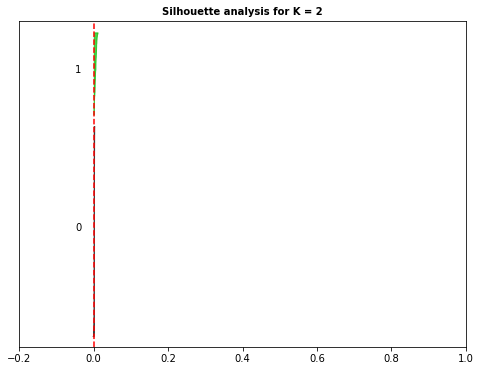

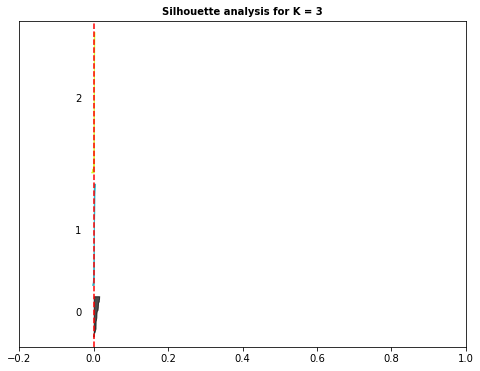

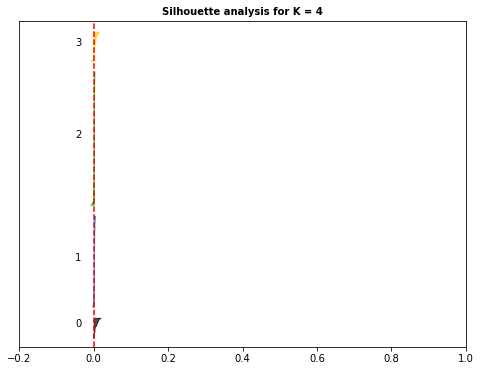

In [18]:
silhouette(kmeans_results, final_df, plot=True)

In [19]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

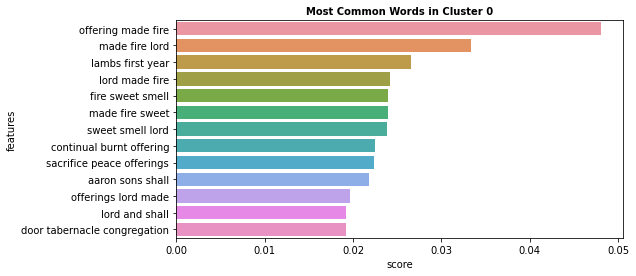

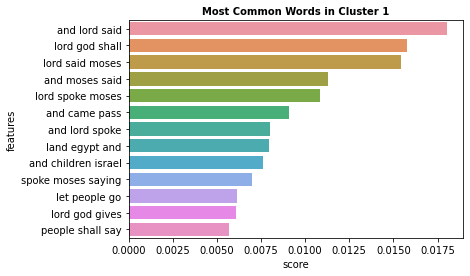

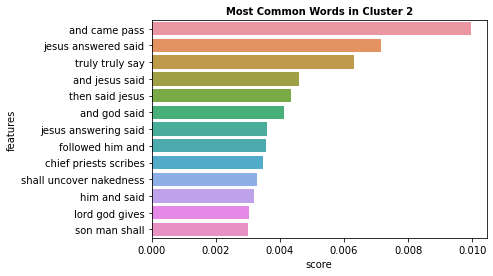

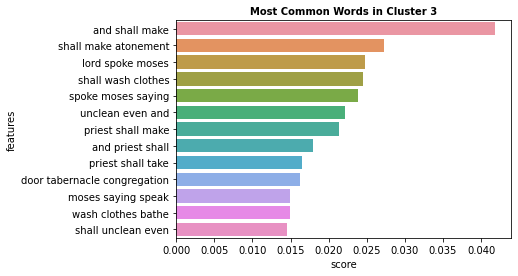

In [20]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [21]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

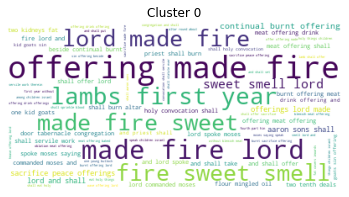

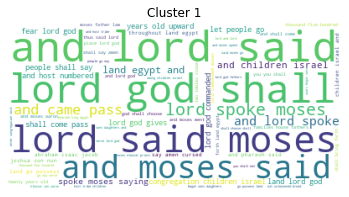

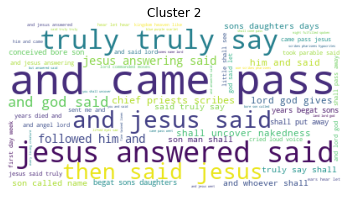

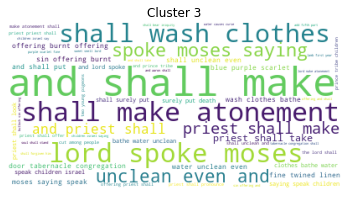

In [22]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [23]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Mateus_1,"'book', 'generation', 'jesus', 'christ', ',', ...",1
101,Mateus_2,"'jesus', 'born', 'bethlehem', 'judaea', 'days'...",2
102,Mateus_3,"'days', 'came', 'john', 'baptist', ',', 'preac...",2
103,Mateus_4,"'jesus', 'led', 'spirit', 'wilderness', 'tempt...",2
104,Mateus_5,"'seeing', 'multitudes', ',', 'went', 'mountain...",2


In [24]:
print(df)

               Autor                                              Livro  label
100         Mateus_1  'book', 'generation', 'jesus', 'christ', ',', ...      1
101         Mateus_2  'jesus', 'born', 'bethlehem', 'judaea', 'days'...      2
102         Mateus_3  'days', 'came', 'john', 'baptist', ',', 'preac...      2
103         Mateus_4  'jesus', 'led', 'spirit', 'wilderness', 'tempt...      2
104         Mateus_5  'seeing', 'multitudes', ',', 'went', 'mountain...      2
..               ...                                                ...    ...
371  Deuteronomio_30  'shall', 'come', 'pass', ',', 'things', 'come'...      1
372  Deuteronomio_31  'moses', 'went', 'spoke', 'words', 'israel.and...      1
373  Deuteronomio_32  'give', 'ear', ',', 'heavens', ',', 'speak', '...      1
374  Deuteronomio_33  'blessing', ',', 'moses', 'man', 'god', 'bless...      2
375  Deuteronomio_34  'moses', 'went', 'plains', 'moab', 'mountain',...      1

[276 rows x 3 columns]
